# Praxisübung: Regularisierung und Hyperparametersuche

*In den folgenden Aufgaben werden Sie mehrere Modelle trainieren, wobei jeder Trainingslauf --- je nach Anzahl der Features und Anzahl der Datenpunkte --- eine gewisse Zeit benötigt. Um die Modellentwicklung zu beschleunigen ist es hilfreich, zunächst eine zufällig ausgewählte Teilmenge des Datensatzes zu betrachten (z.B. 10000 Punkte), die Sie sich mittels `DataFrame.sample(10000)` erzeugen.*

## ✏ Aufgabe 1
Wenden Sie Ridge Regression und Lasso für das Wohnungsbeispiel aus der letzten Woche an. Benutzen Sie dazu die vorverarbeiteten Daten in der Datei `immo_data_preprocessed`, die in ILIAS bereitgestellt sind. Des weiteren finden Sie weiter unten die Methode `print_evaluation`, mit der unterschiedliche Performance-Metriken berechnet und ausgegeben werden.

1. Skalieren Sie die Features mit dem `StandardScaler` aus `scikit-learn`. Das Skalieren sollte nach dem Aufteilen in Trainings- und Testset passieren. Schauen Sie sich dazu die Dokumentation unter https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html an.

[Ridge](#Ridge)


3. Trainieren Sie Modelle mit $\ell_2$- und mit $\ell_1$-Regularisierung (Ridge Regression und Lasso). Schauen Sie in die Dokumentation https://scikit-learn.org/stable/modules/linear_model.html, um die geeigneten Methoden dafür zu finden. Die API Doku für die linearen Modelle finden Sie hier: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model.

[Ridge](#Ridge)

[Lasso](#Lasso)


5. Beide Methoden haben einen Parameter `alpha`. Wie ist der Wert jeweils zu interpretieren (siehe Dokumentation)?

-> Der Wert Alpha ist der vorfaktor im Regulationsterm. Je Höher dieser ist, desto aggresiver ist die "bestrafung" hoher Koeffizienten in der Loss Funktion
    
7. Vergleichen Sie Modelle aus der vorherigen Teilaufgabe ($R^2$ bzw.\ Fehler auf den Trainings- bzw. Testdaten) für verschiedene Werte von `alpha`. Wie können Sie einen möglichst "guten" Wert für den Parameter finden?

   -> zufällige alphas testen

   -> [Grid Search](#GridSearch)
    
9. Beobachten Sie bei der Modellauswertung für die verschiedenen $\ell_2$- bzw. $\ell_1$-regularisierten Modelle zusätzlich die Anzahl der Koeffizienten, die ungleich Null sind. Was beobachten Sie?

    -> je aggresiver reguliert wird, desto höher wird die anzahl der Koeffizienten gleich 0


# Ridge

In [2]:
# Ridge 
from flows.aufgabe1 import train_model_flow


state = await train_model_flow(sample=10000)

state = await train_model_flow(sample=10000, scale=True)

state = await train_model_flow(sample=10000, scale=True, alpha=8)

state = await train_model_flow(sample=10000, alpha=8)

00:50:17.918 | INFO    | prefect.engine - Created flow run 'inventive-jacamar' for flow 'train-model-flow'

00:50:17.919 | INFO    | prefect.engine - View at http://127.0.0.1:3000/runs/flow-run/0cf75bc4-804c-485a-9933-543294c53162

00:50:19.341 | INFO    | Task run 'train_model-ce0' - Finished in state Completed()

00:50:19.470 | INFO    | Task run 'print_evaluation-e97' - Ridge(alpha=0.0) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.75915 |         201.54 |     144.75 |     8000 |      501
Test   -238167709474817547698176.00000 | 203882632568325.59 | 10180996477352.67 |     2000 |      501

00:50:19.525 | INFO    | Task run 'print_evaluation-e97' - Finished in state Completed()

00:50:19.568 | INFO    | Flow run "Ridge-False-0.0-immo_data_preprocessed.csv-['']-baseRent" - Finished in state Completed()

00:50:19.656 | INFO    | prefect.engine - Created flow run 'ivory-coucal' for flow 'train-model-flow'

00:50:19.657 | INFO    | prefect.engine - View at http://127.0.0.1:3000/runs/flow-run/c24ae8fc-e7f4-4c61-b754-68033c775182

00:50:20.777 | INFO    | Task run 'scale_features-b91' - Finished in state Completed()

00:50:21.643 | INFO    | Task run 'train_model-199' - Finished in state Completed()

00:50:21.795 | INFO    | Task run 'print_evaluation-5f7' - Ridge(alpha=0.0) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82140 |         173.55 |     118.48 |     8000 |      501
Test   -58710986928527396474716160.00000 | 3201094410876949.50 | 135254036983147.84 |     2000 |      501

00:50:21.821 | INFO    | Task run 'print_evaluation-5f7' - Finished in state Completed()

00:50:21.864 | INFO    | Flow run "Ridge-True-0.0-immo_data_preprocessed.csv-['']-baseRent" - Finished in state Completed()

00:50:21.941 | INFO    | prefect.engine - Created flow run 'devious-chipmunk' for flow 'train-model-flow'

00:50:21.943 | INFO    | prefect.engine - View at http://127.0.0.1:3000/runs/flow-run/be79190a-1918-4e12-b269-bea7581a7ba9

00:50:23.031 | INFO    | Task run 'scale_features-6e1' - Finished in state Completed()

00:50:23.323 | INFO    | Task run 'train_model-6b3' - Finished in state Completed()

00:50:23.532 | INFO    | Task run 'print_evaluation-d39' - Ridge(alpha=8.0) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85443 |         156.68 |     102.64 |     8000 |      501
Test      0.85158 |         160.95 |     110.19 |     2000 |      501

00:50:23.560 | INFO    | Task run 'print_evaluation-d39' - Finished in state Completed()

00:50:23.602 | INFO    | Flow run "Ridge-True-8.0-immo_data_preprocessed.csv-['']-baseRent" - Finished in state Completed()

# Lasso

In [ ]:
# Lasso 
from flows.aufgabe1 import train_model_flow

state = await train_model_flow(method="Lasso", sample=10000)

state = await train_model_flow(method="Lasso", sample=10000, scale=True)

state = await train_model_flow(method="Lasso", sample=10000, scale=True, alpha=1)

state = await train_model_flow(method="Lasso", sample=10000, alpha=1)

# GridSearch

In [4]:
from flows.aufgabe1 import grid_search

interval = (1,10,20)
results_df = await grid_search(interval=interval, scale=True, sample=10000, method="Ridge")

00:55:07.586 | INFO    | prefect.engine - Created flow run 'daring-bull' for flow 'grid-search'

00:55:07.587 | INFO    | prefect.engine - View at http://127.0.0.1:3000/runs/flow-run/ce156480-5489-4f17-b490-d1be0c04b04a

00:55:07.642 | INFO    | prefect.task_runner.dask - Creating a new Dask cluster with `distributed.deploy.local.LocalCluster`

00:55:07.645 | INFO    | distributed.scheduler - State start

00:55:07.649 | INFO    | distributed.scheduler -   Scheduler at:     tcp://127.0.0.1:38891

00:55:07.651 | INFO    | distributed.scheduler -   dashboard at:  http://127.0.0.1:8787/status

00:55:07.653 | INFO    | distributed.scheduler - Registering Worker plugin shuffle

00:55:07.671 | INFO    | distributed.nanny -         Start Nanny at: 'tcp://127.0.0.1:43433'

00:55:07.674 | INFO    | distributed.nanny -         Start Nanny at: 'tcp://127.0.0.1:40863'

00:55:07.688 | INFO    | distributed.nanny -         Start Nanny at: 'tcp://127.0.0.1:37049'

00:55:07.704 | INFO    | distributed.nanny -         Start Nanny at: 'tcp://127.0.0.1:33411'

00:55:08.469 | INFO    | distributed.scheduler - Register worker <WorkerState 'tcp://127.0.0.1:34637', name: 0, status: init, memory: 0, processing: 0>

00:55:08.472 | INFO    | distributed.scheduler - Starting worker compute stream, tcp://127.0.0.1:34637

00:55:08.474 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50430

00:55:08.476 | INFO    | distributed.scheduler - Register worker <WorkerState 'tcp://127.0.0.1:42033', name: 1, status: init, memory: 0, processing: 0>

00:55:08.479 | INFO    | distributed.scheduler - Starting worker compute stream, tcp://127.0.0.1:42033

00:55:08.481 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50436

00:55:08.516 | INFO    | distributed.scheduler - Register worker <WorkerState 'tcp://127.0.0.1:43473', name: 2, status: init, memory: 0, processing: 0>

00:55:08.518 | INFO    | distributed.scheduler - Starting worker compute stream, tcp://127.0.0.1:43473

00:55:08.520 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50442

00:55:08.539 | INFO    | distributed.scheduler - Register worker <WorkerState 'tcp://127.0.0.1:46637', name: 3, status: init, memory: 0, processing: 0>

00:55:08.541 | INFO    | distributed.scheduler - Starting worker compute stream, tcp://127.0.0.1:46637

00:55:08.542 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50458

00:55:08.548 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-63228994-9bd1-11ef-abca-c30986b8f503

00:55:08.549 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50460

00:55:08.553 | INFO    | prefect.task_runner.dask - The Dask dashboard is available at http://127.0.0.1:8787/status

00:55:08.562 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-63228994-9bd1-11ef-abca-c30986b8f503

00:55:08.563 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50460; closing.

00:55:08.564 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-63228994-9bd1-11ef-abca-c30986b8f503

00:55:08.566 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-63228994-9bd1-11ef-abca-c30986b8f503

00:55:08.568 | INFO    | distributed.scheduler - Retire worker addresses (0, 1, 2, 3)

00:55:08.571 | INFO    | distributed.nanny - Closing Nanny at 'tcp://127.0.0.1:43433'. Reason: nanny-close

00:55:08.572 | INFO    | distributed.nanny - Nanny asking worker to close. Reason: nanny-close

00:55:08.574 | INFO    | distributed.nanny - Closing Nanny at 'tcp://127.0.0.1:40863'. Reason: nanny-close

00:55:08.575 | INFO    | distributed.nanny - Nanny asking worker to close. Reason: nanny-close

00:55:08.577 | INFO    | distributed.nanny - Closing Nanny at 'tcp://127.0.0.1:37049'. Reason: nanny-close

00:55:08.578 | INFO    | distributed.nanny - Nanny asking worker to close. Reason: nanny-close

00:55:08.580 | INFO    | distributed.nanny - Closing Nanny at 'tcp://127.0.0.1:33411'. Reason: nanny-close

00:55:08.582 | INFO    | distributed.nanny - Nanny asking worker to close. Reason: nanny-close

00:55:08.585 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50430; closing.

00:55:08.588 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50436; closing.

00:55:08.591 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50442; closing.

00:55:08.594 | INFO    | distributed.scheduler - Remove worker <WorkerState 'tcp://127.0.0.1:34637', name: 0, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1730850908.5946205')

00:55:08.597 | INFO    | distributed.scheduler - Remove worker <WorkerState 'tcp://127.0.0.1:42033', name: 1, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1730850908.5975232')

00:55:08.600 | INFO    | distributed.scheduler - Remove worker <WorkerState 'tcp://127.0.0.1:43473', name: 2, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1730850908.6002758')

00:55:08.604 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50458; closing.

00:55:08.607 | INFO    | distributed.scheduler - Remove worker <WorkerState 'tcp://127.0.0.1:46637', name: 3, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1730850908.6072018')

00:55:08.609 | INFO    | distributed.scheduler - Lost all workers

00:55:08.814 | INFO    | distributed.scheduler - Closing scheduler. Reason: unknown

00:55:08.816 | INFO    | distributed.scheduler - Scheduler closing all comms

00:55:08.818 | ERROR   | Flow run 'daring-bull' - Finished in state Running()

KeyError: 'alpha'

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# RMSE für Testdaten
plt.subplot(1, 2, 1)
plt.plot(results_df['Alpha'], results_df['RMSE Test'], marker='o', label=results_df['Model'].iloc[0])
plt.xlabel('Alpha')
plt.ylabel('RMSE Test')
plt.title('Test RMSE vs Alpha')
plt.legend()

# R² für Testdaten
plt.subplot(1, 2, 2)
plt.plot(results_df['Alpha'], results_df['R2 Test'], marker='o', label=results_df['Model'].iloc[0])
plt.xlabel('Alpha')
plt.ylabel('R² Test')
plt.title('Test R² vs Alpha')
plt.legend()

plt.tight_layout()
plt.show()

## ✏ Aufgabe 2
Führen Sie eine Hyperparametersuche mit Kreuzvalidierung durch, indem Sie den Algorithmus aus der Vorlesung für das Immoscout Beispiel implementieren.
Sie können sich herantasten, indem Sie zuerst die einfache Hyperparametersuche (ohne Kreuzvalidierung) implementieren und dann Schritt 2 des Algorithmus ersetzen.
Benutzen Sie die KFold Klasse aus scikit-learn um sich die Datensätze für die Kreuzvalidierung zu erzeugen: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html. Nachfolgende finden Sie ein Beispiel, wie die Klasse `KFold` funktioniert.

In [1]:
from flows.aufgabe2 import cross_validation
import matplotlib.pyplot as plt
import pandas as pd


interval=(1,100,20)
average_performance, best_alpha = await cross_validation(interval=interval, scale=True, sample=10000, method="Ridge", n_splits=5)

00:57:23.263 | INFO    | prefect.engine - Created flow run 'pretty-lobster' for flow 'cross-validation'

00:57:23.268 | INFO    | prefect.engine - View at http://127.0.0.1:3000/runs/flow-run/042d77b2-e9ce-4493-822f-e06420bcd3b6

00:57:23.333 | INFO    | prefect.task_runner.dask - Creating a new Dask cluster with `distributed.deploy.local.LocalCluster`

00:57:23.340 | INFO    | distributed.http.proxy - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy

00:57:23.346 | INFO    | distributed.scheduler - State start

00:57:23.352 | INFO    | distributed.scheduler -   Scheduler at:     tcp://127.0.0.1:43043

00:57:23.353 | INFO    | distributed.scheduler -   dashboard at:  http://127.0.0.1:8787/status

00:57:23.354 | INFO    | distributed.scheduler - Registering Worker plugin shuffle

00:57:23.374 | INFO    | distributed.nanny -         Start Nanny at: 'tcp://127.0.0.1:45183'

00:57:23.385 | INFO    | distributed.nanny -         Start Nanny at: 'tcp://127.0.0.1:33633'

00:57:23.401 | INFO    | distributed.nanny -         Start Nanny at: 'tcp://127.0.0.1:42623'

00:57:23.418 | INFO    | distributed.nanny -         Start Nanny at: 'tcp://127.0.0.1:43697'

00:57:24.250 | INFO    | distributed.scheduler - Register worker <WorkerState 'tcp://127.0.0.1:32975', name: 1, status: init, memory: 0, processing: 0>

00:57:24.256 | INFO    | distributed.scheduler - Starting worker compute stream, tcp://127.0.0.1:32975

00:57:24.259 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55960

00:57:24.265 | INFO    | distributed.scheduler - Register worker <WorkerState 'tcp://127.0.0.1:37763', name: 2, status: init, memory: 0, processing: 0>

00:57:24.266 | INFO    | distributed.scheduler - Starting worker compute stream, tcp://127.0.0.1:37763

00:57:24.268 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55962

00:57:24.555 | INFO    | distributed.scheduler - Register worker <WorkerState 'tcp://127.0.0.1:39609', name: 0, status: init, memory: 0, processing: 0>

00:57:24.557 | INFO    | distributed.scheduler - Starting worker compute stream, tcp://127.0.0.1:39609

00:57:24.563 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55964

00:57:24.620 | INFO    | distributed.scheduler - Register worker <WorkerState 'tcp://127.0.0.1:38671', name: 3, status: init, memory: 0, processing: 0>

00:57:24.623 | INFO    | distributed.scheduler - Starting worker compute stream, tcp://127.0.0.1:38671

00:57:24.626 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55970

00:57:24.635 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b43fa100-9bd1-11ef-86bc-c30986b8f503

00:57:24.638 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55978

00:57:24.641 | INFO    | prefect.task_runner.dask - The Dask dashboard is available at http://127.0.0.1:8787/status

00:57:25.733 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Fold 1:

00:57:25.738 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - -------

00:57:25.739 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Indizes der Trainingsdaten: [   1    2    4 ... 9996 9997 9999].

00:57:25.741 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Indizes der Validierungsdaten: [   0    3    8 ... 9989 9993 9998]

00:57:25.991 | INFO    | Task run 'scale_features-c5b' - Finished in state Completed()

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/jan-david/.local/share/virtualenvs/nested_cross_validation

00:57:29.710 | INFO    | distributed.scheduler - Receive client connection: Client-worker-b743306f-9bd1-11ef-8748-c30986b8f503

00:57:29.713 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56046

00:57:29.729 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:29.773 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:29.794 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b74a3a7d-9bd1-11ef-8748-c30986b8f503

00:57:29.796 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56050

00:57:29.816 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b750703e-9bd1-11ef-8748-c30986b8f503

00:57:29.819 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56068

00:57:29.908 | INFO    | distributed.scheduler - Receive client connection: Client-worker-b759b16e-9bd1-11ef-874f-c30986b8f503

00:57:29.911 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56096

00:57:29.919 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:29.928 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:29.985 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b7672f09-9bd1-11ef-874f-c30986b8f503

00:57:29.987 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56108

00:57:29.992 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b767f5ae-9bd1-11ef-874f-c30986b8f503

00:57:29.995 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56112

00:57:30.166 | INFO    | distributed.scheduler - Receive client connection: Client-worker-b789dde2-9bd1-11ef-8751-c30986b8f503

00:57:30.169 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56134

00:57:30.185 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:30.200 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b7903529-9bd1-11ef-8751-c30986b8f503

00:57:30.204 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56142

00:57:30.236 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:30.253 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b7970799-9bd1-11ef-8751-c30986b8f503

00:57:30.260 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56166

00:57:30.378 | INFO    | Task run 'train_model-967' - Finished in state Completed()
00:57:30.439 | INFO    | Task run 'train_model-c34' - Finished in state Completed()
00:57:30.540 | INFO    | Task run 'print_evaluation-8f7' - Ridge(alpha=np.float64(21.842105263157894)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85439 |         156.71 |     102.62 |     8000 |      501
Test      0.85150 |         160.99 |     110.19 |     2000 |      501

00:57:30.609 | INFO    | Task run 'print_evaluation-811' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85444 |         156.68 |     102.66 |     8000 |      501
Test      0.85161 |         160.93 |     110.19 |     2000 |      501

00:57:30.697 | INFO    | Task run 'train_model-6d2' - Finished in state Completed()
00:57:30.736 | INFO    | Task run 'print_evaluation-8f7' - Finished in state Completed()
00:57:30.744 | INFO   

00:57:30.782 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b750703e-9bd1-11ef-8748-c30986b8f503

00:57:30.794 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56068; closing.

00:57:30.802 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b750703e-9bd1-11ef-8748-c30986b8f503

00:57:30.819 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b74a3a7d-9bd1-11ef-8748-c30986b8f503

00:57:30.827 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56050; closing.

00:57:30.836 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b74a3a7d-9bd1-11ef-8748-c30986b8f503

00:57:30.846 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b750703e-9bd1-11ef-8748-c30986b8f503

00:57:30.853 | INFO    | Task run 'print_evaluation-61d' - Ridge(alpha=np.float64(6.2105263157894735)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85443 |         156.68 |     102.64 |     8000 |      501
Test      0.85158 |         160.95 |     110.19 |     2000 |      501



00:57:30.849 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b74a3a7d-9bd1-11ef-8748-c30986b8f503

00:57:30.888 | INFO    | Task run 'train_model-4ad' - Finished in state Completed()
00:57:30.907 | INFO    | Task run 'train_model-a4a' - Finished in state Completed()
00:57:30.909 | INFO    | Task run 'print_evaluation-012' - Ridge(alpha=np.float64(27.052631578947366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85436 |         156.72 |     102.62 |     8000 |      501
Test      0.85146 |         161.01 |     110.20 |     2000 |      501



00:57:30.930 | INFO    | distributed.scheduler - Receive client connection: Client-worker-b7fba2dd-9bd1-11ef-8744-c30986b8f503

00:57:30.937 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56186

00:57:30.953 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:30.977 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b8060164-9bd1-11ef-8744-c30986b8f503

00:57:30.980 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56198

00:57:30.994 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:30.999 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b80abbfc-9bd1-11ef-8744-c30986b8f503

00:57:31.002 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56216

00:57:31.054 | INFO    | Task run 'print_evaluation-61d' - Finished in state Completed()
00:57:31.062 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(6.2105263157894735), 'Model': 'Ridge', 'RMSE Train': np.float64(156.68296166432754), 'RMSE Test': np.float64(160.94532188247027), 'R2 Train': 0.8544312706058282, 'R2 Test': 0.8515845441797901, 'MAE Train': np.float64(102.64332661600854), 'MAE Test': np.float64(110.18599927705178)}
00:57:31.066 | INFO    | Task run 'print_evaluation-175' - Ridge(alpha=np.float64(11.421052631578947)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85442 |         156.69 |     102.63 |     8000 |      501
Test      0.85156 |         160.96 |     110.19 |     2000 |      501

00:57:31.066 | INFO    | Task run 'train_and_evaluate_alpha-5cc' - Finished in state Completed()


00:57:31.075 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b7672f09-9bd1-11ef-874f-c30986b8f503

00:57:31.070 | INFO    | Task run 'print_evaluation-012' - Finished in state Completed()


00:57:31.077 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56108; closing.

00:57:31.082 | INFO    | Task run 'print_evaluation-fcd' - Ridge(alpha=np.float64(32.26315789473684)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85434 |         156.73 |     102.62 |     8000 |      501
Test      0.85142 |         161.03 |     110.20 |     2000 |      501



00:57:31.081 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b7672f09-9bd1-11ef-874f-c30986b8f503

00:57:31.085 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.052631578947366), 'Model': 'Ridge', 'RMSE Train': np.float64(156.71883416040524), 'RMSE Test': np.float64(161.01320555851674), 'R2 Train': 0.8543646071805753, 'R2 Test': 0.8514593201431517, 'MAE Train': np.float64(102.6213931391071), 'MAE Test': np.float64(110.19635826662628)}


00:57:31.090 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b7672f09-9bd1-11ef-874f-c30986b8f503

00:57:31.102 | INFO    | Task run 'train_and_evaluate_alpha-2ac' - Finished in state Completed()


00:57:31.110 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b767f5ae-9bd1-11ef-874f-c30986b8f503

00:57:31.113 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56112; closing.

00:57:31.116 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b767f5ae-9bd1-11ef-874f-c30986b8f503

00:57:31.119 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:31.122 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b767f5ae-9bd1-11ef-874f-c30986b8f503

00:57:31.139 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:31.152 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b81dcd57-9bd1-11ef-8748-c30986b8f503

00:57:31.155 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56234

00:57:31.164 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b820fc89-9bd1-11ef-8748-c30986b8f503

00:57:31.167 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56244

00:57:31.211 | INFO    | Task run 'print_evaluation-fcd' - Finished in state Completed()
00:57:31.219 | INFO    | Task run 'print_evaluation-175' - Finished in state Completed()
00:57:31.233 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(32.26315789473684), 'Model': 'Ridge', 'RMSE Train': np.float64(156.73274504280215), 'RMSE Test': np.float64(161.034223393508), 'R2 Train': 0.8543387518742015, 'R2 Test': 0.8514205381407313, 'MAE Train': np.float64(102.62145890808577), 'MAE Test': np.float64(110.20056867028825)}
00:57:31.237 | INFO    | Task run 'train_and_evaluate_alpha-c9c' - Finished in state Completed()
00:57:31.241 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.421052631578947), 'Model': 'Ridge', 'RMSE Train': np.float64(156.68835267165278), 'RMSE Test': np.float64(160.959300384317), 'R2 Train': 0.8544212532359898, 'R2 Test': 0.85155

00:57:31.247 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b7970799-9bd1-11ef-8751-c30986b8f503

00:57:31.257 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56166; closing.

00:57:31.255 | INFO    | Task run 'train_and_evaluate_alpha-837' - Finished in state Completed()


00:57:31.261 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b7970799-9bd1-11ef-8751-c30986b8f503

00:57:31.268 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b7903529-9bd1-11ef-8751-c30986b8f503

00:57:31.270 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56142; closing.

00:57:31.272 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b7970799-9bd1-11ef-8751-c30986b8f503

00:57:31.274 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b7903529-9bd1-11ef-8751-c30986b8f503

00:57:31.280 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b7903529-9bd1-11ef-8751-c30986b8f503

00:57:31.365 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:31.378 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b843541a-9bd1-11ef-874f-c30986b8f503

00:57:31.387 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56272

00:57:31.392 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:31.413 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b847853a-9bd1-11ef-874f-c30986b8f503

00:57:31.417 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56284

00:57:31.586 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:31.608 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:31.606 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b8650dc9-9bd1-11ef-8751-c30986b8f503

00:57:31.620 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56294

00:57:31.629 | INFO    | Task run 'train_model-443' - Finished in state Completed()


00:57:31.657 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b86898a7-9bd1-11ef-8751-c30986b8f503

00:57:31.660 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:56324

00:57:31.698 | INFO    | Task run 'train_model-7de' - Finished in state Completed()
00:57:31.701 | INFO    | Task run 'train_model-22a' - Finished in state Completed()
00:57:31.788 | INFO    | Task run 'train_model-127' - Finished in state Completed()
00:57:31.795 | INFO    | Task run 'print_evaluation-e92' - Ridge(alpha=np.float64(37.473684210526315)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85431 |         156.75 |     102.62 |     8000 |      501
Test      0.85138 |         161.06 |     110.21 |     2000 |      501

00:57:31.858 | INFO    | Task run 'print_evaluation-159' - Ridge(alpha=np.float64(16.63157894736842)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85441 |         156.70 |     102.63 |     8000 |      501
Test      0.85153 |         160.98 |     110.19 |     2000 |      501

00:57:31.859 | INFO    | Task run 'print_evaluation-f7e' - Ridge(alpha=np.float64(42.684210526315

00:57:32.013 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b80abbfc-9bd1-11ef-8744-c30986b8f503

00:57:32.013 | INFO    | Task run 'train_model-fa0' - Finished in state Completed()


00:57:32.017 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56216; closing.

00:57:32.020 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b80abbfc-9bd1-11ef-8744-c30986b8f503

00:57:32.025 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b80abbfc-9bd1-11ef-8744-c30986b8f503

00:57:32.050 | INFO    | Task run 'print_evaluation-159' - Finished in state Completed()
00:57:32.070 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(16.63157894736842), 'Model': 'Ridge', 'RMSE Train': np.float64(156.696356522841), 'RMSE Test': np.float64(160.97548447955415), 'R2 Train': 0.8544063801408919, 'R2 Test': 0.8515289101915555, 'MAE Train': np.float64(102.62813681097963), 'MAE Test': np.float64(110.19077648038865)}
00:57:32.071 | INFO    | Task run 'print_evaluation-32d' - Finished in state Completed()
00:57:32.081 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.526315789473685), 'Model': 'Ridge', 'RMSE Train': np.float64(156.8411614786795), 'RMSE Test': np.float64(161.17911812054268), 'R2 Train': 0.8541371662352467, 'R2 Test': 0.8511530413878658, 'MAE Train': np.float64(102.64308371670805), 'MAE Test': np.float64(110.24662623004

00:57:32.087 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b8060164-9bd1-11ef-8744-c30986b8f503

00:57:32.092 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56198; closing.

00:57:32.097 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b8060164-9bd1-11ef-8744-c30986b8f503

00:57:32.101 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b820fc89-9bd1-11ef-8748-c30986b8f503

00:57:32.105 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56244; closing.

00:57:32.111 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b820fc89-9bd1-11ef-8748-c30986b8f503

00:57:32.119 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b8060164-9bd1-11ef-8744-c30986b8f503

00:57:32.123 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b820fc89-9bd1-11ef-8748-c30986b8f503

00:57:32.140 | INFO    | Task run 'print_evaluation-c3d' - Ridge(alpha=np.float64(68.73684210526315)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85410 |         156.86 |     102.65 |     8000 |      501
Test      0.85110 |         161.21 |     110.25 |     2000 |      501

00:57:32.146 | INFO    | Task run 'print_evaluation-f7e' - Finished in state Completed()
00:57:32.165 | INFO    | Task run 'train_model-3a1' - Finished in state Completed()
00:57:32.177 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(42.68421052631579), 'Model': 'Ridge', 'RMSE Train': np.float64(156.7647866284162), 'RMSE Test': np.float64(161.07954027007398), 'R2 Train': 0.8542791894078974, 'R2 Test': 0.8513369024465886, 'MAE Train': np.float64(102.62561789057861), 'MAE Test': np.float64(110.21460392946348)}
00:57:32.185 | INFO    | Task run 'train_and_evaluate_alpha-e8a' - Finished in state Com

00:57:32.190 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b81dcd57-9bd1-11ef-8748-c30986b8f503

00:57:32.192 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56234; closing.

00:57:32.194 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b81dcd57-9bd1-11ef-8748-c30986b8f503

00:57:32.199 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b81dcd57-9bd1-11ef-8748-c30986b8f503

00:57:32.213 | INFO    | Task run 'print_evaluation-cdd' - Finished in state Completed()
00:57:32.222 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.89473684210526), 'Model': 'Ridge', 'RMSE Train': np.float64(156.78255645433228), 'RMSE Test': np.float64(161.10350939630612), 'R2 Train': 0.8542461516287783, 'R2 Test': 0.8512926561113666, 'MAE Train': np.float64(102.6291311967256), 'MAE Test': np.float64(110.22233476282997)}
00:57:32.230 | INFO    | Task run 'train_and_evaluate_alpha-a1e' - Finished in state Completed()
00:57:32.242 | INFO    | Task run 'print_evaluation-c3d' - Finished in state Completed()


00:57:32.241 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b843541a-9bd1-11ef-874f-c30986b8f503

00:57:32.246 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56272; closing.

00:57:32.249 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b843541a-9bd1-11ef-874f-c30986b8f503

00:57:32.250 | INFO    | Task run 'train_model-f13' - Finished in state Completed()


00:57:32.256 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b843541a-9bd1-11ef-874f-c30986b8f503

00:57:32.282 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(68.73684210526315), 'Model': 'Ridge', 'RMSE Train': np.float64(156.86209005592087), 'RMSE Test': np.float64(161.20522180551373), 'R2 Train': 0.8540982363366465, 'R2 Test': 0.8511048246114592, 'MAE Train': np.float64(102.64904518317847), 'MAE Test': np.float64(110.2544523592064)}
00:57:32.293 | INFO    | Task run 'train_and_evaluate_alpha-df5' - Finished in state Completed()


00:57:32.301 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b847853a-9bd1-11ef-874f-c30986b8f503

00:57:32.307 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56284; closing.

00:57:32.316 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b847853a-9bd1-11ef-874f-c30986b8f503

00:57:32.320 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b847853a-9bd1-11ef-874f-c30986b8f503

00:57:32.337 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:32.331 | INFO    | Task run 'print_evaluation-4e0' - Ridge(alpha=np.float64(53.10526315789473)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85421 |         156.80 |     102.63 |     8000 |      501
Test      0.85125 |         161.13 |     110.23 |     2000 |      501

00:57:32.347 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:32.408 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:32.417 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b8d7d012-9bd1-11ef-8744-c30986b8f503

00:57:32.424 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48502

00:57:32.431 | INFO    | Task run 'print_evaluation-158' - Ridge(alpha=np.float64(73.94736842105263)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85406 |         156.88 |     102.66 |     8000 |      501
Test      0.85106 |         161.23 |     110.26 |     2000 |      501



00:57:32.449 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b8d93138-9bd1-11ef-8744-c30986b8f503

00:57:32.453 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48520

00:57:32.467 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b8e2b433-9bd1-11ef-8748-c30986b8f503

00:57:32.470 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48540

00:57:32.490 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:32.515 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b8ef05af-9bd1-11ef-874f-c30986b8f503

00:57:32.518 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48564

00:57:32.544 | INFO    | Task run 'print_evaluation-4e0' - Finished in state Completed()
00:57:32.553 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.10526315789473), 'Model': 'Ridge', 'RMSE Train': np.float64(156.80129079599593), 'RMSE Test': np.float64(161.12816919647273), 'R2 Train': 0.8542113165603982, 'R2 Test': 0.8512471279406302, 'MAE Train': np.float64(102.632960708142), 'MAE Test': np.float64(110.23028692390639)}
00:57:32.560 | INFO    | Task run 'train_and_evaluate_alpha-b7f' - Finished in state Completed()


00:57:32.566 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b86898a7-9bd1-11ef-8751-c30986b8f503

00:57:32.573 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56324; closing.

00:57:32.576 | INFO    | Task run 'print_evaluation-158' - Finished in state Completed()


00:57:32.575 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b86898a7-9bd1-11ef-8751-c30986b8f503

00:57:32.583 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b86898a7-9bd1-11ef-8751-c30986b8f503

00:57:32.591 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.94736842105263), 'Model': 'Ridge', 'RMSE Train': np.float64(156.883563523413), 'RMSE Test': np.float64(161.23164140719177), 'R2 Train': 0.8540582874717113, 'R2 Test': 0.8510560163467046, 'MAE Train': np.float64(102.65520412785624), 'MAE Test': np.float64(110.26158908207051)}
00:57:32.594 | INFO    | Task run 'train_and_evaluate_alpha-2ec' - Finished in state Completed()


00:57:32.598 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b8650dc9-9bd1-11ef-8751-c30986b8f503

00:57:32.603 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56294; closing.

00:57:32.608 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b8650dc9-9bd1-11ef-8751-c30986b8f503

00:57:32.611 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b8650dc9-9bd1-11ef-8751-c30986b8f503

00:57:32.653 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:32.660 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b907eb3a-9bd1-11ef-8748-c30986b8f503

00:57:32.662 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48578

00:57:32.667 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:32.689 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-b90a5897-9bd1-11ef-874f-c30986b8f503

00:57:32.693 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48596

00:57:32.978 | INFO    | Task run 'train_model-251' - Finished in state Completed()
00:57:33.059 | INFO    | Task run 'train_model-30a' - Finished in state Completed()
00:57:33.108 | INFO    | Task run 'train_model-2e9' - Finished in state Completed()
00:57:33.114 | INFO    | Task run 'train_model-203' - Finished in state Completed()
00:57:33.115 | INFO    | Task run 'print_evaluation-2fc' - Ridge(alpha=np.float64(84.36842105263158)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85398 |         156.93 |     102.67 |     8000 |      501
Test      0.85096 |         161.29 |     110.28 |     2000 |      501

00:57:33.184 | INFO    | Task run 'train_model-6f1' - Finished in state Completed()
00:57:33.195 | INFO    | Task run 'print_evaluation-7a3' - Ridge(alpha=np.float64(58.315789473684205)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85417 |         156.82 |     102.64 |     8000 |      501


00:57:33.302 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b8e2b433-9bd1-11ef-8748-c30986b8f503

00:57:33.304 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48540; closing.

00:57:33.306 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b8e2b433-9bd1-11ef-8748-c30986b8f503

00:57:33.308 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b8e2b433-9bd1-11ef-8748-c30986b8f503

00:57:33.317 | INFO    | Task run 'print_evaluation-50f' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85385 |         157.00 |     102.69 |     8000 |      501
Test      0.85081 |         161.37 |     110.30 |     2000 |      501

00:57:33.337 | INFO    | Task run 'print_evaluation-6e4' - Ridge(alpha=np.float64(94.78947368421052)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85389 |         156.97 |     102.68 |     8000 |      501
Test      0.85086 |         161.34 |     110.30 |     2000 |      501

00:57:33.385 | INFO    | Task run 'print_evaluation-7a3' - Finished in state Completed()
00:57:33.391 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(58.315789473684205), 'Model': 'Ridge', 'RMSE Train': np.float64(156.82086274317862), 'RMSE Test': np.float64(161.15340519501245), 'R2 Train

00:57:33.395 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b8d7d012-9bd1-11ef-8744-c30986b8f503

00:57:33.397 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48502; closing.

00:57:33.399 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b8d7d012-9bd1-11ef-8744-c30986b8f503

00:57:33.403 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b8d7d012-9bd1-11ef-8744-c30986b8f503

00:57:33.408 | INFO    | Task run 'print_evaluation-2ab' - Finished in state Completed()
00:57:33.417 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.57894736842105), 'Model': 'Ridge', 'RMSE Train': np.float64(156.95055188771073), 'RMSE Test': np.float64(161.3121868881403), 'R2 Train': 0.8539336283472299, 'R2 Test': 0.8509071651501612, 'MAE Train': np.float64(102.67501149647549), 'MAE Test': np.float64(110.28576353855456)}
00:57:33.420 | INFO    | Task run 'train_and_evaluate_alpha-d12' - Finished in state Completed()


00:57:33.424 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b8ef05af-9bd1-11ef-874f-c30986b8f503

00:57:33.425 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48564; closing.

00:57:33.427 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b8ef05af-9bd1-11ef-874f-c30986b8f503

00:57:33.429 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b8ef05af-9bd1-11ef-874f-c30986b8f503

00:57:33.433 | INFO    | Task run 'print_evaluation-6e4' - Finished in state Completed()
00:57:33.442 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(94.78947368421052), 'Model': 'Ridge', 'RMSE Train': np.float64(156.97354431456972), 'RMSE Test': np.float64(161.3392996538618), 'R2 Train': 0.8538908293086562, 'R2 Test': 0.8508570429753997, 'MAE Train': np.float64(102.68171432461389), 'MAE Test': np.float64(110.2951166723574)}
00:57:33.445 | INFO    | Task run 'train_and_evaluate_alpha-d5d' - Finished in state Completed()
00:57:33.448 | INFO    | Task run 'print_evaluation-50f' - Finished in state Completed()


00:57:33.448 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b90a5897-9bd1-11ef-874f-c30986b8f503

00:57:33.450 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48596; closing.

00:57:33.453 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b90a5897-9bd1-11ef-874f-c30986b8f503

00:57:33.456 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b90a5897-9bd1-11ef-874f-c30986b8f503

00:57:33.457 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(156.99678860201715), 'RMSE Test': np.float64(161.3664780504088), 'R2 Train': 0.8538475550737759, 'R2 Test': 0.8508067910175685, 'MAE Train': np.float64(102.68863575226301), 'MAE Test': np.float64(110.3045125692005)}
00:57:33.460 | INFO    | Task run 'train_and_evaluate_alpha-1dd' - Finished in state Completed()


00:57:33.464 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b907eb3a-9bd1-11ef-8748-c30986b8f503

00:57:33.466 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48578; closing.

00:57:33.468 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b907eb3a-9bd1-11ef-8748-c30986b8f503

00:57:33.471 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b907eb3a-9bd1-11ef-8748-c30986b8f503

00:57:33.488 | INFO    | Task run 'print_evaluation-268' - Finished in state Completed()
00:57:33.493 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.1578947368421), 'Model': 'Ridge', 'RMSE Train': np.float64(156.9055073342002), 'RMSE Test': np.float64(161.258311894311), 'R2 Train': 0.8540174579389422, 'R2 Test': 0.8510067364768825, 'MAE Train': np.float64(102.66177273208751), 'MAE Test': np.float64(110.26932731425751)}
00:57:33.495 | INFO    | Task run 'train_and_evaluate_alpha-178' - Finished in state Completed()


00:57:33.498 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b8d93138-9bd1-11ef-8744-c30986b8f503

00:57:33.501 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48520; closing.

00:57:33.503 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b8d93138-9bd1-11ef-8744-c30986b8f503

00:57:33.505 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b8d93138-9bd1-11ef-8744-c30986b8f503

00:57:33.529 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Fold 2:

00:57:33.532 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - -------

00:57:33.536 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Indizes der Trainingsdaten: [   0    1    2 ... 9997 9998 9999].

00:57:33.539 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Indizes der Validierungsdaten: [  26   27   30 ... 9960 9962 9996]

00:57:33.803 | INFO    | Task run 'scale_features-b70' - Finished in state Completed()

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
00:57:34.636 | INFO    | prefect.task_runner.dask - Connecting t

00:57:34.847 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ba366e55-9bd1-11ef-8744-c30986b8f503

00:57:34.851 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48602

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
00:57:35.356 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:35.486 | INFO    | Task run 'train_model-027' - Finished in state Completed()
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph with

00:57:35.546 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-baa44658-9bd1-11ef-874f-c30986b8f503

00:57:35.549 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48634

00:57:35.595 | INFO    | Task run 'print_evaluation-659' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85795 |         154.80 |     102.74 |     8000 |      501
Test      0.83867 |         167.65 |     110.39 |     2000 |      501

00:57:35.646 | INFO    | Task run 'print_evaluation-659' - Finished in state Completed()
00:57:35.654 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(154.79966491317478), 'RMSE Test': np.float64(167.64957400509508), 'R2 Train': 0.8579543583504996, 'R2 Test': 0.8386733563722079, 'MAE Train': np.float64(102.7449320823513), 'MAE Test': np.float64(110.38898607176966)}
00:57:35.656 | INFO    | Task run 'train_and_evaluate_alpha-e4e' - Finished in state Completed()


00:57:35.692 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ba366e55-9bd1-11ef-8744-c30986b8f503

00:57:35.694 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48602; closing.

00:57:35.698 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ba366e55-9bd1-11ef-8744-c30986b8f503

00:57:35.706 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ba366e55-9bd1-11ef-8744-c30986b8f503

00:57:35.731 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


00:57:36.012 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-badd6cbf-9bd1-11ef-8748-c30986b8f503

00:57:36.014 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48656

00:57:36.091 | INFO    | Task run 'train_model-86e' - Finished in state Completed()
00:57:36.149 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:36.204 | INFO    | Task run 'print_evaluation-fcf' - Ridge(alpha=np.float64(6.2105263157894735)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85795 |         154.80 |     102.72 |     8000 |      501
Test      0.83863 |         167.67 |     110.39 |     2000 |      501

00:57:36.269 | INFO    | Task run 'print_evaluation-fcf' - Finished in state Completed()
00:57:36.277 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(6.2105263157894735), 'Model': 'Ridge', 'RMSE Train': np.float64(154.80214169567662), 'RMSE Test': np.float64(167.67461968641638), 'R2 Train': 0.857949812875877, 'R2 Test': 0.8386251506127492, 'MAE Train': np.float64(102.72280352464317), 'MAE Test': np

00:57:36.349 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bb1d5191-9bd1-11ef-8744-c30986b8f503

00:57:36.352 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48684

00:57:36.357 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-baa44658-9bd1-11ef-874f-c30986b8f503

00:57:36.359 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48634; closing.

00:57:36.370 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-baa44658-9bd1-11ef-874f-c30986b8f503

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
00:57:36.440 | INFO    | Task run 'train_model-485' - Finished in state Completed()


00:57:36.501 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-baa44658-9bd1-11ef-874f-c30986b8f503

00:57:36.556 | INFO    | Task run 'print_evaluation-e50' - Ridge(alpha=np.float64(11.421052631578947)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85794 |         154.81 |     102.70 |     8000 |      501
Test      0.83857 |         167.70 |     110.39 |     2000 |      501

00:57:36.570 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:36.628 | INFO    | Task run 'print_evaluation-e50' - Finished in state Completed()
00:57:36.635 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.421052631578947), 'Model': 'Ridge', 'RMSE Train': np.float64(154.8077669543171), 'RMSE Test': np.float64(167.70243715021442), 'R2 Train': 0.8579394889416966, 'R2 Test': 0.8385716015257354, 'MAE Train': np.float64(102.7047785801733), 'MAE Test': np.float64(110.3946699649516)}
00:57:36.638 | INFO    | Task run 'train_and_evaluate_al

00:57:36.702 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bb5d759a-9bd1-11ef-8751-c30986b8f503

00:57:36.704 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48692

00:57:36.705 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-badd6cbf-9bd1-11ef-8748-c30986b8f503

00:57:36.707 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48656; closing.

00:57:36.711 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-badd6cbf-9bd1-11ef-8748-c30986b8f503

00:57:36.733 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-badd6cbf-9bd1-11ef-8748-c30986b8f503

00:57:36.890 | INFO    | Task run 'train_model-1b5' - Finished in state Completed()
00:57:36.902 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:36.948 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:36.990 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bb9020af-9bd1-11ef-874f-c30986b8f503

00:57:36.992 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48722

00:57:36.996 | INFO    | Task run 'print_evaluation-caa' - Ridge(alpha=np.float64(16.63157894736842)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85792 |         154.82 |     102.69 |     8000 |      501
Test      0.83851 |         167.73 |     110.40 |     2000 |      501



00:57:37.013 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bb972366-9bd1-11ef-8748-c30986b8f503

00:57:37.015 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48742

00:57:37.071 | INFO    | Task run 'print_evaluation-caa' - Finished in state Completed()
00:57:37.092 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(16.63157894736842), 'Model': 'Ridge', 'RMSE Train': np.float64(154.81607250597472), 'RMSE Test': np.float64(167.7325099008893), 'R2 Train': 0.8579242452289639, 'R2 Test': 0.8385137009808201, 'MAE Train': np.float64(102.69085700448788), 'MAE Test': np.float64(110.39854122891451)}
00:57:37.104 | INFO    | Task run 'train_and_evaluate_alpha-d5b' - Finished in state Completed()


00:57:37.115 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bb1d5191-9bd1-11ef-8744-c30986b8f503

00:57:37.118 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48684; closing.

00:57:37.125 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bb1d5191-9bd1-11ef-8744-c30986b8f503

00:57:37.133 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bb1d5191-9bd1-11ef-8744-c30986b8f503

00:57:37.141 | INFO    | Task run 'train_model-44a' - Finished in state Completed()
00:57:37.207 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:37.213 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:37.232 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bbbec020-9bd1-11ef-874f-c30986b8f503

00:57:37.236 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48758

00:57:37.261 | INFO    | Task run 'print_evaluation-206' - Ridge(alpha=np.float64(21.842105263157894)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85790 |         154.83 |     102.68 |     8000 |      501
Test      0.83845 |         167.76 |     110.41 |     2000 |      501



00:57:37.279 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bbbf8b9b-9bd1-11ef-8744-c30986b8f503

00:57:37.283 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48772

00:57:37.323 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:37.355 | INFO    | Task run 'print_evaluation-206' - Finished in state Completed()
00:57:37.379 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.842105263157894), 'Model': 'Ridge', 'RMSE Train': np.float64(154.8266686566662), 'RMSE Test': np.float64(167.7644168324141), 'R2 Train': 0.8579047962453783, 'R2 Test': 0.8384522576463289, 'MAE Train': np.float64(102.68003609738932), 'MAE Test': np.float64(110.40650487667776)}
00:57:37.388 | INFO    | Task run 'train_and_evaluate_alpha-4c6' - Finished in state Completed()


00:57:37.391 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bbd0671d-9bd1-11ef-8748-c30986b8f503

00:57:37.395 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48786

00:57:37.418 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:37.432 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bb5d759a-9bd1-11ef-8751-c30986b8f503

00:57:37.434 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48692; closing.

00:57:37.439 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bb5d759a-9bd1-11ef-8751-c30986b8f503

00:57:37.452 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bb5d759a-9bd1-11ef-8751-c30986b8f503

00:57:37.494 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bbdf0e9e-9bd1-11ef-8744-c30986b8f503

00:57:37.500 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48798

00:57:37.559 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:37.563 | INFO    | Task run 'train_model-8e8' - Finished in state Completed()
00:57:37.589 | INFO    | Task run 'train_model-53f' - Finished in state Completed()


00:57:37.590 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bbf47f92-9bd1-11ef-8751-c30986b8f503

00:57:37.594 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48822

00:57:37.732 | INFO    | Task run 'print_evaluation-04a' - Ridge(alpha=np.float64(27.052631578947366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85788 |         154.84 |     102.67 |     8000 |      501
Test      0.83839 |         167.80 |     110.42 |     2000 |      501

00:57:37.779 | INFO    | Task run 'print_evaluation-a3c' - Ridge(alpha=np.float64(32.26315789473684)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85786 |         154.85 |     102.67 |     8000 |      501
Test      0.83832 |         167.83 |     110.43 |     2000 |      501

00:57:37.805 | INFO    | Task run 'train_model-211' - Finished in state Completed()
00:57:37.863 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:37.900 | INFO    | Task run 'train_model-5dc' - Finished in state Completed()


00:57:37.915 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bc2300ed-9bd1-11ef-8751-c30986b8f503

00:57:37.918 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48848

00:57:37.949 | INFO    | Task run 'print_evaluation-04a' - Finished in state Completed()
00:57:37.964 | INFO    | Task run 'print_evaluation-c88' - Ridge(alpha=np.float64(42.68421052631579)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85780 |         154.89 |     102.66 |     8000 |      501
Test      0.83818 |         167.90 |     110.46 |     2000 |      501

00:57:37.968 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.052631578947366), 'Model': 'Ridge', 'RMSE Train': np.float64(154.83922839929215), 'RMSE Test': np.float64(167.7978119115017), 'R2 Train': 0.8578817414113398, 'R2 Test': 0.8383879360614916, 'MAE Train': np.float64(102.67173064899826), 'MAE Test': np.float64(110.4177340495843)}
00:57:37.975 | INFO    | Task run 'train_and_evaluate_alpha-a22' - Finished in state Completed()


00:57:37.991 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bb9020af-9bd1-11ef-874f-c30986b8f503

00:57:37.994 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48722; closing.

00:57:38.008 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bb9020af-9bd1-11ef-874f-c30986b8f503

00:57:38.028 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bb9020af-9bd1-11ef-874f-c30986b8f503

00:57:38.054 | INFO    | Task run 'print_evaluation-123' - Ridge(alpha=np.float64(37.473684210526315)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85783 |         154.87 |     102.66 |     8000 |      501
Test      0.83825 |         167.87 |     110.44 |     2000 |      501

00:57:38.075 | INFO    | Task run 'train_model-7af' - Finished in state Completed()
00:57:38.117 | INFO    | Task run 'train_model-4e2' - Finished in state Completed()
00:57:38.118 | INFO    | Task run 'print_evaluation-a3c' - Finished in state Completed()
00:57:38.128 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(32.26315789473684), 'Model': 'Ridge', 'RMSE Train': np.float64(154.85347542680663), 'RMSE Test': np.float64(167.83240891578353), 'R2 Train': 0.8578555871103615, 'R2 Test': 0.8383212859709055, 'MAE Train': np.float64(102.66553031206524), 'MAE Test': np.float64(110.42988382979851)}
00

00:57:38.150 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bb972366-9bd1-11ef-8748-c30986b8f503

00:57:38.153 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48742; closing.

00:57:38.160 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bb972366-9bd1-11ef-8748-c30986b8f503

00:57:38.167 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bb972366-9bd1-11ef-8748-c30986b8f503

00:57:38.194 | INFO    | Task run 'print_evaluation-c88' - Finished in state Completed()
00:57:38.203 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:38.204 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(42.68421052631579), 'Model': 'Ridge', 'RMSE Train': np.float64(154.88612614296585), 'RMSE Test': np.float64(167.9042956163701), 'R2 Train': 0.8577956387475141, 'R2 Test': 0.8381827544620994, 'MAE Train': np.float64(102.6612920573281), 'MAE Test': np.float64(110.45722211408483)}
00:57:38.207 | INFO    | Task run 'train_and_evaluate_alpha-50d' - Finished in state Completed()
00:57:38.208 | INFO    | Task run 'train_model-189' - Finished in state Completed()
00:57:38.223 | INFO    | Task run 'print_evaluation-123' - Finished in state Completed()
00:57:38.224 | INFO    | Task run 'print_evaluation-831' - Ridge(alpha=np.float64(47.89473684210526)) Evaluation

00:57:38.229 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bbbec020-9bd1-11ef-874f-c30986b8f503

00:57:38.231 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48758; closing.

00:57:38.238 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bbbec020-9bd1-11ef-874f-c30986b8f503

00:57:38.238 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.473684210526315), 'Model': 'Ridge', 'RMSE Train': np.float64(154.8691748865776), 'RMSE Test': np.float64(167.8679697869157), 'R2 Train': 0.857826763687342, 'R2 Test': 0.8382527646995248, 'MAE Train': np.float64(102.66257606658691), 'MAE Test': np.float64(110.44336134794689)}
00:57:38.240 | INFO    | Task run 'train_and_evaluate_alpha-b5f' - Finished in state Completed()
00:57:38.251 | INFO    | Task run 'print_evaluation-cf1' - Ridge(alpha=np.float64(53.10526315789473)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85773 |         154.92 |     102.66 |     8000 |      501
Test      0.83804 |         167.98 |     110.48 |     2000 |      501



00:57:38.263 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bbbec020-9bd1-11ef-874f-c30986b8f503

00:57:38.265 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bbbf8b9b-9bd1-11ef-8744-c30986b8f503

00:57:38.268 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48772; closing.

00:57:38.272 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bbbf8b9b-9bd1-11ef-8744-c30986b8f503

00:57:38.284 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bbbf8b9b-9bd1-11ef-8744-c30986b8f503

00:57:38.287 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bc56c291-9bd1-11ef-874f-c30986b8f503

00:57:38.292 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48866

00:57:38.330 | INFO    | Task run 'print_evaluation-421' - Ridge(alpha=np.float64(58.315789473684205)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85769 |         154.94 |     102.66 |     8000 |      501
Test      0.83797 |         168.02 |     110.50 |     2000 |      501

00:57:38.341 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:38.375 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bc6bbb6a-9bd1-11ef-8748-c30986b8f503

00:57:38.380 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48894

00:57:38.416 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:38.419 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:38.422 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bc774756-9bd1-11ef-8744-c30986b8f503

00:57:38.424 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48912

00:57:38.441 | INFO    | Task run 'print_evaluation-cf1' - Finished in state Completed()
00:57:38.449 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.10526315789473), 'Model': 'Ridge', 'RMSE Train': np.float64(154.9231192831119), 'RMSE Test': np.float64(167.97860134149303), 'R2 Train': 0.8577277022031932, 'R2 Test': 0.8380394989448956, 'MAE Train': np.float64(102.66290344085937), 'MAE Test': np.float64(110.48473051855852)}
00:57:38.453 | INFO    | Task run 'train_and_evaluate_alpha-24f' - Finished in state Completed()


00:57:38.460 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bbdf0e9e-9bd1-11ef-8744-c30986b8f503

00:57:38.462 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48798; closing.

00:57:38.465 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bbdf0e9e-9bd1-11ef-8744-c30986b8f503

00:57:38.468 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bc77b818-9bd1-11ef-874f-c30986b8f503

00:57:38.470 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48930

00:57:38.474 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bbdf0e9e-9bd1-11ef-8744-c30986b8f503

00:57:38.497 | INFO    | Task run 'train_model-832' - Finished in state Completed()
00:57:38.503 | INFO    | Task run 'print_evaluation-831' - Finished in state Completed()
00:57:38.511 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.89473684210526), 'Model': 'Ridge', 'RMSE Train': np.float64(154.90415703739777), 'RMSE Test': np.float64(167.94121958059688), 'R2 Train': 0.8577625276983049, 'R2 Test': 0.8381115759238758, 'MAE Train': np.float64(102.66171795089558), 'MAE Test': np.float64(110.47079904960546)}
00:57:38.514 | INFO    | Task run 'train_and_evaluate_alpha-ac4' - Finished in state Completed()


00:57:38.517 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bbd0671d-9bd1-11ef-8748-c30986b8f503

00:57:38.520 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48786; closing.

00:57:38.522 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bbd0671d-9bd1-11ef-8748-c30986b8f503

00:57:38.525 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bbd0671d-9bd1-11ef-8748-c30986b8f503

00:57:38.530 | INFO    | Task run 'print_evaluation-421' - Finished in state Completed()
00:57:38.541 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(58.315789473684205), 'Model': 'Ridge', 'RMSE Train': np.float64(154.94288473219027), 'RMSE Test': np.float64(168.0163225634811), 'R2 Train': 0.8576913970312351, 'R2 Test': 0.8379667511791511, 'MAE Train': np.float64(102.66483867369976), 'MAE Test': np.float64(110.49759950293544)}
00:57:38.544 | INFO    | Task run 'train_and_evaluate_alpha-04f' - Finished in state Completed()


00:57:38.552 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bbf47f92-9bd1-11ef-8751-c30986b8f503

00:57:38.560 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48822; closing.

00:57:38.564 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bbf47f92-9bd1-11ef-8751-c30986b8f503

00:57:38.568 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bbf47f92-9bd1-11ef-8751-c30986b8f503

00:57:38.658 | INFO    | Task run 'print_evaluation-5e5' - Ridge(alpha=np.float64(68.73684210526315)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85762 |         154.98 |     102.67 |     8000 |      501
Test      0.83782 |         168.09 |     110.53 |     2000 |      501

00:57:38.670 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:38.680 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bc9dfc4a-9bd1-11ef-8744-c30986b8f503

00:57:38.684 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48954

00:57:38.726 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:38.738 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bca698b7-9bd1-11ef-8748-c30986b8f503

00:57:38.742 | INFO    | Task run 'print_evaluation-5e5' - Finished in state Completed()


00:57:38.744 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48984

00:57:38.757 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(68.73684210526315), 'Model': 'Ridge', 'RMSE Train': np.float64(154.98439555687335), 'RMSE Test': np.float64(168.0923990049524), 'R2 Train': 0.8576151348808417, 'R2 Test': 0.8378199832515378, 'MAE Train': np.float64(102.67202399848262), 'MAE Test': np.float64(110.52552006584526)}
00:57:38.765 | INFO    | Task run 'train_and_evaluate_alpha-d12' - Finished in state Completed()
00:57:38.769 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:38.776 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bc2300ed-9bd1-11ef-8751-c30986b8f503

00:57:38.783 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48848; closing.

00:57:38.789 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bc2300ed-9bd1-11ef-8751-c30986b8f503

00:57:38.801 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bc2300ed-9bd1-11ef-8751-c30986b8f503

00:57:38.801 | INFO    | Task run 'train_model-e68' - Finished in state Completed()


00:57:38.808 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bcadf21a-9bd1-11ef-8751-c30986b8f503

00:57:38.810 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:49004

00:57:38.910 | INFO    | Task run 'train_model-c98' - Finished in state Completed()
00:57:38.920 | INFO    | Task run 'print_evaluation-3c4' - Ridge(alpha=np.float64(79.1578947368421)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85754 |         155.03 |     102.68 |     8000 |      501
Test      0.83767 |         168.17 |     110.55 |     2000 |      501

00:57:38.954 | INFO    | Task run 'train_model-c94' - Finished in state Completed()
00:57:38.978 | INFO    | Task run 'train_model-86d' - Finished in state Completed()
00:57:39.027 | INFO    | Task run 'print_evaluation-3cf' - Ridge(alpha=np.float64(84.36842105263158)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85749 |         155.05 |     102.69 |     8000 |      501
Test      0.83760 |         168.21 |     110.57 |     2000 |      501

00:57:39.050 | INFO    | Task run 'print_evaluation-3c4' - Finished in state Completed()
00:57:39.0

00:57:39.065 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bc56c291-9bd1-11ef-874f-c30986b8f503

00:57:39.068 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48866; closing.

00:57:39.073 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bc56c291-9bd1-11ef-874f-c30986b8f503

00:57:39.078 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bc56c291-9bd1-11ef-874f-c30986b8f503

00:57:39.081 | INFO    | Task run 'print_evaluation-629' - Ridge(alpha=np.float64(73.94736842105263)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85758 |         155.01 |     102.68 |     8000 |      501
Test      0.83775 |         168.13 |     110.54 |     2000 |      501

00:57:39.098 | INFO    | Task run 'print_evaluation-83c' - Ridge(alpha=np.float64(89.57894736842105)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85745 |         155.07 |     102.69 |     8000 |      501
Test      0.83753 |         168.25 |     110.58 |     2000 |      501

00:57:39.124 | INFO    | Task run 'print_evaluation-3cf' - Finished in state Completed()
00:57:39.133 | INFO    | Task run 'train_model-ee2' - Finished in state Completed()
00:57:39.134 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(84.36842105263158), 'Model': 'Ridge', 'RMSE

00:57:39.144 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bc6bbb6a-9bd1-11ef-8748-c30986b8f503

00:57:39.146 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48894; closing.

00:57:39.148 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bc6bbb6a-9bd1-11ef-8748-c30986b8f503

00:57:39.150 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bc6bbb6a-9bd1-11ef-8748-c30986b8f503

00:57:39.189 | INFO    | Task run 'train_model-1ec' - Finished in state Completed()
00:57:39.196 | INFO    | Task run 'print_evaluation-629' - Finished in state Completed()
00:57:39.201 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.94736842105263), 'Model': 'Ridge', 'RMSE Train': np.float64(155.00596041665642), 'RMSE Test': np.float64(168.13059819240635), 'R2 Train': 0.8575755086557739, 'R2 Test': 0.837746263692241, 'MAE Train': np.float64(102.67680318860648), 'MAE Test': np.float64(110.53901167372703)}
00:57:39.203 | INFO    | Task run 'train_and_evaluate_alpha-103' - Finished in state Completed()


00:57:39.206 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bc774756-9bd1-11ef-8744-c30986b8f503

00:57:39.208 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48912; closing.

00:57:39.209 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bc774756-9bd1-11ef-8744-c30986b8f503

00:57:39.212 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bc774756-9bd1-11ef-8744-c30986b8f503

00:57:39.233 | INFO    | Task run 'train_model-007' - Finished in state Completed()
00:57:39.238 | INFO    | Task run 'print_evaluation-83c' - Finished in state Completed()
00:57:39.243 | INFO    | Task run 'print_evaluation-b0c' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85737 |         155.12 |     102.71 |     8000 |      501
Test      0.83738 |         168.32 |     110.61 |     2000 |      501

00:57:39.245 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.57894736842105), 'Model': 'Ridge', 'RMSE Train': np.float64(155.07303684465708), 'RMSE Test': np.float64(168.24513705860863), 'R2 Train': 0.857452218001138, 'R2 Test': 0.8375251178748206, 'MAE Train': np.float64(102.69420473795611), 'MAE Test': np.float64(110.57952411042506)}
00:57:39.247 | INFO    | Task run 'train_and_evaluate_alpha-f68' - Finished in state Completed()


00:57:39.250 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bc77b818-9bd1-11ef-874f-c30986b8f503

00:57:39.252 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48930; closing.

00:57:39.254 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bc77b818-9bd1-11ef-874f-c30986b8f503

00:57:39.256 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bc77b818-9bd1-11ef-874f-c30986b8f503

00:57:39.297 | INFO    | Task run 'print_evaluation-635' - Ridge(alpha=np.float64(94.78947368421052)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85741 |         155.10 |     102.70 |     8000 |      501
Test      0.83745 |         168.28 |     110.59 |     2000 |      501

00:57:39.341 | INFO    | Task run 'print_evaluation-bfc' - Ridge(alpha=np.float64(63.526315789473685)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85765 |         154.96 |     102.67 |     8000 |      501
Test      0.83789 |         168.05 |     110.51 |     2000 |      501

00:57:39.349 | INFO    | Task run 'print_evaluation-b0c' - Finished in state Completed()
00:57:39.354 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(155.11919293705427), 'RMSE Test': np.float64(168.32102886436465), 'R2 Train

00:57:39.359 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bc9dfc4a-9bd1-11ef-8744-c30986b8f503

00:57:39.360 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48954; closing.

00:57:39.362 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bc9dfc4a-9bd1-11ef-8744-c30986b8f503

00:57:39.364 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bc9dfc4a-9bd1-11ef-8744-c30986b8f503

00:57:39.386 | INFO    | Task run 'print_evaluation-635' - Finished in state Completed()
00:57:39.392 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(94.78947368421052), 'Model': 'Ridge', 'RMSE Train': np.float64(155.09600179719908), 'RMSE Test': np.float64(168.2831520654924), 'R2 Train': 0.8574099947299479, 'R2 Test': 0.8374516871456001, 'MAE Train': np.float64(102.70086198134749), 'MAE Test': np.float64(110.593349388735)}
00:57:39.394 | INFO    | Task run 'train_and_evaluate_alpha-d93' - Finished in state Completed()


00:57:39.396 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bca698b7-9bd1-11ef-8748-c30986b8f503

00:57:39.398 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48984; closing.

00:57:39.400 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bca698b7-9bd1-11ef-8748-c30986b8f503

00:57:39.402 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bca698b7-9bd1-11ef-8748-c30986b8f503

00:57:39.417 | INFO    | Task run 'print_evaluation-bfc' - Finished in state Completed()
00:57:39.423 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.526315789473685), 'Model': 'Ridge', 'RMSE Train': np.float64(154.9633423219718), 'RMSE Test': np.float64(168.0542832921156), 'R2 Train': 0.8576538156576814, 'R2 Test': 0.8378935250193889, 'MAE Train': np.float64(102.66795382544456), 'MAE Test': np.float64(110.51157790001912)}
00:57:39.424 | INFO    | Task run 'train_and_evaluate_alpha-33d' - Finished in state Completed()


00:57:39.427 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bcadf21a-9bd1-11ef-8751-c30986b8f503

00:57:39.428 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:49004; closing.

00:57:39.430 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bcadf21a-9bd1-11ef-8751-c30986b8f503

00:57:39.432 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bcadf21a-9bd1-11ef-8751-c30986b8f503

00:57:39.461 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Fold 3:

00:57:39.464 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - -------

00:57:39.466 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Indizes der Trainingsdaten: [   0    1    3 ... 9997 9998 9999].

00:57:39.468 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Indizes der Validierungsdaten: [   2   15   28 ... 9980 9985 9995]

00:57:39.674 | INFO    | Task run 'scale_features-12f' - Finished in state Completed()

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
00:57:40.033 | INFO    | prefect.task_runner.dask - Connecting t

00:57:40.089 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bd6df292-9bd1-11ef-8744-c30986b8f503

00:57:40.091 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:49014

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
00:57:40.456 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:40.481 | INFO    | Task run 'train_model-67b' - Finished in state Completed()
00:57:40.587 | INFO    | Task run 'print_evaluation-744' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85989 |         156.05 |     102.79 |     8000 |      501
Test      0.82643 |         163.42 |     109.53 |     2000 |      501

00:57:40.631 | INFO  

00:57:40.672 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bdae67f1-9bd1-11ef-874f-c30986b8f503

00:57:40.691 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:49044

00:57:40.696 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bd6df292-9bd1-11ef-8744-c30986b8f503

00:57:40.697 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:49014; closing.

00:57:40.703 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bd6df292-9bd1-11ef-8744-c30986b8f503

00:57:40.709 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bd6df292-9bd1-11ef-8744-c30986b8f503

00:57:40.770 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:40.896 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bdde66d2-9bd1-11ef-8748-c30986b8f503

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


00:57:40.934 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:49056

00:57:41.086 | INFO    | Task run 'train_model-483' - Finished in state Completed()
00:57:41.205 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:41.206 | INFO    | Task run 'print_evaluation-9b8' - Ridge(alpha=np.float64(6.2105263157894735)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85988 |         156.06 |     102.77 |     8000 |      501
Test      0.82670 |         163.29 |     109.42 |     2000 |      501

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
00:57:

00:57:41.349 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bdae67f1-9bd1-11ef-874f-c30986b8f503

00:57:41.387 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:49044; closing.

00:57:41.390 | INFO    | Task run 'train_model-3bd' - Finished in state Completed()


00:57:41.396 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bdae67f1-9bd1-11ef-874f-c30986b8f503

00:57:41.399 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-be20ca92-9bd1-11ef-8744-c30986b8f503

00:57:41.402 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:49072

00:57:41.409 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bdae67f1-9bd1-11ef-874f-c30986b8f503

00:57:41.466 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-be38d121-9bd1-11ef-8751-c30986b8f503

00:57:41.499 | INFO    | Task run 'print_evaluation-710' - Ridge(alpha=np.float64(11.421052631578947)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85987 |         156.07 |     102.76 |     8000 |      501
Test      0.82695 |         163.18 |     109.32 |     2000 |      501



00:57:41.499 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:49088

00:57:41.549 | INFO    | Task run 'print_evaluation-710' - Finished in state Completed()
00:57:41.555 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.421052631578947), 'Model': 'Ridge', 'RMSE Train': np.float64(156.06560516585938), 'RMSE Test': np.float64(163.17505385176418), 'R2 Train': 0.859868237665914, 'R2 Test': 0.8269472932663778, 'MAE Train': np.float64(102.75647935239132), 'MAE Test': np.float64(109.3192494120654)}
00:57:41.558 | INFO    | Task run 'train_and_evaluate_alpha-6bc' - Finished in state Completed()


00:57:41.618 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bdde66d2-9bd1-11ef-8748-c30986b8f503

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


00:57:41.647 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:49056; closing.

00:57:41.676 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bdde66d2-9bd1-11ef-8748-c30986b8f503

00:57:41.705 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bdde66d2-9bd1-11ef-8748-c30986b8f503

00:57:41.889 | INFO    | Task run 'train_model-da5' - Finished in state Completed()
00:57:42.017 | INFO    | Task run 'train_model-58e' - Finished in state Completed()
00:57:42.020 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:42.020 | INFO    | Task run 'print_evaluation-d2e' - Ridge(alpha=np.float64(16.63157894736842)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85985 |         156.08 |     102.75 |     8000 |      501
Test      0.82718 |         163.07 |     109.23 |     2000 |      501

00:57:42.091 | INFO    | Task run 'print_evaluation-d2e' - Finished in state Completed()
00:57:42.100 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(16.63157894736842), 'Model': 'Ridge', 'RMSE Train': np.float64(156.07671834146785), 'RMSE Test': np.float64(163.06653227271093), 'R2 Train': 0.8598482798497354, 'R2 Tes

00:57:42.180 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-be20ca92-9bd1-11ef-8744-c30986b8f503

00:57:42.200 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.842105263157894), 'Model': 'Ridge', 'RMSE Train': np.float64(156.09089201606602), 'RMSE Test': np.float64(162.96627524712395), 'R2 Train': 0.8598228237138743, 'R2 Test': 0.8273898436224609, 'MAE Train': np.float64(102.74232417007065), 'MAE Test': np.float64(109.14345336967878)}
00:57:42.202 | INFO    | Task run 'train_and_evaluate_alpha-be6' - Finished in state Completed()


00:57:42.210 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:49072; closing.

00:57:42.217 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-be20ca92-9bd1-11ef-8744-c30986b8f503

00:57:42.222 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-be38d121-9bd1-11ef-8751-c30986b8f503

00:57:42.225 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:49088; closing.

00:57:42.231 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-be38d121-9bd1-11ef-8751-c30986b8f503

00:57:42.234 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-be9d0936-9bd1-11ef-874f-c30986b8f503

00:57:42.236 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48084

00:57:42.239 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-be20ca92-9bd1-11ef-8744-c30986b8f503

00:57:42.317 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-be38d121-9bd1-11ef-8751-c30986b8f503

00:57:42.352 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


00:57:42.479 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-becfb39d-9bd1-11ef-8748-c30986b8f503

00:57:42.481 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48104

00:57:42.716 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:42.770 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bf07851d-9bd1-11ef-8744-c30986b8f503

00:57:42.775 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48118

00:57:42.778 | INFO    | Task run 'train_model-005' - Finished in state Completed()
00:57:42.799 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:42.846 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bf14021d-9bd1-11ef-8751-c30986b8f503

00:57:42.848 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48134

00:57:42.866 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:42.916 | INFO    | Task run 'print_evaluation-d1d' - Ridge(alpha=np.float64(27.052631578947366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85979 |         156.11 |     102.74 |     8000 |      501
Test      0.82759 |         162.87 |     109.07 |     2000 |      501



00:57:42.937 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bf1e7faa-9bd1-11ef-8744-c30986b8f503

00:57:42.942 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48152

00:57:42.999 | INFO    | Task run 'train_model-579' - Finished in state Completed()
00:57:43.043 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:43.072 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:43.113 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bf396563-9bd1-11ef-874f-c30986b8f503

00:57:43.116 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48180

00:57:43.125 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bf3d8ff1-9bd1-11ef-8748-c30986b8f503

00:57:43.130 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48200

00:57:43.183 | INFO    | Task run 'print_evaluation-e05' - Ridge(alpha=np.float64(32.26315789473684)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85976 |         156.13 |     102.74 |     8000 |      501
Test      0.82777 |         162.79 |     109.00 |     2000 |      501

00:57:43.190 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:43.203 | INFO    | Task run 'print_evaluation-d1d' - Finished in state Completed()
00:57:43.235 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.052631578947366), 'Model': 'Ridge', 'RMSE Train': np.float64(156.1076829431091), 'RMSE Test': np.float64(162.87342166327693), 'R2 Train': 0.8597926639613677, 'R2 Test': 0.8275864843765467, 'MAE Train': np.float64(102.7392690495443), 'MAE Test': np.float64(109.06958380200821)}
00:57:43.245 | INFO    | Task run 'train_and_evaluate_al

00:57:43.245 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bf4fa359-9bd1-11ef-8751-c30986b8f503

00:57:43.249 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48220

00:57:43.264 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-be9d0936-9bd1-11ef-874f-c30986b8f503

00:57:43.266 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48084; closing.

00:57:43.272 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-be9d0936-9bd1-11ef-874f-c30986b8f503

00:57:43.288 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-be9d0936-9bd1-11ef-874f-c30986b8f503

00:57:43.345 | INFO    | Task run 'train_model-42a' - Finished in state Completed()
00:57:43.365 | INFO    | Task run 'print_evaluation-e05' - Finished in state Completed()
00:57:43.378 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(32.26315789473684), 'Model': 'Ridge', 'RMSE Train': np.float64(156.12671518548495), 'RMSE Test': np.float64(162.78722418403953), 'R2 Train': 0.859758474450411, 'R2 Test': 0.8277689288500207, 'MAE Train': np.float64(102.739601397662), 'MAE Test': np.float64(109.0015953682306)}
00:57:43.394 | INFO    | Task run 'train_and_evaluate_alpha-cab' - Finished in state Completed()


00:57:43.417 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-becfb39d-9bd1-11ef-8748-c30986b8f503

00:57:43.423 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48104; closing.

00:57:43.444 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-becfb39d-9bd1-11ef-8748-c30986b8f503

00:57:43.456 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-becfb39d-9bd1-11ef-8748-c30986b8f503

00:57:43.520 | INFO    | Task run 'train_model-c09' - Finished in state Completed()
00:57:43.521 | INFO    | Task run 'print_evaluation-20b' - Ridge(alpha=np.float64(37.473684210526315)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85972 |         156.15 |     102.74 |     8000 |      501
Test      0.82794 |         162.71 |     108.94 |     2000 |      501

00:57:43.550 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:43.624 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bf86a37a-9bd1-11ef-874f-c30986b8f503

00:57:43.628 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48240

00:57:43.641 | INFO    | Task run 'train_model-efe' - Finished in state Completed()
00:57:43.683 | INFO    | Task run 'print_evaluation-150' - Ridge(alpha=np.float64(42.68421052631579)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85968 |         156.17 |     102.75 |     8000 |      501
Test      0.82810 |         162.63 |     108.88 |     2000 |      501

00:57:43.695 | INFO    | Task run 'print_evaluation-20b' - Finished in state Completed()
00:57:43.715 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.473684210526315), 'Model': 'Ridge', 'RMSE Train': np.float64(156.14766829198948), 'RMSE Test': np.float64(162.70703070591242), 'R2 Train': 0.8597208294797953, 'R2 Test': 0.8279385786080689, 'MAE Train': np.float64(102.74192094528483), 'MAE Test': np.float64(108.94095082926191)}
00:57:43.724 | INFO    | Task run 'train_and_evaluate_alpha-ac4' - Finished in state C

00:57:43.751 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf07851d-9bd1-11ef-8744-c30986b8f503

00:57:43.755 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48118; closing.

00:57:43.763 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf07851d-9bd1-11ef-8744-c30986b8f503

00:57:43.768 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:43.775 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bf07851d-9bd1-11ef-8744-c30986b8f503

00:57:43.794 | INFO    | Task run 'print_evaluation-2af' - Ridge(alpha=np.float64(47.89473684210526)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85964 |         156.19 |     102.75 |     8000 |      501
Test      0.82824 |         162.56 |     108.83 |     2000 |      501

00:57:43.810 | INFO    | Task run 'print_evaluation-150' - Finished in state Completed()
00:57:43.819 | INFO    | Task run 'train_model-966' - Finished in state Completed()


00:57:43.821 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bfa7e1cc-9bd1-11ef-8748-c30986b8f503

00:57:43.821 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(42.68421052631579), 'Model': 'Ridge', 'RMSE Train': np.float64(156.17026792451364), 'RMSE Test': np.float64(162.6322694805797), 'R2 Train': 0.8596802206489521, 'R2 Test': 0.828096661111948, 'MAE Train': np.float64(102.74541211843695), 'MAE Test': np.float64(108.88492391528236)}


00:57:43.825 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48254

00:57:43.827 | INFO    | Task run 'train_and_evaluate_alpha-e6b' - Finished in state Completed()


00:57:43.839 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf14021d-9bd1-11ef-8751-c30986b8f503

00:57:43.846 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48134; closing.

00:57:43.849 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf14021d-9bd1-11ef-8751-c30986b8f503

00:57:43.863 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bf14021d-9bd1-11ef-8751-c30986b8f503

00:57:43.911 | INFO    | Task run 'train_model-a8c' - Finished in state Completed()
00:57:43.931 | INFO    | Task run 'train_model-4e7' - Finished in state Completed()
00:57:43.981 | INFO    | Task run 'print_evaluation-c84' - Ridge(alpha=np.float64(58.315789473684205)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85954 |         156.25 |     102.76 |     8000 |      501
Test      0.82851 |         162.44 |     108.73 |     2000 |      501

00:57:43.987 | INFO    | Task run 'print_evaluation-2af' - Finished in state Completed()
00:57:44.006 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.89473684210526), 'Model': 'Ridge', 'RMSE Train': np.float64(156.19427834193874), 'RMSE Test': np.float64(162.56243704235567), 'R2 Train': 0.8596370703679909, 'R2 Test': 0.8282442560763343, 'MAE Train': np.float64(102.75013002954746), 'MAE Test': np.float64(108.83173132080887)}
00

00:57:44.017 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf1e7faa-9bd1-11ef-8744-c30986b8f503

00:57:44.026 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48152; closing.

00:57:44.032 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf1e7faa-9bd1-11ef-8744-c30986b8f503

00:57:44.047 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:44.042 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bf1e7faa-9bd1-11ef-8744-c30986b8f503

00:57:44.051 | INFO    | Task run 'print_evaluation-3ad' - Ridge(alpha=np.float64(53.10526315789473)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85959 |         156.22 |     102.76 |     8000 |      501
Test      0.82838 |         162.50 |     108.78 |     2000 |      501

00:57:44.064 | INFO    | Task run 'print_evaluation-5b2' - Ridge(alpha=np.float64(63.526315789473685)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85950 |         156.27 |     102.77 |     8000 |      501
Test      0.82863 |         162.38 |     108.69 |     2000 |      501



00:57:44.084 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bfd2696d-9bd1-11ef-8744-c30986b8f503

00:57:44.087 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48264

00:57:44.106 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:44.116 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bfdb7b68-9bd1-11ef-8751-c30986b8f503

00:57:44.118 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48280

00:57:44.178 | INFO    | Task run 'print_evaluation-3ad' - Finished in state Completed()
00:57:44.188 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.10526315789473), 'Model': 'Ridge', 'RMSE Train': np.float64(156.21949631144457), 'RMSE Test': np.float64(162.49708831560312), 'R2 Train': 0.8595917427943939, 'R2 Test': 0.8283823170380369, 'MAE Train': np.float64(102.75618261486484), 'MAE Test': np.float64(108.78138911118808)}
00:57:44.193 | INFO    | Task run 'train_and_evaluate_alpha-0ed' - Finished in state Completed()


00:57:44.197 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf396563-9bd1-11ef-874f-c30986b8f503

00:57:44.200 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48180; closing.

00:57:44.203 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf396563-9bd1-11ef-874f-c30986b8f503

00:57:44.206 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bf396563-9bd1-11ef-874f-c30986b8f503

00:57:44.235 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:44.245 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-bfef09de-9bd1-11ef-8744-c30986b8f503

00:57:44.249 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48292

00:57:44.251 | INFO    | Task run 'print_evaluation-5b2' - Finished in state Completed()
00:57:44.270 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.526315789473685), 'Model': 'Ridge', 'RMSE Train': np.float64(156.27287553221237), 'RMSE Test': np.float64(162.3783059442129), 'R2 Train': 0.8594957731617516, 'R2 Test': 0.8286331240522405, 'MAE Train': np.float64(102.77112641410234), 'MAE Test': np.float64(108.69159413711863)}
00:57:44.273 | INFO    | Task run 'train_and_evaluate_alpha-1f3' - Finished in state Completed()
00:57:44.282 | INFO    | Task run 'train_model-942' - Finished in state Completed()


00:57:44.279 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf4fa359-9bd1-11ef-8751-c30986b8f503

00:57:44.284 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48220; closing.

00:57:44.291 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf4fa359-9bd1-11ef-8751-c30986b8f503

00:57:44.300 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bf4fa359-9bd1-11ef-8751-c30986b8f503

00:57:44.316 | INFO    | Task run 'print_evaluation-c84' - Finished in state Completed()
00:57:44.329 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(58.315789473684205), 'Model': 'Ridge', 'RMSE Train': np.float64(156.24574613167687), 'RMSE Test': np.float64(162.4358284372771), 'R2 Train': 0.8595445527668464, 'R2 Test': 0.8285116891613422, 'MAE Train': np.float64(102.76301644927221), 'MAE Test': np.float64(108.73461609324498)}
00:57:44.334 | INFO    | Task run 'train_and_evaluate_alpha-a08' - Finished in state Completed()


00:57:44.341 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf3d8ff1-9bd1-11ef-8748-c30986b8f503

00:57:44.344 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48200; closing.

00:57:44.355 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf3d8ff1-9bd1-11ef-8748-c30986b8f503

00:57:44.368 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bf3d8ff1-9bd1-11ef-8748-c30986b8f503

00:57:44.455 | INFO    | Task run 'train_model-2a0' - Finished in state Completed()
00:57:44.474 | INFO    | Task run 'print_evaluation-1d4' - Ridge(alpha=np.float64(73.94736842105263)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85939 |         156.33 |     102.79 |     8000 |      501
Test      0.82885 |         162.27 |     108.61 |     2000 |      501

00:57:44.485 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:44.492 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c01552d0-9bd1-11ef-874f-c30986b8f503

00:57:44.495 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48300

00:57:44.606 | INFO    | Task run 'print_evaluation-4f3' - Ridge(alpha=np.float64(79.1578947368421)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85934 |         156.36 |     102.80 |     8000 |      501
Test      0.82896 |         162.23 |     108.58 |     2000 |      501

00:57:44.629 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:44.637 | INFO    | Task run 'train_model-85e' - Finished in state Completed()


00:57:44.640 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c02b297b-9bd1-11ef-8748-c30986b8f503

00:57:44.643 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48306

00:57:44.646 | INFO    | Task run 'train_model-688' - Finished in state Completed()
00:57:44.750 | INFO    | Task run 'print_evaluation-f85' - Ridge(alpha=np.float64(68.73684210526315)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85945 |         156.30 |     102.78 |     8000 |      501
Test      0.82875 |         162.32 |     108.65 |     2000 |      501

00:57:44.768 | INFO    | Task run 'print_evaluation-d8f' - Ridge(alpha=np.float64(89.57894736842105)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85924 |         156.42 |     102.83 |     8000 |      501
Test      0.82914 |         162.14 |     108.51 |     2000 |      501

00:57:44.788 | INFO    | Task run 'train_model-6cb' - Finished in state Completed()
00:57:44.897 | INFO    | Task run 'print_evaluation-12e' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     

00:57:45.006 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bfd2696d-9bd1-11ef-8744-c30986b8f503

00:57:45.008 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48264; closing.

00:57:45.011 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bfd2696d-9bd1-11ef-8744-c30986b8f503

00:57:45.014 | INFO    | Task run 'print_evaluation-1d4' - Finished in state Completed()


00:57:45.014 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bfd2696d-9bd1-11ef-8744-c30986b8f503

00:57:45.022 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.94736842105263), 'Model': 'Ridge', 'RMSE Train': np.float64(156.32926129288757), 'RMSE Test': np.float64(162.27325085666106), 'R2 Train': 0.8593943625112765, 'R2 Test': 0.8288547932992139, 'MAE Train': np.float64(102.79094535355395), 'MAE Test': np.float64(108.61229537418495)}
00:57:45.024 | INFO    | Task run 'train_and_evaluate_alpha-f63' - Finished in state Completed()


00:57:45.027 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf86a37a-9bd1-11ef-874f-c30986b8f503

00:57:45.029 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48240; closing.

00:57:45.032 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bf86a37a-9bd1-11ef-874f-c30986b8f503

00:57:45.034 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bf86a37a-9bd1-11ef-874f-c30986b8f503

00:57:45.048 | INFO    | Task run 'print_evaluation-12e' - Finished in state Completed()
00:57:45.055 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(156.47819511833248), 'RMSE Test': np.float64(162.05760863058717), 'R2 Train': 0.8591263268224931, 'R2 Test': 0.829309355110067, 'MAE Train': np.float64(102.85594752790355), 'MAE Test': np.float64(108.46553573017964)}
00:57:45.058 | INFO    | Task run 'train_and_evaluate_alpha-611' - Finished in state Completed()


00:57:45.062 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bfef09de-9bd1-11ef-8744-c30986b8f503

00:57:45.065 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48292; closing.

00:57:45.067 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bfef09de-9bd1-11ef-8744-c30986b8f503

00:57:45.073 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bfef09de-9bd1-11ef-8744-c30986b8f503

00:57:45.126 | INFO    | Task run 'print_evaluation-d8f' - Finished in state Completed()
00:57:45.136 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.57894736842105), 'Model': 'Ridge', 'RMSE Train': np.float64(156.41764173608442), 'RMSE Test': np.float64(162.13684009263858), 'R2 Train': 0.8592353353248781, 'R2 Test': 0.829142409843027, 'MAE Train': np.float64(102.82861178073735), 'MAE Test': np.float64(108.5146644108565)}
00:57:45.141 | INFO    | Task run 'train_and_evaluate_alpha-79c' - Finished in state Completed()


00:57:45.145 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bfdb7b68-9bd1-11ef-8751-c30986b8f503

00:57:45.148 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48280; closing.

00:57:45.150 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bfdb7b68-9bd1-11ef-8751-c30986b8f503

00:57:45.153 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bfdb7b68-9bd1-11ef-8751-c30986b8f503

00:57:45.167 | INFO    | Task run 'train_model-e9c' - Finished in state Completed()
00:57:45.186 | INFO    | Task run 'train_model-e91' - Finished in state Completed()
00:57:45.273 | INFO    | Task run 'print_evaluation-7c1' - Ridge(alpha=np.float64(94.78947368421052)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85918 |         156.45 |     102.84 |     8000 |      501
Test      0.82923 |         162.10 |     108.49 |     2000 |      501

00:57:45.296 | INFO    | Task run 'print_evaluation-c72' - Ridge(alpha=np.float64(84.36842105263158)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85929 |         156.39 |     102.82 |     8000 |      501
Test      0.82905 |         162.18 |     108.54 |     2000 |      501

00:57:45.312 | INFO    | Task run 'print_evaluation-4f3' - Finished in state Completed()
00:57:45.318 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-

00:57:45.323 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bfa7e1cc-9bd1-11ef-8748-c30986b8f503

00:57:45.325 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48254; closing.

00:57:45.328 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-bfa7e1cc-9bd1-11ef-8748-c30986b8f503

00:57:45.330 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-bfa7e1cc-9bd1-11ef-8748-c30986b8f503

00:57:45.342 | INFO    | Task run 'print_evaluation-7c1' - Finished in state Completed()
00:57:45.348 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(94.78947368421052), 'Model': 'Ridge', 'RMSE Train': np.float64(156.44779692021135), 'RMSE Test': np.float64(162.09617109241887), 'R2 Train': 0.8591810550850926, 'R2 Test': 0.8292281119685085, 'MAE Train': np.float64(102.84240156427478), 'MAE Test': np.float64(108.48967304719679)}
00:57:45.350 | INFO    | Task run 'train_and_evaluate_alpha-966' - Finished in state Completed()


00:57:45.353 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c02b297b-9bd1-11ef-8748-c30986b8f503

00:57:45.355 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48306; closing.

00:57:45.357 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c02b297b-9bd1-11ef-8748-c30986b8f503

00:57:45.361 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c02b297b-9bd1-11ef-8748-c30986b8f503

00:57:45.363 | INFO    | Task run 'print_evaluation-c72' - Finished in state Completed()
00:57:45.370 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(84.36842105263158), 'Model': 'Ridge', 'RMSE Train': np.float64(156.38778795467977), 'RMSE Test': np.float64(162.17978313846228), 'R2 Train': 0.8592890627235563, 'R2 Test': 0.8290518922658288, 'MAE Train': np.float64(102.81564635185589), 'MAE Test': np.float64(108.543702044083)}
00:57:45.372 | INFO    | Task run 'train_and_evaluate_alpha-d5d' - Finished in state Completed()


00:57:45.376 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c01552d0-9bd1-11ef-874f-c30986b8f503

00:57:45.378 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48300; closing.

00:57:45.380 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c01552d0-9bd1-11ef-874f-c30986b8f503

00:57:45.382 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c01552d0-9bd1-11ef-874f-c30986b8f503

00:57:45.402 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Fold 4:

00:57:45.405 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - -------

00:57:45.408 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Indizes der Trainingsdaten: [   0    1    2 ... 9996 9997 9998].

00:57:45.411 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Indizes der Validierungsdaten: [   6    7   16 ... 9992 9994 9999]

00:57:45.643 | INFO    | Task run 'scale_features-3b5' - Finished in state Completed()

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
00:57:46.479 | INFO    | prefect.task_runner.dask - Connecting t

00:57:46.608 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c1458f6c-9bd1-11ef-8744-c30986b8f503

00:57:46.611 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48312

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
00:57:46.854 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-da

00:57:47.039 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c17eaf2d-9bd1-11ef-874f-c30986b8f503

00:57:47.042 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48320

00:57:47.134 | INFO    | Task run 'train_model-d83' - Finished in state Completed()
00:57:47.258 | INFO    | Task run 'print_evaluation-eed' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85754 |         153.11 |     101.39 |     8000 |      501
Test      0.84220 |         173.51 |     110.84 |     2000 |      501

00:57:47.263 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
00:57:47.351 | INFO  

00:57:47.389 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c1458f6c-9bd1-11ef-8744-c30986b8f503

00:57:47.391 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48312; closing.

00:57:47.402 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c1458f6c-9bd1-11ef-8744-c30986b8f503

00:57:47.518 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:47.537 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c1458f6c-9bd1-11ef-8744-c30986b8f503

00:57:47.540 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c1bd24a7-9bd1-11ef-8748-c30986b8f503

00:57:47.543 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48346

00:57:47.568 | INFO    | Task run 'train_model-3d0' - Finished in state Completed()


00:57:47.644 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c1e40e72-9bd1-11ef-8751-c30986b8f503

00:57:47.676 | INFO    | Task run 'print_evaluation-285' - Ridge(alpha=np.float64(6.2105263157894735)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85753 |         153.12 |     101.37 |     8000 |      501
Test      0.84216 |         173.53 |     110.84 |     2000 |      501



00:57:47.682 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48362

00:57:47.745 | INFO    | Task run 'print_evaluation-285' - Finished in state Completed()
00:57:47.752 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(6.2105263157894735), 'Model': 'Ridge', 'RMSE Train': np.float64(153.11729273640333), 'RMSE Test': np.float64(173.5312594345571), 'R2 Train': 0.8575349227056352, 'R2 Test': 0.8421562903996624, 'MAE Train': np.float64(101.37276556839788), 'MAE Test': np.float64(110.83635726300092)}
00:57:47.755 | INFO    | Task run 'train_and_evaluate_alpha-82b' - Finished in state Completed()


00:57:47.832 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c17eaf2d-9bd1-11ef-874f-c30986b8f503

00:57:47.834 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48320; closing.

00:57:47.841 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c17eaf2d-9bd1-11ef-874f-c30986b8f503

00:57:47.865 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c17eaf2d-9bd1-11ef-874f-c30986b8f503

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
00:57:48.065 | INFO    | Task run 'train_model-3db' - Finished in state Completed()
00:57:48.145 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph with

00:57:48.346 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c243b190-9bd1-11ef-8744-c30986b8f503

00:57:48.349 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48374

00:57:48.351 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c1bd24a7-9bd1-11ef-8748-c30986b8f503

00:57:48.353 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48346; closing.

00:57:48.359 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c1bd24a7-9bd1-11ef-8748-c30986b8f503

00:57:48.379 | INFO    | Task run 'print_evaluation-83e' - Finished in state Completed()
00:57:48.384 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(16.63157894736842), 'Model': 'Ridge', 'RMSE Train': np.float64(153.13112672726788), 'RMSE Test': np.float64(173.58353568920435), 'R2 Train': 0.8575091783945231, 'R2 Test': 0.8420611753078638, 'MAE Train': np.float64(101.34736624595702), 'MAE Test': np.float64(110.84047249328066)}
00:57:48.386 | INFO    | Task run 'train_and_evaluate_alpha-64c' - Finished in state Completed()


00:57:48.451 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c1bd24a7-9bd1-11ef-8748-c30986b8f503

00:57:48.455 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c1e40e72-9bd1-11ef-8751-c30986b8f503

00:57:48.457 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48362; closing.

00:57:48.461 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c1e40e72-9bd1-11ef-8751-c30986b8f503

00:57:48.463 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c25f0d03-9bd1-11ef-874f-c30986b8f503

00:57:48.465 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48406

00:57:48.474 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c1e40e72-9bd1-11ef-8751-c30986b8f503

00:57:48.734 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:48.781 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c29dab32-9bd1-11ef-8748-c30986b8f503

00:57:48.784 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48424

00:57:48.862 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:48.885 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c2b1ada5-9bd1-11ef-8751-c30986b8f503

00:57:48.890 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48432

00:57:48.968 | INFO    | Task run 'train_model-b4f' - Finished in state Completed()
00:57:48.970 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:49.065 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c2c199fa-9bd1-11ef-8744-c30986b8f503

00:57:49.069 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48452

00:57:49.089 | INFO    | Task run 'train_model-336' - Finished in state Completed()
00:57:49.114 | INFO    | Task run 'print_evaluation-f03' - Ridge(alpha=np.float64(21.842105263157894)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85749 |         153.14 |     101.34 |     8000 |      501
Test      0.84201 |         173.61 |     110.85 |     2000 |      501

00:57:49.139 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:49.196 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c2dd56b1-9bd1-11ef-874f-c30986b8f503

00:57:49.199 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48468

00:57:49.205 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:49.236 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:49.269 | INFO    | Task run 'print_evaluation-a10' - Ridge(alpha=np.float64(27.052631578947366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85747 |         153.15 |     101.33 |     8000 |      501
Test      0.84196 |         173.64 |     110.85 |     2000 |      501



00:57:49.271 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c2e59b1d-9bd1-11ef-8748-c30986b8f503

00:57:49.279 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48492

00:57:49.298 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c2ea278f-9bd1-11ef-8751-c30986b8f503

00:57:49.301 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48504

00:57:49.348 | INFO    | Task run 'train_model-8e7' - Finished in state Completed()
00:57:49.409 | INFO    | Task run 'print_evaluation-f03' - Finished in state Completed()
00:57:49.435 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.842105263157894), 'Model': 'Ridge', 'RMSE Train': np.float64(153.14173520245546), 'RMSE Test': np.float64(173.6120209425439), 'R2 Train': 0.8574894350185325, 'R2 Test': 0.842009335177345, 'MAE Train': np.float64(101.33852904211275), 'MAE Test': np.float64(110.84616170530455)}
00:57:49.439 | INFO    | Task run 'train_and_evaluate_alpha-b39' - Finished in state Completed()


00:57:49.455 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c243b190-9bd1-11ef-8744-c30986b8f503

00:57:49.460 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48374; closing.

00:57:49.477 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c243b190-9bd1-11ef-8744-c30986b8f503

00:57:49.498 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c243b190-9bd1-11ef-8744-c30986b8f503

00:57:49.557 | INFO    | Task run 'print_evaluation-a10' - Finished in state Completed()
00:57:49.583 | INFO    | Task run 'print_evaluation-4d7' - Ridge(alpha=np.float64(32.26315789473684)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85744 |         153.17 |     101.33 |     8000 |      501
Test      0.84190 |         173.67 |     110.86 |     2000 |      501

00:57:49.607 | INFO    | Task run 'train_model-813' - Finished in state Completed()
00:57:49.611 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.052631578947366), 'Model': 'Ridge', 'RMSE Train': np.float64(153.15437174764173), 'RMSE Test': np.float64(173.64175771635544), 'R2 Train': 0.857465915427481, 'R2 Test': 0.8419552083375835, 'MAE Train': np.float64(101.33236903684094), 'MAE Test': np.float64(110.85217938085127)}
00:57:49.618 | INFO    | Task run 'train_and_evaluate_alpha-5f8' - Finished in state Co

00:57:49.629 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c25f0d03-9bd1-11ef-874f-c30986b8f503

00:57:49.631 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48406; closing.

00:57:49.637 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c25f0d03-9bd1-11ef-874f-c30986b8f503

00:57:49.650 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c25f0d03-9bd1-11ef-874f-c30986b8f503

00:57:49.732 | INFO    | Task run 'train_model-985' - Finished in state Completed()
00:57:49.743 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:49.763 | INFO    | Task run 'print_evaluation-bd0' - Ridge(alpha=np.float64(37.473684210526315)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85741 |         153.18 |     101.32 |     8000 |      501
Test      0.84184 |         173.70 |     110.87 |     2000 |      501

00:57:49.836 | INFO    | Task run 'print_evaluation-4d7' - Finished in state Completed()
00:57:49.853 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(32.26315789473684), 'Model': 'Ridge', 'RMSE Train': np.float64(153.16876857571177), 'RMSE Test': np.float64(173.67255230296075), 'R2 Train': 0.8574391171698245, 'R2 Test': 0.8418991462975312, 'MAE Train': np.float64(101.32712431999921), 'MAE Test': np

00:57:50.005 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c337a204-9bd1-11ef-8744-c30986b8f503

00:57:50.008 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48524

00:57:50.009 | INFO    | Task run 'print_evaluation-e7a' - Ridge(alpha=np.float64(47.89473684210526)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85734 |         153.22 |     101.32 |     8000 |      501
Test      0.84172 |         173.77 |     110.89 |     2000 |      501



00:57:50.015 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c29dab32-9bd1-11ef-8748-c30986b8f503

00:57:50.018 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48424; closing.

00:57:50.025 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c29dab32-9bd1-11ef-8748-c30986b8f503

00:57:50.028 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c2b1ada5-9bd1-11ef-8751-c30986b8f503

00:57:50.030 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48432; closing.

00:57:50.032 | INFO    | Task run 'print_evaluation-26f' - Ridge(alpha=np.float64(58.315789473684205)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85727 |         153.26 |     101.32 |     8000 |      501
Test      0.84160 |         173.84 |     110.91 |     2000 |      501



00:57:50.048 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c2b1ada5-9bd1-11ef-8751-c30986b8f503

00:57:50.056 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c29dab32-9bd1-11ef-8748-c30986b8f503

00:57:50.059 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c2b1ada5-9bd1-11ef-8751-c30986b8f503

00:57:50.082 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c3521982-9bd1-11ef-874f-c30986b8f503

00:57:50.083 | INFO    | Task run 'print_evaluation-17d' - Ridge(alpha=np.float64(53.10526315789473)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85731 |         153.24 |     101.32 |     8000 |      501
Test      0.84166 |         173.80 |     110.90 |     2000 |      501



00:57:50.086 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48544

00:57:50.187 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:50.195 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c37b6223-9bd1-11ef-8748-c30986b8f503

00:57:50.199 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48562

00:57:50.208 | INFO    | Task run 'print_evaluation-69c' - Finished in state Completed()
00:57:50.227 | INFO    | Task run 'print_evaluation-e7a' - Finished in state Completed()
00:57:50.224 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(42.68421052631579), 'Model': 'Ridge', 'RMSE Train': np.float64(153.20194984826642), 'RMSE Test': np.float64(173.73667033242418), 'R2 Train': 0.857377343951618, 'R2 Test': 0.8417823864950392, 'MAE Train': np.float64(101.32108111142041), 'MAE Test': np.float64(110.87738497196801)}
00:57:50.231 | INFO    | Task run 'train_and_evaluate_alpha-269' - Finished in state Completed()
00:57:50.237 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:50.236 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c2c199fa-9bd1-11ef-8744-c30986b8f503

00:57:50.239 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.89473684210526), 'Model': 'Ridge', 'RMSE Train': np.float64(153.2203605488203), 'RMSE Test': np.float64(173.76972521579484), 'R2 Train': 0.8573430631766135, 'R2 Test': 0.841722176266942, 'MAE Train': np.float64(101.31997605016144), 'MAE Test': np.float64(110.8885079323262)}


00:57:50.244 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48452; closing.

00:57:50.247 | INFO    | Task run 'train_and_evaluate_alpha-8bc' - Finished in state Completed()


00:57:50.247 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c2c199fa-9bd1-11ef-8744-c30986b8f503

00:57:50.256 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c2dd56b1-9bd1-11ef-874f-c30986b8f503

00:57:50.264 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48468; closing.

00:57:50.266 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c2c199fa-9bd1-11ef-8744-c30986b8f503

00:57:50.268 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c2dd56b1-9bd1-11ef-874f-c30986b8f503

00:57:50.271 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c2dd56b1-9bd1-11ef-874f-c30986b8f503

00:57:50.276 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c382e6da-9bd1-11ef-8751-c30986b8f503

00:57:50.278 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48572

00:57:50.285 | INFO    | Task run 'print_evaluation-17d' - Finished in state Completed()
00:57:50.287 | INFO    | Task run 'print_evaluation-26f' - Finished in state Completed()
00:57:50.306 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(58.315789473684205), 'Model': 'Ridge', 'RMSE Train': np.float64(153.2600628096518), 'RMSE Test': np.float64(173.837285241944), 'R2 Train': 0.8572691234378801, 'R2 Test': 0.8415990784993078, 'MAE Train': np.float64(101.31971753836376), 'MAE Test': np.float64(110.90934110409597)}
00:57:50.311 | INFO    | Task run 'train_and_evaluate_alpha-242' - Finished in state Completed()


00:57:50.316 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c2ea278f-9bd1-11ef-8751-c30986b8f503

00:57:50.320 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48504; closing.

00:57:50.323 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c2ea278f-9bd1-11ef-8751-c30986b8f503

00:57:50.326 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c2ea278f-9bd1-11ef-8751-c30986b8f503

00:57:50.326 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.10526315789473), 'Model': 'Ridge', 'RMSE Train': np.float64(153.23977551394088), 'RMSE Test': np.float64(173.80329467229745), 'R2 Train': 0.8573069079956769, 'R2 Test': 0.8416610170088064, 'MAE Train': np.float64(101.31939633193298), 'MAE Test': np.float64(110.89911102165235)}
00:57:50.335 | INFO    | Task run 'train_and_evaluate_alpha-9ce' - Finished in state Completed()


00:57:50.349 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c2e59b1d-9bd1-11ef-8748-c30986b8f503

00:57:50.352 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48492; closing.

00:57:50.356 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c2e59b1d-9bd1-11ef-8748-c30986b8f503

00:57:50.365 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c2e59b1d-9bd1-11ef-8748-c30986b8f503

00:57:50.494 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:50.507 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c3aa1f96-9bd1-11ef-8744-c30986b8f503

00:57:50.515 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48582

00:57:50.563 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:50.576 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:50.587 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c3b69950-9bd1-11ef-874f-c30986b8f503

00:57:50.595 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48620

00:57:50.616 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c3b4d4f6-9bd1-11ef-8751-c30986b8f503

00:57:50.624 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48598

00:57:50.662 | INFO    | Task run 'train_model-507' - Finished in state Completed()
00:57:50.667 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:50.678 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c3c4ed96-9bd1-11ef-8748-c30986b8f503

00:57:50.685 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:48644

00:57:50.724 | INFO    | Task run 'train_model-119' - Finished in state Completed()
00:57:50.796 | INFO    | Task run 'train_model-b9a' - Finished in state Completed()
00:57:50.825 | INFO    | Task run 'print_evaluation-a94' - Ridge(alpha=np.float64(68.73684210526315)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85719 |         153.30 |     101.32 |     8000 |      501
Test      0.84147 |         173.91 |     110.93 |     2000 |      501

00:57:50.859 | INFO    | Task run 'train_model-75f' - Finished in state Completed()
00:57:50.908 | INFO    | Task run 'print_evaluation-59e' - Ridge(alpha=np.float64(63.526315789473685)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85723 |         153.28 |     101.32 |     8000 |      501
Test      0.84154 |         173.87 |     110.92 |     2000 |      501

00:57:50.943 | INFO    | Task run 'print_evaluation-45b' - Ridge(alpha=np.float64(73.947368421052

00:57:51.054 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c3521982-9bd1-11ef-874f-c30986b8f503

00:57:51.061 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48544; closing.

00:57:51.063 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c3521982-9bd1-11ef-874f-c30986b8f503

00:57:51.067 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c3521982-9bd1-11ef-874f-c30986b8f503

00:57:51.103 | INFO    | Task run 'print_evaluation-59e' - Finished in state Completed()
00:57:51.107 | INFO    | Task run 'train_model-4bd' - Finished in state Completed()
00:57:51.190 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.526315789473685), 'Model': 'Ridge', 'RMSE Train': np.float64(153.28110709258004), 'RMSE Test': np.float64(173.87161585754143), 'R2 Train': 0.8572299237258063, 'R2 Test': 0.8415365080546969, 'MAE Train': np.float64(101.32128619681738), 'MAE Test': np.float64(110.92002688718847)}
00:57:51.195 | INFO    | Task run 'train_model-7be' - Finished in state Completed()
00:57:51.199 | INFO    | Task run 'print_evaluation-45b' - Finished in state Completed()
00:57:51.200 | INFO    | Task run 'train_and_evaluate_alpha-254' - Finished in state Completed()
00:57:51.210 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.9473

00:57:51.208 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c337a204-9bd1-11ef-8744-c30986b8f503

00:57:51.216 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48524; closing.

00:57:51.220 | INFO    | Task run 'train_and_evaluate_alpha-1a1' - Finished in state Completed()


00:57:51.222 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c337a204-9bd1-11ef-8744-c30986b8f503

00:57:51.225 | INFO    | Task run 'train_model-29b' - Finished in state Completed()


00:57:51.232 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c37b6223-9bd1-11ef-8748-c30986b8f503

00:57:51.234 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48562; closing.

00:57:51.240 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c337a204-9bd1-11ef-8744-c30986b8f503

00:57:51.242 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c37b6223-9bd1-11ef-8748-c30986b8f503

00:57:51.245 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c37b6223-9bd1-11ef-8748-c30986b8f503

00:57:51.266 | INFO    | Task run 'print_evaluation-d66' - Finished in state Completed()
00:57:51.270 | INFO    | Task run 'train_model-69b' - Finished in state Completed()
00:57:51.285 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.1578947368421), 'Model': 'Ridge', 'RMSE Train': np.float64(153.34783213747806), 'RMSE Test': np.float64(173.97598969828707), 'R2 Train': 0.8571055977290367, 'R2 Test': 0.8413462020355893, 'MAE Train': np.float64(101.33141991192763), 'MAE Test': np.float64(110.95875435871211)}
00:57:51.286 | INFO    | Task run 'print_evaluation-a44' - Ridge(alpha=np.float64(84.36842105263158)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85706 |         153.37 |     101.34 |     8000 |      501
Test      0.84128 |         174.01 |     110.97 |     2000 |      501

00:57:51.288 | INFO    | Task run 'train_and_evaluate_alpha-7a5' - Finished in state Com

00:57:51.293 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c382e6da-9bd1-11ef-8751-c30986b8f503

00:57:51.296 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48572; closing.

00:57:51.298 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c382e6da-9bd1-11ef-8751-c30986b8f503

00:57:51.304 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c382e6da-9bd1-11ef-8751-c30986b8f503

00:57:51.328 | INFO    | Task run 'print_evaluation-986' - Ridge(alpha=np.float64(89.57894736842105)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85702 |         153.39 |     101.34 |     8000 |      501
Test      0.84122 |         174.05 |     110.99 |     2000 |      501

00:57:51.353 | INFO    | Task run 'print_evaluation-7c9' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85693 |         153.44 |     101.35 |     8000 |      501
Test      0.84109 |         174.12 |     111.02 |     2000 |      501

00:57:51.389 | INFO    | Task run 'print_evaluation-524' - Ridge(alpha=np.float64(94.78947368421052)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85697 |         153.42 |     101.35 |     8000 |      501
Test      0.84115 |         174.08 |     111.01 |     2000 |      501

00:57:51.410 | INFO    | Task run 'pr

00:57:51.423 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c3aa1f96-9bd1-11ef-8744-c30986b8f503

00:57:51.425 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48582; closing.

00:57:51.426 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c3aa1f96-9bd1-11ef-8744-c30986b8f503

00:57:51.429 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c3aa1f96-9bd1-11ef-8744-c30986b8f503

00:57:51.447 | INFO    | Task run 'print_evaluation-986' - Finished in state Completed()
00:57:51.449 | INFO    | Task run 'print_evaluation-524' - Finished in state Completed()
00:57:51.456 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.57894736842105), 'Model': 'Ridge', 'RMSE Train': np.float64(153.39454960147052), 'RMSE Test': np.float64(174.04620800239755), 'R2 Train': 0.8570185188199801, 'R2 Test': 0.8412181079366625, 'MAE Train': np.float64(101.33995705257581), 'MAE Test': np.float64(110.99100536814623)}
00:57:51.457 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(94.78947368421052), 'Model': 'Ridge', 'RMSE Train': np.float64(153.4183966150168), 'RMSE Test': np.float64(174.08138734515845), 'R2 Train': 0.8569740590087905, 'R2 Test': 0.8411539134081805, 'MAE Train': np.float64(101.34505353359688), 'MAE Test': np.float64(111.0077504264

00:57:51.463 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c3c4ed96-9bd1-11ef-8748-c30986b8f503

00:57:51.464 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48644; closing.

00:57:51.467 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c3c4ed96-9bd1-11ef-8748-c30986b8f503

00:57:51.469 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c3b69950-9bd1-11ef-874f-c30986b8f503

00:57:51.472 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48620; closing.

00:57:51.474 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c3b69950-9bd1-11ef-874f-c30986b8f503

00:57:51.477 | INFO    | Task run 'print_evaluation-7c9' - Finished in state Completed()


00:57:51.477 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c3c4ed96-9bd1-11ef-8748-c30986b8f503

00:57:51.479 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c3b69950-9bd1-11ef-874f-c30986b8f503

00:57:51.483 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(153.44250470216014), 'RMSE Test': np.float64(174.11657212215752), 'R2 Train': 0.8569291054329462, 'R2 Test': 0.8410896959863068, 'MAE Train': np.float64(101.35066205521059), 'MAE Test': np.float64(111.02462995401551)}
00:57:51.486 | INFO    | Task run 'train_and_evaluate_alpha-342' - Finished in state Completed()


00:57:51.490 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c3b4d4f6-9bd1-11ef-8751-c30986b8f503

00:57:51.492 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:48598; closing.

00:57:51.493 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c3b4d4f6-9bd1-11ef-8751-c30986b8f503

00:57:51.495 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c3b4d4f6-9bd1-11ef-8751-c30986b8f503

00:57:51.505 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Fold 5:

00:57:51.508 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - -------

00:57:51.510 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Indizes der Trainingsdaten: [   0    2    3 ... 9996 9998 9999].

00:57:51.513 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Indizes der Validierungsdaten: [   1    4    5 ... 9987 9988 9997]

00:57:51.759 | INFO    | Task run 'scale_features-db5' - Finished in state Completed()

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/jan-david/.local/share/virtualenvs/nested_cross_validation

00:57:52.531 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c4c9dbdd-9bd1-11ef-8744-c30986b8f503

00:57:52.533 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36498

00:57:52.606 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


00:57:52.748 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c4ec6798-9bd1-11ef-874f-c30986b8f503

00:57:52.786 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36522

00:57:53.057 | INFO    | Task run 'train_model-ebf' - Finished in state Completed()
00:57:53.083 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:53.170 | INFO    | Task run 'print_evaluation-c54' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85834 |         156.72 |     103.54 |     8000 |      501
Test      0.83186 |         161.66 |     107.92 |     2000 |      501

00:57:53.226 | INFO    | Task run 'train_model-2fc' - Finished in state Completed()
00:57:53.234 | INFO    | Task run 'print_evaluation-c54' - Finished in state Completed()
00:57:53.242 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(156.72111759931425), 'RMSE Test': np.float64(161.66016783326015), 'R2 Train': 0.8583373355621629, 'R2 Test': 0.8318575852918452, 'MAE

00:57:53.226 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c5354462-9bd1-11ef-8748-c30986b8f503

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


00:57:53.275 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36552

00:57:53.295 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c4c9dbdd-9bd1-11ef-8744-c30986b8f503

00:57:53.297 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36498; closing.

00:57:53.333 | INFO    | Task run 'print_evaluation-efe' - Ridge(alpha=np.float64(6.2105263157894735)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85833 |         156.72 |     103.52 |     8000 |      501
Test      0.83194 |         161.62 |     107.87 |     2000 |      501



00:57:53.350 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c4c9dbdd-9bd1-11ef-8744-c30986b8f503

00:57:53.386 | INFO    | Task run 'print_evaluation-efe' - Finished in state Completed()
00:57:53.394 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(6.2105263157894735), 'Model': 'Ridge', 'RMSE Train': np.float64(156.72389061953925), 'RMSE Test': np.float64(161.619036395143), 'R2 Train': 0.8583323223652812, 'R2 Test': 0.8319431358588367, 'MAE Train': np.float64(103.51702644935757), 'MAE Test': np.float64(107.86836807805513)}
00:57:53.397 | INFO    | Task run 'train_and_evaluate_alpha-7f1' - Finished in state Completed()
00:57:53.424 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:53.427 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c4ec6798-9bd1-11ef-874f-c30986b8f503

00:57:53.429 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36522; closing.

00:57:53.434 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c4c9dbdd-9bd1-11ef-8744-c30986b8f503

00:57:53.436 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c4ec6798-9bd1-11ef-874f-c30986b8f503

00:57:53.443 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c4ec6798-9bd1-11ef-874f-c30986b8f503

00:57:53.572 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c5692d40-9bd1-11ef-8751-c30986b8f503

00:57:53.573 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36580

/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
00:57:53.820 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:53.820 | INFO    | Task run 'train_model-41f' - Finished in state Completed()
00:57:53.929 | INFO    | Task run 'print_evaluation-9ac' - Ridge(alpha=np.float64(11.421052631578947)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85832 |         156.73 |     103.50 |     8000 |      501
Test      0.83202 |         161.58 |     107.82 |     2000 |      501

00:57:

00:57:54.049 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c5a5a710-9bd1-11ef-8744-c30986b8f503

00:57:54.053 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36590

00:57:54.057 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c5354462-9bd1-11ef-8748-c30986b8f503

00:57:54.059 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36552; closing.

00:57:54.064 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c5354462-9bd1-11ef-8748-c30986b8f503

00:57:54.120 | INFO    | Task run 'train_model-07c' - Finished in state Completed()
/home/jan-david/.local/share/virtualenvs/nested_cross_validation-XaM-j09M/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 38.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


00:57:54.206 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c5354462-9bd1-11ef-8748-c30986b8f503

00:57:54.237 | INFO    | Task run 'print_evaluation-da1' - Ridge(alpha=np.float64(16.63157894736842)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85830 |         156.74 |     103.49 |     8000 |      501
Test      0.83208 |         161.55 |     107.78 |     2000 |      501

00:57:54.305 | INFO    | Task run 'print_evaluation-da1' - Finished in state Completed()
00:57:54.312 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(16.63157894736842), 'Model': 'Ridge', 'RMSE Train': np.float64(156.73949806211962), 'RMSE Test': np.float64(161.55205922452325), 'R2 Train': 0.8583041048391491, 'R2 Test': 0.8320823971884261, 'MAE Train': np.float64(103.49181849006754), 'MAE Test': np.float64(107.78264192997881)}
00:57:54.314 | INFO    | Task run 'train_and_evaluate_alpha-8d9' - Finished in state Completed()
00:57:54.341 | INFO    | prefect.task_runner.dask - Connecting to an exist

00:57:54.377 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c5692d40-9bd1-11ef-8751-c30986b8f503

00:57:54.405 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36580; closing.

00:57:54.480 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c5692d40-9bd1-11ef-8751-c30986b8f503

00:57:54.490 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c5692d40-9bd1-11ef-8751-c30986b8f503

00:57:54.554 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c5f5117e-9bd1-11ef-874f-c30986b8f503

00:57:54.577 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36602

00:57:54.612 | INFO    | Task run 'train_model-bf6' - Finished in state Completed()
00:57:54.721 | INFO    | Task run 'print_evaluation-c65' - Ridge(alpha=np.float64(21.842105263157894)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85828 |         156.75 |     103.48 |     8000 |      501
Test      0.83214 |         161.52 |     107.75 |     2000 |      501

00:57:54.779 | INFO    | Task run 'print_evaluation-c65' - Finished in state Completed()
00:57:54.789 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.842105263157894), 'Model': 'Ridge', 'RMSE Train': np.float64(156.75137409751966), 'RMSE Test': np.float64(161.5248648869025), 'R2 Train': 0.8582826316401216, 'R2 Test': 0.8321389241515558, 'MAE Train': np.float64(103.48372310095374), 'MAE Test': np.float64(107.74527583261082)}
00:57:54.792 | INFO    | Task run 'train_and_evaluate_alpha-4c4' - Finished in state C

00:57:54.800 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c5a5a710-9bd1-11ef-8744-c30986b8f503

00:57:54.803 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36590; closing.

00:57:54.809 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c5a5a710-9bd1-11ef-8744-c30986b8f503

00:57:54.845 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c5a5a710-9bd1-11ef-8744-c30986b8f503

00:57:54.862 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:54.907 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c644bb1e-9bd1-11ef-8748-c30986b8f503

00:57:54.909 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36614

00:57:54.927 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:54.961 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c64e9cb3-9bd1-11ef-8751-c30986b8f503

00:57:54.964 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36628

00:57:54.997 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:55.038 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c6594ed7-9bd1-11ef-8744-c30986b8f503

00:57:55.042 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36638

00:57:55.119 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:55.129 | INFO    | Task run 'train_model-d2e' - Finished in state Completed()


00:57:55.175 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c66be186-9bd1-11ef-8744-c30986b8f503

00:57:55.177 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36654

00:57:55.302 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:55.306 | INFO    | Task run 'print_evaluation-79c' - Ridge(alpha=np.float64(27.052631578947366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85826 |         156.77 |     103.48 |     8000 |      501
Test      0.83219 |         161.50 |     107.71 |     2000 |      501



00:57:55.360 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c687c73f-9bd1-11ef-874f-c30986b8f503

00:57:55.362 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36676

00:57:55.395 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:55.428 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:55.467 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c69b1282-9bd1-11ef-8751-c30986b8f503

00:57:55.473 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36708

00:57:55.480 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c6962896-9bd1-11ef-8748-c30986b8f503

00:57:55.481 | INFO    | Task run 'train_model-5ed' - Finished in state Completed()


00:57:55.486 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36690

00:57:55.560 | INFO    | Task run 'train_model-58d' - Finished in state Completed()
00:57:55.610 | INFO    | Task run 'print_evaluation-79c' - Finished in state Completed()
00:57:55.626 | INFO    | Task run 'print_evaluation-e01' - Ridge(alpha=np.float64(32.26315789473684)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85823 |         156.78 |     103.48 |     8000 |      501
Test      0.83223 |         161.48 |     107.69 |     2000 |      501

00:57:55.631 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.052631578947366), 'Model': 'Ridge', 'RMSE Train': np.float64(156.76545296383236), 'RMSE Test': np.float64(161.5011457656076), 'R2 Train': 0.8582571733690642, 'R2 Test': 0.8321882196564745, 'MAE Train': np.float64(103.47864571835281), 'MAE Test': np.float64(107.71371764661825)}
00:57:55.637 | INFO    | Task run 'train_and_evaluate_alpha-4e7' - Finished in state Co

00:57:55.675 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c5f5117e-9bd1-11ef-874f-c30986b8f503

00:57:55.679 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36602; closing.

00:57:55.686 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c5f5117e-9bd1-11ef-874f-c30986b8f503

00:57:55.700 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c5f5117e-9bd1-11ef-874f-c30986b8f503

00:57:55.754 | INFO    | Task run 'train_model-6ed' - Finished in state Completed()
00:57:55.784 | INFO    | Task run 'print_evaluation-087' - Ridge(alpha=np.float64(37.473684210526315)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85820 |         156.80 |     103.48 |     8000 |      501
Test      0.83227 |         161.46 |     107.66 |     2000 |      501

00:57:55.815 | INFO    | Task run 'print_evaluation-e01' - Finished in state Completed()
00:57:55.840 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(32.26315789473684), 'Model': 'Ridge', 'RMSE Train': np.float64(156.78142418984584), 'RMSE Test': np.float64(161.48046407743198), 'R2 Train': 0.8582282904488143, 'R2 Test': 0.8322311965489777, 'MAE Train': np.float64(103.47672250398058), 'MAE Test': np.float64(107.68587013173415)}
00:57:55.843 | INFO    | Task run 'train_and_evaluate_alpha-d62' - Finished in state C

00:57:55.866 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c644bb1e-9bd1-11ef-8748-c30986b8f503

00:57:55.875 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36614; closing.

00:57:55.881 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c644bb1e-9bd1-11ef-8748-c30986b8f503

00:57:55.889 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c644bb1e-9bd1-11ef-8748-c30986b8f503

00:57:55.909 | INFO    | Task run 'print_evaluation-f56' - Ridge(alpha=np.float64(42.68421052631579)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85816 |         156.82 |     103.48 |     8000 |      501
Test      0.83230 |         161.45 |     107.64 |     2000 |      501

00:57:55.939 | INFO    | Task run 'train_model-3c3' - Finished in state Completed()
00:57:56.006 | INFO    | Task run 'print_evaluation-087' - Finished in state Completed()
00:57:56.025 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.473684210526315), 'Model': 'Ridge', 'RMSE Train': np.float64(156.7990234371972), 'RMSE Test': np.float64(161.46244636754165), 'R2 Train': 0.8581964599505641, 'R2 Test': 0.8322686331640701, 'MAE Train': np.float64(103.47675913824179), 'MAE Test': np.float64(107.66287413106993)}
00:57:56.034 | INFO    | Task run 'train_and_evaluate_alpha-d17' - Finished in state Co

00:57:56.041 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c64e9cb3-9bd1-11ef-8751-c30986b8f503

00:57:56.047 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36628; closing.

00:57:56.056 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c64e9cb3-9bd1-11ef-8751-c30986b8f503

00:57:56.063 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c64e9cb3-9bd1-11ef-8751-c30986b8f503

00:57:56.094 | INFO    | Task run 'print_evaluation-f56' - Finished in state Completed()


00:57:56.098 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c6f7c972-9bd1-11ef-874f-c30986b8f503

00:57:56.105 | INFO    | Task run 'print_evaluation-f8e' - Ridge(alpha=np.float64(47.89473684210526)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85813 |         156.84 |     103.48 |     8000 |      501
Test      0.83233 |         161.43 |     107.62 |     2000 |      501

00:57:56.108 | INFO    | Task run 'train_model-062' - Finished in state Completed()


00:57:56.110 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36732

00:57:56.121 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(42.68421052631579), 'Model': 'Ridge', 'RMSE Train': np.float64(156.8180245537553), 'RMSE Test': np.float64(161.4467722905726), 'R2 Train': 0.8581620899807669, 'R2 Test': 0.8323011968568098, 'MAE Train': np.float64(103.47799734020856), 'MAE Test': np.float64(107.64080406026994)}
00:57:56.126 | INFO    | Task run 'train_and_evaluate_alpha-3ee' - Finished in state Completed()
00:57:56.133 | INFO    | Task run 'train_model-05e' - Finished in state Completed()


00:57:56.133 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c6594ed7-9bd1-11ef-8744-c30986b8f503

00:57:56.136 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36638; closing.

00:57:56.140 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:56.143 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c6594ed7-9bd1-11ef-8744-c30986b8f503

00:57:56.155 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c6594ed7-9bd1-11ef-8744-c30986b8f503

00:57:56.187 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c7083dd2-9bd1-11ef-8748-c30986b8f503

00:57:56.190 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36752

00:57:56.237 | INFO    | Task run 'train_model-32c' - Finished in state Completed()
00:57:56.262 | INFO    | Task run 'print_evaluation-4d1' - Ridge(alpha=np.float64(58.315789473684205)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85805 |         156.88 |     103.49 |     8000 |      501
Test      0.83238 |         161.41 |     107.58 |     2000 |      501

00:57:56.270 | INFO    | Task run 'print_evaluation-f8e' - Finished in state Completed()
00:57:56.280 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.89473684210526), 'Model': 'Ridge', 'RMSE Train': np.float64(156.8382332470321), 'RMSE Test': np.float64(161.43316570873785), 'R2 Train': 0.8581255311283453, 'R2 Test': 0.8323294626598592, 'MAE Train': np.float64(103.48099833713167), 'MAE Test': np.float64(107.61939554752072)}
00:57:56.284 | INFO    | Task run 'train_and_evaluate_alpha-a01' - Finished in state Co

00:57:56.290 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c66be186-9bd1-11ef-8744-c30986b8f503

00:57:56.293 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36654; closing.

00:57:56.304 | INFO    | Task run 'print_evaluation-7d9' - Ridge(alpha=np.float64(53.10526315789473)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85809 |         156.86 |     103.48 |     8000 |      501
Test      0.83235 |         161.42 |     107.60 |     2000 |      501

00:57:56.309 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:56.299 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c66be186-9bd1-11ef-8744-c30986b8f503

00:57:56.319 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c66be186-9bd1-11ef-8744-c30986b8f503

00:57:56.325 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c7215d83-9bd1-11ef-8751-c30986b8f503

00:57:56.327 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36768

00:57:56.334 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:56.344 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c7256d9e-9bd1-11ef-8744-c30986b8f503

00:57:56.346 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36782

00:57:56.375 | INFO    | Task run 'print_evaluation-d10' - Ridge(alpha=np.float64(63.526315789473685)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85801 |         156.90 |     103.50 |     8000 |      501
Test      0.83239 |         161.40 |     107.56 |     2000 |      501

00:57:56.445 | INFO    | Task run 'print_evaluation-4d1' - Finished in state Completed()
00:57:56.458 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(58.315789473684205), 'Model': 'Ridge', 'RMSE Train': np.float64(156.88162588305147), 'RMSE Test': np.float64(161.4112300276613), 'R2 Train': 0.858047015084171, 'R2 Test': 0.832375026005336, 'MAE Train': np.float64(103.489753178552), 'MAE Test': np.float64(107.5806964753342)}
00:57:56.464 | INFO    | Task run 'train_and_evaluate_alpha-dfa' - Finished in state Completed()
00:57:56.476 | INFO    | Task run 'print_evaluation-7d9' - Finished in state C

00:57:56.483 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c6962896-9bd1-11ef-8748-c30986b8f503

00:57:56.486 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36690; closing.

00:57:56.488 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c6962896-9bd1-11ef-8748-c30986b8f503

00:57:56.499 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.10526315789473), 'Model': 'Ridge', 'RMSE Train': np.float64(156.8594819907024), 'RMSE Test': np.float64(161.42138755087026), 'R2 Train': 0.8580870856756574, 'R2 Test': 0.8323539282398703, 'MAE Train': np.float64(103.48480343552409), 'MAE Test': np.float64(107.59914712505476)}
00:57:56.503 | INFO    | Task run 'train_and_evaluate_alpha-aca' - Finished in state Completed()


00:57:56.503 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c6962896-9bd1-11ef-8748-c30986b8f503

00:57:56.520 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c687c73f-9bd1-11ef-874f-c30986b8f503

00:57:56.523 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36676; closing.

00:57:56.526 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c687c73f-9bd1-11ef-874f-c30986b8f503

00:57:56.541 | INFO    | Task run 'print_evaluation-d10' - Finished in state Completed()


00:57:56.540 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c687c73f-9bd1-11ef-874f-c30986b8f503

00:57:56.565 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.526315789473685), 'Model': 'Ridge', 'RMSE Train': np.float64(156.9045392496914), 'RMSE Test': np.float64(161.40251190405382), 'R2 Train': 0.8580055461320019, 'R2 Test': 0.8323931329954992, 'MAE Train': np.float64(103.49501273712355), 'MAE Test': np.float64(107.56407009300278)}
00:57:56.612 | INFO    | Task run 'train_and_evaluate_alpha-7a7' - Finished in state Completed()


00:57:56.628 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c69b1282-9bd1-11ef-8751-c30986b8f503

00:57:56.632 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36708; closing.

00:57:56.640 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c69b1282-9bd1-11ef-8751-c30986b8f503

00:57:56.651 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c69b1282-9bd1-11ef-8751-c30986b8f503

00:57:56.700 | INFO    | Task run 'train_model-ec5' - Finished in state Completed()
00:57:56.717 | INFO    | Task run 'train_model-edf' - Finished in state Completed()
00:57:56.762 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043
00:57:56.778 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:56.780 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c766a9c7-9bd1-11ef-874f-c30986b8f503

00:57:56.785 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36798

00:57:56.797 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c7691da2-9bd1-11ef-8744-c30986b8f503

00:57:56.800 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36820

00:57:56.847 | INFO    | Task run 'print_evaluation-5e5' - Ridge(alpha=np.float64(73.94736842105263)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85792 |         156.95 |     103.51 |     8000 |      501
Test      0.83242 |         161.39 |     107.54 |     2000 |      501

00:57:56.866 | INFO    | Task run 'train_model-d80' - Finished in state Completed()
00:57:56.874 | INFO    | Task run 'print_evaluation-c29' - Ridge(alpha=np.float64(79.1578947368421)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85787 |         156.98 |     103.51 |     8000 |      501
Test      0.83243 |         161.38 |     107.53 |     2000 |      501

00:57:56.896 | INFO    | Task run 'train_model-7ef' - Finished in state Completed()
00:57:56.933 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:43043


00:57:56.939 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-c780bf20-9bd1-11ef-8748-c30986b8f503

00:57:56.942 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36844

00:57:56.981 | INFO    | Task run 'print_evaluation-8eb' - Ridge(alpha=np.float64(68.73684210526315)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85796 |         156.93 |     103.50 |     8000 |      501
Test      0.83241 |         161.40 |     107.55 |     2000 |      501

00:57:57.011 | INFO    | Task run 'print_evaluation-97c' - Ridge(alpha=np.float64(84.36842105263158)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85783 |         157.00 |     103.52 |     8000 |      501
Test      0.83244 |         161.38 |     107.52 |     2000 |      501

00:57:57.213 | INFO    | Task run 'print_evaluation-97c' - Finished in state Completed()
00:57:57.221 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(84.36842105263158), 'Model': 'Ridge', 'RMSE Train': np.float64(157.00190210409318), 'RMSE Test': np.float64(161.37913756848408)

00:57:57.228 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c7215d83-9bd1-11ef-8751-c30986b8f503

00:57:57.230 | INFO    | Task run 'print_evaluation-8eb' - Finished in state Completed()


00:57:57.230 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36768; closing.

00:57:57.237 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c7215d83-9bd1-11ef-8751-c30986b8f503

00:57:57.239 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(68.73684210526315), 'Model': 'Ridge', 'RMSE Train': np.float64(156.92811283489038), 'RMSE Test': np.float64(161.39507460478004), 'R2 Train': 0.8579628759858705, 'R2 Test': 0.8324085790216571, 'MAE Train': np.float64(103.50084802813721), 'MAE Test': np.float64(107.54956163437555)}


00:57:57.241 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c7215d83-9bd1-11ef-8751-c30986b8f503

00:57:57.242 | INFO    | Task run 'train_and_evaluate_alpha-181' - Finished in state Completed()


00:57:57.248 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c7256d9e-9bd1-11ef-8744-c30986b8f503

00:57:57.250 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36782; closing.

00:57:57.253 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c7256d9e-9bd1-11ef-8744-c30986b8f503

00:57:57.255 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c7256d9e-9bd1-11ef-8744-c30986b8f503

00:57:57.276 | INFO    | Task run 'print_evaluation-c29' - Finished in state Completed()
00:57:57.285 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.1578947368421), 'Model': 'Ridge', 'RMSE Train': np.float64(156.97687208069425), 'RMSE Test': np.float64(161.38350262224753), 'R2 Train': 0.8578745973613386, 'R2 Test': 0.8324326106778268, 'MAE Train': np.float64(103.51494726961687), 'MAE Test': np.float64(107.52788695687443)}
00:57:57.288 | INFO    | Task run 'train_and_evaluate_alpha-3ab' - Finished in state Completed()


00:57:57.292 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c7083dd2-9bd1-11ef-8748-c30986b8f503

00:57:57.295 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36752; closing.

00:57:57.297 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c7083dd2-9bd1-11ef-8748-c30986b8f503

00:57:57.303 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c7083dd2-9bd1-11ef-8748-c30986b8f503

00:57:57.335 | INFO    | Task run 'print_evaluation-5e5' - Finished in state Completed()
00:57:57.344 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.94736842105263), 'Model': 'Ridge', 'RMSE Train': np.float64(156.95225146324378), 'RMSE Test': np.float64(161.38877898309434), 'R2 Train': 0.8579191764220558, 'R2 Test': 0.8324216534182404, 'MAE Train': np.float64(103.507426688159), 'MAE Test': np.float64(107.53758375550906)}
00:57:57.348 | INFO    | Task run 'train_and_evaluate_alpha-9db' - Finished in state Completed()


00:57:57.354 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c6f7c972-9bd1-11ef-874f-c30986b8f503

00:57:57.356 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36732; closing.

00:57:57.358 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c6f7c972-9bd1-11ef-874f-c30986b8f503

00:57:57.368 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c6f7c972-9bd1-11ef-874f-c30986b8f503

00:57:57.438 | INFO    | Task run 'train_model-3f1' - Finished in state Completed()
00:57:57.485 | INFO    | Task run 'train_model-130' - Finished in state Completed()
00:57:57.492 | INFO    | Task run 'train_model-97d' - Finished in state Completed()
00:57:57.551 | INFO    | Task run 'print_evaluation-233' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85769 |         157.08 |     103.55 |     8000 |      501
Test      0.83246 |         161.37 |     107.50 |     2000 |      501

00:57:57.600 | INFO    | Task run 'print_evaluation-562' - Ridge(alpha=np.float64(89.57894736842105)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85778 |         157.03 |     103.53 |     8000 |      501
Test      0.83245 |         161.38 |     107.51 |     2000 |      501

00:57:57.601 | INFO    | Task run 'print_evaluation-bff' - Ridge(alpha=np.float64(94.78947368421052)) Evaluati

00:57:57.655 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c780bf20-9bd1-11ef-8748-c30986b8f503

00:57:57.657 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36844; closing.

00:57:57.659 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c780bf20-9bd1-11ef-8748-c30986b8f503

00:57:57.662 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c780bf20-9bd1-11ef-8748-c30986b8f503

00:57:57.685 | INFO    | Task run 'print_evaluation-bff' - Finished in state Completed()
00:57:57.691 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(94.78947368421052), 'Model': 'Ridge', 'RMSE Train': np.float64(157.0529442139059), 'RMSE Test': np.float64(161.37277068280304), 'R2 Train': 0.8577368139776701, 'R2 Test': 0.832454896267766, 'MAE Train': np.float64(103.54040585949959), 'MAE Test': np.float64(107.50786974725752)}
00:57:57.693 | INFO    | Task run 'train_and_evaluate_alpha-5c7' - Finished in state Completed()


00:57:57.698 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c7691da2-9bd1-11ef-8744-c30986b8f503

00:57:57.698 | INFO    | Task run 'print_evaluation-562' - Finished in state Completed()


00:57:57.700 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36820; closing.

00:57:57.702 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c7691da2-9bd1-11ef-8744-c30986b8f503

00:57:57.705 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c7691da2-9bd1-11ef-8744-c30986b8f503

00:57:57.707 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.57894736842105), 'Model': 'Ridge', 'RMSE Train': np.float64(157.02727802362648), 'RMSE Test': np.float64(161.37558841623883), 'R2 Train': 0.8577833085615366, 'R2 Test': 0.8324490451993305, 'MAE Train': np.float64(103.53155219694938), 'MAE Test': np.float64(107.51365078185512)}
00:57:57.709 | INFO    | Task run 'train_and_evaluate_alpha-2ac' - Finished in state Completed()


00:57:57.713 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c766a9c7-9bd1-11ef-874f-c30986b8f503

00:57:57.715 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36798; closing.

00:57:57.717 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-c766a9c7-9bd1-11ef-874f-c30986b8f503

00:57:57.719 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-c766a9c7-9bd1-11ef-874f-c30986b8f503

00:57:57.736 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Beste Alpha: 37.473684210526315 mit durchschnittlichem RMSE: 165.35961573993077

00:57:57.963 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Created subflow run 'marvellous-taipan' for flow 'train-model-flow'

00:57:57.966 | INFO    | prefect.engine - View at http://127.0.0.1:3000/runs/flow-run/538bf97a-9031-4dee-85a6-3138c3ae6854

00:57:59.604 | INFO    | Task run 'scale_features-a16' - Finished in state Completed()

00:57:59.967 | INFO    | Task run 'train_model-ff2' - Finished in state Completed()

00:58:00.208 | INFO    | Task run 'print_evaluation-b4d' - Ridge(alpha=37.473684210526315) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85431 |         156.75 |     102.62 |     8000 |      501
Test      0.85138 |         161.06 |     110.21 |     2000 |      501

00:58:00.301 | INFO    | Task run 'print_evaluation-b4d' - Finished in state Completed()

00:58:00.377 | INFO    | Flow run 'Ridge-True-37.473684210526315-immo_data_preprocessed.csv-[]-baseRent' - Finished in state Completed()

00:58:00.446 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b43fa100-9bd1-11ef-86bc-c30986b8f503

00:58:00.448 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55978; closing.

00:58:00.450 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-b43fa100-9bd1-11ef-86bc-c30986b8f503

00:58:00.452 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-b43fa100-9bd1-11ef-86bc-c30986b8f503

00:58:00.455 | INFO    | distributed.scheduler - Retire worker addresses (0, 1, 2, 3)

00:58:00.457 | INFO    | distributed.nanny - Closing Nanny at 'tcp://127.0.0.1:45183'. Reason: nanny-close

00:58:00.460 | INFO    | distributed.nanny - Nanny asking worker to close. Reason: nanny-close

00:58:00.462 | INFO    | distributed.nanny - Closing Nanny at 'tcp://127.0.0.1:33633'. Reason: nanny-close

00:58:00.464 | INFO    | distributed.nanny - Nanny asking worker to close. Reason: nanny-close

00:58:00.466 | INFO    | distributed.nanny - Closing Nanny at 'tcp://127.0.0.1:42623'. Reason: nanny-close

00:58:00.469 | INFO    | distributed.nanny - Nanny asking worker to close. Reason: nanny-close

00:58:00.471 | INFO    | distributed.nanny - Closing Nanny at 'tcp://127.0.0.1:43697'. Reason: nanny-close

00:58:00.473 | INFO    | distributed.nanny - Nanny asking worker to close. Reason: nanny-close

00:58:00.477 | INFO    | distributed.scheduler - Remove client Client-worker-b7fba2dd-9bd1-11ef-8744-c30986b8f503

00:58:00.479 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56186; closing.

00:58:00.481 | INFO    | distributed.scheduler - Remove client Client-worker-b743306f-9bd1-11ef-8748-c30986b8f503

00:58:00.482 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56046; closing.

00:58:00.484 | INFO    | distributed.scheduler - Remove client Client-worker-b759b16e-9bd1-11ef-874f-c30986b8f503

00:58:00.485 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56096; closing.

00:58:00.487 | INFO    | distributed.scheduler - Remove client Client-worker-b7fba2dd-9bd1-11ef-8744-c30986b8f503

00:58:00.489 | INFO    | distributed.scheduler - Remove client Client-worker-b743306f-9bd1-11ef-8748-c30986b8f503

00:58:00.490 | INFO    | distributed.scheduler - Remove client Client-worker-b759b16e-9bd1-11ef-874f-c30986b8f503

00:58:00.493 | INFO    | distributed.scheduler - Remove client Client-worker-b789dde2-9bd1-11ef-8751-c30986b8f503

00:58:00.496 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:56134; closing.

00:58:00.499 | INFO    | distributed.scheduler - Remove client Client-worker-b789dde2-9bd1-11ef-8751-c30986b8f503

00:58:00.502 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55964; closing.

00:58:00.504 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55960; closing.

00:58:00.506 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55962; closing.

00:58:00.509 | INFO    | distributed.scheduler - Close client connection: Client-worker-b7fba2dd-9bd1-11ef-8744-c30986b8f503

00:58:00.510 | INFO    | distributed.scheduler - Close client connection: Client-worker-b743306f-9bd1-11ef-8748-c30986b8f503

00:58:00.513 | INFO    | distributed.scheduler - Close client connection: Client-worker-b759b16e-9bd1-11ef-874f-c30986b8f503

00:58:00.515 | INFO    | distributed.scheduler - Remove worker <WorkerState 'tcp://127.0.0.1:39609', name: 0, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1730851080.5151677')

00:58:00.517 | INFO    | distributed.scheduler - Remove worker <WorkerState 'tcp://127.0.0.1:32975', name: 1, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1730851080.517591')

00:58:00.519 | INFO    | distributed.scheduler - Remove worker <WorkerState 'tcp://127.0.0.1:37763', name: 2, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1730851080.5198023')

00:58:00.523 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55970; closing.

00:58:00.527 | INFO    | distributed.scheduler - Close client connection: Client-worker-b789dde2-9bd1-11ef-8751-c30986b8f503

00:58:00.531 | INFO    | distributed.scheduler - Remove worker <WorkerState 'tcp://127.0.0.1:38671', name: 3, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1730851080.5316837')

00:58:00.536 | INFO    | distributed.scheduler - Lost all workers

00:58:01.327 | INFO    | distributed.scheduler - Closing scheduler. Reason: unknown

00:58:01.329 | INFO    | distributed.scheduler - Scheduler closing all comms

00:58:01.337 | INFO    | Flow run 'Ridge-True-(1.0, 100.0, 20)-immo_data_preprocessed.csv-[]-baseRent' - Finished in state Completed()

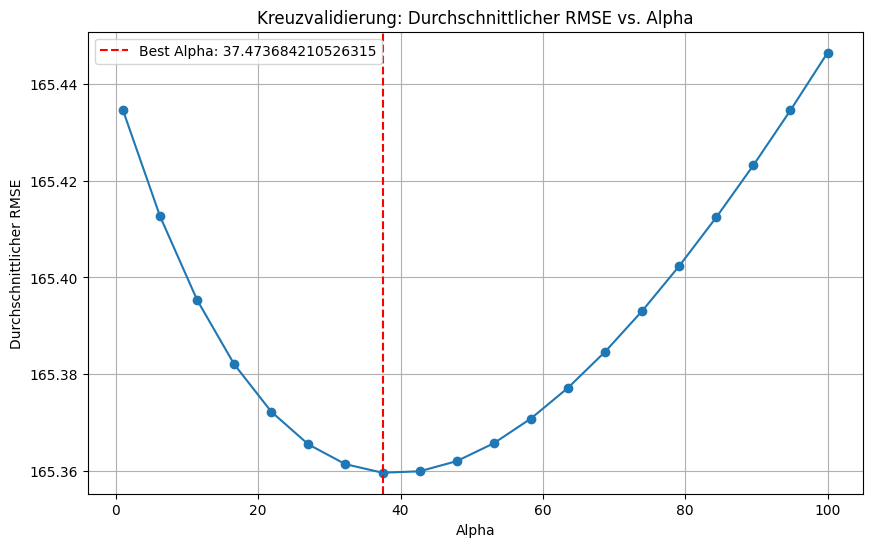

In [2]:
performance_df = pd.DataFrame(list(average_performance.items()), columns=['Alpha', 'RMSE'])

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(performance_df['Alpha'], performance_df['RMSE'], marker='o', linestyle='-')
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best Alpha: {best_alpha}')
plt.title('Kreuzvalidierung: Durchschnittlicher RMSE vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Durchschnittlicher RMSE')
plt.legend()
plt.grid()
plt.show()

## ✏ Aufgabe 3 🤯
Führen Sie eine nested-Cross Validation durch, um eine bessere Schätzung des Testfehlers zu erhalten. D.h. anstatt *ein* Trainings- und Testset zu erzeugen (vor der Hyperparametersuche), erzeugen Sie $k$ Testsets. Für jedes dieser $k$ Trainings-/Testset Paare führen Sie nun die Hyperparametersuche mit Kreuzvalidierung wie in der vorherigen Aufgabe durch. Als Resultat erhalten Sie eine Schätzung des Testfehlers durch Mittelung der $k$ Testfehler und $k$ Modelle.

In [3]:
from flows.aufgabe3 import nested_cross_validation

result = await nested_cross_validation(sample=10000)

00:58:39.147 | INFO    | prefect.engine - Created flow run 'daffodil-koala' for flow 'nested-cross-validation'

00:58:39.149 | INFO    | prefect.engine - View at http://127.0.0.1:3000/runs/flow-run/c5281089-9e0f-4c4b-8038-46eb232fa338

00:58:39.201 | INFO    | prefect.task_runner.dask - Creating a new Dask cluster with `distributed.deploy.local.LocalCluster`

00:58:39.205 | INFO    | distributed.scheduler - State start

00:58:39.210 | INFO    | distributed.scheduler -   Scheduler at:     tcp://127.0.0.1:40357

00:58:39.211 | INFO    | distributed.scheduler -   dashboard at:  http://127.0.0.1:8787/status

00:58:39.212 | INFO    | distributed.scheduler - Registering Worker plugin shuffle

00:58:39.229 | INFO    | distributed.nanny -         Start Nanny at: 'tcp://127.0.0.1:37893'

00:58:39.232 | INFO    | distributed.nanny -         Start Nanny at: 'tcp://127.0.0.1:45231'

00:58:39.272 | INFO    | distributed.nanny -         Start Nanny at: 'tcp://127.0.0.1:45989'

00:58:39.313 | INFO    | distributed.nanny -         Start Nanny at: 'tcp://127.0.0.1:41187'

00:58:40.070 | INFO    | distributed.scheduler - Register worker <WorkerState 'tcp://127.0.0.1:40031', name: 0, status: init, memory: 0, processing: 0>

00:58:40.074 | INFO    | distributed.scheduler - Starting worker compute stream, tcp://127.0.0.1:40031

00:58:40.076 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:45416

00:58:40.112 | INFO    | distributed.scheduler - Register worker <WorkerState 'tcp://127.0.0.1:34237', name: 1, status: init, memory: 0, processing: 0>

00:58:40.114 | INFO    | distributed.scheduler - Starting worker compute stream, tcp://127.0.0.1:34237

00:58:40.116 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:45424

00:58:40.138 | INFO    | distributed.scheduler - Register worker <WorkerState 'tcp://127.0.0.1:43647', name: 2, status: init, memory: 0, processing: 0>

00:58:40.140 | INFO    | distributed.scheduler - Starting worker compute stream, tcp://127.0.0.1:43647

00:58:40.141 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:45430

00:58:40.193 | INFO    | distributed.scheduler - Register worker <WorkerState 'tcp://127.0.0.1:34637', name: 3, status: init, memory: 0, processing: 0>

00:58:40.195 | INFO    | distributed.scheduler - Starting worker compute stream, tcp://127.0.0.1:34637

00:58:40.197 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:45440

00:58:40.208 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e14b413c-9bd1-11ef-86bc-c30986b8f503

00:58:40.210 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:45456

00:58:40.212 | INFO    | prefect.task_runner.dask - The Dask dashboard is available at http://127.0.0.1:8787/status

00:58:41.141 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - Outer Fold 1:

00:58:41.144 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - -------

00:58:41.155 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 1:

00:58:41.158 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

00:58:44.746 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:44.834 | INFO    | distributed.scheduler - Receive client connection: Client-worker-e3f81587-9bd1-11ef-954e-c30986b8f503

00:58:44.837 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41776

00:58:44.843 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:44.843 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:44.889 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e4010145-9bd1-11ef-954e-c30986b8f503

00:58:44.924 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41790

00:58:44.927 | INFO    | distributed.scheduler - Receive client connection: Client-worker-e4090aed-9bd1-11ef-954b-c30986b8f503

00:58:44.930 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41810

00:58:45.003 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:45.004 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:45.100 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e40f3ea1-9bd1-11ef-954e-c30986b8f503

00:58:45.102 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41818

00:58:45.102 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:45.104 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e40f6d99-9bd1-11ef-954b-c30986b8f503

00:58:45.107 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41828

00:58:45.201 | INFO    | distributed.scheduler - Receive client connection: Client-worker-e42315c0-9bd1-11ef-9556-c30986b8f503

00:58:45.204 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41854

00:58:45.264 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:45.264 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e4281565-9bd1-11ef-9556-c30986b8f503

00:58:45.292 | INFO    | Task run 'train_model-c40' - Finished in state Completed()


00:58:45.283 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41886

00:58:45.327 | INFO    | Task run 'print_evaluation-a76' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84512 |         159.48 |     104.59 |     5333 |      501
Test      0.82531 |         176.03 |     113.70 |     2667 |      501



00:58:45.329 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e427abc7-9bd1-11ef-954b-c30986b8f503

00:58:45.332 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41870

00:58:45.347 | INFO    | distributed.scheduler - Receive client connection: Client-worker-e43464fe-9bd1-11ef-9552-c30986b8f503

00:58:45.362 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41916

00:58:45.370 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e436f22c-9bd1-11ef-9552-c30986b8f503

00:58:45.401 | INFO    | Task run 'print_evaluation-a76' - Finished in state Completed()
00:58:45.413 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(159.48396480979832), 'RMSE Test': np.float64(176.03004694283604), 'R2 Train': 0.8451176060990379, 'R2 Test': 0.8253147585023846, 'MAE Train': np.float64(104.59405788171179), 'MAE Test': np.float64(113.70450252485693)}


00:58:45.403 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41926

00:58:45.415 | INFO    | Task run 'train_and_evaluate_alpha-a61' - Finished in state Completed()
00:58:45.440 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:45.460 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4010145-9bd1-11ef-954e-c30986b8f503

00:58:45.489 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41790; closing.

00:58:45.545 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4010145-9bd1-11ef-954e-c30986b8f503

00:58:45.564 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e4010145-9bd1-11ef-954e-c30986b8f503

00:58:45.585 | INFO    | Task run 'train_model-087' - Finished in state Completed()


00:58:45.597 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e44f4ca0-9bd1-11ef-9556-c30986b8f503

00:58:45.619 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41938

00:58:45.641 | INFO    | Task run 'print_evaluation-96c' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85861 |         152.38 |     100.41 |     5333 |      501
Test      0.82976 |         173.78 |     113.57 |     2667 |      501

00:58:45.673 | INFO    | Task run 'train_model-38a' - Finished in state Completed()


00:58:45.699 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e46ab5f4-9bd1-11ef-9552-c30986b8f503

00:58:45.718 | INFO    | Task run 'print_evaluation-aa1' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84014 |         162.02 |     106.21 |     5333 |      501
Test      0.82162 |         177.88 |     114.88 |     2667 |      501



00:58:45.719 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41964

00:58:45.742 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:45.777 | INFO    | Task run 'train_model-204' - Finished in state Completed()
00:58:45.814 | INFO    | Task run 'train_model-d48' - Finished in state Completed()
00:58:45.818 | INFO    | Task run 'print_evaluation-d24' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84252 |         160.81 |     105.44 |     5333 |      501
Test      0.82345 |         176.97 |     114.29 |     2667 |      501

00:58:45.842 | INFO    | Task run 'print_evaluation-96c' - Finished in state Completed()
00:58:45.844 | INFO    | Task run 'print_evaluation-05e' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85116 |         156.34 |     102.62 |     5333 |      501
Test      0.82893 |         174.20 |     112.69

00:58:45.889 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e40f3ea1-9bd1-11ef-954e-c30986b8f503

00:58:45.907 | INFO    | Task run 'print_evaluation-aa1' - Finished in state Completed()


00:58:45.904 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41818; closing.

00:58:45.915 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(13.122448979591836), 'Model': 'Ridge', 'RMSE Train': np.float64(162.02498162984702), 'RMSE Test': np.float64(177.88034855265354), 'R2 Train': 0.8401428864950136, 'R2 Test': 0.8216231260835881, 'MAE Train': np.float64(106.21241306583103), 'MAE Test': np.float64(114.88138668910887)}
00:58:45.911 | INFO    | Task run 'train_model-468' - Finished in state Completed()
00:58:45.918 | INFO    | Task run 'train_and_evaluate_alpha-d50' - Finished in state Completed()
00:58:45.949 | INFO    | Task run 'print_evaluation-9b8' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83794 |         163.14 |     106.95 |     5333 |      501
Test      0.81985 |         178.76 |     115.44 |     2667 |      501

00:58:45.954 | INFO    | Task run 'print_evaluation-05e' - Finished in state

00:58:45.967 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e40f3ea1-9bd1-11ef-954e-c30986b8f503

00:58:45.972 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(5.040816326530612), 'Model': 'Ridge', 'RMSE Train': np.float64(156.34155610575237), 'RMSE Test': np.float64(174.19663640132228), 'R2 Train': 0.851160958159565, 'R2 Test': 0.828934616720328, 'MAE Train': np.float64(102.6197690296514), 'MAE Test': np.float64(112.69166505743465)}
00:58:45.977 | INFO    | Task run 'train_and_evaluate_alpha-3f7' - Finished in state Completed()


00:58:45.970 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e49855e1-9bd1-11ef-954e-c30986b8f503

00:58:46.008 | INFO    | Task run 'print_evaluation-d24' - Finished in state Completed()
00:58:46.018 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(160.81442890585208), 'RMSE Test': np.float64(176.9668275480523), 'R2 Train': 0.8425226744385352, 'R2 Test': 0.8234505634295338, 'MAE Train': np.float64(105.44199449917862), 'MAE Test': np.float64(114.28967796942383)}
00:58:46.021 | INFO    | Task run 'train_and_evaluate_alpha-3cc' - Finished in state Completed()


00:58:46.022 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41988

00:58:46.026 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e40f6d99-9bd1-11ef-954b-c30986b8f503

00:58:46.028 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41828; closing.

00:58:46.033 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e40f6d99-9bd1-11ef-954b-c30986b8f503

00:58:46.035 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e40f3ea1-9bd1-11ef-954e-c30986b8f503

00:58:46.045 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e427abc7-9bd1-11ef-954b-c30986b8f503

00:58:46.048 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41870; closing.

00:58:46.051 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4281565-9bd1-11ef-9556-c30986b8f503

00:58:46.053 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41886; closing.

00:58:46.067 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e427abc7-9bd1-11ef-954b-c30986b8f503

00:58:46.070 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4281565-9bd1-11ef-9556-c30986b8f503

00:58:46.073 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e40f6d99-9bd1-11ef-954b-c30986b8f503

00:58:46.079 | INFO    | Task run 'print_evaluation-9b8' - Finished in state Completed()
00:58:46.090 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(163.13676884817866), 'RMSE Test': np.float64(178.76331790272434), 'R2 Train': 0.8379415363086952, 'R2 Test': 0.8198478628882351, 'MAE Train': np.float64(106.94649847822588), 'MAE Test': np.float64(115.44254189568859)}
00:58:46.093 | INFO    | Task run 'train_and_evaluate_alpha-0da' - Finished in state Completed()


00:58:46.101 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e427abc7-9bd1-11ef-954b-c30986b8f503

00:58:46.105 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e4281565-9bd1-11ef-9556-c30986b8f503

00:58:46.111 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e436f22c-9bd1-11ef-9552-c30986b8f503

00:58:46.113 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41926; closing.

00:58:46.119 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e436f22c-9bd1-11ef-9552-c30986b8f503

00:58:46.131 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:46.154 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e436f22c-9bd1-11ef-9552-c30986b8f503

00:58:46.174 | INFO    | Task run 'train_model-1a7' - Finished in state Completed()


00:58:46.183 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e4d3f561-9bd1-11ef-954e-c30986b8f503

00:58:46.185 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42006

00:58:46.198 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:46.219 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e4ddf370-9bd1-11ef-954b-c30986b8f503

00:58:46.223 | INFO    | Task run 'print_evaluation-4c9' - Ridge(alpha=np.float64(3.020408163265306)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85474 |         154.45 |     101.52 |     5333 |      501
Test      0.83028 |         173.51 |     112.58 |     2667 |      501



00:58:46.223 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42014

00:58:46.254 | INFO    | Task run 'train_model-bef' - Finished in state Completed()
00:58:46.288 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:46.290 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:46.296 | INFO    | Task run 'print_evaluation-eda' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84798 |         158.01 |     103.64 |     5333 |      501
Test      0.82718 |         175.09 |     113.14 |     2667 |      501



00:58:46.298 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e4ebc11c-9bd1-11ef-954b-c30986b8f503

00:58:46.301 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42034

00:58:46.308 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e4ec1bbc-9bd1-11ef-9556-c30986b8f503

00:58:46.311 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42052

00:58:46.360 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:46.368 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e4f6ab8f-9bd1-11ef-9552-c30986b8f503

00:58:46.373 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42072

00:58:46.389 | INFO    | Task run 'print_evaluation-4c9' - Finished in state Completed()
00:58:46.401 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(154.45289380833833), 'RMSE Test': np.float64(173.5126937815009), 'R2 Train': 0.8547352957658293, 'R2 Test': 0.8302752766125299, 'MAE Train': np.float64(101.52388853848687), 'MAE Test': np.float64(112.5802598653103)}
00:58:46.415 | INFO    | Task run 'train_and_evaluate_alpha-871' - Finished in state Completed()


00:58:46.421 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e44f4ca0-9bd1-11ef-9556-c30986b8f503

00:58:46.422 | INFO    | Task run 'train_model-7a5' - Finished in state Completed()


00:58:46.426 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41938; closing.

00:58:46.429 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e44f4ca0-9bd1-11ef-9556-c30986b8f503

00:58:46.432 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e44f4ca0-9bd1-11ef-9556-c30986b8f503

00:58:46.451 | INFO    | Task run 'print_evaluation-eda' - Finished in state Completed()
00:58:46.462 | INFO    | Task run 'print_evaluation-a9b' - Ridge(alpha=np.float64(17.163265306122447)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83589 |         164.17 |     107.63 |     5333 |      501
Test      0.81813 |         179.61 |     115.98 |     2667 |      501

00:58:46.475 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(7.061224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(158.0053218489677), 'RMSE Test': np.float64(175.08933432944283), 'R2 Train': 0.8479762522458651, 'R2 Test': 0.8271768215205653, 'MAE Train': np.float64(103.63605685476125), 'MAE Test': np.float64(113.14222068501925)}
00:58:46.478 | INFO    | Task run 'train_and_evaluate_alpha-cdd' - Finished in state Completed()


00:58:46.486 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e46ab5f4-9bd1-11ef-9552-c30986b8f503

00:58:46.488 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41964; closing.

00:58:46.491 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e46ab5f4-9bd1-11ef-9552-c30986b8f503

00:58:46.494 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e46ab5f4-9bd1-11ef-9552-c30986b8f503

00:58:46.518 | INFO    | Task run 'train_model-288' - Finished in state Completed()
00:58:46.545 | INFO    | Task run 'train_model-43f' - Finished in state Completed()
00:58:46.555 | INFO    | Task run 'print_evaluation-d59' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83216 |         166.02 |     108.88 |     5333 |      501
Test      0.81487 |         181.22 |     117.02 |     2667 |      501

00:58:46.577 | INFO    | Task run 'print_evaluation-dda' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82882 |         167.66 |     109.97 |     5333 |      501
Test      0.81183 |         182.70 |     117.98 |     2667 |      501

00:58:46.614 | INFO    | Task run 'train_model-0d1' - Finished in state Completed()
00:58:46.618 | INFO    | Task run 'print_evaluation-a9b' - Finished in state Completed()
00:58:46

00:58:46.640 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e49855e1-9bd1-11ef-954e-c30986b8f503

00:58:46.642 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41988; closing.

00:58:46.644 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e49855e1-9bd1-11ef-954e-c30986b8f503

00:58:46.646 | INFO    | Task run 'print_evaluation-bc0' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82580 |         169.14 |     110.95 |     5333 |      501
Test      0.80900 |         184.07 |     118.88 |     2667 |      501



00:58:46.652 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e49855e1-9bd1-11ef-954e-c30986b8f503

00:58:46.653 | INFO    | Task run 'train_model-6d7' - Finished in state Completed()
00:58:46.658 | INFO    | Task run 'print_evaluation-d59' - Finished in state Completed()
00:58:46.673 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'RMSE Train': np.float64(166.02178432701925), 'RMSE Test': np.float64(181.21577759584068), 'R2 Train': 0.832158961002142, 'R2 Test': 0.8148709302260105, 'MAE Train': np.float64(108.88095803022355), 'MAE Test': np.float64(117.02145749536537)}
00:58:46.676 | INFO    | Task run 'train_and_evaluate_alpha-483' - Finished in state Completed()


00:58:46.678 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e5208fe9-9bd1-11ef-9556-c30986b8f503

00:58:46.682 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42078

00:58:46.687 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4ddf370-9bd1-11ef-954b-c30986b8f503

00:58:46.690 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42014; closing.

00:58:46.693 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4ddf370-9bd1-11ef-954b-c30986b8f503

00:58:46.693 | INFO    | Task run 'print_evaluation-022' - Ridge(alpha=np.float64(19.183673469387752)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83397 |         165.12 |     108.27 |     5333 |      501
Test      0.81647 |         180.43 |     116.51 |     2667 |      501



00:58:46.697 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e4ddf370-9bd1-11ef-954b-c30986b8f503

00:58:46.715 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:46.725 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e52cd1c3-9bd1-11ef-9552-c30986b8f503

00:58:46.727 | INFO    | Task run 'train_model-4dc' - Finished in state Completed()


00:58:46.729 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42090

00:58:46.735 | INFO    | Task run 'print_evaluation-dda' - Finished in state Completed()
00:58:46.752 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(25.24489795918367), 'Model': 'Ridge', 'RMSE Train': np.float64(167.66335672302736), 'RMSE Test': np.float64(182.69565873561626), 'R2 Train': 0.8288234305220163, 'R2 Test': 0.8118349066170997, 'MAE Train': np.float64(109.97448841315601), 'MAE Test': np.float64(117.98492321901486)}
00:58:46.755 | INFO    | Task run 'train_and_evaluate_alpha-270' - Finished in state Completed()


00:58:46.758 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4d3f561-9bd1-11ef-954e-c30986b8f503

00:58:46.761 | INFO    | Task run 'print_evaluation-f86' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83045 |         166.87 |     109.45 |     5333 |      501
Test      0.81333 |         181.97 |     117.51 |     2667 |      501



00:58:46.761 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42006; closing.

00:58:46.765 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4d3f561-9bd1-11ef-954e-c30986b8f503

00:58:46.768 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e4d3f561-9bd1-11ef-954e-c30986b8f503

00:58:46.825 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:46.833 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e53d7c66-9bd1-11ef-954e-c30986b8f503

00:58:46.837 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42098

00:58:46.846 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:46.845 | INFO    | Task run 'print_evaluation-022' - Finished in state Completed()


00:58:46.856 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e540d385-9bd1-11ef-954b-c30986b8f503

00:58:46.859 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42106

00:58:46.862 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(165.1242287332451), 'RMSE Test': np.float64(180.43061666730836), 'R2 Train': 0.833968837303835, 'R2 Test': 0.8164716872803139, 'MAE Train': np.float64(108.2748784062333), 'MAE Test': np.float64(116.50665112348638)}
00:58:46.866 | INFO    | Task run 'train_and_evaluate_alpha-ae6' - Finished in state Completed()


00:58:46.875 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4ec1bbc-9bd1-11ef-9556-c30986b8f503

00:58:46.879 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42052; closing.

00:58:46.881 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4ec1bbc-9bd1-11ef-9556-c30986b8f503

00:58:46.884 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e4ec1bbc-9bd1-11ef-9556-c30986b8f503

00:58:46.889 | INFO    | Task run 'print_evaluation-bc0' - Finished in state Completed()
00:58:46.898 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(29.285714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(169.13637905950222), 'RMSE Test': np.float64(184.06527445701354), 'R2 Train': 0.8258024419699521, 'R2 Test': 0.80900309468987, 'MAE Train': np.float64(110.94666535947457), 'MAE Test': np.float64(118.88340547988629)}
00:58:46.901 | INFO    | Task run 'train_and_evaluate_alpha-bfd' - Finished in state Completed()
00:58:46.909 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:46.916 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4ebc11c-9bd1-11ef-954b-c30986b8f503

00:58:46.919 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42034; closing.

00:58:46.922 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4ebc11c-9bd1-11ef-954b-c30986b8f503

00:58:46.928 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e4ebc11c-9bd1-11ef-954b-c30986b8f503

00:58:46.952 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e54a4ed9-9bd1-11ef-954e-c30986b8f503

00:58:46.954 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42124

00:58:46.992 | INFO    | Task run 'train_model-2a7' - Finished in state Completed()
00:58:47.020 | INFO    | Task run 'print_evaluation-f86' - Finished in state Completed()
00:58:47.035 | INFO    | Task run 'train_model-209' - Finished in state Completed()
00:58:47.037 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.float64(166.86608963983974), 'RMSE Test': np.float64(181.9702807617254), 'R2 Train': 0.8304475059310015, 'R2 Test': 0.8133261281644981, 'MAE Train': np.float64(109.44623042777398), 'MAE Test': np.float64(117.51252440546864)}
00:58:47.041 | INFO    | Task run 'train_and_evaluate_alpha-fa4' - Finished in state Completed()


00:58:47.047 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4f6ab8f-9bd1-11ef-9552-c30986b8f503

00:58:47.050 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42072; closing.

00:58:47.052 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e4f6ab8f-9bd1-11ef-9552-c30986b8f503

00:58:47.051 | INFO    | Task run 'print_evaluation-c26' - Ridge(alpha=np.float64(31.30612244897959)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82439 |         169.82 |     111.40 |     5333 |      501
Test      0.80766 |         184.71 |     119.32 |     2667 |      501



00:58:47.055 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e4f6ab8f-9bd1-11ef-9552-c30986b8f503

00:58:47.071 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:47.076 | INFO    | Task run 'print_evaluation-586' - Ridge(alpha=np.float64(27.265306122448976)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82728 |         168.42 |     110.47 |     5333 |      501
Test      0.81039 |         183.39 |     118.44 |     2667 |      501



00:58:47.103 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e5630ebd-9bd1-11ef-9556-c30986b8f503

00:58:47.107 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42138

00:58:47.149 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:47.155 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e56f2880-9bd1-11ef-954b-c30986b8f503

00:58:47.158 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42154

00:58:47.165 | INFO    | Task run 'train_model-7e2' - Finished in state Completed()
00:58:47.201 | INFO    | Task run 'train_model-14d' - Finished in state Completed()
00:58:47.254 | INFO    | Task run 'print_evaluation-f49' - Ridge(alpha=np.float64(35.3469387755102)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82174 |         171.10 |     112.27 |     5333 |      501
Test      0.80510 |         185.94 |     120.16 |     2667 |      501

00:58:47.256 | INFO    | Task run 'print_evaluation-971' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82304 |         170.47 |     111.85 |     5333 |      501
Test      0.80636 |         185.34 |     119.74 |     2667 |      501

00:58:47.286 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:47.299 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e5842dcb-9bd1-11ef-9552-c30986b8f503

00:58:47.303 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42168

00:58:47.329 | INFO    | Task run 'print_evaluation-c26' - Finished in state Completed()
00:58:47.337 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(169.8200007290229), 'RMSE Test': np.float64(184.7125129963906), 'R2 Train': 0.8243914399413675, 'R2 Test': 0.8076575078575494, 'MAE Train': np.float64(111.4047032183511), 'MAE Test': np.float64(119.31647109318244)}
00:58:47.340 | INFO    | Task run 'train_and_evaluate_alpha-865' - Finished in state Completed()
00:58:47.343 | INFO    | Task run 'train_model-869' - Finished in state Completed()


00:58:47.345 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e52cd1c3-9bd1-11ef-9552-c30986b8f503

00:58:47.347 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42090; closing.

00:58:47.349 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e52cd1c3-9bd1-11ef-9552-c30986b8f503

00:58:47.355 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e52cd1c3-9bd1-11ef-9552-c30986b8f503

00:58:47.375 | INFO    | Task run 'print_evaluation-8a1' - Ridge(alpha=np.float64(41.408163265306115)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81813 |         172.82 |     113.42 |     5333 |      501
Test      0.80154 |         187.63 |     121.33 |     2667 |      501

00:58:47.418 | INFO    | Task run 'train_model-5f1' - Finished in state Completed()
00:58:47.433 | INFO    | Task run 'print_evaluation-971' - Finished in state Completed()
00:58:47.440 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(170.4726371983989), 'RMSE Test': np.float64(185.33658013278853), 'R2 Train': 0.823039081248521, 'R2 Test': 0.8063556209415604, 'MAE Train': np.float64(111.84680172788781), 'MAE Test': np.float64(119.74015141754782)}
00:58:47.443 | INFO    | Task run 'train_and_evaluate_alpha-f38' - Finished in state C

00:58:47.447 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e53d7c66-9bd1-11ef-954e-c30986b8f503

00:58:47.450 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42098; closing.

00:58:47.452 | INFO    | Task run 'print_evaluation-00b' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82049 |         171.70 |     112.67 |     5333 |      501
Test      0.80387 |         186.52 |     120.56 |     2667 |      501



00:58:47.452 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e53d7c66-9bd1-11ef-954e-c30986b8f503

00:58:47.455 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e53d7c66-9bd1-11ef-954e-c30986b8f503

00:58:47.469 | INFO    | Task run 'print_evaluation-f49' - Finished in state Completed()
00:58:47.481 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(171.09693785045684), 'RMSE Test': np.float64(185.93877556757764), 'R2 Train': 0.821740584181661, 'R2 Test': 0.8050951983270089, 'MAE Train': np.float64(112.2705330013022), 'MAE Test': np.float64(120.15728675427279)}
00:58:47.484 | INFO    | Task run 'train_and_evaluate_alpha-2ea' - Finished in state Completed()
00:58:47.488 | INFO    | Task run 'train_model-1fb' - Finished in state Completed()


00:58:47.492 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e540d385-9bd1-11ef-954b-c30986b8f503

00:58:47.494 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42106; closing.

00:58:47.496 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e540d385-9bd1-11ef-954b-c30986b8f503

00:58:47.499 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e540d385-9bd1-11ef-954b-c30986b8f503

00:58:47.529 | INFO    | Task run 'print_evaluation-dd3' - Ridge(alpha=np.float64(43.42857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81701 |         173.35 |     113.77 |     5333 |      501
Test      0.80043 |         188.15 |     121.69 |     2667 |      501

00:58:47.535 | INFO    | Task run 'print_evaluation-8a1' - Finished in state Completed()
00:58:47.548 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(41.408163265306115), 'Model': 'Ridge', 'RMSE Train': np.float64(172.82147847519698), 'RMSE Test': np.float64(187.62586519028986), 'R2 Train': 0.8181290072805083, 'R2 Test': 0.801542269390498, 'MAE Train': np.float64(113.4212779732362), 'MAE Test': np.float64(121.32969335101377)}
00:58:47.551 | INFO    | Task run 'train_and_evaluate_alpha-b93' - Finished in state Completed()
00:58:47.560 | INFO    | prefect.task_runner.dask - Connecting to an exist

00:58:47.561 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e54a4ed9-9bd1-11ef-954e-c30986b8f503

00:58:47.564 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42124; closing.

00:58:47.565 | INFO    | Task run 'print_evaluation-00b' - Finished in state Completed()


00:58:47.569 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e54a4ed9-9bd1-11ef-954e-c30986b8f503

00:58:47.572 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e54a4ed9-9bd1-11ef-954e-c30986b8f503

00:58:47.573 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.367346938775505), 'Model': 'Ridge', 'RMSE Train': np.float64(171.6952059350583), 'RMSE Test': np.float64(186.52031339407569), 'R2 Train': 0.820491778975709, 'R2 Test': 0.8038741322934435, 'MAE Train': np.float64(112.67422046275671), 'MAE Test': np.float64(120.55783458263645)}
00:58:47.582 | INFO    | Task run 'train_and_evaluate_alpha-6ec' - Finished in state Completed()


00:58:47.596 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5630ebd-9bd1-11ef-9556-c30986b8f503

00:58:47.599 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42138; closing.

00:58:47.603 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5630ebd-9bd1-11ef-9556-c30986b8f503

00:58:47.608 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e5630ebd-9bd1-11ef-9556-c30986b8f503

00:58:47.620 | INFO    | Task run 'train_model-86e' - Finished in state Completed()


00:58:47.636 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e5adafff-9bd1-11ef-9552-c30986b8f503

00:58:47.640 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42192

00:58:47.642 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:47.657 | INFO    | Task run 'print_evaluation-dd3' - Finished in state Completed()
00:58:47.663 | INFO    | Task run 'print_evaluation-f01' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81929 |         172.27 |     113.06 |     5333 |      501
Test      0.80269 |         187.08 |     120.95 |     2667 |      501

00:58:47.669 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(173.35284376617344), 'RMSE Test': np.float64(188.15191415333865), 'R2 Train': 0.8170089092379433, 'R2 Test': 0.8004278725566623, 'MAE Train': np.float64(113.77293949657532), 'MAE Test': np.float64(121.69203943940914)}


00:58:47.670 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e5bb7a56-9bd1-11ef-954e-c30986b8f503

00:58:47.675 | INFO    | Task run 'train_and_evaluate_alpha-c28' - Finished in state Completed()


00:58:47.677 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42206

00:58:47.685 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e56f2880-9bd1-11ef-954b-c30986b8f503

00:58:47.688 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42154; closing.

00:58:47.691 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e56f2880-9bd1-11ef-954b-c30986b8f503

00:58:47.697 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e56f2880-9bd1-11ef-954b-c30986b8f503

00:58:47.704 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:47.740 | INFO    | Task run 'print_evaluation-586' - Finished in state Completed()


00:58:47.742 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e5c4746b-9bd1-11ef-954b-c30986b8f503

00:58:47.748 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.265306122448976), 'Model': 'Ridge', 'RMSE Train': np.float64(168.41869817649288), 'RMSE Test': np.float64(183.3934787298196), 'R2 Train': 0.8272776186138768, 'R2 Test': 0.8103947396124969, 'MAE Train': np.float64(110.4707443160166), 'MAE Test': np.float64(118.44446778520552)}


00:58:47.748 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42228

00:58:47.752 | INFO    | Task run 'train_and_evaluate_alpha-2db' - Finished in state Completed()


00:58:47.759 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5208fe9-9bd1-11ef-9556-c30986b8f503

00:58:47.761 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42078; closing.

00:58:47.764 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5208fe9-9bd1-11ef-9556-c30986b8f503

00:58:47.768 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e5208fe9-9bd1-11ef-9556-c30986b8f503

00:58:47.769 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:47.783 | INFO    | Task run 'print_evaluation-f01' - Finished in state Completed()
00:58:47.796 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:47.803 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(172.26945937665482), 'RMSE Test': np.float64(187.08232531384542), 'R2 Train': 0.8192890010680662, 'R2 Test': 0.8026904420536008, 'MAE Train': np.float64(113.0557707658117), 'MAE Test': np.float64(120.94937030425972)}
00:58:47.809 | INFO    | Task run 'train_and_evaluate_alpha-a6c' - Finished in state Completed()


00:58:47.821 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e5cda375-9bd1-11ef-954e-c30986b8f503

00:58:47.824 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42242

00:58:47.831 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5842dcb-9bd1-11ef-9552-c30986b8f503

00:58:47.837 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42168; closing.

00:58:47.844 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5842dcb-9bd1-11ef-9552-c30986b8f503

00:58:47.849 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e5d1b422-9bd1-11ef-9556-c30986b8f503

00:58:47.855 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42256

00:58:47.870 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e5842dcb-9bd1-11ef-9552-c30986b8f503

00:58:47.933 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:47.953 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e5e74863-9bd1-11ef-954b-c30986b8f503

00:58:47.959 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42262

00:58:48.005 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:48.035 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e5f19c3d-9bd1-11ef-9556-c30986b8f503

00:58:48.041 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42284

00:58:48.113 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:48.131 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e60262d8-9bd1-11ef-9552-c30986b8f503

00:58:48.135 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42310

00:58:48.155 | INFO    | Task run 'train_model-366' - Finished in state Completed()
00:58:48.163 | INFO    | Task run 'train_model-fd3' - Finished in state Completed()
00:58:48.193 | INFO    | Task run 'train_model-ce6' - Finished in state Completed()
00:58:48.206 | INFO    | Task run 'print_evaluation-8e7' - Ridge(alpha=np.float64(51.51020408163265)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81288 |         175.30 |     115.07 |     5333 |      501
Test      0.79628 |         190.10 |     123.03 |     2667 |      501

00:58:48.214 | INFO    | Task run 'print_evaluation-dd5' - Ridge(alpha=np.float64(45.44897959183673)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81593 |         173.86 |     114.11 |     5333 |      501
Test      0.79935 |         188.66 |     122.04 |     2667 |      501

00:58:48.255 | INFO    | Task run 'train_model-055' - Finished in state Completed()
00:58:48.260 |

00:58:48.482 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5adafff-9bd1-11ef-9552-c30986b8f503

00:58:48.484 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42192; closing.

00:58:48.486 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5adafff-9bd1-11ef-9552-c30986b8f503

00:58:48.489 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e5adafff-9bd1-11ef-9552-c30986b8f503

00:58:48.505 | INFO    | Task run 'print_evaluation-ef4' - Ridge(alpha=np.float64(53.53061224489795)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81192 |         175.74 |     115.36 |     5333 |      501
Test      0.79531 |         190.55 |     123.33 |     2667 |      501

00:58:48.544 | INFO    | Task run 'print_evaluation-a8b' - Finished in state Completed()
00:58:48.551 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(174.83642461576028), 'RMSE Test': np.float64(189.633944389779), 'R2 Train': 0.8138633736344192, 'R2 Test': 0.7972715210204685, 'MAE Train': np.float64(114.7565933474592), 'MAE Test': np.float64(122.71199947451832)}
00:58:48.554 | INFO    | Task run 'train_and_evaluate_alpha-54c' - Finished in state Completed()


00:58:48.558 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5c4746b-9bd1-11ef-954b-c30986b8f503

00:58:48.560 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42228; closing.

00:58:48.562 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5c4746b-9bd1-11ef-954b-c30986b8f503

00:58:48.564 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e5c4746b-9bd1-11ef-954b-c30986b8f503

00:58:48.592 | INFO    | Task run 'print_evaluation-77a' - Finished in state Completed()
00:58:48.598 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(176.59665815905547), 'RMSE Test': np.float64(191.41397114818412), 'R2 Train': 0.8100965009669815, 'R2 Test': 0.7934477777453275, 'MAE Train': np.float64(115.93413035369838), 'MAE Test': np.float64(123.91517229786284)}
00:58:48.600 | INFO    | Task run 'train_and_evaluate_alpha-15b' - Finished in state Completed()


00:58:48.604 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5e74863-9bd1-11ef-954b-c30986b8f503

00:58:48.606 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42262; closing.

00:58:48.609 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5e74863-9bd1-11ef-954b-c30986b8f503

00:58:48.611 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e5e74863-9bd1-11ef-954b-c30986b8f503

00:58:48.627 | INFO    | Task run 'print_evaluation-c64' - Finished in state Completed()
00:58:48.634 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(177.39867409506195), 'RMSE Test': np.float64(192.23149354283592), 'R2 Train': 0.8083676859023189, 'R2 Test': 0.7916796553224155, 'MAE Train': np.float64(116.46974794952699), 'MAE Test': np.float64(124.45689537745105)}
00:58:48.636 | INFO    | Task run 'train_and_evaluate_alpha-875' - Finished in state Completed()


00:58:48.640 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5f19c3d-9bd1-11ef-9556-c30986b8f503

00:58:48.642 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42284; closing.

00:58:48.645 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5f19c3d-9bd1-11ef-9556-c30986b8f503

00:58:48.648 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e5f19c3d-9bd1-11ef-9556-c30986b8f503

00:58:48.653 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:48.688 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e6546f90-9bd1-11ef-9552-c30986b8f503

00:58:48.691 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42330

00:58:48.719 | INFO    | Task run 'print_evaluation-8d3' - Finished in state Completed()
00:58:48.728 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(174.35911275907893), 'RMSE Test': np.float64(189.15513136454135), 'R2 Train': 0.8148783102308368, 'R2 Test': 0.7982939802665916, 'MAE Train': np.float64(114.43804631843767), 'MAE Test': np.float64(122.38390963425093)}
00:58:48.731 | INFO    | Task run 'train_and_evaluate_alpha-ad9' - Finished in state Completed()


00:58:48.743 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5d1b422-9bd1-11ef-9556-c30986b8f503

00:58:48.745 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42256; closing.

00:58:48.747 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5d1b422-9bd1-11ef-9556-c30986b8f503

00:58:48.751 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:48.751 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e5d1b422-9bd1-11ef-9556-c30986b8f503

00:58:48.764 | INFO    | Task run 'print_evaluation-ef4' - Finished in state Completed()


00:58:48.779 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e6638654-9bd1-11ef-954b-c30986b8f503

00:58:48.780 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(175.7445857896625), 'RMSE Test': np.float64(190.54968606172892), 'R2 Train': 0.8119246347350609, 'R2 Test': 0.7953088432830535, 'MAE Train': np.float64(115.36429371072886), 'MAE Test': np.float64(123.33168966892268)}


00:58:48.781 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42348

00:58:48.783 | INFO    | Task run 'train_and_evaluate_alpha-f7b' - Finished in state Completed()


00:58:48.791 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e60262d8-9bd1-11ef-9552-c30986b8f503

00:58:48.793 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42310; closing.

00:58:48.796 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e60262d8-9bd1-11ef-9552-c30986b8f503

00:58:48.799 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e60262d8-9bd1-11ef-9552-c30986b8f503

00:58:48.802 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:48.813 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:48.826 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e66cd517-9bd1-11ef-954b-c30986b8f503

00:58:48.829 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42382

00:58:48.833 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e66b323d-9bd1-11ef-9556-c30986b8f503

00:58:48.836 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42366

00:58:48.907 | INFO    | Task run 'print_evaluation-604' - Finished in state Completed()
00:58:48.919 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(176.17723181682774), 'RMSE Test': np.float64(190.98795294113154), 'R2 Train': 0.8109974913221567, 'R2 Test': 0.7943661755440304, 'MAE Train': np.float64(115.65361501004915), 'MAE Test': np.float64(123.62880650576537)}
00:58:48.923 | INFO    | Task run 'train_and_evaluate_alpha-e0b' - Finished in state Completed()


00:58:48.928 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5cda375-9bd1-11ef-954e-c30986b8f503

00:58:48.931 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42242; closing.

00:58:48.933 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:48.933 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5cda375-9bd1-11ef-954e-c30986b8f503

00:58:48.937 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e5cda375-9bd1-11ef-954e-c30986b8f503

00:58:48.979 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e67f477b-9bd1-11ef-9556-c30986b8f503

00:58:48.983 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42414

00:58:49.002 | INFO    | Task run 'print_evaluation-dd5' - Finished in state Completed()
00:58:49.031 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(173.86496639884658), 'RMSE Test': np.float64(188.66138581631697), 'R2 Train': 0.8159261199063299, 'R2 Test': 0.7993456193989736, 'MAE Train': np.float64(114.10940601211692), 'MAE Test': np.float64(122.0422548770968)}
00:58:49.033 | INFO    | Task run 'train_and_evaluate_alpha-ce4' - Finished in state Completed()
00:58:49.035 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:49.043 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5bb7a56-9bd1-11ef-954e-c30986b8f503

00:58:49.049 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42206; closing.

00:58:49.059 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e5bb7a56-9bd1-11ef-954e-c30986b8f503

00:58:49.066 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e5bb7a56-9bd1-11ef-954e-c30986b8f503

00:58:49.097 | INFO    | Task run 'train_model-991' - Finished in state Completed()


00:58:49.135 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e68f9b11-9bd1-11ef-9552-c30986b8f503

00:58:49.140 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42430

00:58:49.158 | INFO    | Task run 'print_evaluation-823' - Ridge(alpha=np.float64(67.67346938775509)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80594 |         178.52 |     117.21 |     5333 |      501
Test      0.78919 |         193.38 |     125.21 |     2667 |      501

00:58:49.164 | INFO    | Task run 'train_model-168' - Finished in state Completed()
00:58:49.181 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:49.197 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e6a51923-9bd1-11ef-954e-c30986b8f503

00:58:49.200 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42436

00:58:49.229 | INFO    | Task run 'print_evaluation-d6d' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80754 |         177.78 |     116.73 |     5333 |      501
Test      0.79083 |         192.62 |     124.72 |     2667 |      501

00:58:49.260 | INFO    | Task run 'print_evaluation-823' - Finished in state Completed()
00:58:49.267 | INFO    | Task run 'train_model-f71' - Finished in state Completed()
00:58:49.268 | INFO    | Task run 'train_model-9d2' - Finished in state Completed()
00:58:49.291 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(178.51880849709616), 'RMSE Test': np.float64(193.3789899515221), 'R2 Train': 0.8059400281436186, 'R2 Test': 0.7891851595486429, 'MAE Train': np.float64(117.21201135745459), 'MAE Test': np.float64(125.21118403788532)}
00:

00:58:49.300 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6546f90-9bd1-11ef-9552-c30986b8f503

00:58:49.304 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42330; closing.

00:58:49.305 | INFO    | Task run 'print_evaluation-c83' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80442 |         179.22 |     117.67 |     5333 |      501
Test      0.78762 |         194.10 |     125.68 |     2667 |      501



00:58:49.307 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6546f90-9bd1-11ef-9552-c30986b8f503

00:58:49.314 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e6546f90-9bd1-11ef-9552-c30986b8f503

00:58:49.324 | INFO    | Task run 'print_evaluation-101' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80673 |         178.16 |     116.97 |     5333 |      501
Test      0.79000 |         193.01 |     124.97 |     2667 |      501

00:58:49.343 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:49.363 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e6bdc4ed-9bd1-11ef-954e-c30986b8f503

00:58:49.366 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42460

00:58:49.368 | INFO    | Task run 'train_model-39b' - Finished in state Completed()
00:58:49.399 | INFO    | Task run 'print_evaluation-9e4' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80297 |         179.88 |     118.11 |     5333 |      501
Test      0.78612 |         194.78 |     126.12 |     2667 |      501

00:58:49.453 | INFO    | Task run 'print_evaluation-d6d' - Finished in state Completed()
00:58:49.462 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(177.78253770619713), 'RMSE Test': np.float64(192.62402812892094), 'R2 Train': 0.8075374625706075, 'R2 Test': 0.7908280110004284, 'MAE Train': np.float64(116.72505740022983), 'MAE Test': np.float64(124.71542598900135)}
00:58:49.464 | INFO    | Task run 'train_and_evaluate_alpha-c0a' - Finished in state C

00:58:49.469 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6638654-9bd1-11ef-954b-c30986b8f503

00:58:49.472 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42348; closing.

00:58:49.475 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6638654-9bd1-11ef-954b-c30986b8f503

00:58:49.477 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e6638654-9bd1-11ef-954b-c30986b8f503

00:58:49.494 | INFO    | Task run 'print_evaluation-c83' - Finished in state Completed()
00:58:49.494 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:49.508 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e6d4e99b-9bd1-11ef-9552-c30986b8f503

00:58:49.511 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42482

00:58:49.516 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(179.21644963295262), 'RMSE Test': np.float64(194.09661994022645), 'R2 Train': 0.8044203142583969, 'R2 Test': 0.7876175873428735, 'MAE Train': np.float64(117.67443876907099), 'MAE Test': np.float64(125.67612334191946)}
00:58:49.517 | INFO    | Task run 'train_model-2c7' - Finished in state Completed()
00:58:49.522 | INFO    | Task run 'train_and_evaluate_alpha-3b7' - Finished in state Completed()
00:58:49.526 | INFO    | Task run 'print_evaluation-9e4' - Finished in state Completed()


00:58:49.528 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e66cd517-9bd1-11ef-954b-c30986b8f503

00:58:49.530 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42382; closing.

00:58:49.533 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e66cd517-9bd1-11ef-954b-c30986b8f503

00:58:49.537 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e66cd517-9bd1-11ef-954b-c30986b8f503

00:58:49.536 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(75.75510204081633), 'Model': 'Ridge', 'RMSE Train': np.float64(179.87897047605972), 'RMSE Test': np.float64(194.77996002785824), 'R2 Train': 0.8029716177378375, 'R2 Test': 0.7861195201518844, 'MAE Train': np.float64(118.11356800264156), 'MAE Test': np.float64(126.1187648140609)}
00:58:49.539 | INFO    | Task run 'train_model-146' - Finished in state Completed()
00:58:49.540 | INFO    | Task run 'train_and_evaluate_alpha-c33' - Finished in state Completed()


00:58:49.545 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e67f477b-9bd1-11ef-9556-c30986b8f503

00:58:49.547 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42414; closing.

00:58:49.549 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e67f477b-9bd1-11ef-9556-c30986b8f503

00:58:49.557 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e67f477b-9bd1-11ef-9556-c30986b8f503

00:58:49.558 | INFO    | Task run 'print_evaluation-a63' - Ridge(alpha=np.float64(69.6938775510204)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80517 |         178.87 |     117.45 |     5333 |      501
Test      0.78839 |         193.74 |     125.45 |     2667 |      501

00:58:49.582 | INFO    | Task run 'print_evaluation-39f' - Ridge(alpha=np.float64(59.59183673469387)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80922 |         177.00 |     116.21 |     5333 |      501
Test      0.79255 |         191.83 |     124.19 |     2667 |      501

00:58:49.659 | INFO    | Task run 'train_model-127' - Finished in state Completed()
00:58:49.660 | INFO    | Task run 'print_evaluation-101' - Finished in state Completed()
00:58:49.671 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE

00:58:49.687 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e66b323d-9bd1-11ef-9556-c30986b8f503

00:58:49.692 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42366; closing.

00:58:49.698 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e66b323d-9bd1-11ef-9556-c30986b8f503

00:58:49.702 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e66b323d-9bd1-11ef-9556-c30986b8f503

00:58:49.711 | INFO    | Task run 'print_evaluation-c08' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80092 |         180.81 |     118.73 |     5333 |      501
Test      0.78399 |         195.75 |     126.74 |     2667 |      501

00:58:49.717 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:49.742 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e6f6db46-9bd1-11ef-9556-c30986b8f503

00:58:49.746 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42498

00:58:49.761 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:49.771 | INFO    | Task run 'print_evaluation-a63' - Finished in state Completed()


00:58:49.771 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e6fdb283-9bd1-11ef-954b-c30986b8f503

00:58:49.777 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42514

00:58:49.784 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:49.794 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE Train': np.float64(178.87222692643985), 'RMSE Test': np.float64(193.74227294546287), 'R2 Train': 0.805170896194102, 'R2 Test': 0.7883923393629795, 'MAE Train': np.float64(117.44542338680995), 'MAE Test': np.float64(125.44729419654556)}


00:58:49.793 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e7010f2f-9bd1-11ef-954b-c30986b8f503

00:58:49.798 | INFO    | Task run 'train_and_evaluate_alpha-8e4' - Finished in state Completed()


00:58:49.797 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42534

00:58:49.803 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e68f9b11-9bd1-11ef-9552-c30986b8f503

00:58:49.805 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42430; closing.

00:58:49.807 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e68f9b11-9bd1-11ef-9552-c30986b8f503

00:58:49.811 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e68f9b11-9bd1-11ef-9552-c30986b8f503

00:58:49.843 | INFO    | Task run 'print_evaluation-39f' - Finished in state Completed()
00:58:49.855 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMSE Train': np.float64(177.00358471901166), 'RMSE Test': np.float64(191.8283075118217), 'R2 Train': 0.809220314387792, 'R2 Test': 0.7925526004284836, 'MAE Train': np.float64(116.20596642173643), 'MAE Test': np.float64(124.19059387644218)}
00:58:49.858 | INFO    | Task run 'train_and_evaluate_alpha-5ed' - Finished in state Completed()


00:58:49.864 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6a51923-9bd1-11ef-954e-c30986b8f503

00:58:49.866 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42436; closing.

00:58:49.872 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6a51923-9bd1-11ef-954e-c30986b8f503

00:58:49.875 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e6a51923-9bd1-11ef-954e-c30986b8f503

00:58:49.889 | INFO    | Task run 'train_model-0ad' - Finished in state Completed()
00:58:49.894 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:49.910 | INFO    | Task run 'print_evaluation-c08' - Finished in state Completed()


00:58:49.915 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e711f0db-9bd1-11ef-9556-c30986b8f503

00:58:49.918 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42546

00:58:49.941 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(180.81349218877529), 'RMSE Test': np.float64(195.7465245798547), 'R2 Train': 0.8009190643209699, 'R2 Test': 0.7839915576987027, 'MAE Train': np.float64(118.73228888028171), 'MAE Test': np.float64(126.73987160408653)}
00:58:49.947 | INFO    | Task run 'train_and_evaluate_alpha-fb4' - Finished in state Completed()
00:58:49.950 | INFO    | Task run 'print_evaluation-292' - Ridge(alpha=np.float64(79.79591836734693)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80159 |         180.51 |     118.53 |     5333 |      501
Test      0.78469 |         195.43 |     126.54 |     2667 |      501



00:58:49.954 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6bdc4ed-9bd1-11ef-954e-c30986b8f503

00:58:49.959 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42460; closing.

00:58:49.961 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6bdc4ed-9bd1-11ef-954e-c30986b8f503

00:58:49.964 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e6bdc4ed-9bd1-11ef-954e-c30986b8f503

00:58:50.065 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:50.088 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e72c35a6-9bd1-11ef-9552-c30986b8f503

00:58:50.091 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42564

00:58:50.104 | INFO    | Task run 'train_model-fc2' - Finished in state Completed()
00:58:50.113 | INFO    | Task run 'print_evaluation-292' - Finished in state Completed()
00:58:50.129 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(180.5094316467921), 'RMSE Test': np.float64(195.43172002389295), 'R2 Train': 0.8015880604212633, 'R2 Test': 0.7846857795949599, 'MAE Train': np.float64(118.53066010524661), 'MAE Test': np.float64(126.53841057037772)}
00:58:50.132 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:50.133 | INFO    | Task run 'train_and_evaluate_alpha-43a' - Finished in state Completed()


00:58:50.146 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6d4e99b-9bd1-11ef-9552-c30986b8f503

00:58:50.148 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42482; closing.

00:58:50.152 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6d4e99b-9bd1-11ef-9552-c30986b8f503

00:58:50.160 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e6d4e99b-9bd1-11ef-9552-c30986b8f503

00:58:50.173 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e7361cb6-9bd1-11ef-954e-c30986b8f503

00:58:50.178 | INFO    | Task run 'train_model-048' - Finished in state Completed()
00:58:50.170 | INFO    | Task run 'print_evaluation-39f' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80227 |         180.20 |     118.32 |     5333 |      501
Test      0.78539 |         195.11 |     126.33 |     2667 |      501



00:58:50.181 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42586

00:58:50.216 | INFO    | Task run 'train_model-ae2' - Finished in state Completed()
00:58:50.225 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:50.233 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e7445099-9bd1-11ef-954e-c30986b8f503

00:58:50.236 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42600

00:58:50.248 | INFO    | Task run 'print_evaluation-a94' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80369 |         179.55 |     117.90 |     5333 |      501
Test      0.78686 |         194.44 |     125.90 |     2667 |      501

00:58:50.283 | INFO    | Task run 'print_evaluation-5b1' - Ridge(alpha=np.float64(87.87755102040815)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79900 |         181.68 |     119.31 |     5333 |      501
Test      0.78199 |         196.65 |     127.33 |     2667 |      501

00:58:50.310 | INFO    | Task run 'train_model-daf' - Finished in state Completed()
00:58:50.315 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:50.324 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e7520fb2-9bd1-11ef-9552-c30986b8f503

00:58:50.328 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42624

00:58:50.339 | INFO    | Task run 'print_evaluation-c5f' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79838 |         181.96 |     119.49 |     5333 |      501
Test      0.78135 |         196.94 |     127.51 |     2667 |      501

00:58:50.394 | INFO    | Task run 'print_evaluation-39f' - Finished in state Completed()
00:58:50.403 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(77.77551020408163), 'Model': 'Ridge', 'RMSE Train': np.float64(180.1980326178014), 'RMSE Test': np.float64(195.1096298811524), 'R2 Train': 0.8022720356738136, 'R2 Test': 0.7853949115596082, 'MAE Train': np.float64(118.32463014038983), 'MAE Test': np.float64(126.33092424250208)}
00:58:50.409 | INFO    | Task run 'train_and_evaluate_alpha-397' - Finished in state Completed()


00:58:50.412 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6f6db46-9bd1-11ef-9556-c30986b8f503

00:58:50.414 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42498; closing.

00:58:50.416 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6f6db46-9bd1-11ef-9556-c30986b8f503

00:58:50.421 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e6f6db46-9bd1-11ef-9556-c30986b8f503

00:58:50.469 | INFO    | Task run 'print_evaluation-a94' - Finished in state Completed()
00:58:50.478 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(179.55189923904524), 'RMSE Test': np.float64(194.44239963277906), 'R2 Train': 0.8036874738414561, 'R2 Test': 0.786860202292062, 'MAE Train': np.float64(117.896663447992), 'MAE Test': np.float64(125.9004008409928)}
00:58:50.480 | INFO    | Task run 'train_model-1eb' - Finished in state Completed()
00:58:50.481 | INFO    | Task run 'train_and_evaluate_alpha-f32' - Finished in state Completed()


00:58:50.486 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6fdb283-9bd1-11ef-954b-c30986b8f503

00:58:50.490 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42514; closing.

00:58:50.493 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e6fdb283-9bd1-11ef-954b-c30986b8f503

00:58:50.495 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e6fdb283-9bd1-11ef-954b-c30986b8f503

00:58:50.530 | INFO    | Task run 'print_evaluation-07f' - Ridge(alpha=np.float64(85.85714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79962 |         181.40 |     119.12 |     5333 |      501
Test      0.78265 |         196.36 |     127.14 |     2667 |      501

00:58:50.537 | INFO    | Task run 'train_model-dcf' - Finished in state Completed()
00:58:50.560 | INFO    | Task run 'train_model-f72' - Finished in state Completed()
00:58:50.571 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:50.587 | INFO    | Task run 'print_evaluation-c5f' - Finished in state Completed()
00:58:50.598 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(181.96218678379552), 'RMSE Test': np.float64(196.9382449098811), 'R2 Train': 0.7983815368872917, 'R2 Tes

00:58:50.602 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e7793f37-9bd1-11ef-9556-c30986b8f503

00:58:50.605 | INFO    | Task run 'train_and_evaluate_alpha-f3b' - Finished in state Completed()
00:58:50.609 | INFO    | Task run 'print_evaluation-03d' - Ridge(alpha=np.float64(83.83673469387755)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80026 |         181.11 |     118.93 |     5333 |      501
Test      0.78331 |         196.05 |     126.94 |     2667 |      501



00:58:50.606 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42642

00:58:50.613 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e711f0db-9bd1-11ef-9556-c30986b8f503

00:58:50.615 | INFO    | Task run 'print_evaluation-72a' - Ridge(alpha=np.float64(97.97959183673468)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79604 |         183.01 |     120.18 |     5333 |      501
Test      0.77892 |         198.03 |     128.21 |     2667 |      501



00:58:50.615 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42546; closing.

00:58:50.622 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e711f0db-9bd1-11ef-9556-c30986b8f503

00:58:50.629 | INFO    | Task run 'print_evaluation-5b1' - Finished in state Completed()


00:58:50.633 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e711f0db-9bd1-11ef-9556-c30986b8f503

00:58:50.638 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(181.68460397428697), 'RMSE Test': np.float64(196.64993824520516), 'R2 Train': 0.7989962045012304, 'R2 Test': 0.7819931028323959, 'MAE Train': np.float64(119.30645975761122), 'MAE Test': np.float64(127.32634219503929)}
00:58:50.643 | INFO    | Task run 'train_and_evaluate_alpha-a29' - Finished in state Completed()


00:58:50.646 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7010f2f-9bd1-11ef-954b-c30986b8f503

00:58:50.648 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42534; closing.

00:58:50.650 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:50.651 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7010f2f-9bd1-11ef-954b-c30986b8f503

00:58:50.657 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e7010f2f-9bd1-11ef-954b-c30986b8f503

00:58:50.662 | INFO    | Task run 'train_model-ce6' - Finished in state Completed()


00:58:50.662 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e7852f36-9bd1-11ef-954b-c30986b8f503

00:58:50.665 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42666

00:58:50.691 | INFO    | Task run 'print_evaluation-fcd' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79661 |         182.76 |     120.01 |     5333 |      501
Test      0.77951 |         197.77 |     128.04 |     2667 |      501

00:58:50.716 | INFO    | Task run 'print_evaluation-07f' - Finished in state Completed()
00:58:50.725 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(181.40079975112698), 'RMSE Test': np.float64(196.35537651637543), 'R2 Train': 0.7996236783768816, 'R2 Test': 0.7826457182788578, 'MAE Train': np.float64(119.12010779836669), 'MAE Test': np.float64(127.13512021763457)}
00:58:50.727 | INFO    | Task run 'train_and_evaluate_alpha-b2e' - Finished in state Completed()


00:58:50.730 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e72c35a6-9bd1-11ef-9552-c30986b8f503

00:58:50.732 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42564; closing.

00:58:50.735 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e72c35a6-9bd1-11ef-9552-c30986b8f503

00:58:50.737 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e72c35a6-9bd1-11ef-9552-c30986b8f503

00:58:50.756 | INFO    | Task run 'print_evaluation-03d' - Finished in state Completed()
00:58:50.765 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(181.11051924548406), 'RMSE Test': np.float64(196.05432208467062), 'R2 Train': 0.8002644561626309, 'R2 Test': 0.7833117077485269, 'MAE Train': np.float64(118.92885792612373), 'MAE Test': np.float64(126.9385338555378)}
00:58:50.768 | INFO    | Task run 'train_and_evaluate_alpha-a2e' - Finished in state Completed()


00:58:50.772 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7361cb6-9bd1-11ef-954e-c30986b8f503

00:58:50.775 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42586; closing.

00:58:50.778 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7361cb6-9bd1-11ef-954e-c30986b8f503

00:58:50.780 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e7361cb6-9bd1-11ef-954e-c30986b8f503

00:58:50.801 | INFO    | Task run 'print_evaluation-fcd' - Finished in state Completed()
00:58:50.812 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(182.7599477519174), 'RMSE Test': np.float64(197.7678365058242), 'R2 Train': 0.7966097849766599, 'R2 Test': 0.7795074448904336, 'MAE Train': np.float64(120.01249900694718), 'MAE Test': np.float64(128.04229907769982)}
00:58:50.815 | INFO    | Task run 'train_and_evaluate_alpha-54a' - Finished in state Completed()


00:58:50.823 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7520fb2-9bd1-11ef-9552-c30986b8f503

00:58:50.826 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42624; closing.

00:58:50.828 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7520fb2-9bd1-11ef-9552-c30986b8f503

00:58:50.831 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e7520fb2-9bd1-11ef-9552-c30986b8f503

00:58:50.881 | INFO    | Task run 'train_model-5ec' - Finished in state Completed()
00:58:50.908 | INFO    | Task run 'print_evaluation-27f' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79719 |         182.50 |     119.84 |     5333 |      501
Test      0.78011 |         197.50 |     127.87 |     2667 |      501

00:58:50.909 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:50.914 | INFO    | Task run 'print_evaluation-72a' - Finished in state Completed()
00:58:50.928 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(183.01492355215396), 'RMSE Test': np.float64(198.03327174861388), 'R2 Train': 0.7960418732522835, 'R2 Test': 0.7789151769891411, 'MAE Train': np.float64(120.18041934876139), 'MAE Test': np

00:58:50.928 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e7acafdb-9bd1-11ef-954e-c30986b8f503

00:58:50.929 | INFO    | Task run 'train_model-3eb' - Finished in state Completed()
00:58:50.930 | INFO    | Task run 'train_and_evaluate_alpha-72a' - Finished in state Completed()


00:58:50.931 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42678

00:58:50.936 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7445099-9bd1-11ef-954e-c30986b8f503

00:58:50.938 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42600; closing.

00:58:50.940 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7445099-9bd1-11ef-954e-c30986b8f503

00:58:50.943 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e7445099-9bd1-11ef-954e-c30986b8f503

00:58:50.956 | INFO    | Task run 'print_evaluation-138' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79778 |         182.23 |     119.67 |     5333 |      501
Test      0.78073 |         197.22 |     127.69 |     2667 |      501

00:58:50.985 | INFO    | Task run 'print_evaluation-27f' - Finished in state Completed()
00:58:50.992 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(182.49963740690623), 'RMSE Test': np.float64(197.4969847386524), 'R2 Train': 0.7971887616336324, 'R2 Test': 0.7801109798647918, 'MAE Train': np.float64(119.8413530293329), 'MAE Test': np.float64(127.87061631189648)}
00:58:50.994 | INFO    | Task run 'train_and_evaluate_alpha-2e6' - Finished in state Completed()


00:58:50.997 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7793f37-9bd1-11ef-9556-c30986b8f503

00:58:50.998 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42642; closing.

00:58:51.000 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7793f37-9bd1-11ef-9556-c30986b8f503

00:58:51.003 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e7793f37-9bd1-11ef-9556-c30986b8f503

00:58:51.030 | INFO    | Task run 'print_evaluation-138' - Finished in state Completed()
00:58:51.038 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(182.2337887945327), 'RMSE Test': np.float64(197.22052222689277), 'R2 Train': 0.7977792046212874, 'R2 Test': 0.7807261641651058, 'MAE Train': np.float64(119.66653374572898), 'MAE Test': np.float64(127.6940702658301)}
00:58:51.040 | INFO    | Task run 'train_and_evaluate_alpha-e7b' - Finished in state Completed()


00:58:51.043 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7852f36-9bd1-11ef-954b-c30986b8f503

00:58:51.045 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42666; closing.

00:58:51.046 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7852f36-9bd1-11ef-954b-c30986b8f503

00:58:51.048 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e7852f36-9bd1-11ef-954b-c30986b8f503

00:58:51.162 | INFO    | Task run 'train_model-d5b' - Finished in state Completed()
00:58:51.188 | INFO    | Task run 'print_evaluation-d2d' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79548 |         183.26 |     120.35 |     5333 |      501
Test      0.77833 |         198.29 |     128.37 |     2667 |      501

00:58:51.258 | INFO    | Task run 'print_evaluation-d2d' - Finished in state Completed()
00:58:51.263 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(183.26475790772264), 'RMSE Test': np.float64(198.29347544134973), 'R2 Train': 0.7954846451737236, 'R2 Test': 0.778333811237855, 'MAE Train': np.float64(120.34506124694465), 'MAE Test': np.float64(128.37362121243095)}
00:58:51.265 | INFO    | Task run 'train_and_evaluate_alpha-3ef' - Finished in state Completed()


00:58:51.268 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7acafdb-9bd1-11ef-954e-c30986b8f503

00:58:51.270 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42678; closing.

00:58:51.272 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e7acafdb-9bd1-11ef-954e-c30986b8f503

00:58:51.274 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e7acafdb-9bd1-11ef-954e-c30986b8f503

00:58:51.284 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 2:

00:58:51.286 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

00:58:51.515 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:51.580 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e8092019-9bd1-11ef-954b-c30986b8f503

00:58:51.642 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42684

00:58:51.678 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:51.848 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:51.911 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e8222390-9bd1-11ef-9552-c30986b8f503

00:58:51.913 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42700

00:58:51.948 | INFO    | Task run 'train_model-4a9' - Finished in state Completed()
00:58:51.979 | INFO    | Task run 'print_evaluation-c95' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85874 |         154.67 |     101.40 |     5333 |      501
Test      0.83096 |         168.11 |     110.69 |     2667 |      501

00:58:52.024 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:52.042 | INFO    | Task run 'print_evaluation-c95' - Finished in state Completed()
00:58:52.050 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(154.66903743019697), 'RMSE Test': np.float64(168.112442579538), 'R2 Train': 0.858741717608388, 'R2 Test': 0.8309630124873377, 'MAE Train': np.float64(101.39745032242658), 'MAE Test': np.float64(110.69365944303307)}
0

00:58:52.085 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e8092019-9bd1-11ef-954b-c30986b8f503

00:58:52.088 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42684; closing.

00:58:52.169 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e8092019-9bd1-11ef-954b-c30986b8f503

00:58:52.173 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e83c192d-9bd1-11ef-954e-c30986b8f503

00:58:52.176 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42712

00:58:52.205 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:52.310 | INFO    | Task run 'train_model-081' - Finished in state Completed()
00:58:52.339 | INFO    | Task run 'print_evaluation-02d' - Ridge(alpha=np.float64(3.020408163265306)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85536 |         156.51 |     102.61 |     5333 |      501
Test      0.83032 |         168.43 |     110.13 |     2667 |      501



00:58:52.347 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e8092019-9bd1-11ef-954b-c30986b8f503

00:58:52.430 | INFO    | Task run 'print_evaluation-02d' - Finished in state Completed()
00:58:52.438 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(156.51201675275556), 'RMSE Test': np.float64(168.430487579573), 'R2 Train': 0.8553552980317867, 'R2 Test': 0.8303228192650837, 'MAE Train': np.float64(102.61465201139447), 'MAE Test': np.float64(110.13006449292742)}
00:58:52.441 | INFO    | Task run 'train_and_evaluate_alpha-061' - Finished in state Completed()


00:58:52.445 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e856c85f-9bd1-11ef-9556-c30986b8f503

00:58:52.447 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41778

00:58:52.473 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e8222390-9bd1-11ef-9552-c30986b8f503

00:58:52.487 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:52.479 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42700; closing.

00:58:52.552 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e8222390-9bd1-11ef-9552-c30986b8f503

00:58:52.646 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e8727b0f-9bd1-11ef-954b-c30986b8f503

00:58:52.676 | INFO    | Task run 'train_model-07d' - Finished in state Completed()
00:58:52.683 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:52.680 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41792

00:58:52.706 | INFO    | Task run 'print_evaluation-189' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85204 |         158.30 |     103.70 |     5333 |      501
Test      0.82890 |         169.14 |     110.17 |     2667 |      501



00:58:52.751 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e8222390-9bd1-11ef-9552-c30986b8f503

00:58:52.805 | INFO    | Task run 'print_evaluation-189' - Finished in state Completed()
00:58:52.821 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(5.040816326530612), 'Model': 'Ridge', 'RMSE Train': np.float64(158.29574922600142), 'RMSE Test': np.float64(169.13721851221126), 'R2 Train': 0.8520395439574482, 'R2 Test': 0.8288959078227369, 'MAE Train': np.float64(103.69627548717415), 'MAE Test': np.float64(110.17301929453338)}
00:58:52.825 | INFO    | Task run 'train_and_evaluate_alpha-4f4' - Finished in state Completed()
00:58:52.899 | INFO    | Task run 'train_model-b5d' - Finished in state Completed()
00:58:52.902 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:52.926 | INFO    | Task run 'print_evaluation-930' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84

00:58:52.955 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e83c192d-9bd1-11ef-954e-c30986b8f503

00:58:52.956 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42712; closing.

00:58:52.960 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e83c192d-9bd1-11ef-954e-c30986b8f503

00:58:52.962 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e89d803c-9bd1-11ef-9552-c30986b8f503

00:58:52.965 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41816

00:58:52.988 | INFO    | Task run 'print_evaluation-930' - Finished in state Completed()
00:58:52.994 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(7.061224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(159.901278637159), 'RMSE Test': np.float64(169.9097605035209), 'R2 Train': 0.8490229174690986, 'R2 Test': 0.8273292866142625, 'MAE Train': np.float64(104.70534954176787), 'MAE Test': np.float64(110.45669640512408)}
00:58:52.996 | INFO    | Task run 'train_and_evaluate_alpha-3aa' - Finished in state Completed()


00:58:53.058 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e8bb6956-9bd1-11ef-954b-c30986b8f503

00:58:53.061 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41830

00:58:53.156 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e83c192d-9bd1-11ef-954e-c30986b8f503

00:58:53.191 | INFO    | Task run 'train_model-0a4' - Finished in state Completed()


00:58:53.177 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e856c85f-9bd1-11ef-9556-c30986b8f503

00:58:53.197 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:53.224 | INFO    | Task run 'print_evaluation-4cb' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84628 |         161.35 |     105.64 |     5333 |      501
Test      0.82577 |         170.68 |     110.84 |     2667 |      501



00:58:53.218 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41778; closing.

00:58:53.257 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e856c85f-9bd1-11ef-9556-c30986b8f503

00:58:53.259 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e8dce76a-9bd1-11ef-954e-c30986b8f503

00:58:53.261 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41850

00:58:53.272 | INFO    | Task run 'print_evaluation-4cb' - Finished in state Completed()
00:58:53.280 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(161.34637257802092), 'RMSE Test': np.float64(170.67671890953665), 'R2 Train': 0.8462817018554775, 'R2 Test': 0.8257669261412814, 'MAE Train': np.float64(105.63594636824), 'MAE Test': np.float64(110.84021348092966)}
00:58:53.283 | INFO    | Task run 'train_and_evaluate_alpha-222' - Finished in state Completed()
00:58:53.387 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:53.440 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e856c85f-9bd1-11ef-9556-c30986b8f503

00:58:53.469 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e8727b0f-9bd1-11ef-954b-c30986b8f503

00:58:53.472 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41792; closing.

00:58:53.487 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e8727b0f-9bd1-11ef-954b-c30986b8f503

00:58:53.495 | INFO    | Task run 'train_model-841' - Finished in state Completed()
00:58:53.526 | INFO    | Task run 'print_evaluation-da3' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84377 |         162.66 |     106.50 |     5333 |      501
Test      0.82425 |         171.42 |     111.23 |     2667 |      501



00:58:53.570 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e909ee82-9bd1-11ef-9552-c30986b8f503

00:58:53.573 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41864

00:58:53.575 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e8727b0f-9bd1-11ef-954b-c30986b8f503

00:58:53.628 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e926ea1d-9bd1-11ef-9556-c30986b8f503

00:58:53.649 | INFO    | Task run 'print_evaluation-da3' - Finished in state Completed()


00:58:53.650 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41892

00:58:53.658 | INFO    | Task run 'train_model-d98' - Finished in state Completed()
00:58:53.660 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(162.65921872687778), 'RMSE Test': np.float64(171.4188698486968), 'R2 Train': 0.8437699687193764, 'R2 Test': 0.8242484018509117, 'MAE Train': np.float64(106.49630553215893), 'MAE Test': np.float64(111.23136372384369)}
00:58:53.663 | INFO    | Task run 'train_and_evaluate_alpha-be6' - Finished in state Completed()
00:58:53.705 | INFO    | Task run 'print_evaluation-139' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84145 |         163.86 |     107.29 |     5333 |      501
Test      0.82278 |         172.13 |     111.61 |     2667 |      501

00:58:53.763 | INFO    | Task run 'print_evaluation-139' - Finished in state 

00:58:53.795 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e89d803c-9bd1-11ef-9552-c30986b8f503

00:58:53.797 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41816; closing.

00:58:53.813 | INFO    | Task run 'train_model-2db' - Finished in state Completed()
00:58:53.842 | INFO    | Task run 'print_evaluation-b88' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83928 |         164.98 |     108.03 |     5333 |      501
Test      0.82137 |         172.82 |     111.99 |     2667 |      501

00:58:53.877 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:53.898 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e89d803c-9bd1-11ef-9552-c30986b8f503

00:58:53.901 | INFO    | Task run 'print_evaluation-b88' - Finished in state Completed()
00:58:53.908 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(164.97776235337028), 'RMSE Test': np.float64(172.81516896526037), 'R2 Train': 0.8392844224233321, 'R2 Test': 0.8213735577169115, 'MAE Train': np.float64(108.02791110707567), 'MAE Test': np.float64(111.99358468875865)}
00:58:53.910 | INFO    | Task run 'train_and_evaluate_alpha-7b1' - Finished in state Completed()


00:58:53.912 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e8bb6956-9bd1-11ef-954b-c30986b8f503

00:58:53.964 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41830; closing.

00:58:53.992 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e8bb6956-9bd1-11ef-954b-c30986b8f503

00:58:54.042 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:54.046 | INFO    | Task run 'train_model-aee' - Finished in state Completed()


00:58:54.046 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e8dce76a-9bd1-11ef-954e-c30986b8f503

00:58:54.074 | INFO    | Task run 'print_evaluation-182' - Ridge(alpha=np.float64(17.163265306122447)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83726 |         166.02 |     108.72 |     5333 |      501
Test      0.82002 |         173.47 |     112.36 |     2667 |      501



00:58:54.078 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41850; closing.

00:58:54.112 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e89d803c-9bd1-11ef-9552-c30986b8f503

00:58:54.115 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e8dce76a-9bd1-11ef-954e-c30986b8f503

00:58:54.146 | INFO    | Task run 'print_evaluation-182' - Finished in state Completed()


00:58:54.149 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e8bb6956-9bd1-11ef-954b-c30986b8f503

00:58:54.155 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(166.01587635817907), 'RMSE Test': np.float64(173.4709045451611), 'R2 Train': 0.8372554700488986, 'R2 Test': 0.8200154137688002, 'MAE Train': np.float64(108.72053074129443), 'MAE Test': np.float64(112.35863916794156)}
00:58:54.157 | INFO    | Task run 'train_and_evaluate_alpha-732' - Finished in state Completed()


00:58:54.208 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e962203c-9bd1-11ef-954b-c30986b8f503

00:58:54.211 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41912

00:58:54.213 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e971c85c-9bd1-11ef-954e-c30986b8f503

00:58:54.217 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41920

00:58:54.243 | INFO    | Task run 'train_model-387' - Finished in state Completed()
00:58:54.270 | INFO    | Task run 'print_evaluation-b29' - Ridge(alpha=np.float64(19.183673469387752)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83534 |         166.99 |     109.38 |     5333 |      501
Test      0.81871 |         174.10 |     112.71 |     2667 |      501



00:58:54.288 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e8dce76a-9bd1-11ef-954e-c30986b8f503

00:58:54.299 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e909ee82-9bd1-11ef-9552-c30986b8f503

00:58:54.348 | INFO    | Task run 'print_evaluation-b29' - Finished in state Completed()
00:58:54.356 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(166.98876758186762), 'RMSE Test': np.float64(174.10073758449514), 'R2 Train': 0.835342440265596, 'R2 Test': 0.8187060756779925, 'MAE Train': np.float64(109.38370516837401), 'MAE Test': np.float64(112.70574338601328)}
00:58:54.359 | INFO    | Task run 'train_and_evaluate_alpha-e59' - Finished in state Completed()


00:58:54.342 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41864; closing.

00:58:54.373 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e909ee82-9bd1-11ef-9552-c30986b8f503

00:58:54.453 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e926ea1d-9bd1-11ef-9556-c30986b8f503

00:58:54.455 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41892; closing.

00:58:54.458 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e926ea1d-9bd1-11ef-9556-c30986b8f503

00:58:54.494 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e98abfe6-9bd1-11ef-9556-c30986b8f503

00:58:54.542 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41956

00:58:54.566 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e909ee82-9bd1-11ef-9552-c30986b8f503

00:58:54.604 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:54.596 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e926ea1d-9bd1-11ef-9556-c30986b8f503

00:58:54.710 | INFO    | Task run 'train_model-35e' - Finished in state Completed()
00:58:54.722 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:54.745 | INFO    | Task run 'print_evaluation-269' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83181 |         168.77 |     110.59 |     5333 |      501
Test      0.81622 |         175.29 |     113.35 |     2667 |      501

00:58:54.752 | INFO    | Task run 'train_model-fea' - Finished in state Completed()
00:58:54.779 | INFO    | Task run 'print_evaluation-06f' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83353 |         167.90 |     110.00 |     5333 |      501
Test      0.81744 |         174.71 |     113.04 |     2667 |      501

00:58:54.859 | INFO    | Task run 'print_evaluation-269' - Finis

00:58:55.001 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e971c85c-9bd1-11ef-954e-c30986b8f503

00:58:55.004 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41920; closing.

00:58:55.006 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e962203c-9bd1-11ef-954b-c30986b8f503

00:58:55.007 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41912; closing.

00:58:55.036 | INFO    | Task run 'print_evaluation-3e8' - Finished in state Completed()
00:58:55.042 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(25.24489795918367), 'Model': 'Ridge', 'RMSE Train': np.float64(169.59325209763716), 'RMSE Test': np.float64(175.8524879696288), 'R2 Train': 0.8301661353898812, 'R2 Test': 0.8150394696314878, 'MAE Train': np.float64(111.1514121669682), 'MAE Test': np.float64(113.65982681765009)}
00:58:55.044 | INFO    | Task run 'train_and_evaluate_alpha-498' - Finished in state Completed()


00:58:55.030 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e971c85c-9bd1-11ef-954e-c30986b8f503

00:58:55.073 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e962203c-9bd1-11ef-954b-c30986b8f503

00:58:55.108 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e9e0a03a-9bd1-11ef-954b-c30986b8f503

00:58:55.110 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41976

00:58:55.119 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e98abfe6-9bd1-11ef-9556-c30986b8f503

00:58:55.121 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41956; closing.

00:58:55.188 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e971c85c-9bd1-11ef-954e-c30986b8f503

00:58:55.189 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e962203c-9bd1-11ef-954b-c30986b8f503

00:58:55.191 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e98abfe6-9bd1-11ef-9556-c30986b8f503

00:58:55.194 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-e9f29eef-9bd1-11ef-9552-c30986b8f503

00:58:55.196 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41992

00:58:55.198 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ea0ce6ec-9bd1-11ef-954e-c30986b8f503

00:58:55.201 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42012

00:58:55.282 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ea19f2ec-9bd1-11ef-9552-c30986b8f503

00:58:55.346 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42024

00:58:55.369 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e98abfe6-9bd1-11ef-9556-c30986b8f503

00:58:55.405 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:55.500 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:55.540 | INFO    | Task run 'train_model-723' - Finished in state Completed()
00:58:55.577 | INFO    | Task run 'print_evaluation-9e4' - Ridge(alpha=np.float64(27.265306122448976)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82860 |         170.38 |     111.69 |     5333 |      501
Test      0.81390 |         176.40 |     113.96 |     2667 |      501



00:58:55.638 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ea5ab141-9bd1-11ef-954b-c30986b8f503

00:58:55.650 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:55.649 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42052

00:58:55.678 | INFO    | Task run 'print_evaluation-9e4' - Finished in state Completed()
00:58:55.689 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.265306122448976), 'Model': 'Ridge', 'RMSE Train': np.float64(170.37543154446251), 'RMSE Test': np.float64(176.39557649746826), 'R2 Train': 0.8285959444421596, 'R2 Test': 0.8138952714000562, 'MAE Train': np.float64(111.69228787045623), 'MAE Test': np.float64(113.95502010039306)}
00:58:55.695 | INFO    | Task run 'train_and_evaluate_alpha-2ef' - Finished in state Completed()
00:58:55.755 | INFO    | Task run 'train_model-ad5' - Finished in state Completed()
00:58:55.789 | INFO    | Task run 'print_evaluation-621' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82426 |         172.52 |     113.17 |     5333 |      501
Test      0.81067 |         177.92 |     114.79 |     2667

00:58:55.819 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e9e0a03a-9bd1-11ef-954b-c30986b8f503

00:58:55.825 | INFO    | Task run 'train_model-8ab' - Finished in state Completed()
00:58:55.844 | INFO    | Task run 'train_model-800' - Finished in state Completed()


00:58:55.838 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41976; closing.

00:58:55.862 | INFO    | Task run 'print_evaluation-17f' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82709 |         171.12 |     112.21 |     5333 |      501
Test      0.81279 |         176.92 |     114.23 |     2667 |      501

00:58:55.881 | INFO    | Task run 'print_evaluation-e30' - Ridge(alpha=np.float64(31.30612244897959)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82565 |         171.84 |     112.70 |     5333 |      501
Test      0.81171 |         177.43 |     114.51 |     2667 |      501



00:58:55.888 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e9e0a03a-9bd1-11ef-954b-c30986b8f503

00:58:55.891 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ea6964e2-9bd1-11ef-954e-c30986b8f503

00:58:55.922 | INFO    | Task run 'print_evaluation-621' - Finished in state Completed()
00:58:55.928 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(172.51858450451348), 'RMSE Test': np.float64(177.91951523843844), 'R2 Train': 0.8242566389075032, 'R2 Test': 0.8106657424007627, 'MAE Train': np.float64(113.17225935544018), 'MAE Test': np.float64(114.79131396067523)}
00:58:55.930 | INFO    | Task run 'train_and_evaluate_alpha-1f1' - Finished in state Completed()
00:58:55.945 | INFO    | Task run 'print_evaluation-e30' - Finished in state Completed()
00:58:55.953 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(171.8350980947297), 'RMSE Test': np.float64(177.4280520389868), 'R2 Train': 0.8256464051906685, 'R2 Test': 0.8

00:58:55.945 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42076

00:58:55.965 | INFO    | Task run 'print_evaluation-17f' - Finished in state Completed()
00:58:55.973 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(29.285714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(171.12163655065228), 'RMSE Test': np.float64(176.92040077475332), 'R2 Train': 0.8270912362220901, 'R2 Test': 0.8127862007274421, 'MAE Train': np.float64(112.20628882754036), 'MAE Test': np.float64(114.23314691946625)}
00:58:55.975 | INFO    | Task run 'train_and_evaluate_alpha-59a' - Finished in state Completed()


00:58:56.219 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ea0ce6ec-9bd1-11ef-954e-c30986b8f503

00:58:56.221 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42012; closing.

00:58:56.222 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ea19f2ec-9bd1-11ef-9552-c30986b8f503

00:58:56.224 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42024; closing.

00:58:56.244 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e9e0a03a-9bd1-11ef-954b-c30986b8f503

00:58:56.248 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ea0ce6ec-9bd1-11ef-954e-c30986b8f503

00:58:56.279 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:56.283 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ea19f2ec-9bd1-11ef-9552-c30986b8f503

00:58:56.353 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e9f29eef-9bd1-11ef-9552-c30986b8f503

00:58:56.358 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41992; closing.

00:58:56.385 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:56.398 | INFO    | Task run 'train_model-433' - Finished in state Completed()
00:58:56.426 | INFO    | Task run 'print_evaluation-9c0' - Ridge(alpha=np.float64(35.3469387755102)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82292 |         173.17 |     113.63 |     5333 |      501
Test      0.80965 |         178.40 |     115.06 |     2667 |      501



00:58:56.429 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e9f29eef-9bd1-11ef-9552-c30986b8f503

00:58:56.435 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ea803bb9-9bd1-11ef-9556-c30986b8f503

00:58:56.438 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42094

00:58:56.458 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ea0ce6ec-9bd1-11ef-954e-c30986b8f503

00:58:56.459 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ea19f2ec-9bd1-11ef-9552-c30986b8f503

00:58:56.461 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ea95dd1b-9bd1-11ef-9556-c30986b8f503

00:58:56.463 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42096

00:58:56.468 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e9f29eef-9bd1-11ef-9552-c30986b8f503

00:58:56.485 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eae0274e-9bd1-11ef-954b-c30986b8f503

00:58:56.487 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42120

00:58:56.490 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eaf05a09-9bd1-11ef-9552-c30986b8f503

00:58:56.490 | INFO    | Task run 'print_evaluation-9c0' - Finished in state Completed()


00:58:56.492 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42122

00:58:56.499 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(173.17449206028058), 'RMSE Test': np.float64(178.3956845230327), 'R2 Train': 0.8229177625543307, 'R2 Test': 0.8096509487191766, 'MAE Train': np.float64(113.62538455696492), 'MAE Test': np.float64(115.05922072941806)}
00:58:56.503 | INFO    | Task run 'train_and_evaluate_alpha-c48' - Finished in state Completed()


00:58:56.534 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ea5ab141-9bd1-11ef-954b-c30986b8f503

00:58:56.537 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42052; closing.

00:58:56.540 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ea5ab141-9bd1-11ef-954b-c30986b8f503

00:58:56.588 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ea5ab141-9bd1-11ef-954b-c30986b8f503

00:58:56.763 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:56.772 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:56.816 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eb2b4fc1-9bd1-11ef-954e-c30986b8f503

00:58:56.820 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42154

00:58:56.829 | INFO    | Task run 'train_model-ae2' - Finished in state Completed()


00:58:56.848 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eb2a0ca1-9bd1-11ef-9552-c30986b8f503

00:58:56.858 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42152

00:58:56.886 | INFO    | Task run 'train_model-0de' - Finished in state Completed()
00:58:56.890 | INFO    | Task run 'print_evaluation-393' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82163 |         173.80 |     114.07 |     5333 |      501
Test      0.80866 |         178.86 |     115.32 |     2667 |      501

00:58:56.926 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:56.957 | INFO    | Task run 'print_evaluation-5e2' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82038 |         174.41 |     114.49 |     5333 |      501
Test      0.80770 |         179.31 |     115.57 |     2667 |      501

00:58:56.979 | INFO    | Task run 'train_model-414' - Finished in state Completed()


00:58:56.990 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eb42f03b-9bd1-11ef-954b-c30986b8f503

00:58:56.993 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42180

00:58:56.997 | INFO    | Task run 'train_model-22b' - Finished in state Completed()
00:58:57.010 | INFO    | Task run 'train_model-b65' - Finished in state Completed()
00:58:57.038 | INFO    | Task run 'print_evaluation-12c' - Ridge(alpha=np.float64(41.408163265306115)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81917 |         175.00 |     114.90 |     5333 |      501
Test      0.80677 |         179.74 |     115.82 |     2667 |      501

00:58:57.053 | INFO    | Task run 'print_evaluation-d78' - Ridge(alpha=np.float64(43.42857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81800 |         175.56 |     115.30 |     5333 |      501
Test      0.80586 |         180.16 |     116.05 |     2667 |      501

00:58:57.067 | INFO    | Task run 'print_evaluation-d88' - Ridge(alpha=np.float64(45.44897959183673)) Evaluation:
               R² |           RMSE |        MAE |     rows |  colum

00:58:57.131 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ea6964e2-9bd1-11ef-954e-c30986b8f503

00:58:57.134 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42076; closing.

00:58:57.147 | INFO    | Task run 'print_evaluation-5e2' - Finished in state Completed()


00:58:57.146 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ea6964e2-9bd1-11ef-954e-c30986b8f503

00:58:57.156 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ea6964e2-9bd1-11ef-954e-c30986b8f503

00:58:57.159 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(174.41169356084177), 'RMSE Test': np.float64(179.3053386458055), 'R2 Train': 0.8203784854230838, 'R2 Test': 0.8077047888970933, 'MAE Train': np.float64(114.49132317507903), 'MAE Test': np.float64(115.57353811082267)}
00:58:57.163 | INFO    | Task run 'train_and_evaluate_alpha-280' - Finished in state Completed()


00:58:57.176 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ea803bb9-9bd1-11ef-9556-c30986b8f503

00:58:57.178 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42094; closing.

00:58:57.187 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ea803bb9-9bd1-11ef-9556-c30986b8f503

00:58:57.190 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ea803bb9-9bd1-11ef-9556-c30986b8f503

00:58:57.218 | INFO    | Task run 'train_model-6c0' - Finished in state Completed()
00:58:57.227 | INFO    | Task run 'print_evaluation-12c' - Finished in state Completed()
00:58:57.248 | INFO    | Task run 'print_evaluation-5b2' - Ridge(alpha=np.float64(49.48979591836734)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81471 |         177.14 |     116.40 |     5333 |      501
Test      0.80327 |         181.36 |     116.73 |     2667 |      501

00:58:57.259 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(41.408163265306115), 'Model': 'Ridge', 'RMSE Train': np.float64(174.99646591749118), 'RMSE Test': np.float64(179.74026216530314), 'R2 Train': 0.8191719862384848, 'R2 Test': 0.8067707939396024, 'MAE Train': np.float64(114.90320419806724), 'MAE Test': np.float64(115.8171498907183)}
00:58:57.259 | INFO    | Task run 'print_evaluation-d88' - Finished in state Completed

00:58:57.270 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ea95dd1b-9bd1-11ef-9556-c30986b8f503

00:58:57.272 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42096; closing.

00:58:57.276 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ea95dd1b-9bd1-11ef-9556-c30986b8f503

00:58:57.277 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(176.105678672884), 'RMSE Test': np.float64(180.57349913430457), 'R2 Train': 0.8168723693310255, 'R2 Test': 0.8049751037600746, 'MAE Train': np.float64(115.68149606541327), 'MAE Test': np.float64(116.27959802740378)}
00:58:57.281 | INFO    | Task run 'train_and_evaluate_alpha-4a7' - Finished in state Completed()
00:58:57.281 | INFO    | Task run 'print_evaluation-d78' - Finished in state Completed()


00:58:57.281 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ea95dd1b-9bd1-11ef-9556-c30986b8f503

00:58:57.291 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eaf05a09-9bd1-11ef-9552-c30986b8f503

00:58:57.293 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42122; closing.

00:58:57.298 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(175.5606907354156), 'RMSE Test': np.float64(180.16278486137676), 'R2 Train': 0.8180040525692243, 'R2 Test': 0.8058612627558635, 'MAE Train': np.float64(115.29988628877484), 'MAE Test': np.float64(116.05146140281553)}


00:58:57.298 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eaf05a09-9bd1-11ef-9552-c30986b8f503

00:58:57.301 | INFO    | Task run 'train_and_evaluate_alpha-b6c' - Finished in state Completed()


00:58:57.303 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eaf05a09-9bd1-11ef-9552-c30986b8f503

00:58:57.321 | INFO    | Task run 'print_evaluation-1af' - Ridge(alpha=np.float64(47.469387755102034)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81577 |         176.63 |     116.05 |     5333 |      501
Test      0.80411 |         180.97 |     116.50 |     2667 |      501



00:58:57.326 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eae0274e-9bd1-11ef-954b-c30986b8f503

00:58:57.329 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42120; closing.

00:58:57.332 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eae0274e-9bd1-11ef-954b-c30986b8f503

00:58:57.356 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eae0274e-9bd1-11ef-954b-c30986b8f503

00:58:57.364 | INFO    | Task run 'train_model-3c4' - Finished in state Completed()
00:58:57.385 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:57.391 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eb88f4b4-9bd1-11ef-954e-c30986b8f503

00:58:57.394 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42194

00:58:57.433 | INFO    | Task run 'print_evaluation-3c0' - Ridge(alpha=np.float64(51.51020408163265)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81367 |         177.64 |     116.74 |     5333 |      501
Test      0.80245 |         181.74 |     116.94 |     2667 |      501

00:58:57.436 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:57.447 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eb90c183-9bd1-11ef-9556-c30986b8f503

00:58:57.458 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:57.453 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42202

00:58:57.474 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eb940c1e-9bd1-11ef-9552-c30986b8f503

00:58:57.477 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42212

00:58:57.479 | INFO    | Task run 'print_evaluation-5b2' - Finished in state Completed()
00:58:57.489 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(177.1425652084288), 'RMSE Test': np.float64(181.3616716193125), 'R2 Train': 0.8147095591651734, 'R2 Test': 0.8032688874669389, 'MAE Train': np.float64(116.40216657129645), 'MAE Test': np.float64(116.72522088792834)}
00:58:57.492 | INFO    | Task run 'train_and_evaluate_alpha-a0e' - Finished in state Completed()


00:58:57.501 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb2a0ca1-9bd1-11ef-9552-c30986b8f503

00:58:57.505 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42152; closing.

00:58:57.509 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb2a0ca1-9bd1-11ef-9552-c30986b8f503

00:58:57.516 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:57.514 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eb2a0ca1-9bd1-11ef-9552-c30986b8f503

00:58:57.516 | INFO    | Task run 'print_evaluation-1af' - Finished in state Completed()


00:58:57.548 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eb9cde5c-9bd1-11ef-9556-c30986b8f503

00:58:57.552 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42236

00:58:57.555 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(176.63261264189296), 'RMSE Test': np.float64(180.97295647620848), 'R2 Train': 0.815774840445828, 'R2 Test': 0.8041112971084965, 'MAE Train': np.float64(116.04875276394253), 'MAE Test': np.float64(116.50232560759756)}
00:58:57.558 | INFO    | Task run 'train_and_evaluate_alpha-ac0' - Finished in state Completed()
00:58:57.567 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:57.574 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb2b4fc1-9bd1-11ef-954e-c30986b8f503

00:58:57.580 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42154; closing.

00:58:57.584 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb2b4fc1-9bd1-11ef-954e-c30986b8f503

00:58:57.590 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eb2b4fc1-9bd1-11ef-954e-c30986b8f503

00:58:57.614 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eba4b630-9bd1-11ef-954b-c30986b8f503

00:58:57.617 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42264

00:58:57.672 | INFO    | Task run 'print_evaluation-3c0' - Finished in state Completed()
00:58:57.689 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(51.51020408163265), 'Model': 'Ridge', 'RMSE Train': np.float64(177.63651294485953), 'RMSE Test': np.float64(181.7401260686858), 'R2 Train': 0.8136747836206459, 'R2 Test': 0.8024469778871985, 'MAE Train': np.float64(116.74252140023584), 'MAE Test': np.float64(116.9413636641391)}
00:58:57.692 | INFO    | Task run 'train_and_evaluate_alpha-fde' - Finished in state Completed()


00:58:57.705 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb42f03b-9bd1-11ef-954b-c30986b8f503

00:58:57.707 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:57.707 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42180; closing.

00:58:57.719 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb42f03b-9bd1-11ef-954b-c30986b8f503

00:58:57.734 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eb42f03b-9bd1-11ef-954b-c30986b8f503

00:58:57.781 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ebba12d9-9bd1-11ef-9552-c30986b8f503

00:58:57.786 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42290

00:58:57.798 | INFO    | Task run 'train_model-ee7' - Finished in state Completed()
00:58:57.818 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:57.821 | INFO    | Task run 'train_model-c1b' - Finished in state Completed()


00:58:57.852 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ebcafe84-9bd1-11ef-954e-c30986b8f503

00:58:57.850 | INFO    | Task run 'print_evaluation-ed2' - Ridge(alpha=np.float64(57.57142857142857)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81074 |         179.03 |     117.69 |     5333 |      501
Test      0.80010 |         182.82 |     117.56 |     2667 |      501



00:58:57.855 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42316

00:58:57.878 | INFO    | Task run 'print_evaluation-bd2' - Ridge(alpha=np.float64(59.59183673469387)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80981 |         179.47 |     117.98 |     5333 |      501
Test      0.79935 |         183.16 |     117.76 |     2667 |      501

00:58:57.879 | INFO    | Task run 'train_model-f68' - Finished in state Completed()
00:58:57.938 | INFO    | Task run 'print_evaluation-868' - Ridge(alpha=np.float64(53.53061224489795)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81267 |         178.12 |     117.07 |     5333 |      501
Test      0.80164 |         182.11 |     117.15 |     2667 |      501

00:58:57.947 | INFO    | Task run 'train_model-247' - Finished in state Completed()
00:58:57.967 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:57.979 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ebe1c5e0-9bd1-11ef-954b-c30986b8f503

00:58:57.983 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42346

00:58:57.985 | INFO    | Task run 'print_evaluation-efc' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80803 |         180.31 |     118.55 |     5333 |      501
Test      0.79790 |         183.82 |     118.15 |     2667 |      501

00:58:58.088 | INFO    | Task run 'train_model-caa' - Finished in state Completed()
00:58:58.107 | INFO    | Task run 'print_evaluation-ed2' - Finished in state Completed()
00:58:58.124 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(179.03089072278783), 'RMSE Test': np.float64(182.81830292179953), 'R2 Train': 0.8107381414641566, 'R2 Test': 0.8000960507139401, 'MAE Train': np.float64(117.6918556543879), 'MAE Test': np.float64(117.56342940941975)}
00:58:58.127 | INFO    | Task run 'train_and_evaluate_alpha-723' - Finished in state Co

00:58:58.133 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb88f4b4-9bd1-11ef-954e-c30986b8f503

00:58:58.135 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42194; closing.

00:58:58.137 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb88f4b4-9bd1-11ef-954e-c30986b8f503

00:58:58.140 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eb88f4b4-9bd1-11ef-954e-c30986b8f503

00:58:58.141 | INFO    | Task run 'train_model-7b2' - Finished in state Completed()
00:58:58.153 | INFO    | Task run 'print_evaluation-446' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81169 |         178.58 |     117.39 |     5333 |      501
Test      0.80086 |         182.47 |     117.36 |     2667 |      501

00:58:58.172 | INFO    | Task run 'print_evaluation-bd2' - Finished in state Completed()
00:58:58.172 | INFO    | Task run 'print_evaluation-9ca' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80717 |         180.71 |     118.81 |     5333 |      501
Test      0.79720 |         184.14 |     118.35 |     2667 |      501

00:58:58.181 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMS

00:58:58.192 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb90c183-9bd1-11ef-9556-c30986b8f503

00:58:58.194 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42202; closing.

00:58:58.196 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb90c183-9bd1-11ef-9556-c30986b8f503

00:58:58.200 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eb90c183-9bd1-11ef-9556-c30986b8f503

00:58:58.257 | INFO    | Task run 'train_model-34b' - Finished in state Completed()
00:58:58.268 | INFO    | Task run 'print_evaluation-868' - Finished in state Completed()
00:58:58.279 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(178.1153483733717), 'RMSE Test': np.float64(182.1087711390177), 'R2 Train': 0.8126689164993113, 'R2 Test': 0.8016447245700105, 'MAE Train': np.float64(117.07060031328581), 'MAE Test': np.float64(117.1539298720024)}
00:58:58.282 | INFO    | Task run 'train_and_evaluate_alpha-725' - Finished in state Completed()
00:58:58.287 | INFO    | Task run 'print_evaluation-efc' - Finished in state Completed()


00:58:58.287 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb940c1e-9bd1-11ef-9552-c30986b8f503

00:58:58.292 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42212; closing.

00:58:58.295 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb940c1e-9bd1-11ef-9552-c30986b8f503

00:58:58.297 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eb940c1e-9bd1-11ef-9552-c30986b8f503

00:58:58.301 | INFO    | Task run 'train_model-502' - Finished in state Completed()
00:58:58.303 | INFO    | Task run 'print_evaluation-d75' - Ridge(alpha=np.float64(61.61224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80891 |         179.89 |     118.27 |     5333 |      501
Test      0.79862 |         183.49 |     117.96 |     2667 |      501

00:58:58.305 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(180.30933818369076), 'RMSE Test': np.float64(183.81884454174764), 'R2 Train': 0.8080254782328311, 'R2 Test': 0.7979019646849643, 'MAE Train': np.float64(118.54535920344735), 'MAE Test': np.float64(118.15282927778115)}
00:58:58.308 | INFO    | Task run 'train_and_evaluate_alpha-1f7' - Finished in state Completed()
00:58:58.315 | INFO    | prefect.task_runner.dask - Connecting to an existing 

00:58:58.333 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb9cde5c-9bd1-11ef-9556-c30986b8f503

00:58:58.336 | INFO    | Task run 'print_evaluation-9ca' - Finished in state Completed()


00:58:58.336 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42236; closing.

00:58:58.338 | INFO    | Task run 'print_evaluation-0f8' - Ridge(alpha=np.float64(69.6938775510204)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80551 |         181.49 |     119.33 |     5333 |      501
Test      0.79585 |         184.75 |     118.73 |     2667 |      501



00:58:58.341 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eb9cde5c-9bd1-11ef-9556-c30986b8f503

00:58:58.344 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eb9cde5c-9bd1-11ef-9556-c30986b8f503

00:58:58.367 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ec16d9b8-9bd1-11ef-954e-c30986b8f503

00:58:58.371 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42370

00:58:58.374 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:58.382 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(180.71262578825713), 'RMSE Test': np.float64(184.13671488799454), 'R2 Train': 0.8071657609568845, 'R2 Test': 0.7972024007501162, 'MAE Train': np.float64(118.81438329743278), 'MAE Test': np.float64(118.34834667209545)}
00:58:58.385 | INFO    | Task run 'train_and_evaluate_alpha-038' - Finished in state Completed()


00:58:58.388 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ebba12d9-9bd1-11ef-9552-c30986b8f503

00:58:58.390 | INFO    | Task run 'print_evaluation-d75' - Finished in state Completed()


00:58:58.391 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42290; closing.

00:58:58.396 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ebba12d9-9bd1-11ef-9552-c30986b8f503

00:58:58.400 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(179.8949957900047), 'RMSE Test': np.float64(183.4933659452962), 'R2 Train': 0.8089067613702019, 'R2 Test': 0.7986170203111834, 'MAE Train': np.float64(118.26889312203174), 'MAE Test': np.float64(117.95823301321555)}


00:58:58.401 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ebba12d9-9bd1-11ef-9552-c30986b8f503

00:58:58.403 | INFO    | Task run 'train_and_evaluate_alpha-38c' - Finished in state Completed()
00:58:58.406 | INFO    | Task run 'print_evaluation-446' - Finished in state Completed()


00:58:58.407 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ebcafe84-9bd1-11ef-954e-c30986b8f503

00:58:58.409 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42316; closing.

00:58:58.413 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ebcafe84-9bd1-11ef-954e-c30986b8f503

00:58:58.414 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(178.57988998704113), 'RMSE Test': np.float64(182.46803058841527), 'R2 Train': 0.8116904880054466, 'R2 Test': 0.8008613323421571, 'MAE Train': np.float64(117.38764510008286), 'MAE Test': np.float64(117.36078230152008)}


00:58:58.420 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ec1fd268-9bd1-11ef-9556-c30986b8f503

00:58:58.421 | INFO    | Task run 'train_and_evaluate_alpha-e74' - Finished in state Completed()


00:58:58.422 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42398

00:58:58.424 | INFO    | Task run 'print_evaluation-0f8' - Finished in state Completed()


00:58:58.428 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ebcafe84-9bd1-11ef-954e-c30986b8f503

00:58:58.442 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE Train': np.float64(181.48806312261792), 'RMSE Test': np.float64(184.7508093969618), 'R2 Train': 0.8055073080856836, 'R2 Test': 0.7958474883743928, 'MAE Train': np.float64(119.32933430470877), 'MAE Test': np.float64(118.72931751637324)}
00:58:58.446 | INFO    | Task run 'train_and_evaluate_alpha-c2e' - Finished in state Completed()


00:58:58.471 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eba4b630-9bd1-11ef-954b-c30986b8f503

00:58:58.473 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42264; closing.

00:58:58.475 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ebe1c5e0-9bd1-11ef-954b-c30986b8f503

00:58:58.478 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42346; closing.

00:58:58.480 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eba4b630-9bd1-11ef-954b-c30986b8f503

00:58:58.484 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ebe1c5e0-9bd1-11ef-954b-c30986b8f503

00:58:58.498 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eba4b630-9bd1-11ef-954b-c30986b8f503

00:58:58.503 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:58.503 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ebe1c5e0-9bd1-11ef-954b-c30986b8f503

00:58:58.528 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:58.554 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ec338ab4-9bd1-11ef-9556-c30986b8f503

00:58:58.557 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42408

00:58:58.566 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ec376f6e-9bd1-11ef-9552-c30986b8f503

00:58:58.569 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42432

00:58:58.611 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:58.628 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ec44414a-9bd1-11ef-9552-c30986b8f503

00:58:58.632 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42446

00:58:58.669 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:58.689 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ec4cfdda-9bd1-11ef-954e-c30986b8f503

00:58:58.692 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42452

00:58:58.737 | INFO    | Task run 'train_model-5b8' - Finished in state Completed()
00:58:58.783 | INFO    | Task run 'print_evaluation-6f5' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80392 |         182.23 |     119.82 |     5333 |      501
Test      0.79455 |         185.34 |     119.09 |     2667 |      501

00:58:58.865 | INFO    | Task run 'train_model-fc1' - Finished in state Completed()
00:58:58.917 | INFO    | Task run 'print_evaluation-99f' - Ridge(alpha=np.float64(67.67346938775509)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80633 |         181.11 |     119.08 |     5333 |      501
Test      0.79652 |         184.45 |     118.54 |     2667 |      501

00:58:58.955 | INFO    | Task run 'train_model-53b' - Finished in state Completed()
00:58:58.958 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp:

00:58:58.971 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ec78f45a-9bd1-11ef-954b-c30986b8f503

00:58:58.975 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42464

00:58:58.987 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:58.999 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ec7d7499-9bd1-11ef-954b-c30986b8f503

00:58:59.004 | INFO    | Task run 'print_evaluation-9c7' - Ridge(alpha=np.float64(79.79591836734693)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80168 |         183.27 |     120.50 |     5333 |      501
Test      0.79269 |         186.17 |     119.61 |     2667 |      501



00:58:59.004 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42492

00:58:59.018 | INFO    | Task run 'print_evaluation-6f5' - Finished in state Completed()
00:58:59.020 | INFO    | Task run 'train_model-6c2' - Finished in state Completed()
00:58:59.029 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(182.22503296791868), 'RMSE Test': np.float64(185.3378541282053), 'R2 Train': 0.803924545364825, 'R2 Test': 0.7945480400767233, 'MAE Train': np.float64(119.81512227792967), 'MAE Test': np.float64(119.09295206679519)}
00:58:59.036 | INFO    | Task run 'train_and_evaluate_alpha-3e9' - Finished in state Completed()
00:58:59.041 | INFO    | Task run 'train_model-85b' - Finished in state Completed()


00:58:59.042 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec16d9b8-9bd1-11ef-954e-c30986b8f503

00:58:59.045 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42370; closing.

00:58:59.048 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec16d9b8-9bd1-11ef-954e-c30986b8f503

00:58:59.052 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ec16d9b8-9bd1-11ef-954e-c30986b8f503

00:58:59.077 | INFO    | Task run 'print_evaluation-fb7' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80096 |         183.60 |     120.72 |     5333 |      501
Test      0.79210 |         186.44 |     119.77 |     2667 |      501

00:58:59.089 | INFO    | Task run 'print_evaluation-f81' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80471 |         181.86 |     119.58 |     5333 |      501
Test      0.79519 |         185.05 |     118.91 |     2667 |      501

00:58:59.142 | INFO    | Task run 'print_evaluation-99f' - Finished in state Completed()
00:58:59.150 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(181.10537388053876), 'RMSE Test': np.float64(184.44727559669974

00:58:59.162 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec1fd268-9bd1-11ef-9556-c30986b8f503

00:58:59.165 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42398; closing.

00:58:59.168 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec1fd268-9bd1-11ef-9556-c30986b8f503

00:58:59.174 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ec1fd268-9bd1-11ef-9556-c30986b8f503

00:58:59.197 | INFO    | Task run 'print_evaluation-76a' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80241 |         182.93 |     120.28 |     5333 |      501
Test      0.79330 |         185.90 |     119.44 |     2667 |      501

00:58:59.208 | INFO    | Task run 'print_evaluation-9c7' - Finished in state Completed()
00:58:59.225 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:59.242 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(183.26539087557663), 'RMSE Test': np.float64(186.1719864339305), 'R2 Train': 0.8016792890277016, 'R2 Test': 0.7926945626920715, 'MAE Train': np.float64(120.49913580616128), 'MAE Test': np.float64(119.60731770281899)}
00:58:59.251 | INFO    | Task run 'train_and_evaluate_a

00:58:59.257 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec338ab4-9bd1-11ef-9556-c30986b8f503

00:58:59.259 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42408; closing.

00:58:59.262 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec338ab4-9bd1-11ef-9556-c30986b8f503

00:58:59.263 | INFO    | Task run 'print_evaluation-f81' - Finished in state Completed()


00:58:59.266 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ec338ab4-9bd1-11ef-9556-c30986b8f503

00:58:59.278 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(181.8611426780737), 'RMSE Test': np.float64(185.0475842094748), 'R2 Train': 0.8047068606427372, 'R2 Test': 0.7951910800388573, 'MAE Train': np.float64(119.57577619295867), 'MAE Test': np.float64(118.91398109883774)}
00:58:59.281 | INFO    | Task run 'train_and_evaluate_alpha-1b9' - Finished in state Completed()


00:58:59.286 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec376f6e-9bd1-11ef-9552-c30986b8f503

00:58:59.290 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42432; closing.

00:58:59.292 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec376f6e-9bd1-11ef-9552-c30986b8f503

00:58:59.296 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ec376f6e-9bd1-11ef-9552-c30986b8f503

00:58:59.333 | INFO    | Task run 'train_model-aff' - Finished in state Completed()
00:58:59.351 | INFO    | Task run 'train_model-ac6' - Finished in state Completed()
00:58:59.376 | INFO    | Task run 'print_evaluation-a7b' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80316 |         182.58 |     120.05 |     5333 |      501
Test      0.79392 |         185.62 |     119.27 |     2667 |      501

00:58:59.392 | INFO    | Task run 'print_evaluation-76a' - Finished in state Completed()
00:58:59.398 | INFO    | Task run 'print_evaluation-9fe' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79824 |         184.85 |     121.54 |     5333 |      501
Test      0.78983 |         187.45 |     120.40 |     2667 |      501



00:58:59.399 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eca1a792-9bd1-11ef-954e-c30986b8f503

00:58:59.402 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42500

00:58:59.404 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(77.77551020408163), 'Model': 'Ridge', 'RMSE Train': np.float64(182.92679813801868), 'RMSE Test': np.float64(185.89983184734461), 'R2 Train': 0.8024114285826347, 'R2 Test': 0.7933002165142095, 'MAE Train': np.float64(120.27680478728902), 'MAE Test': np.float64(119.4395729720374)}
00:58:59.407 | INFO    | Task run 'train_and_evaluate_alpha-11f' - Finished in state Completed()


00:58:59.412 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec4cfdda-9bd1-11ef-954e-c30986b8f503

00:58:59.417 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42452; closing.

00:58:59.419 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec4cfdda-9bd1-11ef-954e-c30986b8f503

00:58:59.425 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ec4cfdda-9bd1-11ef-954e-c30986b8f503

00:58:59.446 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:59.453 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ecc352a0-9bd1-11ef-9556-c30986b8f503

00:58:59.455 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42522

00:58:59.465 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:59.470 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ecc65f24-9bd1-11ef-9552-c30986b8f503

00:58:59.473 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42544

00:58:59.489 | INFO    | Task run 'print_evaluation-fb7' - Finished in state Completed()
00:58:59.492 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:59.497 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(183.5962337624248), 'RMSE Test': np.float64(186.43853116000602), 'R2 Train': 0.8009625991966178, 'R2 Test': 0.7921005342613641, 'MAE Train': np.float64(120.71572803459374), 'MAE Test': np.float64(119.77104628334509)}


00:58:59.497 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ecca52c4-9bd1-11ef-9556-c30986b8f503

00:58:59.501 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42562

00:58:59.500 | INFO    | Task run 'train_and_evaluate_alpha-137' - Finished in state Completed()


00:58:59.505 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec44414a-9bd1-11ef-9552-c30986b8f503

00:58:59.507 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42446; closing.

00:58:59.510 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec44414a-9bd1-11ef-9552-c30986b8f503

00:58:59.523 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ec44414a-9bd1-11ef-9552-c30986b8f503

00:58:59.528 | INFO    | Task run 'print_evaluation-9fe' - Finished in state Completed()
00:58:59.537 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(184.84802497609257), 'RMSE Test': np.float64(187.4524156027306), 'R2 Train': 0.7982392028647332, 'R2 Test': 0.7898332005959448, 'MAE Train': np.float64(121.54001593847315), 'MAE Test': np.float64(120.39971170698509)}
00:58:59.542 | INFO    | Task run 'train_and_evaluate_alpha-e63' - Finished in state Completed()


00:58:59.546 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec7d7499-9bd1-11ef-954b-c30986b8f503

00:58:59.548 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42492; closing.

00:58:59.551 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec7d7499-9bd1-11ef-954b-c30986b8f503

00:58:59.555 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ec7d7499-9bd1-11ef-954b-c30986b8f503

00:58:59.605 | INFO    | Task run 'print_evaluation-a7b' - Finished in state Completed()
00:58:59.632 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:58:59.640 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(75.75510204081633), 'Model': 'Ridge', 'RMSE Train': np.float64(182.5801281176332), 'RMSE Test': np.float64(185.62186031943617), 'R2 Train': 0.8031596309066907, 'R2 Test': 0.7939179007508167, 'MAE Train': np.float64(120.04869643699895), 'MAE Test': np.float64(119.26779033754705)}
00:58:59.645 | INFO    | Task run 'train_and_evaluate_alpha-668' - Finished in state Completed()


00:58:59.644 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ecdfc7a9-9bd1-11ef-954e-c30986b8f503

00:58:59.649 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42590

00:58:59.654 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec78f45a-9bd1-11ef-954b-c30986b8f503

00:58:59.656 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42464; closing.

00:58:59.658 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ec78f45a-9bd1-11ef-954b-c30986b8f503

00:58:59.666 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ec78f45a-9bd1-11ef-954b-c30986b8f503

00:58:59.745 | INFO    | Task run 'train_model-1a8' - Finished in state Completed()
00:58:59.763 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:59.776 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ecf3e951-9bd1-11ef-954b-c30986b8f503

00:58:59.784 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42606

00:58:59.828 | INFO    | Task run 'print_evaluation-03d' - Ridge(alpha=np.float64(87.87755102040815)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79890 |         184.55 |     121.34 |     5333 |      501
Test      0.79038 |         187.21 |     120.25 |     2667 |      501

00:58:59.854 | INFO    | Task run 'train_model-565' - Finished in state Completed()
00:58:59.889 | INFO    | Task run 'print_evaluation-937' - Ridge(alpha=np.float64(83.83673469387755)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80026 |         183.92 |     120.93 |     5333 |      501
Test      0.79152 |         186.70 |     119.93 |     2667 |      501

00:58:59.902 | INFO    | Task run 'train_model-448' - Finished in state Completed()
00:58:59.941 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:58:59.958 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ed0eec1b-9bd1-11ef-9552-c30986b8f503

00:58:59.962 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42622

00:58:59.995 | INFO    | Task run 'train_model-e59' - Finished in state Completed()
00:58:59.997 | INFO    | Task run 'train_model-a1a' - Finished in state Completed()
00:59:00.031 | INFO    | Task run 'print_evaluation-342' - Ridge(alpha=np.float64(85.85714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79957 |         184.24 |     121.14 |     5333 |      501
Test      0.79095 |         186.96 |     120.09 |     2667 |      501

00:59:00.033 | INFO    | Task run 'print_evaluation-c6a' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79696 |         185.43 |     121.92 |     5333 |      501
Test      0.78876 |         187.93 |     120.70 |     2667 |      501

00:59:00.047 | INFO    | Task run 'print_evaluation-03d' - Finished in state Completed()
00:59:00.057 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]

00:59:00.066 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eca1a792-9bd1-11ef-954e-c30986b8f503

00:59:00.070 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42500; closing.

00:59:00.072 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eca1a792-9bd1-11ef-954e-c30986b8f503

00:59:00.076 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eca1a792-9bd1-11ef-954e-c30986b8f503

00:59:00.091 | INFO    | Task run 'train_model-e13' - Finished in state Completed()
00:59:00.098 | INFO    | Task run 'print_evaluation-042' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79633 |         185.72 |     122.11 |     5333 |      501
Test      0.78824 |         188.16 |     120.85 |     2667 |      501

00:59:00.135 | INFO    | Task run 'print_evaluation-78b' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79759 |         185.14 |     121.73 |     5333 |      501
Test      0.78929 |         187.69 |     120.55 |     2667 |      501

00:59:00.153 | INFO    | Task run 'print_evaluation-c6a' - Finished in state Completed()
00:59:00.160 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMS

00:59:00.169 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ecdfc7a9-9bd1-11ef-954e-c30986b8f503

00:59:00.171 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42590; closing.

00:59:00.173 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ecdfc7a9-9bd1-11ef-954e-c30986b8f503

00:59:00.177 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ecdfc7a9-9bd1-11ef-954e-c30986b8f503

00:59:00.200 | INFO    | Task run 'print_evaluation-937' - Finished in state Completed()
00:59:00.210 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(183.91963539111384), 'RMSE Test': np.float64(186.69966311305336), 'R2 Train': 0.8002607796578, 'R2 Test': 0.7915177447188279, 'MAE Train': np.float64(120.92811585557477), 'MAE Test': np.float64(119.93211448858804)}
00:59:00.213 | INFO    | Task run 'train_and_evaluate_alpha-ed2' - Finished in state Completed()
00:59:00.218 | INFO    | Task run 'print_evaluation-042' - Finished in state Completed()


00:59:00.220 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ecc352a0-9bd1-11ef-9556-c30986b8f503

00:59:00.222 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42522; closing.

00:59:00.224 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ecc352a0-9bd1-11ef-9556-c30986b8f503

00:59:00.228 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ecc352a0-9bd1-11ef-9556-c30986b8f503

00:59:00.231 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(185.7190177040978), 'RMSE Test': np.float64(188.16270676664882), 'R2 Train': 0.7963333539182873, 'R2 Test': 0.788237462884605, 'MAE Train': np.float64(122.10953845949604), 'MAE Test': np.float64(120.84546319386766)}
00:59:00.232 | INFO    | Task run 'train_model-99d' - Finished in state Completed()
00:59:00.234 | INFO    | Task run 'train_and_evaluate_alpha-51b' - Finished in state Completed()


00:59:00.236 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ecca52c4-9bd1-11ef-9556-c30986b8f503

00:59:00.238 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42562; closing.

00:59:00.240 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ecca52c4-9bd1-11ef-9556-c30986b8f503

00:59:00.243 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ecca52c4-9bd1-11ef-9556-c30986b8f503

00:59:00.259 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:00.265 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ed3f5fe0-9bd1-11ef-954b-c30986b8f503

00:59:00.265 | INFO    | Task run 'print_evaluation-7fd' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79512 |         186.27 |     122.47 |     5333 |      501
Test      0.78722 |         188.61 |     121.13 |     2667 |      501



00:59:00.267 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42648

00:59:00.288 | INFO    | Task run 'print_evaluation-78b' - Finished in state Completed()
00:59:00.294 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(185.1444177196136), 'RMSE Test': np.float64(187.69368757466285), 'R2 Train': 0.7975916614109835, 'R2 Test': 0.7892918366348538, 'MAE Train': np.float64(121.73473789117429), 'MAE Test': np.float64(120.55106487737262)}
00:59:00.297 | INFO    | Task run 'train_and_evaluate_alpha-d85' - Finished in state Completed()


00:59:00.301 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ecf3e951-9bd1-11ef-954b-c30986b8f503

00:59:00.302 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42606; closing.

00:59:00.304 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ecf3e951-9bd1-11ef-954b-c30986b8f503

00:59:00.306 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ecf3e951-9bd1-11ef-954b-c30986b8f503

00:59:00.336 | INFO    | Task run 'print_evaluation-7fd' - Finished in state Completed()
00:59:00.343 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(186.27078937562482), 'RMSE Test': np.float64(188.61464919595818), 'R2 Train': 0.795121367940423, 'R2 Test': 0.7872189889055798, 'MAE Train': np.float64(122.46786196272929), 'MAE Test': np.float64(121.12860396706063)}
00:59:00.345 | INFO    | Task run 'train_and_evaluate_alpha-9af' - Finished in state Completed()


00:59:00.349 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ed0eec1b-9bd1-11ef-9552-c30986b8f503

00:59:00.351 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42622; closing.

00:59:00.353 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ed0eec1b-9bd1-11ef-9552-c30986b8f503

00:59:00.356 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ed0eec1b-9bd1-11ef-9552-c30986b8f503

00:59:00.476 | INFO    | Task run 'print_evaluation-342' - Finished in state Completed()
00:59:00.484 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(184.2358869358823), 'RMSE Test': np.float64(186.95556998700687), 'R2 Train': 0.7995732821462391, 'R2 Test': 0.7909458250289974, 'MAE Train': np.float64(121.13621976992744), 'MAE Test': np.float64(120.08971268758198)}
00:59:00.486 | INFO    | Task run 'train_and_evaluate_alpha-ab0' - Finished in state Completed()


00:59:00.489 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ecc65f24-9bd1-11ef-9552-c30986b8f503

00:59:00.491 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42544; closing.

00:59:00.494 | INFO    | Task run 'train_model-f5a' - Finished in state Completed()


00:59:00.495 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ecc65f24-9bd1-11ef-9552-c30986b8f503

00:59:00.498 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ecc65f24-9bd1-11ef-9552-c30986b8f503

00:59:00.522 | INFO    | Task run 'print_evaluation-541' - Ridge(alpha=np.float64(97.97959183673468)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79572 |         186.00 |     122.29 |     5333 |      501
Test      0.78772 |         188.39 |     120.99 |     2667 |      501

00:59:00.583 | INFO    | Task run 'print_evaluation-541' - Finished in state Completed()
00:59:00.590 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(185.99765605390343), 'RMSE Test': np.float64(188.3907440442753), 'R2 Train': 0.7957217643242831, 'R2 Test': 0.7877238753109126, 'MAE Train': np.float64(122.29058557352877), 'MAE Test': np.float64(120.98782443422598)}
00:59:00.592 | INFO    | Task run 'train_and_evaluate_alpha-74d' - Finished in state Completed()


00:59:00.595 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ed3f5fe0-9bd1-11ef-954b-c30986b8f503

00:59:00.597 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42648; closing.

00:59:00.599 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ed3f5fe0-9bd1-11ef-954b-c30986b8f503

00:59:00.601 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ed3f5fe0-9bd1-11ef-954b-c30986b8f503

00:59:00.617 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 3:

00:59:00.620 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

00:59:00.926 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:01.044 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:01.036 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eda521bb-9bd1-11ef-954b-c30986b8f503

00:59:01.083 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42662

00:59:01.119 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:01.248 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-edb74308-9bd1-11ef-9552-c30986b8f503

00:59:01.251 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42686

00:59:01.298 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:01.404 | INFO    | Task run 'train_model-e45' - Finished in state Completed()


00:59:01.432 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-edc29284-9bd1-11ef-954e-c30986b8f503

00:59:01.434 | INFO    | Task run 'print_evaluation-63a' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85398 |         158.63 |     104.12 |     5334 |      501
Test      0.84098 |         160.13 |     107.82 |     2666 |      501



00:59:01.435 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42700

00:59:01.496 | INFO    | Task run 'print_evaluation-63a' - Finished in state Completed()
00:59:01.518 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(158.6311791834269), 'RMSE Test': np.float64(160.13194446434383), 'R2 Train': 0.8539825207561835, 'R2 Test': 0.8409772751079387, 'MAE Train': np.float64(104.1220306256286), 'MAE Test': np.float64(107.81908297507692)}
00:59:01.523 | INFO    | Task run 'train_and_evaluate_alpha-1e9' - Finished in state Completed()


00:59:01.561 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-edddfff5-9bd1-11ef-9556-c30986b8f503

00:59:01.601 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:01.608 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42712

00:59:01.638 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eda521bb-9bd1-11ef-954b-c30986b8f503

00:59:01.688 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:01.666 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42662; closing.

00:59:01.724 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eda521bb-9bd1-11ef-954b-c30986b8f503

00:59:01.728 | INFO    | Task run 'train_model-eab' - Finished in state Completed()
00:59:01.754 | INFO    | Task run 'print_evaluation-ee1' - Ridge(alpha=np.float64(3.020408163265306)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85012 |         160.71 |     105.17 |     5334 |      501
Test      0.84096 |         160.14 |     107.46 |     2666 |      501



00:59:01.836 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eda521bb-9bd1-11ef-954b-c30986b8f503

00:59:01.860 | INFO    | Task run 'train_model-6c2' - Finished in state Completed()
00:59:01.867 | INFO    | Task run 'print_evaluation-ee1' - Finished in state Completed()
00:59:01.875 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(160.71446030497728), 'RMSE Test': np.float64(160.1425434833888), 'R2 Train': 0.850122082502702, 'R2 Test': 0.8409562232100696, 'MAE Train': np.float64(105.16987402759979), 'MAE Test': np.float64(107.45982843469471)}
00:59:01.877 | INFO    | Task run 'train_and_evaluate_alpha-049' - Finished in state Completed()
00:59:01.887 | INFO    | Task run 'print_evaluation-d12' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84665 |         162.57 |     106.21 |     5334 |      501
Test      0.83937 |         160.94 |     107.82 |     2666 |  

00:59:02.032 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ee0c3f53-9bd1-11ef-954b-c30986b8f503

00:59:02.035 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42724

00:59:02.037 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-edb74308-9bd1-11ef-9552-c30986b8f503

00:59:02.056 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:02.039 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42686; closing.

00:59:02.093 | INFO    | Task run 'print_evaluation-4fb' - Finished in state Completed()
00:59:02.100 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(7.061224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(164.18160869350035), 'RMSE Test': np.float64(161.8672164094963), 'R2 Train': 0.8435855921045792, 'R2 Test': 0.837512097321091, 'MAE Train': np.float64(107.17052675266751), 'MAE Test': np.float64(108.40890042374723)}
00:59:02.102 | INFO    | Task run 'train_and_evaluate_alpha-a07' - Finished in state Completed()


00:59:02.109 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-edb74308-9bd1-11ef-9552-c30986b8f503

00:59:02.123 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ee198cd6-9bd1-11ef-9552-c30986b8f503

00:59:02.127 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:42734

00:59:02.129 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-edc29284-9bd1-11ef-954e-c30986b8f503

00:59:02.131 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42700; closing.

00:59:02.174 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:02.199 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-edc29284-9bd1-11ef-954e-c30986b8f503

00:59:02.202 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-edddfff5-9bd1-11ef-9556-c30986b8f503

00:59:02.204 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42712; closing.

00:59:02.268 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-edb74308-9bd1-11ef-9552-c30986b8f503

00:59:02.274 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-edddfff5-9bd1-11ef-9556-c30986b8f503

00:59:02.347 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-edc29284-9bd1-11ef-954e-c30986b8f503

00:59:02.415 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-edddfff5-9bd1-11ef-9556-c30986b8f503

00:59:02.430 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ee519b43-9bd1-11ef-954b-c30986b8f503

00:59:02.449 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:40866

00:59:02.472 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ee63a950-9bd1-11ef-954e-c30986b8f503

00:59:02.476 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:40892

00:59:02.494 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:02.570 | INFO    | Task run 'train_model-fc9' - Finished in state Completed()
00:59:02.608 | INFO    | Task run 'print_evaluation-d15' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84085 |         165.61 |     108.05 |     5334 |      501
Test      0.83564 |         162.80 |     109.04 |     2666 |      501

00:59:02.638 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:02.639 | INFO    | Task run 'train_model-147' - Finished in state Completed()
00:59:02.675 | INFO    | Task run 'print_evaluation-80a' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83838 |         166.89 |     108.85 |     5334 |      501
Test      0.83383 | 

00:59:02.764 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ee94cd7d-9bd1-11ef-9552-c30986b8f503

00:59:02.780 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:40922

00:59:02.820 | INFO    | Task run 'print_evaluation-80a' - Finished in state Completed()
00:59:02.830 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(166.889613369292), 'RMSE Test': np.float64(163.69055709964076), 'R2 Train': 0.8383832538864946, 'R2 Test': 0.833830814959462, 'MAE Train': np.float64(108.85472887968321), 'MAE Test': np.float64(109.68933816602392)}
00:59:02.833 | INFO    | Task run 'train_and_evaluate_alpha-f9c' - Finished in state Completed()
00:59:02.876 | INFO    | Task run 'train_model-352' - Finished in state Completed()
00:59:02.886 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:02.888 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ee0c3f53-9bd1-11ef-954b-c30986b8f503

00:59:02.902 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42724; closing.

00:59:02.932 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:02.942 | INFO    | Task run 'print_evaluation-8a4' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83612 |         168.05 |     109.62 |     5334 |      501
Test      0.83209 |         164.54 |     110.30 |     2666 |      501



00:59:02.955 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ee0c3f53-9bd1-11ef-954b-c30986b8f503

00:59:02.969 | INFO    | Task run 'train_model-32f' - Finished in state Completed()


00:59:02.980 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ee198cd6-9bd1-11ef-9552-c30986b8f503

00:59:03.006 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:42734; closing.

00:59:03.007 | INFO    | Task run 'print_evaluation-c07' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83402 |         169.13 |     110.32 |     5334 |      501
Test      0.83043 |         165.36 |     110.90 |     2666 |      501



00:59:03.015 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ee198cd6-9bd1-11ef-9552-c30986b8f503

00:59:03.022 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eeaa7811-9bd1-11ef-9556-c30986b8f503

00:59:03.038 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:40940

00:59:03.054 | INFO    | Task run 'print_evaluation-8a4' - Finished in state Completed()
00:59:03.060 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(13.122448979591836), 'Model': 'Ridge', 'RMSE Train': np.float64(168.05462509442808), 'RMSE Test': np.float64(164.54451358011116), 'R2 Train': 0.8361189717014818, 'R2 Test': 0.8320925180543562, 'MAE Train': np.float64(109.61649676827781), 'MAE Test': np.float64(110.29925356767306)}
00:59:03.062 | INFO    | Task run 'train_and_evaluate_alpha-939' - Finished in state Completed()
00:59:03.073 | INFO    | Task run 'print_evaluation-c07' - Finished in state Completed()
00:59:03.084 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(169.12540500180853), 'RMSE Test': np.float64(165.35603255190682), 'R2 Train': 0.8340239438542361, 'R2 Test': 

00:59:03.118 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ee0c3f53-9bd1-11ef-954b-c30986b8f503

00:59:03.130 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ee198cd6-9bd1-11ef-9552-c30986b8f503

00:59:03.136 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ee519b43-9bd1-11ef-954b-c30986b8f503

00:59:03.146 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:40866; closing.

00:59:03.205 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ee63a950-9bd1-11ef-954e-c30986b8f503

00:59:03.207 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:40892; closing.

00:59:03.235 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ee519b43-9bd1-11ef-954b-c30986b8f503

00:59:03.263 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:03.257 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ee63a950-9bd1-11ef-954e-c30986b8f503

00:59:03.325 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eed03872-9bd1-11ef-9556-c30986b8f503

00:59:03.335 | INFO    | Task run 'train_model-c08' - Finished in state Completed()
00:59:03.360 | INFO    | Task run 'print_evaluation-82a' - Ridge(alpha=np.float64(17.163265306122447)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83207 |         170.12 |     110.97 |     5334 |      501
Test      0.82885 |         166.13 |     111.45 |     2666 |      501



00:59:03.367 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:40964

00:59:03.383 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:03.397 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-eed880bb-9bd1-11ef-954e-c30986b8f503

00:59:03.404 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:40966

00:59:03.473 | INFO    | Task run 'print_evaluation-82a' - Finished in state Completed()
00:59:03.481 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(170.11803359895134), 'RMSE Test': np.float64(166.12706524416154), 'R2 Train': 0.8320699374575746, 'R2 Test': 0.8288471944969873, 'MAE Train': np.float64(110.96554482622784), 'MAE Test': np.float64(111.44559316550718)}
00:59:03.483 | INFO    | Task run 'train_and_evaluate_alpha-507' - Finished in state Completed()


00:59:03.497 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ee519b43-9bd1-11ef-954b-c30986b8f503

00:59:03.498 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ee63a950-9bd1-11ef-954e-c30986b8f503

00:59:03.568 | INFO    | Task run 'train_model-b2d' - Finished in state Completed()
00:59:03.596 | INFO    | Task run 'print_evaluation-6b8' - Ridge(alpha=np.float64(19.183673469387752)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83024 |         171.04 |     111.57 |     5334 |      501
Test      0.82733 |         166.86 |     111.96 |     2666 |      501



00:59:03.557 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ee94cd7d-9bd1-11ef-9552-c30986b8f503

00:59:03.604 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:40922; closing.

00:59:03.611 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ee94cd7d-9bd1-11ef-9552-c30986b8f503

00:59:03.662 | INFO    | Task run 'print_evaluation-6b8' - Finished in state Completed()


00:59:03.658 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ef1c2f1c-9bd1-11ef-9552-c30986b8f503

00:59:03.671 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(171.04465143859917), 'RMSE Test': np.float64(166.86045224178875), 'R2 Train': 0.8302355548562125, 'R2 Test': 0.827332711520431, 'MAE Train': np.float64(111.56640467229639), 'MAE Test': np.float64(111.95697350137627)}
00:59:03.674 | INFO    | Task run 'train_and_evaluate_alpha-c3d' - Finished in state Completed()


00:59:03.699 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41002

00:59:03.734 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ef09d543-9bd1-11ef-954b-c30986b8f503

00:59:03.739 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41000

00:59:03.771 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:03.855 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ee94cd7d-9bd1-11ef-9552-c30986b8f503

00:59:03.875 | INFO    | Task run 'train_model-1b4' - Finished in state Completed()
00:59:03.892 | INFO    | Task run 'train_model-ac1' - Finished in state Completed()
00:59:03.902 | INFO    | Task run 'print_evaluation-0e3' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82686 |         172.74 |     112.66 |     5334 |      501
Test      0.82449 |         168.23 |     112.94 |     2666 |      501

00:59:03.930 | INFO    | Task run 'print_evaluation-0c6' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82850 |         171.91 |     112.13 |     5334 |      501
Test      0.82588 |         167.56 |     112.45 |     2666 |      501



00:59:03.936 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eeaa7811-9bd1-11ef-9556-c30986b8f503

00:59:03.938 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:40940; closing.

00:59:03.966 | INFO    | Task run 'print_evaluation-0e3' - Finished in state Completed()
00:59:03.972 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.float64(172.73530654022312), 'RMSE Test': np.float64(168.22604787648285), 'R2 Train': 0.8268629666641796, 'R2 Test': 0.8244949082318513, 'MAE Train': np.float64(112.65850683155428), 'MAE Test': np.float64(112.93569327183691)}
00:59:03.974 | INFO    | Task run 'train_and_evaluate_alpha-c41' - Finished in state Completed()
00:59:03.997 | INFO    | Task run 'print_evaluation-0c6' - Finished in state Completed()
00:59:04.004 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'RMSE Train': np.float64(171.91462103666262), 'RMSE Test': np.float64(167.55917055051444), 'R2 Train': 0.8285042467322625, 'R2 Test': 

00:59:04.033 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eeaa7811-9bd1-11ef-9556-c30986b8f503

00:59:04.109 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eed03872-9bd1-11ef-9556-c30986b8f503

00:59:04.136 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:40964; closing.

00:59:04.145 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eed880bb-9bd1-11ef-954e-c30986b8f503

00:59:04.149 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:40966; closing.

00:59:04.184 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:04.160 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eed03872-9bd1-11ef-9556-c30986b8f503

00:59:04.210 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-eed880bb-9bd1-11ef-954e-c30986b8f503

00:59:04.238 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eeaa7811-9bd1-11ef-9556-c30986b8f503

00:59:04.342 | INFO    | Task run 'train_model-382' - Finished in state Completed()
00:59:04.343 | INFO    | Task run 'train_model-fba' - Finished in state Completed()
00:59:04.368 | INFO    | Task run 'print_evaluation-f9d' - Ridge(alpha=np.float64(27.265306122448976)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82381 |         174.25 |     113.65 |     5334 |      501
Test      0.82188 |         169.47 |     113.84 |     2666 |      501

00:59:04.371 | INFO    | Task run 'print_evaluation-b68' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82530 |         173.51 |     113.17 |     5334 |      501
Test      0.82316 |         168.86 |     113.40 |     2666 |      501



00:59:04.397 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eed03872-9bd1-11ef-9556-c30986b8f503

00:59:04.399 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-eed880bb-9bd1-11ef-954e-c30986b8f503

00:59:04.401 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ef577944-9bd1-11ef-954b-c30986b8f503

00:59:04.403 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41016

00:59:04.456 | INFO    | Task run 'print_evaluation-f9d' - Finished in state Completed()
00:59:04.465 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.265306122448976), 'Model': 'Ridge', 'RMSE Train': np.float64(174.25131921670788), 'RMSE Test': np.float64(169.4743456549833), 'R2 Train': 0.8238105535547688, 'R2 Test': 0.8218806228123404, 'MAE Train': np.float64(113.64872239285904), 'MAE Test': np.float64(113.83753721936272)}
00:59:04.467 | INFO    | Task run 'train_and_evaluate_alpha-398' - Finished in state Completed()
00:59:04.493 | INFO    | Task run 'print_evaluation-b68' - Finished in state Completed()
00:59:04.500 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(25.24489795918367), 'Model': 'Ridge', 'RMSE Train': np.float64(173.51260561409595), 'RMSE Test': np.float64(168.8636665454169), 'R2 Train': 0.8253012470844123, 'R2 Test': 0.8

00:59:04.515 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ef7d75b7-9bd1-11ef-954e-c30986b8f503

00:59:04.518 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41028

00:59:04.537 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ef1c2f1c-9bd1-11ef-9552-c30986b8f503

00:59:04.539 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41002; closing.

00:59:04.567 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ef09d543-9bd1-11ef-954b-c30986b8f503

00:59:04.601 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41000; closing.

00:59:04.627 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ef1c2f1c-9bd1-11ef-9552-c30986b8f503

00:59:04.629 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ef09d543-9bd1-11ef-954b-c30986b8f503

00:59:04.631 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ef9665f4-9bd1-11ef-9552-c30986b8f503

00:59:04.633 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41048

00:59:04.659 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:04.829 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ef1c2f1c-9bd1-11ef-9552-c30986b8f503

00:59:04.831 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ef09d543-9bd1-11ef-954b-c30986b8f503

00:59:04.872 | INFO    | Task run 'train_model-f45' - Finished in state Completed()
00:59:04.878 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:04.903 | INFO    | Task run 'print_evaluation-622' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82238 |         174.96 |     114.11 |     5334 |      501
Test      0.82065 |         170.06 |     114.26 |     2666 |      501

00:59:04.953 | INFO    | Task run 'print_evaluation-622' - Finished in state Completed()
00:59:04.963 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(29.285714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(174.9554135706066), 'RMSE Test': np.float64(170.06015452289296), 'R2 Train': 0.822383825465083, 'R2 Test': 0.8206471116391472, 'MAE Train': np.float64(114.10628713488127), 'MAE Test': np

00:59:05.084 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ef577944-9bd1-11ef-954b-c30986b8f503

00:59:05.087 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41016; closing.

00:59:05.089 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:05.091 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-efdecf3d-9bd1-11ef-9556-c30986b8f503

00:59:05.094 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41082

00:59:05.101 | INFO    | Task run 'print_evaluation-989' - Finished in state Completed()
00:59:05.107 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(175.62820912690435), 'RMSE Test': np.float64(170.62293715075864), 'R2 Train': 0.821015143702445, 'R2 Test': 0.8194580770206173, 'MAE Train': np.float64(114.54090873869471), 'MAE Test': np.float64(114.66879375069053)}
00:59:05.111 | INFO    | Task run 'train_and_evaluate_alpha-8db' - Finished in state Completed()


00:59:05.167 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ef577944-9bd1-11ef-954b-c30986b8f503

00:59:05.219 | INFO    | Task run 'train_model-ed1' - Finished in state Completed()


00:59:05.219 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ef7d75b7-9bd1-11ef-954e-c30986b8f503

00:59:05.227 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41028; closing.

00:59:05.267 | INFO    | Task run 'print_evaluation-0d0' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81970 |         176.27 |     114.95 |     5334 |      501
Test      0.81831 |         171.16 |     115.07 |     2666 |      501

00:59:05.303 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:05.314 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ef7d75b7-9bd1-11ef-954e-c30986b8f503

00:59:05.321 | INFO    | Task run 'print_evaluation-0d0' - Finished in state Completed()
00:59:05.329 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(176.27251918689973), 'RMSE Test': np.float64(171.16433895264802), 'R2 Train': 0.8196994862817715, 'R2 Test': 0.8183105079774239, 'MAE Train': np.float64(114.95232019869644), 'MAE Test': np.float64(115.06673280124046)}
00:59:05.331 | INFO    | Task run 'train_and_evaluate_alpha-bfc' - Finished in state Completed()


00:59:05.317 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f0003315-9bd1-11ef-954e-c30986b8f503

00:59:05.340 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41102

00:59:05.360 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:05.389 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ef577944-9bd1-11ef-954b-c30986b8f503

00:59:05.467 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ef9665f4-9bd1-11ef-9552-c30986b8f503

00:59:05.469 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41048; closing.

00:59:05.472 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ef7d75b7-9bd1-11ef-954e-c30986b8f503

00:59:05.491 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ef9665f4-9bd1-11ef-9552-c30986b8f503

00:59:05.554 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f0207e9a-9bd1-11ef-9556-c30986b8f503

00:59:05.557 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41120

00:59:05.624 | INFO    | Task run 'train_model-4fd' - Finished in state Completed()


00:59:05.635 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ef9665f4-9bd1-11ef-9552-c30986b8f503

00:59:05.652 | INFO    | Task run 'print_evaluation-055' - Ridge(alpha=np.float64(35.3469387755102)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81843 |         176.89 |     115.35 |     5334 |      501
Test      0.81720 |         171.69 |     115.45 |     2666 |      501



00:59:05.660 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f041035e-9bd1-11ef-954b-c30986b8f503

00:59:05.664 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41132

00:59:05.666 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f049d8a1-9bd1-11ef-9552-c30986b8f503

00:59:05.668 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41144

00:59:05.726 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:05.820 | INFO    | Task run 'print_evaluation-055' - Finished in state Completed()


00:59:05.841 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f0819a77-9bd1-11ef-954b-c30986b8f503

00:59:05.844 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41158

00:59:05.849 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(176.89075320262606), 'RMSE Test': np.float64(171.685832126834), 'R2 Train': 0.818432545924123, 'R2 Test': 0.8172017002722388, 'MAE Train': np.float64(115.3473532638461), 'MAE Test': np.float64(115.45010961422616)}
00:59:05.853 | INFO    | Task run 'train_and_evaluate_alpha-048' - Finished in state Completed()
00:59:05.863 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:05.878 | INFO    | Task run 'train_model-526' - Finished in state Completed()


00:59:05.877 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-efdecf3d-9bd1-11ef-9556-c30986b8f503

00:59:05.882 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41082; closing.

00:59:05.888 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-efdecf3d-9bd1-11ef-9556-c30986b8f503

00:59:05.898 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-efdecf3d-9bd1-11ef-9556-c30986b8f503

00:59:05.915 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f0969ae3-9bd1-11ef-9552-c30986b8f503

00:59:05.926 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41178

00:59:05.963 | INFO    | Task run 'print_evaluation-814' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81721 |         177.48 |     115.73 |     5334 |      501
Test      0.81613 |         172.19 |     115.82 |     2666 |      501

00:59:06.038 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:06.057 | INFO    | Task run 'train_model-08e' - Finished in state Completed()
00:59:06.089 | INFO    | Task run 'train_model-e78' - Finished in state Completed()


00:59:06.094 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f0b1688e-9bd1-11ef-954e-c30986b8f503

00:59:06.097 | INFO    | Task run 'print_evaluation-ae0' - Ridge(alpha=np.float64(43.42857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81378 |         179.14 |     116.79 |     5334 |      501
Test      0.81311 |         173.60 |     116.89 |     2666 |      501



00:59:06.100 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41200

00:59:06.111 | INFO    | Task run 'train_model-19f' - Finished in state Completed()
00:59:06.149 | INFO    | Task run 'print_evaluation-ccc' - Ridge(alpha=np.float64(41.408163265306115)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81489 |         178.61 |     116.45 |     5334 |      501
Test      0.81408 |         173.14 |     116.55 |     2666 |      501

00:59:06.150 | INFO    | Task run 'print_evaluation-625' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81603 |         178.06 |     116.09 |     5334 |      501
Test      0.81509 |         172.67 |     116.19 |     2666 |      501

00:59:06.158 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:06.209 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f0c42d63-9bd1-11ef-9556-c30986b8f503

00:59:06.207 | INFO    | Task run 'print_evaluation-814' - Finished in state Completed()


00:59:06.212 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41226

00:59:06.221 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.367346938775505), 'Model': 'Ridge', 'RMSE Train': np.float64(177.48499488893262), 'RMSE Test': np.float64(172.18873835703238), 'R2 Train': 0.8172105919472085, 'R2 Test': 0.8161292175283003, 'MAE Train': np.float64(115.72611157254592), 'MAE Test': np.float64(115.82350685747188)}
00:59:06.225 | INFO    | Task run 'train_and_evaluate_alpha-0bf' - Finished in state Completed()


00:59:06.254 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0003315-9bd1-11ef-954e-c30986b8f503

00:59:06.259 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41102; closing.

00:59:06.263 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0003315-9bd1-11ef-954e-c30986b8f503

00:59:06.273 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f0003315-9bd1-11ef-954e-c30986b8f503

00:59:06.294 | INFO    | Task run 'train_model-4ee' - Finished in state Completed()
00:59:06.314 | INFO    | Task run 'print_evaluation-ccc' - Finished in state Completed()
00:59:06.347 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(41.408163265306115), 'Model': 'Ridge', 'RMSE Train': np.float64(178.6085532966941), 'RMSE Test': np.float64(173.14343979994433), 'R2 Train': 0.8148889913827849, 'R2 Test': 0.8140846198502254, 'MAE Train': np.float64(116.44661946787134), 'MAE Test': np.float64(116.54880114116962)}
00:59:06.350 | INFO    | Task run 'train_and_evaluate_alpha-b59' - Finished in state Completed()


00:59:06.355 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f041035e-9bd1-11ef-954b-c30986b8f503

00:59:06.358 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41132; closing.

00:59:06.361 | INFO    | Task run 'train_model-06e' - Finished in state Completed()


00:59:06.361 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f041035e-9bd1-11ef-954b-c30986b8f503

00:59:06.362 | INFO    | Task run 'print_evaluation-6b0' - Ridge(alpha=np.float64(45.44897959183673)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81271 |         179.66 |     117.13 |     5334 |      501
Test      0.81216 |         174.04 |     117.22 |     2666 |      501



00:59:06.364 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f041035e-9bd1-11ef-954b-c30986b8f503

00:59:06.386 | INFO    | Task run 'print_evaluation-ae0' - Finished in state Completed()
00:59:06.406 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(179.1408840828761), 'RMSE Test': np.float64(173.59728976173), 'R2 Train': 0.8137839252112076, 'R2 Test': 0.8131086859629695, 'MAE Train': np.float64(116.79092326772837), 'MAE Test': np.float64(116.89438080468918)}
00:59:06.414 | INFO    | Task run 'train_and_evaluate_alpha-2e5' - Finished in state Completed()
00:59:06.419 | INFO    | Task run 'print_evaluation-19f' - Ridge(alpha=np.float64(47.469387755102034)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81167 |         180.15 |     117.45 |     5334 |      501
Test      0.81124 |         174.46 |     117.55 |     2666 |      501



00:59:06.423 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f049d8a1-9bd1-11ef-9552-c30986b8f503

00:59:06.427 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41144; closing.

00:59:06.433 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f049d8a1-9bd1-11ef-9552-c30986b8f503

00:59:06.437 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f049d8a1-9bd1-11ef-9552-c30986b8f503

00:59:06.448 | INFO    | Task run 'print_evaluation-625' - Finished in state Completed()
00:59:06.460 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(178.05706209752313), 'RMSE Test': np.float64(172.67424855606063), 'R2 Train': 0.8160303643196916, 'R2 Test': 0.8150908569796271, 'MAE Train': np.float64(116.09325040774473), 'MAE Test': np.float64(116.1904141692311)}
00:59:06.463 | INFO    | Task run 'train_and_evaluate_alpha-c62' - Finished in state Completed()


00:59:06.475 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0207e9a-9bd1-11ef-9556-c30986b8f503

00:59:06.484 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41120; closing.

00:59:06.490 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0207e9a-9bd1-11ef-9556-c30986b8f503

00:59:06.495 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f0207e9a-9bd1-11ef-9556-c30986b8f503

00:59:06.520 | INFO    | Task run 'train_model-721' - Finished in state Completed()
00:59:06.539 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:06.558 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:06.557 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f0fe740c-9bd1-11ef-954e-c30986b8f503

00:59:06.560 | INFO    | Task run 'print_evaluation-d8f' - Ridge(alpha=np.float64(49.48979591836734)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81066 |         180.63 |     117.76 |     5334 |      501
Test      0.81035 |         174.88 |     117.86 |     2666 |      501



00:59:06.562 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41248

00:59:06.571 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f100ab9a-9bd1-11ef-954b-c30986b8f503

00:59:06.575 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41260

00:59:06.589 | INFO    | Task run 'print_evaluation-6b0' - Finished in state Completed()
00:59:06.601 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(179.6553161812374), 'RMSE Test': np.float64(174.03668899094959), 'R2 Train': 0.8127128902792644, 'R2 Test': 0.8121613920510268, 'MAE Train': np.float64(117.12795803152358), 'MAE Test': np.float64(117.22418524895251)}
00:59:06.602 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:06.606 | INFO    | Task run 'train_and_evaluate_alpha-e50' - Finished in state Completed()


00:59:06.613 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f10741f3-9bd1-11ef-9552-c30986b8f503

00:59:06.616 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41282

00:59:06.619 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0819a77-9bd1-11ef-954b-c30986b8f503

00:59:06.622 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41158; closing.

00:59:06.622 | INFO    | Task run 'print_evaluation-19f' - Finished in state Completed()


00:59:06.626 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0819a77-9bd1-11ef-954b-c30986b8f503

00:59:06.632 | INFO    | Task run 'train_model-9b1' - Finished in state Completed()


00:59:06.640 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f0819a77-9bd1-11ef-954b-c30986b8f503

00:59:06.641 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(180.1529807207849), 'RMSE Test': np.float64(174.46245136764398), 'R2 Train': 0.8116738422762491, 'R2 Test': 0.8112412132388445, 'MAE Train': np.float64(117.45118029003531), 'MAE Test': np.float64(117.54691314100124)}
00:59:06.650 | INFO    | Task run 'train_and_evaluate_alpha-6ef' - Finished in state Completed()


00:59:06.675 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0969ae3-9bd1-11ef-9552-c30986b8f503

00:59:06.679 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41178; closing.

00:59:06.684 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0969ae3-9bd1-11ef-9552-c30986b8f503

00:59:06.683 | INFO    | Task run 'print_evaluation-12f' - Ridge(alpha=np.float64(57.57142857142857)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80690 |         182.42 |     118.95 |     5334 |      501
Test      0.80700 |         176.41 |     118.98 |     2666 |      501



00:59:06.689 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f0969ae3-9bd1-11ef-9552-c30986b8f503

00:59:06.717 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:06.709 | INFO    | Task run 'print_evaluation-d8f' - Finished in state Completed()


00:59:06.734 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f118d41e-9bd1-11ef-9556-c30986b8f503

00:59:06.737 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41306

00:59:06.751 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(180.63489709712644), 'RMSE Test': np.float64(174.87532302257054), 'R2 Train': 0.8106649347462068, 'R2 Test': 0.8103467472048953, 'MAE Train': np.float64(117.76376041657765), 'MAE Test': np.float64(117.85741946361975)}
00:59:06.753 | INFO    | Task run 'train_and_evaluate_alpha-435' - Finished in state Completed()


00:59:06.758 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0b1688e-9bd1-11ef-954e-c30986b8f503

00:59:06.760 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41200; closing.

00:59:06.766 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0b1688e-9bd1-11ef-954e-c30986b8f503

00:59:06.770 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f0b1688e-9bd1-11ef-954e-c30986b8f503

00:59:06.871 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:06.881 | INFO    | Task run 'print_evaluation-12f' - Finished in state Completed()


00:59:06.885 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f1306d78-9bd1-11ef-954b-c30986b8f503

00:59:06.892 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41320

00:59:06.926 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:06.934 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(182.4223508546191), 'RMSE Test': np.float64(176.41085270815478), 'R2 Train': 0.8068993045481903, 'R2 Test': 0.8070015439364833, 'MAE Train': np.float64(118.94982610436877), 'MAE Test': np.float64(118.98092526443627)}
00:59:06.939 | INFO    | Task run 'train_and_evaluate_alpha-e64' - Finished in state Completed()


00:59:06.949 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0c42d63-9bd1-11ef-9556-c30986b8f503

00:59:06.957 | INFO    | Task run 'train_model-0a0' - Finished in state Completed()


00:59:06.954 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41226; closing.

00:59:06.963 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0c42d63-9bd1-11ef-9556-c30986b8f503

00:59:06.974 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f139d5eb-9bd1-11ef-9552-c30986b8f503

00:59:06.981 | INFO    | Task run 'train_model-64a' - Finished in state Completed()


00:59:06.981 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41342

00:59:06.989 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f0c42d63-9bd1-11ef-9556-c30986b8f503

00:59:07.000 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:07.002 | INFO    | Task run 'train_model-0d9' - Finished in state Completed()
00:59:07.026 | INFO    | Task run 'print_evaluation-e97' - Ridge(alpha=np.float64(51.51020408163265)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80968 |         181.10 |     118.07 |     5334 |      501
Test      0.80948 |         175.28 |     118.16 |     2666 |      501

00:59:07.029 | INFO    | Task run 'print_evaluation-e07' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80780 |         181.99 |     118.67 |     5334 |      501
Test      0.80781 |         176.04 |     118.71 |     2666 |      501



00:59:07.037 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f144f9ae-9bd1-11ef-954e-c30986b8f503

00:59:07.042 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41356

00:59:07.050 | INFO    | Task run 'print_evaluation-ffc' - Ridge(alpha=np.float64(53.53061224489795)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80873 |         181.56 |     118.37 |     5334 |      501
Test      0.80863 |         175.67 |     118.44 |     2666 |      501

00:59:07.161 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:07.177 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f15cb3d9-9bd1-11ef-9556-c30986b8f503

00:59:07.179 | INFO    | Task run 'train_model-b9f' - Finished in state Completed()


00:59:07.181 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41370

00:59:07.228 | INFO    | Task run 'print_evaluation-0cc' - Ridge(alpha=np.float64(59.59183673469387)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80602 |         182.84 |     119.22 |     5334 |      501
Test      0.80622 |         176.77 |     119.24 |     2666 |      501

00:59:07.239 | INFO    | Task run 'train_model-8c3' - Finished in state Completed()
00:59:07.277 | INFO    | Task run 'print_evaluation-ec0' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80432 |         183.64 |     119.75 |     5334 |      501
Test      0.80471 |         177.46 |     119.74 |     2666 |      501

00:59:07.319 | INFO    | Task run 'train_model-d47' - Finished in state Completed()
00:59:07.344 | INFO    | Task run 'train_model-426' - Finished in state Completed()
00:59:07.350 | INFO    | Task run 'print_evaluation-e97' - Finished in state Completed()
00:59:07.

00:59:07.371 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f100ab9a-9bd1-11ef-954b-c30986b8f503

00:59:07.375 | INFO    | Task run 'print_evaluation-8a8' - Ridge(alpha=np.float64(61.61224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80516 |         183.24 |     119.49 |     5334 |      501
Test      0.80545 |         177.12 |     119.50 |     2666 |      501



00:59:07.374 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41260; closing.

00:59:07.378 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f100ab9a-9bd1-11ef-954b-c30986b8f503

00:59:07.380 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f100ab9a-9bd1-11ef-954b-c30986b8f503

00:59:07.394 | INFO    | Task run 'print_evaluation-e07' - Finished in state Completed()
00:59:07.403 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(181.99498082808853), 'RMSE Test': np.float64(176.0431917337372), 'R2 Train': 0.8078030181632099, 'R2 Test': 0.8078051686219055, 'MAE Train': np.float64(118.66633508064386), 'MAE Test': np.float64(118.71490712239712)}
00:59:07.406 | INFO    | Task run 'train_and_evaluate_alpha-f1a' - Finished in state Completed()


00:59:07.411 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0fe740c-9bd1-11ef-954e-c30986b8f503

00:59:07.414 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41248; closing.

00:59:07.416 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f0fe740c-9bd1-11ef-954e-c30986b8f503

00:59:07.421 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f0fe740c-9bd1-11ef-954e-c30986b8f503

00:59:07.453 | INFO    | Task run 'print_evaluation-0cc' - Finished in state Completed()
00:59:07.466 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMSE Train': np.float64(182.83784996308256), 'RMSE Test': np.float64(176.7685704804807), 'R2 Train': 0.8060186609315679, 'R2 Test': 0.8062180436729982, 'MAE Train': np.float64(119.22447402956547), 'MAE Test': np.float64(119.2404183981611)}
00:59:07.468 | INFO    | Task run 'train_and_evaluate_alpha-eac' - Finished in state Completed()


00:59:07.474 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f118d41e-9bd1-11ef-9556-c30986b8f503

00:59:07.474 | INFO    | Task run 'print_evaluation-737' - Finished in state Completed()


00:59:07.476 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41306; closing.

00:59:07.479 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f118d41e-9bd1-11ef-9556-c30986b8f503

00:59:07.482 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f118d41e-9bd1-11ef-9556-c30986b8f503

00:59:07.484 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(184.01885685815438), 'RMSE Test': np.float64(177.786587722241), 'R2 Train': 0.8035045951442077, 'R2 Test': 0.8039796205782981, 'MAE Train': np.float64(120.00078605540301), 'MAE Test': np.float64(119.98132450614773)}
00:59:07.488 | INFO    | Task run 'print_evaluation-8a8' - Finished in state Completed()
00:59:07.489 | INFO    | Task run 'train_and_evaluate_alpha-c2d' - Finished in state Completed()
00:59:07.491 | INFO    | Task run 'train_model-c08' - Finished in state Completed()


00:59:07.507 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f139d5eb-9bd1-11ef-9552-c30986b8f503

00:59:07.510 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41342; closing.

00:59:07.510 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(183.24207361579278), 'RMSE Test': np.float64(177.11681293443823), 'R2 Train': 0.805159992738574, 'R2 Test': 0.8054537723291102, 'MAE Train': np.float64(119.49175790692395), 'MAE Test': np.float64(119.49505029742186)}


00:59:07.517 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f139d5eb-9bd1-11ef-9552-c30986b8f503

00:59:07.518 | INFO    | Task run 'train_and_evaluate_alpha-115' - Finished in state Completed()
00:59:07.527 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:07.527 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f139d5eb-9bd1-11ef-9552-c30986b8f503

00:59:07.530 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f144f9ae-9bd1-11ef-954e-c30986b8f503

00:59:07.533 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41356; closing.

00:59:07.536 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f144f9ae-9bd1-11ef-954e-c30986b8f503

00:59:07.573 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f144f9ae-9bd1-11ef-954e-c30986b8f503

00:59:07.583 | INFO    | Task run 'print_evaluation-459' - Ridge(alpha=np.float64(67.67346938775509)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80271 |         184.39 |     120.25 |     5334 |      501
Test      0.80327 |         178.11 |     120.21 |     2666 |      501



00:59:07.607 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f194a959-9bd1-11ef-954b-c30986b8f503

00:59:07.612 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41382

00:59:07.616 | INFO    | Task run 'print_evaluation-ec0' - Finished in state Completed()
00:59:07.621 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:07.630 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(183.63557243057465), 'RMSE Test': np.float64(177.45601623738287), 'R2 Train': 0.8043222852049665, 'R2 Test': 0.8047078926736646, 'MAE Train': np.float64(119.75024267271542), 'MAE Test': np.float64(119.74212442794948)}
00:59:07.634 | INFO    | Task run 'train_and_evaluate_alpha-cc3' - Finished in state Completed()


00:59:07.639 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1306d78-9bd1-11ef-954b-c30986b8f503

00:59:07.643 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41320; closing.

00:59:07.651 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1306d78-9bd1-11ef-954b-c30986b8f503

00:59:07.656 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f1306d78-9bd1-11ef-954b-c30986b8f503

00:59:07.688 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f1a2f375-9bd1-11ef-954e-c30986b8f503

00:59:07.693 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41396

00:59:07.741 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:07.750 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:07.750 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f1b52e77-9bd1-11ef-9556-c30986b8f503

00:59:07.753 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41428

00:59:07.757 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:07.764 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f1b6875b-9bd1-11ef-9552-c30986b8f503

00:59:07.767 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41442

00:59:07.771 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f1b7d99b-9bd1-11ef-954e-c30986b8f503

00:59:07.773 | INFO    | Task run 'print_evaluation-459' - Finished in state Completed()


00:59:07.775 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41464

00:59:07.782 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(184.3924012279136), 'RMSE Test': np.float64(178.10890843563192), 'R2 Train': 0.8027060438283666, 'R2 Test': 0.8032682204420153, 'MAE Train': np.float64(120.24578948216677), 'MAE Test': np.float64(120.21325131034813)}
00:59:07.789 | INFO    | Task run 'train_and_evaluate_alpha-dbb' - Finished in state Completed()


00:59:07.798 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f15cb3d9-9bd1-11ef-9556-c30986b8f503

00:59:07.801 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41370; closing.

00:59:07.805 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f15cb3d9-9bd1-11ef-9556-c30986b8f503

00:59:07.811 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f15cb3d9-9bd1-11ef-9556-c30986b8f503

00:59:07.860 | INFO    | Task run 'print_evaluation-ffc' - Finished in state Completed()
00:59:07.866 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:07.871 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(181.55509413877442), 'RMSE Test': np.float64(175.6650846852574), 'R2 Train': 0.8087309857371284, 'R2 Test': 0.8086298773636078, 'MAE Train': np.float64(118.37371784784327), 'MAE Test': np.float64(118.4408506957171)}
00:59:07.876 | INFO    | Task run 'train_and_evaluate_alpha-f20' - Finished in state Completed()


00:59:07.882 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f10741f3-9bd1-11ef-9552-c30986b8f503

00:59:07.887 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41282; closing.

00:59:07.894 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f10741f3-9bd1-11ef-9552-c30986b8f503

00:59:07.899 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f10741f3-9bd1-11ef-9552-c30986b8f503

00:59:07.905 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f1c85c23-9bd1-11ef-954b-c30986b8f503

00:59:07.912 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41478

00:59:08.015 | INFO    | Task run 'train_model-4e4' - Finished in state Completed()
00:59:08.061 | INFO    | Task run 'print_evaluation-663' - Ridge(alpha=np.float64(69.6938775510204)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80193 |         184.76 |     120.49 |     5334 |      501
Test      0.80257 |         178.42 |     120.44 |     2666 |      501

00:59:08.122 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:08.140 | INFO    | Task run 'train_model-41a' - Finished in state Completed()


00:59:08.150 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f1ef3db8-9bd1-11ef-9556-c30986b8f503

00:59:08.154 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41494

00:59:08.188 | INFO    | Task run 'print_evaluation-926' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79969 |         185.80 |     121.17 |     5334 |      501
Test      0.80058 |         179.32 |     121.09 |     2666 |      501

00:59:08.223 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:08.223 | INFO    | Task run 'train_model-ecc' - Finished in state Completed()


00:59:08.239 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f1fef723-9bd1-11ef-9552-c30986b8f503

00:59:08.242 | INFO    | Task run 'train_model-6a7' - Finished in state Completed()


00:59:08.247 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41510

00:59:08.265 | INFO    | Task run 'print_evaluation-e57' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80042 |         185.46 |     120.95 |     5334 |      501
Test      0.80123 |         179.03 |     120.88 |     2666 |      501

00:59:08.282 | INFO    | Task run 'print_evaluation-663' - Finished in state Completed()
00:59:08.282 | INFO    | Task run 'print_evaluation-aea' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80116 |         185.11 |     120.72 |     5334 |      501
Test      0.80189 |         178.73 |     120.66 |     2666 |      501

00:59:08.283 | INFO    | Task run 'train_model-0c8' - Finished in state Completed()
00:59:08.294 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE

00:59:08.301 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f194a959-9bd1-11ef-954b-c30986b8f503

00:59:08.304 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41382; closing.

00:59:08.307 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f194a959-9bd1-11ef-954b-c30986b8f503

00:59:08.310 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f194a959-9bd1-11ef-954b-c30986b8f503

00:59:08.327 | INFO    | Task run 'print_evaluation-352' - Ridge(alpha=np.float64(79.79591836734693)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79827 |         186.45 |     121.60 |     5334 |      501
Test      0.79932 |         179.89 |     121.49 |     2666 |      501

00:59:08.395 | INFO    | Task run 'print_evaluation-926' - Finished in state Completed()
00:59:08.402 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(75.75510204081633), 'Model': 'Ridge', 'RMSE Train': np.float64(185.79758557321927), 'RMSE Test': np.float64(179.3225044353707), 'R2 Train': 0.7996875818348006, 'R2 Test': 0.8005781101225258, 'MAE Train': np.float64(121.17190220839069), 'MAE Test': np.float64(121.08693531897212)}
00:59:08.407 | INFO    | Task run 'train_and_evaluate_alpha-a14' - Finished in state Completed()
00:59:08.423 | INFO    | Task run 'train_model-5f7' - Finished in state Co

00:59:08.425 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1b52e77-9bd1-11ef-9556-c30986b8f503

00:59:08.429 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41428; closing.

00:59:08.431 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1b52e77-9bd1-11ef-9556-c30986b8f503

00:59:08.434 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f1b52e77-9bd1-11ef-9556-c30986b8f503

00:59:08.462 | INFO    | Task run 'print_evaluation-5cf' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79897 |         186.13 |     121.39 |     5334 |      501
Test      0.79994 |         179.61 |     121.29 |     2666 |      501

00:59:08.484 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:08.492 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f2266945-9bd1-11ef-954b-c30986b8f503

00:59:08.495 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41528

00:59:08.503 | INFO    | Task run 'train_model-69d' - Finished in state Completed()
00:59:08.525 | INFO    | Task run 'train_model-832' - Finished in state Completed()
00:59:08.541 | INFO    | Task run 'print_evaluation-0fc' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79759 |         186.77 |     121.81 |     5334 |      501
Test      0.79871 |         180.16 |     121.68 |     2666 |      501

00:59:08.544 | INFO    | Task run 'print_evaluation-e57' - Finished in state Completed()
00:59:08.552 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(185.458866299236), 'RMSE Test': np.float64(179.0298279022946), 'R2 Train': 0.8004172773234148, 'R2 Test': 0.8012285413349947, 'MAE Train': np.float64(120.94862000473938), 'MAE Test': np.float64(120.8775421502042)}
00:59:

00:59:08.563 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1a2f375-9bd1-11ef-954e-c30986b8f503

00:59:08.565 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41396; closing.

00:59:08.567 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1a2f375-9bd1-11ef-954e-c30986b8f503

00:59:08.569 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f1a2f375-9bd1-11ef-954e-c30986b8f503

00:59:08.576 | INFO    | Task run 'print_evaluation-352' - Finished in state Completed()
00:59:08.602 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(186.45193834563156), 'RMSE Test': np.float64(179.88811459305688), 'R2 Train': 0.7982741533498702, 'R2 Test': 0.7993181128543777, 'MAE Train': np.float64(121.60156070395563), 'MAE Test': np.float64(121.48911990429379)}
00:59:08.605 | INFO    | Task run 'train_and_evaluate_alpha-874' - Finished in state Completed()


00:59:08.610 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1b7d99b-9bd1-11ef-954e-c30986b8f503

00:59:08.612 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41464; closing.

00:59:08.615 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1b7d99b-9bd1-11ef-954e-c30986b8f503

00:59:08.618 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f1b7d99b-9bd1-11ef-954e-c30986b8f503

00:59:08.641 | INFO    | Task run 'print_evaluation-0fc' - Finished in state Completed()
00:59:08.646 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:08.653 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(186.76818922817534), 'RMSE Test': np.float64(180.16155995019412), 'R2 Train': 0.7975892574839665, 'R2 Test': 0.7987075417982389, 'MAE Train': np.float64(121.80824739892634), 'MAE Test': np.float64(121.6835250050274)}
00:59:08.657 | INFO    | Task run 'train_and_evaluate_alpha-812' - Finished in state Completed()


00:59:08.672 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1ef3db8-9bd1-11ef-9556-c30986b8f503

00:59:08.674 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41494; closing.

00:59:08.678 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1ef3db8-9bd1-11ef-9556-c30986b8f503

00:59:08.682 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f23f190c-9bd1-11ef-9556-c30986b8f503

00:59:08.684 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41540

00:59:08.686 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f1ef3db8-9bd1-11ef-9556-c30986b8f503

00:59:08.699 | INFO    | Task run 'print_evaluation-4db' - Finished in state Completed()
00:59:08.708 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(187.07753818550967), 'RMSE Test': np.float64(180.42908327531546), 'R2 Train': 0.796918185945664, 'R2 Test': 0.7981092964320478, 'MAE Train': np.float64(122.00955722559762), 'MAE Test': np.float64(121.87335953465039)}
00:59:08.711 | INFO    | Task run 'train_and_evaluate_alpha-e6e' - Finished in state Completed()


00:59:08.716 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1fef723-9bd1-11ef-9552-c30986b8f503

00:59:08.718 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41510; closing.

00:59:08.722 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1fef723-9bd1-11ef-9552-c30986b8f503

00:59:08.725 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f1fef723-9bd1-11ef-9552-c30986b8f503

00:59:08.759 | INFO    | Task run 'train_model-f3e' - Finished in state Completed()
00:59:08.768 | INFO    | Task run 'print_evaluation-aea' - Finished in state Completed()
00:59:08.795 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(185.1120071677901), 'RMSE Test': np.float64(178.7302036222611), 'R2 Train': 0.8011631284586257, 'R2 Test': 0.8018933123265648, 'MAE Train': np.float64(120.72004890418592), 'MAE Test': np.float64(120.66240540738099)}
00:59:08.799 | INFO    | Task run 'print_evaluation-efb' - Ridge(alpha=np.float64(87.87755102040815)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79562 |         187.68 |     122.40 |     5334 |      501
Test      0.79695 |         180.95 |     122.24 |     2666 |      501

00:59:08.813 | INFO    | Task run 'train_and_evaluate_alpha-7fa' - Finished in state Com

00:59:08.818 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1b6875b-9bd1-11ef-9552-c30986b8f503

00:59:08.820 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41442; closing.

00:59:08.823 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1b6875b-9bd1-11ef-9552-c30986b8f503

00:59:08.828 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f1b6875b-9bd1-11ef-9552-c30986b8f503

00:59:08.836 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:08.844 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:08.847 | INFO    | Task run 'print_evaluation-5cf' - Finished in state Completed()


00:59:08.847 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f25c3900-9bd1-11ef-954e-c30986b8f503

00:59:08.852 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41560

00:59:08.858 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(77.77551020408163), 'Model': 'Ridge', 'RMSE Train': np.float64(186.1285035573471), 'RMSE Test': np.float64(179.6085122659987), 'R2 Train': 0.7989734066511518, 'R2 Test': 0.7999414727207517, 'MAE Train': np.float64(121.38971842451575), 'MAE Test': np.float64(121.29078885279434)}
00:59:08.862 | INFO    | Task run 'train_and_evaluate_alpha-ff8' - Finished in state Completed()


00:59:08.867 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f25dbedf-9bd1-11ef-9556-c30986b8f503

00:59:08.871 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41590

00:59:08.871 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:08.875 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1c85c23-9bd1-11ef-954b-c30986b8f503

00:59:08.879 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41478; closing.

00:59:08.884 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f1c85c23-9bd1-11ef-954b-c30986b8f503

00:59:08.891 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f1c85c23-9bd1-11ef-954b-c30986b8f503

00:59:08.898 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f26175a3-9bd1-11ef-954e-c30986b8f503

00:59:08.901 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41612

00:59:08.932 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:08.943 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f26b02e5-9bd1-11ef-9552-c30986b8f503

00:59:08.948 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41630

00:59:09.014 | INFO    | Task run 'train_model-dc2' - Finished in state Completed()
00:59:09.021 | INFO    | Task run 'print_evaluation-efb' - Finished in state Completed()
00:59:09.032 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(187.67657961554812), 'RMSE Test': np.float64(180.9472413430283), 'R2 Train': 0.7956155261347421, 'R2 Test': 0.7969480478479632, 'MAE Train': np.float64(122.3989175175736), 'MAE Test': np.float64(122.23829196835571)}
00:59:09.035 | INFO    | Task run 'train_and_evaluate_alpha-2d9' - Finished in state Completed()


00:59:09.042 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f2266945-9bd1-11ef-954b-c30986b8f503

00:59:09.045 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41528; closing.

00:59:09.049 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:09.047 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f2266945-9bd1-11ef-954b-c30986b8f503

00:59:09.055 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f2266945-9bd1-11ef-954b-c30986b8f503

00:59:09.059 | INFO    | Task run 'print_evaluation-225' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79498 |         187.97 |     122.59 |     5334 |      501
Test      0.79638 |         181.20 |     122.41 |     2666 |      501



00:59:09.064 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f27ce075-9bd1-11ef-954b-c30986b8f503

00:59:09.068 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41646

00:59:09.237 | INFO    | Task run 'train_model-41e' - Finished in state Completed()
00:59:09.272 | INFO    | Task run 'print_evaluation-225' - Finished in state Completed()
00:59:09.274 | INFO    | Task run 'train_model-d93' - Finished in state Completed()
00:59:09.286 | INFO    | Task run 'print_evaluation-98c' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79316 |         188.80 |     123.14 |     5334 |      501
Test      0.79476 |         181.92 |     122.92 |     2666 |      501

00:59:09.294 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(187.96676092595612), 'RMSE Test': np.float64(181.19828629804456), 'R2 Train': 0.7949830081577841, 'R2 Test': 0.7963842312446947, 'MAE Train': np.float64(122.5876659796454), 'MAE Test': np.float64(122.41399711422196)}
00:

00:59:09.312 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f23f190c-9bd1-11ef-9556-c30986b8f503

00:59:09.315 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41540; closing.

00:59:09.323 | INFO    | Task run 'train_model-6f7' - Finished in state Completed()
00:59:09.325 | INFO    | Task run 'train_model-6ad' - Finished in state Completed()


00:59:09.323 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f23f190c-9bd1-11ef-9556-c30986b8f503

00:59:09.330 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f23f190c-9bd1-11ef-9556-c30986b8f503

00:59:09.359 | INFO    | Task run 'print_evaluation-423' - Ridge(alpha=np.float64(97.97959183673468)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79257 |         189.07 |     123.31 |     5334 |      501
Test      0.79423 |         182.15 |     123.08 |     2666 |      501

00:59:09.361 | INFO    | Task run 'print_evaluation-9cf' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79436 |         188.25 |     122.78 |     5334 |      501
Test      0.79583 |         181.44 |     122.59 |     2666 |      501

00:59:09.365 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:09.377 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f2acd8b5-9bd1-11ef-9552-c30986b8f503

00:59:09.379 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41666

00:59:09.403 | INFO    | Task run 'train_model-df0' - Finished in state Completed()
00:59:09.430 | INFO    | Task run 'print_evaluation-215' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79375 |         188.53 |     122.96 |     5334 |      501
Test      0.79529 |         181.69 |     122.75 |     2666 |      501

00:59:09.466 | INFO    | Task run 'print_evaluation-9f2' - Finished in state Completed()
00:59:09.474 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(187.38025123028547), 'RMSE Test': np.float64(180.69090688188166), 'R2 Train': 0.7962604345971507, 'R2 Test': 0.797522937470317, 'MAE Train': np.float64(122.20627690908526), 'MAE Test': np.float64(122.05844475869795)}
00:59:09.477 | INFO    | Task run 'train_and_evaluate_alpha-712' - Finished in state Co

00:59:09.480 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f25c3900-9bd1-11ef-954e-c30986b8f503

00:59:09.481 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41560; closing.

00:59:09.483 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f25c3900-9bd1-11ef-954e-c30986b8f503

00:59:09.485 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f25c3900-9bd1-11ef-954e-c30986b8f503

00:59:09.492 | INFO    | Task run 'print_evaluation-98c' - Finished in state Completed()
00:59:09.500 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(188.80261335267963), 'RMSE Test': np.float64(181.92153156351642), 'R2 Train': 0.7931556110079083, 'R2 Test': 0.794755539903021, 'MAE Train': np.float64(123.13786570215859), 'MAE Test': np.float64(122.91650923241238)}
00:59:09.503 | INFO    | Task run 'train_and_evaluate_alpha-bcb' - Finished in state Completed()
00:59:09.503 | INFO    | Task run 'print_evaluation-423' - Finished in state Completed()


00:59:09.507 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f25dbedf-9bd1-11ef-9556-c30986b8f503

00:59:09.510 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41590; closing.

00:59:09.512 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(189.0703415859697), 'RMSE Test': np.float64(182.15322075041473), 'R2 Train': 0.7925685709685136, 'R2 Test': 0.7942324220227678, 'MAE Train': np.float64(123.31467130019251), 'MAE Test': np.float64(123.07628095400652)}


00:59:09.512 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f25dbedf-9bd1-11ef-9556-c30986b8f503

00:59:09.515 | INFO    | Task run 'train_and_evaluate_alpha-fb1' - Finished in state Completed()


00:59:09.515 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f25dbedf-9bd1-11ef-9556-c30986b8f503

00:59:09.518 | INFO    | Task run 'print_evaluation-9cf' - Finished in state Completed()


00:59:09.519 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f26175a3-9bd1-11ef-954e-c30986b8f503

00:59:09.521 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41612; closing.

00:59:09.525 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f26175a3-9bd1-11ef-954e-c30986b8f503

00:59:09.528 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f26175a3-9bd1-11ef-954e-c30986b8f503

00:59:09.529 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(188.25102006592547), 'RMSE Test': np.float64(181.44423118952454), 'R2 Train': 0.794362451417819, 'R2 Test': 0.7958311107334602, 'MAE Train': np.float64(122.7752226941847), 'MAE Test': np.float64(122.58512066177408)}
00:59:09.532 | INFO    | Task run 'train_and_evaluate_alpha-d89' - Finished in state Completed()


00:59:09.536 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f26b02e5-9bd1-11ef-9552-c30986b8f503

00:59:09.539 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41630; closing.

00:59:09.542 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f26b02e5-9bd1-11ef-9552-c30986b8f503

00:59:09.545 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f26b02e5-9bd1-11ef-9552-c30986b8f503

00:59:09.575 | INFO    | Task run 'print_evaluation-215' - Finished in state Completed()
00:59:09.583 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(188.529570156699), 'RMSE Test': np.float64(181.6852559384442), 'R2 Train': 0.7937534482270309, 'R2 Test': 0.7952883275401104, 'MAE Train': np.float64(122.95804376850111), 'MAE Test': np.float64(122.75267337684144)}
00:59:09.585 | INFO    | Task run 'train_and_evaluate_alpha-ca4' - Finished in state Completed()


00:59:09.589 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f27ce075-9bd1-11ef-954b-c30986b8f503

00:59:09.592 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41646; closing.

00:59:09.594 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f27ce075-9bd1-11ef-954b-c30986b8f503

00:59:09.596 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f27ce075-9bd1-11ef-954b-c30986b8f503

00:59:09.637 | INFO    | Task run 'train_model-255' - Finished in state Completed()
00:59:09.664 | INFO    | Task run 'print_evaluation-38d' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79199 |         189.33 |     123.49 |     5334 |      501
Test      0.79372 |         182.38 |     123.23 |     2666 |      501

00:59:09.734 | INFO    | Task run 'print_evaluation-38d' - Finished in state Completed()
00:59:09.741 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(189.33293724688028), 'RMSE Test': np.float64(182.38047837578054), 'R2 Train': 0.7919919768898178, 'R2 Test': 0.7937186630931452, 'MAE Train': np.float64(123.48736111641756), 'MAE Test': np.float64(123.23249882291891)}
00:59:09.744 | INFO    | Task run 'train_and_evaluate_alpha-b29' - Finished in state Completed()


00:59:09.747 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f2acd8b5-9bd1-11ef-9552-c30986b8f503

00:59:09.748 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41666; closing.

00:59:09.750 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f2acd8b5-9bd1-11ef-9552-c30986b8f503

00:59:09.752 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f2acd8b5-9bd1-11ef-9552-c30986b8f503

00:59:09.764 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Beste Alpha: 1.0 mit durchschnittlichem RMSE: 167.34010756872945

00:59:10.103 | INFO    | Task run 'train_model-f03' - Finished in state Completed()

00:59:10.117 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - X_train shape: (8000, 501), y_train shape: (8000,)

00:59:10.128 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - X_test shape: (2000, 501), y_test shape: (2000,)

00:59:10.136 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Testfehler für Outer Fold 1: 160.2620104645838

00:59:10.142 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - Outer Fold 2:

00:59:10.147 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - -------

00:59:10.175 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 1:

00:59:10.183 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

00:59:10.433 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:10.472 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f34fe4a8-9bd1-11ef-954b-c30986b8f503

00:59:10.475 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41672

00:59:10.518 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:10.659 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f35ccbed-9bd1-11ef-9552-c30986b8f503

00:59:10.676 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:10.687 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41684

00:59:10.795 | INFO    | Task run 'train_model-eda' - Finished in state Completed()
00:59:10.820 | INFO    | Task run 'print_evaluation-1c9' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85941 |         151.66 |     101.13 |     5333 |      501
Test      0.84063 |         168.86 |     110.70 |     2667 |      501

00:59:10.889 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:10.892 | INFO    | Task run 'print_evaluation-1c9' - Finished in state Completed()
00:59:10.898 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(151.65621581299612), 'RMSE Test': np.float64(168.85571679119636), 'R2 Train': 0.8594087237616403, 'R2 Test': 0.8406339237583682, 'MAE Train': np.float64(101.13008272534557), 'MAE Test': np.float64(110.69553065209067)

00:59:10.935 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f3751554-9bd1-11ef-954e-c30986b8f503

00:59:10.938 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41698

00:59:10.946 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f34fe4a8-9bd1-11ef-954b-c30986b8f503

00:59:10.999 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41672; closing.

00:59:11.020 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f34fe4a8-9bd1-11ef-954b-c30986b8f503

00:59:11.058 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:11.100 | INFO    | Task run 'train_model-8ba' - Finished in state Completed()


00:59:11.127 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f34fe4a8-9bd1-11ef-954b-c30986b8f503

00:59:11.129 | INFO    | Task run 'print_evaluation-60c' - Ridge(alpha=np.float64(3.020408163265306)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85566 |         153.67 |     102.22 |     5333 |      501
Test      0.83918 |         169.62 |     110.26 |     2667 |      501



00:59:11.144 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f3957784-9bd1-11ef-9556-c30986b8f503

00:59:11.147 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41716

00:59:11.186 | INFO    | Task run 'print_evaluation-60c' - Finished in state Completed()
00:59:11.193 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(153.66564955253654), 'RMSE Test': np.float64(169.62275267881117), 'R2 Train': 0.8556583932758889, 'R2 Test': 0.8391827778721541, 'MAE Train': np.float64(102.22103255619443), 'MAE Test': np.float64(110.2599775261152)}
00:59:11.196 | INFO    | Task run 'train_and_evaluate_alpha-d25' - Finished in state Completed()
00:59:11.263 | INFO    | Task run 'train_model-fff' - Finished in state Completed()
00:59:11.290 | INFO    | Task run 'print_evaluation-7aa' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85213 |         155.53 |     103.32 |     5333 |      501
Test      0.83723 |         170.65 |     110.35 |     2667 | 

00:59:11.306 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f35ccbed-9bd1-11ef-9552-c30986b8f503

00:59:11.308 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41684; closing.

00:59:11.323 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f35ccbed-9bd1-11ef-9552-c30986b8f503

00:59:11.392 | INFO    | Task run 'print_evaluation-7aa' - Finished in state Completed()
00:59:11.398 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(5.040816326530612), 'Model': 'Ridge', 'RMSE Train': np.float64(155.53497400873707), 'RMSE Test': np.float64(170.64713003506162), 'R2 Train': 0.8521252358218433, 'R2 Test': 0.8372345137909978, 'MAE Train': np.float64(103.31888312994202), 'MAE Test': np.float64(110.3477317346174)}
00:59:11.400 | INFO    | Task run 'train_and_evaluate_alpha-cd5' - Finished in state Completed()


00:59:11.405 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f3af3505-9bd1-11ef-954b-c30986b8f503

00:59:11.425 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:11.437 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41734

00:59:11.485 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f35ccbed-9bd1-11ef-9552-c30986b8f503

00:59:11.530 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:11.515 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f3751554-9bd1-11ef-954e-c30986b8f503

00:59:11.550 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41698; closing.

00:59:11.580 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f3751554-9bd1-11ef-954e-c30986b8f503

00:59:11.637 | INFO    | Task run 'train_model-696' - Finished in state Completed()
00:59:11.666 | INFO    | Task run 'print_evaluation-405' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84895 |         157.20 |     104.36 |     5333 |      501
Test      0.83526 |         171.68 |     110.60 |     2667 |      501



00:59:11.676 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f3751554-9bd1-11ef-954e-c30986b8f503

00:59:11.731 | INFO    | Task run 'print_evaluation-405' - Finished in state Completed()
00:59:11.739 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(7.061224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(157.19633240282857), 'RMSE Test': np.float64(171.6815449615839), 'R2 Train': 0.8489492933121323, 'R2 Test': 0.8352552558300926, 'MAE Train': np.float64(104.35665687922067), 'MAE Test': np.float64(110.60110977556106)}
00:59:11.742 | INFO    | Task run 'train_and_evaluate_alpha-d39' - Finished in state Completed()
00:59:11.787 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:11.858 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f3e7465b-9bd1-11ef-954b-c30986b8f503

00:59:11.861 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41742

00:59:11.864 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f3957784-9bd1-11ef-9556-c30986b8f503

00:59:11.866 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41716; closing.

00:59:11.898 | INFO    | Task run 'train_model-917' - Finished in state Completed()
00:59:11.924 | INFO    | Task run 'print_evaluation-214' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84608 |         158.68 |     105.33 |     5333 |      501
Test      0.83333 |         172.68 |     110.92 |     2667 |      501



00:59:11.942 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f3957784-9bd1-11ef-9556-c30986b8f503

00:59:11.976 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:11.983 | INFO    | Task run 'print_evaluation-214' - Finished in state Completed()
00:59:11.991 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(158.68126894204812), 'RMSE Test': np.float64(172.6835578514847), 'R2 Train': 0.8460820492071829, 'R2 Test': 0.8333265908915461, 'MAE Train': np.float64(105.33007394038968), 'MAE Test': np.float64(110.92437334028196)}
00:59:11.993 | INFO    | Task run 'train_and_evaluate_alpha-f39' - Finished in state Completed()


00:59:12.013 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f3f74658-9bd1-11ef-9552-c30986b8f503

00:59:12.015 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41752

00:59:12.023 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f3957784-9bd1-11ef-9556-c30986b8f503

00:59:12.098 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f3af3505-9bd1-11ef-954b-c30986b8f503

00:59:12.101 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41734; closing.

00:59:12.106 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f3af3505-9bd1-11ef-954b-c30986b8f503

00:59:12.146 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f41e861f-9bd1-11ef-9552-c30986b8f503

00:59:12.207 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41778

00:59:12.234 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:12.310 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f3af3505-9bd1-11ef-954b-c30986b8f503

00:59:12.316 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f43b6f55-9bd1-11ef-954e-c30986b8f503

00:59:12.319 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:41790

00:59:12.353 | INFO    | Task run 'train_model-bd8' - Finished in state Completed()
00:59:12.385 | INFO    | Task run 'print_evaluation-9f3' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84347 |         160.02 |     106.23 |     5333 |      501
Test      0.83147 |         173.64 |     111.28 |     2667 |      501

00:59:12.399 | INFO    | Task run 'train_model-ab6' - Finished in state Completed()
00:59:12.463 | INFO    | Task run 'print_evaluation-3fd' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84106 |         161.25 |     107.06 |     5333 |      501
Test      0.82969 |         174.56 |     111.68 |     2667 |      501

00:59:12.479 | INFO    | Task run 'print_evaluation-9f3' - Finished in state Completed()
00:59:12.488 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-

00:59:12.607 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f462b9f7-9bd1-11ef-954e-c30986b8f503

00:59:12.613 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50174

00:59:12.622 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:12.681 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f3e7465b-9bd1-11ef-954b-c30986b8f503

00:59:12.693 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41742; closing.

00:59:12.704 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f3f74658-9bd1-11ef-9552-c30986b8f503

00:59:12.729 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41752; closing.

00:59:12.750 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:12.770 | INFO    | Task run 'train_model-5ec' - Finished in state Completed()
00:59:12.791 | INFO    | Task run 'train_model-14f' - Finished in state Completed()
00:59:12.804 | INFO    | Task run 'print_evaluation-a41' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83883 |         162.38 |     107.83 |     5333 |      501
Test      0.82797 |         175.43 |     112.09 |     2667 |      501

00:59:12.821 | INFO    | Task run 'print_evaluation-2df' - Ridge(alpha=np.float64(17.163265306122447)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83674 |         163.43 |     108.55 |     5333 |      501
Test      0.82633 |         176.27 |     112.51 |     2667 |      501



00:59:12.811 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f3e7465b-9bd1-11ef-954b-c30986b8f503

00:59:12.837 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:12.856 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f3f74658-9bd1-11ef-9552-c30986b8f503

00:59:12.880 | INFO    | Task run 'print_evaluation-a41' - Finished in state Completed()
00:59:12.888 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(162.37890851349178), 'RMSE Test': np.float64(175.43418522571693), 'R2 Train': 0.838825185602664, 'R2 Test': 0.8279745150059259, 'MAE Train': np.float64(107.83407884702707), 'MAE Test': np.float64(112.08613824088603)}
00:59:12.891 | INFO    | Task run 'train_and_evaluate_alpha-48e' - Finished in state Completed()
00:59:12.897 | INFO    | Task run 'print_evaluation-2df' - Finished in state Completed()
00:59:12.907 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(163.42767558173153), 'RMSE Test': np.float64(176.26986449810732), 'R2 Train': 0.836736481876373, 'R2 Test': 0.

00:59:13.045 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f3e7465b-9bd1-11ef-954b-c30986b8f503

00:59:13.047 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f3f74658-9bd1-11ef-9552-c30986b8f503

00:59:13.052 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f41e861f-9bd1-11ef-9552-c30986b8f503

00:59:13.054 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41778; closing.

00:59:13.056 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f43b6f55-9bd1-11ef-954e-c30986b8f503

00:59:13.058 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41790; closing.

00:59:13.122 | INFO    | Task run 'train_model-3d4' - Finished in state Completed()


00:59:13.142 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f41e861f-9bd1-11ef-9552-c30986b8f503

00:59:13.145 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f43b6f55-9bd1-11ef-954e-c30986b8f503

00:59:13.152 | INFO    | Task run 'print_evaluation-e4a' - Ridge(alpha=np.float64(19.183673469387752)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83477 |         164.41 |     109.22 |     5333 |      501
Test      0.82475 |         177.07 |     112.93 |     2667 |      501



00:59:13.181 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f49dddd5-9bd1-11ef-9556-c30986b8f503

00:59:13.216 | INFO    | Task run 'print_evaluation-e4a' - Finished in state Completed()
00:59:13.225 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(164.40727057707758), 'RMSE Test': np.float64(177.06925895039222), 'R2 Train': 0.8347733939729659, 'R2 Test': 0.8247529637405606, 'MAE Train': np.float64(109.22179063008087), 'MAE Test': np.float64(112.93356610117537)}
00:59:13.228 | INFO    | Task run 'train_and_evaluate_alpha-d95' - Finished in state Completed()


00:59:13.201 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50202

00:59:13.263 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f4b18631-9bd1-11ef-954b-c30986b8f503

00:59:13.266 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50216

00:59:13.270 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f4bea750-9bd1-11ef-9556-c30986b8f503

00:59:13.273 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50218

00:59:13.286 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f41e861f-9bd1-11ef-9552-c30986b8f503

00:59:13.314 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:13.317 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f43b6f55-9bd1-11ef-954e-c30986b8f503

00:59:13.360 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f4d8cd64-9bd1-11ef-954b-c30986b8f503

00:59:13.363 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50258

00:59:13.366 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f462b9f7-9bd1-11ef-954e-c30986b8f503

00:59:13.370 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50174; closing.

00:59:13.457 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f462b9f7-9bd1-11ef-954e-c30986b8f503

00:59:13.564 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f462b9f7-9bd1-11ef-954e-c30986b8f503

00:59:13.659 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f5078d84-9bd1-11ef-9552-c30986b8f503

00:59:13.675 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50288

00:59:13.760 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:13.946 | INFO    | Task run 'train_model-fcd' - Finished in state Completed()
00:59:13.962 | INFO    | Task run 'train_model-3fc' - Finished in state Completed()
00:59:13.964 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:13.998 | INFO    | Task run 'print_evaluation-d1a' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82949 |         167.01 |     111.02 |     5333 |      501
Test      0.82036 |         179.27 |     114.21 |     2667 |      501

00:59:14.007 | INFO    | Task run 'print_evaluation-9e9' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83116 |         166.19 |     110.45 |     5333 |      501
Test      0.82177 | 

00:59:14.058 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f54b93f8-9bd1-11ef-9552-c30986b8f503

00:59:14.078 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:14.079 | INFO    | Task run 'print_evaluation-ed1' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83292 |         165.33 |     109.85 |     5333 |      501
Test      0.82323 |         177.83 |     113.36 |     2667 |      501

00:59:14.095 | INFO    | Task run 'train_model-9fb' - Finished in state Completed()


00:59:14.078 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50304

00:59:14.123 | INFO    | Task run 'print_evaluation-d1a' - Finished in state Completed()
00:59:14.124 | INFO    | Task run 'print_evaluation-4bd' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82638 |         168.53 |     112.08 |     5333 |      501
Test      0.81768 |         180.61 |     115.00 |     2667 |      501

00:59:14.130 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(25.24489795918367), 'Model': 'Ridge', 'RMSE Train': np.float64(167.0142254005333), 'RMSE Test': np.float64(179.27461510143505), 'R2 Train': 0.8294919567535974, 'R2 Test': 0.8203604576231687, 'MAE Train': np.float64(111.01945252907623), 'MAE Test': np.float64(114.2050428776861)}
00:59:14.133 | INFO    | Task run 'train_and_evaluate_alpha-570' - Finished in state Completed()


00:59:14.143 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f4bea750-9bd1-11ef-9556-c30986b8f503

00:59:14.145 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50218; closing.

00:59:14.150 | INFO    | Task run 'print_evaluation-9e9' - Finished in state Completed()
00:59:14.159 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.float64(166.19389475576986), 'RMSE Test': np.float64(178.56935642158484), 'R2 Train': 0.831162825960095, 'R2 Test': 0.8217710660943532, 'MAE Train': np.float64(110.45234017839957), 'MAE Test': np.float64(113.78488014275136)}
00:59:14.161 | INFO    | Task run 'train_and_evaluate_alpha-272' - Finished in state Completed()
00:59:14.177 | INFO    | Task run 'print_evaluation-85f' - Finished in state Completed()
00:59:14.185 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.265306122448976), 'Model': 'Ridge', 'RMSE Train': np.float64(167.79279890497017), 'RMSE Test': np.float64(179.95269920278326), 'R2 Train': 0.8278985299279746, 'R2 Test': 0

00:59:14.230 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f4bea750-9bd1-11ef-9556-c30986b8f503

00:59:14.245 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f56abf18-9bd1-11ef-954e-c30986b8f503

00:59:14.279 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50336

00:59:14.302 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f4b18631-9bd1-11ef-954b-c30986b8f503

00:59:14.304 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50216; closing.

00:59:14.306 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f4d8cd64-9bd1-11ef-954b-c30986b8f503

00:59:14.308 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50258; closing.

00:59:14.312 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f49dddd5-9bd1-11ef-9556-c30986b8f503

00:59:14.313 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50202; closing.

00:59:14.315 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f5078d84-9bd1-11ef-9552-c30986b8f503

00:59:14.343 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50288; closing.

00:59:14.387 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:14.408 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f4b18631-9bd1-11ef-954b-c30986b8f503

00:59:14.444 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:14.472 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f4d8cd64-9bd1-11ef-954b-c30986b8f503

00:59:14.504 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f49dddd5-9bd1-11ef-9556-c30986b8f503

00:59:14.507 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f5078d84-9bd1-11ef-9552-c30986b8f503

00:59:14.518 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f4bea750-9bd1-11ef-9556-c30986b8f503

00:59:14.545 | INFO    | Task run 'train_model-cdd' - Finished in state Completed()
00:59:14.570 | INFO    | Task run 'print_evaluation-29b' - Ridge(alpha=np.float64(31.30612244897959)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82492 |         169.24 |     112.57 |     5333 |      501
Test      0.81641 |         181.23 |     115.37 |     2667 |      501



00:59:14.608 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f57c1c84-9bd1-11ef-954e-c30986b8f503

00:59:14.610 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50340

00:59:14.686 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f4b18631-9bd1-11ef-954b-c30986b8f503

00:59:14.688 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f4d8cd64-9bd1-11ef-954b-c30986b8f503

00:59:14.690 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f49dddd5-9bd1-11ef-9556-c30986b8f503

00:59:14.691 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f5078d84-9bd1-11ef-9552-c30986b8f503

00:59:14.724 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:14.821 | INFO    | Task run 'print_evaluation-29b' - Finished in state Completed()
00:59:14.828 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(169.24046140916872), 'RMSE Test': np.float64(181.23428137864593), 'R2 Train': 0.8249160465589662, 'R2 Test': 0.8164116820799823, 'MAE Train': np.float64(112.56888374737963), 'MAE Test': np.float64(115.36910262523334)}
00:59:14.831 | INFO    | Task run 'train_and_evaluate_alpha-f96' - Finished in state Completed()


00:59:14.909 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f5b3e3ec-9bd1-11ef-9552-c30986b8f503

00:59:14.914 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50368

00:59:14.926 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f5ab3164-9bd1-11ef-954b-c30986b8f503

00:59:14.945 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50366

00:59:14.944 | INFO    | Task run 'train_model-229' - Finished in state Completed()
00:59:14.968 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:14.977 | INFO    | Task run 'print_evaluation-eb7' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82352 |         169.92 |     113.04 |     5333 |      501
Test      0.81518 |         181.84 |     115.73 |     2667 |      501

00:59:15.023 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:15.041 | INFO    | Task run 'print_evaluation-eb7' - Finished in state Completed()


00:59:15.027 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f54b93f8-9bd1-11ef-9552-c30986b8f503

00:59:15.054 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(169.9159969844085), 'RMSE Test': np.float64(181.840853344437), 'R2 Train': 0.8235155364124823, 'R2 Test': 0.8151807242244814, 'MAE Train': np.float64(113.03709864377142), 'MAE Test': np.float64(115.72741201564305)}
00:59:15.056 | INFO    | Task run 'train_and_evaluate_alpha-696' - Finished in state Completed()


00:59:15.065 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50304; closing.

00:59:15.101 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f54b93f8-9bd1-11ef-9552-c30986b8f503

00:59:15.187 | INFO    | Task run 'train_model-9bd' - Finished in state Completed()


00:59:15.210 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f56abf18-9bd1-11ef-954e-c30986b8f503

00:59:15.212 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50336; closing.

00:59:15.218 | INFO    | Task run 'print_evaluation-cec' - Ridge(alpha=np.float64(35.3469387755102)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82217 |         170.56 |     113.48 |     5333 |      501
Test      0.81399 |         182.43 |     116.08 |     2667 |      501



00:59:15.237 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f56abf18-9bd1-11ef-954e-c30986b8f503

00:59:15.268 | INFO    | Task run 'print_evaluation-cec' - Finished in state Completed()
00:59:15.274 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(170.5628963084808), 'RMSE Test': np.float64(182.42643535351732), 'R2 Train': 0.8221691651443557, 'R2 Test': 0.8139884607451192, 'MAE Train': np.float64(113.48425490441682), 'MAE Test': np.float64(116.07570015888996)}
00:59:15.276 | INFO    | Task run 'train_and_evaluate_alpha-f98' - Finished in state Completed()


00:59:15.305 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f54b93f8-9bd1-11ef-9552-c30986b8f503

00:59:15.310 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f5de887d-9bd1-11ef-9556-c30986b8f503

00:59:15.313 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50398

00:59:15.535 | INFO    | Task run 'train_model-cd2' - Finished in state Completed()
00:59:15.551 | INFO    | Task run 'train_model-705' - Finished in state Completed()
00:59:15.563 | INFO    | Task run 'print_evaluation-cc6' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82087 |         171.18 |     113.91 |     5333 |      501
Test      0.81283 |         182.99 |     116.42 |     2667 |      501

00:59:15.583 | INFO    | Task run 'print_evaluation-703' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81962 |         171.78 |     114.33 |     5333 |      501
Test      0.81171 |         183.54 |     116.75 |     2667 |      501



00:59:15.600 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f57c1c84-9bd1-11ef-954e-c30986b8f503

00:59:15.604 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50340; closing.

00:59:15.607 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f56abf18-9bd1-11ef-954e-c30986b8f503

00:59:15.610 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f57c1c84-9bd1-11ef-954e-c30986b8f503

00:59:15.612 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f603ec38-9bd1-11ef-954b-c30986b8f503

00:59:15.614 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50416

00:59:15.616 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f60c3667-9bd1-11ef-9556-c30986b8f503

00:59:15.618 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50428

00:59:15.621 | INFO    | Task run 'print_evaluation-cc6' - Finished in state Completed()
00:59:15.627 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.367346938775505), 'Model': 'Ridge', 'RMSE Train': np.float64(171.1834007182315), 'RMSE Test': np.float64(182.9922483825328), 'R2 Train': 0.8208729215212633, 'R2 Test': 0.8128328061905995, 'MAE Train': np.float64(113.91320443187752), 'MAE Test': np.float64(116.41639593515953)}
00:59:15.633 | INFO    | Task run 'train_and_evaluate_alpha-bb9' - Finished in state Completed()
00:59:15.647 | INFO    | Task run 'print_evaluation-703' - Finished in state Completed()
00:59:15.655 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(171.77948055254114), 'RMSE Test': np.float64(183.53941251026984), 'R2 Train': 0.8196232683608311, 'R2 Test': 0.8

00:59:15.656 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f57c1c84-9bd1-11ef-954e-c30986b8f503

00:59:15.658 | INFO    | Task run 'train_and_evaluate_alpha-7cb' - Finished in state Completed()


00:59:15.664 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f5ab3164-9bd1-11ef-954b-c30986b8f503

00:59:15.666 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50366; closing.

00:59:15.690 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f5ab3164-9bd1-11ef-954b-c30986b8f503

00:59:15.701 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f5b3e3ec-9bd1-11ef-9552-c30986b8f503

00:59:15.703 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50368; closing.

00:59:15.713 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f5b3e3ec-9bd1-11ef-9552-c30986b8f503

00:59:15.719 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f5ab3164-9bd1-11ef-954b-c30986b8f503

00:59:15.776 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f5b3e3ec-9bd1-11ef-9552-c30986b8f503

00:59:15.866 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:15.919 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:15.974 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f68cdf2e-9bd1-11ef-954b-c30986b8f503

00:59:15.980 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50458

00:59:16.001 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:16.010 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:16.056 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:16.059 | INFO    | Task run 'train_model-8e7' - Finished in state Completed()
00:59:16.073 | INFO    | Task run 'train_model-7e2' - Finished in state Completed()


00:59:16.072 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f694fda7-9bd1-11ef-9552-c30986b8f503

00:59:16.079 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50472

00:59:16.114 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f6a18300-9bd1-11ef-9552-c30986b8f503

00:59:16.120 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50492

00:59:16.124 | INFO    | Task run 'print_evaluation-d76' - Ridge(alpha=np.float64(43.42857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81725 |         172.91 |     115.10 |     5333 |      501
Test      0.80957 |         184.58 |     117.38 |     2667 |      501



00:59:16.125 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f6a30322-9bd1-11ef-954e-c30986b8f503

00:59:16.130 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50498

00:59:16.134 | INFO    | Task run 'print_evaluation-c6d' - Ridge(alpha=np.float64(47.469387755102034)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81503 |         173.95 |     115.82 |     5333 |      501
Test      0.80754 |         185.56 |     117.98 |     2667 |      501



00:59:16.137 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f6a9e3e0-9bd1-11ef-954e-c30986b8f503

00:59:16.141 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50502

00:59:16.144 | INFO    | Task run 'train_model-08e' - Finished in state Completed()
00:59:16.180 | INFO    | Task run 'print_evaluation-4a1' - Ridge(alpha=np.float64(45.44897959183673)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81612 |         173.44 |     115.47 |     5333 |      501
Test      0.80854 |         185.08 |     117.69 |     2667 |      501

00:59:16.362 | INFO    | Task run 'print_evaluation-c6d' - Finished in state Completed()
00:59:16.365 | INFO    | Task run 'print_evaluation-d76' - Finished in state Completed()
00:59:16.377 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(172.9051538778117), 'RMSE Test': np.float64(184.58183530010237), 'R2 Train': 0.8172515001623593, 'R2 Test': 0.8095669767058646, 'MAE Train': np.float64(115.1048245737495), 'MAE Test': np.float64(117.38487340238612)}

00:59:16.391 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f5de887d-9bd1-11ef-9556-c30986b8f503

00:59:16.396 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50398; closing.

00:59:16.401 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f5de887d-9bd1-11ef-9556-c30986b8f503

00:59:16.406 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f603ec38-9bd1-11ef-954b-c30986b8f503

00:59:16.408 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50416; closing.

00:59:16.412 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f603ec38-9bd1-11ef-954b-c30986b8f503

00:59:16.418 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f5de887d-9bd1-11ef-9556-c30986b8f503

00:59:16.424 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f603ec38-9bd1-11ef-954b-c30986b8f503

00:59:16.428 | INFO    | Task run 'print_evaluation-4a1' - Finished in state Completed()
00:59:16.474 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(173.43769411106726), 'RMSE Test': np.float64(185.07892255958586), 'R2 Train': 0.8161240519790685, 'R2 Test': 0.8085399060430117, 'MAE Train': np.float64(115.46955951014114), 'MAE Test': np.float64(117.68667572396609)}
00:59:16.484 | INFO    | Task run 'train_and_evaluate_alpha-0d4' - Finished in state Completed()
00:59:16.497 | INFO    | Task run 'train_model-8bd' - Finished in state Completed()


00:59:16.498 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f60c3667-9bd1-11ef-9556-c30986b8f503

00:59:16.509 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50428; closing.

00:59:16.515 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f60c3667-9bd1-11ef-9556-c30986b8f503

00:59:16.522 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f60c3667-9bd1-11ef-9556-c30986b8f503

00:59:16.530 | INFO    | Task run 'train_model-a7d' - Finished in state Completed()
00:59:16.558 | INFO    | Task run 'train_model-7e5' - Finished in state Completed()
00:59:16.586 | INFO    | Task run 'print_evaluation-99e' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81099 |         175.84 |     117.11 |     5333 |      501
Test      0.80380 |         187.35 |     119.06 |     2667 |      501

00:59:16.595 | INFO    | Task run 'print_evaluation-837' - Ridge(alpha=np.float64(49.48979591836734)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81397 |         174.45 |     116.16 |     5333 |      501
Test      0.80657 |         186.03 |     118.26 |     2667 |      501

00:59:16.610 | INFO    | Task run 'print_evaluation-216' - Ridge(alpha=np.float64(51.51020408163265)) Evaluation:
               R² |           RMSE |        MAE |     rows |  column

00:59:16.710 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f70caa6b-9bd1-11ef-954b-c30986b8f503

00:59:16.713 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50524

00:59:16.717 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f70c93ae-9bd1-11ef-9556-c30986b8f503

00:59:16.719 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50530

00:59:16.742 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:16.748 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f7128c0e-9bd1-11ef-9556-c30986b8f503

00:59:16.751 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50546

00:59:16.771 | INFO    | Task run 'print_evaluation-99e' - Finished in state Completed()
00:59:16.779 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(175.8444184951654), 'RMSE Test': np.float64(187.35405925327223), 'R2 Train': 0.81098550127291, 'R2 Test': 0.8038038157722235, 'MAE Train': np.float64(117.10765180197568), 'MAE Test': np.float64(119.06121563752828)}
00:59:16.784 | INFO    | Task run 'train_and_evaluate_alpha-14a' - Finished in state Completed()


00:59:16.789 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f6a18300-9bd1-11ef-9552-c30986b8f503

00:59:16.792 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50492; closing.

00:59:16.794 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f6a18300-9bd1-11ef-9552-c30986b8f503

00:59:16.797 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f6a18300-9bd1-11ef-9552-c30986b8f503

00:59:16.800 | INFO    | Task run 'print_evaluation-66d' - Finished in state Completed()
00:59:16.811 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(175.3939029235575), 'RMSE Test': np.float64(186.9248040467628), 'R2 Train': 0.8119527755588538, 'R2 Test': 0.8047018134547352, 'MAE Train': np.float64(116.80458283786393), 'MAE Test': np.float64(118.80347577891777)}
00:59:16.815 | INFO    | Task run 'train_and_evaluate_alpha-b22' - Finished in state Completed()


00:59:16.823 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f6a30322-9bd1-11ef-954e-c30986b8f503

00:59:16.826 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50498; closing.

00:59:16.828 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f6a30322-9bd1-11ef-954e-c30986b8f503

00:59:16.833 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f6a30322-9bd1-11ef-954e-c30986b8f503

00:59:16.869 | INFO    | Task run 'print_evaluation-af9' - Finished in state Completed()
00:59:16.896 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(41.408163265306115), 'Model': 'Ridge', 'RMSE Train': np.float64(172.35288021402772), 'RMSE Test': np.float64(184.06895807841065), 'R2 Train': 0.8184170640142459, 'R2 Test': 0.8106237770029512, 'MAE Train': np.float64(114.72452166716394), 'MAE Test': np.float64(117.07506336228514)}
00:59:16.902 | INFO    | Task run 'train_and_evaluate_alpha-39d' - Finished in state Completed()
00:59:16.906 | INFO    | Task run 'print_evaluation-837' - Finished in state Completed()


00:59:16.907 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f6a9e3e0-9bd1-11ef-954e-c30986b8f503

00:59:16.910 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50502; closing.

00:59:16.912 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f6a9e3e0-9bd1-11ef-954e-c30986b8f503

00:59:16.915 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f6a9e3e0-9bd1-11ef-954e-c30986b8f503

00:59:16.919 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(174.4484713864959), 'RMSE Test': np.float64(186.02892385615422), 'R2 Train': 0.8139745860234394, 'R2 Test': 0.8065693505145966, 'MAE Train': np.float64(116.16388577124525), 'MAE Test': np.float64(118.25984210340705)}
00:59:16.922 | INFO    | Task run 'train_and_evaluate_alpha-a10' - Finished in state Completed()


00:59:16.927 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f68cdf2e-9bd1-11ef-954b-c30986b8f503

00:59:16.930 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50458; closing.

00:59:16.932 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f68cdf2e-9bd1-11ef-954b-c30986b8f503

00:59:16.936 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f68cdf2e-9bd1-11ef-954b-c30986b8f503

00:59:16.964 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:17.018 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f7350458-9bd1-11ef-9552-c30986b8f503

00:59:17.023 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50560

00:59:17.106 | INFO    | Task run 'train_model-2ce' - Finished in state Completed()
00:59:17.125 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:17.131 | INFO    | Task run 'train_model-0fc' - Finished in state Completed()


00:59:17.136 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f74d121f-9bd1-11ef-954e-c30986b8f503

00:59:17.142 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50584

00:59:17.165 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:17.165 | INFO    | Task run 'train_model-5b0' - Finished in state Completed()
00:59:17.171 | INFO    | Task run 'print_evaluation-572' - Ridge(alpha=np.float64(57.57142857142857)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81005 |         176.28 |     117.40 |     5333 |      501
Test      0.80293 |         187.77 |     119.31 |     2667 |      501

00:59:17.190 | INFO    | Task run 'print_evaluation-562' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80737 |         177.52 |     118.24 |     5333 |      501
Test      0.80043 |         188.96 |     120.02 |     2667 |      501



00:59:17.187 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f7531511-9bd1-11ef-954e-c30986b8f503

00:59:17.194 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50606

00:59:17.214 | INFO    | Task run 'print_evaluation-ee2' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80653 |         177.90 |     118.50 |     5333 |      501
Test      0.79963 |         189.34 |     120.25 |     2667 |      501

00:59:17.241 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:17.250 | INFO    | Task run 'print_evaluation-216' - Finished in state Completed()


00:59:17.253 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f75ec6ba-9bd1-11ef-954b-c30986b8f503

00:59:17.257 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50614

00:59:17.259 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(51.51020408163265), 'Model': 'Ridge', 'RMSE Train': np.float64(174.92887397664288), 'RMSE Test': np.float64(186.4832958312964), 'R2 Train': 0.8129486080807256, 'R2 Test': 0.8056232954756376, 'MAE Train': np.float64(116.4906821166881), 'MAE Test': np.float64(118.53564840254654)}
00:59:17.263 | INFO    | Task run 'train_and_evaluate_alpha-ead' - Finished in state Completed()


00:59:17.271 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f694fda7-9bd1-11ef-9552-c30986b8f503

00:59:17.275 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50472; closing.

00:59:17.278 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f694fda7-9bd1-11ef-9552-c30986b8f503

00:59:17.284 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f694fda7-9bd1-11ef-9552-c30986b8f503

00:59:17.404 | INFO    | Task run 'print_evaluation-572' - Finished in state Completed()
00:59:17.405 | INFO    | Task run 'train_model-521' - Finished in state Completed()
00:59:17.412 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(176.28121038040396), 'RMSE Test': np.float64(187.77163223082735), 'R2 Train': 0.8100453231525413, 'R2 Test': 0.8029282807199034, 'MAE Train': np.float64(117.4039886141272), 'MAE Test': np.float64(119.31127392747351)}
00:59:17.417 | INFO    | Task run 'train_and_evaluate_alpha-b3d' - Finished in state Completed()


00:59:17.427 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f70caa6b-9bd1-11ef-954b-c30986b8f503

00:59:17.433 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50524; closing.

00:59:17.436 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f70caa6b-9bd1-11ef-954b-c30986b8f503

00:59:17.442 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f70caa6b-9bd1-11ef-954b-c30986b8f503

00:59:17.458 | INFO    | Task run 'print_evaluation-0ad' - Ridge(alpha=np.float64(59.59183673469387)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80913 |         176.71 |     117.69 |     5333 |      501
Test      0.80207 |         188.18 |     119.56 |     2667 |      501

00:59:17.514 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:17.524 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f7885c16-9bd1-11ef-9552-c30986b8f503

00:59:17.526 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50638

00:59:17.540 | INFO    | Task run 'train_model-0b5' - Finished in state Completed()
00:59:17.542 | INFO    | Task run 'train_model-bdf' - Finished in state Completed()
00:59:17.573 | INFO    | Task run 'print_evaluation-ee2' - Finished in state Completed()
00:59:17.578 | INFO    | Task run 'print_evaluation-84f' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80336 |         179.36 |     119.49 |     5333 |      501
Test      0.79663 |         190.75 |     121.09 |     2667 |      501

00:59:17.587 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(177.90487563140735), 'RMSE Test': np.float64(189.33529775822134), 'R2 Train': 0.8065299944876982, 'R2 Test': 0.7996323906516065, 'MAE Train': np.float64(118.50470535891294), 'MAE Test': np.float64(120.24948986767335)}
00

00:59:17.597 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7128c0e-9bd1-11ef-9556-c30986b8f503

00:59:17.600 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50546; closing.

00:59:17.602 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7128c0e-9bd1-11ef-9556-c30986b8f503

00:59:17.610 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f7128c0e-9bd1-11ef-9556-c30986b8f503

00:59:17.614 | INFO    | Task run 'print_evaluation-bb0' - Ridge(alpha=np.float64(61.61224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80824 |         177.12 |     117.97 |     5333 |      501
Test      0.80124 |         188.57 |     119.79 |     2667 |      501

00:59:17.626 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:17.635 | INFO    | Task run 'print_evaluation-e40' - Ridge(alpha=np.float64(67.67346938775509)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80571 |         178.28 |     118.76 |     5333 |      501
Test      0.79886 |         189.70 |     120.47 |     2667 |      501



00:59:17.650 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f7996cfa-9bd1-11ef-954b-c30986b8f503

00:59:17.653 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50658

00:59:17.681 | INFO    | Task run 'print_evaluation-562' - Finished in state Completed()
00:59:17.703 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(177.51623983860966), 'RMSE Test': np.float64(188.95943442196335), 'R2 Train': 0.8073743473203262, 'R2 Test': 0.8004271297889389, 'MAE Train': np.float64(118.24225233745429), 'MAE Test': np.float64(120.02424518513436)}
00:59:17.706 | INFO    | Task run 'train_and_evaluate_alpha-864' - Finished in state Completed()


00:59:17.714 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f70c93ae-9bd1-11ef-9556-c30986b8f503

00:59:17.716 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50530; closing.

00:59:17.721 | INFO    | Task run 'print_evaluation-0ad' - Finished in state Completed()


00:59:17.719 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f70c93ae-9bd1-11ef-9556-c30986b8f503

00:59:17.729 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f70c93ae-9bd1-11ef-9556-c30986b8f503

00:59:17.734 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMSE Train': np.float64(176.70500556597946), 'RMSE Test': np.float64(188.17805716266074), 'R2 Train': 0.8091308905358269, 'R2 Test': 0.8020742481874985, 'MAE Train': np.float64(117.69128414033004), 'MAE Test': np.float64(119.55559596576803)}
00:59:17.736 | INFO    | Task run 'train_and_evaluate_alpha-e34' - Finished in state Completed()


00:59:17.756 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7350458-9bd1-11ef-9552-c30986b8f503

00:59:17.759 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50560; closing.

00:59:17.761 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7350458-9bd1-11ef-9552-c30986b8f503

00:59:17.765 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f7350458-9bd1-11ef-9552-c30986b8f503

00:59:17.808 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:17.810 | INFO    | Task run 'print_evaluation-84f' - Finished in state Completed()
00:59:17.818 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(179.35829849204006), 'RMSE Test': np.float64(190.74933414966966), 'R2 Train': 0.8033559121940881, 'R2 Test': 0.7966283539172041, 'MAE Train': np.float64(119.48696461751312), 'MAE Test': np.float64(121.09036486203625)}
00:59:17.820 | INFO    | Task run 'train_and_evaluate_alpha-b9d' - Finished in state Completed()


00:59:17.825 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7531511-9bd1-11ef-954e-c30986b8f503

00:59:17.827 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50606; closing.

00:59:17.830 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7531511-9bd1-11ef-954e-c30986b8f503

00:59:17.833 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f7b54168-9bd1-11ef-9556-c30986b8f503

00:59:17.837 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50672

00:59:17.840 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f7531511-9bd1-11ef-954e-c30986b8f503

00:59:17.841 | INFO    | Task run 'train_model-797' - Finished in state Completed()
00:59:17.847 | INFO    | Task run 'print_evaluation-e40' - Finished in state Completed()
00:59:17.861 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(178.28291757256994), 'RMSE Test': np.float64(189.70183969450306), 'R2 Train': 0.8057068862285637, 'R2 Test': 0.7988558400226626, 'MAE Train': np.float64(118.75925543466616), 'MAE Test': np.float64(120.46814040667046)}
00:59:17.864 | INFO    | Task run 'train_and_evaluate_alpha-7d8' - Finished in state Completed()


00:59:17.874 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f75ec6ba-9bd1-11ef-954b-c30986b8f503

00:59:17.877 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50614; closing.

00:59:17.880 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f75ec6ba-9bd1-11ef-954b-c30986b8f503

00:59:17.885 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f75ec6ba-9bd1-11ef-954b-c30986b8f503

00:59:17.903 | INFO    | Task run 'print_evaluation-988' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80412 |         179.01 |     119.25 |     5333 |      501
Test      0.79735 |         190.41 |     120.89 |     2667 |      501

00:59:17.929 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:17.933 | INFO    | Task run 'print_evaluation-bb0' - Finished in state Completed()


00:59:17.939 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f7c80459-9bd1-11ef-9556-c30986b8f503

00:59:17.944 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50698

00:59:17.952 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(177.1164750857446), 'RMSE Test': np.float64(188.57383465104488), 'R2 Train': 0.8082409524189221, 'R2 Test': 0.8012408148421613, 'MAE Train': np.float64(117.97070019902186), 'MAE Test': np.float64(119.79284239791609)}
00:59:17.956 | INFO    | Task run 'train_and_evaluate_alpha-eb2' - Finished in state Completed()


00:59:17.960 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f74d121f-9bd1-11ef-954e-c30986b8f503

00:59:17.965 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50584; closing.

00:59:17.969 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f74d121f-9bd1-11ef-954e-c30986b8f503

00:59:17.972 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f74d121f-9bd1-11ef-954e-c30986b8f503

00:59:17.997 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:18.018 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f7d22476-9bd1-11ef-9552-c30986b8f503

00:59:18.021 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50724

00:59:18.028 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:18.080 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f7d6c1cd-9bd1-11ef-954e-c30986b8f503

00:59:18.081 | INFO    | Task run 'train_model-b0a' - Finished in state Completed()


00:59:18.082 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50738

00:59:18.136 | INFO    | Task run 'print_evaluation-2b9' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80188 |         180.03 |     119.94 |     5333 |      501
Test      0.79522 |         191.41 |     121.48 |     2667 |      501

00:59:18.160 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:18.177 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f7eb1d67-9bd1-11ef-954b-c30986b8f503

00:59:18.181 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50764

00:59:18.204 | INFO    | Task run 'print_evaluation-988' - Finished in state Completed()
00:59:18.235 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(179.00917945679794), 'RMSE Test': np.float64(190.4084999933021), 'R2 Train': 0.8041206984282543, 'R2 Test': 0.7973544804457521, 'MAE Train': np.float64(119.24896263166464), 'MAE Test': np.float64(120.88788329051853)}
00:59:18.237 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:18.238 | INFO    | Task run 'train_and_evaluate_alpha-141' - Finished in state Completed()


00:59:18.242 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7885c16-9bd1-11ef-9552-c30986b8f503

00:59:18.251 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50638; closing.

00:59:18.256 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7885c16-9bd1-11ef-9552-c30986b8f503

00:59:18.260 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f7885c16-9bd1-11ef-9552-c30986b8f503

00:59:18.292 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f7f6a31a-9bd1-11ef-954e-c30986b8f503

00:59:18.297 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50770

00:59:18.343 | INFO    | Task run 'train_model-af0' - Finished in state Completed()
00:59:18.356 | INFO    | Task run 'train_model-f36' - Finished in state Completed()
00:59:18.371 | INFO    | Task run 'print_evaluation-2b9' - Finished in state Completed()
00:59:18.394 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(77.77551020408163), 'Model': 'Ridge', 'RMSE Train': np.float64(180.03054745910327), 'RMSE Test': np.float64(191.40765257753515), 'R2 Train': 0.8018790747981495, 'R2 Test': 0.7952221698960216, 'MAE Train': np.float64(119.94424900230828), 'MAE Test': np.float64(121.48391696472828)}
00:59:18.398 | INFO    | Task run 'train_and_evaluate_alpha-4a4' - Finished in state Completed()


00:59:18.409 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7996cfa-9bd1-11ef-954b-c30986b8f503

00:59:18.421 | INFO    | Task run 'print_evaluation-0e4' - Ridge(alpha=np.float64(83.83673469387755)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79979 |         180.98 |     120.58 |     5333 |      501
Test      0.79322 |         192.34 |     122.04 |     2667 |      501



00:59:18.419 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50658; closing.

00:59:18.430 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7996cfa-9bd1-11ef-954b-c30986b8f503

00:59:18.436 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f7996cfa-9bd1-11ef-954b-c30986b8f503

00:59:18.443 | INFO    | Task run 'print_evaluation-430' - Ridge(alpha=np.float64(69.6938775510204)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80490 |         178.65 |     119.01 |     5333 |      501
Test      0.79810 |         190.06 |     120.68 |     2667 |      501

00:59:18.457 | INFO    | Task run 'train_model-767' - Finished in state Completed()
00:59:18.469 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:18.488 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f81ac84f-9bd1-11ef-9552-c30986b8f503

00:59:18.491 | INFO    | Task run 'train_model-1f1' - Finished in state Completed()


00:59:18.491 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50786

00:59:18.494 | INFO    | Task run 'print_evaluation-aa7' - Ridge(alpha=np.float64(79.79591836734693)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80117 |         180.35 |     120.16 |     5333 |      501
Test      0.79454 |         191.73 |     121.67 |     2667 |      501

00:59:18.528 | INFO    | Task run 'print_evaluation-6a5' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80261 |         179.70 |     119.72 |     5333 |      501
Test      0.79592 |         191.08 |     121.29 |     2667 |      501

00:59:18.589 | INFO    | Task run 'train_model-27e' - Finished in state Completed()
00:59:18.595 | INFO    | Task run 'print_evaluation-430' - Finished in state Completed()
00:59:18.606 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE

00:59:18.616 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7b54168-9bd1-11ef-9556-c30986b8f503

00:59:18.618 | INFO    | Task run 'print_evaluation-536' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80047 |         180.67 |     120.38 |     5333 |      501
Test      0.79387 |         192.04 |     121.86 |     2667 |      501



00:59:18.619 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50672; closing.

00:59:18.621 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:18.623 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7b54168-9bd1-11ef-9556-c30986b8f503

00:59:18.637 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f7b54168-9bd1-11ef-9556-c30986b8f503

00:59:18.642 | INFO    | Task run 'train_model-b2b' - Finished in state Completed()


00:59:18.659 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f83135af-9bd1-11ef-954b-c30986b8f503

00:59:18.662 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50800

00:59:18.674 | INFO    | Task run 'print_evaluation-955' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79782 |         181.86 |     121.18 |     5333 |      501
Test      0.79133 |         193.22 |     122.57 |     2667 |      501

00:59:18.705 | INFO    | Task run 'print_evaluation-0e4' - Finished in state Completed()
00:59:18.722 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(180.97932354273354), 'RMSE Test': np.float64(192.3411638467414), 'R2 Train': 0.7997853444473548, 'R2 Test': 0.7932198615545265, 'MAE Train': np.float64(120.58340861502886), 'MAE Test': np.float64(122.03973258557015)}
00:59:18.725 | INFO    | Task run 'train_and_evaluate_alpha-1fb' - Finished in state Completed()


00:59:18.729 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7c80459-9bd1-11ef-9556-c30986b8f503

00:59:18.732 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50698; closing.

00:59:18.734 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7c80459-9bd1-11ef-9556-c30986b8f503

00:59:18.737 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f7c80459-9bd1-11ef-9556-c30986b8f503

00:59:18.772 | INFO    | Task run 'train_model-3a0' - Finished in state Completed()
00:59:18.797 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:18.800 | INFO    | Task run 'print_evaluation-6a5' - Finished in state Completed()
00:59:18.806 | INFO    | Task run 'print_evaluation-f9b' - Ridge(alpha=np.float64(87.87755102040815)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79846 |         181.58 |     120.99 |     5333 |      501
Test      0.79195 |         192.93 |     122.39 |     2667 |      501

00:59:18.809 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(75.75510204081633), 'Model': 'Ridge', 'RMSE Train': np.float64(179.69862749518154), 'RMSE Test': np.float64(191.08228162025136), 'R2 Train': 0.8026089472623409, 'R2 Test': 0.7959177756057023, 'MAE Train': np.float64(119.71905510502894), 'MAE Test': np

00:59:18.815 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f84c2000-9bd1-11ef-9556-c30986b8f503

00:59:18.819 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50820

00:59:18.822 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7d6c1cd-9bd1-11ef-954e-c30986b8f503

00:59:18.824 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50738; closing.

00:59:18.826 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7d6c1cd-9bd1-11ef-954e-c30986b8f503

00:59:18.832 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f7d6c1cd-9bd1-11ef-954e-c30986b8f503

00:59:18.913 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:18.922 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f85dd66a-9bd1-11ef-9556-c30986b8f503

00:59:18.923 | INFO    | Task run 'train_model-f3d' - Finished in state Completed()


00:59:18.924 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50834

00:59:18.951 | INFO    | Task run 'print_evaluation-93d' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79720 |         182.15 |     121.37 |     5333 |      501
Test      0.79073 |         193.50 |     122.74 |     2667 |      501

00:59:18.952 | INFO    | Task run 'print_evaluation-955' - Finished in state Completed()
00:59:18.958 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(181.86408999260885), 'RMSE Test': np.float64(193.21616882087068), 'R2 Train': 0.7978229521384983, 'R2 Test': 0.7913341996314603, 'MAE Train': np.float64(121.17824605014697), 'MAE Test': np.float64(122.5660727823355)}
00:59:18.961 | INFO    | Task run 'train_and_evaluate_alpha-f0b' - Finished in state Completed()


00:59:18.964 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7f6a31a-9bd1-11ef-954e-c30986b8f503

00:59:18.967 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50770; closing.

00:59:18.970 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:18.970 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7f6a31a-9bd1-11ef-954e-c30986b8f503

00:59:18.973 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f7f6a31a-9bd1-11ef-954e-c30986b8f503

00:59:18.981 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f8669a0c-9bd1-11ef-954e-c30986b8f503

00:59:18.984 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50850

00:59:19.061 | INFO    | Task run 'print_evaluation-f9b' - Finished in state Completed()
00:59:19.071 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(181.57581057378806), 'RMSE Test': np.float64(192.93060564146367), 'R2 Train': 0.7984634005988809, 'R2 Test': 0.7919505376568864, 'MAE Train': np.float64(120.98504460953446), 'MAE Test': np.float64(122.39280639244006)}
00:59:19.074 | INFO    | Task run 'train_and_evaluate_alpha-102' - Finished in state Completed()


00:59:19.083 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f81ac84f-9bd1-11ef-9552-c30986b8f503

00:59:19.085 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50786; closing.

00:59:19.088 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f81ac84f-9bd1-11ef-9552-c30986b8f503

00:59:19.091 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f81ac84f-9bd1-11ef-9552-c30986b8f503

00:59:19.096 | INFO    | Task run 'print_evaluation-93d' - Finished in state Completed()
00:59:19.107 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(182.14606618358374), 'RMSE Test': np.float64(193.49591586078992), 'R2 Train': 0.797195524156022, 'R2 Test': 0.7907295307952058, 'MAE Train': np.float64(121.36799093100304), 'MAE Test': np.float64(122.7364543313814)}
00:59:19.112 | INFO    | Task run 'train_and_evaluate_alpha-298' - Finished in state Completed()


00:59:19.118 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f83135af-9bd1-11ef-954b-c30986b8f503

00:59:19.121 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50800; closing.

00:59:19.124 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f83135af-9bd1-11ef-954b-c30986b8f503

00:59:19.128 | INFO    | Task run 'print_evaluation-536' - Finished in state Completed()


00:59:19.138 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f83135af-9bd1-11ef-954b-c30986b8f503

00:59:19.148 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(180.670569253311), 'RMSE Test': np.float64(192.03682311886305), 'R2 Train': 0.8004679020111078, 'R2 Test': 0.7938737187773073, 'MAE Train': np.float64(120.37507418335413), 'MAE Test': np.float64(121.8576911515651)}
00:59:19.156 | INFO    | Task run 'train_and_evaluate_alpha-9b2' - Finished in state Completed()


00:59:19.168 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7eb1d67-9bd1-11ef-954b-c30986b8f503

00:59:19.170 | INFO    | Task run 'print_evaluation-aa7' - Finished in state Completed()


00:59:19.171 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50764; closing.

00:59:19.175 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7eb1d67-9bd1-11ef-954b-c30986b8f503

00:59:19.181 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f7eb1d67-9bd1-11ef-954b-c30986b8f503

00:59:19.185 | INFO    | Task run 'train_model-c7c' - Finished in state Completed()
00:59:19.187 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(180.35441600235995), 'RMSE Test': np.float64(191.72574046160022), 'R2 Train': 0.8011656086476884, 'R2 Test': 0.7945409905434127, 'MAE Train': np.float64(120.16243943658789), 'MAE Test': np.float64(121.67338183348339)}
00:59:19.190 | INFO    | Task run 'train_and_evaluate_alpha-2bd' - Finished in state Completed()


00:59:19.194 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7d22476-9bd1-11ef-9552-c30986b8f503

00:59:19.200 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50724; closing.

00:59:19.209 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f7d22476-9bd1-11ef-9552-c30986b8f503

00:59:19.215 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f7d22476-9bd1-11ef-9552-c30986b8f503

00:59:19.234 | INFO    | Task run 'print_evaluation-02c' - Ridge(alpha=np.float64(85.85714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79912 |         181.28 |     120.79 |     5333 |      501
Test      0.79258 |         192.64 |     122.22 |     2667 |      501

00:59:19.254 | INFO    | Task run 'train_model-a83' - Finished in state Completed()
00:59:19.254 | INFO    | Task run 'train_model-a64' - Finished in state Completed()
00:59:19.284 | INFO    | Task run 'print_evaluation-139' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79658 |         182.42 |     121.55 |     5333 |      501
Test      0.79014 |         193.77 |     122.90 |     2667 |      501

00:59:19.296 | INFO    | Task run 'print_evaluation-5a0' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     

00:59:19.315 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f89a49e5-9bd1-11ef-9552-c30986b8f503

00:59:19.318 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50862

00:59:19.320 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:19.326 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f89bfd3e-9bd1-11ef-954b-c30986b8f503

00:59:19.329 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50882

00:59:19.373 | INFO    | Task run 'print_evaluation-02c' - Finished in state Completed()
00:59:19.381 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(181.28097692867078), 'RMSE Test': np.float64(192.63901235349914), 'R2 Train': 0.7991173591699599, 'R2 Test': 0.7925789499477833, 'MAE Train': np.float64(120.78659581560392), 'MAE Test': np.float64(122.21880952807935)}
00:59:19.383 | INFO    | Task run 'train_and_evaluate_alpha-f77' - Finished in state Completed()


00:59:19.389 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f84c2000-9bd1-11ef-9556-c30986b8f503

00:59:19.392 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50820; closing.

00:59:19.393 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f84c2000-9bd1-11ef-9556-c30986b8f503

00:59:19.396 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f84c2000-9bd1-11ef-9556-c30986b8f503

00:59:19.438 | INFO    | Task run 'print_evaluation-139' - Finished in state Completed()
00:59:19.445 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(182.42197665891055), 'RMSE Test': np.float64(193.77005028287527), 'R2 Train': 0.7965806521380732, 'R2 Test': 0.7901361448627937, 'MAE Train': np.float64(121.55328911959656), 'MAE Test': np.float64(122.90412065556222)}
00:59:19.448 | INFO    | Task run 'train_and_evaluate_alpha-3cb' - Finished in state Completed()


00:59:19.452 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f8669a0c-9bd1-11ef-954e-c30986b8f503

00:59:19.453 | INFO    | Task run 'print_evaluation-5a0' - Finished in state Completed()


00:59:19.455 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50850; closing.

00:59:19.458 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f8669a0c-9bd1-11ef-954e-c30986b8f503

00:59:19.462 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(183.21550577300056), 'RMSE Test': np.float64(194.56066949537856), 'R2 Train': 0.7948070691334705, 'R2 Test': 0.7884200809680686, 'MAE Train': np.float64(122.08714894401626), 'MAE Test': np.float64(123.38549310507656)}


00:59:19.462 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f8669a0c-9bd1-11ef-954e-c30986b8f503

00:59:19.465 | INFO    | Task run 'train_and_evaluate_alpha-855' - Finished in state Completed()


00:59:19.470 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f85dd66a-9bd1-11ef-9556-c30986b8f503

00:59:19.472 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50834; closing.

00:59:19.477 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f85dd66a-9bd1-11ef-9556-c30986b8f503

00:59:19.483 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f85dd66a-9bd1-11ef-9556-c30986b8f503

00:59:19.576 | INFO    | Task run 'train_model-707' - Finished in state Completed()
00:59:19.582 | INFO    | Task run 'train_model-e16' - Finished in state Completed()
00:59:19.604 | INFO    | Task run 'print_evaluation-91d' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79598 |         182.69 |     121.73 |     5333 |      501
Test      0.78955 |         194.04 |     123.07 |     2667 |      501

00:59:19.609 | INFO    | Task run 'print_evaluation-a36' - Ridge(alpha=np.float64(97.97959183673468)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79539 |         182.96 |     121.91 |     5333 |      501
Test      0.78898 |         194.30 |     123.23 |     2667 |      501

00:59:19.673 | INFO    | Task run 'print_evaluation-a36' - Finished in state Completed()
00:59:19.680 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]

00:59:19.685 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f89bfd3e-9bd1-11ef-954b-c30986b8f503

00:59:19.687 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50882; closing.

00:59:19.688 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f89bfd3e-9bd1-11ef-954b-c30986b8f503

00:59:19.690 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f89bfd3e-9bd1-11ef-954b-c30986b8f503

00:59:19.706 | INFO    | Task run 'print_evaluation-91d' - Finished in state Completed()
00:59:19.714 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(182.69204638331186), 'RMSE Test': np.float64(194.038765803076), 'R2 Train': 0.7959778950061497, 'R2 Test': 0.7895536732414054, 'MAE Train': np.float64(121.73480663073711), 'MAE Test': np.float64(123.0674342688074)}
00:59:19.717 | INFO    | Task run 'train_and_evaluate_alpha-5dc' - Finished in state Completed()


00:59:19.720 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f89a49e5-9bd1-11ef-9552-c30986b8f503

00:59:19.722 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50862; closing.

00:59:19.724 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f89a49e5-9bd1-11ef-9552-c30986b8f503

00:59:19.726 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f89a49e5-9bd1-11ef-9552-c30986b8f503

00:59:19.743 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 2:

00:59:19.747 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

00:59:20.050 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:20.137 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:20.267 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:20.316 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f90b376e-9bd1-11ef-954b-c30986b8f503

00:59:20.318 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50902

00:59:20.399 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f9189472-9bd1-11ef-9552-c30986b8f503

00:59:20.402 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50922

00:59:20.489 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f92c5e4b-9bd1-11ef-954e-c30986b8f503

00:59:20.492 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50938

00:59:20.515 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:20.772 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:20.776 | INFO    | Task run 'train_model-ec0' - Finished in state Completed()
00:59:20.806 | INFO    | Task run 'print_evaluation-dde' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.86008 |         153.40 |     101.90 |     5333 |      501
Test      0.83842 |         165.61 |     110.71 |     2667 |      501

00:59:20.831 | INFO    | Task run 'train_model-59c' - Finished in state Completed()


00:59:20.835 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f952614c-9bd1-11ef-9556-c30986b8f503

00:59:20.838 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50952

00:59:20.867 | INFO    | Task run 'print_evaluation-3fe' - Ridge(alpha=np.float64(3.020408163265306)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85624 |         155.49 |     103.11 |     5333 |      501
Test      0.83702 |         166.32 |     110.87 |     2667 |      501

00:59:20.868 | INFO    | Task run 'train_model-4d2' - Finished in state Completed()
00:59:20.882 | INFO    | Task run 'print_evaluation-dde' - Finished in state Completed()
00:59:20.889 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(153.39626537416362), 'RMSE Test': np.float64(165.61020748389748), 'R2 Train': 0.860078682652587, 'R2 Test': 0.8384179499833627, 'MAE Train': np.float64(101.90056469150517), 'MAE Test': np.float64(110.7100774479508)}
00:59:20.891 | INFO    | Task run 'train_and_evaluate_alpha-a4a' - Finished in state Completed()
00:59

00:59:21.035 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f90b376e-9bd1-11ef-954b-c30986b8f503

00:59:21.038 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50902; closing.

00:59:21.041 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f9189472-9bd1-11ef-9552-c30986b8f503

00:59:21.044 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50922; closing.

00:59:21.049 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f90b376e-9bd1-11ef-954b-c30986b8f503

00:59:21.090 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f9189472-9bd1-11ef-9552-c30986b8f503

00:59:21.098 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:21.117 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f979a28a-9bd1-11ef-954b-c30986b8f503

00:59:21.138 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50976

00:59:21.158 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f92c5e4b-9bd1-11ef-954e-c30986b8f503

00:59:21.161 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50938; closing.

00:59:21.236 | INFO    | Task run 'train_model-44f' - Finished in state Completed()


00:59:21.261 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f92c5e4b-9bd1-11ef-954e-c30986b8f503

00:59:21.268 | INFO    | Task run 'print_evaluation-67c' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84976 |         158.95 |     105.16 |     5333 |      501
Test      0.83222 |         168.76 |     112.25 |     2667 |      501

00:59:21.289 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:21.343 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f90b376e-9bd1-11ef-954b-c30986b8f503

00:59:21.373 | INFO    | Task run 'print_evaluation-67c' - Finished in state Completed()
00:59:21.382 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(7.061224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(158.95083362820614), 'RMSE Test': np.float64(168.7582610932382), 'R2 Train': 0.8497619518826222, 'R2 Test': 0.8322165985049439, 'MAE Train': np.float64(105.16128307380428), 'MAE Test': np.float64(112.24622231176939)}
00:59:21.386 | INFO    | Task run 'train_and_evaluate_alpha-14b' - Finished in state Completed()


00:59:21.359 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f9189472-9bd1-11ef-9552-c30986b8f503

00:59:21.395 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:21.452 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f98bf09e-9bd1-11ef-9552-c30986b8f503

00:59:21.518 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:50998

00:59:21.544 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f92c5e4b-9bd1-11ef-954e-c30986b8f503

00:59:21.555 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f952614c-9bd1-11ef-9556-c30986b8f503

00:59:21.557 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50952; closing.

00:59:21.640 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f952614c-9bd1-11ef-9556-c30986b8f503

00:59:21.644 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f9ab2e53-9bd1-11ef-954e-c30986b8f503

00:59:21.648 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51014

00:59:21.672 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:21.687 | INFO    | Task run 'train_model-62c' - Finished in state Completed()
00:59:21.715 | INFO    | Task run 'print_evaluation-351' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84708 |         160.36 |     105.99 |     5333 |      501
Test      0.83001 |         169.86 |     112.92 |     2667 |      501



00:59:21.750 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f9c85b70-9bd1-11ef-9556-c30986b8f503

00:59:21.771 | INFO    | Task run 'print_evaluation-351' - Finished in state Completed()
00:59:21.780 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(160.36289114020644), 'RMSE Test': np.float64(169.8618685460342), 'R2 Train': 0.847080782297764, 'R2 Test': 0.8300149585021938, 'MAE Train': np.float64(105.98854024232801), 'MAE Test': np.float64(112.91501506516127)}
00:59:21.782 | INFO    | Task run 'train_and_evaluate_alpha-aed' - Finished in state Completed()


00:59:21.783 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51036

00:59:21.838 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f952614c-9bd1-11ef-9556-c30986b8f503

00:59:21.884 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:21.921 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-f9d885d4-9bd1-11ef-954b-c30986b8f503

00:59:21.950 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51048

00:59:21.953 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f979a28a-9bd1-11ef-954b-c30986b8f503

00:59:21.955 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50976; closing.

00:59:21.963 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f979a28a-9bd1-11ef-954b-c30986b8f503

00:59:21.995 | INFO    | Task run 'train_model-ac5' - Finished in state Completed()
00:59:22.024 | INFO    | Task run 'print_evaluation-fae' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84465 |         161.63 |     106.72 |     5333 |      501
Test      0.82798 |         170.88 |     113.57 |     2667 |      501

00:59:22.085 | INFO    | Task run 'print_evaluation-fae' - Finished in state Completed()


00:59:22.086 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f979a28a-9bd1-11ef-954b-c30986b8f503

00:59:22.092 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fa02d6da-9bd1-11ef-9552-c30986b8f503

00:59:22.101 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(161.63023430516893), 'RMSE Test': np.float64(170.87753968265548), 'R2 Train': 0.8446541993616342, 'R2 Test': 0.8279760657272756, 'MAE Train': np.float64(106.7190113661286), 'MAE Test': np.float64(113.56562928312087)}


00:59:22.097 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51072

00:59:22.104 | INFO    | Task run 'train_and_evaluate_alpha-398' - Finished in state Completed()
00:59:22.166 | INFO    | Task run 'train_model-94b' - Finished in state Completed()
00:59:22.203 | INFO    | Task run 'print_evaluation-ccf' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84243 |         162.79 |     107.40 |     5333 |      501
Test      0.82608 |         171.82 |     114.21 |     2667 |      501



00:59:22.216 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fa23294d-9bd1-11ef-954e-c30986b8f503

00:59:22.235 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:22.276 | INFO    | Task run 'train_model-9aa' - Finished in state Completed()


00:59:22.220 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51090

00:59:22.302 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f98bf09e-9bd1-11ef-9552-c30986b8f503

00:59:22.305 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:50998; closing.

00:59:22.306 | INFO    | Task run 'print_evaluation-d55' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84036 |         163.85 |     108.05 |     5333 |      501
Test      0.82430 |         172.69 |     114.84 |     2667 |      501

00:59:22.327 | INFO    | Task run 'print_evaluation-ccf' - Finished in state Completed()
00:59:22.336 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(13.122448979591836), 'Model': 'Ridge', 'RMSE Train': np.float64(162.78525082559977), 'RMSE Test': np.float64(171.81779225036942), 'R2 Train': 0.8424260511039527, 'R2 Test': 0.8260777360904477, 'MAE Train': np.float64(107.40310493871914), 'MAE Test': np.float64(114.20993138920466)}
00:59:22.338 | INFO    | Task run 'train_and_evaluate_alpha-5bc' - Finished in state Completed()
00:59:22.357 | INFO    | Task run 'train_model-e32' - Finished in state

00:59:22.401 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f98bf09e-9bd1-11ef-9552-c30986b8f503

00:59:22.414 | INFO    | Task run 'print_evaluation-d55' - Finished in state Completed()
00:59:22.422 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(163.8502064117025), 'RMSE Test': np.float64(172.6940985860386), 'R2 Train': 0.840357581536984, 'R2 Test': 0.8242991328506164, 'MAE Train': np.float64(108.0473393241838), 'MAE Test': np.float64(114.842923587277)}
00:59:22.425 | INFO    | Task run 'train_and_evaluate_alpha-e68' - Finished in state Completed()
00:59:22.466 | INFO    | Task run 'print_evaluation-cb3' - Finished in state Completed()
00:59:22.478 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(164.84090351855875), 'RMSE Test': np.float64(173.51577086969917), 'R2 Train': 0.8384212346333164, 'R2 Test': 0.8226

00:59:22.468 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f9ab2e53-9bd1-11ef-954e-c30986b8f503

00:59:22.498 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51014; closing.

00:59:22.504 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f9ab2e53-9bd1-11ef-954e-c30986b8f503

00:59:22.507 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f9c85b70-9bd1-11ef-9556-c30986b8f503

00:59:22.522 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51036; closing.

00:59:22.538 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:22.580 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f98bf09e-9bd1-11ef-9552-c30986b8f503

00:59:22.583 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f9c85b70-9bd1-11ef-9556-c30986b8f503

00:59:22.587 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f9d885d4-9bd1-11ef-954b-c30986b8f503

00:59:22.589 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51048; closing.

00:59:22.594 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-f9d885d4-9bd1-11ef-954b-c30986b8f503

00:59:22.677 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f9ab2e53-9bd1-11ef-954e-c30986b8f503

00:59:22.682 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f9c85b70-9bd1-11ef-9556-c30986b8f503

00:59:22.692 | INFO    | Task run 'train_model-abf' - Finished in state Completed()


00:59:22.714 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fa58c8e2-9bd1-11ef-9556-c30986b8f503

00:59:22.741 | INFO    | Task run 'print_evaluation-8a7' - Ridge(alpha=np.float64(19.183673469387752)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83660 |         165.77 |     109.22 |     5333 |      501
Test      0.82104 |         174.29 |     116.00 |     2667 |      501



00:59:22.732 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33372

00:59:22.837 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-f9d885d4-9bd1-11ef-954b-c30986b8f503

00:59:22.848 | INFO    | Task run 'train_model-c8d' - Finished in state Completed()


00:59:22.868 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fa86ddae-9bd1-11ef-954b-c30986b8f503

00:59:22.878 | INFO    | Task run 'print_evaluation-341' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83487 |         166.64 |     109.76 |     5333 |      501
Test      0.81953 |         175.02 |     116.53 |     2667 |      501

00:59:22.893 | INFO    | Task run 'print_evaluation-8a7' - Finished in state Completed()
00:59:22.901 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(165.76893067895915), 'RMSE Test': np.float64(174.2901935234204), 'R2 Train': 0.8365967896678896, 'R2 Test': 0.8210363554453983, 'MAE Train': np.float64(109.22065741465536), 'MAE Test': np.float64(115.99703874866728)}
00:59:22.903 | INFO    | Task run 'train_and_evaluate_alpha-f31' - Finished in state Completed()


00:59:22.907 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33398

00:59:22.948 | INFO    | Task run 'print_evaluation-341' - Finished in state Completed()
00:59:22.955 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'RMSE Train': np.float64(166.64304565505876), 'RMSE Test': np.float64(175.02324060545746), 'R2 Train': 0.8348689655327126, 'R2 Test': 0.8195277833542537, 'MAE Train': np.float64(109.7610481886559), 'MAE Test': np.float64(116.53213983887545)}
00:59:22.958 | INFO    | Task run 'train_and_evaluate_alpha-160' - Finished in state Completed()
00:59:22.985 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:23.035 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fa02d6da-9bd1-11ef-9552-c30986b8f503

00:59:23.038 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51072; closing.

00:59:23.041 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fa02d6da-9bd1-11ef-9552-c30986b8f503

00:59:23.140 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fa23294d-9bd1-11ef-954e-c30986b8f503

00:59:23.149 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51090; closing.

00:59:23.162 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fa23294d-9bd1-11ef-954e-c30986b8f503

00:59:23.167 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:23.281 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fa02d6da-9bd1-11ef-9552-c30986b8f503

00:59:23.288 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:23.292 | INFO    | Task run 'train_model-a7b' - Finished in state Completed()
00:59:23.325 | INFO    | Task run 'print_evaluation-750' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83323 |         167.47 |     110.27 |     5333 |      501
Test      0.81809 |         175.72 |     117.05 |     2667 |      501



00:59:23.383 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fa23294d-9bd1-11ef-954e-c30986b8f503

00:59:23.386 | INFO    | Task run 'print_evaluation-750' - Finished in state Completed()
00:59:23.402 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.float64(167.4700463976062), 'RMSE Test': np.float64(175.7196396856322), 'R2 Train': 0.8332259044625336, 'R2 Test': 0.8180887662231179, 'MAE Train': np.float64(110.27116270598148), 'MAE Test': np.float64(117.05126700285221)}
00:59:23.404 | INFO    | Task run 'train_and_evaluate_alpha-134' - Finished in state Completed()
00:59:23.410 | INFO    | Task run 'train_model-31e' - Finished in state Completed()
00:59:23.440 | INFO    | Task run 'print_evaluation-d29' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83166 |         168.26 |     110.76 |     5333 |      501
Test      0.81671 |         176.38 |     117.54 |     2667 | 

00:59:23.467 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-facb2550-9bd1-11ef-954b-c30986b8f503

00:59:23.477 | INFO    | Task run 'print_evaluation-d29' - Finished in state Completed()
00:59:23.479 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:23.485 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(25.24489795918367), 'Model': 'Ridge', 'RMSE Train': np.float64(168.25533531411142), 'RMSE Test': np.float64(176.38325022438534), 'R2 Train': 0.8316581864187038, 'R2 Test': 0.816712185209646, 'MAE Train': np.float64(110.75618579406175), 'MAE Test': np.float64(117.5428427685091)}
00:59:23.487 | INFO    | Task run 'train_and_evaluate_alpha-a55' - Finished in state Completed()


00:59:23.478 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33426

00:59:23.558 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fa58c8e2-9bd1-11ef-9556-c30986b8f503

00:59:23.565 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33372; closing.

00:59:23.576 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fa58c8e2-9bd1-11ef-9556-c30986b8f503

00:59:23.584 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fae6fb17-9bd1-11ef-9552-c30986b8f503

00:59:23.638 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33440

00:59:23.647 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fa86ddae-9bd1-11ef-954b-c30986b8f503

00:59:23.649 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33398; closing.

00:59:23.658 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fa86ddae-9bd1-11ef-954b-c30986b8f503

00:59:23.665 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-faf979ca-9bd1-11ef-954e-c30986b8f503

00:59:23.682 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33456

00:59:23.735 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fa58c8e2-9bd1-11ef-9556-c30986b8f503

00:59:23.752 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fa86ddae-9bd1-11ef-954b-c30986b8f503

00:59:23.812 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fb168491-9bd1-11ef-9556-c30986b8f503

00:59:23.835 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33474

00:59:23.888 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:23.929 | INFO    | Task run 'train_model-e68' - Finished in state Completed()
00:59:24.100 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:24.133 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fb550a88-9bd1-11ef-9552-c30986b8f503

00:59:24.145 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33500

00:59:24.147 | INFO    | Task run 'print_evaluation-5c3' - Ridge(alpha=np.float64(27.265306122448976)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83016 |         169.00 |     111.23 |     5333 |      501
Test      0.81539 |         177.02 |     118.01 |     2667 |      501

00:59:24.225 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:24.315 | INFO    | Task run 'print_evaluation-5c3' - Finished in state Completed()


00:59:24.317 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fb7548d6-9bd1-11ef-954e-c30986b8f503

00:59:24.328 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33508

00:59:24.337 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.265306122448976), 'Model': 'Ridge', 'RMSE Train': np.float64(169.003295244003), 'RMSE Test': np.float64(177.0172689382541), 'R2 Train': 0.8301581710207289, 'R2 Test': 0.8153921419275969, 'MAE Train': np.float64(111.2258871221914), 'MAE Test': np.float64(118.00723536066886)}
00:59:24.342 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:24.344 | INFO    | Task run 'train_and_evaluate_alpha-40e' - Finished in state Completed()
00:59:24.359 | INFO    | Task run 'train_model-ecc' - Finished in state Completed()
00:59:24.370 | INFO    | Task run 'train_model-e7a' - Finished in state Completed()
00:59:24.386 | INFO    | Task run 'print_evaluation-d8a' - Ridge(alpha=np.float64(31.30612244897959)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82734 |   

00:59:24.432 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-facb2550-9bd1-11ef-954b-c30986b8f503

00:59:24.446 | INFO    | Task run 'print_evaluation-98b' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82872 |         169.72 |     111.68 |     5333 |      501
Test      0.81412 |         177.62 |     118.45 |     2667 |      501



00:59:24.458 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33426; closing.

00:59:24.524 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-facb2550-9bd1-11ef-954b-c30986b8f503

00:59:24.548 | INFO    | Task run 'print_evaluation-d8a' - Finished in state Completed()
00:59:24.558 | INFO    | Task run 'train_model-616' - Finished in state Completed()
00:59:24.558 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(170.40112767976285), 'RMSE Test': np.float64(178.2068673231822), 'R2 Train': 0.8273370161754974, 'R2 Test': 0.8129025868199308, 'MAE Train': np.float64(112.11363545185299), 'MAE Test': np.float64(118.8699611318842)}
00:59:24.561 | INFO    | Task run 'train_and_evaluate_alpha-5e3' - Finished in state Completed()
00:59:24.568 | INFO    | Task run 'print_evaluation-389' - Finished in state Completed()
00:59:24.576 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(171.05662346571341), 'RMSE T

00:59:24.633 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fb885cfc-9bd1-11ef-9556-c30986b8f503

00:59:24.638 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33532

00:59:24.644 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-facb2550-9bd1-11ef-954b-c30986b8f503

00:59:24.703 | INFO    | Task run 'print_evaluation-184' - Finished in state Completed()


00:59:24.672 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-faf979ca-9bd1-11ef-954e-c30986b8f503

00:59:24.711 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(171.68626018705018), 'RMSE Test': np.float64(179.305567629255), 'R2 Train': 0.8247228133197125, 'R2 Test': 0.8105884485276019, 'MAE Train': np.float64(112.92663334655278), 'MAE Test': np.float64(119.66249700959821)}
00:59:24.714 | INFO    | Task run 'train_and_evaluate_alpha-c50' - Finished in state Completed()


00:59:24.717 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33456; closing.

00:59:24.731 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fb168491-9bd1-11ef-9556-c30986b8f503

00:59:24.735 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33474; closing.

00:59:24.750 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fae6fb17-9bd1-11ef-9552-c30986b8f503

00:59:24.780 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33440; closing.

00:59:24.806 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:24.828 | INFO    | Task run 'train_model-85d' - Finished in state Completed()


00:59:24.833 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-faf979ca-9bd1-11ef-954e-c30986b8f503

00:59:24.856 | INFO    | Task run 'print_evaluation-755' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82229 |         172.88 |     113.68 |     5333 |      501
Test      0.80843 |         180.33 |     120.41 |     2667 |      501

00:59:24.868 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:24.842 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fb168491-9bd1-11ef-9556-c30986b8f503

00:59:24.908 | INFO    | Task run 'print_evaluation-755' - Finished in state Completed()


00:59:24.904 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fae6fb17-9bd1-11ef-9552-c30986b8f503

00:59:24.917 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(172.87547112172695), 'RMSE Test': np.float64(180.32627175383593), 'R2 Train': 0.8222862357185124, 'R2 Test': 0.8084258449592984, 'MAE Train': np.float64(113.68305221243124), 'MAE Test': np.float64(120.40534003989697)}


00:59:24.915 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fb9aad92-9bd1-11ef-954b-c30986b8f503

00:59:24.920 | INFO    | Task run 'train_and_evaluate_alpha-372' - Finished in state Completed()


00:59:24.921 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33556

00:59:24.931 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fb550a88-9bd1-11ef-9552-c30986b8f503

00:59:24.932 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33500; closing.

00:59:24.979 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fb550a88-9bd1-11ef-9552-c30986b8f503

00:59:24.983 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fb7548d6-9bd1-11ef-954e-c30986b8f503

00:59:24.985 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33508; closing.

00:59:24.990 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-faf979ca-9bd1-11ef-954e-c30986b8f503

00:59:24.991 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fb168491-9bd1-11ef-9556-c30986b8f503

00:59:24.993 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fae6fb17-9bd1-11ef-9552-c30986b8f503

00:59:24.996 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fb7548d6-9bd1-11ef-954e-c30986b8f503

00:59:25.008 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fbc26eca-9bd1-11ef-954b-c30986b8f503

00:59:25.011 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33564

00:59:25.013 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fb550a88-9bd1-11ef-9552-c30986b8f503

00:59:25.020 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fb7548d6-9bd1-11ef-954e-c30986b8f503

00:59:25.031 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fbe10a12-9bd1-11ef-954e-c30986b8f503

00:59:25.033 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33584

00:59:25.035 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fbea757c-9bd1-11ef-9552-c30986b8f503

00:59:25.037 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33594

00:59:25.266 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:25.317 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:25.333 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fc2794fe-9bd1-11ef-9552-c30986b8f503

00:59:25.339 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33620

00:59:25.349 | INFO    | Task run 'train_model-7a4' - Finished in state Completed()
00:59:25.355 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:25.365 | INFO    | Task run 'train_model-2c5' - Finished in state Completed()


00:59:25.385 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fc2f0a5a-9bd1-11ef-954e-c30986b8f503

00:59:25.388 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33632

00:59:25.407 | INFO    | Task run 'print_evaluation-b8a' - Ridge(alpha=np.float64(41.408163265306115)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82113 |         173.44 |     114.04 |     5333 |      501
Test      0.80740 |         180.81 |     120.76 |     2667 |      501

00:59:25.422 | INFO    | Task run 'print_evaluation-eee' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82348 |         172.29 |     113.31 |     5333 |      501
Test      0.80949 |         179.82 |     120.04 |     2667 |      501



00:59:25.434 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fc34c2da-9bd1-11ef-9556-c30986b8f503

00:59:25.440 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33650

00:59:25.479 | INFO    | Task run 'train_model-c56' - Finished in state Completed()
00:59:25.511 | INFO    | Task run 'train_model-aea' - Finished in state Completed()
00:59:25.521 | INFO    | Task run 'print_evaluation-17c' - Ridge(alpha=np.float64(43.42857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82000 |         173.98 |     114.39 |     5333 |      501
Test      0.80640 |         181.28 |     121.10 |     2667 |      501

00:59:25.550 | INFO    | Task run 'print_evaluation-4a1' - Ridge(alpha=np.float64(47.469387755102034)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81786 |         175.02 |     115.04 |     5333 |      501
Test      0.80448 |         182.17 |     121.76 |     2667 |      501

00:59:25.577 | INFO    | Task run 'train_model-b7a' - Finished in state Completed()
00:59:25.739 | INFO    | Task run 'print_evaluation-eee' - Finished in state Completed()
00:59:25

00:59:25.753 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fb9aad92-9bd1-11ef-954b-c30986b8f503

00:59:25.759 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33556; closing.

00:59:25.763 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fb9aad92-9bd1-11ef-954b-c30986b8f503

00:59:25.766 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fb9aad92-9bd1-11ef-954b-c30986b8f503

00:59:25.775 | INFO    | Task run 'print_evaluation-b8a' - Finished in state Completed()
00:59:25.802 | INFO    | Task run 'train_model-d91' - Finished in state Completed()
00:59:25.803 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(41.408163265306115), 'Model': 'Ridge', 'RMSE Train': np.float64(173.43825477531345), 'RMSE Test': np.float64(180.8106063416479), 'R2 Train': 0.8211272836040475, 'R2 Test': 0.8073953728656393, 'MAE Train': np.float64(114.04184144865755), 'MAE Test': np.float64(120.75758757766208)}
00:59:25.810 | INFO    | Task run 'train_and_evaluate_alpha-3b4' - Finished in state Completed()


00:59:25.813 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fb885cfc-9bd1-11ef-9556-c30986b8f503

00:59:25.815 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33532; closing.

00:59:25.817 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fb885cfc-9bd1-11ef-9556-c30986b8f503

00:59:25.821 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fb885cfc-9bd1-11ef-9556-c30986b8f503

00:59:25.828 | INFO    | Task run 'print_evaluation-d67' - Ridge(alpha=np.float64(45.44897959183673)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81892 |         174.51 |     114.72 |     5333 |      501
Test      0.80543 |         181.73 |     121.43 |     2667 |      501

00:59:25.843 | INFO    | Task run 'print_evaluation-4a1' - Finished in state Completed()
00:59:25.856 | INFO    | Task run 'print_evaluation-02d' - Ridge(alpha=np.float64(51.51020408163265)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81584 |         175.98 |     115.65 |     5333 |      501
Test      0.80268 |         183.01 |     122.38 |     2667 |      501

00:59:25.866 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(175.01511220335337), 'RMSE Test': np.float64(182.1719720939816

00:59:25.884 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fbe10a12-9bd1-11ef-954e-c30986b8f503

00:59:25.888 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33584; closing.

00:59:25.892 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fbe10a12-9bd1-11ef-954e-c30986b8f503

00:59:25.899 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fbe10a12-9bd1-11ef-954e-c30986b8f503

00:59:25.903 | INFO    | Task run 'train_model-829' - Finished in state Completed()
00:59:25.943 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:25.951 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fc8e888c-9bd1-11ef-954b-c30986b8f503

00:59:25.953 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33672

00:59:25.960 | INFO    | Task run 'print_evaluation-868' - Ridge(alpha=np.float64(53.53061224489795)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81487 |         176.45 |     115.93 |     5333 |      501
Test      0.80181 |         183.41 |     122.68 |     2667 |      501

00:59:25.967 | INFO    | Task run 'print_evaluation-17c' - Finished in state Completed()
00:59:25.969 | INFO    | Task run 'train_model-9d2' - Finished in state Completed()
00:59:25.982 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(173.9816709991312), 'RMSE Test': np.float64(181.27904691976588), 'R2 Train': 0.8200046406986614, 'R2 Test': 0.8063960874833531, 'MAE Train': np.float64(114.38516394740986), 'MAE Test': np.float64(121.09955453518283)}
00:59:25.986 | INFO    | Task run 'train_and_evaluate_alpha-125' - Finished in state Co

00:59:25.993 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fbc26eca-9bd1-11ef-954b-c30986b8f503

00:59:25.997 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33564; closing.

00:59:26.000 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fbc26eca-9bd1-11ef-954b-c30986b8f503

00:59:26.006 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fbc26eca-9bd1-11ef-954b-c30986b8f503

00:59:26.008 | INFO    | Task run 'print_evaluation-753' - Ridge(alpha=np.float64(49.48979591836734)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81683 |         175.51 |     115.35 |     5333 |      501
Test      0.80357 |         182.60 |     122.07 |     2667 |      501

00:59:26.058 | INFO    | Task run 'print_evaluation-d67' - Finished in state Completed()
00:59:26.071 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(174.50692689522634), 'RMSE Test': np.float64(181.73254731816027), 'R2 Train': 0.8189161773194967, 'R2 Test': 0.8054262095455713, 'MAE Train': np.float64(114.71756389357473), 'MAE Test': np.float64(121.43280082854986)}
00:59:26.075 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:26.075 | INFO    | prefect.task_runner.dask - Co

00:59:26.078 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fbea757c-9bd1-11ef-9552-c30986b8f503

00:59:26.082 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33594; closing.

00:59:26.083 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fbea757c-9bd1-11ef-9552-c30986b8f503

00:59:26.087 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fbea757c-9bd1-11ef-9552-c30986b8f503

00:59:26.101 | INFO    | Task run 'print_evaluation-02d' - Finished in state Completed()


00:59:26.107 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fca29343-9bd1-11ef-954e-c30986b8f503

00:59:26.113 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33684

00:59:26.114 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(51.51020408163265), 'Model': 'Ridge', 'RMSE Train': np.float64(175.98413829187973), 'RMSE Test': np.float64(183.01167630678412), 'R2 Train': 0.8158374309437423, 'R2 Test': 0.8026775454126616, 'MAE Train': np.float64(115.64506642172033), 'MAE Test': np.float64(122.38327249697699)}


00:59:26.115 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fca29c9c-9bd1-11ef-9556-c30986b8f503

00:59:26.117 | INFO    | Task run 'train_and_evaluate_alpha-936' - Finished in state Completed()


00:59:26.117 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33690

00:59:26.127 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fc2f0a5a-9bd1-11ef-954e-c30986b8f503

00:59:26.129 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33632; closing.

00:59:26.132 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fc2f0a5a-9bd1-11ef-954e-c30986b8f503

00:59:26.132 | INFO    | Task run 'print_evaluation-868' - Finished in state Completed()


00:59:26.135 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fc2f0a5a-9bd1-11ef-954e-c30986b8f503

00:59:26.144 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(176.4467046368138), 'RMSE Test': np.float64(183.41333611628644), 'R2 Train': 0.8148680326457858, 'R2 Test': 0.8018104589608546, 'MAE Train': np.float64(115.93439217176815), 'MAE Test': np.float64(122.68439347861984)}
00:59:26.149 | INFO    | Task run 'train_and_evaluate_alpha-3b5' - Finished in state Completed()
00:59:26.157 | INFO    | Task run 'print_evaluation-753' - Finished in state Completed()


00:59:26.177 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fc34c2da-9bd1-11ef-9556-c30986b8f503

00:59:26.182 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33650; closing.

00:59:26.189 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fc34c2da-9bd1-11ef-9556-c30986b8f503

00:59:26.192 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fc34c2da-9bd1-11ef-9556-c30986b8f503

00:59:26.194 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(175.50721564355217), 'RMSE Test': np.float64(182.59810849052752), 'R2 Train': 0.8168342513184753, 'R2 Test': 0.8035683520744228, 'MAE Train': np.float64(115.34553877097115), 'MAE Test': np.float64(122.07224783533199)}
00:59:26.197 | INFO    | Task run 'train_and_evaluate_alpha-405' - Finished in state Completed()


00:59:26.229 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fc2794fe-9bd1-11ef-9552-c30986b8f503

00:59:26.231 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33620; closing.

00:59:26.241 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fc2794fe-9bd1-11ef-9552-c30986b8f503

00:59:26.248 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fc2794fe-9bd1-11ef-9552-c30986b8f503

00:59:26.280 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:26.301 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:26.304 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fcc1ecb4-9bd1-11ef-954b-c30986b8f503

00:59:26.310 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33724

00:59:26.317 | INFO    | Task run 'train_model-02c' - Finished in state Completed()
00:59:26.325 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:26.332 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fcc52cfa-9bd1-11ef-9552-c30986b8f503

00:59:26.337 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33746

00:59:26.348 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fcc92254-9bd1-11ef-954e-c30986b8f503

00:59:26.351 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33776

00:59:26.366 | INFO    | Task run 'print_evaluation-f78' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81392 |         176.90 |     116.22 |     5333 |      501
Test      0.80097 |         183.80 |     122.97 |     2667 |      501

00:59:26.455 | INFO    | Task run 'print_evaluation-f78' - Finished in state Completed()
00:59:26.468 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:26.488 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(176.8956718028481), 'RMSE Test': np.float64(183.80369616929156), 'R2 Train': 0.8139247005314534, 'R2 Test': 0.8009659444892985, 'MAE Train': np.float64(116.21912734244053), 'MAE Test': np.float64(122.97476743716007)}
00:59:26.495 | INFO    | prefect.task_runner.dask - Con

00:59:26.496 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fcdec497-9bd1-11ef-9552-c30986b8f503

00:59:26.502 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33804

00:59:26.510 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fc8e888c-9bd1-11ef-954b-c30986b8f503

00:59:26.513 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33672; closing.

00:59:26.517 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fc8e888c-9bd1-11ef-954b-c30986b8f503

00:59:26.523 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fc8e888c-9bd1-11ef-954b-c30986b8f503

00:59:26.529 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fce2b8d9-9bd1-11ef-9556-c30986b8f503

00:59:26.532 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33826

00:59:26.536 | INFO    | Task run 'train_model-371' - Finished in state Completed()
00:59:26.596 | INFO    | Task run 'print_evaluation-c5a' - Ridge(alpha=np.float64(61.61224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81124 |         178.17 |     117.03 |     5333 |      501
Test      0.79856 |         184.91 |     123.79 |     2667 |      501

00:59:26.674 | INFO    | Task run 'train_model-105' - Finished in state Completed()
00:59:26.723 | INFO    | Task run 'train_model-139' - Finished in state Completed()
00:59:26.731 | INFO    | Task run 'train_model-95a' - Finished in state Completed()
00:59:26.733 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:26.756 | INFO    | Task run 'print_evaluation-2d6' - Ridge(alpha=np.float64(59.59183673469387)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81211 |         177.76 |   

00:59:26.765 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fd070dea-9bd1-11ef-954b-c30986b8f503

00:59:26.768 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33850

00:59:26.769 | INFO    | Task run 'print_evaluation-e29' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81039 |         178.57 |     117.28 |     5333 |      501
Test      0.79779 |         185.26 |     124.04 |     2667 |      501

00:59:26.775 | INFO    | Task run 'print_evaluation-d07' - Ridge(alpha=np.float64(57.57142857142857)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81301 |         177.33 |     116.50 |     5333 |      501
Test      0.80014 |         184.18 |     123.26 |     2667 |      501

00:59:26.867 | INFO    | Task run 'train_model-a30' - Finished in state Completed()
00:59:26.895 | INFO    | Task run 'train_model-843' - Finished in state Completed()
00:59:26.896 | INFO    | Task run 'print_evaluation-b45' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  column

00:59:27.057 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fca29c9c-9bd1-11ef-9556-c30986b8f503

00:59:27.059 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33690; closing.

00:59:27.061 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fca29c9c-9bd1-11ef-9556-c30986b8f503

00:59:27.063 | INFO    | Task run 'train_model-004' - Finished in state Completed()


00:59:27.064 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fca29c9c-9bd1-11ef-9556-c30986b8f503

00:59:27.091 | INFO    | Task run 'print_evaluation-b45' - Finished in state Completed()
00:59:27.094 | INFO    | Task run 'print_evaluation-4a6' - Ridge(alpha=np.float64(69.6938775510204)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80796 |         179.71 |     118.00 |     5333 |      501
Test      0.79561 |         186.26 |     124.77 |     2667 |      501

00:59:27.115 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(178.95919010400257), 'RMSE Test': np.float64(185.60429536023875), 'R2 Train': 0.8095581796487288, 'R2 Test': 0.7970472424008022, 'MAE Train': np.float64(117.52642812365298), 'MAE Test': np.float64(124.29133568816198)}
00:59:27.118 | INFO    | Task run 'train_and_evaluate_alpha-395' - Finished in state Completed()
00:59:27.121 | INFO    | Task run 'print_evaluation-d07' - Finished in sta

00:59:27.131 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fce2b8d9-9bd1-11ef-9556-c30986b8f503

00:59:27.133 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33826; closing.

00:59:27.135 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fce2b8d9-9bd1-11ef-9556-c30986b8f503

00:59:27.136 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fcc52cfa-9bd1-11ef-9552-c30986b8f503

00:59:27.138 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33746; closing.

00:59:27.140 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fcc52cfa-9bd1-11ef-9552-c30986b8f503

00:59:27.143 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fce2b8d9-9bd1-11ef-9556-c30986b8f503

00:59:27.146 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fcc52cfa-9bd1-11ef-9552-c30986b8f503

00:59:27.173 | INFO    | Task run 'print_evaluation-e29' - Finished in state Completed()
00:59:27.183 | INFO    | Task run 'print_evaluation-4a6' - Finished in state Completed()
00:59:27.192 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(178.568736711129), 'RMSE Test': np.float64(185.26277678501336), 'R2 Train': 0.8103882855175941, 'R2 Test': 0.7977934359958103, 'MAE Train': np.float64(117.28125047645815), 'MAE Test': np.float64(124.04347321090674)}
00:59:27.196 | INFO    | Task run 'train_and_evaluate_alpha-ac4' - Finished in state Completed()


00:59:27.201 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fcc1ecb4-9bd1-11ef-954b-c30986b8f503

00:59:27.203 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33724; closing.

00:59:27.205 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE Train': np.float64(179.71022292060022), 'RMSE Test': np.float64(186.26227638706), 'R2 Train': 0.80795638230609, 'R2 Test': 0.7956057265507872, 'MAE Train': np.float64(118.00118676957747), 'MAE Test': np.float64(124.7707365812826)}


00:59:27.205 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fcc1ecb4-9bd1-11ef-954b-c30986b8f503

00:59:27.209 | INFO    | Task run 'train_and_evaluate_alpha-ad2' - Finished in state Completed()


00:59:27.210 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fcc1ecb4-9bd1-11ef-954b-c30986b8f503

00:59:27.221 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd070dea-9bd1-11ef-954b-c30986b8f503

00:59:27.225 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33850; closing.

00:59:27.227 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd070dea-9bd1-11ef-954b-c30986b8f503

00:59:27.230 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fd070dea-9bd1-11ef-954b-c30986b8f503

00:59:27.249 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:27.253 | INFO    | Task run 'print_evaluation-2d6' - Finished in state Completed()
00:59:27.261 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMSE Train': np.float64(177.75554565989876), 'RMSE Test': np.float64(184.55272258302608), 'R2 Train': 0.8121113134688083, 'R2 Test': 0.7993404545486031, 'MAE Train': np.float64(116.76704924382226), 'MAE Test': np.float64(123.52693474032307)}
00:59:27.264 | INFO    | Task run 'train_and_evaluate_alpha-25b' - Finished in state Completed()


00:59:27.270 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fca29343-9bd1-11ef-954e-c30986b8f503

00:59:27.272 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33684; closing.

00:59:27.276 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fca29343-9bd1-11ef-954e-c30986b8f503

00:59:27.279 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fca29343-9bd1-11ef-954e-c30986b8f503

00:59:27.298 | INFO    | Task run 'print_evaluation-bbf' - Finished in state Completed()


00:59:27.300 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fd55c334-9bd1-11ef-9556-c30986b8f503

00:59:27.303 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33854

00:59:27.317 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(179.33953554838064), 'RMSE Test': np.float64(185.93733967829172), 'R2 Train': 0.8087478200231617, 'R2 Test': 0.796318240890738, 'MAE Train': np.float64(117.76632187041594), 'MAE Test': np.float64(124.53308208362091)}
00:59:27.321 | INFO    | Task run 'train_and_evaluate_alpha-ea6' - Finished in state Completed()
00:59:27.321 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:27.326 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:27.329 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fd60d95c-9bd1-11ef-9552-c30986b8f503

00:59:27.332 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33870

00:59:27.340 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fd6184b5-9bd1-11ef-9556-c30986b8f503

00:59:27.343 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33892

00:59:27.345 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fcc92254-9bd1-11ef-954e-c30986b8f503

00:59:27.347 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33776; closing.

00:59:27.350 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fcc92254-9bd1-11ef-954e-c30986b8f503

00:59:27.354 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fcc92254-9bd1-11ef-954e-c30986b8f503

00:59:27.383 | INFO    | Task run 'print_evaluation-c86' - Finished in state Completed()
00:59:27.398 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(180.07167335798255), 'RMSE Test': np.float64(186.57944926554882), 'R2 Train': 0.807183092342046, 'R2 Test': 0.7949090367314698, 'MAE Train': np.float64(118.22896061253444), 'MAE Test': np.float64(125.00324277434696)}
00:59:27.401 | INFO    | Task run 'train_and_evaluate_alpha-1c0' - Finished in state Completed()


00:59:27.414 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fcdec497-9bd1-11ef-9552-c30986b8f503

00:59:27.421 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33804; closing.

00:59:27.429 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fcdec497-9bd1-11ef-9552-c30986b8f503

00:59:27.441 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fcdec497-9bd1-11ef-9552-c30986b8f503

00:59:27.497 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:27.506 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:27.519 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fd7bb3cd-9bd1-11ef-954b-c30986b8f503

00:59:27.524 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33908

00:59:27.542 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:27.539 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fd7d8d03-9bd1-11ef-954b-c30986b8f503

00:59:27.549 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33916

00:59:27.561 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fd828624-9bd1-11ef-954e-c30986b8f503

00:59:27.565 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33932

00:59:27.613 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:27.644 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fd8d6053-9bd1-11ef-954e-c30986b8f503

00:59:27.651 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33950

00:59:27.683 | INFO    | Task run 'train_model-3e5' - Finished in state Completed()
00:59:27.728 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:27.733 | INFO    | Task run 'print_evaluation-f60' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80569 |         180.77 |     118.66 |     5333 |      501
Test      0.79356 |         187.19 |     125.46 |     2667 |      501



00:59:27.754 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fda011f3-9bd1-11ef-9552-c30986b8f503

00:59:27.756 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33968

00:59:27.772 | INFO    | Task run 'train_model-20f' - Finished in state Completed()
00:59:27.784 | INFO    | Task run 'train_model-f9e' - Finished in state Completed()
00:59:27.805 | INFO    | Task run 'print_evaluation-50d' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80356 |         181.75 |     119.27 |     5333 |      501
Test      0.79164 |         188.06 |     126.10 |     2667 |      501

00:59:27.835 | INFO    | Task run 'print_evaluation-381' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80497 |         181.10 |     118.87 |     5333 |      501
Test      0.79291 |         187.49 |     125.67 |     2667 |      501

00:59:27.962 | INFO    | Task run 'train_model-764' - Finished in state Completed()
00:59:27.974 | INFO    | Task run 'train_model-47c' - Finished in state Completed()
00:59:28.003 |

00:59:28.017 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd55c334-9bd1-11ef-9556-c30986b8f503

00:59:28.019 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33854; closing.

00:59:28.022 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd55c334-9bd1-11ef-9556-c30986b8f503

00:59:28.027 | INFO    | Task run 'print_evaluation-7e8' - Ridge(alpha=np.float64(87.87755102040815)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80157 |         182.67 |     119.83 |     5333 |      501
Test      0.78984 |         188.87 |     126.69 |     2667 |      501



00:59:28.026 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fd55c334-9bd1-11ef-9556-c30986b8f503

00:59:28.034 | INFO    | Task run 'train_model-a8d' - Finished in state Completed()
00:59:28.047 | INFO    | Task run 'print_evaluation-43b' - Ridge(alpha=np.float64(79.79591836734693)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80426 |         181.43 |     119.07 |     5333 |      501
Test      0.79227 |         187.78 |     125.89 |     2667 |      501

00:59:28.071 | INFO    | Task run 'print_evaluation-0ba' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80031 |         183.25 |     120.19 |     5333 |      501
Test      0.78869 |         189.39 |     127.06 |     2667 |      501

00:59:28.095 | INFO    | Task run 'train_model-95e' - Finished in state Completed()
00:59:28.120 | INFO    | Task run 'print_evaluation-317' - Ridge(alpha=np.float64(83.83673469387755)) Evaluation:
               R² |           RMSE |        MAE |     rows |  column

00:59:28.178 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd6184b5-9bd1-11ef-9556-c30986b8f503

00:59:28.179 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:28.180 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33892; closing.

00:59:28.184 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd6184b5-9bd1-11ef-9556-c30986b8f503

00:59:28.187 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fd6184b5-9bd1-11ef-9556-c30986b8f503

00:59:28.209 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fde3ae5e-9bd1-11ef-9556-c30986b8f503

00:59:28.211 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33976

00:59:28.258 | INFO    | Task run 'print_evaluation-43b' - Finished in state Completed()
00:59:28.266 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(181.43265402197915), 'RMSE Test': np.float64(187.77667995119478), 'R2 Train': 0.8042574598665374, 'R2 Test': 0.7922685639269615, 'MAE Train': np.float64(119.0706547106714), 'MAE Test': np.float64(125.88783667822469)}
00:59:28.269 | INFO    | Task run 'train_and_evaluate_alpha-c71' - Finished in state Completed()


00:59:28.274 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd7bb3cd-9bd1-11ef-954b-c30986b8f503

00:59:28.276 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33908; closing.

00:59:28.279 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd7bb3cd-9bd1-11ef-954b-c30986b8f503

00:59:28.281 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fd7bb3cd-9bd1-11ef-954b-c30986b8f503

00:59:28.295 | INFO    | Task run 'print_evaluation-7e8' - Finished in state Completed()
00:59:28.312 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(182.67353446066366), 'RMSE Test': np.float64(188.87239380386137), 'R2 Train': 0.8015708023279614, 'R2 Test': 0.7898371832140607, 'MAE Train': np.float64(119.832088254554), 'MAE Test': np.float64(126.68713667610513)}
00:59:28.317 | INFO    | Task run 'train_and_evaluate_alpha-5b6' - Finished in state Completed()
00:59:28.318 | INFO    | Task run 'print_evaluation-0ba' - Finished in state Completed()
00:59:28.327 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(183.2544930764877), 'RMSE Test': np.float64(189.3867597208164), 'R2 Train': 0.8003066622966644, 'R2 Test': 0.7886

00:59:28.330 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd7d8d03-9bd1-11ef-954b-c30986b8f503

00:59:28.331 | INFO    | Task run 'train_and_evaluate_alpha-afc' - Finished in state Completed()


00:59:28.332 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33916; closing.

00:59:28.333 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:28.334 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd7d8d03-9bd1-11ef-954b-c30986b8f503

00:59:28.336 | INFO    | Task run 'print_evaluation-317' - Finished in state Completed()


00:59:28.338 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd8d6053-9bd1-11ef-954e-c30986b8f503

00:59:28.342 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33950; closing.

00:59:28.344 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fd7d8d03-9bd1-11ef-954b-c30986b8f503

00:59:28.347 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(182.06693376973234), 'RMSE Test': np.float64(188.33626107944238), 'R2 Train': 0.8028864547351744, 'R2 Test': 0.7910286251346547, 'MAE Train': np.float64(119.45853380744931), 'MAE Test': np.float64(126.29891051016327)}


00:59:28.347 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd8d6053-9bd1-11ef-954e-c30986b8f503

00:59:28.349 | INFO    | Task run 'train_and_evaluate_alpha-55c' - Finished in state Completed()


00:59:28.351 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fd8d6053-9bd1-11ef-954e-c30986b8f503

00:59:28.354 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fda011f3-9bd1-11ef-9552-c30986b8f503

00:59:28.357 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33968; closing.

00:59:28.360 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fda011f3-9bd1-11ef-9552-c30986b8f503

00:59:28.364 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fda011f3-9bd1-11ef-9552-c30986b8f503

00:59:28.444 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:28.449 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fe0c2412-9bd1-11ef-954b-c30986b8f503

00:59:28.452 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33988

00:59:28.480 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:28.485 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fe11a7bd-9bd1-11ef-954e-c30986b8f503

00:59:28.487 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:28.488 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34002

00:59:28.496 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fe12c656-9bd1-11ef-9552-c30986b8f503

00:59:28.498 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34024

00:59:28.500 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fdfb2f0f-9bd1-11ef-9556-c30986b8f503

00:59:28.503 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33994

00:59:28.576 | INFO    | Task run 'print_evaluation-381' - Finished in state Completed()
00:59:28.586 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(77.77551020408163), 'Model': 'Ridge', 'RMSE Train': np.float64(181.10443351684012), 'RMSE Test': np.float64(187.48751872590648), 'R2 Train': 0.8049650348400463, 'R2 Test': 0.7929078512624654, 'MAE Train': np.float64(118.86973750255726), 'MAE Test': np.float64(125.6740206586925)}
00:59:28.589 | INFO    | Task run 'train_and_evaluate_alpha-19d' - Finished in state Completed()


00:59:28.597 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd60d95c-9bd1-11ef-9552-c30986b8f503

00:59:28.600 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33870; closing.

00:59:28.603 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd60d95c-9bd1-11ef-9552-c30986b8f503

00:59:28.607 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fd60d95c-9bd1-11ef-9552-c30986b8f503

00:59:28.609 | INFO    | Task run 'print_evaluation-e39' - Finished in state Completed()
00:59:28.645 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(180.42428173880032), 'RMSE Test': np.float64(186.88918115264778), 'R2 Train': 0.8064272219408846, 'R2 Test': 0.7942275475610591, 'MAE Train': np.float64(118.44909939631485), 'MAE Test': np.float64(125.23205274789291)}
00:59:28.657 | INFO    | Task run 'train_and_evaluate_alpha-926' - Finished in state Completed()


00:59:28.663 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd828624-9bd1-11ef-954e-c30986b8f503

00:59:28.668 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33932; closing.

00:59:28.673 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fd828624-9bd1-11ef-954e-c30986b8f503

00:59:28.691 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fd828624-9bd1-11ef-954e-c30986b8f503

00:59:28.723 | INFO    | Task run 'train_model-dd7' - Finished in state Completed()
00:59:28.773 | INFO    | Task run 'print_evaluation-259' - Ridge(alpha=np.float64(85.85714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80222 |         182.37 |     119.65 |     5333 |      501
Test      0.79043 |         188.61 |     126.50 |     2667 |      501

00:59:28.838 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:28.840 | INFO    | Task run 'train_model-225' - Finished in state Completed()
00:59:28.846 | INFO    | Task run 'train_model-70a' - Finished in state Completed()


00:59:28.872 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fe483624-9bd1-11ef-954b-c30986b8f503

00:59:28.875 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34042

00:59:28.878 | INFO    | Task run 'train_model-7a8' - Finished in state Completed()
00:59:28.891 | INFO    | Task run 'print_evaluation-282' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79969 |         183.54 |     120.37 |     5333 |      501
Test      0.78813 |         189.64 |     127.24 |     2667 |      501

00:59:28.916 | INFO    | Task run 'print_evaluation-b68' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79909 |         183.81 |     120.54 |     5333 |      501
Test      0.78759 |         189.88 |     127.41 |     2667 |      501

00:59:28.921 | INFO    | Task run 'train_model-6d8' - Finished in state Completed()
00:59:28.921 | INFO    | Task run 'print_evaluation-f60' - Ridge(alpha=np.float64(97.97959183673468)) Evaluation:
               R² |           RMSE |        MAE |     rows |  column

00:59:29.026 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fde3ae5e-9bd1-11ef-9556-c30986b8f503

00:59:29.028 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33976; closing.

00:59:29.030 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fde3ae5e-9bd1-11ef-9556-c30986b8f503

00:59:29.033 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fde3ae5e-9bd1-11ef-9556-c30986b8f503

00:59:29.100 | INFO    | Task run 'print_evaluation-282' - Finished in state Completed()
00:59:29.107 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(183.5359358032349), 'RMSE Test': np.float64(189.63625921686804), 'R2 Train': 0.7996928121879612, 'R2 Test': 0.7881338031125273, 'MAE Train': np.float64(120.36796872079232), 'MAE Test': np.float64(127.23576799045577)}
00:59:29.110 | INFO    | Task run 'train_and_evaluate_alpha-cb0' - Finished in state Completed()


00:59:29.113 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fe11a7bd-9bd1-11ef-954e-c30986b8f503

00:59:29.115 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34002; closing.

00:59:29.117 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fe11a7bd-9bd1-11ef-954e-c30986b8f503

00:59:29.125 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fe11a7bd-9bd1-11ef-954e-c30986b8f503

00:59:29.133 | INFO    | Task run 'print_evaluation-b68' - Finished in state Completed()
00:59:29.141 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(183.81163963757672), 'RMSE Test': np.float64(189.88087293839948), 'R2 Train': 0.7990905656715181, 'R2 Test': 0.7875868739108998, 'MAE Train': np.float64(120.54054256588529), 'MAE Test': np.float64(127.41023707265637)}
00:59:29.145 | INFO    | Task run 'train_and_evaluate_alpha-d0d' - Finished in state Completed()


00:59:29.149 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fe12c656-9bd1-11ef-9552-c30986b8f503

00:59:29.152 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34024; closing.

00:59:29.155 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fe12c656-9bd1-11ef-9552-c30986b8f503

00:59:29.158 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fe12c656-9bd1-11ef-9552-c30986b8f503

00:59:29.164 | INFO    | Task run 'train_model-441' - Finished in state Completed()
00:59:29.190 | INFO    | Task run 'print_evaluation-88c' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79792 |         184.35 |     120.88 |     5333 |      501
Test      0.78652 |         190.36 |     127.75 |     2667 |      501

00:59:29.231 | INFO    | Task run 'print_evaluation-f60' - Finished in state Completed()
00:59:29.237 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(184.08180541259216), 'RMSE Test': np.float64(190.12076749241749), 'R2 Train': 0.7984995395255692, 'R2 Test': 0.7870498114820648, 'MAE Train': np.float64(120.71050953409669), 'MAE Test': np.float64(127.58112241223836)}
00:59:29.240 | INFO    | Task run 'train_and_evaluate_alpha-43e' - Finished in state Completed()


00:59:29.243 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fdfb2f0f-9bd1-11ef-9556-c30986b8f503

00:59:29.245 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33994; closing.

00:59:29.246 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fdfb2f0f-9bd1-11ef-9556-c30986b8f503

00:59:29.249 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fdfb2f0f-9bd1-11ef-9556-c30986b8f503

00:59:29.269 | INFO    | Task run 'print_evaluation-88c' - Finished in state Completed()
00:59:29.275 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(184.3466241507678), 'RMSE Test': np.float64(190.35610150578407), 'R2 Train': 0.7979193683347523, 'R2 Test': 0.7865223000552841, 'MAE Train': np.float64(120.87805410420769), 'MAE Test': np.float64(127.74788441504772)}
00:59:29.277 | INFO    | Task run 'train_and_evaluate_alpha-ad6' - Finished in state Completed()


00:59:29.280 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fe483624-9bd1-11ef-954b-c30986b8f503

00:59:29.282 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34042; closing.

00:59:29.284 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fe483624-9bd1-11ef-954b-c30986b8f503

00:59:29.286 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fe483624-9bd1-11ef-954b-c30986b8f503

00:59:29.314 | INFO    | Task run 'print_evaluation-b88' - Finished in state Completed()
00:59:29.321 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(182.9671001403765), 'RMSE Test': np.float64(189.1321993255249), 'R2 Train': 0.8009325181952346, 'R2 Test': 0.7892586019511048, 'MAE Train': np.float64(120.01363446033237), 'MAE Test': np.float64(126.87414452815105)}
00:59:29.323 | INFO    | Task run 'train_and_evaluate_alpha-082' - Finished in state Completed()


00:59:29.327 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fe0c2412-9bd1-11ef-954b-c30986b8f503

00:59:29.329 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33988; closing.

00:59:29.330 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fe0c2412-9bd1-11ef-954b-c30986b8f503

00:59:29.332 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fe0c2412-9bd1-11ef-954b-c30986b8f503

00:59:29.359 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 3:

00:59:29.361 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

00:59:29.600 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:29.746 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-febc79d5-9bd1-11ef-954b-c30986b8f503

00:59:29.750 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34050

00:59:29.770 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:30.028 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-fed6898c-9bd1-11ef-9552-c30986b8f503

00:59:30.032 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34068

00:59:30.049 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:30.169 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:30.213 | INFO    | Task run 'train_model-12e' - Finished in state Completed()
00:59:30.249 | INFO    | Task run 'print_evaluation-1ea' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.86160 |         155.33 |     102.56 |     5334 |      501
Test      0.83665 |         160.36 |     108.72 |     2666 |      501

00:59:30.308 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:30.317 | INFO    | Task run 'print_evaluation-1ea' - Finished in state Completed()
00:59:30.325 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Tra

00:59:30.351 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ff00fdb2-9bd1-11ef-954e-c30986b8f503

00:59:30.392 | INFO    | Task run 'train_model-b46' - Finished in state Completed()


00:59:30.407 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34080

00:59:30.415 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-febc79d5-9bd1-11ef-954b-c30986b8f503

00:59:30.417 | INFO    | Task run 'print_evaluation-bd8' - Ridge(alpha=np.float64(3.020408163265306)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85756 |         157.58 |     103.76 |     5334 |      501
Test      0.83680 |         160.28 |     108.18 |     2666 |      501



00:59:30.417 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34050; closing.

00:59:30.422 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-febc79d5-9bd1-11ef-954b-c30986b8f503

00:59:30.492 | INFO    | Task run 'print_evaluation-bd8' - Finished in state Completed()


00:59:30.492 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ff135121-9bd1-11ef-9556-c30986b8f503

00:59:30.496 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34090

00:59:30.499 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(157.5773848229002), 'RMSE Test': np.float64(160.28270169224575), 'R2 Train': 0.8575642151508629, 'R2 Test': 0.8368016818432218, 'MAE Train': np.float64(103.76139999623328), 'MAE Test': np.float64(108.17613939443449)}
00:59:30.501 | INFO    | Task run 'train_and_evaluate_alpha-3d0' - Finished in state Completed()


00:59:30.583 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-febc79d5-9bd1-11ef-954b-c30986b8f503

00:59:30.594 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fed6898c-9bd1-11ef-9552-c30986b8f503

00:59:30.598 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34068; closing.

00:59:30.609 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ff2886f6-9bd1-11ef-954b-c30986b8f503

00:59:30.630 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:30.655 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34106

00:59:30.681 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-fed6898c-9bd1-11ef-9552-c30986b8f503

00:59:30.726 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:30.857 | INFO    | Task run 'train_model-161' - Finished in state Completed()
00:59:30.883 | INFO    | Task run 'print_evaluation-58d' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85388 |         159.60 |     104.94 |     5334 |      501
Test      0.83555 |         160.89 |     108.38 |     2666 |      501

00:59:30.935 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:30.937 | INFO    | Task run 'train_model-b83' - Finished in state Completed()
00:59:30.963 | INFO    | Task run 'print_evaluation-b8e' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85064 |         161.36 |     105.96 |     5334 |      501
Test      0.83403 |  

00:59:30.973 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-fed6898c-9bd1-11ef-9552-c30986b8f503

00:59:31.008 | INFO    | Task run 'print_evaluation-58d' - Finished in state Completed()
00:59:31.014 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(5.040816326530612), 'Model': 'Ridge', 'RMSE Train': np.float64(159.60174348328866), 'RMSE Test': np.float64(160.89414270870245), 'R2 Train': 0.8538810313067439, 'R2 Test': 0.8355541800868279, 'MAE Train': np.float64(104.93691646523679), 'MAE Test': np.float64(108.37726157731991)}
00:59:31.017 | INFO    | Task run 'train_and_evaluate_alpha-d84' - Finished in state Completed()
00:59:31.029 | INFO    | Task run 'print_evaluation-b8e' - Finished in state Completed()
00:59:31.037 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(7.061224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(161.35958785924566), 'RMSE Test': np.float64(161.63574896204594), 'R2 Train': 0.8506446143165773, 'R2 Test': 0.

00:59:31.109 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ff599c3b-9bd1-11ef-9552-c30986b8f503

00:59:31.112 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34126

00:59:31.115 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ff686424-9bd1-11ef-954e-c30986b8f503

00:59:31.119 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34132

00:59:31.129 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ff00fdb2-9bd1-11ef-954e-c30986b8f503

00:59:31.160 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34080; closing.

00:59:31.197 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ff135121-9bd1-11ef-9556-c30986b8f503

00:59:31.206 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34090; closing.

00:59:31.213 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ff00fdb2-9bd1-11ef-954e-c30986b8f503

00:59:31.215 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ff135121-9bd1-11ef-9556-c30986b8f503

00:59:31.243 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:31.260 | INFO    | Task run 'train_model-370' - Finished in state Completed()
00:59:31.289 | INFO    | Task run 'print_evaluation-4ab' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84776 |         162.91 |     106.89 |     5334 |      501
Test      0.83247 |         162.40 |     109.26 |     2666 |      501



00:59:31.315 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ff884ca7-9bd1-11ef-954b-c30986b8f503

00:59:31.318 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34160

00:59:31.332 | INFO    | Task run 'print_evaluation-4ab' - Finished in state Completed()
00:59:31.340 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(162.9093860056387), 'RMSE Test': np.float64(162.39802808536876), 'R2 Train': 0.8477618318618834, 'R2 Test': 0.8324656467441109, 'MAE Train': np.float64(106.88903742105987), 'MAE Test': np.float64(109.26284490606166)}
00:59:31.343 | INFO    | Task run 'train_and_evaluate_alpha-363' - Finished in state Completed()
00:59:31.447 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:31.461 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ff00fdb2-9bd1-11ef-954e-c30986b8f503

00:59:31.463 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ff135121-9bd1-11ef-9556-c30986b8f503

00:59:31.476 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ff2886f6-9bd1-11ef-954b-c30986b8f503

00:59:31.484 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34106; closing.

00:59:31.563 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ff2886f6-9bd1-11ef-954b-c30986b8f503

00:59:31.578 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ff2886f6-9bd1-11ef-954b-c30986b8f503

00:59:31.731 | INFO    | Task run 'train_model-51e' - Finished in state Completed()


00:59:31.731 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ffd648df-9bd1-11ef-9556-c30986b8f503

00:59:31.768 | INFO    | Task run 'print_evaluation-0d6' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84515 |         164.30 |     107.73 |     5334 |      501
Test      0.83091 |         163.15 |     109.75 |     2666 |      501



00:59:31.764 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34198

00:59:31.806 | INFO    | Task run 'train_model-21c' - Finished in state Completed()
00:59:31.814 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:31.836 | INFO    | Task run 'print_evaluation-e03' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84276 |         165.56 |     108.51 |     5334 |      501
Test      0.82940 |         163.88 |     110.23 |     2666 |      501

00:59:31.845 | INFO    | Task run 'print_evaluation-0d6' - Finished in state Completed()
00:59:31.855 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(164.29876559881436), 'RMSE Test': np.float64(163.14922068411045), 'R2 Train': 0.8451540193413554, 'R2 Test': 0.8309121594692235, 'MAE Train': np.float64(107.73192187044592), 'MAE Test': 

00:59:31.859 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-ffb7445e-9bd1-11ef-9552-c30986b8f503

00:59:31.888 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:31.899 | INFO    | Task run 'print_evaluation-7f7' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84055 |         166.72 |     109.24 |     5334 |      501
Test      0.82793 |         164.58 |     110.72 |     2666 |      501

00:59:31.905 | INFO    | Task run 'print_evaluation-e03' - Finished in state Completed()
00:59:31.911 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(13.122448979591836), 'Model': 'Ridge', 'RMSE Train': np.float64(165.56156067798622), 'RMSE Test': np.float64(163.8788762219751), 'R2 Train': 0.8427645894030014, 'R2 Test': 0.8293963475404602, 'MAE Train': np.float64(108.51204172290393), 'MAE Test': np.float64(110.23010082410687)}
00:59:31.913 | INFO    | Task run 'train_and_evaluate

00:59:31.898 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34182

00:59:31.959 | INFO    | Task run 'print_evaluation-7f7' - Finished in state Completed()
00:59:31.966 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(166.7218196449421), 'RMSE Test': np.float64(164.58372758877832), 'R2 Train': 0.8405530489428594, 'R2 Test': 0.8279256415954175, 'MAE Train': np.float64(109.24158684448236), 'MAE Test': np.float64(110.71611809968002)}
00:59:31.968 | INFO    | Task run 'train_and_evaluate_alpha-ba0' - Finished in state Completed()


00:59:31.981 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ff599c3b-9bd1-11ef-9552-c30986b8f503

00:59:32.022 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34126; closing.

00:59:32.026 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ff686424-9bd1-11ef-954e-c30986b8f503

00:59:32.029 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34132; closing.

00:59:32.032 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ff599c3b-9bd1-11ef-9552-c30986b8f503

00:59:32.035 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ff686424-9bd1-11ef-954e-c30986b8f503

00:59:32.087 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ff884ca7-9bd1-11ef-954b-c30986b8f503

00:59:32.107 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34160; closing.

00:59:32.131 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ff884ca7-9bd1-11ef-954b-c30986b8f503

00:59:32.147 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-000e6758-9bd2-11ef-954b-c30986b8f503

00:59:32.208 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34222

00:59:32.212 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ff599c3b-9bd1-11ef-9552-c30986b8f503

00:59:32.214 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ff686424-9bd1-11ef-954e-c30986b8f503

00:59:32.228 | INFO    | Task run 'train_model-022' - Finished in state Completed()
00:59:32.257 | INFO    | Task run 'print_evaluation-9d1' - Ridge(alpha=np.float64(19.183673469387752)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83655 |         168.80 |     110.58 |     5334 |      501
Test      0.82512 |         165.92 |     111.62 |     2666 |      501



00:59:32.315 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0019a3a0-9bd2-11ef-954e-c30986b8f503

00:59:32.317 | INFO    | Task run 'train_model-60e' - Finished in state Completed()


00:59:32.318 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:34226

00:59:32.350 | INFO    | Task run 'print_evaluation-0b8' - Ridge(alpha=np.float64(17.163265306122447)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83849 |         167.80 |     109.92 |     5334 |      501
Test      0.82650 |         165.26 |     111.19 |     2666 |      501



00:59:32.383 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ff884ca7-9bd1-11ef-954b-c30986b8f503

00:59:32.465 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:32.612 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:32.609 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-00719db3-9bd2-11ef-9552-c30986b8f503

00:59:32.626 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51576

00:59:32.629 | INFO    | Task run 'print_evaluation-9d1' - Finished in state Completed()
00:59:32.655 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(168.80029576017105), 'RMSE Test': np.float64(165.91787506132596), 'R2 Train': 0.8365527032277258, 'R2 Test': 0.8251245985819615, 'MAE Train': np.float64(110.57514633751119), 'MAE Test': np.float64(111.62400415985526)}
00:59:32.658 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:32.661 | INFO    | Task run 'print_evaluation-0b8' - Finished in state Completed()
00:59:32.669 | INFO    | Task run 'train_and_evaluate_alpha-99d' - Finished in state Completed()
00:59:32.679 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.f

00:59:32.722 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ffd648df-9bd1-11ef-9556-c30986b8f503

00:59:32.741 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34198; closing.

00:59:32.753 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ffb7445e-9bd1-11ef-9552-c30986b8f503

00:59:32.764 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34182; closing.

00:59:32.786 | INFO    | Task run 'train_model-723' - Finished in state Completed()


00:59:32.776 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ffd648df-9bd1-11ef-9556-c30986b8f503

00:59:32.798 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-ffb7445e-9bd1-11ef-9552-c30986b8f503

00:59:32.814 | INFO    | Task run 'train_model-fd2' - Finished in state Completed()
00:59:32.834 | INFO    | Task run 'print_evaluation-a53' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83299 |         170.63 |     111.77 |     5334 |      501
Test      0.82250 |         167.16 |     112.44 |     2666 |      501

00:59:32.847 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:32.853 | INFO    | Task run 'print_evaluation-754' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83472 |         169.74 |     111.19 |     5334 |      501
Test      0.82379 |         166.55 |     112.04 |     2666 |      501



00:59:32.916 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0088182f-9bd2-11ef-954b-c30986b8f503

00:59:32.918 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51594

00:59:32.920 | INFO    | Task run 'print_evaluation-a53' - Finished in state Completed()


00:59:32.923 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ffd648df-9bd1-11ef-9556-c30986b8f503

00:59:32.930 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.float64(170.6288714386002), 'RMSE Test': np.float64(167.1566469534705), 'R2 Train': 0.8329923471612541, 'R2 Test': 0.8225035496648148, 'MAE Train': np.float64(111.77219360885451), 'MAE Test': np.float64(112.44159326611299)}
00:59:32.933 | INFO    | Task run 'train_and_evaluate_alpha-ac1' - Finished in state Completed()


00:59:32.932 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-ffb7445e-9bd1-11ef-9552-c30986b8f503

00:59:32.993 | INFO    | Task run 'print_evaluation-754' - Finished in state Completed()
00:59:33.001 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'RMSE Train': np.float64(169.74161644050582), 'RMSE Test': np.float64(166.5486494593731), 'R2 Train': 0.8347246813934623, 'R2 Test': 0.8237924141574802, 'MAE Train': np.float64(111.19226359981097), 'MAE Test': np.float64(112.04180897045437)}
00:59:33.004 | INFO    | Task run 'train_and_evaluate_alpha-5e9' - Finished in state Completed()
00:59:33.017 | INFO    | Task run 'train_model-742' - Finished in state Completed()


00:59:33.020 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-008f0e00-9bd2-11ef-954e-c30986b8f503

00:59:33.024 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51602

00:59:33.045 | INFO    | Task run 'print_evaluation-0ba' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83134 |         171.47 |     112.32 |     5334 |      501
Test      0.82126 |         167.74 |     112.83 |     2666 |      501



00:59:33.111 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0019a3a0-9bd2-11ef-954e-c30986b8f503

00:59:33.117 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34226; closing.

00:59:33.139 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0019a3a0-9bd2-11ef-954e-c30986b8f503

00:59:33.156 | INFO    | Task run 'print_evaluation-0ba' - Finished in state Completed()
00:59:33.174 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(25.24489795918367), 'Model': 'Ridge', 'RMSE Train': np.float64(171.46836751107733), 'RMSE Test': np.float64(167.74300162152704), 'R2 Train': 0.8313449452197239, 'R2 Test': 0.8212561160318276, 'MAE Train': np.float64(112.31790416371975), 'MAE Test': np.float64(112.83034925032443)}
00:59:33.180 | INFO    | Task run 'train_and_evaluate_alpha-ddf' - Finished in state Completed()


00:59:33.180 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-000e6758-9bd2-11ef-954b-c30986b8f503

00:59:33.208 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:34222; closing.

00:59:33.227 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-00abeb5c-9bd2-11ef-9556-c30986b8f503

00:59:33.230 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51618

00:59:33.240 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:33.301 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:33.313 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-000e6758-9bd2-11ef-954b-c30986b8f503

00:59:33.406 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-00719db3-9bd2-11ef-9552-c30986b8f503

00:59:33.408 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51576; closing.

00:59:33.468 | INFO    | Task run 'train_model-87c' - Finished in state Completed()


00:59:33.495 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0019a3a0-9bd2-11ef-954e-c30986b8f503

00:59:33.497 | INFO    | Task run 'print_evaluation-58d' - Ridge(alpha=np.float64(27.265306122448976)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82977 |         172.27 |     112.84 |     5334 |      501
Test      0.82005 |         168.31 |     113.21 |     2666 |      501



00:59:33.497 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-00719db3-9bd2-11ef-9552-c30986b8f503

00:59:33.547 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:33.550 | INFO    | Task run 'print_evaluation-58d' - Finished in state Completed()
00:59:33.559 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.265306122448976), 'Model': 'Ridge', 'RMSE Train': np.float64(172.2652519831053), 'RMSE Test': np.float64(168.30882251079967), 'R2 Train': 0.8297736828442152, 'R2 Test': 0.8200482254236027, 'MAE Train': np.float64(112.83933670562077), 'MAE Test': np.float64(113.21434163882633)}
00:59:33.561 | INFO    | Task run 'train_and_evaluate_alpha-7b1' - Finished in state Completed()


00:59:33.589 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-000e6758-9bd2-11ef-954b-c30986b8f503

00:59:33.703 | INFO    | Task run 'train_model-3ac' - Finished in state Completed()


00:59:33.703 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-00719db3-9bd2-11ef-9552-c30986b8f503

00:59:33.738 | INFO    | Task run 'print_evaluation-7d0' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82827 |         173.02 |     113.34 |     5334 |      501
Test      0.81888 |         168.86 |     113.58 |     2666 |      501

00:59:33.750 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:33.755 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0088182f-9bd2-11ef-954b-c30986b8f503

00:59:33.756 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51594; closing.

00:59:33.763 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0088182f-9bd2-11ef-954b-c30986b8f503

00:59:33.766 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-00e7f5f8-9bd2-11ef-954b-c30986b8f503

00:59:33.769 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51634

00:59:33.771 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-00f13bc0-9bd2-11ef-9552-c30986b8f503

00:59:33.775 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51642

00:59:33.845 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:33.858 | INFO    | Task run 'train_model-641' - Finished in state Completed()
00:59:33.887 | INFO    | Task run 'print_evaluation-595' - Ridge(alpha=np.float64(31.30612244897959)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82683 |         173.75 |     113.83 |     5334 |      501
Test      0.81774 |         169.38 |     113.94 |     2666 |      501

00:59:33.915 | INFO    | Task run 'print_evaluation-7d0' - Finished in state Completed()
00:59:33.924 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(29.285714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(173.02379415603298), 'RMSE Test': np.float64(168.85517031117658), 'R2 Train': 0.8282712541537168, 'R2 Test': 0.8188780451906283, 'MAE Train': np.float64(113.34229096530626), 'MAE Test': n

00:59:33.951 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0088182f-9bd2-11ef-954b-c30986b8f503

00:59:33.961 | INFO    | Task run 'print_evaluation-595' - Finished in state Completed()
00:59:33.968 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(173.74758559733507), 'RMSE Test': np.float64(169.38304851987942), 'R2 Train': 0.8268315010428118, 'R2 Test': 0.8177438213194183, 'MAE Train': np.float64(113.82954194506713), 'MAE Test': np.float64(113.93913250123285)}
00:59:33.970 | INFO    | Task run 'train_and_evaluate_alpha-c54' - Finished in state Completed()


00:59:33.989 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-008f0e00-9bd2-11ef-954e-c30986b8f503

00:59:34.021 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51602; closing.

00:59:34.024 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-008f0e00-9bd2-11ef-954e-c30986b8f503

00:59:34.035 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0116d1ab-9bd2-11ef-9556-c30986b8f503

00:59:34.051 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51654

00:59:34.147 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-00abeb5c-9bd2-11ef-9556-c30986b8f503

00:59:34.150 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51618; closing.

00:59:34.242 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-00abeb5c-9bd2-11ef-9556-c30986b8f503

00:59:34.262 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0135d397-9bd2-11ef-954e-c30986b8f503

00:59:34.274 | INFO    | Task run 'train_model-f53' - Finished in state Completed()
00:59:34.297 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:34.304 | INFO    | Task run 'print_evaluation-4f0' - Ridge(alpha=np.float64(35.3469387755102)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82412 |         175.10 |     114.74 |     5334 |      501
Test      0.81558 |         170.39 |     114.64 |     2666 |      501



00:59:34.315 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51666

00:59:34.340 | INFO    | Task run 'train_model-ede' - Finished in state Completed()


00:59:34.348 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-01443b29-9bd2-11ef-9552-c30986b8f503

00:59:34.355 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51690

00:59:34.358 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-008f0e00-9bd2-11ef-954e-c30986b8f503

00:59:34.370 | INFO    | Task run 'print_evaluation-237' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82545 |         174.44 |     114.30 |     5334 |      501
Test      0.81664 |         169.89 |     114.30 |     2666 |      501

00:59:34.415 | INFO    | Task run 'print_evaluation-4f0' - Finished in state Completed()
00:59:34.425 | INFO    | Task run 'print_evaluation-237' - Finished in state Completed()


00:59:34.426 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-00abeb5c-9bd2-11ef-9556-c30986b8f503

00:59:34.428 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(175.10272871466344), 'RMSE Test': np.float64(170.38711560514213), 'R2 Train': 0.8241197137702982, 'R2 Test': 0.8155766644894918, 'MAE Train': np.float64(114.74189201824194), 'MAE Test': np.float64(114.63999119015782)}
00:59:34.430 | INFO    | Task run 'train_and_evaluate_alpha-03e' - Finished in state Completed()
00:59:34.435 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(174.43968558674948), 'RMSE Test': np.float64(169.89340147330157), 'R2 Train': 0.8254491667923314, 'R2 Test': 0.8166438870880883, 'MAE Train': np.float64(114.29583383384721), 'MAE Test': np.float64(114.2962126942869)}
00:59:34.439 | INFO    | Task run 'train_and_evaluate_alpha-acc' - Finis

00:59:34.463 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-00f13bc0-9bd2-11ef-9552-c30986b8f503

00:59:34.464 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51642; closing.

00:59:34.467 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-00e7f5f8-9bd2-11ef-954b-c30986b8f503

00:59:34.469 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51634; closing.

00:59:34.490 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-00f13bc0-9bd2-11ef-9552-c30986b8f503

00:59:34.493 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-00e7f5f8-9bd2-11ef-954b-c30986b8f503

00:59:34.517 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-01894111-9bd2-11ef-954b-c30986b8f503

00:59:34.519 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51720

00:59:34.524 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-00f13bc0-9bd2-11ef-9552-c30986b8f503

00:59:34.526 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-00e7f5f8-9bd2-11ef-954b-c30986b8f503

00:59:34.660 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:34.760 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:34.772 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-01c0a896-9bd2-11ef-954e-c30986b8f503

00:59:34.776 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51728

00:59:34.797 | INFO    | Task run 'train_model-78e' - Finished in state Completed()
00:59:34.817 | INFO    | Task run 'train_model-87b' - Finished in state Completed()
00:59:34.840 | INFO    | Task run 'print_evaluation-f4b' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82160 |         176.35 |     115.58 |     5334 |      501
Test      0.81353 |         171.33 |     115.27 |     2666 |      501

00:59:34.861 | INFO    | Task run 'train_model-ddd' - Finished in state Completed()
00:59:34.862 | INFO    | Task run 'print_evaluation-0d1' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82284 |         175.74 |     115.17 |     5334 |      501
Test      0.81454 |         170.87 |     114.97 |     2666 |      501

00:59:34.867 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp

00:59:35.024 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-01cfe248-9bd2-11ef-9556-c30986b8f503

00:59:35.026 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51734

00:59:35.029 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0135d397-9bd2-11ef-954e-c30986b8f503

00:59:35.031 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51666; closing.

00:59:35.033 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0116d1ab-9bd2-11ef-9556-c30986b8f503

00:59:35.034 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51654; closing.

00:59:35.036 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-01443b29-9bd2-11ef-9552-c30986b8f503

00:59:35.038 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51690; closing.

00:59:35.043 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0135d397-9bd2-11ef-954e-c30986b8f503

00:59:35.046 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0116d1ab-9bd2-11ef-9556-c30986b8f503

00:59:35.048 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-01443b29-9bd2-11ef-9552-c30986b8f503

00:59:35.056 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0135d397-9bd2-11ef-954e-c30986b8f503

00:59:35.058 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0116d1ab-9bd2-11ef-9556-c30986b8f503

00:59:35.059 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-01443b29-9bd2-11ef-9552-c30986b8f503

00:59:35.063 | INFO    | Task run 'print_evaluation-e69' - Finished in state Completed()
00:59:35.072 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(177.5062009292063), 'RMSE Test': np.float64(172.2114504869677), 'R2 Train': 0.8192582870020744, 'R2 Test': 0.8116062808428667, 'MAE Train': np.float64(116.3589864446248), 'MAE Test': np.float64(115.85530076739145)}
00:59:35.075 | INFO    | Task run 'train_and_evaluate_alpha-47f' - Finished in state Completed()


00:59:35.089 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-01e02982-9bd2-11ef-954b-c30986b8f503

00:59:35.092 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51762

00:59:35.126 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-01e1bcfa-9bd2-11ef-9552-c30986b8f503

00:59:35.129 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51776

00:59:35.136 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-01894111-9bd2-11ef-954b-c30986b8f503

00:59:35.139 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51720; closing.

00:59:35.144 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-01894111-9bd2-11ef-954b-c30986b8f503

00:59:35.164 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-01894111-9bd2-11ef-954b-c30986b8f503

00:59:35.216 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:35.261 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:35.281 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-02157bcb-9bd2-11ef-9552-c30986b8f503

00:59:35.284 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51800

00:59:35.288 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:35.318 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-02207bc0-9bd2-11ef-954e-c30986b8f503

00:59:35.322 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51830

00:59:35.337 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-021de9a9-9bd2-11ef-9556-c30986b8f503

00:59:35.340 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51814

00:59:35.390 | INFO    | Task run 'train_model-e72' - Finished in state Completed()
00:59:35.404 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:35.475 | INFO    | Task run 'print_evaluation-390' - Ridge(alpha=np.float64(47.469387755102034)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81706 |         178.58 |     117.08 |     5334 |      501
Test      0.80978 |         173.04 |     116.39 |     2666 |      501



00:59:35.482 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-02322bbb-9bd2-11ef-954b-c30986b8f503

00:59:35.493 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51856

00:59:35.559 | INFO    | Task run 'train_model-f7b' - Finished in state Completed()
00:59:35.592 | INFO    | Task run 'train_model-fe4' - Finished in state Completed()
00:59:35.615 | INFO    | Task run 'print_evaluation-6b8' - Ridge(alpha=np.float64(49.48979591836734)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81601 |         179.09 |     117.43 |     5334 |      501
Test      0.80891 |         173.44 |     116.65 |     2666 |      501

00:59:35.632 | INFO    | Task run 'print_evaluation-76e' - Ridge(alpha=np.float64(53.53061224489795)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81401 |         180.07 |     118.09 |     5334 |      501
Test      0.80722 |         174.20 |     117.14 |     2666 |      501

00:59:35.667 | INFO    | Task run 'train_model-c88' - Finished in state Completed()
00:59:35.712 | INFO    | Task run 'print_evaluation-a01' - Ridge(alpha=np.float64(51.5102040816326

00:59:35.865 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-01c0a896-9bd2-11ef-954e-c30986b8f503

00:59:35.868 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51728; closing.

00:59:35.872 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-01c0a896-9bd2-11ef-954e-c30986b8f503

00:59:35.876 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-01c0a896-9bd2-11ef-954e-c30986b8f503

00:59:35.878 | INFO    | Task run 'print_evaluation-06b' - Ridge(alpha=np.float64(45.44897959183673)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81814 |         178.05 |     116.73 |     5334 |      501
Test      0.81068 |         172.63 |     116.13 |     2666 |      501

00:59:35.888 | INFO    | Task run 'print_evaluation-c29' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81305 |         180.53 |     118.41 |     5334 |      501
Test      0.80641 |         174.57 |     117.38 |     2666 |      501

00:59:35.908 | INFO    | Task run 'print_evaluation-76e' - Finished in state Completed()
00:59:35.916 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(180.06574303916406), 'RMSE Test': np.float64(174.20334480237452

00:59:35.924 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-01e02982-9bd2-11ef-954b-c30986b8f503

00:59:35.926 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51762; closing.

00:59:35.928 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-01e02982-9bd2-11ef-954b-c30986b8f503

00:59:35.930 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-01e02982-9bd2-11ef-954b-c30986b8f503

00:59:35.960 | INFO    | Task run 'print_evaluation-a01' - Finished in state Completed()
00:59:35.967 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(51.51020408163265), 'Model': 'Ridge', 'RMSE Train': np.float64(179.5869778285481), 'RMSE Test': np.float64(173.8275169529054), 'R2 Train': 0.8149960420232406, 'R2 Test': 0.8080538421115697, 'MAE Train': np.float64(117.7675014142171), 'MAE Test': np.float64(116.89675890823295)}
00:59:35.970 | INFO    | Task run 'train_and_evaluate_alpha-c38' - Finished in state Completed()


00:59:35.974 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-01e1bcfa-9bd2-11ef-9552-c30986b8f503

00:59:35.976 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51776; closing.

00:59:35.978 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-01e1bcfa-9bd2-11ef-9552-c30986b8f503

00:59:35.981 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-01e1bcfa-9bd2-11ef-9552-c30986b8f503

00:59:35.981 | INFO    | Task run 'print_evaluation-12d' - Finished in state Completed()
00:59:35.990 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMSE Train': np.float64(181.41695519522523), 'RMSE Test': np.float64(175.2709046157585), 'R2 Train': 0.8112064802783983, 'R2 Test': 0.8048529337239139, 'MAE Train': np.float64(119.01839340266434), 'MAE Test': np.float64(117.8248353820045)}
00:59:35.992 | INFO    | Task run 'train_and_evaluate_alpha-b8c' - Finished in state Completed()


00:59:36.007 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02207bc0-9bd2-11ef-954e-c30986b8f503

00:59:36.008 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51830; closing.

00:59:36.011 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02207bc0-9bd2-11ef-954e-c30986b8f503

00:59:36.014 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-02207bc0-9bd2-11ef-954e-c30986b8f503

00:59:36.017 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:36.044 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-028f9fff-9bd2-11ef-954e-c30986b8f503

00:59:36.047 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51878

00:59:36.073 | INFO    | Task run 'print_evaluation-06b' - Finished in state Completed()
00:59:36.079 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:36.082 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(178.0533481592019), 'RMSE Test': np.float64(172.63345168452116), 'R2 Train': 0.8181423289055367, 'R2 Test': 0.8106818384266141, 'MAE Train': np.float64(116.72657562819772), 'MAE Test': np.float64(116.12891917231474)}
00:59:36.087 | INFO    | Task run 'train_and_evaluate_alpha-58a' - Finished in state Completed()
00:59:36.089 | INFO    | Task run 'print_evaluation-221' - Finished in state Completed()


00:59:36.090 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-02992694-9bd2-11ef-954b-c30986b8f503

00:59:36.094 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51900

00:59:36.097 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(180.9799648746233), 'RMSE Test': np.float64(174.9246037964239), 'R2 Train': 0.8121149022949024, 'R2 Test': 0.8056233163165653, 'MAE Train': np.float64(118.7212672950878), 'MAE Test': np.float64(117.6027611351388)}


00:59:36.097 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-021de9a9-9bd2-11ef-9556-c30986b8f503

00:59:36.102 | INFO    | Task run 'train_and_evaluate_alpha-bf5' - Finished in state Completed()


00:59:36.101 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51814; closing.

00:59:36.105 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-021de9a9-9bd2-11ef-9556-c30986b8f503

00:59:36.111 | INFO    | Task run 'print_evaluation-c29' - Finished in state Completed()


00:59:36.117 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02157bcb-9bd2-11ef-9552-c30986b8f503

00:59:36.122 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51800; closing.

00:59:36.127 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-021de9a9-9bd2-11ef-9556-c30986b8f503

00:59:36.132 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02157bcb-9bd2-11ef-9552-c30986b8f503

00:59:36.136 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:36.134 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(180.5298058420412), 'RMSE Test': np.float64(174.5688912617464), 'R2 Train': 0.8130484087906545, 'R2 Test': 0.806413049954012, 'MAE Train': np.float64(118.41319314671847), 'MAE Test': np.float64(117.37608715165622)}
00:59:36.140 | INFO    | Task run 'train_and_evaluate_alpha-962' - Finished in state Completed()


00:59:36.164 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-02157bcb-9bd2-11ef-9552-c30986b8f503

00:59:36.170 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02322bbb-9bd2-11ef-954b-c30986b8f503

00:59:36.173 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51856; closing.

00:59:36.177 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02322bbb-9bd2-11ef-954b-c30986b8f503

00:59:36.205 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:36.205 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-02322bbb-9bd2-11ef-954b-c30986b8f503

00:59:36.226 | INFO    | Task run 'print_evaluation-6b8' - Finished in state Completed()


00:59:36.233 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-02a1e787-9bd2-11ef-9552-c30986b8f503

00:59:36.235 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51918

00:59:36.240 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(179.09263993668822), 'RMSE Test': np.float64(173.44093314553396), 'R2 Train': 0.8160131379972182, 'R2 Test': 0.8089066502931066, 'MAE Train': np.float64(117.42907667532037), 'MAE Test': np.float64(116.64729864666971)}
00:59:36.244 | INFO    | Task run 'train_and_evaluate_alpha-027' - Finished in state Completed()


00:59:36.247 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-01cfe248-9bd2-11ef-9556-c30986b8f503

00:59:36.254 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51734; closing.

00:59:36.258 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-01cfe248-9bd2-11ef-9556-c30986b8f503

00:59:36.268 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-02ac6c59-9bd2-11ef-954e-c30986b8f503

00:59:36.272 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51934

00:59:36.275 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-01cfe248-9bd2-11ef-9556-c30986b8f503

00:59:36.301 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:36.318 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:36.331 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-02bda9d5-9bd2-11ef-9552-c30986b8f503

00:59:36.338 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51974

00:59:36.342 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-02baf582-9bd2-11ef-9556-c30986b8f503

00:59:36.347 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51956

00:59:36.410 | INFO    | Task run 'train_model-0f8' - Finished in state Completed()
00:59:36.458 | INFO    | Task run 'print_evaluation-19e' - Ridge(alpha=np.float64(61.61224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81032 |         181.84 |     119.31 |     5334 |      501
Test      0.80410 |         175.61 |     118.04 |     2666 |      501

00:59:36.462 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:36.473 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-02d3a1ac-9bd2-11ef-954b-c30986b8f503

00:59:36.476 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51982

00:59:36.513 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:36.536 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-02dbfd42-9bd2-11ef-9556-c30986b8f503

00:59:36.538 | INFO    | Task run 'train_model-072' - Finished in state Completed()


00:59:36.540 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51992

00:59:36.594 | INFO    | Task run 'print_evaluation-214' - Ridge(alpha=np.float64(67.67346938775509)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80780 |         183.05 |     120.12 |     5334 |      501
Test      0.80195 |         176.57 |     118.65 |     2666 |      501

00:59:36.674 | INFO    | Task run 'train_model-7f4' - Finished in state Completed()
00:59:36.706 | INFO    | Task run 'train_model-8a1' - Finished in state Completed()
00:59:36.731 | INFO    | Task run 'print_evaluation-8af' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80862 |         182.66 |     119.85 |     5334 |      501
Test      0.80265 |         176.26 |     118.45 |     2666 |      501

00:59:36.756 | INFO    | Task run 'print_evaluation-619' - Ridge(alpha=np.float64(69.6938775510204)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns

00:59:36.844 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-028f9fff-9bd2-11ef-954e-c30986b8f503

00:59:36.847 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51878; closing.

00:59:36.849 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-028f9fff-9bd2-11ef-954e-c30986b8f503

00:59:36.855 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-028f9fff-9bd2-11ef-954e-c30986b8f503

00:59:36.865 | INFO    | Task run 'print_evaluation-5b1' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80622 |         183.80 |     120.62 |     5334 |      501
Test      0.80060 |         177.17 |     119.03 |     2666 |      501

00:59:36.909 | INFO    | Task run 'train_model-db0' - Finished in state Completed()
00:59:36.938 | INFO    | Task run 'print_evaluation-532' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80398 |         184.85 |     121.32 |     5334 |      501
Test      0.79868 |         178.02 |     119.57 |     2666 |      501

00:59:36.944 | INFO    | Task run 'print_evaluation-214' - Finished in state Completed()
00:59:36.952 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMS

00:59:36.958 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02992694-9bd2-11ef-954b-c30986b8f503

00:59:36.960 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51900; closing.

00:59:36.963 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02992694-9bd2-11ef-954b-c30986b8f503

00:59:36.965 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-02992694-9bd2-11ef-954b-c30986b8f503

00:59:36.977 | INFO    | Task run 'print_evaluation-8af' - Finished in state Completed()
00:59:36.986 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(182.65544890099451), 'RMSE Test': np.float64(176.25721488724912), 'R2 Train': 0.8086199777864956, 'R2 Test': 0.8026504333174346, 'MAE Train': np.float64(119.85258769774761), 'MAE Test': np.float64(118.45499172299449)}
00:59:36.991 | INFO    | Task run 'train_and_evaluate_alpha-386' - Finished in state Completed()


00:59:36.996 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02a1e787-9bd2-11ef-9552-c30986b8f503

00:59:36.998 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51918; closing.

00:59:37.002 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:37.001 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02a1e787-9bd2-11ef-9552-c30986b8f503

00:59:37.006 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-02a1e787-9bd2-11ef-9552-c30986b8f503

00:59:37.014 | INFO    | Task run 'print_evaluation-619' - Finished in state Completed()
00:59:37.022 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE Train': np.float64(183.42644559201602), 'RMSE Test': np.float64(176.874446318277), 'R2 Train': 0.8070009209298153, 'R2 Test': 0.8012658246011984, 'MAE Train': np.float64(120.37184498639667), 'MAE Test': np.float64(118.84633742562399)}
00:59:37.026 | INFO    | Task run 'train_and_evaluate_alpha-06d' - Finished in state Completed()


00:59:37.031 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02ac6c59-9bd2-11ef-954e-c30986b8f503

00:59:37.033 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51934; closing.

00:59:37.036 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02ac6c59-9bd2-11ef-954e-c30986b8f503

00:59:37.038 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0325ec1d-9bd2-11ef-954e-c30986b8f503

00:59:37.040 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52012

00:59:37.043 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-02ac6c59-9bd2-11ef-954e-c30986b8f503

00:59:37.048 | INFO    | Task run 'print_evaluation-532' - Finished in state Completed()
00:59:37.055 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(77.77551020408163), 'Model': 'Ridge', 'RMSE Train': np.float64(184.8545504105419), 'RMSE Test': np.float64(178.0232319867608), 'R2 Train': 0.8039839527525188, 'R2 Test': 0.7986759154055871, 'MAE Train': np.float64(121.32415286557332), 'MAE Test': np.float64(119.56633361329644)}
00:59:37.057 | INFO    | Task run 'train_and_evaluate_alpha-89f' - Finished in state Completed()


00:59:37.070 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02dbfd42-9bd2-11ef-9556-c30986b8f503

00:59:37.072 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51992; closing.

00:59:37.074 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02dbfd42-9bd2-11ef-9556-c30986b8f503

00:59:37.077 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-02dbfd42-9bd2-11ef-9556-c30986b8f503

00:59:37.113 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:37.124 | INFO    | Task run 'print_evaluation-7cb' - Finished in state Completed()


00:59:37.124 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0336fd01-9bd2-11ef-954b-c30986b8f503

00:59:37.127 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52030

00:59:37.131 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(182.2540924153254), 'RMSE Test': np.float64(175.9368437515229), 'R2 Train': 0.8094601084578061, 'R2 Test': 0.8033671999450959, 'MAE Train': np.float64(119.58426807288772), 'MAE Test': np.float64(118.25093176260174)}
00:59:37.134 | INFO    | Task run 'train_and_evaluate_alpha-3e4' - Finished in state Completed()
00:59:37.140 | INFO    | Task run 'print_evaluation-5b1' - Finished in state Completed()


00:59:37.139 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02baf582-9bd2-11ef-9556-c30986b8f503

00:59:37.146 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51956; closing.

00:59:37.150 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02baf582-9bd2-11ef-9556-c30986b8f503

00:59:37.156 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-02baf582-9bd2-11ef-9556-c30986b8f503

00:59:37.154 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(183.7970590700698), 'RMSE Test': np.float64(177.17192783504788), 'R2 Train': 0.8062202230210261, 'R2 Test': 0.8005967685412861, 'MAE Train': np.float64(120.62100449011577), 'MAE Test': np.float64(119.03330751331157)}
00:59:37.163 | INFO    | Task run 'train_and_evaluate_alpha-585' - Finished in state Completed()


00:59:37.169 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02d3a1ac-9bd2-11ef-954b-c30986b8f503

00:59:37.176 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51982; closing.

00:59:37.179 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02d3a1ac-9bd2-11ef-954b-c30986b8f503

00:59:37.184 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:37.185 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-02d3a1ac-9bd2-11ef-954b-c30986b8f503

00:59:37.226 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:37.231 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0341b14c-9bd2-11ef-9552-c30986b8f503

00:59:37.234 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52056

00:59:37.243 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-03485b7f-9bd2-11ef-954e-c30986b8f503

00:59:37.245 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52088

00:59:37.322 | INFO    | Task run 'print_evaluation-7c9' - Finished in state Completed()
00:59:37.340 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:37.340 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(184.15834479332392), 'RMSE Test': np.float64(177.46237376864), 'R2 Train': 0.8054576572254839, 'R2 Test': 0.7999424512296254, 'MAE Train': np.float64(120.86246731574428), 'MAE Test': np.float64(119.21556958190257)}
00:59:37.344 | INFO    | Task run 'train_and_evaluate_alpha-719' - Finished in state Completed()


00:59:37.349 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-03598a96-9bd2-11ef-9556-c30986b8f503

00:59:37.352 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52108

00:59:37.356 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02bda9d5-9bd2-11ef-9552-c30986b8f503

00:59:37.358 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51974; closing.

00:59:37.361 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-02bda9d5-9bd2-11ef-9552-c30986b8f503

00:59:37.364 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-02bda9d5-9bd2-11ef-9552-c30986b8f503

00:59:37.394 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:37.432 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:37.434 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0361dfec-9bd2-11ef-9556-c30986b8f503

00:59:37.437 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52130

00:59:37.447 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0367ab3f-9bd2-11ef-954b-c30986b8f503

00:59:37.450 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52156

00:59:37.487 | INFO    | Task run 'train_model-aa2' - Finished in state Completed()
00:59:37.521 | INFO    | Task run 'train_model-0bb' - Finished in state Completed()
00:59:37.539 | INFO    | Task run 'print_evaluation-c39' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80471 |         184.51 |     121.10 |     5334 |      501
Test      0.79930 |         177.75 |     119.39 |     2666 |      501

00:59:37.565 | INFO    | Task run 'print_evaluation-aa1' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80257 |         185.52 |     121.76 |     5334 |      501
Test      0.79746 |         178.56 |     119.91 |     2666 |      501

00:59:37.636 | INFO    | Task run 'train_model-911' - Finished in state Completed()
00:59:37.664 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp:

00:59:37.682 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-038b3ceb-9bd2-11ef-9552-c30986b8f503

00:59:37.686 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52172

00:59:37.728 | INFO    | Task run 'train_model-37b' - Finished in state Completed()
00:59:37.729 | INFO    | Task run 'train_model-501' - Finished in state Completed()
00:59:37.762 | INFO    | Task run 'print_evaluation-e1a' - Ridge(alpha=np.float64(79.79591836734693)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80327 |         185.19 |     121.54 |     5334 |      501
Test      0.79806 |         178.29 |     119.74 |     2666 |      501

00:59:37.773 | INFO    | Task run 'print_evaluation-5b5' - Ridge(alpha=np.float64(83.83673469387755)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80189 |         185.84 |     121.97 |     5334 |      501
Test      0.79687 |         178.82 |     120.08 |     2666 |      501

00:59:37.823 | INFO    | Task run 'train_model-896' - Finished in state Completed()
00:59:37.846 | INFO    | Task run 'train_model-9ac' - Finished in state Completed()
00:59:37.858 |

00:59:37.884 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0325ec1d-9bd2-11ef-954e-c30986b8f503

00:59:37.884 | INFO    | Task run 'print_evaluation-8ef' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79868 |         187.34 |     122.95 |     5334 |      501
Test      0.79410 |         180.03 |     120.85 |     2666 |      501



00:59:37.887 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52012; closing.

00:59:37.890 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0325ec1d-9bd2-11ef-954e-c30986b8f503

00:59:37.893 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0325ec1d-9bd2-11ef-954e-c30986b8f503

00:59:37.931 | INFO    | Task run 'print_evaluation-aa1' - Finished in state Completed()
00:59:37.938 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(185.51805246944372), 'RMSE Test': np.float64(178.55903391405047), 'R2 Train': 0.8025742989593345, 'R2 Test': 0.7974622292941153, 'MAE Train': np.float64(121.76026787516426), 'MAE Test': np.float64(119.90848581638957)}
00:59:37.940 | INFO    | Task run 'train_and_evaluate_alpha-664' - Finished in state Completed()


00:59:37.944 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0336fd01-9bd2-11ef-954b-c30986b8f503

00:59:37.947 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52030; closing.

00:59:37.950 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0336fd01-9bd2-11ef-954b-c30986b8f503

00:59:37.952 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0336fd01-9bd2-11ef-954b-c30986b8f503

00:59:37.975 | INFO    | Task run 'train_model-d95' - Finished in state Completed()
00:59:38.008 | INFO    | Task run 'print_evaluation-e1a' - Finished in state Completed()
00:59:38.017 | INFO    | Task run 'print_evaluation-a5c' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79993 |         186.76 |     122.57 |     5334 |      501
Test      0.79518 |         179.56 |     120.55 |     2666 |      501

00:59:38.026 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(185.1902168028102), 'RMSE Test': np.float64(178.29414709650536), 'R2 Train': 0.8032714386512153, 'R2 Test': 0.7980627006406209, 'MAE Train': np.float64(121.54477049753508), 'MAE Test': np.float64(119.73825312654029)}
00:59:38.029 | INFO    | Task run 'print_evaluation-5b5' - Finished in state Completed(

00:59:38.035 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0341b14c-9bd2-11ef-9552-c30986b8f503

00:59:38.038 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(185.83837715229473), 'RMSE Test': np.float64(178.8181137175616), 'R2 Train': 0.8018919403298322, 'R2 Test': 0.79687405951298, 'MAE Train': np.float64(121.9703497770616), 'MAE Test': np.float64(120.07520951213775)}


00:59:38.038 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52056; closing.

00:59:38.041 | INFO    | Task run 'train_and_evaluate_alpha-391' - Finished in state Completed()


00:59:38.041 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0341b14c-9bd2-11ef-9552-c30986b8f503

00:59:38.046 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0341b14c-9bd2-11ef-9552-c30986b8f503

00:59:38.051 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-03598a96-9bd2-11ef-9556-c30986b8f503

00:59:38.053 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52108; closing.

00:59:38.055 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-03598a96-9bd2-11ef-9556-c30986b8f503

00:59:38.059 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-03598a96-9bd2-11ef-9556-c30986b8f503

00:59:38.063 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-03c3687f-9bd2-11ef-954e-c30986b8f503

00:59:38.066 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52204

00:59:38.082 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:38.092 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-03cac092-9bd2-11ef-954b-c30986b8f503

00:59:38.094 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52222

00:59:38.178 | INFO    | Task run 'print_evaluation-019' - Finished in state Completed()
00:59:38.180 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:38.188 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-03d9b350-9bd2-11ef-9552-c30986b8f503

00:59:38.191 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52238

00:59:38.197 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(186.15149213836145), 'RMSE Test': np.float64(179.07159701383372), 'R2 Train': 0.8012238021304778, 'R2 Test': 0.7962977697180037, 'MAE Train': np.float64(122.17521441856576), 'MAE Test': np.float64(120.23776531662826)}
00:59:38.203 | INFO    | Task run 'train_and_evaluate_alpha-5ae' - Finished in state Completed()
00:59:38.204 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:38.206 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-03485b7f-9bd2-11ef-954e-c30986b8f503

00:59:38.209 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52088; closing.

00:59:38.211 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-03485b7f-9bd2-11ef-954e-c30986b8f503

00:59:38.215 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-03485b7f-9bd2-11ef-954e-c30986b8f503

00:59:38.221 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-03dd5efc-9bd2-11ef-9556-c30986b8f503

00:59:38.223 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52258

00:59:38.310 | INFO    | Task run 'print_evaluation-445' - Finished in state Completed()
00:59:38.327 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(186.45768165113026), 'RMSE Test': np.float64(179.31968417472834), 'R2 Train': 0.8005693540613972, 'R2 Test': 0.7957329574838058, 'MAE Train': np.float64(122.37591270035205), 'MAE Test': np.float64(120.39540369811755)}
00:59:38.332 | INFO    | Task run 'train_and_evaluate_alpha-e51' - Finished in state Completed()


00:59:38.338 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0367ab3f-9bd2-11ef-954b-c30986b8f503

00:59:38.350 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52156; closing.

00:59:38.355 | INFO    | Task run 'train_model-0f0' - Finished in state Completed()


00:59:38.354 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0367ab3f-9bd2-11ef-954b-c30986b8f503

00:59:38.364 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0367ab3f-9bd2-11ef-954b-c30986b8f503

00:59:38.396 | INFO    | Task run 'print_evaluation-b97' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79930 |         187.05 |     122.76 |     5334 |      501
Test      0.79464 |         179.80 |     120.70 |     2666 |      501

00:59:38.411 | INFO    | Task run 'print_evaluation-a5c' - Finished in state Completed()
00:59:38.421 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(186.75721411024554), 'RMSE Test': np.float64(179.5625660301165), 'R2 Train': 0.7999280939933369, 'R2 Test': 0.7951792384893838, 'MAE Train': np.float64(122.57212281902495), 'MAE Test': np.float64(120.54998618318882)}
00:59:38.425 | INFO    | Task run 'train_and_evaluate_alpha-8cb' - Finished in state Completed()


00:59:38.430 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-038b3ceb-9bd2-11ef-9552-c30986b8f503

00:59:38.432 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52172; closing.

00:59:38.438 | INFO    | Task run 'train_model-056' - Finished in state Completed()


00:59:38.437 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-038b3ceb-9bd2-11ef-9552-c30986b8f503

00:59:38.443 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-038b3ceb-9bd2-11ef-9552-c30986b8f503

00:59:38.467 | INFO    | Task run 'print_evaluation-9ed' - Ridge(alpha=np.float64(97.97959183673468)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79749 |         187.89 |     123.31 |     5334 |      501
Test      0.79307 |         180.49 |     121.13 |     2666 |      501

00:59:38.488 | INFO    | Task run 'train_model-d37' - Finished in state Completed()
00:59:38.500 | INFO    | Task run 'train_model-7d0' - Finished in state Completed()
00:59:38.517 | INFO    | Task run 'print_evaluation-c3e' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79690 |         188.16 |     123.49 |     5334 |      501
Test      0.79256 |         180.70 |     121.27 |     2666 |      501

00:59:38.528 | INFO    | Task run 'print_evaluation-c35' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     

00:59:38.578 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-03c3687f-9bd2-11ef-954e-c30986b8f503

00:59:38.581 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52204; closing.

00:59:38.583 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-03c3687f-9bd2-11ef-954e-c30986b8f503

00:59:38.584 | INFO    | Task run 'print_evaluation-9ed' - Finished in state Completed()


00:59:38.586 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-03c3687f-9bd2-11ef-954e-c30986b8f503

00:59:38.591 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(187.8936498823303), 'RMSE Test': np.float64(180.48555296339993), 'R2 Train': 0.7974857717207076, 'R2 Test': 0.7930681887329281, 'MAE Train': np.float64(123.31261947762283), 'MAE Test': np.float64(121.13030035985318)}
00:59:38.593 | INFO    | Task run 'train_and_evaluate_alpha-dc9' - Finished in state Completed()


00:59:38.597 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-03cac092-9bd2-11ef-954b-c30986b8f503

00:59:38.599 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52222; closing.

00:59:38.602 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-03cac092-9bd2-11ef-954b-c30986b8f503

00:59:38.605 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-03cac092-9bd2-11ef-954b-c30986b8f503

00:59:38.606 | INFO    | Task run 'print_evaluation-c35' - Finished in state Completed()
00:59:38.615 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(187.61833959925158), 'RMSE Test': np.float64(180.26175628361267), 'R2 Train': 0.7980788029671019, 'R2 Test': 0.7935810490658814, 'MAE Train': np.float64(123.13251214557746), 'MAE Test': np.float64(120.99079467433259)}
00:59:38.617 | INFO    | Task run 'train_and_evaluate_alpha-be0' - Finished in state Completed()


00:59:38.621 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-03dd5efc-9bd2-11ef-9556-c30986b8f503

00:59:38.624 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52258; closing.

00:59:38.628 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-03dd5efc-9bd2-11ef-9556-c30986b8f503

00:59:38.631 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-03dd5efc-9bd2-11ef-9556-c30986b8f503

00:59:38.640 | INFO    | Task run 'print_evaluation-c3e' - Finished in state Completed()
00:59:38.658 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(188.16344477459975), 'RMSE Test': np.float64(180.70497346295843), 'R2 Train': 0.7969037772673984, 'R2 Test': 0.7925647392250261, 'MAE Train': np.float64(123.4883586483343), 'MAE Test': np.float64(121.26714854354435)}
00:59:38.664 | INFO    | Task run 'train_and_evaluate_alpha-f7b' - Finished in state Completed()


00:59:38.677 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-03d9b350-9bd2-11ef-9552-c30986b8f503

00:59:38.679 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52238; closing.

00:59:38.686 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-03d9b350-9bd2-11ef-9552-c30986b8f503

00:59:38.693 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-03d9b350-9bd2-11ef-9552-c30986b8f503

00:59:38.990 | INFO    | Task run 'print_evaluation-8ef' - Finished in state Completed()
00:59:38.996 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(187.3373092826514), 'RMSE Test': np.float64(180.03343271350658), 'R2 Train': 0.7986832585723956, 'R2 Test': 0.7941036276164586, 'MAE Train': np.float64(122.94949261884402), 'MAE Test': np.float64(120.84808374737389)}
00:59:38.999 | INFO    | Task run 'train_and_evaluate_alpha-5e3' - Finished in state Completed()


00:59:39.003 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0361dfec-9bd2-11ef-9556-c30986b8f503

00:59:39.004 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52130; closing.

00:59:39.006 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0361dfec-9bd2-11ef-9556-c30986b8f503

00:59:39.009 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0361dfec-9bd2-11ef-9556-c30986b8f503

00:59:39.034 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Beste Alpha: 1.0 mit durchschnittlichem RMSE: 164.94044778712552

00:59:39.352 | INFO    | Task run 'train_model-cf7' - Finished in state Completed()

00:59:39.355 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - X_train shape: (8000, 501), y_train shape: (8000,)

00:59:39.362 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - X_test shape: (2000, 501), y_test shape: (2000,)

00:59:39.368 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Testfehler für Outer Fold 2: 166.75587388585473

00:59:39.372 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - Outer Fold 3:

00:59:39.374 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - -------

00:59:39.399 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 1:

00:59:39.402 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

00:59:39.652 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:39.877 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-04ba4bbb-9bd2-11ef-954b-c30986b8f503

00:59:39.883 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52282

00:59:39.917 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:40.054 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-04e2c80c-9bd2-11ef-9552-c30986b8f503

00:59:40.057 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52314

00:59:40.110 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:40.225 | INFO    | Task run 'train_model-1e2' - Finished in state Completed()
00:59:40.254 | INFO    | Task run 'print_evaluation-7e8' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.86370 |         153.25 |     101.93 |     5333 |      501
Test      0.83696 |         169.77 |     111.44 |     2667 |      501

00:59:40.325 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:40.326 | INFO    | Task run 'print_evaluation-7e8' - Finished in state Completed()
00:59:40.336 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(153.25416722906175), 'RMSE Test': np.float64(169.77463474513385), 'R2 Train': 0.8637029007662945, 'R

00:59:40.453 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-04ba4bbb-9bd2-11ef-954b-c30986b8f503

00:59:40.464 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52282; closing.

00:59:40.485 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-04ba4bbb-9bd2-11ef-954b-c30986b8f503

00:59:40.491 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:40.507 | INFO    | Task run 'print_evaluation-cea' - Finished in state Completed()


00:59:40.487 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-05006001-9bd2-11ef-954e-c30986b8f503

00:59:40.520 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(155.47618526799585), 'RMSE Test': np.float64(169.08348323736897), 'R2 Train': 0.8597219304707133, 'R2 Test': 0.8382853278332957, 'MAE Train': np.float64(103.00072490825536), 'MAE Test': np.float64(110.24705239397052)}
00:59:40.522 | INFO    | Task run 'train_and_evaluate_alpha-00c' - Finished in state Completed()


00:59:40.543 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52320

00:59:40.575 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-04e2c80c-9bd2-11ef-9552-c30986b8f503

00:59:40.576 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52314; closing.

00:59:40.619 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:40.651 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-04ba4bbb-9bd2-11ef-954b-c30986b8f503

00:59:40.654 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-04e2c80c-9bd2-11ef-9552-c30986b8f503

00:59:40.723 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0520f59d-9bd2-11ef-9556-c30986b8f503

00:59:40.737 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52326

00:59:40.786 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:40.822 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-04e2c80c-9bd2-11ef-9552-c30986b8f503

00:59:40.831 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-053a489c-9bd2-11ef-954b-c30986b8f503

00:59:40.873 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52356

00:59:40.975 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-054de500-9bd2-11ef-9552-c30986b8f503

00:59:40.977 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52372

00:59:41.006 | INFO    | Task run 'train_model-3f2' - Finished in state Completed()
00:59:41.034 | INFO    | Task run 'print_evaluation-528' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85618 |         157.43 |     104.08 |     5333 |      501
Test      0.83714 |         169.68 |     110.43 |     2667 |      501



00:59:41.040 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-056742c0-9bd2-11ef-954e-c30986b8f503

00:59:41.084 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52390

00:59:41.093 | INFO    | Task run 'print_evaluation-528' - Finished in state Completed()
00:59:41.101 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(5.040816326530612), 'Model': 'Ridge', 'RMSE Train': np.float64(157.42840651225012), 'RMSE Test': np.float64(169.68152294526695), 'R2 Train': 0.856177038548835, 'R2 Test': 0.8371393515876111, 'MAE Train': np.float64(104.08268066017088), 'MAE Test': np.float64(110.43117341185821)}
00:59:41.104 | INFO    | Task run 'train_and_evaluate_alpha-d89' - Finished in state Completed()


00:59:41.120 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-05006001-9bd2-11ef-954e-c30986b8f503

00:59:41.131 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52320; closing.

00:59:41.144 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-05006001-9bd2-11ef-954e-c30986b8f503

00:59:41.187 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:41.233 | INFO    | Task run 'train_model-3f9' - Finished in state Completed()
00:59:41.272 | INFO    | Task run 'print_evaluation-a5e' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85304 |         159.14 |     105.14 |     5333 |      501
Test      0.83563 |         170.47 |     110.78 |     2667 |      501

00:59:41.295 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:41.300 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-05006001-9bd2-11ef-954e-c30986b8f503

00:59:41.397 | INFO    | Task run 'print_evaluation-a5e' - Finished in state Completed()
00:59:41.401 | INFO    | Task run 'train_model-d43' - Finished in state Completed()
00:59:41.409 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(7.061224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(159.1356381164959), 'RMSE Test': np.float64(170.46765188164423), 'R2 Train': 0.853040749685813, 'R2 Test': 0.8356267997875956, 'MAE Train': np.float64(105.14402586665629), 'MAE Test': np.float64(110.78070747486649)}
00:59:41.417 | INFO    | Task run 'train_and_evaluate_alpha-e29' - Finished in state Completed()
00:59:41.430 | INFO    | Task run 'train_model-f5a' - Finished in state Completed()
00:59:41.436 | INFO    | Task run 'print_evaluation-20a' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85022 |         160.66 |     106.11 

00:59:41.471 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0520f59d-9bd2-11ef-9556-c30986b8f503

00:59:41.472 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:41.474 | INFO    | Task run 'print_evaluation-2d6' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84764 |         162.03 |     106.99 |     5333 |      501
Test      0.83251 |         172.07 |     111.65 |     2667 |      501



00:59:41.476 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52326; closing.

00:59:41.500 | INFO    | Task run 'train_model-b5b' - Finished in state Completed()
00:59:41.538 | INFO    | Task run 'print_evaluation-d37' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84526 |         163.29 |     107.82 |     5333 |      501
Test      0.83102 |         172.84 |     112.12 |     2667 |      501



00:59:41.557 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0520f59d-9bd2-11ef-9556-c30986b8f503

00:59:41.583 | INFO    | Task run 'print_evaluation-20a' - Finished in state Completed()
00:59:41.588 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(160.65602048195655), 'RMSE Test': np.float64(171.27854403868042), 'R2 Train': 0.8502192371567889, 'R2 Test': 0.8340592770774082, 'MAE Train': np.float64(106.10597498942228), 'MAE Test': np.float64(111.20532062043002)}
00:59:41.589 | INFO    | Task run 'train_and_evaluate_alpha-4ff' - Finished in state Completed()
00:59:41.605 | INFO    | Task run 'print_evaluation-2d6' - Finished in state Completed()
00:59:41.613 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(162.03158060819723), 'RMSE Test': np.float64(172.07388040777533), 'R2 Train': 0.8476433674912952, 'R2 Test': 0

00:59:41.638 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-05a49486-9bd2-11ef-954b-c30986b8f503

00:59:41.661 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52408

00:59:41.665 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0520f59d-9bd2-11ef-9556-c30986b8f503

00:59:41.673 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-053a489c-9bd2-11ef-954b-c30986b8f503

00:59:41.675 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52356; closing.

00:59:41.678 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-054de500-9bd2-11ef-9552-c30986b8f503

00:59:41.680 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52372; closing.

00:59:41.748 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-053a489c-9bd2-11ef-954b-c30986b8f503

00:59:41.759 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-054de500-9bd2-11ef-9552-c30986b8f503

00:59:41.814 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-05b50d4f-9bd2-11ef-9552-c30986b8f503

00:59:41.820 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52410

00:59:41.821 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-056742c0-9bd2-11ef-954e-c30986b8f503

00:59:41.823 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52390; closing.

00:59:41.838 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-056742c0-9bd2-11ef-954e-c30986b8f503

00:59:41.930 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-05d01450-9bd2-11ef-9556-c30986b8f503

00:59:41.968 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:41.968 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52442

00:59:42.030 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-053a489c-9bd2-11ef-954b-c30986b8f503

00:59:42.032 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-054de500-9bd2-11ef-9552-c30986b8f503

00:59:42.056 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-056742c0-9bd2-11ef-954e-c30986b8f503

00:59:42.102 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-05e9fc3d-9bd2-11ef-954e-c30986b8f503

00:59:42.104 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52472

00:59:42.233 | INFO    | Task run 'train_model-700' - Finished in state Completed()


00:59:42.237 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-061bbb64-9bd2-11ef-9556-c30986b8f503

00:59:42.240 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52488

00:59:42.285 | INFO    | Task run 'print_evaluation-006' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84305 |         164.46 |     108.59 |     5333 |      501
Test      0.82957 |         173.58 |     112.56 |     2667 |      501

00:59:42.317 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:42.432 | INFO    | Task run 'train_model-c7d' - Finished in state Completed()
00:59:42.454 | INFO    | Task run 'print_evaluation-006' - Finished in state Completed()
00:59:42.460 | INFO    | Task run 'train_model-881' - Finished in state Completed()
00:59:42.463 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(164.45724964529546), 'RMSE Test': np.float64(173.58133806727554), 'R2 Train': 0.8430475592408696, 'R2 

00:59:42.577 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-05a49486-9bd2-11ef-954b-c30986b8f503

00:59:42.581 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52408; closing.

00:59:42.609 | INFO    | Task run 'print_evaluation-49f' - Finished in state Completed()
00:59:42.631 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(166.56244482846765), 'RMSE Test': np.float64(174.9732120955946), 'R2 Train': 0.8390035864105991, 'R2 Test': 0.8268230120710117, 'MAE Train': np.float64(109.98941935623311), 'MAE Test': np.float64(113.41296404781625)}
00:59:42.633 | INFO    | Task run 'train_and_evaluate_alpha-5c9' - Finished in state Completed()


00:59:42.634 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-05a49486-9bd2-11ef-954b-c30986b8f503

00:59:42.642 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:42.653 | INFO    | Task run 'print_evaluation-d3e' - Finished in state Completed()
00:59:42.664 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(165.5436484442932), 'RMSE Test': np.float64(174.2911905934054), 'R2 Train': 0.8409670654376723, 'R2 Test': 0.8281704210708223, 'MAE Train': np.float64(109.30872841878788), 'MAE Test': np.float64(112.99188717465927)}
00:59:42.667 | INFO    | Task run 'train_and_evaluate_alpha-f87' - Finished in state Completed()
00:59:42.676 | INFO    | Task run 'print_evaluation-fff' - Finished in state Completed()
00:59:42.684 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'RMSE Train': np.flo

00:59:42.707 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-06510d9b-9bd2-11ef-954b-c30986b8f503

00:59:42.712 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39158

00:59:42.718 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:42.759 | INFO    | Task run 'train_model-50a' - Finished in state Completed()
00:59:42.786 | INFO    | Task run 'print_evaluation-e19' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83537 |         168.43 |     111.25 |     5333 |      501
Test      0.82427 |         176.26 |     114.19 |     2667 |      501



00:59:42.803 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-05d01450-9bd2-11ef-9556-c30986b8f503

00:59:42.806 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52442; closing.

00:59:42.812 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-05b50d4f-9bd2-11ef-9552-c30986b8f503

00:59:42.815 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52410; closing.

00:59:42.850 | INFO    | Task run 'print_evaluation-e19' - Finished in state Completed()
00:59:42.856 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.float64(168.43112359632156), 'RMSE Test': np.float64(176.26013393735786), 'R2 Train': 0.8353708561791336, 'R2 Test': 0.8242662226216773, 'MAE Train': np.float64(111.25120955320453), 'MAE Test': np.float64(114.18912218350118)}
00:59:42.858 | INFO    | Task run 'train_and_evaluate_alpha-aef' - Finished in state Completed()


00:59:42.897 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-05a49486-9bd2-11ef-954b-c30986b8f503

00:59:42.899 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-05d01450-9bd2-11ef-9556-c30986b8f503

00:59:42.924 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-05b50d4f-9bd2-11ef-9552-c30986b8f503

00:59:42.962 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-05e9fc3d-9bd2-11ef-954e-c30986b8f503

00:59:42.999 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52472; closing.

00:59:43.005 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:43.021 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:43.012 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-05e9fc3d-9bd2-11ef-954e-c30986b8f503

00:59:43.077 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-061bbb64-9bd2-11ef-9556-c30986b8f503

00:59:43.087 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52488; closing.

00:59:43.093 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-061bbb64-9bd2-11ef-9556-c30986b8f503

00:59:43.159 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-05d01450-9bd2-11ef-9556-c30986b8f503

00:59:43.191 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-05b50d4f-9bd2-11ef-9552-c30986b8f503

00:59:43.215 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-05e9fc3d-9bd2-11ef-954e-c30986b8f503

00:59:43.232 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-068e1380-9bd2-11ef-954e-c30986b8f503

00:59:43.298 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:43.306 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39190

00:59:43.312 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-068288ce-9bd2-11ef-9552-c30986b8f503

00:59:43.314 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39178

00:59:43.319 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-061bbb64-9bd2-11ef-9556-c30986b8f503

00:59:43.340 | INFO    | Task run 'train_model-880' - Finished in state Completed()
00:59:43.371 | INFO    | Task run 'print_evaluation-0c4' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83368 |         169.29 |     111.84 |     5333 |      501
Test      0.82305 |         176.87 |     114.55 |     2667 |      501



00:59:43.403 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-06b9fbfc-9bd2-11ef-954b-c30986b8f503

00:59:43.406 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39218

00:59:43.480 | INFO    | Task run 'print_evaluation-0c4' - Finished in state Completed()
00:59:43.488 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(25.24489795918367), 'Model': 'Ridge', 'RMSE Train': np.float64(169.29377502446354), 'RMSE Test': np.float64(176.8681560321474), 'R2 Train': 0.8336801799225968, 'R2 Test': 0.8230517186893885, 'MAE Train': np.float64(111.83604855796459), 'MAE Test': np.float64(114.55458171473269)}
00:59:43.490 | INFO    | Task run 'train_and_evaluate_alpha-e2e' - Finished in state Completed()


00:59:43.501 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-06bc5087-9bd2-11ef-9552-c30986b8f503

00:59:43.503 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39228

00:59:43.586 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-06e6b3fc-9bd2-11ef-9556-c30986b8f503

00:59:43.588 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39254

00:59:43.616 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-06510d9b-9bd2-11ef-954b-c30986b8f503

00:59:43.644 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39158; closing.

00:59:43.765 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:43.749 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-06510d9b-9bd2-11ef-954b-c30986b8f503

00:59:43.765 | INFO    | Task run 'train_model-980' - Finished in state Completed()
00:59:43.800 | INFO    | Task run 'print_evaluation-115' - Ridge(alpha=np.float64(27.265306122448976)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83206 |         170.12 |     112.40 |     5333 |      501
Test      0.82188 |         177.45 |     114.91 |     2667 |      501

00:59:43.817 | INFO    | Task run 'train_model-156' - Finished in state Completed()
00:59:43.849 | INFO    | Task run 'print_evaluation-fd4' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83051 |         170.90 |     112.94 |     5333 |      501
Test      0.82074 |         178.02 |     115.26 |     2667 |      501

00:59:43.898 | INFO    | Task run 'train_model-7ff' - Finished in state Completed()
00:59:43.903 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tc

00:59:43.934 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-06510d9b-9bd2-11ef-954b-c30986b8f503

00:59:43.984 | INFO    | Task run 'print_evaluation-115' - Finished in state Completed()
00:59:43.996 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.265306122448976), 'Model': 'Ridge', 'RMSE Train': np.float64(170.11521583319353), 'RMSE Test': np.float64(177.45446388423494), 'R2 Train': 0.8320622427804598, 'R2 Test': 0.8218766273061725, 'MAE Train': np.float64(112.40106507473861), 'MAE Test': np.float64(114.91438362014503)}
00:59:43.999 | INFO    | Task run 'train_and_evaluate_alpha-980' - Finished in state Completed()
00:59:44.014 | INFO    | Task run 'print_evaluation-fd4' - Finished in state Completed()
00:59:44.023 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(29.285714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(170.89935096164268), 'RMSE Test': np.float64(178.02034618459678), 'R2 Train': 0.8305104780778516, 'R2 Test': 

00:59:44.110 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-068288ce-9bd2-11ef-9552-c30986b8f503

00:59:44.136 | INFO    | Task run 'train_model-c0d' - Finished in state Completed()


00:59:44.136 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39178; closing.

00:59:44.165 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-068e1380-9bd2-11ef-954e-c30986b8f503

00:59:44.168 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39190; closing.

00:59:44.168 | INFO    | Task run 'print_evaluation-33a' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82758 |         172.37 |     113.96 |     5333 |      501
Test      0.81857 |         179.10 |     115.91 |     2667 |      501



00:59:44.172 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-068288ce-9bd2-11ef-9552-c30986b8f503

00:59:44.176 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-068e1380-9bd2-11ef-954e-c30986b8f503

00:59:44.196 | INFO    | Task run 'train_model-bba' - Finished in state Completed()


00:59:44.211 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-06b9fbfc-9bd2-11ef-954b-c30986b8f503

00:59:44.226 | INFO    | Task run 'print_evaluation-1a1' - Ridge(alpha=np.float64(35.3469387755102)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82620 |         173.06 |     114.43 |     5333 |      501
Test      0.81753 |         179.61 |     116.22 |     2667 |      501

00:59:44.227 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:44.253 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39218; closing.

00:59:44.256 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-072dec4e-9bd2-11ef-954e-c30986b8f503

00:59:44.259 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39272

00:59:44.261 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0742f43d-9bd2-11ef-9556-c30986b8f503

00:59:44.263 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39274

00:59:44.281 | INFO    | Task run 'print_evaluation-33a' - Finished in state Completed()
00:59:44.287 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(172.36844316436412), 'RMSE Test': np.float64(179.09545172396076), 'R2 Train': 0.8275840076435605, 'R2 Test': 0.8185670482968053, 'MAE Train': np.float64(113.95631135942816), 'MAE Test': np.float64(115.91071035399841)}
00:59:44.289 | INFO    | Task run 'train_and_evaluate_alpha-22f' - Finished in state Completed()
00:59:44.308 | INFO    | Task run 'print_evaluation-1a1' - Finished in state Completed()
00:59:44.316 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(173.0586785506852), 'RMSE Test': np.float64(179.6067464033511), 'R2 Train': 0.8262003913033537, 'R2 Test': 0.81

00:59:44.342 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-06b9fbfc-9bd2-11ef-954b-c30986b8f503

00:59:44.414 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-068288ce-9bd2-11ef-9552-c30986b8f503

00:59:44.416 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-068e1380-9bd2-11ef-954e-c30986b8f503

00:59:44.515 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-06bc5087-9bd2-11ef-9552-c30986b8f503

00:59:44.534 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:44.546 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39228; closing.

00:59:44.548 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-06e6b3fc-9bd2-11ef-9556-c30986b8f503

00:59:44.550 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39254; closing.

00:59:44.589 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-06bc5087-9bd2-11ef-9552-c30986b8f503

00:59:44.597 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-06e6b3fc-9bd2-11ef-9556-c30986b8f503

00:59:44.601 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-06b9fbfc-9bd2-11ef-954b-c30986b8f503

00:59:44.611 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-06bc5087-9bd2-11ef-9552-c30986b8f503

00:59:44.613 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-06e6b3fc-9bd2-11ef-9556-c30986b8f503

00:59:44.619 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-07747986-9bd2-11ef-954b-c30986b8f503

00:59:44.621 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39306

00:59:44.628 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:44.652 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-07a34db0-9bd2-11ef-9552-c30986b8f503

00:59:44.654 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39328

00:59:44.721 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-07b1ab1d-9bd2-11ef-954b-c30986b8f503

00:59:44.723 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39352

00:59:44.894 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:44.949 | INFO    | Task run 'train_model-9f3' - Finished in state Completed()


00:59:44.974 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-07da3a66-9bd2-11ef-9552-c30986b8f503

00:59:44.986 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39368

00:59:44.994 | INFO    | Task run 'print_evaluation-64f' - Ridge(alpha=np.float64(41.408163265306115)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82233 |         174.98 |     115.77 |     5333 |      501
Test      0.81459 |         181.05 |     117.07 |     2667 |      501

00:59:45.046 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:45.058 | INFO    | Task run 'train_model-0df' - Finished in state Completed()
00:59:45.060 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:45.089 | INFO    | Task run 'train_model-6c0' - Finished in state Completed()


00:59:45.092 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-07f16f4f-9bd2-11ef-954e-c30986b8f503

00:59:45.096 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39380

00:59:45.099 | INFO    | Task run 'print_evaluation-435' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82486 |         173.72 |     114.90 |     5333 |      501
Test      0.81652 |         180.10 |     116.51 |     2667 |      501



00:59:45.099 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-07f39969-9bd2-11ef-9556-c30986b8f503

00:59:45.105 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39384

00:59:45.134 | INFO    | Task run 'train_model-cd1' - Finished in state Completed()
00:59:45.137 | INFO    | Task run 'print_evaluation-d4a' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82357 |         174.36 |     115.34 |     5333 |      501
Test      0.81554 |         180.58 |     116.80 |     2667 |      501

00:59:45.168 | INFO    | Task run 'print_evaluation-a03' - Ridge(alpha=np.float64(45.44897959183673)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81994 |         176.15 |     116.58 |     5333 |      501
Test      0.81277 |         181.94 |     117.60 |     2667 |      501

00:59:45.452 | INFO    | Task run 'print_evaluation-d4a' - Finished in state Completed()
00:59:45.471 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMS

00:59:45.482 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0742f43d-9bd2-11ef-9556-c30986b8f503

00:59:45.487 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39274; closing.

00:59:45.491 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0742f43d-9bd2-11ef-9556-c30986b8f503

00:59:45.495 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0742f43d-9bd2-11ef-9556-c30986b8f503

00:59:45.497 | INFO    | Task run 'train_model-7f7' - Finished in state Completed()
00:59:45.504 | INFO    | Task run 'train_model-598' - Finished in state Completed()
00:59:45.516 | INFO    | Task run 'print_evaluation-bb5' - Ridge(alpha=np.float64(49.48979591836734)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81770 |         177.24 |     117.33 |     5333 |      501
Test      0.81104 |         182.77 |     118.09 |     2667 |      501

00:59:45.516 | INFO    | Task run 'print_evaluation-76a' - Ridge(alpha=np.float64(47.469387755102034)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81881 |         176.70 |     116.96 |     5333 |      501
Test      0.81189 |         182.36 |     117.85 |     2667 |      501

00:59:45.530 | INFO    | Task run 'print_evaluation-64f' - Finished in state Completed()
00:59:45.535 | INFO    | Task run 'print_evaluation-a29' - Ridge(alpha=np.float64(43.4285714

00:59:45.556 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-07747986-9bd2-11ef-954b-c30986b8f503

00:59:45.559 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39306; closing.

00:59:45.562 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-07747986-9bd2-11ef-954b-c30986b8f503

00:59:45.564 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-07747986-9bd2-11ef-954b-c30986b8f503

00:59:45.582 | INFO    | Task run 'print_evaluation-435' - Finished in state Completed()
00:59:45.592 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.367346938775505), 'Model': 'Ridge', 'RMSE Train': np.float64(173.72233080841593), 'RMSE Test': np.float64(180.101778849361), 'R2 Train': 0.8248648481954872, 'R2 Test': 0.8165223971924898, 'MAE Train': np.float64(114.89684663472529), 'MAE Test': np.float64(116.50775885104892)}
00:59:45.594 | INFO    | Task run 'train_and_evaluate_alpha-661' - Finished in state Completed()


00:59:45.597 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-072dec4e-9bd2-11ef-954e-c30986b8f503

00:59:45.599 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39272; closing.

00:59:45.602 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-072dec4e-9bd2-11ef-954e-c30986b8f503

00:59:45.604 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-072dec4e-9bd2-11ef-954e-c30986b8f503

00:59:45.674 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:45.678 | INFO    | Task run 'print_evaluation-bb5' - Finished in state Completed()


00:59:45.681 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-085130e3-9bd2-11ef-9556-c30986b8f503

00:59:45.684 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39404

00:59:45.685 | INFO    | Task run 'print_evaluation-c4c' - Finished in state Completed()
00:59:45.687 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(177.2386034834093), 'RMSE Test': np.float64(182.77362039626806), 'R2 Train': 0.8177033588317605, 'R2 Test': 0.8110381720164853, 'MAE Train': np.float64(117.33110880249693), 'MAE Test': np.float64(118.09442910007)}
00:59:45.691 | INFO    | Task run 'train_and_evaluate_alpha-e89' - Finished in state Completed()


00:59:45.695 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-07f16f4f-9bd2-11ef-954e-c30986b8f503

00:59:45.698 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39380; closing.

00:59:45.701 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(51.51020408163265), 'Model': 'Ridge', 'RMSE Train': np.float64(177.7591999615194), 'RMSE Test': np.float64(183.17532097284604), 'R2 Train': 0.8166308795294168, 'R2 Test': 0.8102066571794783, 'MAE Train': np.float64(117.68569886011855), 'MAE Test': np.float64(118.33812109410353)}
00:59:45.703 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:45.702 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-07f16f4f-9bd2-11ef-954e-c30986b8f503

00:59:45.706 | INFO    | Task run 'train_and_evaluate_alpha-bc7' - Finished in state Completed()


00:59:45.711 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-07f16f4f-9bd2-11ef-954e-c30986b8f503

00:59:45.714 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-07f39969-9bd2-11ef-9556-c30986b8f503

00:59:45.716 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39384; closing.

00:59:45.719 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-07f39969-9bd2-11ef-9556-c30986b8f503

00:59:45.745 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0855a880-9bd2-11ef-954b-c30986b8f503

00:59:45.748 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39418

00:59:45.753 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-07f39969-9bd2-11ef-9556-c30986b8f503

00:59:45.757 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:45.764 | INFO    | Task run 'print_evaluation-76a' - Finished in state Completed()
00:59:45.774 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(176.70116674480252), 'RMSE Test': np.float64(182.36044313172644), 'R2 Train': 0.8188072308980809, 'R2 Test': 0.8118915389664667, 'MAE Train': np.float64(116.96424092324177), 'MAE Test': np.float64(117.84928942094652)}
00:59:45.779 | INFO    | Task run 'train_and_evaluate_alpha-8d5' - Finished in state Completed()


00:59:45.782 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-07da3a66-9bd2-11ef-9552-c30986b8f503

00:59:45.785 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39368; closing.

00:59:45.787 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-07da3a66-9bd2-11ef-9552-c30986b8f503

00:59:45.790 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-07da3a66-9bd2-11ef-9552-c30986b8f503

00:59:45.795 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-085de5fa-9bd2-11ef-954e-c30986b8f503

00:59:45.798 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39446

00:59:45.798 | INFO    | Task run 'print_evaluation-a03' - Finished in state Completed()
00:59:45.824 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(176.1458807500776), 'RMSE Test': np.float64(181.93523972866794), 'R2 Train': 0.8199442433887171, 'R2 Test': 0.8127677279913763, 'MAE Train': np.float64(116.58398281342801), 'MAE Test': np.float64(117.59811893544943)}
00:59:45.828 | INFO    | Task run 'train_and_evaluate_alpha-b11' - Finished in state Completed()


00:59:45.844 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-07a34db0-9bd2-11ef-9552-c30986b8f503

00:59:45.847 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39328; closing.

00:59:45.849 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-07a34db0-9bd2-11ef-9552-c30986b8f503

00:59:45.848 | INFO    | Task run 'print_evaluation-a29' - Finished in state Completed()


00:59:45.852 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-07a34db0-9bd2-11ef-9552-c30986b8f503

00:59:45.872 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(175.57163915970577), 'RMSE Test': np.float64(181.49742314676956), 'R2 Train': 0.8211163056266115, 'R2 Test': 0.813667770900823, 'MAE Train': np.float64(116.18787518593581), 'MAE Test': np.float64(117.33976624352425)}
00:59:45.880 | INFO    | Task run 'train_and_evaluate_alpha-373' - Finished in state Completed()
00:59:45.899 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:45.907 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-07b1ab1d-9bd2-11ef-954b-c30986b8f503

00:59:45.909 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39352; closing.

00:59:45.916 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-07b1ab1d-9bd2-11ef-954b-c30986b8f503

00:59:45.920 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-07b1ab1d-9bd2-11ef-954b-c30986b8f503

00:59:45.925 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-08739018-9bd2-11ef-954e-c30986b8f503

00:59:45.928 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39458

00:59:45.940 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:45.961 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-087a4a2a-9bd2-11ef-9556-c30986b8f503

00:59:45.964 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39484

00:59:46.031 | INFO    | Task run 'train_model-63a' - Finished in state Completed()
00:59:46.077 | INFO    | Task run 'print_evaluation-26f' - Ridge(alpha=np.float64(59.59183673469387)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81262 |         179.69 |     118.98 |     5333 |      501
Test      0.80708 |         184.68 |     119.26 |     2667 |      501

00:59:46.148 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:46.159 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-08998b2b-9bd2-11ef-9552-c30986b8f503

00:59:46.164 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:46.162 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39504

00:59:46.181 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-089c0764-9bd2-11ef-9552-c30986b8f503

00:59:46.186 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39520

00:59:46.211 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:46.225 | INFO    | Task run 'train_model-5dd' - Finished in state Completed()
00:59:46.239 | INFO    | Task run 'train_model-647' - Finished in state Completed()


00:59:46.251 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-08a3b8ae-9bd2-11ef-954b-c30986b8f503

00:59:46.253 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39530

00:59:46.276 | INFO    | Task run 'print_evaluation-373' - Ridge(alpha=np.float64(53.53061224489795)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81559 |         178.26 |     118.03 |     5333 |      501
Test      0.80940 |         183.57 |     118.58 |     2667 |      501

00:59:46.300 | INFO    | Task run 'print_evaluation-b53' - Ridge(alpha=np.float64(57.57142857142857)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81359 |         179.23 |     118.67 |     5333 |      501
Test      0.80783 |         184.32 |     119.04 |     2667 |      501

00:59:46.380 | INFO    | Task run 'train_model-f23' - Finished in state Completed()
00:59:46.403 | INFO    | Task run 'train_model-989' - Finished in state Completed()
00:59:46.416 | INFO    | Task run 'print_evaluation-13d' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  column

00:59:46.474 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-085130e3-9bd2-11ef-9556-c30986b8f503

00:59:46.477 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39404; closing.

00:59:46.479 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-085130e3-9bd2-11ef-9556-c30986b8f503

00:59:46.484 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-085130e3-9bd2-11ef-9556-c30986b8f503

00:59:46.500 | INFO    | Task run 'print_evaluation-373' - Finished in state Completed()
00:59:46.523 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(178.26387985927423), 'RMSE Test': np.float64(183.56605995801067), 'R2 Train': 0.8155881871796535, 'R2 Test': 0.8093960812316471, 'MAE Train': np.float64(118.0263014860586), 'MAE Test': np.float64(118.57625413341157)}
00:59:46.527 | INFO    | Task run 'train_and_evaluate_alpha-1ad' - Finished in state Completed()


00:59:46.534 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0855a880-9bd2-11ef-954b-c30986b8f503

00:59:46.540 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39418; closing.

00:59:46.543 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0855a880-9bd2-11ef-954b-c30986b8f503

00:59:46.546 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0855a880-9bd2-11ef-954b-c30986b8f503

00:59:46.546 | INFO    | Task run 'print_evaluation-b53' - Finished in state Completed()
00:59:46.560 | INFO    | Task run 'print_evaluation-13d' - Finished in state Completed()
00:59:46.561 | INFO    | Task run 'train_model-b76' - Finished in state Completed()
00:59:46.569 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(179.22881700868572), 'RMSE Test': np.float64(184.31655859635705), 'R2 Train': 0.8135863524070449, 'R2 Test': 0.8078343502340429, 'MAE Train': np.float64(118.67211110634527), 'MAE Test': np.float64(119.03906665906881)}
00:59:46.579 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(181.00093383120918), 'RMSE Test': np.float64(185.70547547534932), 'R2 Train': 0.8098818152604287, 'R2 Test': 0.8049273109901

00:59:46.593 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-08739018-9bd2-11ef-954e-c30986b8f503

00:59:46.598 | INFO    | Task run 'print_evaluation-779' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81457 |         178.75 |     118.35 |     5333 |      501
Test      0.80861 |         183.95 |     118.81 |     2667 |      501

00:59:46.598 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(180.13944458602808), 'RMSE Test': np.float64(185.0286509628243), 'R2 Train': 0.8116872755337589, 'R2 Test': 0.8063466485541266, 'MAE Train': np.float64(119.27667896602118), 'MAE Test': np.float64(119.47188784427293)}


00:59:46.600 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39458; closing.

00:59:46.603 | INFO    | Task run 'train_and_evaluate_alpha-799' - Finished in state Completed()


00:59:46.603 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-08739018-9bd2-11ef-954e-c30986b8f503

00:59:46.608 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-085de5fa-9bd2-11ef-954e-c30986b8f503

00:59:46.614 | INFO    | Task run 'train_model-b4e' - Finished in state Completed()


00:59:46.613 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39446; closing.

00:59:46.621 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-085de5fa-9bd2-11ef-954e-c30986b8f503

00:59:46.624 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-087a4a2a-9bd2-11ef-9556-c30986b8f503

00:59:46.626 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39484; closing.

00:59:46.629 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-08739018-9bd2-11ef-954e-c30986b8f503

00:59:46.633 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-087a4a2a-9bd2-11ef-9556-c30986b8f503

00:59:46.643 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-085de5fa-9bd2-11ef-954e-c30986b8f503

00:59:46.647 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-087a4a2a-9bd2-11ef-9556-c30986b8f503

00:59:46.656 | INFO    | Task run 'print_evaluation-b7f' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81077 |         180.58 |     119.57 |     5333 |      501
Test      0.80563 |         185.37 |     119.68 |     2667 |      501

00:59:46.656 | INFO    | Task run 'print_evaluation-b42' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80733 |         182.21 |     120.65 |     5333 |      501
Test      0.80292 |         186.66 |     120.44 |     2667 |      501

00:59:46.660 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:46.711 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-08e7b178-9bd2-11ef-9556-c30986b8f503

00:59:46.715 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39544

00:59:46.769 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:46.777 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-08f849ce-9bd2-11ef-954b-c30986b8f503

00:59:46.779 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39552

00:59:46.809 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:46.808 | INFO    | Task run 'print_evaluation-779' - Finished in state Completed()
00:59:46.819 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(178.7534916267941), 'RMSE Test': np.float64(183.946320952013), 'R2 Train': 0.814573801234007, 'R2 Test': 0.8086055831758892, 'MAE Train': np.float64(118.35480694642159), 'MAE Test': np.float64(118.81065588840043)}


00:59:46.819 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-08fe57a1-9bd2-11ef-954e-c30986b8f503

00:59:46.822 | INFO    | Task run 'train_and_evaluate_alpha-aaa' - Finished in state Completed()


00:59:46.823 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39562

00:59:46.828 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-08998b2b-9bd2-11ef-9552-c30986b8f503

00:59:46.832 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39504; closing.

00:59:46.833 | INFO    | Task run 'print_evaluation-b42' - Finished in state Completed()


00:59:46.836 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-08998b2b-9bd2-11ef-9552-c30986b8f503

00:59:46.840 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:46.842 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-08998b2b-9bd2-11ef-9552-c30986b8f503

00:59:46.850 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(182.21066420986415), 'RMSE Test': np.float64(186.66062477857002), 'R2 Train': 0.8073319905672931, 'R2 Test': 0.8029154940889297, 'MAE Train': np.float64(120.65382794414073), 'MAE Test': np.float64(120.44190837865277)}
00:59:46.853 | INFO    | Task run 'train_and_evaluate_alpha-b8b' - Finished in state Completed()


00:59:46.858 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-09042004-9bd2-11ef-9556-c30986b8f503

00:59:46.861 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39576

00:59:46.884 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-089c0764-9bd2-11ef-9552-c30986b8f503

00:59:46.886 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39520; closing.

00:59:46.888 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-089c0764-9bd2-11ef-9552-c30986b8f503

00:59:46.894 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-089c0764-9bd2-11ef-9552-c30986b8f503

00:59:46.895 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:46.904 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-090b88e7-9bd2-11ef-954e-c30986b8f503

00:59:46.909 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39588

00:59:46.992 | INFO    | Task run 'print_evaluation-b7f' - Finished in state Completed()
00:59:47.001 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(180.57603708283204), 'RMSE Test': np.float64(185.37128941894176), 'R2 Train': 0.8107733662731749, 'R2 Test': 0.8056287648991585, 'MAE Train': np.float64(119.568612317345), 'MAE Test': np.float64(119.67617127197639)}
00:59:47.006 | INFO    | Task run 'train_and_evaluate_alpha-8b3' - Finished in state Completed()


00:59:47.012 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-08a3b8ae-9bd2-11ef-954b-c30986b8f503

00:59:47.014 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39530; closing.

00:59:47.017 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-08a3b8ae-9bd2-11ef-954b-c30986b8f503

00:59:47.024 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-08a3b8ae-9bd2-11ef-954b-c30986b8f503

00:59:47.109 | INFO    | Task run 'train_model-0d8' - Finished in state Completed()
00:59:47.176 | INFO    | Task run 'print_evaluation-b5a' - Ridge(alpha=np.float64(69.6938775510204)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80816 |         181.82 |     120.39 |     5333 |      501
Test      0.80357 |         186.35 |     120.26 |     2667 |      501

00:59:47.191 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:47.205 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:47.215 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-09391eef-9bd2-11ef-9552-c30986b8f503

00:59:47.221 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39614

00:59:47.222 | INFO    | Task run 'train_model-fc9' - Finished in state Completed()


00:59:47.237 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-093ac213-9bd2-11ef-9552-c30986b8f503

00:59:47.240 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39630

00:59:47.272 | INFO    | Task run 'print_evaluation-be3' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80573 |         182.97 |     121.16 |     5333 |      501
Test      0.80165 |         187.26 |     120.80 |     2667 |      501

00:59:47.282 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:47.282 | INFO    | Task run 'train_model-e7e' - Finished in state Completed()
00:59:47.289 | INFO    | Task run 'train_model-b7a' - Finished in state Completed()


00:59:47.293 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-09469857-9bd2-11ef-954b-c30986b8f503

00:59:47.299 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39644

00:59:47.306 | INFO    | Task run 'train_model-820' - Finished in state Completed()
00:59:47.332 | INFO    | Task run 'print_evaluation-8d0' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80495 |         183.33 |     121.40 |     5333 |      501
Test      0.80103 |         187.55 |     120.98 |     2667 |      501

00:59:47.343 | INFO    | Task run 'print_evaluation-461' - Ridge(alpha=np.float64(67.67346938775509)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80901 |         181.41 |     120.13 |     5333 |      501
Test      0.80424 |         186.03 |     120.07 |     2667 |      501

00:59:47.357 | INFO    | Task run 'print_evaluation-648' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80345 |         184.04 |     121.86 |     5333 |      501
Test      0.

00:59:47.415 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-08e7b178-9bd2-11ef-9556-c30986b8f503

00:59:47.418 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39544; closing.

00:59:47.420 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-08e7b178-9bd2-11ef-9556-c30986b8f503

00:59:47.426 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-08e7b178-9bd2-11ef-9556-c30986b8f503

00:59:47.487 | INFO    | Task run 'print_evaluation-be3' - Finished in state Completed()
00:59:47.497 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(75.75510204081633), 'Model': 'Ridge', 'RMSE Train': np.float64(182.96766309961197), 'RMSE Test': np.float64(187.26088965426032), 'R2 Train': 0.8057277767025408, 'R2 Test': 0.8016458837858006, 'MAE Train': np.float64(121.15580934819349), 'MAE Test': np.float64(120.80064077878744)}
00:59:47.500 | INFO    | Task run 'train_and_evaluate_alpha-394' - Finished in state Completed()


00:59:47.506 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-08f849ce-9bd2-11ef-954b-c30986b8f503

00:59:47.510 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39552; closing.

00:59:47.513 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-08f849ce-9bd2-11ef-954b-c30986b8f503

00:59:47.517 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-08f849ce-9bd2-11ef-954b-c30986b8f503

00:59:47.590 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:47.596 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-09759eca-9bd2-11ef-9556-c30986b8f503

00:59:47.600 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39672

00:59:47.607 | INFO    | Task run 'train_model-f1d' - Finished in state Completed()
00:59:47.638 | INFO    | Task run 'train_model-7d5' - Finished in state Completed()
00:59:47.661 | INFO    | Task run 'train_model-fdb' - Finished in state Completed()
00:59:47.668 | INFO    | Task run 'print_evaluation-060' - Ridge(alpha=np.float64(87.87755102040815)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80131 |         185.04 |     122.52 |     5333 |      501
Test      0.79814 |         188.91 |     121.80 |     2667 |      501

00:59:47.684 | INFO    | Task run 'print_evaluation-a13' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80652 |         182.59 |     120.91 |     5333 |      501
Test      0.80227 |         186.96 |     120.62 |     2667 |      501

00:59:47.694 | INFO    | Task run 'print_evaluation-bcb' - Ridge(alpha=np.float64(79.7959183673469

00:59:47.710 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0986dc69-9bd2-11ef-954b-c30986b8f503

00:59:47.712 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39690

00:59:47.730 | INFO    | Task run 'print_evaluation-461' - Finished in state Completed()
00:59:47.738 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(181.41467375167306), 'RMSE Test': np.float64(186.03154871900063), 'R2 Train': 0.8090116608073661, 'R2 Test': 0.8042416680093036, 'MAE Train': np.float64(120.12544080666495), 'MAE Test': np.float64(120.0673768131985)}
00:59:47.741 | INFO    | Task run 'train_and_evaluate_alpha-c62' - Finished in state Completed()


00:59:47.747 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-08fe57a1-9bd2-11ef-954e-c30986b8f503

00:59:47.749 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39562; closing.

00:59:47.753 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-08fe57a1-9bd2-11ef-954e-c30986b8f503

00:59:47.760 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-08fe57a1-9bd2-11ef-954e-c30986b8f503

00:59:47.826 | INFO    | Task run 'print_evaluation-8d0' - Finished in state Completed()
00:59:47.835 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(77.77551020408163), 'Model': 'Ridge', 'RMSE Train': np.float64(183.33256154873553), 'RMSE Test': np.float64(187.550893012165), 'R2 Train': 0.8049521169979323, 'R2 Test': 0.8010310420864822, 'MAE Train': np.float64(121.39688215109427), 'MAE Test': np.float64(120.97555555509867)}
00:59:47.838 | INFO    | Task run 'train_and_evaluate_alpha-d0c' - Finished in state Completed()


00:59:47.843 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09042004-9bd2-11ef-9556-c30986b8f503

00:59:47.846 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39576; closing.

00:59:47.848 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09042004-9bd2-11ef-9556-c30986b8f503

00:59:47.852 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-09042004-9bd2-11ef-9556-c30986b8f503

00:59:47.877 | INFO    | Task run 'print_evaluation-648' - Finished in state Completed()
00:59:47.897 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(184.0369901129944), 'RMSE Test': np.float64(188.11187447276856), 'R2 Train': 0.803450351424582, 'R2 Test': 0.7998389941641788, 'MAE Train': np.float64(121.8610391026238), 'MAE Test': np.float64(121.31080565882219)}
00:59:47.902 | INFO    | Task run 'train_and_evaluate_alpha-f5d' - Finished in state Completed()
00:59:47.902 | INFO    | Task run 'print_evaluation-060' - Finished in state Completed()


00:59:47.907 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-090b88e7-9bd2-11ef-954e-c30986b8f503

00:59:47.911 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39588; closing.

00:59:47.913 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-090b88e7-9bd2-11ef-954e-c30986b8f503

00:59:47.915 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(185.03510557985192), 'RMSE Test': np.float64(188.90912851993713), 'R2 Train': 0.8013126156539956, 'R2 Test': 0.7981387576858728, 'MAE Train': np.float64(122.52133397040174), 'MAE Test': np.float64(121.79795528327037)}
00:59:47.918 | INFO    | Task run 'train_and_evaluate_alpha-3bb' - Finished in state Completed()


00:59:47.916 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-090b88e7-9bd2-11ef-954e-c30986b8f503

00:59:47.923 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-093ac213-9bd2-11ef-9552-c30986b8f503

00:59:47.927 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39630; closing.

00:59:47.929 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:47.931 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-093ac213-9bd2-11ef-9552-c30986b8f503

00:59:47.936 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-093ac213-9bd2-11ef-9552-c30986b8f503

00:59:47.982 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-09a99489-9bd2-11ef-954e-c30986b8f503

00:59:47.985 | INFO    | Task run 'train_model-36f' - Finished in state Completed()


00:59:47.985 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39706

00:59:47.990 | INFO    | Task run 'train_model-8ee' - Finished in state Completed()
00:59:47.999 | INFO    | Task run 'print_evaluation-a13' - Finished in state Completed()
00:59:48.014 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(182.5938270916903), 'RMSE Test': np.float64(186.96422006233666), 'R2 Train': 0.806520832231637, 'R2 Test': 0.8022738741951574, 'MAE Train': np.float64(120.90854697080539), 'MAE Test': np.float64(120.62265526214392)}
00:59:48.018 | INFO    | Task run 'train_and_evaluate_alpha-619' - Finished in state Completed()


00:59:48.026 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09391eef-9bd2-11ef-9552-c30986b8f503

00:59:48.028 | INFO    | Task run 'print_evaluation-d1e' - Ridge(alpha=np.float64(83.83673469387755)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80272 |         184.38 |     122.09 |     5333 |      501
Test      0.79926 |         188.38 |     121.48 |     2667 |      501

00:59:48.027 | INFO    | Task run 'print_evaluation-e24' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79996 |         185.66 |     122.94 |     5333 |      501
Test      0.79706 |         189.41 |     122.11 |     2667 |      501



00:59:48.029 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39614; closing.

00:59:48.033 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09391eef-9bd2-11ef-9552-c30986b8f503

00:59:48.037 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-09391eef-9bd2-11ef-9552-c30986b8f503

00:59:48.090 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:48.096 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-09c1e3b7-9bd2-11ef-9556-c30986b8f503

00:59:48.099 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39734

00:59:48.117 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:48.127 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:48.132 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-09c77a9a-9bd2-11ef-9552-c30986b8f503

00:59:48.135 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39754

00:59:48.140 | INFO    | Task run 'print_evaluation-bcb' - Finished in state Completed()


00:59:48.144 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-09c6c495-9bd2-11ef-954e-c30986b8f503

00:59:48.147 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39786

00:59:48.150 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(183.68888881464434), 'RMSE Test': np.float64(187.83447655375193), 'R2 Train': 0.8041931855824136, 'R2 Test': 0.8004288910796507, 'MAE Train': np.float64(121.63226946691962), 'MAE Test': np.float64(121.14542062437566)}
00:59:48.155 | INFO    | Task run 'train_and_evaluate_alpha-ee4' - Finished in state Completed()


00:59:48.158 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09469857-9bd2-11ef-954b-c30986b8f503

00:59:48.160 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39644; closing.

00:59:48.163 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09469857-9bd2-11ef-954b-c30986b8f503

00:59:48.165 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-09469857-9bd2-11ef-954b-c30986b8f503

00:59:48.362 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:48.373 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-09eb7a46-9bd2-11ef-954b-c30986b8f503

00:59:48.376 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39798

00:59:48.382 | INFO    | Task run 'print_evaluation-d1e' - Finished in state Completed()
00:59:48.391 | INFO    | Task run 'train_model-90f' - Finished in state Completed()
00:59:48.400 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(184.37719110337056), 'RMSE Test': np.float64(188.38330949312146), 'R2 Train': 0.802723017339367, 'R2 Test': 0.7992609349114475, 'MAE Train': np.float64(122.0860300706276), 'MAE Test': np.float64(121.47559549641343)}
00:59:48.421 | INFO    | Task run 'train_and_evaluate_alpha-edb' - Finished in state Completed()


00:59:48.432 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09759eca-9bd2-11ef-9556-c30986b8f503

00:59:48.436 | INFO    | Task run 'print_evaluation-45c' - Ridge(alpha=np.float64(85.85714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80201 |         184.71 |     122.31 |     5333 |      501
Test      0.79869 |         188.65 |     121.64 |     2667 |      501



00:59:48.435 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39672; closing.

00:59:48.445 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09759eca-9bd2-11ef-9556-c30986b8f503

00:59:48.451 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-09759eca-9bd2-11ef-9556-c30986b8f503

00:59:48.461 | INFO    | Task run 'print_evaluation-e24' - Finished in state Completed()
00:59:48.473 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(185.66489820955107), 'RMSE Test': np.float64(189.41351130115186), 'R2 Train': 0.7999577938035036, 'R2 Test': 0.7970593894430446, 'MAE Train': np.float64(122.93601941448776), 'MAE Test': np.float64(122.10845324888454)}
00:59:48.475 | INFO    | Task run 'train_model-938' - Finished in state Completed()
00:59:48.476 | INFO    | Task run 'train_and_evaluate_alpha-995' - Finished in state Completed()


00:59:48.481 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0986dc69-9bd2-11ef-954b-c30986b8f503

00:59:48.485 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39690; closing.

00:59:48.488 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0986dc69-9bd2-11ef-954b-c30986b8f503

00:59:48.490 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0986dc69-9bd2-11ef-954b-c30986b8f503

00:59:48.513 | INFO    | Task run 'train_model-9ee' - Finished in state Completed()
00:59:48.513 | INFO    | Task run 'print_evaluation-dc6' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79930 |         185.97 |     123.14 |     5333 |      501
Test      0.79653 |         189.66 |     122.26 |     2667 |      501

00:59:48.530 | INFO    | Task run 'train_model-f0d' - Finished in state Completed()
00:59:48.549 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:48.550 | INFO    | Task run 'print_evaluation-c28' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80063 |         185.35 |     122.73 |     5333 |      501
Test      0.79759 |         189.16 |     121.95 |     2667 |      501

00:59:48.561 | INFO    | Task run 'print_evaluation-c82' - Ridge(a

00:59:48.566 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0a07fce8-9bd2-11ef-9552-c30986b8f503

00:59:48.569 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39814

00:59:48.632 | INFO    | Task run 'print_evaluation-45c' - Finished in state Completed()
00:59:48.640 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(184.7097993388851), 'RMSE Test': np.float64(188.64899356669042), 'R2 Train': 0.8020106175805759, 'R2 Test': 0.7986943159092512, 'MAE Train': np.float64(122.30597522662843), 'MAE Test': np.float64(121.63911934104877)}
00:59:48.643 | INFO    | Task run 'train_and_evaluate_alpha-68a' - Finished in state Completed()


00:59:48.647 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09a99489-9bd2-11ef-954e-c30986b8f503

00:59:48.649 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39706; closing.

00:59:48.651 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09a99489-9bd2-11ef-954e-c30986b8f503

00:59:48.653 | INFO    | Task run 'print_evaluation-dc6' - Finished in state Completed()


00:59:48.653 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-09a99489-9bd2-11ef-954e-c30986b8f503

00:59:48.665 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(185.96989237451376), 'RMSE Test': np.float64(189.65811734471913), 'R2 Train': 0.7993000300733658, 'R2 Test': 0.7965349014905128, 'MAE Train': np.float64(123.13686843828162), 'MAE Test': np.float64(122.26020267520758)}
00:59:48.666 | INFO    | Task run 'print_evaluation-c28' - Finished in state Completed()
00:59:48.669 | INFO    | Task run 'train_and_evaluate_alpha-8ab' - Finished in state Completed()
00:59:48.675 | INFO    | Task run 'print_evaluation-c82' - Finished in state Completed()


00:59:48.676 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09c1e3b7-9bd2-11ef-9556-c30986b8f503

00:59:48.679 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39734; closing.

00:59:48.682 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09c1e3b7-9bd2-11ef-9556-c30986b8f503

00:59:48.684 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-09c1e3b7-9bd2-11ef-9556-c30986b8f503

00:59:48.684 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(186.56124980654315), 'RMSE Test': np.float64(190.13299376418354), 'R2 Train': 0.7980216067913791, 'R2 Test': 0.7955147317131528, 'MAE Train': np.float64(123.52752112883364), 'MAE Test': np.float64(122.55814250072949)}
00:59:48.689 | INFO    | Task run 'train_and_evaluate_alpha-cb9' - Finished in state Completed()
00:59:48.691 | INFO    | Task run 'train_model-4c5' - Finished in state Completed()
00:59:48.694 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(185.3533849872551), 'RMSE Test': np.float64(189.16390665383398), 'R2 Train': 0.8006285023256681, 'R2 Test': 0.7975938977075194, 'MAE Train': np.float64(122.73137029406591), 'MAE Test': np.float64(121.95399

00:59:48.693 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09c6c495-9bd2-11ef-954e-c30986b8f503

00:59:48.696 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39786; closing.

00:59:48.699 | INFO    | Task run 'train_and_evaluate_alpha-6be' - Finished in state Completed()


00:59:48.700 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09c6c495-9bd2-11ef-954e-c30986b8f503

00:59:48.704 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-09c6c495-9bd2-11ef-954e-c30986b8f503

00:59:48.710 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09c77a9a-9bd2-11ef-9552-c30986b8f503

00:59:48.712 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39754; closing.

00:59:48.714 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09c77a9a-9bd2-11ef-9552-c30986b8f503

00:59:48.718 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-09c77a9a-9bd2-11ef-9552-c30986b8f503

00:59:48.721 | INFO    | Task run 'print_evaluation-91d' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79865 |         186.27 |     123.33 |     5333 |      501
Test      0.79602 |         189.90 |     122.41 |     2667 |      501

00:59:48.807 | INFO    | Task run 'print_evaluation-91d' - Finished in state Completed()
00:59:48.817 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(186.26860199629192), 'RMSE Test': np.float64(189.8978916998958), 'R2 Train': 0.7986547733732627, 'R2 Test': 0.7960201167607059, 'MAE Train': np.float64(123.33423466373476), 'MAE Test': np.float64(122.40964571841604)}
00:59:48.820 | INFO    | Task run 'train_and_evaluate_alpha-d2e' - Finished in state Completed()


00:59:48.822 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09eb7a46-9bd2-11ef-954b-c30986b8f503

00:59:48.824 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39798; closing.

00:59:48.826 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-09eb7a46-9bd2-11ef-954b-c30986b8f503

00:59:48.828 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-09eb7a46-9bd2-11ef-954b-c30986b8f503

00:59:48.832 | INFO    | Task run 'train_model-bef' - Finished in state Completed()
00:59:48.858 | INFO    | Task run 'print_evaluation-f7d' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79740 |         186.85 |     123.72 |     5333 |      501
Test      0.79502 |         190.36 |     122.70 |     2667 |      501

00:59:49.083 | INFO    | Task run 'print_evaluation-f7d' - Finished in state Completed()
00:59:49.089 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(186.8480475174012), 'RMSE Test': np.float64(190.36357583661052), 'R2 Train': 0.7974001329754801, 'R2 Test': 0.7950184556406726, 'MAE Train': np.float64(123.71742608210111), 'MAE Test': np.float64(122.70466580766923)}
00:59:49.092 | INFO    | Task run 'train_and_evaluate_alpha-95c' - Finished in state Completed()


00:59:49.096 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0a07fce8-9bd2-11ef-9552-c30986b8f503

00:59:49.098 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39814; closing.

00:59:49.100 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0a07fce8-9bd2-11ef-9552-c30986b8f503

00:59:49.103 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0a07fce8-9bd2-11ef-9552-c30986b8f503

00:59:49.116 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 2:

00:59:49.120 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

00:59:49.424 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:49.523 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:49.529 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0a8d5f59-9bd2-11ef-954b-c30986b8f503

00:59:49.567 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39830

00:59:49.606 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:49.648 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0a9c7d97-9bd2-11ef-9552-c30986b8f503

00:59:49.673 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39854

00:59:49.722 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:49.826 | INFO    | Task run 'train_model-faa' - Finished in state Completed()


00:59:49.834 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0aa928ea-9bd2-11ef-954e-c30986b8f503

00:59:49.838 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39876

00:59:49.851 | INFO    | Task run 'print_evaluation-88b' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.86045 |         154.69 |     101.89 |     5333 |      501
Test      0.84206 |         167.85 |     112.32 |     2667 |      501

00:59:49.913 | INFO    | Task run 'print_evaluation-88b' - Finished in state Completed()
00:59:49.920 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(154.69035079850414), 'RMSE Test': np.float64(167.85080206865413), 'R2 Train': 0.860453322508445, 'R2 Test': 0.8420589609446552, 'MAE Train': np.float64(101.88517909904492), 'MAE Test': np.float64(112.32208388317264)}
00:59:49.923 | INFO    | Task run 'train_and_evaluate_alpha-654' - Finished in state Completed()


00:59:49.951 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0abae7c4-9bd2-11ef-9556-c30986b8f503

00:59:50.007 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39908

00:59:50.026 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0a8d5f59-9bd2-11ef-954b-c30986b8f503

00:59:50.028 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39830; closing.

00:59:50.066 | INFO    | Task run 'train_model-8bc' - Finished in state Completed()
00:59:50.071 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:50.073 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0a8d5f59-9bd2-11ef-954b-c30986b8f503

00:59:50.099 | INFO    | Task run 'print_evaluation-4af' - Ridge(alpha=np.float64(3.020408163265306)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85692 |         156.64 |     103.13 |     5333 |      501
Test      0.83926 |         169.33 |     112.45 |     2667 |      501



00:59:50.142 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0a8d5f59-9bd2-11ef-954b-c30986b8f503

00:59:50.177 | INFO    | Task run 'print_evaluation-4af' - Finished in state Completed()
00:59:50.208 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(156.6378956021682), 'RMSE Test': np.float64(169.33254430193142), 'R2 Train': 0.8569174301544189, 'R2 Test': 0.8392581298124879, 'MAE Train': np.float64(103.12564528990042), 'MAE Test': np.float64(112.44563916846558)}
00:59:50.213 | INFO    | Task run 'train_and_evaluate_alpha-432' - Finished in state Completed()
00:59:50.290 | INFO    | Task run 'train_model-f29' - Finished in state Completed()
00:59:50.326 | INFO    | Task run 'print_evaluation-9e4' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85364 |         158.42 |     104.21 |     5333 |      501
Test      0.83631 |         170.88 |     112.87 |     2667 | 

00:59:50.386 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0a9c7d97-9bd2-11ef-9552-c30986b8f503

00:59:50.390 | INFO    | Task run 'train_model-0d5' - Finished in state Completed()


00:59:50.391 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39854; closing.

00:59:50.420 | INFO    | Task run 'print_evaluation-1a0' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85072 |         160.00 |     105.19 |     5333 |      501
Test      0.83358 |         172.30 |     113.41 |     2667 |      501



00:59:50.462 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0a9c7d97-9bd2-11ef-9552-c30986b8f503

00:59:50.477 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0af03886-9bd2-11ef-954b-c30986b8f503

00:59:50.479 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39932

00:59:50.506 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0a9c7d97-9bd2-11ef-9552-c30986b8f503

00:59:50.587 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0b19b5ad-9bd2-11ef-9552-c30986b8f503

00:59:50.610 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:50.641 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39952

00:59:50.715 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:50.830 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:50.844 | INFO    | Task run 'print_evaluation-9e4' - Finished in state Completed()
00:59:50.853 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(5.040816326530612), 'Model': 'Ridge', 'RMSE Train': np.float64(158.42410558696187), 'RMSE Test': np.float64(170.87810077758138), 'R2 Train': 0.853635558507156, 'R2 Test': 0.836310445795332, 'MAE Train': np.float64(104.21072142128035), 'MAE Test': np.float64(112.86885954850437)}
00:59:50.856 | INFO    | Task run 'train_and_evaluate_alpha-825' - Finished in state Completed()
00:59:50.867 | INFO    | Task run 'train_model-c55' - Finished in state Completed()
00:59:50.896 | INFO    | Task run 'print_evaluation-1a0' - Finished in state Complet

00:59:50.980 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0aa928ea-9bd2-11ef-954e-c30986b8f503

00:59:50.983 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39876; closing.

00:59:51.000 | INFO    | Task run 'print_evaluation-e23' - Finished in state Completed()
00:59:51.010 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(161.39213132786455), 'RMSE Test': np.float64(173.58936364286254), 'R2 Train': 0.8481000028201016, 'R2 Test': 0.8310748274209663, 'MAE Train': np.float64(106.06955318315146), 'MAE Test': np.float64(113.99662120646707)}
00:59:51.013 | INFO    | Task run 'train_and_evaluate_alpha-db9' - Finished in state Completed()
00:59:51.034 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:51.060 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0aa928ea-9bd2-11ef-954e-c30986b8f503

00:59:51.062 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0abae7c4-9bd2-11ef-9556-c30986b8f503

00:59:51.064 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39908; closing.

00:59:51.138 | INFO    | Task run 'train_model-031' - Finished in state Completed()


00:59:51.165 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0abae7c4-9bd2-11ef-9556-c30986b8f503

00:59:51.170 | INFO    | Task run 'print_evaluation-6ac' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84572 |         162.65 |     106.86 |     5333 |      501
Test      0.82876 |         174.78 |     114.57 |     2667 |      501



00:59:51.169 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0b42599d-9bd2-11ef-954b-c30986b8f503

00:59:51.196 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39978

00:59:51.221 | INFO    | Task run 'print_evaluation-6ac' - Finished in state Completed()
00:59:51.230 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(162.65221738826588), 'RMSE Test': np.float64(174.77656700803948), 'R2 Train': 0.8457187927466738, 'R2 Test': 0.8287563175804376, 'MAE Train': np.float64(106.85750888319355), 'MAE Test': np.float64(114.56845896557641)}
00:59:51.232 | INFO    | Task run 'train_and_evaluate_alpha-b93' - Finished in state Completed()


00:59:51.230 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0b5269c0-9bd2-11ef-9552-c30986b8f503

00:59:51.259 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:39986

00:59:51.262 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0af03886-9bd2-11ef-954b-c30986b8f503

00:59:51.264 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39932; closing.

00:59:51.270 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0af03886-9bd2-11ef-954b-c30986b8f503

00:59:51.290 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:51.355 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0aa928ea-9bd2-11ef-954e-c30986b8f503

00:59:51.359 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0b63eebd-9bd2-11ef-954e-c30986b8f503

00:59:51.361 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:40020

00:59:51.365 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0b19b5ad-9bd2-11ef-9552-c30986b8f503

00:59:51.367 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39952; closing.

00:59:51.499 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0abae7c4-9bd2-11ef-9556-c30986b8f503

00:59:51.507 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0b19b5ad-9bd2-11ef-9552-c30986b8f503

00:59:51.511 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0af03886-9bd2-11ef-954b-c30986b8f503

00:59:51.632 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0b8318b8-9bd2-11ef-9556-c30986b8f503

00:59:51.636 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:40030

00:59:51.640 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0b19b5ad-9bd2-11ef-9552-c30986b8f503

00:59:51.682 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0baa1ec7-9bd2-11ef-954b-c30986b8f503

00:59:51.711 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:40054

00:59:51.790 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:51.811 | INFO    | Task run 'train_model-b84' - Finished in state Completed()
00:59:51.836 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:51.844 | INFO    | Task run 'train_model-1e5' - Finished in state Completed()
00:59:51.850 | INFO    | Task run 'print_evaluation-ace' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84353 |         163.80 |     107.59 |     5333 |      501
Test      0.82660 |         175.88 |     115.16 |     2667 |      501

00:59:51.878 | INFO    | Task run 'print_evaluation-24e' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84149 |         164.87 |     108.27 |     5333 |      501
Test      0.82457 |

00:59:52.191 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0bfd7e93-9bd2-11ef-9552-c30986b8f503

00:59:52.206 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:40086

00:59:52.215 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0b42599d-9bd2-11ef-954b-c30986b8f503

00:59:52.217 | INFO    | Task run 'print_evaluation-cb8' - Finished in state Completed()


00:59:52.217 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39978; closing.

00:59:52.229 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0bf78d2a-9bd2-11ef-954e-c30986b8f503

00:59:52.231 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:40076

00:59:52.239 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(165.85592279062675), 'RMSE Test': np.float64(177.8619703291902), 'R2 Train': 0.8395812891288387, 'R2 Test': 0.8226568789886176, 'MAE Train': np.float64(108.89997938054074), 'MAE Test': np.float64(116.3300925791508)}
00:59:52.239 | INFO    | Task run 'train_model-4f7' - Finished in state Completed()
00:59:52.246 | INFO    | Task run 'train_and_evaluate_alpha-52b' - Finished in state Completed()
00:59:52.255 | INFO    | Task run 'print_evaluation-24e' - Finished in state Completed()
00:59:52.264 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(164.86650283575494), 'RMSE Test': np.float64(176.90044176994058), 'R2 Train': 0.8414895483148535, 'R2 Test': 0.82456

00:59:52.336 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0b42599d-9bd2-11ef-954b-c30986b8f503

00:59:52.346 | INFO    | Task run 'print_evaluation-0e5' - Finished in state Completed()


00:59:52.349 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0b63eebd-9bd2-11ef-954e-c30986b8f503

00:59:52.357 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(166.78299651361496), 'RMSE Test': np.float64(178.76862251934992), 'R2 Train': 0.8377829135985833, 'R2 Test': 0.8208442561002077, 'MAE Train': np.float64(109.48327195677813), 'MAE Test': np.float64(116.876845488941)}
00:59:52.360 | INFO    | Task run 'train_and_evaluate_alpha-d5d' - Finished in state Completed()
00:59:52.384 | INFO    | Task run 'train_model-68c' - Finished in state Completed()


00:59:52.352 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:40020; closing.

00:59:52.414 | INFO    | Task run 'print_evaluation-3b7' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83608 |         167.66 |     110.02 |     5333 |      501
Test      0.81912 |         179.63 |     117.40 |     2667 |      501

00:59:52.441 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:52.441 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0b5269c0-9bd2-11ef-9552-c30986b8f503

00:59:52.444 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:39986; closing.

00:59:52.451 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0b63eebd-9bd2-11ef-954e-c30986b8f503

00:59:52.453 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0b5269c0-9bd2-11ef-9552-c30986b8f503

00:59:52.503 | INFO    | Task run 'print_evaluation-3b7' - Finished in state Completed()


00:59:52.481 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0b42599d-9bd2-11ef-954b-c30986b8f503

00:59:52.510 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'RMSE Train': np.float64(167.65628001528736), 'RMSE Test': np.float64(179.6270738118655), 'R2 Train': 0.8360797138561982, 'R2 Test': 0.8191195043516449, 'MAE Train': np.float64(110.02469854719178), 'MAE Test': np.float64(117.39697479134718)}
00:59:52.512 | INFO    | Task run 'train_and_evaluate_alpha-799' - Finished in state Completed()


00:59:52.547 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0c201b52-9bd2-11ef-9556-c30986b8f503

00:59:52.550 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60798

00:59:52.553 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0b8318b8-9bd2-11ef-9556-c30986b8f503

00:59:52.556 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:40030; closing.

00:59:52.643 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0b8318b8-9bd2-11ef-9556-c30986b8f503

00:59:52.685 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:52.753 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0b63eebd-9bd2-11ef-954e-c30986b8f503

00:59:52.755 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0b5269c0-9bd2-11ef-9552-c30986b8f503

00:59:52.771 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0baa1ec7-9bd2-11ef-954b-c30986b8f503

00:59:52.775 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:40054; closing.

00:59:52.807 | INFO    | Task run 'train_model-9fc' - Finished in state Completed()
00:59:52.827 | INFO    | Task run 'train_model-65e' - Finished in state Completed()
00:59:52.838 | INFO    | Task run 'print_evaluation-dad' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83446 |         168.48 |     110.54 |     5333 |      501
Test      0.81747 |         180.44 |     117.90 |     2667 |      501

00:59:52.857 | INFO    | Task run 'print_evaluation-2a0' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83292 |         169.27 |     111.03 |     5333 |      501
Test      0.81590 |         181.22 |     118.39 |     2667 |      501



00:59:52.874 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0baa1ec7-9bd2-11ef-954b-c30986b8f503

00:59:52.898 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:52.925 | INFO    | Task run 'print_evaluation-dad' - Finished in state Completed()
00:59:52.933 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.float64(168.48247385700756), 'RMSE Test': np.float64(180.442689986674), 'R2 Train': 0.8344601667244527, 'R2 Test': 0.8174731601714518, 'MAE Train': np.float64(110.53740225058436), 'MAE Test': np.float64(117.89953810826137)}
00:59:52.935 | INFO    | Task run 'train_and_evaluate_alpha-b69' - Finished in state Completed()
00:59:52.938 | INFO    | Task run 'print_evaluation-2a0' - Finished in state Completed()
00:59:52.946 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(25.24489795918367), 'Model': 'Ridge', 'RMSE Train': np.floa

00:59:52.968 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0b8318b8-9bd2-11ef-9556-c30986b8f503

00:59:53.101 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:53.096 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0baa1ec7-9bd2-11ef-954b-c30986b8f503

00:59:53.117 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0c59afcd-9bd2-11ef-954b-c30986b8f503

00:59:53.146 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60804

00:59:53.160 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0bf78d2a-9bd2-11ef-954e-c30986b8f503

00:59:53.171 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:40076; closing.

00:59:53.227 | INFO    | Task run 'train_model-bea' - Finished in state Completed()


00:59:53.217 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0bfd7e93-9bd2-11ef-9552-c30986b8f503

00:59:53.258 | INFO    | Task run 'print_evaluation-cea' - Ridge(alpha=np.float64(27.265306122448976)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83144 |         170.01 |     111.50 |     5333 |      501
Test      0.81439 |         181.96 |     118.87 |     2667 |      501



00:59:53.240 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:40086; closing.

00:59:53.274 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0bf78d2a-9bd2-11ef-954e-c30986b8f503

00:59:53.276 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0bfd7e93-9bd2-11ef-9552-c30986b8f503

00:59:53.338 | INFO    | Task run 'print_evaluation-cea' - Finished in state Completed()
00:59:53.346 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.265306122448976), 'Model': 'Ridge', 'RMSE Train': np.float64(170.01401895488715), 'RMSE Test': np.float64(181.96222041474869), 'R2 Train': 0.8314368961652415, 'R2 Test': 0.8143860535893671, 'MAE Train': np.float64(111.50152179501808), 'MAE Test': np.float64(118.86891901534348)}
00:59:53.348 | INFO    | Task run 'train_and_evaluate_alpha-4fa' - Finished in state Completed()


00:59:53.388 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0c7f271e-9bd2-11ef-9552-c30986b8f503

00:59:53.422 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60814

00:59:53.440 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0bf78d2a-9bd2-11ef-954e-c30986b8f503

00:59:53.442 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0bfd7e93-9bd2-11ef-9552-c30986b8f503

00:59:53.445 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0c201b52-9bd2-11ef-9556-c30986b8f503

00:59:53.447 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60798; closing.

00:59:53.450 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0c201b52-9bd2-11ef-9556-c30986b8f503

00:59:53.452 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0c9faa2d-9bd2-11ef-954b-c30986b8f503

00:59:53.504 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60822

00:59:53.550 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0cbe774e-9bd2-11ef-954e-c30986b8f503

00:59:53.586 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60830

00:59:53.631 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0c201b52-9bd2-11ef-9556-c30986b8f503

00:59:53.701 | INFO    | Task run 'train_model-4c1' - Finished in state Completed()
00:59:53.734 | INFO    | Task run 'print_evaluation-339' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83002 |         170.73 |     111.95 |     5333 |      501
Test      0.81293 |         182.67 |     119.34 |     2667 |      501

00:59:53.807 | INFO    | Task run 'train_model-de1' - Finished in state Completed()
00:59:53.820 | INFO    | Task run 'print_evaluation-339' - Finished in state Completed()
00:59:53.833 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(29.285714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(170.72734049181256), 'RMSE Test': np.float64(182.67284879087066), 'R2 Train': 0.8300194608777995, 'R2 Test': 0.8129334432550533, 'MAE Train': np.float64(111.94783207246144), 'MAE Test': np.float64(119.34026750426248)}


00:59:53.931 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0c59afcd-9bd2-11ef-954b-c30986b8f503

00:59:53.963 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60804; closing.

00:59:53.989 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0c59afcd-9bd2-11ef-954b-c30986b8f503

00:59:53.991 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0c7f271e-9bd2-11ef-9552-c30986b8f503

00:59:53.994 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60814; closing.

00:59:54.000 | INFO    | Task run 'train_model-ff0' - Finished in state Completed()
00:59:54.032 | INFO    | Task run 'print_evaluation-582' - Ridge(alpha=np.float64(35.3469387755102)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82608 |         172.69 |     113.20 |     5333 |      501
Test      0.80889 |         184.64 |     120.67 |     2667 |      501

00:59:54.057 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:54.084 | INFO    | Task run 'print_evaluation-e7c' - Finished in state Completed()


00:59:54.050 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0c7f271e-9bd2-11ef-9552-c30986b8f503

00:59:54.092 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(172.0643759458158), 'RMSE Test': np.float64(184.009031638564), 'R2 Train': 0.8273466619141154, 'R2 Test': 0.8101867921813687, 'MAE Train': np.float64(112.80306838997927), 'MAE Test': np.float64(120.24586011563511)}
00:59:54.094 | INFO    | Task run 'train_and_evaluate_alpha-0af' - Finished in state Completed()


00:59:54.118 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0c59afcd-9bd2-11ef-954b-c30986b8f503

00:59:54.125 | INFO    | Task run 'print_evaluation-582' - Finished in state Completed()
00:59:54.130 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:54.142 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(172.692899391404), 'RMSE Test': np.float64(184.63882656439407), 'R2 Train': 0.826083008501759, 'R2 Test': 0.8088852476809807, 'MAE Train': np.float64(113.20479768058027), 'MAE Test': np.float64(120.67192005233538)}
00:59:54.144 | INFO    | Task run 'train_and_evaluate_alpha-273' - Finished in state Completed()


00:59:54.219 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0c7f271e-9bd2-11ef-9552-c30986b8f503

00:59:54.231 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0c9faa2d-9bd2-11ef-954b-c30986b8f503

00:59:54.234 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60822; closing.

00:59:54.239 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0c9faa2d-9bd2-11ef-954b-c30986b8f503

00:59:54.256 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:54.317 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0cbe774e-9bd2-11ef-954e-c30986b8f503

00:59:54.320 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60830; closing.

00:59:54.327 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0cbe774e-9bd2-11ef-954e-c30986b8f503

00:59:54.343 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0c9faa2d-9bd2-11ef-954b-c30986b8f503

00:59:54.346 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:54.349 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0d506e3b-9bd2-11ef-9556-c30986b8f503

00:59:54.356 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60870

00:59:54.375 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0cbe774e-9bd2-11ef-954e-c30986b8f503

00:59:54.380 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0d5b9a35-9bd2-11ef-9552-c30986b8f503

00:59:54.382 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60892

00:59:54.394 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0d6eb8c0-9bd2-11ef-954e-c30986b8f503

00:59:54.396 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60900

00:59:54.450 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:54.462 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0d7c703c-9bd2-11ef-954b-c30986b8f503

00:59:54.466 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60928

00:59:54.526 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:54.554 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0d8c81f5-9bd2-11ef-9552-c30986b8f503

00:59:54.557 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60958

00:59:54.580 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:54.630 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0d97e8ff-9bd2-11ef-9556-c30986b8f503

00:59:54.633 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:54.638 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60972

00:59:54.655 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0da01f9e-9bd2-11ef-954b-c30986b8f503

00:59:54.659 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60996

00:59:54.695 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0da851cd-9bd2-11ef-954e-c30986b8f503

00:59:54.700 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32782

00:59:54.830 | INFO    | Task run 'train_model-aa2' - Finished in state Completed()
00:59:54.831 | INFO    | Task run 'train_model-e24' - Finished in state Completed()
00:59:54.857 | INFO    | Task run 'train_model-e52' - Finished in state Completed()
00:59:54.895 | INFO    | Task run 'print_evaluation-1b6' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82368 |         173.88 |     113.97 |     5333 |      501
Test      0.80641 |         185.83 |     121.48 |     2667 |      501

00:59:54.907 | INFO    | Task run 'print_evaluation-6c3' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82486 |         173.30 |     113.59 |     5333 |      501
Test      0.80763 |         185.25 |     121.08 |     2667 |      501

00:59:54.944 | INFO    | Task run 'train_model-925' - Finished in state Completed()
00:59:54.956 

00:59:55.316 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0d6eb8c0-9bd2-11ef-954e-c30986b8f503

00:59:55.318 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60900; closing.

00:59:55.320 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0d6eb8c0-9bd2-11ef-954e-c30986b8f503

00:59:55.323 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0d6eb8c0-9bd2-11ef-954e-c30986b8f503

00:59:55.354 | INFO    | Task run 'print_evaluation-9e3' - Finished in state Completed()
00:59:55.362 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(176.5044314419279), 'RMSE Test': np.float64(188.47600104446286), 'R2 Train': 0.8183211889226065, 'R2 Test': 0.8008591913257226, 'MAE Train': np.float64(115.64449930186652), 'MAE Test': np.float64(123.26992530480179)}
00:59:55.365 | INFO    | Task run 'train_and_evaluate_alpha-cf3' - Finished in state Completed()
00:59:55.368 | INFO    | Task run 'print_evaluation-6c3' - Finished in state Completed()


00:59:55.368 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0da01f9e-9bd2-11ef-954b-c30986b8f503

00:59:55.370 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60996; closing.

00:59:55.372 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0da01f9e-9bd2-11ef-954b-c30986b8f503

00:59:55.375 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.367346938775505), 'Model': 'Ridge', 'RMSE Train': np.float64(173.2974402270158), 'RMSE Test': np.float64(185.2454893117792), 'R2 Train': 0.8248632252469598, 'R2 Test': 0.8076273034345942, 'MAE Train': np.float64(113.59470155541891), 'MAE Test': np.float64(121.08162987433137)}


00:59:55.376 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0da01f9e-9bd2-11ef-954b-c30986b8f503

00:59:55.378 | INFO    | Task run 'train_and_evaluate_alpha-fd1' - Finished in state Completed()
00:59:55.390 | INFO    | Task run 'print_evaluation-1b6' - Finished in state Completed()
00:59:55.398 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(173.87970161708816), 'RMSE Test': np.float64(185.83056456429546), 'R2 Train': 0.8236843654192594, 'R2 Test': 0.8064102131172259, 'MAE Train': np.float64(113.9723653993509), 'MAE Test': np.float64(121.47529638586815)}
00:59:55.400 | INFO    | Task run 'train_and_evaluate_alpha-4aa' - Finished in state Completed()


00:59:55.398 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0d506e3b-9bd2-11ef-9556-c30986b8f503

00:59:55.402 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60870; closing.

00:59:55.405 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0d506e3b-9bd2-11ef-9556-c30986b8f503

00:59:55.409 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0d506e3b-9bd2-11ef-9556-c30986b8f503

00:59:55.426 | INFO    | Task run 'print_evaluation-18d' - Finished in state Completed()


00:59:55.430 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0d5b9a35-9bd2-11ef-9552-c30986b8f503

00:59:55.432 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60892; closing.

00:59:55.435 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0d5b9a35-9bd2-11ef-9552-c30986b8f503

00:59:55.442 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0d5b9a35-9bd2-11ef-9552-c30986b8f503

00:59:55.445 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(176.01383709387247), 'RMSE Test': np.float64(187.98064454640948), 'R2 Train': 0.8193297384284695, 'R2 Test': 0.8019045876811122, 'MAE Train': np.float64(115.33239329494974), 'MAE Test': np.float64(122.93280306941331)}
00:59:55.448 | INFO    | Task run 'train_and_evaluate_alpha-be8' - Finished in state Completed()


00:59:55.468 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0d97e8ff-9bd2-11ef-9556-c30986b8f503

00:59:55.472 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:55.471 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60972; closing.

00:59:55.475 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0d97e8ff-9bd2-11ef-9556-c30986b8f503

00:59:55.480 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0d97e8ff-9bd2-11ef-9556-c30986b8f503

00:59:55.497 | INFO    | Task run 'print_evaluation-c17' - Finished in state Completed()
00:59:55.507 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(174.98325881115773), 'RMSE Test': np.float64(186.94133742809802), 'R2 Train': 0.8214392288688047, 'R2 Test': 0.80408899164086, 'MAE Train': np.float64(114.67873822551496), 'MAE Test': np.float64(122.22828058726816)}


00:59:55.507 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0e2838e2-9bd2-11ef-954e-c30986b8f503

00:59:55.511 | INFO    | Task run 'train_and_evaluate_alpha-eb9' - Finished in state Completed()


00:59:55.511 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32796

00:59:55.518 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0d7c703c-9bd2-11ef-954b-c30986b8f503

00:59:55.520 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60928; closing.

00:59:55.522 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0d7c703c-9bd2-11ef-954b-c30986b8f503

00:59:55.526 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0d7c703c-9bd2-11ef-954b-c30986b8f503

00:59:55.543 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:55.567 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0e331157-9bd2-11ef-954b-c30986b8f503

00:59:55.570 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32820

00:59:55.572 | INFO    | Task run 'print_evaluation-980' - Finished in state Completed()
00:59:55.579 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(51.51020408163265), 'Model': 'Ridge', 'RMSE Train': np.float64(176.9797961071282), 'RMSE Test': np.float64(188.9563247253696), 'R2 Train': 0.8173412703499856, 'R2 Test': 0.7998428929275114, 'MAE Train': np.float64(115.94737190887314), 'MAE Test': np.float64(123.59519935293464)}
00:59:55.582 | INFO    | Task run 'train_and_evaluate_alpha-be8' - Finished in state Completed()


00:59:55.588 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0da851cd-9bd2-11ef-954e-c30986b8f503

00:59:55.592 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32782; closing.

00:59:55.596 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0da851cd-9bd2-11ef-954e-c30986b8f503

00:59:55.602 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0da851cd-9bd2-11ef-954e-c30986b8f503

00:59:55.610 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:55.649 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0e3d60d3-9bd2-11ef-9552-c30986b8f503

00:59:55.655 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:55.653 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32836

00:59:55.667 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0e44aa30-9bd2-11ef-9556-c30986b8f503

00:59:55.670 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32854

00:59:55.706 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:55.725 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0e4bf8f1-9bd2-11ef-9556-c30986b8f503

00:59:55.728 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:55.729 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32860

00:59:55.758 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0e4f61f7-9bd2-11ef-954b-c30986b8f503

00:59:55.760 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32872

00:59:55.771 | INFO    | Task run 'print_evaluation-f04' - Finished in state Completed()
00:59:55.784 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(175.50710981565953), 'RMSE Test': np.float64(187.46940078376923), 'R2 Train': 0.8203685063878452, 'R2 Test': 0.802980627475206, 'MAE Train': np.float64(115.01055771689943), 'MAE Test': np.float64(122.58661158354323)}
00:59:55.789 | INFO    | Task run 'train_and_evaluate_alpha-6b8' - Finished in state Completed()


00:59:55.804 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0d8c81f5-9bd2-11ef-9552-c30986b8f503

00:59:55.813 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60958; closing.

00:59:55.820 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0d8c81f5-9bd2-11ef-9552-c30986b8f503

00:59:55.825 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0d8c81f5-9bd2-11ef-9552-c30986b8f503

00:59:55.890 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:55.902 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0e680d50-9bd2-11ef-954e-c30986b8f503

00:59:55.906 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32888

00:59:55.914 | INFO    | Task run 'train_model-e37' - Finished in state Completed()
00:59:55.957 | INFO    | Task run 'print_evaluation-5cb' - Ridge(alpha=np.float64(57.57142857142857)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81456 |         178.32 |     116.79 |     5333 |      501
Test      0.79695 |         190.31 |     124.51 |     2667 |      501

00:59:56.019 | INFO    | Task run 'train_model-10b' - Finished in state Completed()
00:59:56.071 | INFO    | Task run 'print_evaluation-cee' - Ridge(alpha=np.float64(53.53061224489795)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81639 |         177.44 |     116.24 |     5333 |      501
Test      0.79885 |         189.42 |     123.91 |     2667 |      501

00:59:56.091 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:56.101 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0e86d707-9bd2-11ef-9552-c30986b8f503

00:59:56.105 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32900

00:59:56.124 | INFO    | Task run 'train_model-cd9' - Finished in state Completed()
00:59:56.141 | INFO    | Task run 'train_model-856' - Finished in state Completed()
00:59:56.168 | INFO    | Task run 'print_evaluation-5cb' - Finished in state Completed()
00:59:56.169 | INFO    | Task run 'print_evaluation-5f4' - Ridge(alpha=np.float64(59.59183673469387)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81368 |         178.74 |     117.05 |     5333 |      501
Test      0.79604 |         190.74 |     124.80 |     2667 |      501

00:59:56.176 | INFO    | Task run 'train_model-eff' - Finished in state Completed()
00:59:56.183 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(178.32245048889104), 'RMSE Test': np.float64(190.31465921811758), 'R2 Train': 0.814559282434717, 'R2 Test': 0.7969548443324486, 'MAE Tra

00:59:56.196 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e2838e2-9bd2-11ef-954e-c30986b8f503

00:59:56.202 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32796; closing.

00:59:56.212 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e2838e2-9bd2-11ef-954e-c30986b8f503

00:59:56.225 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0e2838e2-9bd2-11ef-954e-c30986b8f503

00:59:56.228 | INFO    | Task run 'print_evaluation-863' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81199 |         179.55 |     117.56 |     5333 |      501
Test      0.79428 |         191.56 |     125.35 |     2667 |      501

00:59:56.235 | INFO    | Task run 'print_evaluation-4c8' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81117 |         179.94 |     117.80 |     5333 |      501
Test      0.79344 |         191.96 |     125.61 |     2667 |      501

00:59:56.253 | INFO    | Task run 'print_evaluation-cee' - Finished in state Completed()
00:59:56.263 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(177.4407578211585), 'RMSE Test': np.float64(189.42240139326591)

00:59:56.272 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e331157-9bd2-11ef-954b-c30986b8f503

00:59:56.274 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32820; closing.

00:59:56.277 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e331157-9bd2-11ef-954b-c30986b8f503

00:59:56.280 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0e331157-9bd2-11ef-954b-c30986b8f503

00:59:56.350 | INFO    | Task run 'train_model-c82' - Finished in state Completed()
00:59:56.381 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:56.385 | INFO    | Task run 'print_evaluation-9db' - Ridge(alpha=np.float64(61.61224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81282 |         179.15 |     117.31 |     5333 |      501
Test      0.79515 |         191.16 |     125.08 |     2667 |      501



00:59:56.402 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0eb3af31-9bd2-11ef-954e-c30986b8f503

00:59:56.406 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32914

00:59:56.420 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:56.422 | INFO    | Task run 'print_evaluation-5f4' - Finished in state Completed()


00:59:56.426 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0eb8e833-9bd2-11ef-954b-c30986b8f503

00:59:56.429 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32930

00:59:56.432 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMSE Train': np.float64(178.7445281121321), 'RMSE Test': np.float64(190.74213317355338), 'R2 Train': 0.8136803913298756, 'R2 Test': 0.7960416829934418, 'MAE Train': np.float64(117.05468253817062), 'MAE Test': np.float64(124.79832616375425)}
00:59:56.437 | INFO    | Task run 'train_and_evaluate_alpha-cb7' - Finished in state Completed()


00:59:56.441 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e44aa30-9bd2-11ef-9556-c30986b8f503

00:59:56.445 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32854; closing.

00:59:56.451 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e44aa30-9bd2-11ef-9556-c30986b8f503

00:59:56.458 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0e44aa30-9bd2-11ef-9556-c30986b8f503

00:59:56.576 | INFO    | Task run 'train_model-064' - Finished in state Completed()
00:59:56.604 | INFO    | Task run 'print_evaluation-6f7' - Ridge(alpha=np.float64(67.67346938775509)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81038 |         180.32 |     118.04 |     5333 |      501
Test      0.79261 |         192.34 |     125.86 |     2667 |      501

00:59:56.611 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:56.616 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0ed5f540-9bd2-11ef-9556-c30986b8f503

00:59:56.619 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32954

00:59:56.820 | INFO    | Task run 'print_evaluation-863' - Finished in state Completed()
00:59:56.826 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(179.55414784934362), 'RMSE Test': np.float64(191.56266732252624), 'R2 Train': 0.8119887069379977, 'R2 Test': 0.794283133642181, 'MAE Train': np.float64(117.55850508942856), 'MAE Test': np.float64(125.34502115915622)}
00:59:56.828 | INFO    | Task run 'train_and_evaluate_alpha-892' - Finished in state Completed()


00:59:56.843 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e4f61f7-9bd2-11ef-954b-c30986b8f503

00:59:56.845 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32872; closing.

00:59:56.849 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e4f61f7-9bd2-11ef-954b-c30986b8f503

00:59:56.853 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0e4f61f7-9bd2-11ef-954b-c30986b8f503

00:59:56.925 | INFO    | Task run 'print_evaluation-4c8' - Finished in state Completed()
00:59:56.936 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(179.94276520418558), 'RMSE Test': np.float64(191.95676949780773), 'R2 Train': 0.8111739831273408, 'R2 Test': 0.7934358196854401, 'MAE Train': np.float64(117.79999072034607), 'MAE Test': np.float64(125.60736488288715)}
00:59:56.938 | INFO    | Task run 'train_and_evaluate_alpha-17f' - Finished in state Completed()


00:59:56.946 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e4bf8f1-9bd2-11ef-9556-c30986b8f503

00:59:56.948 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32860; closing.

00:59:56.951 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e4bf8f1-9bd2-11ef-9556-c30986b8f503

00:59:56.954 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0e4bf8f1-9bd2-11ef-9556-c30986b8f503

00:59:57.002 | INFO    | Task run 'print_evaluation-9db' - Finished in state Completed()
00:59:57.017 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(179.15490828926661), 'RMSE Test': np.float64(191.1579562438661), 'R2 Train': 0.8128238655457523, 'R2 Test': 0.7951514442520942, 'MAE Train': np.float64(117.31050473935616), 'MAE Test': np.float64(125.07689202037288)}
00:59:57.020 | INFO    | Task run 'train_and_evaluate_alpha-981' - Finished in state Completed()
00:59:57.018 | INFO    | Task run 'print_evaluation-6f7' - Finished in state Completed()
00:59:57.029 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(180.32124398105123), 'RMSE Test': np.float64(192.3407332858897), 'R2 Train': 0.810378821413098, 'R2 Test': 0.792

00:59:57.037 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e680d50-9bd2-11ef-954e-c30986b8f503

00:59:57.037 | INFO    | Task run 'train_and_evaluate_alpha-f53' - Finished in state Completed()
00:59:57.042 | INFO    | Task run 'train_model-6db' - Finished in state Completed()


00:59:57.040 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32888; closing.

00:59:57.048 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e680d50-9bd2-11ef-954e-c30986b8f503

00:59:57.054 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e86d707-9bd2-11ef-9552-c30986b8f503

00:59:57.059 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:57.057 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32900; closing.

00:59:57.065 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e86d707-9bd2-11ef-9552-c30986b8f503

00:59:57.070 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0e680d50-9bd2-11ef-954e-c30986b8f503

00:59:57.070 | INFO    | Task run 'train_model-f57' - Finished in state Completed()


00:59:57.075 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0e86d707-9bd2-11ef-9552-c30986b8f503

00:59:57.091 | INFO    | Task run 'print_evaluation-49e' - Finished in state Completed()
00:59:57.103 | INFO    | Task run 'print_evaluation-f47' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80810 |         181.40 |     118.71 |     5333 |      501
Test      0.79024 |         193.44 |     126.59 |     2667 |      501

00:59:57.105 | INFO    | Task run 'train_model-2c0' - Finished in state Completed()
00:59:57.108 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(177.88807600117025), 'RMSE Test': np.float64(189.8749559924199), 'R2 Train': 0.8154616097635884, 'R2 Test': 0.7978919920478659, 'MAE Train': np.float64(116.51967514158352), 'MAE Test': np.float64(124.2165802407744)}
00:59:57.121 | INFO    | Task run 'train_and_evaluate_alpha-6c4' - Finished in state Com

00:59:57.127 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0f1a6848-9bd2-11ef-954b-c30986b8f503

00:59:57.135 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32960

00:59:57.139 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e3d60d3-9bd2-11ef-9552-c30986b8f503

00:59:57.142 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32836; closing.

00:59:57.145 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0e3d60d3-9bd2-11ef-9552-c30986b8f503

00:59:57.149 | INFO    | Task run 'print_evaluation-93f' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80884 |         181.05 |     118.49 |     5333 |      501
Test      0.79101 |         193.08 |     126.35 |     2667 |      501



00:59:57.150 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0e3d60d3-9bd2-11ef-9552-c30986b8f503

00:59:57.188 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:57.195 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0f2e1ee1-9bd2-11ef-9556-c30986b8f503

00:59:57.198 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32982

00:59:57.241 | INFO    | Task run 'print_evaluation-7f1' - Finished in state Completed()
00:59:57.250 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE Train': np.float64(180.69003620302442), 'RMSE Test': np.float64(192.7149994806578), 'R2 Train': 0.8096024034454916, 'R2 Test': 0.7918007381372135, 'MAE Train': np.float64(118.26606892269118), 'MAE Test': np.float64(126.10765697503898)}
00:59:57.254 | INFO    | Task run 'train_and_evaluate_alpha-985' - Finished in state Completed()
00:59:57.258 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:57.264 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0ed5f540-9bd2-11ef-9556-c30986b8f503

00:59:57.269 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32954; closing.

00:59:57.271 | INFO    | Task run 'print_evaluation-f47' - Finished in state Completed()


00:59:57.272 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0ed5f540-9bd2-11ef-9556-c30986b8f503

00:59:57.283 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0ed5f540-9bd2-11ef-9556-c30986b8f503

00:59:57.286 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(181.40022752120257), 'RMSE Test': np.float64(193.4360685170883), 'R2 Train': 0.8081027695149802, 'R2 Test': 0.7902398124188361, 'MAE Train': np.float64(118.70814141538129), 'MAE Test': np.float64(126.58600188508257)}
00:59:57.290 | INFO    | Task run 'train_and_evaluate_alpha-35e' - Finished in state Completed()
00:59:57.300 | INFO    | Task run 'print_evaluation-93f' - Finished in state Completed()
00:59:57.326 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(181.04956508763982), 'RMSE Test': np.float64(193.0799816773622), 'R2 Train': 0.8088439605369405, 'R2 Test': 0.7910113757958073, 'MAE Train': np.float64(118.48959912503368), 'MAE Test': np.float64(126.3

00:59:57.530 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0eb3af31-9bd2-11ef-954e-c30986b8f503

00:59:57.533 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32914; closing.

00:59:57.536 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0eb8e833-9bd2-11ef-954b-c30986b8f503

00:59:57.538 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32930; closing.

00:59:57.548 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:57.547 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0eb3af31-9bd2-11ef-954e-c30986b8f503

00:59:57.551 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0eb8e833-9bd2-11ef-954b-c30986b8f503

00:59:57.555 | INFO    | Task run 'print_evaluation-57a' - Ridge(alpha=np.float64(79.79591836734693)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80598 |         182.40 |     119.33 |     5333 |      501
Test      0.78803 |         194.45 |     127.26 |     2667 |      501

00:59:57.556 | INFO    | Task run 'print_evaluation-74b' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80530 |         182.72 |     119.53 |     5333 |      501
Test      0.78732 |         194.78 |     127.48 |     2667 |      501



00:59:57.583 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0f38c979-9bd2-11ef-954e-c30986b8f503

00:59:57.586 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:32990

00:59:57.592 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0eb3af31-9bd2-11ef-954e-c30986b8f503

00:59:57.594 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0eb8e833-9bd2-11ef-954b-c30986b8f503

00:59:57.598 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0f468924-9bd2-11ef-9552-c30986b8f503

00:59:57.601 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33018

00:59:57.604 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0f5b0a75-9bd2-11ef-9556-c30986b8f503

00:59:57.607 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33036

00:59:57.609 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0f4a591f-9bd2-11ef-9552-c30986b8f503

00:59:57.611 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33022

00:59:57.617 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0f64ff30-9bd2-11ef-954e-c30986b8f503

00:59:57.619 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33076

00:59:57.631 | INFO    | Task run 'print_evaluation-57a' - Finished in state Completed()
00:59:57.646 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(182.4026345156867), 'RMSE Test': np.float64(194.45450965042525), 'R2 Train': 0.8059760841044055, 'R2 Test': 0.7880252225369084, 'MAE Train': np.float64(119.33320110030724), 'MAE Test': np.float64(127.2627688331281)}
00:59:57.655 | INFO    | Task run 'print_evaluation-74b' - Finished in state Completed()
00:59:57.648 | INFO    | Task run 'train_and_evaluate_alpha-c7a' - Finished in state Completed()
00:59:57.657 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:57.661 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f1a6848-9bd2-11ef-954b-c30986b8f503

00:59:57.667 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32960; closing.

00:59:57.671 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(182.72134550362497), 'RMSE Test': np.float64(194.77846835133832), 'R2 Train': 0.8052974581813798, 'R2 Test': 0.7873183397166796, 'MAE Train': np.float64(119.53306907883645), 'MAE Test': np.float64(127.47622366794356)}


00:59:57.674 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f1a6848-9bd2-11ef-954b-c30986b8f503

00:59:57.674 | INFO    | Task run 'train_and_evaluate_alpha-b8c' - Finished in state Completed()


00:59:57.695 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0f1a6848-9bd2-11ef-954b-c30986b8f503

00:59:57.730 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f2e1ee1-9bd2-11ef-9556-c30986b8f503

00:59:57.732 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32982; closing.

00:59:57.738 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f2e1ee1-9bd2-11ef-9556-c30986b8f503

00:59:57.748 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0f75f5e8-9bd2-11ef-954b-c30986b8f503

00:59:57.751 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33086

00:59:57.756 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0f2e1ee1-9bd2-11ef-9556-c30986b8f503

00:59:57.906 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:57.959 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0f9bf1fb-9bd2-11ef-954b-c30986b8f503

00:59:57.962 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33100

00:59:58.011 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:58.022 | INFO    | Task run 'train_model-2fd' - Finished in state Completed()
00:59:58.045 | INFO    | Task run 'train_model-265' - Finished in state Completed()


00:59:58.062 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-0fac0ce5-9bd2-11ef-9556-c30986b8f503

00:59:58.069 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33122

00:59:58.078 | INFO    | Task run 'print_evaluation-523' - Ridge(alpha=np.float64(85.85714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80398 |         183.34 |     119.92 |     5333 |      501
Test      0.78595 |         195.40 |     127.89 |     2667 |      501

00:59:58.098 | INFO    | Task run 'train_model-5a3' - Finished in state Completed()
00:59:58.108 | INFO    | Task run 'train_model-b80' - Finished in state Completed()
00:59:58.129 | INFO    | Task run 'print_evaluation-22c' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80272 |         183.93 |     120.29 |     5333 |      501
Test      0.78463 |         196.00 |     128.28 |     2667 |      501

00:59:58.144 | INFO    | Task run 'train_model-508' - Finished in state Completed()
00:59:58.150 | INFO    | Task run 'print_evaluation-86d' - Ridge(alpha=np.float64(75.7551020408163

00:59:58.579 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f38c979-9bd2-11ef-954e-c30986b8f503

00:59:58.581 | INFO    | Task run 'print_evaluation-df7' - Finished in state Completed()


00:59:58.581 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:32990; closing.

00:59:58.583 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f38c979-9bd2-11ef-954e-c30986b8f503

00:59:58.586 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0f38c979-9bd2-11ef-954e-c30986b8f503

00:59:58.588 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(185.03312011536266), 'RMSE Test': np.float64(197.13002676947656), 'R2 Train': 0.8003395726323347, 'R2 Test': 0.7821519329240388, 'MAE Train': np.float64(120.99433081660364), 'MAE Test': np.float64(129.02251621359767)}
00:59:58.592 | INFO    | Task run 'train_and_evaluate_alpha-5d5' - Finished in state Completed()


00:59:58.597 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f9bf1fb-9bd2-11ef-954b-c30986b8f503

00:59:58.606 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33100; closing.

00:59:58.609 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f9bf1fb-9bd2-11ef-954b-c30986b8f503

00:59:58.614 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0f9bf1fb-9bd2-11ef-954b-c30986b8f503

00:59:58.635 | INFO    | Task run 'print_evaluation-71b' - Finished in state Completed()
00:59:58.662 | INFO    | Task run 'print_evaluation-563' - Finished in state Completed()
00:59:58.667 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(183.03284871166977), 'RMSE Test': np.float64(195.09516399210244), 'R2 Train': 0.8046330348250643, 'R2 Test': 0.7866261676022792, 'MAE Train': np.float64(119.72941735598144), 'MAE Test': np.float64(127.68452503538376)}
00:59:58.673 | INFO    | Task run 'train_and_evaluate_alpha-d6f' - Finished in state Completed()
00:59:58.676 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(184.49146570085213), 'RMSE Test': np.float64(196.57882028103677), 'R2 Train': 0.8015068086439066, 'R2 Test': 0.

00:59:58.691 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0fac0ce5-9bd2-11ef-9556-c30986b8f503

00:59:58.694 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33122; closing.

00:59:58.696 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0fac0ce5-9bd2-11ef-9556-c30986b8f503

00:59:58.701 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f75f5e8-9bd2-11ef-954b-c30986b8f503

00:59:58.702 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33086; closing.

00:59:58.706 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f75f5e8-9bd2-11ef-954b-c30986b8f503

00:59:58.709 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0fac0ce5-9bd2-11ef-9556-c30986b8f503

00:59:58.713 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0f75f5e8-9bd2-11ef-954b-c30986b8f503

00:59:58.717 | INFO    | Task run 'print_evaluation-f5f' - Finished in state Completed()
00:59:58.724 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(183.63532773007185), 'RMSE Test': np.float64(195.70784995919414), 'R2 Train': 0.8033447609561835, 'R2 Test': 0.7852838849204821, 'MAE Train': np.float64(120.11036656754476), 'MAE Test': np.float64(128.08904579839137)}
00:59:58.726 | INFO    | Task run 'train_and_evaluate_alpha-88e' - Finished in state Completed()


00:59:58.731 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f64ff30-9bd2-11ef-954e-c30986b8f503

00:59:58.733 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33076; closing.

00:59:58.735 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f64ff30-9bd2-11ef-954e-c30986b8f503

00:59:58.738 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0f64ff30-9bd2-11ef-954e-c30986b8f503

00:59:58.756 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:58.756 | INFO    | Task run 'print_evaluation-22c' - Finished in state Completed()


00:59:58.763 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-101d5a9c-9bd2-11ef-954e-c30986b8f503

00:59:58.764 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(183.92681510381246), 'RMSE Test': np.float64(196.00434701228144), 'R2 Train': 0.8027199572829609, 'R2 Test': 0.7846328030162945, 'MAE Train': np.float64(120.29366842387806), 'MAE Test': np.float64(128.28364244405086)}


00:59:58.765 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33136

00:59:58.768 | INFO    | Task run 'train_and_evaluate_alpha-496' - Finished in state Completed()


00:59:58.772 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f4a591f-9bd2-11ef-9552-c30986b8f503

00:59:58.774 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33022; closing.

00:59:58.776 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f4a591f-9bd2-11ef-9552-c30986b8f503

00:59:58.779 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0f4a591f-9bd2-11ef-9552-c30986b8f503

00:59:58.819 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:58.825 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-102714ea-9bd2-11ef-954b-c30986b8f503

00:59:58.828 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33150

00:59:58.865 | INFO    | Task run 'print_evaluation-523' - Finished in state Completed()
00:59:58.873 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(183.33742187163614), 'RMSE Test': np.float64(195.40487115903488), 'R2 Train': 0.8039822987156467, 'R2 Test': 0.7859481819834251, 'MAE Train': np.float64(119.922072417993), 'MAE Test': np.float64(127.88873050824897)}
00:59:58.875 | INFO    | Task run 'train_and_evaluate_alpha-56e' - Finished in state Completed()


00:59:58.879 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f5b0a75-9bd2-11ef-9556-c30986b8f503

00:59:58.881 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33036; closing.

00:59:58.884 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f5b0a75-9bd2-11ef-9556-c30986b8f503

00:59:58.886 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0f5b0a75-9bd2-11ef-9556-c30986b8f503

00:59:58.902 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:58.907 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1033bacd-9bd2-11ef-9552-c30986b8f503

00:59:58.909 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33158

00:59:58.966 | INFO    | Task run 'print_evaluation-86d' - Finished in state Completed()
00:59:58.977 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(75.75510204081633), 'Model': 'Ridge', 'RMSE Train': np.float64(181.74239625595445), 'RMSE Test': np.float64(193.7836256908814), 'R2 Train': 0.807378149037178, 'R2 Test': 0.7894853600199008, 'MAE Train': np.float64(118.92154542528766), 'MAE Test': np.float64(126.81827123761765)}
00:59:58.980 | INFO    | Task run 'train_and_evaluate_alpha-0a6' - Finished in state Completed()


00:59:58.985 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f468924-9bd2-11ef-9552-c30986b8f503

00:59:58.987 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33018; closing.

00:59:58.989 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-0f468924-9bd2-11ef-9552-c30986b8f503

00:59:58.991 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-0f468924-9bd2-11ef-9552-c30986b8f503

00:59:59.038 | INFO    | Task run 'train_model-e54' - Finished in state Completed()
00:59:59.065 | INFO    | Task run 'print_evaluation-e11' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80092 |         184.77 |     120.82 |     5333 |      501
Test      0.78275 |         196.86 |     128.84 |     2667 |      501

00:59:59.095 | INFO    | Task run 'train_model-f85' - Finished in state Completed()
00:59:59.125 | INFO    | Task run 'print_evaluation-d84' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79977 |         185.30 |     121.16 |     5333 |      501
Test      0.78156 |         197.40 |     129.20 |     2667 |      501

00:59:59.167 | INFO    | Task run 'print_evaluation-e11' - Finished in state Completed()
00:59:59.167 | INFO    | Task run 'train_model-c4d' - Finished in state Completed()
00:59:59.175 | INFO  

00:59:59.181 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-101d5a9c-9bd2-11ef-954e-c30986b8f503

00:59:59.183 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33136; closing.

00:59:59.186 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-101d5a9c-9bd2-11ef-954e-c30986b8f503

00:59:59.188 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-101d5a9c-9bd2-11ef-954e-c30986b8f503

00:59:59.194 | INFO    | Task run 'print_evaluation-001' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80211 |         184.21 |     120.47 |     5333 |      501
Test      0.78399 |         196.29 |     128.47 |     2667 |      501

00:59:59.211 | INFO    | Task run 'print_evaluation-d84' - Finished in state Completed()
00:59:59.219 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(185.29582263290692), 'RMSE Test': np.float64(197.3974017052359), 'R2 Train': 0.7997722306234826, 'R2 Test': 0.7815605809592499, 'MAE Train': np.float64(121.1607429531239), 'MAE Test': np.float64(129.19866245034794)}
00:59:59.221 | INFO    | Task run 'train_and_evaluate_alpha-05f' - Finished in state Completed()


00:59:59.224 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-102714ea-9bd2-11ef-954b-c30986b8f503

00:59:59.225 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33150; closing.

00:59:59.228 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-102714ea-9bd2-11ef-954b-c30986b8f503

00:59:59.230 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-102714ea-9bd2-11ef-954b-c30986b8f503

00:59:59.250 | INFO    | Task run 'print_evaluation-001' - Finished in state Completed()
00:59:59.257 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(184.21211984141266), 'RMSE Test': np.float64(196.29459635700866), 'R2 Train': 0.8021074464319101, 'R2 Test': 0.7839944858333259, 'MAE Train': np.float64(120.47485327210414), 'MAE Test': np.float64(128.4734919140856)}
00:59:59.259 | INFO    | Task run 'train_and_evaluate_alpha-cae' - Finished in state Completed()


00:59:59.262 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1033bacd-9bd2-11ef-9552-c30986b8f503

00:59:59.264 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33158; closing.

00:59:59.267 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1033bacd-9bd2-11ef-9552-c30986b8f503

00:59:59.270 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1033bacd-9bd2-11ef-9552-c30986b8f503

00:59:59.295 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 3:

00:59:59.298 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

00:59:59.603 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
00:59:59.693 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:59.732 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-109ea006-9bd2-11ef-954b-c30986b8f503

00:59:59.735 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33182

00:59:59.856 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


00:59:59.905 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-10ac3e53-9bd2-11ef-9552-c30986b8f503

00:59:59.908 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33196

01:00:00.031 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:00.126 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-10c52a8a-9bd2-11ef-954e-c30986b8f503

01:00:00.130 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33224

01:00:00.155 | INFO    | Task run 'train_model-e90' - Finished in state Completed()
01:00:00.199 | INFO    | Task run 'print_evaluation-d0a' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.86316 |         155.90 |     102.11 |     5334 |      501
Test      0.84044 |         162.82 |     109.54 |     2666 |      501

01:00:00.257 | INFO    | Task run 'print_evaluation-d0a' - Finished in state Completed()
01:00:00.264 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(155.8973566838835), 'RMSE Test': np.float64(162.82143531264038), 'R2 Train': 0.8631590382590186, 'R2 Test': 0.8404423963425909, 'MAE Train': np.float64(102.10549211796327), 'MAE Test': np.float64(109.53861087659944)}
01:00:00.268 | INFO    | Task run 'train_and_evaluate_alpha-173' - Finished in state Completed()
01:00:00.318 | INF

01:00:00.424 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-109ea006-9bd2-11ef-954b-c30986b8f503

01:00:00.426 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33182; closing.

01:00:00.437 | INFO    | Task run 'print_evaluation-bf3' - Finished in state Completed()
01:00:00.456 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(158.23111782065837), 'RMSE Test': np.float64(162.4332661137565), 'R2 Train': 0.8590313934032358, 'R2 Test': 0.8412022658227227, 'MAE Train': np.float64(103.34672659213496), 'MAE Test': np.float64(108.73543440928651)}
01:00:00.458 | INFO    | Task run 'train_and_evaluate_alpha-afc' - Finished in state Completed()


01:00:00.458 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-109ea006-9bd2-11ef-954b-c30986b8f503

01:00:00.548 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-10dfe61b-9bd2-11ef-9556-c30986b8f503

01:00:00.558 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33252

01:00:00.570 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:00.632 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-10ac3e53-9bd2-11ef-9552-c30986b8f503

01:00:00.633 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33196; closing.

01:00:00.638 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-109ea006-9bd2-11ef-954b-c30986b8f503

01:00:00.640 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-10ac3e53-9bd2-11ef-9552-c30986b8f503

01:00:00.679 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:00.696 | INFO    | Task run 'train_model-85e' - Finished in state Completed()
01:00:00.725 | INFO    | Task run 'print_evaluation-8ee' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85534 |         160.29 |     104.53 |     5334 |      501
Test      0.84009 |         163.00 |     108.80 |     2666 |      501

01:00:00.798 | INFO    | Task run 'print_evaluation-8ee' - Finished in state Completed()


01:00:00.802 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-110baa58-9bd2-11ef-954b-c30986b8f503

01:00:00.805 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33266

01:00:00.806 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(5.040816326530612), 'Model': 'Ridge', 'RMSE Train': np.float64(160.2920689767049), 'RMSE Test': np.float64(163.00025334897686), 'R2 Train': 0.8553352623114963, 'R2 Test': 0.8400917368023038, 'MAE Train': np.float64(104.53082868262612), 'MAE Test': np.float64(108.80495337993057)}
01:00:00.810 | INFO    | Task run 'train_and_evaluate_alpha-ca9' - Finished in state Completed()


01:00:00.902 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-10ac3e53-9bd2-11ef-9552-c30986b8f503

01:00:00.930 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-10c52a8a-9bd2-11ef-954e-c30986b8f503

01:00:00.931 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:00.932 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33224; closing.

01:00:00.995 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-10c52a8a-9bd2-11ef-954e-c30986b8f503

01:00:01.000 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-11321987-9bd2-11ef-9552-c30986b8f503

01:00:01.003 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33278

01:00:01.050 | INFO    | Task run 'train_model-fbd' - Finished in state Completed()


01:00:01.060 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1142bfa1-9bd2-11ef-954e-c30986b8f503

01:00:01.076 | INFO    | Task run 'print_evaluation-29f' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85208 |         162.09 |     105.60 |     5334 |      501
Test      0.83861 |         163.75 |     109.25 |     2666 |      501



01:00:01.095 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33300

01:00:01.166 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:01.168 | INFO    | Task run 'print_evaluation-29f' - Finished in state Completed()
01:00:01.177 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(7.061224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(162.0870559980676), 'RMSE Test': np.float64(163.75410049116493), 'R2 Train': 0.8520771440835037, 'R2 Test': 0.8386092220512223, 'MAE Train': np.float64(105.60473273763252), 'MAE Test': np.float64(109.24900357945444)}
01:00:01.180 | INFO    | Task run 'train_and_evaluate_alpha-188' - Finished in state Completed()


01:00:01.224 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-10c52a8a-9bd2-11ef-954e-c30986b8f503

01:00:01.273 | INFO    | Task run 'train_model-d23' - Finished in state Completed()
01:00:01.300 | INFO    | Task run 'print_evaluation-821' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84916 |         163.68 |     106.59 |     5334 |      501
Test      0.83703 |         164.55 |     109.76 |     2666 |      501

01:00:01.367 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:01.387 | INFO    | Task run 'print_evaluation-821' - Finished in state Completed()
01:00:01.394 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(163.67597749402125), 'RMSE Test': np.float64(164.55277419091516), 'R2 Train': 0.849162786377768, 'R2 Test': 0.837031088664682, 'MAE Train': np.float64(106.59242287769958), 'MAE Test': np.f

01:00:01.429 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-10dfe61b-9bd2-11ef-9556-c30986b8f503

01:00:01.433 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33252; closing.

01:00:01.499 | INFO    | Task run 'train_model-706' - Finished in state Completed()
01:00:01.526 | INFO    | Task run 'print_evaluation-7d8' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84652 |         165.10 |     107.51 |     5334 |      501
Test      0.83544 |         165.35 |     110.30 |     2666 |      501



01:00:01.535 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-10dfe61b-9bd2-11ef-9556-c30986b8f503

01:00:01.570 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:01.590 | INFO    | Task run 'print_evaluation-7d8' - Finished in state Completed()
01:00:01.597 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(165.10487685157585), 'RMSE Test': np.float64(165.35266333970836), 'R2 Train': 0.8465176578751232, 'R2 Test': 0.8354428578189061, 'MAE Train': np.float64(107.50541035769255), 'MAE Test': np.float64(110.29700033436403)}
01:00:01.599 | INFO    | Task run 'train_and_evaluate_alpha-0dc' - Finished in state Completed()


01:00:01.642 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-110baa58-9bd2-11ef-954b-c30986b8f503

01:00:01.644 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33266; closing.

01:00:01.676 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-110baa58-9bd2-11ef-954b-c30986b8f503

01:00:01.714 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-116932e1-9bd2-11ef-954b-c30986b8f503

01:00:01.746 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33316

01:00:01.750 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-11321987-9bd2-11ef-9552-c30986b8f503

01:00:01.751 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33278; closing.

01:00:01.757 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-10dfe61b-9bd2-11ef-9556-c30986b8f503

01:00:01.789 | INFO    | Task run 'train_model-d67' - Finished in state Completed()


01:00:01.776 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-11321987-9bd2-11ef-9552-c30986b8f503

01:00:01.814 | INFO    | Task run 'print_evaluation-f87' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84409 |         166.41 |     108.35 |     5334 |      501
Test      0.83388 |         166.14 |     110.82 |     2666 |      501



01:00:01.838 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-118d188e-9bd2-11ef-9552-c30986b8f503

01:00:01.841 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33346

01:00:01.877 | INFO    | Task run 'print_evaluation-f87' - Finished in state Completed()
01:00:01.883 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(13.122448979591836), 'Model': 'Ridge', 'RMSE Train': np.float64(166.4065665301006), 'RMSE Test': np.float64(166.13774146282984), 'R2 Train': 0.8440880029305973, 'R2 Test': 0.8338765461441866, 'MAE Train': np.float64(108.35105953814056), 'MAE Test': np.float64(110.82401265478822)}
01:00:01.885 | INFO    | Task run 'train_and_evaluate_alpha-19e' - Finished in state Completed()


01:00:01.915 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-110baa58-9bd2-11ef-954b-c30986b8f503

01:00:01.936 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-11321987-9bd2-11ef-9552-c30986b8f503

01:00:01.966 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-11abd5b2-9bd2-11ef-9556-c30986b8f503

01:00:01.991 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33354

01:00:01.993 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-11cab375-9bd2-11ef-954e-c30986b8f503

01:00:01.996 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:33380

01:00:01.998 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1142bfa1-9bd2-11ef-954e-c30986b8f503

01:00:01.999 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33300; closing.

01:00:02.019 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1142bfa1-9bd2-11ef-954e-c30986b8f503

01:00:02.135 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1142bfa1-9bd2-11ef-954e-c30986b8f503

01:00:02.201 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:02.250 | INFO    | Task run 'train_model-b11' - Finished in state Completed()
01:00:02.292 | INFO    | Task run 'print_evaluation-0ad' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84183 |         167.60 |     109.13 |     5334 |      501
Test      0.83235 |         166.90 |     111.34 |     2666 |      501

01:00:02.336 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:02.413 | INFO    | Task run 'train_model-349' - Finished in state Completed()
01:00:02.445 | INFO    | Task run 'print_evaluation-da5' - Ridge(alpha=np.float64(17.163265306122447)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83973 |         168.72 |     109.85 |     5334 |      501
Test      0.83085 |

01:00:02.552 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-122b15ba-9bd2-11ef-954b-c30986b8f503

01:00:02.567 | INFO    | Task run 'print_evaluation-28f' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83588 |         170.73 |     111.15 |     5334 |      501
Test      0.82800 |         169.05 |     112.81 |     2666 |      501



01:00:02.556 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55080

01:00:02.650 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-123fa1bd-9bd2-11ef-9552-c30986b8f503

01:00:02.653 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55084

01:00:02.663 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:02.792 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-12553777-9bd2-11ef-954e-c30986b8f503

01:00:02.794 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55110

01:00:02.869 | INFO    | Task run 'print_evaluation-0ad' - Finished in state Completed()
01:00:02.878 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(167.60461475488682), 'RMSE Test': np.float64(166.90177470931852), 'R2 Train': 0.8418349368986411, 'R2 Test': 0.832345097733399, 'MAE Train': np.float64(109.12587080786348), 'MAE Test': np.float64(111.33671524764524)}
01:00:02.881 | INFO    | Task run 'train_and_evaluate_alpha-f5f' - Finished in state Completed()
01:00:02.949 | INFO    | Task run 'print_evaluation-da5' - Finished in state Completed()
01:00:02.969 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(168.71633906290432), 'RMSE Test': np.float64(167.64249997655494), 'R2 Train': 0.8397297549259378, 'R2 Test': 0

01:00:02.951 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-116932e1-9bd2-11ef-954b-c30986b8f503

01:00:03.011 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33316; closing.

01:00:03.031 | INFO    | Task run 'print_evaluation-28f' - Finished in state Completed()
01:00:03.043 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'RMSE Train': np.float64(170.73001380278336), 'RMSE Test': np.float64(169.05277873374567), 'R2 Train': 0.8358811876419946, 'R2 Test': 0.8279958304076752, 'MAE Train': np.float64(111.14821452318368), 'MAE Test': np.float64(112.81159597360138)}
01:00:03.048 | INFO    | Task run 'train_and_evaluate_alpha-69a' - Finished in state Completed()


01:00:03.057 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-116932e1-9bd2-11ef-954b-c30986b8f503

01:00:03.101 | INFO    | Task run 'print_evaluation-57f' - Finished in state Completed()
01:00:03.111 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(169.7547845105455), 'RMSE Test': np.float64(168.3594031489568), 'R2 Train': 0.8377507634456399, 'R2 Test': 0.8294038984794723, 'MAE Train': np.float64(110.51583650889171), 'MAE Test': np.float64(112.34063296553467)}
01:00:03.114 | INFO    | Task run 'train_and_evaluate_alpha-b92' - Finished in state Completed()


01:00:03.142 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-118d188e-9bd2-11ef-9552-c30986b8f503

01:00:03.161 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33346; closing.

01:00:03.195 | INFO    | Task run 'train_model-e8f' - Finished in state Completed()


01:00:03.203 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-118d188e-9bd2-11ef-9552-c30986b8f503

01:00:03.209 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-11cab375-9bd2-11ef-954e-c30986b8f503

01:00:03.215 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33380; closing.

01:00:03.236 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:03.226 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1271722a-9bd2-11ef-9556-c30986b8f503

01:00:03.239 | INFO    | Task run 'print_evaluation-351' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83411 |         171.65 |     111.75 |     5334 |      501
Test      0.82663 |         169.72 |     113.27 |     2666 |      501

01:00:03.282 | INFO    | Task run 'train_model-568' - Finished in state Completed()
01:00:03.290 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:03.311 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55138

01:00:03.313 | INFO    | Task run 'print_evaluation-376' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83242 |         172.52 |     112.32 |     5334 |      501
Test      0.82530 |         170.37 |     113.69 |     2666 |      501



01:00:03.317 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-11abd5b2-9bd2-11ef-9556-c30986b8f503

01:00:03.320 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:33354; closing.

01:00:03.399 | INFO    | Task run 'print_evaluation-351' - Finished in state Completed()
01:00:03.399 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:03.405 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.float64(171.64995950043385), 'RMSE Test': np.float64(169.72330077802604), 'R2 Train': 0.8341077776093098, 'R2 Test': 0.8266286678820101, 'MAE Train': np.float64(111.74706111678478), 'MAE Test': np.float64(113.26506151863052)}
01:00:03.408 | INFO    | Task run 'train_and_evaluate_alpha-d89' - Finished in state Completed()


01:00:03.416 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-116932e1-9bd2-11ef-954b-c30986b8f503

01:00:03.418 | INFO    | Task run 'print_evaluation-376' - Finished in state Completed()


01:00:03.420 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-11cab375-9bd2-11ef-954e-c30986b8f503

01:00:03.423 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-11abd5b2-9bd2-11ef-9556-c30986b8f503

01:00:03.426 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(25.24489795918367), 'Model': 'Ridge', 'RMSE Train': np.float64(172.52099824070294), 'RMSE Test': np.float64(170.37181572055005), 'R2 Train': 0.8324198636451585, 'R2 Test': 0.8253012284006369, 'MAE Train': np.float64(112.32029397766767), 'MAE Test': np.float64(113.69261065297809)}
01:00:03.429 | INFO    | Task run 'train_and_evaluate_alpha-dec' - Finished in state Completed()
01:00:03.450 | INFO    | Task run 'train_model-0e5' - Finished in state Completed()
01:00:03.478 | INFO    | Task run 'print_evaluation-c3f' - Ridge(alpha=np.float64(27.265306122448976)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83081 |         173.35 |     112.87 |     5334 |      501
Test      0.82401 |         171.00 |     114.10 |     2666 |      501

01:00:03.541 | INFO    | Task run 'print_evaluation-c3f' - Finished in state 

01:00:03.528 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-122b15ba-9bd2-11ef-954b-c30986b8f503

01:00:03.548 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.265306122448976), 'Model': 'Ridge', 'RMSE Train': np.float64(173.3483459888805), 'RMSE Test': np.float64(170.9992381085527), 'R2 Train': 0.8308087032624438, 'R2 Test': 0.824012144894384, 'MAE Train': np.float64(112.86624460737049), 'MAE Test': np.float64(114.10399970201678)}
01:00:03.552 | INFO    | Task run 'train_and_evaluate_alpha-79e' - Finished in state Completed()


01:00:03.568 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55080; closing.

01:00:03.586 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-118d188e-9bd2-11ef-9552-c30986b8f503

01:00:03.604 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-122b15ba-9bd2-11ef-954b-c30986b8f503

01:00:03.633 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-123fa1bd-9bd2-11ef-9552-c30986b8f503

01:00:03.658 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55084; closing.

01:00:03.662 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-11cab375-9bd2-11ef-954e-c30986b8f503

01:00:03.664 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-11abd5b2-9bd2-11ef-9556-c30986b8f503

01:00:03.666 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-123fa1bd-9bd2-11ef-9552-c30986b8f503

01:00:03.671 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-12553777-9bd2-11ef-954e-c30986b8f503

01:00:03.691 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55110; closing.

01:00:03.764 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-12553777-9bd2-11ef-954e-c30986b8f503

01:00:03.853 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-122b15ba-9bd2-11ef-954b-c30986b8f503

01:00:03.883 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-123fa1bd-9bd2-11ef-9552-c30986b8f503

01:00:03.897 | INFO    | Task run 'train_model-1eb' - Finished in state Completed()
01:00:03.922 | INFO    | Task run 'print_evaluation-103' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82927 |         174.14 |     113.39 |     5334 |      501
Test      0.82276 |         171.61 |     114.50 |     2666 |      501



01:00:03.904 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-12c91b41-9bd2-11ef-954b-c30986b8f503

01:00:03.937 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55162

01:00:03.939 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-12d14e87-9bd2-11ef-9552-c30986b8f503

01:00:03.941 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55170

01:00:03.943 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-12e1e411-9bd2-11ef-954e-c30986b8f503

01:00:03.946 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55186

01:00:03.948 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-12553777-9bd2-11ef-954e-c30986b8f503

01:00:04.191 | INFO    | Task run 'print_evaluation-103' - Finished in state Completed()
01:00:04.204 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:04.207 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(29.285714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(174.13633584737013), 'RMSE Test': np.float64(171.60649658093544), 'R2 Train': 0.8292670208885624, 'R2 Test': 0.8227599770171505, 'MAE Train': np.float64(113.38836401734831), 'MAE Test': np.float64(114.50453747692963)}
01:00:04.209 | INFO    | Task run 'train_and_evaluate_alpha-c81' - Finished in state Completed()
01:00:04.252 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:04.338 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1271722a-9bd2-11ef-9556-c30986b8f503

01:00:04.345 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55138; closing.

01:00:04.438 | INFO    | Task run 'train_model-5dc' - Finished in state Completed()


01:00:04.438 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1271722a-9bd2-11ef-9556-c30986b8f503

01:00:04.469 | INFO    | Task run 'train_model-996' - Finished in state Completed()
01:00:04.478 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:04.485 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1271722a-9bd2-11ef-9556-c30986b8f503

01:00:04.486 | INFO    | Task run 'train_model-f66' - Finished in state Completed()
01:00:04.485 | INFO    | Task run 'print_evaluation-1d9' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82637 |         175.61 |     114.35 |     5334 |      501
Test      0.82036 |         172.76 |     115.26 |     2666 |      501



01:00:04.493 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1363f824-9bd2-11ef-9552-c30986b8f503

01:00:04.496 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55236

01:00:04.508 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:04.510 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-135c9828-9bd2-11ef-954b-c30986b8f503

01:00:04.513 | INFO    | Task run 'print_evaluation-044' - Ridge(alpha=np.float64(31.30612244897959)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82779 |         174.89 |     113.88 |     5334 |      501
Test      0.82154 |         172.19 |     114.89 |     2666 |      501



01:00:04.515 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55228

01:00:04.528 | INFO    | Task run 'print_evaluation-c43' - Ridge(alpha=np.float64(35.3469387755102)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82500 |         176.30 |     114.80 |     5334 |      501
Test      0.81921 |         173.32 |     115.62 |     2666 |      501



01:00:04.581 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-13868be5-9bd2-11ef-954e-c30986b8f503

01:00:04.584 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55276

01:00:04.617 | INFO    | Task run 'print_evaluation-044' - Finished in state Completed()
01:00:04.626 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(174.88861722806084), 'RMSE Test': np.float64(172.1945055084898), 'R2 Train': 0.8277886772221844, 'R2 Test': 0.8215432717011376, 'MAE Train': np.float64(113.88328855812686), 'MAE Test': np.float64(114.8862813818428)}
01:00:04.633 | INFO    | Task run 'train_and_evaluate_alpha-95d' - Finished in state Completed()
01:00:04.646 | INFO    | Task run 'print_evaluation-c43' - Finished in state Completed()


01:00:04.650 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-12c91b41-9bd2-11ef-954b-c30986b8f503

01:00:04.659 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55162; closing.

01:00:04.663 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-12c91b41-9bd2-11ef-954b-c30986b8f503

01:00:04.662 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(176.29806919824057), 'RMSE Test': np.float64(173.3162795775757), 'R2 Train': 0.8250017415849633, 'R2 Test': 0.8192105584709571, 'MAE Train': np.float64(114.80357518633518), 'MAE Test': np.float64(115.61760888833912)}
01:00:04.672 | INFO    | Task run 'train_and_evaluate_alpha-154' - Finished in state Completed()


01:00:04.676 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-12c91b41-9bd2-11ef-954b-c30986b8f503

01:00:04.702 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-12e1e411-9bd2-11ef-954e-c30986b8f503

01:00:04.704 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55186; closing.

01:00:04.710 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-12e1e411-9bd2-11ef-954e-c30986b8f503

01:00:04.727 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-12e1e411-9bd2-11ef-954e-c30986b8f503

01:00:04.750 | INFO    | Task run 'print_evaluation-1d9' - Finished in state Completed()


01:00:04.765 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-138b0504-9bd2-11ef-9556-c30986b8f503

01:00:04.770 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(175.60830132194155), 'RMSE Test': np.float64(172.7641502115366), 'R2 Train': 0.8263684274671642, 'R2 Test': 0.8203605965893871, 'MAE Train': np.float64(114.35399340611062), 'MAE Test': np.float64(115.25982600911375)}


01:00:04.771 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55296

01:00:04.773 | INFO    | Task run 'train_and_evaluate_alpha-bf6' - Finished in state Completed()


01:00:04.785 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-12d14e87-9bd2-11ef-9552-c30986b8f503

01:00:04.789 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55170; closing.

01:00:04.793 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-12d14e87-9bd2-11ef-9552-c30986b8f503

01:00:04.817 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-12d14e87-9bd2-11ef-9552-c30986b8f503

01:00:04.860 | INFO    | Task run 'train_model-f2a' - Finished in state Completed()
01:00:04.895 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:04.900 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:04.921 | INFO    | Task run 'train_model-999' - Finished in state Completed()


01:00:04.946 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-13c62462-9bd2-11ef-954b-c30986b8f503

01:00:04.952 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55312

01:00:04.950 | INFO    | Task run 'print_evaluation-be0' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82241 |         177.60 |     115.65 |     5334 |      501
Test      0.81700 |         174.37 |     116.30 |     2666 |      501



01:00:04.960 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-13c7841d-9bd2-11ef-9556-c30986b8f503

01:00:04.963 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55326

01:00:04.965 | INFO    | Task run 'print_evaluation-99a' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82368 |         176.96 |     115.23 |     5334 |      501
Test      0.81809 |         173.85 |     115.96 |     2666 |      501

01:00:05.032 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:05.058 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:05.065 | INFO    | Task run 'train_model-3dd' - Finished in state Completed()


01:00:05.096 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-13df2b94-9bd2-11ef-9552-c30986b8f503

01:00:05.101 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55362

01:00:05.107 | INFO    | Task run 'print_evaluation-bf7' - Ridge(alpha=np.float64(41.408163265306115)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82119 |         178.21 |     116.05 |     5334 |      501
Test      0.81594 |         174.88 |     116.62 |     2666 |      501

01:00:05.106 | INFO    | Task run 'print_evaluation-be0' - Finished in state Completed()
01:00:05.118 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(177.5969006869092), 'RMSE Test': np.float64(174.3711884849903), 'R2 Train': 0.8224137323988843, 'R2 Test': 0.8170030705070945, 'MAE Train': np.float64(115.64708359745643), 'MAE Test': np.float64(116.2954599708052)}
01:00:05.125 | INFO    | Task run 'train_and_evaluate_alpha-449' - Finished in state Completed()


01:00:05.134 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1363f824-9bd2-11ef-9552-c30986b8f503

01:00:05.138 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55236; closing.

01:00:05.140 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1363f824-9bd2-11ef-9552-c30986b8f503

01:00:05.146 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-13daf53d-9bd2-11ef-954e-c30986b8f503

01:00:05.148 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55356

01:00:05.153 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1363f824-9bd2-11ef-9552-c30986b8f503

01:00:05.186 | INFO    | Task run 'print_evaluation-99a' - Finished in state Completed()
01:00:05.203 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.367346938775505), 'Model': 'Ridge', 'RMSE Train': np.float64(176.9602534346078), 'RMSE Test': np.float64(173.85170280530247), 'R2 Train': 0.8236846685599313, 'R2 Test': 0.8180918131787287, 'MAE Train': np.float64(115.23453726240683), 'MAE Test': np.float64(115.96448461581282)}
01:00:05.206 | INFO    | Task run 'train_and_evaluate_alpha-f9a' - Finished in state Completed()


01:00:05.214 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-135c9828-9bd2-11ef-954b-c30986b8f503

01:00:05.217 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55228; closing.

01:00:05.220 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-135c9828-9bd2-11ef-954b-c30986b8f503

01:00:05.236 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-135c9828-9bd2-11ef-954b-c30986b8f503

01:00:05.237 | INFO    | Task run 'train_model-98b' - Finished in state Completed()
01:00:05.295 | INFO    | Task run 'print_evaluation-5f5' - Ridge(alpha=np.float64(43.42857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82000 |         178.80 |     116.44 |     5334 |      501
Test      0.81491 |         175.37 |     116.94 |     2666 |      501

01:00:05.346 | INFO    | Task run 'print_evaluation-bf7' - Finished in state Completed()
01:00:05.359 | INFO    | Task run 'train_model-e70' - Finished in state Completed()
01:00:05.368 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(41.408163265306115), 'Model': 'Ridge', 'RMSE Train': np.float64(178.20982031954827), 'RMSE Test': np.float64(174.87546500911364), 'R2 Train': 0.8211858513551267, 'R2 Test': 0.8159430961681163, 'MAE Train': np.float64(116.04913933423153), 'MAE Test': np.float64(116.6227755438285)}
01

01:00:05.383 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-13868be5-9bd2-11ef-954e-c30986b8f503

01:00:05.393 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55276; closing.

01:00:05.399 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-13868be5-9bd2-11ef-954e-c30986b8f503

01:00:05.402 | INFO    | Task run 'print_evaluation-0ab' - Ridge(alpha=np.float64(47.469387755102034)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81773 |         179.92 |     117.17 |     5334 |      501
Test      0.81292 |         176.30 |     117.54 |     2666 |      501



01:00:05.407 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-13868be5-9bd2-11ef-954e-c30986b8f503

01:00:05.430 | INFO    | Task run 'print_evaluation-4d2' - Ridge(alpha=np.float64(45.44897959183673)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81885 |         179.37 |     116.81 |     5334 |      501
Test      0.81390 |         175.84 |     117.25 |     2666 |      501

01:00:05.444 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:05.446 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1410a337-9bd2-11ef-9552-c30986b8f503

01:00:05.449 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55404

01:00:05.463 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1419f48d-9bd2-11ef-954b-c30986b8f503

01:00:05.467 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55408

01:00:05.534 | INFO    | Task run 'train_model-fee' - Finished in state Completed()
01:00:05.553 | INFO    | Task run 'train_model-f6e' - Finished in state Completed()
01:00:05.563 | INFO    | Task run 'print_evaluation-8de' - Ridge(alpha=np.float64(49.48979591836734)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81665 |         180.45 |     117.53 |     5334 |      501
Test      0.81197 |         176.75 |     117.82 |     2666 |      501

01:00:05.579 | INFO    | Task run 'print_evaluation-768' - Ridge(alpha=np.float64(51.51020408163265)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81560 |         180.97 |     117.87 |     5334 |      501
Test      0.81104 |         177.19 |     118.10 |     2666 |      501

01:00:05.592 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:05.597 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-14307512-9bd2-11ef-954e-c30986b8f503

01:00:05.600 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55420

01:00:05.764 | INFO    | Task run 'print_evaluation-5f5' - Finished in state Completed()
01:00:05.777 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(178.8006226928154), 'RMSE Test': np.float64(175.36522173390443), 'R2 Train': 0.8199982743882245, 'R2 Test': 0.8149107119636056, 'MAE Train': np.float64(116.43678863179278), 'MAE Test': np.float64(116.94041892312019)}
01:00:05.782 | INFO    | Task run 'train_and_evaluate_alpha-2cb' - Finished in state Completed()


01:00:05.786 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-138b0504-9bd2-11ef-9556-c30986b8f503

01:00:05.790 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55296; closing.

01:00:05.792 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-138b0504-9bd2-11ef-9556-c30986b8f503

01:00:05.799 | INFO    | Task run 'train_model-c62' - Finished in state Completed()
01:00:05.799 | INFO    | Task run 'train_model-7c4' - Finished in state Completed()


01:00:05.803 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-138b0504-9bd2-11ef-9556-c30986b8f503

01:00:05.831 | INFO    | Task run 'print_evaluation-e1f' - Ridge(alpha=np.float64(59.59183673469387)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81170 |         182.88 |     119.12 |     5334 |      501
Test      0.80752 |         178.83 |     119.16 |     2666 |      501

01:00:05.842 | INFO    | Task run 'print_evaluation-363' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81360 |         181.95 |     118.52 |     5334 |      501
Test      0.80924 |         178.03 |     118.64 |     2666 |      501

01:00:05.857 | INFO    | Task run 'print_evaluation-0ab' - Finished in state Completed()
01:00:05.873 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(179.92149920599286), 'RMSE Test': np.float64(176.3037476685396

01:00:05.879 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-13c7841d-9bd2-11ef-9556-c30986b8f503

01:00:05.881 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55326; closing.

01:00:05.883 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-13c7841d-9bd2-11ef-9556-c30986b8f503

01:00:05.884 | INFO    | Task run 'train_model-197' - Finished in state Completed()


01:00:05.885 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-13c7841d-9bd2-11ef-9556-c30986b8f503

01:00:05.902 | INFO    | Task run 'print_evaluation-4d2' - Finished in state Completed()
01:00:05.911 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(179.37074967116456), 'RMSE Test': np.float64(175.84111055139172), 'R2 Train': 0.8188485305840771, 'R2 Test': 0.8139047948775195, 'MAE Train': np.float64(116.81038892622739), 'MAE Test': np.float64(117.24513418083457)}
01:00:05.914 | INFO    | Task run 'train_and_evaluate_alpha-0a1' - Finished in state Completed()
01:00:05.914 | INFO    | Task run 'print_evaluation-159' - Ridge(alpha=np.float64(57.57142857142857)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81263 |         182.42 |     118.83 |     5334 |      501
Test      0.80837 |         178.44 |     118.91 |     2666 |      501



01:00:05.918 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-13c62462-9bd2-11ef-954b-c30986b8f503

01:00:05.920 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55312; closing.

01:00:05.923 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-13c62462-9bd2-11ef-954b-c30986b8f503

01:00:05.926 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-13c62462-9bd2-11ef-954b-c30986b8f503

01:00:05.948 | INFO    | Task run 'print_evaluation-768' - Finished in state Completed()
01:00:05.956 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(51.51020408163265), 'Model': 'Ridge', 'RMSE Train': np.float64(180.96945471524566), 'RMSE Test': np.float64(177.19156439397295), 'R2 Train': 0.8156049874300464, 'R2 Test': 0.8110354087401387, 'MAE Train': np.float64(117.86699906269453), 'MAE Test': np.float64(118.101245156331)}
01:00:05.959 | INFO    | Task run 'train_and_evaluate_alpha-d19' - Finished in state Completed()
01:00:05.963 | INFO    | Task run 'print_evaluation-363' - Finished in state Completed()


01:00:05.964 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-13daf53d-9bd2-11ef-954e-c30986b8f503

01:00:05.968 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55356; closing.

01:00:05.970 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-13daf53d-9bd2-11ef-954e-c30986b8f503

01:00:05.975 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-13daf53d-9bd2-11ef-954e-c30986b8f503

01:00:05.993 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(181.95267199002177), 'RMSE Test': np.float64(178.03295856842283), 'R2 Train': 0.8135958873906717, 'R2 Test': 0.8092365511294008, 'MAE Train': np.float64(118.51565319216671), 'MAE Test': np.float64(118.64210036895942)}
01:00:06.000 | INFO    | Task run 'train_and_evaluate_alpha-4cb' - Finished in state Completed()


01:00:06.005 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1419f48d-9bd2-11ef-954b-c30986b8f503

01:00:06.009 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55408; closing.

01:00:06.011 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1419f48d-9bd2-11ef-954b-c30986b8f503

01:00:06.014 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1419f48d-9bd2-11ef-954b-c30986b8f503

01:00:06.028 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:06.035 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1472ee7a-9bd2-11ef-9556-c30986b8f503

01:00:06.039 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55444

01:00:06.044 | INFO    | Task run 'print_evaluation-e1f' - Finished in state Completed()
01:00:06.053 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMSE Train': np.float64(182.87800133817402), 'RMSE Test': np.float64(178.83176285507452), 'R2 Train': 0.811695131714628, 'R2 Test': 0.8075208629809296, 'MAE Train': np.float64(119.12496958865506), 'MAE Test': np.float64(119.16253418812492)}
01:00:06.057 | INFO    | Task run 'train_and_evaluate_alpha-586' - Finished in state Completed()
01:00:06.073 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:06.092 | INFO    | Task run 'print_evaluation-159' - Finished in state Completed()


01:00:06.102 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1410a337-9bd2-11ef-9552-c30986b8f503

01:00:06.109 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55404; closing.

01:00:06.117 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1410a337-9bd2-11ef-9552-c30986b8f503

01:00:06.127 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(182.4221880275674), 'RMSE Test': np.float64(178.4374611578934), 'R2 Train': 0.8126326408649789, 'R2 Test': 0.8083687121533152, 'MAE Train': np.float64(118.82590828014116), 'MAE Test': np.float64(118.90689374679874)}


01:00:06.135 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1410a337-9bd2-11ef-9552-c30986b8f503

01:00:06.150 | INFO    | Task run 'train_and_evaluate_alpha-ce6' - Finished in state Completed()
01:00:06.178 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:06.182 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1479e09b-9bd2-11ef-9556-c30986b8f503

01:00:06.185 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55464

01:00:06.188 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-14307512-9bd2-11ef-954e-c30986b8f503

01:00:06.191 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55420; closing.

01:00:06.195 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-14307512-9bd2-11ef-954e-c30986b8f503

01:00:06.204 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-14307512-9bd2-11ef-954e-c30986b8f503

01:00:06.209 | INFO    | Task run 'print_evaluation-8de' - Finished in state Completed()
01:00:06.227 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:06.237 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(180.4540453507271), 'RMSE Test': np.float64(176.75371547058813), 'R2 Train': 0.8166538227573908, 'R2 Test': 0.8119681361913005, 'MAE Train': np.float64(117.52552084449891), 'MAE Test': np.float64(117.82426935449743)}
01:00:06.243 | INFO    | Task run 'train_and_evaluate_alpha-940' - Finished in state Completed()


01:00:06.252 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1489e880-9bd2-11ef-954e-c30986b8f503

01:00:06.256 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55490

01:00:06.268 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-14916593-9bd2-11ef-954b-c30986b8f503

01:00:06.272 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55512

01:00:06.275 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-13df2b94-9bd2-11ef-9552-c30986b8f503

01:00:06.280 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55362; closing.

01:00:06.284 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:06.283 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-13df2b94-9bd2-11ef-9552-c30986b8f503

01:00:06.289 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-13df2b94-9bd2-11ef-9552-c30986b8f503

01:00:06.296 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-149a0bd8-9bd2-11ef-954b-c30986b8f503

01:00:06.299 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55530

01:00:06.421 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:06.430 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:06.446 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-14af05d1-9bd2-11ef-954e-c30986b8f503

01:00:06.450 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55540

01:00:06.463 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-14b09408-9bd2-11ef-9552-c30986b8f503

01:00:06.469 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55548

01:00:06.550 | INFO    | Task run 'train_model-bc4' - Finished in state Completed()
01:00:06.556 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:06.566 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-14c37fa9-9bd2-11ef-9552-c30986b8f503

01:00:06.573 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55578

01:00:06.600 | INFO    | Task run 'print_evaluation-075' - Ridge(alpha=np.float64(53.53061224489795)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81459 |         181.47 |     118.20 |     5334 |      501
Test      0.81013 |         177.62 |     118.37 |     2666 |      501

01:00:06.618 | INFO    | Task run 'train_model-de1' - Finished in state Completed()
01:00:06.677 | INFO    | Task run 'print_evaluation-0fb' - Ridge(alpha=np.float64(67.67346938775509)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80818 |         184.58 |     120.24 |     5334 |      501
Test      0.80431 |         180.31 |     120.13 |     2666 |      501

01:00:06.701 | INFO    | Task run 'train_model-63b' - Finished in state Completed()
01:00:06.744 | INFO    | Task run 'print_evaluation-568' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  column

01:00:06.880 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1472ee7a-9bd2-11ef-9556-c30986b8f503

01:00:06.884 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55444; closing.

01:00:06.889 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1472ee7a-9bd2-11ef-9556-c30986b8f503

01:00:06.892 | INFO    | Task run 'print_evaluation-c61' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80655 |         185.36 |     120.74 |     5334 |      501
Test      0.80281 |         181.01 |     120.57 |     2666 |      501



01:00:06.896 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1472ee7a-9bd2-11ef-9556-c30986b8f503

01:00:06.901 | INFO    | Task run 'train_model-3b3' - Finished in state Completed()
01:00:06.903 | INFO    | Task run 'print_evaluation-0fb' - Finished in state Completed()
01:00:06.912 | INFO    | Task run 'train_model-63c' - Finished in state Completed()
01:00:06.932 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(184.5773945307826), 'RMSE Test': np.float64(180.31497408659666), 'R2 Train': 0.8081792268269012, 'R2 Test': 0.8043148204604809, 'MAE Train': np.float64(120.236198712423), 'MAE Test': np.float64(120.12835641746466)}
01:00:06.936 | INFO    | Task run 'train_and_evaluate_alpha-fb9' - Finished in state Completed()
01:00:06.937 | INFO    | Task run 'print_evaluation-cfc' - Ridge(alpha=np.float64(61.61224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81078 |         183.32 |     119.41 |

01:00:06.942 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1479e09b-9bd2-11ef-9556-c30986b8f503

01:00:06.945 | INFO    | Task run 'print_evaluation-bd7' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80576 |         185.74 |     120.99 |     5334 |      501
Test      0.80209 |         181.34 |     120.79 |     2666 |      501



01:00:06.945 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55464; closing.

01:00:06.949 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1479e09b-9bd2-11ef-9556-c30986b8f503

01:00:06.952 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1479e09b-9bd2-11ef-9556-c30986b8f503

01:00:06.976 | INFO    | Task run 'train_model-571' - Finished in state Completed()
01:00:06.995 | INFO    | Task run 'print_evaluation-568' - Finished in state Completed()
01:00:07.005 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(184.16992740505347), 'RMSE Test': np.float64(179.9575217937636), 'R2 Train': 0.8090252067673873, 'R2 Test': 0.8050898951283356, 'MAE Train': np.float64(119.96997320885384), 'MAE Test': np.float64(119.895780716735)}
01:00:07.009 | INFO    | Task run 'train_and_evaluate_alpha-1c8' - Finished in state Completed()
01:00:07.009 | INFO    | Task run 'print_evaluation-da8' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80424 |         186.46 |     121.45 |     5334 |      501
Test      0.80068 |         181.98 |     121.20 |     2666 |   

01:00:07.013 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1489e880-9bd2-11ef-954e-c30986b8f503

01:00:07.015 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55490; closing.

01:00:07.016 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1489e880-9bd2-11ef-954e-c30986b8f503

01:00:07.019 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1489e880-9bd2-11ef-954e-c30986b8f503

01:00:07.087 | INFO    | Task run 'print_evaluation-cfc' - Finished in state Completed()
01:00:07.094 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(183.32080744146177), 'RMSE Test': np.float64(179.21628047958595), 'R2 Train': 0.8107821351568887, 'R2 Test': 0.8066922496751726, 'MAE Train': np.float64(119.41435157339185), 'MAE Test': np.float64(119.41086855355262)}
01:00:07.097 | INFO    | Task run 'train_and_evaluate_alpha-435' - Finished in state Completed()


01:00:07.100 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-14b09408-9bd2-11ef-9552-c30986b8f503

01:00:07.102 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55548; closing.

01:00:07.104 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-14b09408-9bd2-11ef-9552-c30986b8f503

01:00:07.107 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-14b09408-9bd2-11ef-9552-c30986b8f503

01:00:07.167 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:07.175 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1520e248-9bd2-11ef-954e-c30986b8f503

01:00:07.178 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55594

01:00:07.185 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:07.186 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:07.188 | INFO    | Task run 'print_evaluation-bd7' - Finished in state Completed()


01:00:07.197 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1523adbc-9bd2-11ef-9556-c30986b8f503

01:00:07.199 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(185.73754489765554), 'RMSE Test': np.float64(181.33864484938746), 'R2 Train': 0.8057602922120768, 'R2 Test': 0.8020866548744403, 'MAE Train': np.float64(120.98550563995965), 'MAE Test': np.float64(120.78615583789443)}


01:00:07.200 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55614

01:00:07.202 | INFO    | Task run 'train_and_evaluate_alpha-778' - Finished in state Completed()


01:00:07.204 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1523894e-9bd2-11ef-9556-c30986b8f503

01:00:07.209 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55604

01:00:07.213 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-14af05d1-9bd2-11ef-954e-c30986b8f503

01:00:07.214 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55540; closing.

01:00:07.219 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-14af05d1-9bd2-11ef-954e-c30986b8f503

01:00:07.225 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-14af05d1-9bd2-11ef-954e-c30986b8f503

01:00:07.269 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:07.277 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-15306d2f-9bd2-11ef-9552-c30986b8f503

01:00:07.280 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55638

01:00:07.358 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:07.362 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-153de968-9bd2-11ef-954e-c30986b8f503

01:00:07.364 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55656

01:00:07.712 | INFO    | Task run 'print_evaluation-c61' - Finished in state Completed()
01:00:07.724 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(185.36073557470016), 'RMSE Test': np.float64(181.00522454741755), 'R2 Train': 0.8065476084274599, 'R2 Test': 0.802813776909206, 'MAE Train': np.float64(120.74373896757953), 'MAE Test': np.float64(120.57298623302266)}
01:00:07.730 | INFO    | Task run 'train_and_evaluate_alpha-816' - Finished in state Completed()


01:00:07.735 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-149a0bd8-9bd2-11ef-954b-c30986b8f503

01:00:07.738 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55530; closing.

01:00:07.741 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-149a0bd8-9bd2-11ef-954b-c30986b8f503

01:00:07.744 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-149a0bd8-9bd2-11ef-954b-c30986b8f503

01:00:07.745 | INFO    | Task run 'train_model-87c' - Finished in state Completed()
01:00:07.778 | INFO    | Task run 'train_model-4f9' - Finished in state Completed()
01:00:07.787 | INFO    | Task run 'print_evaluation-971' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80278 |         187.16 |     121.89 |     5334 |      501
Test      0.79932 |         182.60 |     121.60 |     2666 |      501

01:00:07.799 | INFO    | Task run 'print_evaluation-da8' - Finished in state Completed()
01:00:07.802 | INFO    | Task run 'train_model-376' - Finished in state Completed()
01:00:07.811 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(77.77551020408163), 'Model': 'Ridge', 'RMSE Train': np.float64(186.46356046483726), 'RMSE Test': np.float64(181.9835156859646), 'R2 Train': 0.8042388263715986, 'R2 Test': 0.8006765254574824, 'MAE Tra

01:00:07.820 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-14c37fa9-9bd2-11ef-9552-c30986b8f503

01:00:07.823 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55578; closing.

01:00:07.825 | INFO    | Task run 'print_evaluation-fbc' - Ridge(alpha=np.float64(79.79591836734693)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80350 |         186.81 |     121.67 |     5334 |      501
Test      0.79999 |         182.30 |     121.40 |     2666 |      501



01:00:07.825 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-14c37fa9-9bd2-11ef-9552-c30986b8f503

01:00:07.828 | INFO    | Task run 'train_model-bcf' - Finished in state Completed()


01:00:07.829 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-14c37fa9-9bd2-11ef-9552-c30986b8f503

01:00:07.835 | INFO    | Task run 'train_model-1ac' - Finished in state Completed()
01:00:07.851 | INFO    | Task run 'print_evaluation-597' - Ridge(alpha=np.float64(69.6938775510204)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80735 |         184.97 |     120.49 |     5334 |      501
Test      0.80356 |         180.66 |     120.35 |     2666 |      501

01:00:07.872 | INFO    | Task run 'print_evaluation-95a' - Ridge(alpha=np.float64(83.83673469387755)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80208 |         187.49 |     122.11 |     5334 |      501
Test      0.79866 |         182.90 |     121.79 |     2666 |      501

01:00:07.880 | INFO    | Task run 'print_evaluation-688' - Ridge(alpha=np.float64(87.87755102040815)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80071 |         188.13 |     122.52 |     5334 |      501
Test      0.7

01:00:07.921 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1592d9fa-9bd2-11ef-954b-c30986b8f503

01:00:07.924 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55666

01:00:07.967 | INFO    | Task run 'print_evaluation-c51' - Finished in state Completed()
01:00:07.975 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(183.7512502770115), 'RMSE Test': np.float64(179.59140878243417), 'R2 Train': 0.8098925133404447, 'R2 Test': 0.8058821547321268, 'MAE Train': np.float64(119.69557760920196), 'MAE Test': np.float64(119.65677720703461)}
01:00:07.977 | INFO    | Task run 'train_and_evaluate_alpha-84d' - Finished in state Completed()


01:00:07.979 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-14916593-9bd2-11ef-954b-c30986b8f503

01:00:07.981 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55512; closing.

01:00:07.984 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-14916593-9bd2-11ef-954b-c30986b8f503

01:00:07.986 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-14916593-9bd2-11ef-954b-c30986b8f503

01:00:07.992 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:07.997 | INFO    | Task run 'print_evaluation-971' - Finished in state Completed()
01:00:08.004 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(187.15530119078127), 'RMSE Test': np.float64(182.6008510539229), 'R2 Train': 0.8027836663557384, 'R2 Test': 0.7993219177299171, 'MAE Train': np.float64(121.89360777357722), 'MAE Test': np.float64(121.5950989743868)}
01:00:08.007 | INFO    | Task run 'train_and_evaluate_alpha-bd4' - Finished in state Completed()


01:00:08.011 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-15306d2f-9bd2-11ef-9552-c30986b8f503

01:00:08.014 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55638; closing.

01:00:08.016 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-15306d2f-9bd2-11ef-9552-c30986b8f503

01:00:08.020 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-159ea0b0-9bd2-11ef-9552-c30986b8f503

01:00:08.022 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55680

01:00:08.026 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-15306d2f-9bd2-11ef-9552-c30986b8f503

01:00:08.035 | INFO    | Task run 'print_evaluation-95a' - Finished in state Completed()
01:00:08.043 | INFO    | Task run 'print_evaluation-688' - Finished in state Completed()
01:00:08.044 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(187.48918373499882), 'RMSE Test': np.float64(182.8998046163545), 'R2 Train': 0.8020793761114079, 'R2 Test': 0.7986642807279059, 'MAE Train': np.float64(122.10768332213492), 'MAE Test': np.float64(121.78754745197365)}
01:00:08.048 | INFO    | Task run 'train_and_evaluate_alpha-08d' - Finished in state Completed()
01:00:08.053 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(188.13453302820596), 'RMSE Test': np.float64(183.47940635104842), 'R2 Train': 0.8007145212873651, 'R2 Test': 0.7

01:00:08.053 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1523894e-9bd2-11ef-9556-c30986b8f503

01:00:08.055 | INFO    | Task run 'train_and_evaluate_alpha-abc' - Finished in state Completed()


01:00:08.058 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55604; closing.

01:00:08.062 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1523894e-9bd2-11ef-9556-c30986b8f503

01:00:08.065 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-153de968-9bd2-11ef-954e-c30986b8f503

01:00:08.067 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55656; closing.

01:00:08.069 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-153de968-9bd2-11ef-954e-c30986b8f503

01:00:08.073 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1523894e-9bd2-11ef-9556-c30986b8f503

01:00:08.078 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-153de968-9bd2-11ef-954e-c30986b8f503

01:00:08.105 | INFO    | Task run 'print_evaluation-fbc' - Finished in state Completed()
01:00:08.124 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(186.8135369449533), 'RMSE Test': np.float64(182.2954999582787), 'R2 Train': 0.8035032820992576, 'R2 Test': 0.7999925174233297, 'MAE Train': np.float64(121.6733672420784), 'MAE Test': np.float64(121.39697805979391)}
01:00:08.133 | INFO    | Task run 'train_and_evaluate_alpha-967' - Finished in state Completed()


01:00:08.139 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1520e248-9bd2-11ef-954e-c30986b8f503

01:00:08.142 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55594; closing.

01:00:08.152 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1520e248-9bd2-11ef-954e-c30986b8f503

01:00:08.157 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1520e248-9bd2-11ef-954e-c30986b8f503

01:00:08.189 | INFO    | Task run 'print_evaluation-597' - Finished in state Completed()
01:00:08.197 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:08.205 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE Train': np.float64(184.97416946013155), 'RMSE Test': np.float64(180.66410196023935), 'R2 Train': 0.8073536492624083, 'R2 Test': 0.8035563111782097, 'MAE Train': np.float64(120.49413823350844), 'MAE Test': np.float64(120.35381830552241)}
01:00:08.209 | INFO    | Task run 'train_and_evaluate_alpha-087' - Finished in state Completed()


01:00:08.214 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1523adbc-9bd2-11ef-9556-c30986b8f503

01:00:08.219 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:08.218 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55614; closing.

01:00:08.225 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1523adbc-9bd2-11ef-9556-c30986b8f503

01:00:08.229 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:08.234 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1523adbc-9bd2-11ef-9556-c30986b8f503

01:00:08.243 | INFO    | Task run 'train_model-82c' - Finished in state Completed()


01:00:08.242 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-15be4351-9bd2-11ef-9552-c30986b8f503

01:00:08.246 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55706

01:00:08.254 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-15c2e8d1-9bd2-11ef-9556-c30986b8f503

01:00:08.259 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55732

01:00:08.263 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-15c20cd9-9bd2-11ef-954b-c30986b8f503

01:00:08.266 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55722

01:00:08.278 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:08.279 | INFO    | Task run 'print_evaluation-b9f' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80499 |         186.11 |     121.22 |     5334 |      501
Test      0.80137 |         181.66 |     120.99 |     2666 |      501



01:00:08.292 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-15ca4c9b-9bd2-11ef-954e-c30986b8f503

01:00:08.296 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55762

01:00:08.365 | INFO    | Task run 'train_model-ed0' - Finished in state Completed()
01:00:08.404 | INFO    | Task run 'print_evaluation-0cc' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80005 |         188.45 |     122.72 |     5334 |      501
Test      0.79676 |         183.76 |     122.33 |     2666 |      501

01:00:08.504 | INFO    | Task run 'print_evaluation-b9f' - Finished in state Completed()
01:00:08.514 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(75.75510204081633), 'Model': 'Ridge', 'RMSE Train': np.float64(186.105020809792), 'RMSE Test': np.float64(181.664650703291), 'R2 Train': 0.8049909375421924, 'R2 Test': 0.8013744083907607, 'MAE Train': np.float64(121.22024626456724), 'MAE Test': np.float64(120.99341725895182)}
01:00:08.517 | INFO    | Task run 'train_and_evaluate_alpha-9c4' - Finished in state Compl

01:00:08.526 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1592d9fa-9bd2-11ef-954b-c30986b8f503

01:00:08.535 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55666; closing.

01:00:08.539 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1592d9fa-9bd2-11ef-954b-c30986b8f503

01:00:08.544 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1592d9fa-9bd2-11ef-954b-c30986b8f503

01:00:08.603 | INFO    | Task run 'train_model-9a0' - Finished in state Completed()
01:00:08.615 | INFO    | Task run 'train_model-134' - Finished in state Completed()
01:00:08.647 | INFO    | Task run 'print_evaluation-660' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79815 |         189.34 |     123.30 |     5334 |      501
Test      0.79497 |         184.57 |     122.84 |     2666 |      501

01:00:08.653 | INFO    | Task run 'train_model-5cf' - Finished in state Completed()
01:00:08.655 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:08.655 | INFO    | Task run 'print_evaluation-0cc' - Finished in state Completed()
01:00:08.659 | INFO    | Task run 'train_model-427' - Finished in state Completed()
01:00:08.660 | INFO    | Task run 'print_evaluation-7e4' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² | 

01:00:08.683 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1603e69c-9bd2-11ef-9556-c30986b8f503

01:00:08.687 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55790

01:00:08.689 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-159ea0b0-9bd2-11ef-9552-c30986b8f503

01:00:08.691 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55680; closing.

01:00:08.694 | INFO    | Task run 'print_evaluation-dc7' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79940 |         188.75 |     122.92 |     5334 |      501
Test      0.79616 |         184.04 |     122.51 |     2666 |      501



01:00:08.695 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-159ea0b0-9bd2-11ef-9552-c30986b8f503

01:00:08.697 | INFO    | Task run 'print_evaluation-29d' - Ridge(alpha=np.float64(85.85714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80139 |         187.82 |     122.32 |     5334 |      501
Test      0.79802 |         183.19 |     121.97 |     2666 |      501



01:00:08.700 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-159ea0b0-9bd2-11ef-9552-c30986b8f503

01:00:08.710 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-16083804-9bd2-11ef-954e-c30986b8f503

01:00:08.714 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55808

01:00:08.808 | INFO    | Task run 'print_evaluation-7e4' - Finished in state Completed()
01:00:08.815 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(189.05069571840133), 'RMSE Test': np.float64(184.30610773264942), 'R2 Train': 0.7987688660255001, 'R2 Test': 0.79555626683286, 'MAE Train': np.float64(123.10999299799848), 'MAE Test': np.float64(122.67624750684465)}
01:00:08.818 | INFO    | Task run 'train_and_evaluate_alpha-21c' - Finished in state Completed()


01:00:08.823 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-15c20cd9-9bd2-11ef-954b-c30986b8f503

01:00:08.825 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55722; closing.

01:00:08.827 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-15c20cd9-9bd2-11ef-954b-c30986b8f503

01:00:08.830 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-15c20cd9-9bd2-11ef-954b-c30986b8f503

01:00:08.833 | INFO    | Task run 'print_evaluation-660' - Finished in state Completed()
01:00:08.842 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(189.34326554436055), 'RMSE Test': np.float64(184.57104010654464), 'R2 Train': 0.7981455441841221, 'R2 Test': 0.7949680856455638, 'MAE Train': np.float64(123.29919724253126), 'MAE Test': np.float64(122.84096736779394)}
01:00:08.845 | INFO    | Task run 'train_and_evaluate_alpha-590' - Finished in state Completed()


01:00:08.848 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-15be4351-9bd2-11ef-9552-c30986b8f503

01:00:08.850 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55706; closing.

01:00:08.853 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-15be4351-9bd2-11ef-9552-c30986b8f503

01:00:08.856 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-15be4351-9bd2-11ef-9552-c30986b8f503

01:00:08.894 | INFO    | Task run 'print_evaluation-29d' - Finished in state Completed()
01:00:08.903 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(187.81549626394246), 'RMSE Test': np.float64(183.19258508743275), 'R2 Train': 0.8013898410662754, 'R2 Test': 0.7980191805619736, 'MAE Train': np.float64(122.3166027388364), 'MAE Test': np.float64(121.97427840617489)}
01:00:08.906 | INFO    | Task run 'train_and_evaluate_alpha-797' - Finished in state Completed()


01:00:08.911 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-15c2e8d1-9bd2-11ef-9556-c30986b8f503

01:00:08.914 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55732; closing.

01:00:08.917 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-15c2e8d1-9bd2-11ef-9556-c30986b8f503

01:00:08.920 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-15c2e8d1-9bd2-11ef-9556-c30986b8f503

01:00:08.945 | INFO    | Task run 'print_evaluation-dc7' - Finished in state Completed()
01:00:08.954 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(188.75187663338033), 'RMSE Test': np.float64(184.03597757301614), 'R2 Train': 0.7994045069591135, 'R2 Test': 0.796155117813642, 'MAE Train': np.float64(122.91772534607412), 'MAE Test': np.float64(122.50715343874401)}
01:00:08.956 | INFO    | Task run 'train_and_evaluate_alpha-7e4' - Finished in state Completed()


01:00:08.963 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-15ca4c9b-9bd2-11ef-954e-c30986b8f503

01:00:08.966 | INFO    | Task run 'train_model-562' - Finished in state Completed()


01:00:08.966 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55762; closing.

01:00:08.969 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-15ca4c9b-9bd2-11ef-954e-c30986b8f503

01:00:08.973 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-15ca4c9b-9bd2-11ef-954e-c30986b8f503

01:00:08.980 | INFO    | Task run 'train_model-82d' - Finished in state Completed()
01:00:08.996 | INFO    | Task run 'print_evaluation-dfe' - Ridge(alpha=np.float64(97.97959183673468)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79753 |         189.63 |     123.48 |     5334 |      501
Test      0.79439 |         184.83 |     123.00 |     2666 |      501

01:00:09.005 | INFO    | Task run 'print_evaluation-2f1' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79693 |         189.91 |     123.67 |     5334 |      501
Test      0.79382 |         185.09 |     123.16 |     2666 |      501

01:00:09.205 | INFO    | Task run 'print_evaluation-2f1' - Finished in state Completed()
01:00:09.212 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(189

01:00:09.218 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-16083804-9bd2-11ef-954e-c30986b8f503

01:00:09.220 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55808; closing.

01:00:09.221 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(189.62981017844558), 'RMSE Test': np.float64(184.83094407445427), 'R2 Train': 0.7975341247323955, 'R2 Test': 0.7943902471366407, 'MAE Train': np.float64(123.48490391718154), 'MAE Test': np.float64(123.00156805972257)}


01:00:09.223 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-16083804-9bd2-11ef-954e-c30986b8f503

01:00:09.225 | INFO    | Task run 'train_and_evaluate_alpha-0cd' - Finished in state Completed()


01:00:09.227 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-16083804-9bd2-11ef-954e-c30986b8f503

01:00:09.230 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1603e69c-9bd2-11ef-9556-c30986b8f503

01:00:09.232 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55790; closing.

01:00:09.234 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1603e69c-9bd2-11ef-9556-c30986b8f503

01:00:09.236 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1603e69c-9bd2-11ef-9556-c30986b8f503

01:00:09.251 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Beste Alpha: 1.0 mit durchschnittlichem RMSE: 166.8156240421428

01:00:09.673 | INFO    | Task run 'train_model-68a' - Finished in state Completed()

01:00:09.677 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - X_train shape: (8000, 501), y_train shape: (8000,)

01:00:09.686 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - X_test shape: (2000, 501), y_test shape: (2000,)

01:00:09.689 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Testfehler für Outer Fold 3: 162.2348729399303

01:00:09.697 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - Outer Fold 4:

01:00:09.707 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - -------

01:00:09.728 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 1:

01:00:09.733 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

01:00:10.052 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:10.130 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-16d90647-9bd2-11ef-954b-c30986b8f503

01:00:10.137 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:10.147 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55832

01:00:10.227 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:10.376 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-16e5f7da-9bd2-11ef-9552-c30986b8f503

01:00:10.379 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55842

01:00:10.396 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-16f3b138-9bd2-11ef-954e-c30986b8f503

01:00:10.424 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:10.443 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55866

01:00:10.596 | INFO    | Task run 'train_model-e07' - Finished in state Completed()


01:00:10.600 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1711b7e2-9bd2-11ef-9556-c30986b8f503

01:00:10.610 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55878

01:00:10.618 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:10.636 | INFO    | Task run 'print_evaluation-0d3' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.86001 |         153.34 |     101.73 |     5333 |      501
Test      0.83939 |         159.19 |     107.88 |     2667 |      501

01:00:10.740 | INFO    | Task run 'print_evaluation-0d3' - Finished in state Completed()
01:00:10.748 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(153.33761365875986), 'RMSE Test': np.float64(159.1855188460021), 'R2 Train': 0.8600120455073685, 'R2 Test': 0.8393921942640228, 'MAE Train': np.float64(101.73195084317156), 'MAE Test': np.float64(107.8803995987301)}
01:00:10.751 | INFO    | Task run 'train_and_evaluate_alpha-fb1' - Finished in state

01:00:10.845 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-16d90647-9bd2-11ef-954b-c30986b8f503

01:00:10.852 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55832; closing.

01:00:10.870 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:10.891 | INFO    | Task run 'train_model-4ad' - Finished in state Completed()
01:00:10.904 | INFO    | Task run 'print_evaluation-aab' - Finished in state Completed()
01:00:10.913 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(155.5270013637622), 'RMSE Test': np.float64(158.99670344078638), 'R2 Train': 0.8559859497641246, 'R2 Test': 0.8397729731595398, 'MAE Train': np.float64(102.89774058678975), 'MAE Test': np.float64(107.23023671542522)}
01:00:10.916 | INFO    | Task run 'train_and_evaluate_alpha-9ba' - Finished in state Completed()
01:00:10.924 | INFO    | Task run 'print_evaluation-7c6' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.852

01:00:10.911 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-16d90647-9bd2-11ef-954b-c30986b8f503

01:00:10.957 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:10.961 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-172f6d4c-9bd2-11ef-954b-c30986b8f503

01:00:10.964 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55902

01:00:10.982 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-16e5f7da-9bd2-11ef-9552-c30986b8f503

01:00:10.993 | INFO    | Task run 'print_evaluation-7c6' - Finished in state Completed()
01:00:11.003 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(5.040816326530612), 'Model': 'Ridge', 'RMSE Train': np.float64(157.4548922157038), 'RMSE Test': np.float64(159.59469077698722), 'R2 Train': 0.8523934650939499, 'R2 Test': 0.8385654775469074, 'MAE Train': np.float64(103.96366491745658), 'MAE Test': np.float64(107.34415509261544)}
01:00:11.005 | INFO    | Task run 'train_and_evaluate_alpha-c1c' - Finished in state Completed()


01:00:10.995 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55842; closing.

01:00:11.072 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-16d90647-9bd2-11ef-954b-c30986b8f503

01:00:11.075 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-16e5f7da-9bd2-11ef-9552-c30986b8f503

01:00:11.087 | INFO    | Task run 'train_model-570' - Finished in state Completed()
01:00:11.122 | INFO    | Task run 'print_evaluation-bfc' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84924 |         159.13 |     104.95 |     5333 |      501
Test      0.83711 |         160.31 |     107.63 |     2667 |      501



01:00:11.103 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-16f3b138-9bd2-11ef-954e-c30986b8f503

01:00:11.132 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:11.138 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55866; closing.

01:00:11.179 | INFO    | Task run 'print_evaluation-bfc' - Finished in state Completed()
01:00:11.186 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(7.061224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(159.12858393369177), 'RMSE Test': np.float64(160.31050370406015), 'R2 Train': 0.8492387729971125, 'R2 Test': 0.8371141001232458, 'MAE Train': np.float64(104.95448481537103), 'MAE Test': np.float64(107.63291015490238)}
01:00:11.189 | INFO    | Task run 'train_and_evaluate_alpha-160' - Finished in state Completed()


01:00:11.191 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-16f3b138-9bd2-11ef-954e-c30986b8f503

01:00:11.207 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-16e5f7da-9bd2-11ef-9552-c30986b8f503

01:00:11.211 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1755cff0-9bd2-11ef-9552-c30986b8f503

01:00:11.213 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55924

01:00:11.235 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:11.338 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1711b7e2-9bd2-11ef-9556-c30986b8f503

01:00:11.381 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55878; closing.

01:00:11.400 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-16f3b138-9bd2-11ef-954e-c30986b8f503

01:00:11.403 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1711b7e2-9bd2-11ef-9556-c30986b8f503

01:00:11.407 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-176319e5-9bd2-11ef-954e-c30986b8f503

01:00:11.410 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55932

01:00:11.449 | INFO    | Task run 'train_model-4db' - Finished in state Completed()
01:00:11.461 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:11.477 | INFO    | Task run 'print_evaluation-c4f' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84642 |         160.61 |     105.86 |     5333 |      501
Test      0.83564 |         161.03 |     107.99 |     2667 |      501

01:00:11.524 | INFO    | Task run 'print_evaluation-c4f' - Finished in state Completed()
01:00:11.532 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(160.61123473182573), 'RMSE Test': np.float64(161.03428596471917), 'R2 Train': 0.8464163060335019, 'R2 Test': 0.8356399601209744, 'MAE Train': np.float64(105.85780592504024), 'MAE Test': np

01:00:11.580 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1711b7e2-9bd2-11ef-9556-c30986b8f503

01:00:11.591 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-177dbba9-9bd2-11ef-9556-c30986b8f503

01:00:11.662 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55948

01:00:11.666 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-172f6d4c-9bd2-11ef-954b-c30986b8f503

01:00:11.668 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55902; closing.

01:00:11.687 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-172f6d4c-9bd2-11ef-954b-c30986b8f503

01:00:11.714 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-178d8fc8-9bd2-11ef-954b-c30986b8f503

01:00:11.723 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:11.759 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55976

01:00:11.830 | INFO    | Task run 'train_model-23f' - Finished in state Completed()
01:00:11.857 | INFO    | Task run 'print_evaluation-f2b' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84385 |         161.95 |     106.68 |     5333 |      501
Test      0.83420 |         161.74 |     108.40 |     2667 |      501



01:00:11.937 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-172f6d4c-9bd2-11ef-954b-c30986b8f503

01:00:11.959 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-17aff303-9bd2-11ef-9552-c30986b8f503

01:00:11.961 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55980

01:00:12.095 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:12.121 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-17d7f7de-9bd2-11ef-954e-c30986b8f503

01:00:12.141 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:55998

01:00:12.313 | INFO    | Task run 'print_evaluation-f2b' - Finished in state Completed()
01:00:12.326 | INFO    | Task run 'train_model-367' - Finished in state Completed()
01:00:12.327 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(161.94868040187993), 'RMSE Test': np.float64(161.740076714596), 'R2 Train': 0.8438478045996491, 'R2 Test': 0.8341960687247454, 'MAE Train': np.float64(106.67857303753664), 'MAE Test': np.float64(108.39982725445553)}
01:00:12.334 | INFO    | Task run 'train_model-a81' - Finished in state Completed()
01:00:12.334 | INFO    | Task run 'train_and_evaluate_alpha-e66' - Finished in state Completed()


01:00:12.331 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1810bbf9-9bd2-11ef-954b-c30986b8f503

01:00:12.366 | INFO    | Task run 'print_evaluation-710' - Ridge(alpha=np.float64(17.163265306122447)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83721 |         165.36 |     108.82 |     5333 |      501
Test      0.83013 |         163.71 |     109.78 |     2667 |      501

01:00:12.372 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:12.363 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51502

01:00:12.377 | INFO    | Task run 'print_evaluation-8bf' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84148 |         163.17 |     107.45 |     5333 |      501
Test      0.83280 |         162.42 |     108.87 |     2667 |      501

01:00:12.425 | INFO    | Task run 'train_model-7d2' - Finished in state Completed()


01:00:12.432 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1755cff0-9bd2-11ef-9552-c30986b8f503

01:00:12.439 | INFO    | Task run 'print_evaluation-710' - Finished in state Completed()


01:00:12.439 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55924; closing.

01:00:12.450 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(165.357323402251), 'RMSE Test': np.float64(163.71212401848442), 'R2 Train': 0.8372053475134441, 'R2 Test': 0.8301282267349369, 'MAE Train': np.float64(108.81792500527467), 'MAE Test': np.float64(109.78458558470274)}
01:00:12.453 | INFO    | Task run 'train_model-558' - Finished in state Completed()
01:00:12.453 | INFO    | Task run 'train_and_evaluate_alpha-941' - Finished in state Completed()
01:00:12.458 | INFO    | Task run 'print_evaluation-3d0' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83927 |         164.30 |     108.16 |     5333 |      501
Test      0.83144 |         163.08 |     109.33 |     2667 |      501

01:00:12.480 | INFO    | Task run 'print_evaluation-6a9' - Ridge(alpha=np.floa

01:00:12.563 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1755cff0-9bd2-11ef-9552-c30986b8f503

01:00:12.571 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-178d8fc8-9bd2-11ef-954b-c30986b8f503

01:00:12.574 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55976; closing.

01:00:12.609 | INFO    | Task run 'print_evaluation-3d0' - Finished in state Completed()
01:00:12.616 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(164.30316305356106), 'RMSE Test': np.float64(163.07876139077197), 'R2 Train': 0.8392743777574474, 'R2 Test': 0.8314400698576986, 'MAE Train': np.float64(108.15647130609014), 'MAE Test': np.float64(109.32877537761854)}
01:00:12.619 | INFO    | Task run 'train_and_evaluate_alpha-153' - Finished in state Completed()


01:00:12.616 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-176319e5-9bd2-11ef-954e-c30986b8f503

01:00:12.629 | INFO    | Task run 'print_evaluation-6a9' - Finished in state Completed()
01:00:12.639 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(166.34604886813875), 'RMSE Test': np.float64(164.32324770103352), 'R2 Train': 0.8352527223840296, 'R2 Test': 0.8288576253514058, 'MAE Train': np.float64(109.45092395019431), 'MAE Test': np.float64(110.2369552107399)}
01:00:12.642 | INFO    | Task run 'train_and_evaluate_alpha-d62' - Finished in state Completed()


01:00:12.633 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55932; closing.

01:00:12.690 | INFO    | Task run 'train_model-026' - Finished in state Completed()


01:00:12.712 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-178d8fc8-9bd2-11ef-954b-c30986b8f503

01:00:12.715 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:12.718 | INFO    | Task run 'print_evaluation-c24' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83340 |         167.28 |     110.05 |     5333 |      501
Test      0.82763 |         164.91 |     110.67 |     2667 |      501



01:00:12.736 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-176319e5-9bd2-11ef-954e-c30986b8f503

01:00:12.805 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1755cff0-9bd2-11ef-9552-c30986b8f503

01:00:12.809 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-177dbba9-9bd2-11ef-9556-c30986b8f503

01:00:12.812 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55948; closing.

01:00:12.815 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-17aff303-9bd2-11ef-9552-c30986b8f503

01:00:12.817 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55980; closing.

01:00:12.834 | INFO    | Task run 'train_model-2fe' - Finished in state Completed()
01:00:12.851 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:12.861 | INFO    | Task run 'print_evaluation-c2e' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83164 |         168.16 |     110.62 |     5333 |      501
Test      0.82643 |         165.48 |     111.10 |     2667 |      501

01:00:12.874 | INFO    | Task run 'print_evaluation-c24' - Finished in state Completed()
01:00:12.883 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'RMSE Train': np.float64(167.27806772866805), 'RMSE Test': np.float64(164.91352600806943), 'R2 Train': 0.8334014283353561, 'R2 Test': 0.8276258693289168, 'MAE Train': np.float64(110.05063885739004), 'MAE Test': 

01:00:12.914 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-177dbba9-9bd2-11ef-9556-c30986b8f503

01:00:12.928 | INFO    | Task run 'print_evaluation-c2e' - Finished in state Completed()
01:00:12.935 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.float64(168.16020978550105), 'RMSE Test': np.float64(165.4842342803151), 'R2 Train': 0.8316396777905676, 'R2 Test': 0.8264307513046071, 'MAE Train': np.float64(110.61668532954941), 'MAE Test': np.float64(111.09782533572192)}


01:00:12.922 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-17aff303-9bd2-11ef-9552-c30986b8f503

01:00:12.938 | INFO    | Task run 'train_and_evaluate_alpha-5f0' - Finished in state Completed()


01:00:12.979 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-183af922-9bd2-11ef-9556-c30986b8f503

01:00:12.982 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51514

01:00:12.991 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-178d8fc8-9bd2-11ef-954b-c30986b8f503

01:00:13.012 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-176319e5-9bd2-11ef-954e-c30986b8f503

01:00:13.060 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-17d7f7de-9bd2-11ef-954e-c30986b8f503

01:00:13.082 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:55998; closing.

01:00:13.172 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-17d7f7de-9bd2-11ef-954e-c30986b8f503

01:00:13.191 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1810bbf9-9bd2-11ef-954b-c30986b8f503

01:00:13.194 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51502; closing.

01:00:13.280 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-177dbba9-9bd2-11ef-9556-c30986b8f503

01:00:13.285 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-17aff303-9bd2-11ef-9552-c30986b8f503

01:00:13.299 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:13.323 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:13.307 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1810bbf9-9bd2-11ef-954b-c30986b8f503

01:00:13.429 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-17d7f7de-9bd2-11ef-954e-c30986b8f503

01:00:13.447 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-186f5023-9bd2-11ef-954b-c30986b8f503

01:00:13.472 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51534

01:00:13.494 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-188414f0-9bd2-11ef-9552-c30986b8f503

01:00:13.496 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51550

01:00:13.500 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1810bbf9-9bd2-11ef-954b-c30986b8f503

01:00:13.609 | INFO    | Task run 'train_model-c27' - Finished in state Completed()


01:00:13.622 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-18c86e39-9bd2-11ef-954e-c30986b8f503

01:00:13.637 | INFO    | Task run 'print_evaluation-bc6' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82996 |         169.00 |     111.15 |     5333 |      501
Test      0.82527 |         166.04 |     111.51 |     2667 |      501



01:00:13.645 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51584

01:00:13.668 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-18cc160f-9bd2-11ef-9552-c30986b8f503

01:00:13.673 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51592

01:00:13.732 | INFO    | Task run 'print_evaluation-bc6' - Finished in state Completed()
01:00:13.742 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(25.24489795918367), 'Model': 'Ridge', 'RMSE Train': np.float64(168.99794639595416), 'RMSE Test': np.float64(166.03651331435282), 'R2 Train': 0.8299580323557363, 'R2 Test': 0.8252702949694727, 'MAE Train': np.float64(111.15155594321278), 'MAE Test': np.float64(111.50652461591436)}
01:00:13.745 | INFO    | Task run 'train_and_evaluate_alpha-4c3' - Finished in state Completed()
01:00:13.918 | INFO    | Task run 'train_model-14f' - Finished in state Completed()
01:00:13.922 | INFO    | Task run 'train_model-87c' - Finished in state Completed()


01:00:13.932 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-183af922-9bd2-11ef-9556-c30986b8f503

01:00:13.936 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51514; closing.

01:00:13.941 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-183af922-9bd2-11ef-9556-c30986b8f503

01:00:13.947 | INFO    | Task run 'print_evaluation-3bb' - Ridge(alpha=np.float64(27.265306122448976)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82835 |         169.80 |     111.66 |     5333 |      501
Test      0.82414 |         166.57 |     111.89 |     2667 |      501

01:00:13.954 | INFO    | Task run 'print_evaluation-40b' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82681 |         170.56 |     112.14 |     5333 |      501
Test      0.82305 |         167.09 |     112.26 |     2667 |      501

01:00:14.033 | INFO    | Task run 'print_evaluation-3bb' - Finished in state Completed()
01:00:14.047 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.265306122448976), 'Model': 'Ridge', 'RMSE Train': np.float64(169.79575176850938), 'RMSE Test': np.float64(166.57138149999

01:00:14.087 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-183af922-9bd2-11ef-9556-c30986b8f503

01:00:14.120 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:14.138 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-186f5023-9bd2-11ef-954b-c30986b8f503

01:00:14.184 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51534; closing.

01:00:14.211 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:14.218 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-186f5023-9bd2-11ef-954b-c30986b8f503

01:00:14.221 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-188414f0-9bd2-11ef-9552-c30986b8f503

01:00:14.224 | INFO    | Task run 'train_model-a92' - Finished in state Completed()


01:00:14.227 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51550; closing.

01:00:14.243 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:14.248 | INFO    | Task run 'train_model-125' - Finished in state Completed()
01:00:14.256 | INFO    | Task run 'print_evaluation-9eb' - Ridge(alpha=np.float64(31.30612244897959)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82532 |         171.29 |     112.60 |     5333 |      501
Test      0.82198 |         167.59 |     112.61 |     2667 |      501

01:00:14.274 | INFO    | Task run 'print_evaluation-ff6' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82390 |         171.98 |     113.05 |     5333 |      501
Test      0.82094 |         168.08 |     112.95 |     2667 |      501



01:00:14.310 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-188414f0-9bd2-11ef-9552-c30986b8f503

01:00:14.339 | INFO    | Task run 'print_evaluation-9eb' - Finished in state Completed()
01:00:14.348 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(171.28589336384425), 'RMSE Test': np.float64(167.59245715129603), 'R2 Train': 0.8253227035538109, 'R2 Test': 0.8219801335453717, 'MAE Train': np.float64(112.60233332961676), 'MAE Test': np.float64(112.60548069077709)}
01:00:14.350 | INFO    | Task run 'train_and_evaluate_alpha-520' - Finished in state Completed()
01:00:14.362 | INFO    | Task run 'print_evaluation-ff6' - Finished in state Completed()
01:00:14.370 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(171.9840788837397), 'RMSE Test': np.float64(168.08024958015736), 'R2 Train': 0.8238957825862371, 'R2 Test': 0.

01:00:14.480 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-186f5023-9bd2-11ef-954b-c30986b8f503

01:00:14.485 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-18cc160f-9bd2-11ef-9552-c30986b8f503

01:00:14.487 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51592; closing.

01:00:14.516 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-18c86e39-9bd2-11ef-954e-c30986b8f503

01:00:14.519 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:14.531 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51584; closing.

01:00:14.558 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-188414f0-9bd2-11ef-9552-c30986b8f503

01:00:14.561 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-18cc160f-9bd2-11ef-9552-c30986b8f503

01:00:14.563 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-18c86e39-9bd2-11ef-954e-c30986b8f503

01:00:14.602 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:14.645 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1945b70b-9bd2-11ef-954b-c30986b8f503

01:00:14.648 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51630

01:00:14.654 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-18cc160f-9bd2-11ef-9552-c30986b8f503

01:00:14.656 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-18c86e39-9bd2-11ef-954e-c30986b8f503

01:00:14.760 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-19589261-9bd2-11ef-9556-c30986b8f503

01:00:14.763 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51662

01:00:14.766 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1953907a-9bd2-11ef-954e-c30986b8f503

01:00:14.769 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51642

01:00:14.784 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:14.908 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-19828f37-9bd2-11ef-954b-c30986b8f503

01:00:14.910 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51700

01:00:14.933 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-198f496d-9bd2-11ef-9556-c30986b8f503

01:00:14.936 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51712

01:00:14.985 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-19ab1a55-9bd2-11ef-9552-c30986b8f503

01:00:14.989 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51738

01:00:15.113 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:15.146 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-19ddfbf1-9bd2-11ef-9552-c30986b8f503

01:00:15.154 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51748

01:00:15.216 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:15.248 | INFO    | Task run 'train_model-8b6' - Finished in state Completed()


01:00:15.289 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-19ed0426-9bd2-11ef-954e-c30986b8f503

01:00:15.293 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51770

01:00:15.298 | INFO    | Task run 'print_evaluation-00b' - Ridge(alpha=np.float64(35.3469387755102)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82252 |         172.65 |     113.48 |     5333 |      501
Test      0.81993 |         168.55 |     113.28 |     2667 |      501

01:00:15.356 | INFO    | Task run 'train_model-3d5' - Finished in state Completed()
01:00:15.411 | INFO    | Task run 'print_evaluation-b46' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82119 |         173.30 |     113.90 |     5333 |      501
Test      0.81895 |         169.01 |     113.60 |     2667 |      501

01:00:15.443 | INFO    | Task run 'train_model-9fc' - Finished in state Completed()
01:00:15.463 | INFO    | Task run 'train_model-958' - Finished in state Completed()
01:00:15.492 | INFO    | Task run 'print_evaluation-731' - Ridge(alpha=np.float64(43.4285714285714

01:00:15.577 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1945b70b-9bd2-11ef-954b-c30986b8f503

01:00:15.579 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51630; closing.

01:00:15.582 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1945b70b-9bd2-11ef-954b-c30986b8f503

01:00:15.586 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1945b70b-9bd2-11ef-954b-c30986b8f503

01:00:15.607 | INFO    | Task run 'print_evaluation-b46' - Finished in state Completed()
01:00:15.620 | INFO    | Task run 'print_evaluation-793' - Ridge(alpha=np.float64(45.44897959183673)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81631 |         175.65 |     115.42 |     5333 |      501
Test      0.81525 |         170.73 |     114.78 |     2667 |      501

01:00:15.623 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.367346938775505), 'Model': 'Ridge', 'RMSE Train': np.float64(173.29845188448704), 'RMSE Test': np.float64(169.01383666504074), 'R2 Train': 0.8211937753802374, 'R2 Test': 0.8189476963297662, 'MAE Train': np.float64(113.89725937449383), 'MAE Test': np.float64(113.5952495399805)}
01:00:15.628 | INFO    | Task run 'train_and_evaluate_alpha-882' - Finished in state Completed()


01:00:15.631 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1953907a-9bd2-11ef-954e-c30986b8f503

01:00:15.633 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51642; closing.

01:00:15.633 | INFO    | Task run 'print_evaluation-868' - Ridge(alpha=np.float64(47.469387755102034)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81518 |         176.19 |     115.77 |     5333 |      501
Test      0.81439 |         171.13 |     115.05 |     2667 |      501



01:00:15.636 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1953907a-9bd2-11ef-954e-c30986b8f503

01:00:15.640 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1953907a-9bd2-11ef-954e-c30986b8f503

01:00:15.677 | INFO    | Task run 'print_evaluation-731' - Finished in state Completed()
01:00:15.685 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(175.0924262621369), 'RMSE Test': np.float64(170.31828633263157), 'R2 Train': 0.8174726330759898, 'R2 Test': 0.8161421862411389, 'MAE Train': np.float64(115.05930979849536), 'MAE Test': np.float64(114.49263085467119)}
01:00:15.687 | INFO    | Task run 'train_and_evaluate_alpha-d57' - Finished in state Completed()
01:00:15.691 | INFO    | Task run 'train_model-479' - Finished in state Completed()


01:00:15.694 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-19828f37-9bd2-11ef-954b-c30986b8f503

01:00:15.696 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51700; closing.

01:00:15.698 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-19828f37-9bd2-11ef-954b-c30986b8f503

01:00:15.701 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-19828f37-9bd2-11ef-954b-c30986b8f503

01:00:15.733 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:15.740 | INFO    | Task run 'print_evaluation-b34' - Finished in state Completed()
01:00:15.747 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(41.408163265306115), 'Model': 'Ridge', 'RMSE Train': np.float64(174.51601110302238), 'RMSE Test': np.float64(169.8955193745332), 'R2 Train': 0.8186724377965172, 'R2 Test': 0.8170538034277713, 'MAE Train': np.float64(114.68831815849688), 'MAE Test': np.float64(114.20174526181938)}
01:00:15.750 | INFO    | Task run 'train_and_evaluate_alpha-1fd' - Finished in state Completed()
01:00:15.751 | INFO    | Task run 'print_evaluation-006' - Ridge(alpha=np.float64(49.48979591836734)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81409 |         176.71 |     116.10 |     5333 |      501
Test      0.81354 |         

01:00:15.754 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-198f496d-9bd2-11ef-9556-c30986b8f503

01:00:15.756 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51712; closing.

01:00:15.760 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-198f496d-9bd2-11ef-9556-c30986b8f503

01:00:15.763 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-198f496d-9bd2-11ef-9556-c30986b8f503

01:00:15.781 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1a3bd76e-9bd2-11ef-954b-c30986b8f503

01:00:15.784 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51788

01:00:15.789 | INFO    | Task run 'print_evaluation-793' - Finished in state Completed()
01:00:15.799 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(175.6490511199478), 'RMSE Test': np.float64(170.72967936710506), 'R2 Train': 0.8163102668260835, 'R2 Test': 0.8152529197421464, 'MAE Train': np.float64(115.41849743280716), 'MAE Test': np.float64(114.77704921912783)}
01:00:15.802 | INFO    | Task run 'train_and_evaluate_alpha-37b' - Finished in state Completed()


01:00:15.805 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-19ab1a55-9bd2-11ef-9552-c30986b8f503

01:00:15.810 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51738; closing.

01:00:15.812 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-19ab1a55-9bd2-11ef-9552-c30986b8f503

01:00:15.818 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-19ab1a55-9bd2-11ef-9552-c30986b8f503

01:00:15.851 | INFO    | Task run 'print_evaluation-006' - Finished in state Completed()
01:00:15.850 | INFO    | Task run 'print_evaluation-6c5' - Finished in state Completed()
01:00:15.861 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:15.865 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(173.91850171173454), 'RMSE Test': np.float64(169.46087938961665), 'R2 Train': 0.8199119738654935, 'R2 Test': 0.8179886605768402, 'MAE Train': np.float64(114.30103171158925), 'MAE Test': np.float64(113.90297679062199)}
01:00:15.869 | INFO    | Task run 'train_and_evaluate_alpha-24d' - Finished in state Completed()
01:00:15.873 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.flo

01:00:15.878 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-19589261-9bd2-11ef-9556-c30986b8f503

01:00:15.883 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51662; closing.

01:00:15.886 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-19589261-9bd2-11ef-9556-c30986b8f503

01:00:15.892 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-19ed0426-9bd2-11ef-954e-c30986b8f503

01:00:15.894 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51770; closing.

01:00:15.895 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:15.898 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-19589261-9bd2-11ef-9556-c30986b8f503

01:00:15.901 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-19ed0426-9bd2-11ef-954e-c30986b8f503

01:00:15.904 | INFO    | Task run 'print_evaluation-868' - Finished in state Completed()


01:00:15.904 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1a4f8558-9bd2-11ef-954e-c30986b8f503

01:00:15.907 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51796

01:00:15.912 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-19ed0426-9bd2-11ef-954e-c30986b8f503

01:00:15.920 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(176.18706737272777), 'RMSE Test': np.float64(171.13016977308385), 'R2 Train': 0.8151832534165042, 'R2 Test': 0.8143851595017471, 'MAE Train': np.float64(115.76621225288059), 'MAE Test': np.float64(115.05290351679106)}
01:00:15.926 | INFO    | Task run 'train_and_evaluate_alpha-687' - Finished in state Completed()
01:00:15.944 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:15.960 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-19ddfbf1-9bd2-11ef-9552-c30986b8f503

01:00:15.962 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51748; closing.

01:00:15.967 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-19ddfbf1-9bd2-11ef-9552-c30986b8f503

01:00:15.972 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1a54f239-9bd2-11ef-954b-c30986b8f503

01:00:15.977 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51812

01:00:15.981 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-19ddfbf1-9bd2-11ef-9552-c30986b8f503

01:00:16.015 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1a5c1c9a-9bd2-11ef-9556-c30986b8f503

01:00:16.017 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51830

01:00:16.056 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:16.084 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1a6d8c74-9bd2-11ef-9552-c30986b8f503

01:00:16.089 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51846

01:00:16.108 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:16.132 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1a756c4a-9bd2-11ef-9556-c30986b8f503

01:00:16.144 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51858

01:00:16.176 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:16.194 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1a7f7f5e-9bd2-11ef-954e-c30986b8f503

01:00:16.200 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51870

01:00:16.207 | INFO    | Task run 'train_model-268' - Finished in state Completed()
01:00:16.244 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:16.261 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1a89cfb3-9bd2-11ef-9552-c30986b8f503

01:00:16.269 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51876

01:00:16.291 | INFO    | Task run 'print_evaluation-173' - Ridge(alpha=np.float64(51.51020408163265)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81303 |         177.21 |     116.42 |     5333 |      501
Test      0.81271 |         171.90 |     115.58 |     2667 |      501

01:00:16.370 | INFO    | Task run 'train_model-266' - Finished in state Completed()
01:00:16.421 | INFO    | Task run 'print_evaluation-2a0' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81099 |         178.17 |     117.03 |     5333 |      501
Test      0.81111 |         172.63 |     116.06 |     2667 |      501

01:00:16.491 | INFO    | Task run 'train_model-744' - Finished in state Completed()
01:00:16.495 | INFO    | Task run 'train_model-5fe' - Finished in state Completed()
01:00:16.497 | INFO    | Task run 'train_model-1ee' - Finished in state Completed()
01:00:16.532 |

01:00:17.044 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a3bd76e-9bd2-11ef-954b-c30986b8f503

01:00:17.046 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51788; closing.

01:00:17.048 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a3bd76e-9bd2-11ef-954b-c30986b8f503

01:00:17.049 | INFO    | Task run 'print_evaluation-8d8' - Finished in state Completed()


01:00:17.051 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1a3bd76e-9bd2-11ef-954b-c30986b8f503

01:00:17.059 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(178.63265765008322), 'RMSE Test': np.float64(172.9838965804167), 'R2 Train': 0.8100168927479454, 'R2 Test': 0.8103421227402745, 'MAE Train': np.float64(117.32740380974215), 'MAE Test': np.float64(116.29277397311235)}
01:00:17.061 | INFO    | Task run 'train_and_evaluate_alpha-246' - Finished in state Completed()


01:00:17.071 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a5c1c9a-9bd2-11ef-9556-c30986b8f503

01:00:17.073 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51830; closing.

01:00:17.076 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a5c1c9a-9bd2-11ef-9556-c30986b8f503

01:00:17.079 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1a5c1c9a-9bd2-11ef-9556-c30986b8f503

01:00:17.081 | INFO    | Task run 'print_evaluation-d2e' - Finished in state Completed()
01:00:17.088 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(180.74209337192877), 'RMSE Test': np.float64(174.6230387612365), 'R2 Train': 0.8055034584518813, 'R2 Test': 0.8067308142144249, 'MAE Train': np.float64(118.66117865759291), 'MAE Test': np.float64(117.34977600101855)}
01:00:17.090 | INFO    | Task run 'train_and_evaluate_alpha-40b' - Finished in state Completed()
01:00:17.094 | INFO    | Task run 'print_evaluation-2a0' - Finished in state Completed()


01:00:17.099 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a89cfb3-9bd2-11ef-9552-c30986b8f503

01:00:17.102 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(178.17324002867852), 'RMSE Test': np.float64(172.63167844276805), 'R2 Train': 0.8109928548202138, 'R2 Test': 0.8111136735938556, 'MAE Train': np.float64(117.03443416479999), 'MAE Test': np.float64(116.06386335501519)}


01:00:17.102 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51876; closing.

01:00:17.104 | INFO    | Task run 'train_and_evaluate_alpha-3b7' - Finished in state Completed()


01:00:17.106 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a89cfb3-9bd2-11ef-9552-c30986b8f503

01:00:17.110 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1a89cfb3-9bd2-11ef-9552-c30986b8f503

01:00:17.112 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a4f8558-9bd2-11ef-954e-c30986b8f503

01:00:17.115 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51796; closing.

01:00:17.118 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a4f8558-9bd2-11ef-954e-c30986b8f503

01:00:17.126 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1a4f8558-9bd2-11ef-954e-c30986b8f503

01:00:17.188 | INFO    | Task run 'print_evaluation-2fb' - Finished in state Completed()
01:00:17.201 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(177.6997710865187), 'RMSE Test': np.float64(172.27056741255632), 'R2 Train': 0.8119960370173727, 'R2 Test': 0.8119030721190063, 'MAE Train': np.float64(116.73229298973216), 'MAE Test': np.float64(115.82486015812658)}
01:00:17.205 | INFO    | Task run 'train_and_evaluate_alpha-352' - Finished in state Completed()


01:00:17.208 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a6d8c74-9bd2-11ef-9552-c30986b8f503

01:00:17.211 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51846; closing.

01:00:17.214 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:17.216 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a6d8c74-9bd2-11ef-9552-c30986b8f503

01:00:17.224 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1a6d8c74-9bd2-11ef-9552-c30986b8f503

01:00:17.229 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:17.252 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1b1dee39-9bd2-11ef-954b-c30986b8f503

01:00:17.254 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51904

01:00:17.263 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1b2039f2-9bd2-11ef-9556-c30986b8f503

01:00:17.266 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51924

01:00:17.280 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:17.289 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:17.295 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1b27e8ad-9bd2-11ef-9552-c30986b8f503

01:00:17.298 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51940

01:00:17.302 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1b295538-9bd2-11ef-954e-c30986b8f503

01:00:17.305 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51950

01:00:17.338 | INFO    | Task run 'print_evaluation-603' - Finished in state Completed()
01:00:17.347 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMSE Train': np.float64(179.07873288914752), 'RMSE Test': np.float64(173.3275650352063), 'R2 Train': 0.8090668696734671, 'R2 Test': 0.8095877845949726, 'MAE Train': np.float64(117.6122619207503), 'MAE Test': np.float64(116.51445830495587)}
01:00:17.350 | INFO    | Task run 'train_and_evaluate_alpha-620' - Finished in state Completed()


01:00:17.358 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a54f239-9bd2-11ef-954b-c30986b8f503

01:00:17.360 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51812; closing.

01:00:17.363 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a54f239-9bd2-11ef-954b-c30986b8f503

01:00:17.366 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1a54f239-9bd2-11ef-954b-c30986b8f503

01:00:17.392 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:17.406 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1b3979ff-9bd2-11ef-9552-c30986b8f503

01:00:17.409 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51966

01:00:17.476 | INFO    | Task run 'print_evaluation-855' - Finished in state Completed()
01:00:17.496 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(179.51212334011942), 'RMSE Test': np.float64(173.66301022974588), 'R2 Train': 0.8081415925674338, 'R2 Test': 0.8088500523132692, 'MAE Train': np.float64(117.88717848608827), 'MAE Test': np.float64(116.73022097823454)}
01:00:17.504 | INFO    | Task run 'train_and_evaluate_alpha-e16' - Finished in state Completed()


01:00:17.518 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a7f7f5e-9bd2-11ef-954e-c30986b8f503

01:00:17.523 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51870; closing.

01:00:17.525 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a7f7f5e-9bd2-11ef-954e-c30986b8f503

01:00:17.531 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1a7f7f5e-9bd2-11ef-954e-c30986b8f503

01:00:17.569 | INFO    | Task run 'train_model-db1' - Finished in state Completed()
01:00:17.611 | INFO    | Task run 'print_evaluation-93b' - Finished in state Completed()
01:00:17.629 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:17.636 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(180.3432531921004), 'RMSE Test': np.float64(174.3104584064657), 'R2 Train': 0.8063608950863888, 'R2 Test': 0.8074221099486832, 'MAE Train': np.float64(118.41137464984799), 'MAE Test': np.float64(117.14793793477881)}
01:00:17.638 | INFO    | Task run 'print_evaluation-303' - Ridge(alpha=np.float64(69.6938775510204)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80467 |         181.13 |     118.90 |     5333 |      501
Test      0.80605 |         174.93 |     117

01:00:17.653 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1b5d38e8-9bd2-11ef-954b-c30986b8f503

01:00:17.664 | INFO    | Task run 'train_model-4c9' - Finished in state Completed()


01:00:17.663 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51984

01:00:17.673 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a756c4a-9bd2-11ef-9556-c30986b8f503

01:00:17.676 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51858; closing.

01:00:17.680 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1a756c4a-9bd2-11ef-9556-c30986b8f503

01:00:17.690 | INFO    | Task run 'train_model-e46' - Finished in state Completed()


01:00:17.691 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1a756c4a-9bd2-11ef-9556-c30986b8f503

01:00:17.730 | INFO    | Task run 'print_evaluation-415' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80724 |         179.93 |     118.15 |     5333 |      501
Test      0.80813 |         173.99 |     116.94 |     2667 |      501

01:00:17.757 | INFO    | Task run 'print_evaluation-bc2' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80305 |         181.88 |     119.37 |     5333 |      501
Test      0.80474 |         175.52 |     117.93 |     2667 |      501

01:00:17.760 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:17.769 | INFO    | Task run 'train_model-c96' - Finished in state Completed()


01:00:17.776 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1b7120e3-9bd2-11ef-954e-c30986b8f503

01:00:17.780 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:51988

01:00:17.790 | INFO    | Task run 'train_model-0b8' - Finished in state Completed()
01:00:17.808 | INFO    | Task run 'print_evaluation-5ae' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80385 |         181.51 |     119.14 |     5333 |      501
Test      0.80539 |         175.23 |     117.74 |     2667 |      501

01:00:17.823 | INFO    | Task run 'print_evaluation-50b' - Ridge(alpha=np.float64(79.79591836734693)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80077 |         182.93 |     120.03 |     5333 |      501
Test      0.80287 |         176.36 |     118.47 |     2667 |      501

01:00:17.852 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:17.858 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1b7f270e-9bd2-11ef-9556-c30986b8f503

01:00:17.861 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52014

01:00:17.891 | INFO    | Task run 'print_evaluation-303' - Finished in state Completed()
01:00:17.899 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE Train': np.float64(181.13045756711855), 'RMSE Test': np.float64(174.92855222104987), 'R2 Train': 0.8046667231487081, 'R2 Test': 0.8060539506047307, 'MAE Train': np.float64(118.90413905127026), 'MAE Test': np.float64(117.54666462740792)}
01:00:17.902 | INFO    | Task run 'train_and_evaluate_alpha-376' - Finished in state Completed()


01:00:17.908 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b2039f2-9bd2-11ef-9556-c30986b8f503

01:00:17.916 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51924; closing.

01:00:17.921 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b2039f2-9bd2-11ef-9556-c30986b8f503

01:00:17.934 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1b2039f2-9bd2-11ef-9556-c30986b8f503

01:00:17.991 | INFO    | Task run 'train_model-c2e' - Finished in state Completed()
01:00:18.004 | INFO    | Task run 'print_evaluation-415' - Finished in state Completed()
01:00:18.019 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(179.93344030475797), 'RMSE Test': np.float64(173.99054278120147), 'R2 Train': 0.8072399480593162, 'R2 Test': 0.8081283457170413, 'MAE Train': np.float64(118.15368172950512), 'MAE Test': np.float64(116.94086880682191)}
01:00:18.025 | INFO    | Task run 'print_evaluation-5ae' - Finished in state Completed()
01:00:18.029 | INFO    | Task run 'train_and_evaluate_alpha-f50' - Finished in state Completed()


01:00:18.036 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b1dee39-9bd2-11ef-954b-c30986b8f503

01:00:18.039 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51904; closing.

01:00:18.039 | INFO    | Task run 'print_evaluation-9fa' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80227 |         182.24 |     119.60 |     5333 |      501
Test      0.80411 |         175.81 |     118.11 |     2667 |      501



01:00:18.042 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b1dee39-9bd2-11ef-954b-c30986b8f503

01:00:18.045 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(181.50881085413505), 'RMSE Test': np.float64(175.22725461059954), 'R2 Train': 0.803849829332479, 'R2 Test': 0.8053910329826287, 'MAE Train': np.float64(119.13983528929977), 'MAE Test': np.float64(117.73921104623705)}
01:00:18.050 | INFO    | Task run 'train_and_evaluate_alpha-669' - Finished in state Completed()


01:00:18.048 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1b1dee39-9bd2-11ef-954b-c30986b8f503

01:00:18.057 | INFO    | Task run 'print_evaluation-50b' - Finished in state Completed()


01:00:18.059 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b295538-9bd2-11ef-954e-c30986b8f503

01:00:18.065 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51950; closing.

01:00:18.065 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(182.93045032317733), 'RMSE Test': np.float64(176.3586677503832), 'R2 Train': 0.8007651651044821, 'R2 Test': 0.8028698043553081, 'MAE Train': np.float64(120.03375768474842), 'MAE Test': np.float64(118.46937554868278)}


01:00:18.068 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b295538-9bd2-11ef-954e-c30986b8f503

01:00:18.071 | INFO    | Task run 'train_and_evaluate_alpha-284' - Finished in state Completed()


01:00:18.100 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1b295538-9bd2-11ef-954e-c30986b8f503

01:00:18.107 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b3979ff-9bd2-11ef-9552-c30986b8f503

01:00:18.110 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51966; closing.

01:00:18.113 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b3979ff-9bd2-11ef-9552-c30986b8f503

01:00:18.137 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1b3979ff-9bd2-11ef-9552-c30986b8f503

01:00:18.144 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:18.149 | INFO    | Task run 'train_model-710' - Finished in state Completed()
01:00:18.161 | INFO    | Task run 'print_evaluation-bc2' - Finished in state Completed()


01:00:18.179 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1babb927-9bd2-11ef-9556-c30986b8f503

01:00:18.184 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52028

01:00:18.189 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(181.87758932844125), 'RMSE Test': np.float64(175.5193898864341), 'R2 Train': 0.8030519678488621, 'R2 Test': 0.8047415959330224, 'MAE Train': np.float64(119.37019639296759), 'MAE Test': np.float64(117.92944182589194)}
01:00:18.200 | INFO    | Task run 'train_and_evaluate_alpha-00c' - Finished in state Completed()
01:00:18.210 | INFO    | Task run 'print_evaluation-271' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80004 |         183.26 |     120.24 |     5333 |      501
Test      0.80227 |         176.63 |     118.64 |     2667 |      501

01:00:18.220 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:18.219 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b27e8ad-9bd2-11ef-9552-c30986b8f503

01:00:18.223 | INFO    | Task run 'train_model-c8e' - Finished in state Completed()


01:00:18.223 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51940; closing.

01:00:18.227 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b27e8ad-9bd2-11ef-9552-c30986b8f503

01:00:18.232 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1b27e8ad-9bd2-11ef-9552-c30986b8f503

01:00:18.240 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1bb750b6-9bd2-11ef-954b-c30986b8f503

01:00:18.244 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52056

01:00:18.255 | INFO    | Task run 'print_evaluation-18e' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80151 |         182.59 |     119.82 |     5333 |      501
Test      0.80348 |         176.08 |     118.29 |     2667 |      501

01:00:18.309 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:18.315 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1bc4f470-9bd2-11ef-954e-c30986b8f503

01:00:18.318 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52068

01:00:18.355 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:18.360 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1bcbedd0-9bd2-11ef-9552-c30986b8f503

01:00:18.363 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52084

01:00:18.421 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:18.429 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1bd62174-9bd2-11ef-9552-c30986b8f503

01:00:18.432 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52112

01:00:18.505 | INFO    | Task run 'print_evaluation-9fa' - Finished in state Completed()
01:00:18.526 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(75.75510204081633), 'Model': 'Ridge', 'RMSE Train': np.float64(182.23720248167837), 'RMSE Test': np.float64(175.80519077720305), 'R2 Train': 0.8022723762372119, 'R2 Test': 0.8041051937676031, 'MAE Train': np.float64(119.596705403366), 'MAE Test': np.float64(118.11417685401437)}
01:00:18.530 | INFO    | Task run 'train_and_evaluate_alpha-52d' - Finished in state Completed()


01:00:18.541 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b5d38e8-9bd2-11ef-954b-c30986b8f503

01:00:18.545 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51984; closing.

01:00:18.549 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b5d38e8-9bd2-11ef-954b-c30986b8f503

01:00:18.556 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1b5d38e8-9bd2-11ef-954b-c30986b8f503

01:00:18.577 | INFO    | Task run 'train_model-1c7' - Finished in state Completed()
01:00:18.610 | INFO    | Task run 'print_evaluation-f12' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79727 |         184.53 |     121.04 |     5333 |      501
Test      0.79998 |         177.65 |     119.31 |     2667 |      501

01:00:18.644 | INFO    | Task run 'train_model-4eb' - Finished in state Completed()
01:00:18.695 | INFO    | Task run 'train_model-4fe' - Finished in state Completed()
01:00:18.704 | INFO    | Task run 'print_evaluation-a4c' - Ridge(alpha=np.float64(85.85714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79862 |         183.91 |     120.65 |     5333 |      501
Test      0.80110 |         177.15 |     118.98 |     2667 |      501

01:00:18.726 | INFO    | Task run 'print_evaluation-497' - Ridge(alpha=np.float64(87.8775510204081

01:00:18.758 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b7f270e-9bd2-11ef-9556-c30986b8f503

01:00:18.760 | INFO    | Task run 'print_evaluation-271' - Finished in state Completed()


01:00:18.763 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52014; closing.

01:00:18.769 | INFO    | Task run 'train_model-155' - Finished in state Completed()
01:00:18.770 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(183.26478907085752), 'RMSE Test': np.float64(176.62675838487007), 'R2 Train': 0.8000362236101158, 'R2 Test': 0.8022700161081724, 'MAE Train': np.float64(120.24417463651314), 'MAE Test': np.float64(118.64112552457233)}


01:00:18.768 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b7f270e-9bd2-11ef-9556-c30986b8f503

01:00:18.772 | INFO    | Task run 'train_and_evaluate_alpha-f66' - Finished in state Completed()


01:00:18.776 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1b7f270e-9bd2-11ef-9556-c30986b8f503

01:00:18.784 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b7120e3-9bd2-11ef-954e-c30986b8f503

01:00:18.790 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:51988; closing.

01:00:18.794 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1b7120e3-9bd2-11ef-954e-c30986b8f503

01:00:18.800 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:18.801 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1b7120e3-9bd2-11ef-954e-c30986b8f503

01:00:18.821 | INFO    | Task run 'train_model-317' - Finished in state Completed()


01:00:18.833 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1c0fe46c-9bd2-11ef-954b-c30986b8f503

01:00:18.837 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52130

01:00:18.879 | INFO    | Task run 'print_evaluation-998' - Ridge(alpha=np.float64(83.83673469387755)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79932 |         183.59 |     120.45 |     5333 |      501
Test      0.80168 |         176.89 |     118.81 |     2667 |      501

01:00:18.879 | INFO    | Task run 'print_evaluation-f12' - Finished in state Completed()
01:00:18.892 | INFO    | Task run 'print_evaluation-798' - Ridge(alpha=np.float64(97.97959183673468)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79472 |         185.68 |     121.78 |     5333 |      501
Test      0.79785 |         178.59 |     119.92 |     2667 |      501

01:00:18.905 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(184.52756745270506), 'RMSE Test': np.float64(177.64588755915995

01:00:18.919 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1babb927-9bd2-11ef-9556-c30986b8f503

01:00:18.921 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52028; closing.

01:00:18.924 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1babb927-9bd2-11ef-9556-c30986b8f503

01:00:18.928 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1babb927-9bd2-11ef-9556-c30986b8f503

01:00:18.955 | INFO    | Task run 'print_evaluation-a4c' - Finished in state Completed()
01:00:18.975 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:18.976 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(183.91050923844722), 'RMSE Test': np.float64(177.14661183532024), 'R2 Train': 0.7986246254797811, 'R2 Test': 0.8011043729902738, 'MAE Train': np.float64(120.65155626692453), 'MAE Test': np.float64(118.97788861973426)}
01:00:18.983 | INFO    | Task run 'train_and_evaluate_alpha-ad8' - Finished in state Completed()


01:00:18.984 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1c2aa535-9bd2-11ef-954e-c30986b8f503

01:00:18.987 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52140

01:00:18.989 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1bb750b6-9bd2-11ef-954b-c30986b8f503

01:00:18.991 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52056; closing.

01:00:18.991 | INFO    | Task run 'print_evaluation-497' - Finished in state Completed()
01:00:18.993 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:18.993 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1bb750b6-9bd2-11ef-954b-c30986b8f503

01:00:18.997 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1bb750b6-9bd2-11ef-954b-c30986b8f503

01:00:19.004 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1c2d3b6c-9bd2-11ef-9556-c30986b8f503

01:00:19.006 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52148

01:00:19.008 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(184.22248295183027), 'RMSE Test': np.float64(177.39873639107572), 'R2 Train': 0.797940846083617, 'R2 Test': 0.8005378122567082, 'MAE Train': np.float64(120.8498983439653), 'MAE Test': np.float64(119.14463522395894)}
01:00:19.011 | INFO    | Task run 'train_and_evaluate_alpha-415' - Finished in state Completed()


01:00:19.014 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1bc4f470-9bd2-11ef-954e-c30986b8f503

01:00:19.017 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52068; closing.

01:00:19.019 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1bc4f470-9bd2-11ef-954e-c30986b8f503

01:00:19.023 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1bc4f470-9bd2-11ef-954e-c30986b8f503

01:00:19.035 | INFO    | Task run 'print_evaluation-998' - Finished in state Completed()
01:00:19.043 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(183.59137389432405), 'RMSE Test': np.float64(176.88934477118437), 'R2 Train': 0.799322902485419, 'R2 Test': 0.8016816590850534, 'MAE Train': np.float64(120.4492070214591), 'MAE Test': np.float64(118.81014711808417)}
01:00:19.048 | INFO    | Task run 'train_and_evaluate_alpha-da5' - Finished in state Completed()


01:00:19.053 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1bcbedd0-9bd2-11ef-9552-c30986b8f503

01:00:19.055 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52084; closing.

01:00:19.057 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1bcbedd0-9bd2-11ef-9552-c30986b8f503

01:00:19.063 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1bcbedd0-9bd2-11ef-9552-c30986b8f503

01:00:19.110 | INFO    | Task run 'print_evaluation-798' - Finished in state Completed()
01:00:19.134 | INFO    | Task run 'train_model-84b' - Finished in state Completed()
01:00:19.138 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(185.68397872896207), 'RMSE Test': np.float64(178.5878930235839), 'R2 Train': 0.7947221294086944, 'R2 Test': 0.7978547405284633, 'MAE Train': np.float64(121.77616962491591), 'MAE Test': np.float64(119.92326591787433)}
01:00:19.143 | INFO    | Task run 'train_and_evaluate_alpha-42f' - Finished in state Completed()


01:00:19.158 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1bd62174-9bd2-11ef-9552-c30986b8f503

01:00:19.161 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52112; closing.

01:00:19.163 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1bd62174-9bd2-11ef-9552-c30986b8f503

01:00:19.167 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1bd62174-9bd2-11ef-9552-c30986b8f503

01:00:19.166 | INFO    | Task run 'print_evaluation-cf2' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79597 |         185.12 |     121.42 |     5333 |      501
Test      0.79890 |         178.13 |     119.62 |     2667 |      501

01:00:19.245 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:19.252 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1c53b40d-9bd2-11ef-9552-c30986b8f503

01:00:19.255 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52164

01:00:19.311 | INFO    | Task run 'train_model-ce6' - Finished in state Completed()
01:00:19.321 | INFO    | Task run 'print_evaluation-cf2' - Finished in state Completed()
01:00:19.323 | INFO    | Task run 'train_model-0cf' - Finished in state Completed()
01:00:19.328 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(185.11808762972188), 'RMSE Test': np.float64(178.1259100984096), 'R2 Train': 0.7959714338272905, 'R2 Test': 0.7988992331424787, 'MAE Train': np.float64(121.41837858106322), 'MAE Test': np.float64(119.62375036791022)}
01:00:19.331 | INFO    | Task run 'train_and_evaluate_alpha-da8' - Finished in state Completed()


01:00:19.334 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1c0fe46c-9bd2-11ef-954b-c30986b8f503

01:00:19.336 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52130; closing.

01:00:19.338 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1c0fe46c-9bd2-11ef-954b-c30986b8f503

01:00:19.341 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1c0fe46c-9bd2-11ef-954b-c30986b8f503

01:00:19.345 | INFO    | Task run 'print_evaluation-fed' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79534 |         185.40 |     121.60 |     5333 |      501
Test      0.79837 |         178.36 |     119.78 |     2667 |      501

01:00:19.354 | INFO    | Task run 'print_evaluation-7bf' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79661 |         184.83 |     121.23 |     5333 |      501
Test      0.79944 |         177.89 |     119.47 |     2667 |      501

01:00:19.437 | INFO    | Task run 'print_evaluation-fed' - Finished in state Completed()
01:00:19.443 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(185.40400011853993), 'RMSE Test': np.float64(178.35908469134898

01:00:19.450 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1c2aa535-9bd2-11ef-954e-c30986b8f503

01:00:19.452 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52140; closing.

01:00:19.455 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1c2aa535-9bd2-11ef-954e-c30986b8f503

01:00:19.458 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1c2aa535-9bd2-11ef-954e-c30986b8f503

01:00:19.491 | INFO    | Task run 'print_evaluation-7bf' - Finished in state Completed()
01:00:19.497 | INFO    | Task run 'train_model-fef' - Finished in state Completed()
01:00:19.499 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(184.82602079274457), 'RMSE Test': np.float64(177.88822716238687), 'R2 Train': 0.7966147309811537, 'R2 Test': 0.7994355541169466, 'MAE Train': np.float64(121.23301283724128), 'MAE Test': np.float64(119.46802144232453)}
01:00:19.502 | INFO    | Task run 'train_and_evaluate_alpha-7ab' - Finished in state Completed()


01:00:19.506 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1c2d3b6c-9bd2-11ef-9556-c30986b8f503

01:00:19.507 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52148; closing.

01:00:19.509 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1c2d3b6c-9bd2-11ef-9556-c30986b8f503

01:00:19.512 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1c2d3b6c-9bd2-11ef-9556-c30986b8f503

01:00:19.524 | INFO    | Task run 'print_evaluation-c0c' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79412 |         185.96 |     121.95 |     5333 |      501
Test      0.79735 |         178.81 |     120.07 |     2667 |      501

01:00:19.602 | INFO    | Task run 'print_evaluation-c0c' - Finished in state Completed()
01:00:19.608 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(185.95823299735704), 'RMSE Test': np.float64(178.812471248885), 'R2 Train': 0.7941152929032089, 'R2 Test': 0.7973460165944025, 'MAE Train': np.float64(121.95038705000776), 'MAE Test': np.float64(120.06809387615056)}
01:00:19.611 | INFO    | Task run 'train_and_evaluate_alpha-9fc' - Finished in state Completed()


01:00:19.615 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1c53b40d-9bd2-11ef-9552-c30986b8f503

01:00:19.617 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52164; closing.

01:00:19.619 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1c53b40d-9bd2-11ef-9552-c30986b8f503

01:00:19.623 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1c53b40d-9bd2-11ef-9552-c30986b8f503

01:00:19.635 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 2:

01:00:19.638 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

01:00:19.942 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:20.038 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:20.103 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1cbe25ec-9bd2-11ef-954b-c30986b8f503

01:00:20.105 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52178

01:00:20.140 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:20.203 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1cccc68c-9bd2-11ef-9552-c30986b8f503

01:00:20.206 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52208

01:00:20.245 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:20.465 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1cdc5289-9bd2-11ef-954e-c30986b8f503

01:00:20.470 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52216

01:00:20.476 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1cec7719-9bd2-11ef-9556-c30986b8f503

01:00:20.479 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52220

01:00:20.575 | INFO    | Task run 'train_model-93d' - Finished in state Completed()
01:00:20.607 | INFO    | Task run 'print_evaluation-07f' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85313 |         153.97 |     101.48 |     5333 |      501
Test      0.85164 |         159.22 |     105.90 |     2667 |      501

01:00:20.619 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:20.643 | INFO    | Task run 'train_model-12e' - Finished in state Completed()
01:00:20.670 | INFO    | Task run 'print_evaluation-e83' - Ridge(alpha=np.float64(3.020408163265306)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84951 |         155.85 |     102.55 |     5333 |      501
Test      0.84975 |         160.23 |     105.80 |     2667 |      501

01:00:20.751 | INFO    | Task run 'print_evaluation-07f' - Finished in state Com

01:00:20.913 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1cbe25ec-9bd2-11ef-954b-c30986b8f503

01:00:20.941 | INFO    | Task run 'print_evaluation-a61' - Finished in state Completed()
01:00:20.951 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(5.040816326530612), 'Model': 'Ridge', 'RMSE Train': np.float64(157.61508477381045), 'RMSE Test': np.float64(161.62147711614193), 'R2 Train': 0.8460876143825821, 'R2 Test': 0.8471361723804629, 'MAE Train': np.float64(103.57759487599493), 'MAE Test': np.float64(106.3274729745693)}
01:00:20.953 | INFO    | Task run 'train_and_evaluate_alpha-8dd' - Finished in state Completed()


01:00:20.965 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52178; closing.

01:00:20.971 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1cccc68c-9bd2-11ef-9552-c30986b8f503

01:00:20.974 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52208; closing.

01:00:21.014 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:21.067 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1cbe25ec-9bd2-11ef-954b-c30986b8f503

01:00:21.069 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1cccc68c-9bd2-11ef-9552-c30986b8f503

01:00:21.082 | INFO    | Task run 'train_model-3f4' - Finished in state Completed()
01:00:21.111 | INFO    | Task run 'print_evaluation-46e' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84303 |         159.18 |     104.55 |     5333 |      501
Test      0.84453 |         163.00 |     106.94 |     2667 |      501



01:00:21.151 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1cdc5289-9bd2-11ef-954e-c30986b8f503

01:00:21.153 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52216; closing.

01:00:21.159 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1cdc5289-9bd2-11ef-954e-c30986b8f503

01:00:21.217 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1cbe25ec-9bd2-11ef-954b-c30986b8f503

01:00:21.247 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:21.255 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1cccc68c-9bd2-11ef-9552-c30986b8f503

01:00:21.269 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1d256901-9bd2-11ef-954b-c30986b8f503

01:00:21.271 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52228

01:00:21.345 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1cdc5289-9bd2-11ef-954e-c30986b8f503

01:00:21.409 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1d619cef-9bd2-11ef-9552-c30986b8f503

01:00:21.412 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52250

01:00:21.566 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1d853f53-9bd2-11ef-954e-c30986b8f503

01:00:21.587 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:21.596 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52270

01:00:21.691 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:21.696 | INFO    | Task run 'print_evaluation-46e' - Finished in state Completed()
01:00:21.713 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(7.061224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(159.1752654629778), 'RMSE Test': np.float64(162.99502480121802), 'R2 Train': 0.843025475725349, 'R2 Test': 0.8445268909628694, 'MAE Train': np.float64(104.55227698247617), 'MAE Test': np.float64(106.94059210473111)}
01:00:21.717 | INFO    | Task run 'train_and_evaluate_alpha-5c5' - Finished in state Completed()


01:00:21.794 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1cec7719-9bd2-11ef-9556-c30986b8f503

01:00:21.815 | INFO    | Task run 'train_model-c98' - Finished in state Completed()


01:00:21.815 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52220; closing.

01:00:21.829 | INFO    | Task run 'train_model-76e' - Finished in state Completed()
01:00:21.850 | INFO    | Task run 'print_evaluation-d4d' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84028 |         160.56 |     105.43 |     5333 |      501
Test      0.84204 |         164.29 |     107.54 |     2667 |      501

01:00:21.860 | INFO    | Task run 'print_evaluation-df3' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83778 |         161.81 |     106.25 |     5333 |      501
Test      0.83969 |         165.51 |     108.12 |     2667 |      501

01:00:21.865 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:21.870 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1cec7719-9bd2-11ef-9556-c30986b8f503

01:00:21.911 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1db90c2a-9bd2-11ef-954b-c30986b8f503

01:00:21.914 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52290

01:00:21.923 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1cec7719-9bd2-11ef-9556-c30986b8f503

01:00:21.945 | INFO    | Task run 'print_evaluation-d4d' - Finished in state Completed()
01:00:21.954 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(160.56283601641007), 'RMSE Test': np.float64(164.29436033238142), 'R2 Train': 0.840276774876069, 'R2 Test': 0.8420382638890886, 'MAE Train': np.float64(105.43068804384455), 'MAE Test': np.float64(107.53853547940739)}
01:00:21.957 | INFO    | Task run 'train_and_evaluate_alpha-7a0' - Finished in state Completed()
01:00:21.983 | INFO    | Task run 'print_evaluation-df3' - Finished in state Completed()
01:00:21.991 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(161.81195607282262), 'RMSE Test': np.float64(165.51237873416702), 'R2 Train': 0.8377819316126819, 'R2 Test': 0.

01:00:22.017 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1dc949a9-9bd2-11ef-9552-c30986b8f503

01:00:22.023 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52302

01:00:22.025 | INFO    | Task run 'print_evaluation-e9e' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83549 |         162.95 |     107.04 |     5333 |      501
Test      0.83747 |         166.65 |     108.69 |     2667 |      501



01:00:22.040 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1d256901-9bd2-11ef-954b-c30986b8f503

01:00:22.075 | INFO    | Task run 'print_evaluation-e9e' - Finished in state Completed()


01:00:22.065 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52228; closing.

01:00:22.083 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(13.122448979591836), 'Model': 'Ridge', 'RMSE Train': np.float64(162.94932259187786), 'RMSE Test': np.float64(166.6537753900803), 'R2 Train': 0.8354934749511218, 'R2 Test': 0.8374687408393398, 'MAE Train': np.float64(107.03777974192329), 'MAE Test': np.float64(108.69361516378447)}
01:00:22.085 | INFO    | Task run 'train_and_evaluate_alpha-2d7' - Finished in state Completed()


01:00:22.107 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1d619cef-9bd2-11ef-9552-c30986b8f503

01:00:22.114 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52250; closing.

01:00:22.121 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1d256901-9bd2-11ef-954b-c30986b8f503

01:00:22.137 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:22.129 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1d619cef-9bd2-11ef-9552-c30986b8f503

01:00:22.248 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1d853f53-9bd2-11ef-954e-c30986b8f503

01:00:22.293 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52270; closing.

01:00:22.339 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1d853f53-9bd2-11ef-954e-c30986b8f503

01:00:22.341 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1de374e2-9bd2-11ef-954e-c30986b8f503

01:00:22.368 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:22.390 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:22.372 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:52316

01:00:22.406 | INFO    | Task run 'train_model-165' - Finished in state Completed()
01:00:22.437 | INFO    | Task run 'print_evaluation-9cd' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83338 |         163.99 |     107.76 |     5333 |      501
Test      0.83537 |         167.73 |     109.26 |     2667 |      501



01:00:22.460 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1d256901-9bd2-11ef-954b-c30986b8f503

01:00:22.501 | INFO    | Task run 'train_model-05e' - Finished in state Completed()
01:00:22.501 | INFO    | Task run 'print_evaluation-9cd' - Finished in state Completed()
01:00:22.506 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(163.99490741828114), 'RMSE Test': np.float64(167.7256252057283), 'R2 Train': 0.8333755480860141, 'R2 Test': 0.8353713467531053, 'MAE Train': np.float64(107.76012558593884), 'MAE Test': np.float64(109.26129630892552)}
01:00:22.507 | INFO    | Task run 'train_and_evaluate_alpha-d38' - Finished in state Completed()


01:00:22.481 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1d619cef-9bd2-11ef-9552-c30986b8f503

01:00:22.526 | INFO    | Task run 'print_evaluation-fde' - Ridge(alpha=np.float64(17.163265306122447)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83140 |         164.96 |     108.43 |     5333 |      501
Test      0.83338 |         168.73 |     109.80 |     2667 |      501

01:00:22.576 | INFO    | Task run 'print_evaluation-fde' - Finished in state Completed()


01:00:22.561 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1d853f53-9bd2-11ef-954e-c30986b8f503

01:00:22.585 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(164.96371899227185), 'RMSE Test': np.float64(168.73490882467416), 'R2 Train': 0.8314010414031852, 'R2 Test': 0.8333840901848985, 'MAE Train': np.float64(108.43274592484121), 'MAE Test': np.float64(109.79698395876557)}
01:00:22.588 | INFO    | Task run 'train_and_evaluate_alpha-5a6' - Finished in state Completed()


01:00:22.608 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1db90c2a-9bd2-11ef-954b-c30986b8f503

01:00:22.639 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52290; closing.

01:00:22.653 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1db90c2a-9bd2-11ef-954b-c30986b8f503

01:00:22.717 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1e0cec21-9bd2-11ef-9556-c30986b8f503

01:00:22.749 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58202

01:00:22.751 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1dc949a9-9bd2-11ef-9552-c30986b8f503

01:00:22.754 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52302; closing.

01:00:22.768 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1dc949a9-9bd2-11ef-9552-c30986b8f503

01:00:22.885 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1db90c2a-9bd2-11ef-954b-c30986b8f503

01:00:22.900 | INFO    | Task run 'train_model-71c' - Finished in state Completed()


01:00:22.894 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1e303f0c-9bd2-11ef-9556-c30986b8f503

01:00:22.931 | INFO    | Task run 'print_evaluation-fe2' - Ridge(alpha=np.float64(19.183673469387752)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82955 |         165.87 |     109.08 |     5333 |      501
Test      0.83150 |         169.69 |     110.31 |     2667 |      501



01:00:22.930 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58218

01:00:22.963 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1e33d076-9bd2-11ef-954b-c30986b8f503

01:00:22.965 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58234

01:00:23.036 | INFO    | Task run 'print_evaluation-fe2' - Finished in state Completed()
01:00:23.046 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(165.86722536294536), 'RMSE Test': np.float64(169.68788899118545), 'R2 Train': 0.8295491506905417, 'R2 Test': 0.8314967505500827, 'MAE Train': np.float64(109.07504553991646), 'MAE Test': np.float64(110.31057996526684)}
01:00:23.049 | INFO    | Task run 'train_and_evaluate_alpha-f7a' - Finished in state Completed()


01:00:23.066 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1dc949a9-9bd2-11ef-9552-c30986b8f503

01:00:23.184 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1de374e2-9bd2-11ef-954e-c30986b8f503

01:00:23.187 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:52316; closing.

01:00:23.191 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1de374e2-9bd2-11ef-954e-c30986b8f503

01:00:23.210 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:23.320 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:23.346 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1de374e2-9bd2-11ef-954e-c30986b8f503

01:00:23.351 | INFO    | Task run 'train_model-fb6' - Finished in state Completed()
01:00:23.390 | INFO    | Task run 'print_evaluation-068' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82780 |         166.71 |     109.68 |     5333 |      501
Test      0.82970 |         170.59 |     110.81 |     2667 |      501

01:00:23.454 | INFO    | Task run 'train_model-e0c' - Finished in state Completed()
01:00:23.463 | INFO    | Task run 'print_evaluation-068' - Finished in state Completed()
01:00:23.475 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'RMSE Train': np.float64(166.71436044589197), 'RMSE Test': np.float64(170.59002619742142), 'R2 Train': 0.8278036144197813, 'R2 Test': 0.829700309607701, 'MAE Train': np.float64(109.67656838390565), 'MAE Test': np.float64(110.80576348213862)}
0

01:00:23.505 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1e0cec21-9bd2-11ef-9556-c30986b8f503

01:00:23.527 | INFO    | Task run 'train_model-28f' - Finished in state Completed()


01:00:23.526 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58202; closing.

01:00:23.555 | INFO    | Task run 'print_evaluation-712' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82615 |         167.51 |     110.24 |     5333 |      501
Test      0.82799 |         171.45 |     111.28 |     2667 |      501

01:00:23.586 | INFO    | Task run 'print_evaluation-e48' - Finished in state Completed()


01:00:23.577 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1e0cec21-9bd2-11ef-9556-c30986b8f503

01:00:23.594 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(25.24489795918367), 'Model': 'Ridge', 'RMSE Train': np.float64(168.26652762722784), 'RMSE Test': np.float64(172.2600560312052), 'R2 Train': 0.8245822746368043, 'R2 Test': 0.8263496132456345, 'MAE Train': np.float64(110.76465922702945), 'MAE Test': np.float64(111.74547663977586)}
01:00:23.596 | INFO    | Task run 'train_and_evaluate_alpha-a68' - Finished in state Completed()


01:00:23.615 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1eb0d2e1-9bd2-11ef-954b-c30986b8f503

01:00:23.618 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58280

01:00:23.621 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:23.653 | INFO    | Task run 'print_evaluation-712' - Finished in state Completed()
01:00:23.662 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.float64(167.512217339167), 'RMSE Test': np.float64(171.44604866091404), 'R2 Train': 0.8261514852708511, 'R2 Test': 0.8279868902781498, 'MAE Train': np.float64(110.23806415645788), 'MAE Test': np.float64(111.28331401420553)}
01:00:23.664 | INFO    | Task run 'train_and_evaluate_alpha-a68' - Finished in state Completed()


01:00:23.665 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1ec196e2-9bd2-11ef-9552-c30986b8f503

01:00:23.701 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58290

01:00:23.730 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1e0cec21-9bd2-11ef-9556-c30986b8f503

01:00:23.736 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:23.757 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1e33d076-9bd2-11ef-954b-c30986b8f503

01:00:23.804 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58234; closing.

01:00:23.814 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1e33d076-9bd2-11ef-954b-c30986b8f503

01:00:23.851 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:23.859 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1e303f0c-9bd2-11ef-9556-c30986b8f503

01:00:23.883 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58218; closing.

01:00:23.934 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1e303f0c-9bd2-11ef-9556-c30986b8f503

01:00:23.961 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1edbd42c-9bd2-11ef-954e-c30986b8f503

01:00:23.964 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58316

01:00:23.967 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1e33d076-9bd2-11ef-954b-c30986b8f503

01:00:23.989 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1e303f0c-9bd2-11ef-9556-c30986b8f503

01:00:24.054 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1eef88c8-9bd2-11ef-9552-c30986b8f503

01:00:24.076 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58320

01:00:24.184 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1f00fa1e-9bd2-11ef-954e-c30986b8f503

01:00:24.188 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58322

01:00:24.199 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1f1296a1-9bd2-11ef-954b-c30986b8f503

01:00:24.254 | INFO    | Task run 'train_model-079' - Finished in state Completed()
01:00:24.255 | INFO    | Task run 'train_model-71b' - Finished in state Completed()


01:00:24.243 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58340

01:00:24.286 | INFO    | Task run 'print_evaluation-802' - Ridge(alpha=np.float64(27.265306122448976)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82309 |         168.98 |     111.26 |     5333 |      501
Test      0.82478 |         173.04 |     112.19 |     2667 |      501

01:00:24.289 | INFO    | Task run 'print_evaluation-79b' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82166 |         169.66 |     111.74 |     5333 |      501
Test      0.82328 |         173.78 |     112.61 |     2667 |      501

01:00:24.317 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:24.559 | INFO    | Task run 'train_model-89c' - Finished in state Completed()
01:00:24.568 | INFO    | Task run 'train_model-15f' - Finished in state Completed()
01:00:24.576 | INFO    | Task run 'print_evaluation-802' - Finis

01:00:24.587 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1f59a7e0-9bd2-11ef-9556-c30986b8f503

01:00:24.623 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:24.629 | INFO    | Task run 'print_evaluation-cb4' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81898 |         170.93 |     112.61 |     5333 |      501
Test      0.82045 |         175.16 |     113.40 |     2667 |      501



01:00:24.640 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58366

01:00:24.654 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1eb0d2e1-9bd2-11ef-954b-c30986b8f503

01:00:24.657 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58280; closing.

01:00:24.732 | INFO    | Task run 'print_evaluation-e1f' - Finished in state Completed()
01:00:24.740 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(170.31147762973137), 'RMSE Test': np.float64(174.4835557072393), 'R2 Train': 0.8202926484664599, 'R2 Test': 0.8218377894990594, 'MAE Train': np.float64(112.18080497134446), 'MAE Test': np.float64(113.00968847596432)}
01:00:24.742 | INFO    | Task run 'train_and_evaluate_alpha-a0b' - Finished in state Completed()
01:00:24.751 | INFO    | Task run 'print_evaluation-cb4' - Finished in state Completed()
01:00:24.759 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(170.9316149566297), 'RMSE Test': np.float64(175.161129521522), 'R2 Train': 0.8189815667772598, 'R2 Test': 0.820

01:00:24.862 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1eb0d2e1-9bd2-11ef-954b-c30986b8f503

01:00:24.866 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:24.874 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1eef88c8-9bd2-11ef-9552-c30986b8f503

01:00:24.886 | INFO    | Task run 'print_evaluation-e2d' - Finished in state Completed()
01:00:24.894 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(171.52538769368553), 'RMSE Test': np.float64(175.81076598450014), 'R2 Train': 0.8177217589152554, 'R2 Test': 0.8191170972458373, 'MAE Train': np.float64(113.01376466961943), 'MAE Test': np.float64(113.7824765113713)}
01:00:24.896 | INFO    | Task run 'train_and_evaluate_alpha-294' - Finished in state Completed()
01:00:24.914 | INFO    | Task run 'print_evaluation-940' - Finished in state Completed()
01:00:24.922 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.367346938775505), 'Model': 'Ridge', 'RMSE Train': np.float64(172.09490929742807), 'RMSE Test': np.float64(176.43441536669522), 'R2 Train': 0.8165093000268018, 'R2 Test': 0.8

01:00:24.897 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58320; closing.

01:00:24.925 | INFO    | Task run 'train_and_evaluate_alpha-6c8' - Finished in state Completed()
01:00:24.985 | INFO    | Task run 'print_evaluation-79b' - Finished in state Completed()
01:00:24.987 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:24.998 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(29.285714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(169.66254516583197), 'RMSE Test': np.float64(173.77586686384294), 'R2 Train': 0.8216595059819781, 'R2 Test': 0.823280076905114, 'MAE Train': np.float64(111.7350332349536), 'MAE Test': np.float64(112.60776139444857)}
01:00:25.001 | INFO    | Task run 'train_and_evaluate_alpha-a74' - Finished in state Completed()


01:00:25.054 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1eef88c8-9bd2-11ef-9552-c30986b8f503

01:00:25.063 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1edbd42c-9bd2-11ef-954e-c30986b8f503

01:00:25.065 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58316; closing.

01:00:25.070 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1eb0d2e1-9bd2-11ef-954b-c30986b8f503

01:00:25.073 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1edbd42c-9bd2-11ef-954e-c30986b8f503

01:00:25.077 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1f00fa1e-9bd2-11ef-954e-c30986b8f503

01:00:25.079 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58322; closing.

01:00:25.081 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1f1296a1-9bd2-11ef-954b-c30986b8f503

01:00:25.083 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58340; closing.

01:00:25.102 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1f00fa1e-9bd2-11ef-954e-c30986b8f503

01:00:25.105 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1f1296a1-9bd2-11ef-954b-c30986b8f503

01:00:25.108 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1ec196e2-9bd2-11ef-9552-c30986b8f503

01:00:25.111 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58290; closing.

01:00:25.114 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1f885dcf-9bd2-11ef-9556-c30986b8f503

01:00:25.116 | INFO    | Task run 'train_model-59f' - Finished in state Completed()


01:00:25.117 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58378

01:00:25.122 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1eef88c8-9bd2-11ef-9552-c30986b8f503

01:00:25.124 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1ec196e2-9bd2-11ef-9552-c30986b8f503

01:00:25.128 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1edbd42c-9bd2-11ef-954e-c30986b8f503

01:00:25.146 | INFO    | Task run 'print_evaluation-5ba' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81534 |         172.64 |     113.78 |     5333 |      501
Test      0.81659 |         177.03 |     114.50 |     2667 |      501



01:00:25.152 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1f00fa1e-9bd2-11ef-954e-c30986b8f503

01:00:25.154 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1f1296a1-9bd2-11ef-954b-c30986b8f503

01:00:25.157 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1ec196e2-9bd2-11ef-9552-c30986b8f503

01:00:25.167 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1fad6fdb-9bd2-11ef-954b-c30986b8f503

01:00:25.171 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58400

01:00:25.173 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1fbfd8cc-9bd2-11ef-9552-c30986b8f503

01:00:25.175 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58416

01:00:25.200 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:25.219 | INFO    | Task run 'print_evaluation-5ba' - Finished in state Completed()
01:00:25.236 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(172.642032274697), 'RMSE Test': np.float64(177.0338322214778), 'R2 Train': 0.815340740640223, 'R2 Test': 0.8165916399032944, 'MAE Train': np.float64(113.77966595003883), 'MAE Test': np.float64(114.5015905216803)}
01:00:25.243 | INFO    | Task run 'train_and_evaluate_alpha-cf4' - Finished in state Completed()


01:00:25.251 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1f59a7e0-9bd2-11ef-9556-c30986b8f503

01:00:25.255 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58366; closing.

01:00:25.259 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1f59a7e0-9bd2-11ef-9556-c30986b8f503

01:00:25.267 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:25.276 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1f59a7e0-9bd2-11ef-9556-c30986b8f503

01:00:25.280 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1fe056ec-9bd2-11ef-954e-c30986b8f503

01:00:25.282 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58446

01:00:25.332 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:25.406 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1feaebe7-9bd2-11ef-954b-c30986b8f503

01:00:25.409 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58464

01:00:25.460 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-1ff48af6-9bd2-11ef-954e-c30986b8f503

01:00:25.465 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58480

01:00:25.493 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:25.572 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-200d8b7c-9bd2-11ef-9552-c30986b8f503

01:00:25.573 | INFO    | Task run 'train_model-16e' - Finished in state Completed()


01:00:25.577 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58500

01:00:25.580 | INFO    | Task run 'train_model-3e9' - Finished in state Completed()
01:00:25.609 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:25.619 | INFO    | Task run 'train_model-79e' - Finished in state Completed()
01:00:25.631 | INFO    | Task run 'print_evaluation-e1a' - Ridge(alpha=np.float64(41.408163265306115)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81421 |         173.17 |     114.14 |     5333 |      501
Test      0.81539 |         177.61 |     114.85 |     2667 |      501

01:00:25.636 | INFO    | Task run 'print_evaluation-bdd' - Ridge(alpha=np.float64(43.42857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81312 |         173.68 |     114.49 |     5333 |      501
Test      0.81424 |         178.17 |     115.18 |     2667 |      501

01:00:25.662 | INFO    | Task run 'print_evaluation-2aa' - Ridge(

01:00:25.675 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-201ec77a-9bd2-11ef-9556-c30986b8f503

01:00:25.681 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58510

01:00:25.704 | INFO    | Task run 'train_model-94b' - Finished in state Completed()
01:00:25.752 | INFO    | Task run 'print_evaluation-9ee' - Ridge(alpha=np.float64(47.469387755102034)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81105 |         174.64 |     115.14 |     5333 |      501
Test      0.81204 |         179.22 |     115.80 |     2667 |      501

01:00:25.852 | INFO    | Task run 'train_model-219' - Finished in state Completed()
01:00:25.863 | INFO    | Task run 'train_model-a41' - Finished in state Completed()
01:00:25.887 | INFO    | Task run 'print_evaluation-a75' - Ridge(alpha=np.float64(49.48979591836734)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81006 |         175.09 |     115.44 |     5333 |      501
Test      0.81099 |         179.72 |     116.10 |     2667 |      501

01:00:25.899 | INFO    | Task run 'print_evaluation-42f' - Ridge(alpha=np.float64(51.510204081632

01:00:26.369 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1fad6fdb-9bd2-11ef-954b-c30986b8f503

01:00:26.371 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58400; closing.

01:00:26.371 | INFO    | Task run 'print_evaluation-e1a' - Finished in state Completed()


01:00:26.374 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1fad6fdb-9bd2-11ef-954b-c30986b8f503

01:00:26.378 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1fad6fdb-9bd2-11ef-954b-c30986b8f503

01:00:26.380 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(41.408163265306115), 'Model': 'Ridge', 'RMSE Train': np.float64(173.1683920678678), 'RMSE Test': np.float64(177.61060157568207), 'R2 Train': 0.8142130270912716, 'R2 Test': 0.815394618512685, 'MAE Train': np.float64(114.14152530642644), 'MAE Test': np.float64(114.84623146074006)}
01:00:26.383 | INFO    | Task run 'train_and_evaluate_alpha-162' - Finished in state Completed()
01:00:26.399 | INFO    | Task run 'print_evaluation-2aa' - Finished in state Completed()


01:00:26.399 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1f885dcf-9bd2-11ef-9556-c30986b8f503

01:00:26.401 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58378; closing.

01:00:26.404 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1f885dcf-9bd2-11ef-9556-c30986b8f503

01:00:26.406 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(174.16447998917388), 'RMSE Test': np.float64(178.70181754258738), 'R2 Train': 0.8120695365510009, 'R2 Test': 0.8131192682609653, 'MAE Train': np.float64(114.81866501455276), 'MAE Test': np.float64(115.4976384716104)}


01:00:26.407 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1f885dcf-9bd2-11ef-9556-c30986b8f503

01:00:26.409 | INFO    | Task run 'train_and_evaluate_alpha-c3b' - Finished in state Completed()


01:00:26.430 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1fbfd8cc-9bd2-11ef-9552-c30986b8f503

01:00:26.432 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58416; closing.

01:00:26.434 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1fbfd8cc-9bd2-11ef-9552-c30986b8f503

01:00:26.439 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1fbfd8cc-9bd2-11ef-9552-c30986b8f503

01:00:26.489 | INFO    | Task run 'print_evaluation-a75' - Finished in state Completed()
01:00:26.497 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(175.09307424633607), 'RMSE Test': np.float64(179.71809859927666), 'R2 Train': 0.8100602132904442, 'R2 Test': 0.8109876346915414, 'MAE Train': np.float64(115.44380415088649), 'MAE Test': np.float64(116.10089761501425)}
01:00:26.498 | INFO    | Task run 'train_and_evaluate_alpha-b15' - Finished in state Completed()


01:00:26.502 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1feaebe7-9bd2-11ef-954b-c30986b8f503

01:00:26.505 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58464; closing.

01:00:26.507 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1feaebe7-9bd2-11ef-954b-c30986b8f503

01:00:26.509 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1feaebe7-9bd2-11ef-954b-c30986b8f503

01:00:26.517 | INFO    | Task run 'print_evaluation-9cb' - Finished in state Completed()
01:00:26.526 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(176.7786148789893), 'RMSE Test': np.float64(181.55818769037356), 'R2 Train': 0.8063856852820646, 'R2 Test': 0.8070973185671151, 'MAE Train': np.float64(116.57843867344587), 'MAE Test': np.float64(117.18416284308785)}
01:00:26.529 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:26.529 | INFO    | Task run 'train_and_evaluate_alpha-0d8' - Finished in state Completed()


01:00:26.535 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-201ec77a-9bd2-11ef-9556-c30986b8f503

01:00:26.538 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58510; closing.

01:00:26.540 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-201ec77a-9bd2-11ef-9556-c30986b8f503

01:00:26.543 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-201ec77a-9bd2-11ef-9556-c30986b8f503

01:00:26.547 | INFO    | Task run 'print_evaluation-20e' - Finished in state Completed()
01:00:26.555 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(175.9622310429653), 'RMSE Test': np.float64(180.6678504228106), 'R2 Train': 0.8081698221155131, 'R2 Test': 0.8089846179797548, 'MAE Train': np.float64(116.03022546923312), 'MAE Test': np.float64(116.66097336797434)}
01:00:26.553 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:26.557 | INFO    | Task run 'train_and_evaluate_alpha-18c' - Finished in state Completed()


01:00:26.569 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-200d8b7c-9bd2-11ef-9552-c30986b8f503

01:00:26.571 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58500; closing.

01:00:26.574 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-200d8b7c-9bd2-11ef-9552-c30986b8f503

01:00:26.578 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-200d8b7c-9bd2-11ef-9552-c30986b8f503

01:00:26.581 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-20ab3909-9bd2-11ef-954b-c30986b8f503

01:00:26.584 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58522

01:00:26.586 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-20af5982-9bd2-11ef-9556-c30986b8f503

01:00:26.589 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58536

01:00:26.595 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:26.627 | INFO    | Task run 'print_evaluation-9ee' - Finished in state Completed()
01:00:26.635 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(174.63667320003745), 'RMSE Test': np.float64(179.2187658512661), 'R2 Train': 0.8110491243082436, 'R2 Test': 0.8120364878752955, 'MAE Train': np.float64(115.1366615220418), 'MAE Test': np.float64(115.8035705735422)}


01:00:26.637 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-20b550ee-9bd2-11ef-9552-c30986b8f503

01:00:26.640 | INFO    | Task run 'train_and_evaluate_alpha-c0d' - Finished in state Completed()


01:00:26.642 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58564

01:00:26.646 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1fe056ec-9bd2-11ef-954e-c30986b8f503

01:00:26.649 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58446; closing.

01:00:26.654 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1fe056ec-9bd2-11ef-954e-c30986b8f503

01:00:26.660 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1fe056ec-9bd2-11ef-954e-c30986b8f503

01:00:26.694 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:26.709 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-20c46de6-9bd2-11ef-954b-c30986b8f503

01:00:26.712 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58570

01:00:26.752 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:26.776 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-20cd38a4-9bd2-11ef-9556-c30986b8f503

01:00:26.781 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58582

01:00:26.804 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:26.816 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-20d55716-9bd2-11ef-9552-c30986b8f503

01:00:26.823 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58600

01:00:26.847 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:26.849 | INFO    | Task run 'print_evaluation-42f' - Finished in state Completed()
01:00:26.878 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(51.51020408163265), 'Model': 'Ridge', 'RMSE Train': np.float64(175.5346374159746), 'RMSE Test': np.float64(180.20081904714792), 'R2 Train': 0.8091009957994126, 'R2 Test': 0.8099709016051564, 'MAE Train': np.float64(115.74245578097148), 'MAE Test': np.float64(116.38650697773967)}


01:00:26.880 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-20dbb703-9bd2-11ef-954e-c30986b8f503

01:00:26.881 | INFO    | Task run 'train_and_evaluate_alpha-ba0' - Finished in state Completed()


01:00:26.884 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58622

01:00:26.892 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1ff48af6-9bd2-11ef-954e-c30986b8f503

01:00:26.894 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58480; closing.

01:00:26.896 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-1ff48af6-9bd2-11ef-954e-c30986b8f503

01:00:26.901 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-1ff48af6-9bd2-11ef-954e-c30986b8f503

01:00:26.959 | INFO    | Task run 'train_model-62e' - Finished in state Completed()
01:00:26.990 | INFO    | Task run 'train_model-0f1' - Finished in state Completed()
01:00:27.039 | INFO    | Task run 'print_evaluation-be9' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80727 |         176.38 |     116.31 |     5333 |      501
Test      0.80803 |         181.12 |     116.93 |     2667 |      501

01:00:27.061 | INFO    | Task run 'print_evaluation-2fc' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80389 |         177.92 |     117.34 |     5333 |      501
Test      0.80446 |         182.80 |     117.91 |     2667 |      501

01:00:27.099 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:27.116 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-210283e7-9bd2-11ef-954e-c30986b8f503

01:00:27.120 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58638

01:00:27.125 | INFO    | Task run 'train_model-3a7' - Finished in state Completed()
01:00:27.147 | INFO    | Task run 'train_model-4d3' - Finished in state Completed()
01:00:27.195 | INFO    | Task run 'print_evaluation-57f' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80309 |         178.27 |     117.58 |     5333 |      501
Test      0.80363 |         183.18 |     118.14 |     2667 |      501

01:00:27.196 | INFO    | Task run 'train_model-e2d' - Finished in state Completed()
01:00:27.198 | INFO    | Task run 'print_evaluation-c2d' - Ridge(alpha=np.float64(59.59183673469387)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80553 |         177.17 |     116.84 |     5333 |      501
Test      0.80619 |         181.98 |     117.43 |     2667 |      501

01:00:27.240 | INFO    | Task run 'print_evaluation-4a2' - Ridge(alpha=np.float64(67.6734693877550

01:00:27.287 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20af5982-9bd2-11ef-9556-c30986b8f503

01:00:27.290 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58536; closing.

01:00:27.293 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20af5982-9bd2-11ef-9556-c30986b8f503

01:00:27.295 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-20af5982-9bd2-11ef-9556-c30986b8f503

01:00:27.335 | INFO    | Task run 'train_model-c14' - Finished in state Completed()
01:00:27.340 | INFO    | Task run 'print_evaluation-be9' - Finished in state Completed()
01:00:27.348 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(176.37664805549275), 'RMSE Test': np.float64(181.12004426739213), 'R2 Train': 0.8072651813508142, 'R2 Test': 0.8080272359656884, 'MAE Train': np.float64(116.30791201644577), 'MAE Test': np.float64(116.92674352381326)}
01:00:27.351 | INFO    | Task run 'train_and_evaluate_alpha-241' - Finished in state Completed()


01:00:27.356 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20ab3909-9bd2-11ef-954b-c30986b8f503

01:00:27.360 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58522; closing.

01:00:27.364 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20ab3909-9bd2-11ef-954b-c30986b8f503

01:00:27.367 | INFO    | Task run 'print_evaluation-379' - Ridge(alpha=np.float64(61.61224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80470 |         177.55 |     117.09 |     5333 |      501
Test      0.80531 |         182.40 |     117.67 |     2667 |      501



01:00:27.370 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-20ab3909-9bd2-11ef-954b-c30986b8f503

01:00:27.408 | INFO    | Task run 'print_evaluation-57f' - Finished in state Completed()
01:00:27.445 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:27.448 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(178.27457569341001), 'RMSE Test': np.float64(183.18407823060042), 'R2 Train': 0.8030949598530396, 'R2 Test': 0.8036268830235737, 'MAE Train': np.float64(117.58062828829686), 'MAE Test': np.float64(118.1361995406549)}
01:00:27.453 | INFO    | Task run 'train_and_evaluate_alpha-0fb' - Finished in state Completed()
01:00:27.457 | INFO    | Task run 'train_model-b3d' - Finished in state Completed()


01:00:27.459 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-21370a9b-9bd2-11ef-9556-c30986b8f503

01:00:27.468 | INFO    | Task run 'train_model-3bd' - Finished in state Completed()


01:00:27.465 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58648

01:00:27.473 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20c46de6-9bd2-11ef-954b-c30986b8f503

01:00:27.480 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58570; closing.

01:00:27.484 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20c46de6-9bd2-11ef-954b-c30986b8f503

01:00:27.486 | INFO    | Task run 'print_evaluation-379' - Finished in state Completed()


01:00:27.489 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-20c46de6-9bd2-11ef-954b-c30986b8f503

01:00:27.503 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(177.54781544602594), 'RMSE Test': np.float64(182.3951867940653), 'R2 Train': 0.8046971071736304, 'R2 Test': 0.8053146224031977, 'MAE Train': np.float64(117.09268917294804), 'MAE Test': np.float64(117.6743939274328)}
01:00:27.504 | INFO    | Task run 'print_evaluation-0a7' - Ridge(alpha=np.float64(69.6938775510204)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80157 |         178.96 |     118.04 |     5333 |      501
Test      0.80203 |         183.93 |     118.57 |     2667 |      501

01:00:27.508 | INFO    | Task run 'train_and_evaluate_alpha-c1a' - Finished in state Completed()
01:00:27.522 | INFO    | Task run 'print_evaluation-d82' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |  

01:00:27.530 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20dbb703-9bd2-11ef-954e-c30986b8f503

01:00:27.532 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58622; closing.

01:00:27.539 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20dbb703-9bd2-11ef-954e-c30986b8f503

01:00:27.546 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-20dbb703-9bd2-11ef-954e-c30986b8f503

01:00:27.573 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:27.574 | INFO    | Task run 'print_evaluation-4a2' - Finished in state Completed()


01:00:27.593 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-214a9429-9bd2-11ef-954b-c30986b8f503

01:00:27.596 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58666

01:00:27.595 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(178.62333366290804), 'RMSE Test': np.float64(183.5619241677912), 'R2 Train': 0.8023237969059922, 'R2 Test': 0.8028159467406308, 'MAE Train': np.float64(117.81543836741466), 'MAE Test': np.float64(118.35688978984135)}
01:00:27.597 | INFO    | Task run 'train_and_evaluate_alpha-7ce' - Finished in state Completed()


01:00:27.601 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20cd38a4-9bd2-11ef-9556-c30986b8f503

01:00:27.603 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58582; closing.

01:00:27.608 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20cd38a4-9bd2-11ef-9556-c30986b8f503

01:00:27.611 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-20cd38a4-9bd2-11ef-9556-c30986b8f503

01:00:27.692 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:27.696 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:27.698 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-215c9ac1-9bd2-11ef-954b-c30986b8f503

01:00:27.701 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58688

01:00:27.710 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-215d40f7-9bd2-11ef-954e-c30986b8f503

01:00:27.713 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58706

01:00:27.723 | INFO    | Task run 'print_evaluation-c2d' - Finished in state Completed()
01:00:27.739 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMSE Train': np.float64(177.16879900194076), 'RMSE Test': np.float64(181.98300970637465), 'R2 Train': 0.8055300546052558, 'R2 Test': 0.8061935291836523, 'MAE Train': np.float64(116.83874165244653), 'MAE Test': np.float64(117.43340393879873)}
01:00:27.745 | INFO    | Task run 'train_and_evaluate_alpha-478' - Finished in state Completed()


01:00:27.751 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20b550ee-9bd2-11ef-9552-c30986b8f503

01:00:27.758 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58564; closing.

01:00:27.761 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20b550ee-9bd2-11ef-9552-c30986b8f503

01:00:27.764 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-20b550ee-9bd2-11ef-9552-c30986b8f503

01:00:27.811 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:27.821 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-216ed2b0-9bd2-11ef-9556-c30986b8f503

01:00:27.827 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58730

01:00:27.832 | INFO    | Task run 'train_model-942' - Finished in state Completed()
01:00:27.863 | INFO    | Task run 'print_evaluation-0c2' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80012 |         179.62 |     118.48 |     5333 |      501
Test      0.80050 |         184.64 |     118.98 |     2667 |      501

01:00:27.935 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:27.946 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2181d718-9bd2-11ef-9552-c30986b8f503

01:00:27.950 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58752

01:00:27.958 | INFO    | Task run 'train_model-caf' - Finished in state Completed()
01:00:27.982 | INFO    | Task run 'print_evaluation-0a7' - Finished in state Completed()
01:00:27.991 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE Train': np.float64(178.9629601275098), 'RMSE Test': np.float64(183.92939561409878), 'R2 Train': 0.8015713767894943, 'R2 Test': 0.8020256735106703, 'MAE Train': np.float64(118.04252841821393), 'MAE Test': np.float64(118.57127864701815)}
01:00:27.995 | INFO    | Task run 'train_and_evaluate_alpha-99c' - Finished in state Completed()


01:00:28.010 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20d55716-9bd2-11ef-9552-c30986b8f503

01:00:28.015 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58600; closing.

01:00:28.024 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-20d55716-9bd2-11ef-9552-c30986b8f503

01:00:28.028 | INFO    | Task run 'print_evaluation-cb6' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80084 |         179.29 |     118.26 |     5333 |      501
Test      0.80126 |         184.29 |     118.78 |     2667 |      501



01:00:28.031 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-20d55716-9bd2-11ef-9552-c30986b8f503

01:00:28.072 | INFO    | Task run 'train_model-80b' - Finished in state Completed()
01:00:28.113 | INFO    | Task run 'print_evaluation-d82' - Finished in state Completed()
01:00:28.158 | INFO    | Task run 'print_evaluation-711' - Ridge(alpha=np.float64(79.79591836734693)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79806 |         180.54 |     119.08 |     5333 |      501
Test      0.79835 |         185.63 |     119.57 |     2667 |      501

01:00:28.173 | INFO    | Task run 'print_evaluation-0c2' - Finished in state Completed()
01:00:28.162 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(77.77551020408163), 'Model': 'Ridge', 'RMSE Train': np.float64(180.2381995038681), 'RMSE Test': np.float64(185.30463733199676), 'R2 Train': 0.798733409050744, 'R2 Test': 0.7990540940444688, 'MAE Train': np.float64(118.88748439824913), 'MAE Test': np.float64(119.37472965807747)}

01:00:28.198 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-210283e7-9bd2-11ef-954e-c30986b8f503

01:00:28.204 | INFO    | Task run 'train_model-16a' - Finished in state Completed()
01:00:28.207 | INFO    | Task run 'train_and_evaluate_alpha-0f3' - Finished in state Completed()


01:00:28.204 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58638; closing.

01:00:28.216 | INFO    | Task run 'train_model-ce0' - Finished in state Completed()


01:00:28.217 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-210283e7-9bd2-11ef-954e-c30986b8f503

01:00:28.226 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-210283e7-9bd2-11ef-954e-c30986b8f503

01:00:28.251 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-21370a9b-9bd2-11ef-9556-c30986b8f503

01:00:28.253 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58648; closing.

01:00:28.256 | INFO    | Task run 'print_evaluation-f30' - Ridge(alpha=np.float64(83.83673469387755)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79677 |         181.12 |     119.46 |     5333 |      501
Test      0.79700 |         186.25 |     119.94 |     2667 |      501



01:00:28.258 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-21370a9b-9bd2-11ef-9556-c30986b8f503

01:00:28.266 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-21370a9b-9bd2-11ef-9556-c30986b8f503

01:00:28.284 | INFO    | Task run 'print_evaluation-cb6' - Finished in state Completed()
01:00:28.302 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(179.2938779371908), 'RMSE Test': np.float64(184.28696958335465), 'R2 Train': 0.8008368753697993, 'R2 Test': 0.8012551683202478, 'MAE Train': np.float64(118.26292064683801), 'MAE Test': np.float64(118.77945360184714)}
01:00:28.305 | INFO    | Task run 'train_and_evaluate_alpha-0b8' - Finished in state Completed()
01:00:28.311 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:28.311 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-214a9429-9bd2-11ef-954b-c30986b8f503

01:00:28.315 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58666; closing.

01:00:28.318 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-214a9429-9bd2-11ef-954b-c30986b8f503

01:00:28.324 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-214a9429-9bd2-11ef-954b-c30986b8f503

01:00:28.330 | INFO    | Task run 'print_evaluation-2f7' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79741 |         180.83 |     119.28 |     5333 |      501
Test      0.79767 |         185.94 |     119.75 |     2667 |      501

01:00:28.355 | INFO    | Task run 'train_model-403' - Finished in state Completed()


01:00:28.362 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-21bb6593-9bd2-11ef-9552-c30986b8f503

01:00:28.365 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58774

01:00:28.396 | INFO    | Task run 'print_evaluation-967' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79942 |         179.93 |     118.69 |     5333 |      501
Test      0.79977 |         184.97 |     119.18 |     2667 |      501

01:00:28.406 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:28.459 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:28.465 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-21d1bd07-9bd2-11ef-9556-c30986b8f503

01:00:28.468 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58788

01:00:28.484 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:28.490 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-21d58ec6-9bd2-11ef-954b-c30986b8f503

01:00:28.492 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58806

01:00:28.604 | INFO    | Task run 'print_evaluation-711' - Finished in state Completed()
01:00:28.625 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(180.53798284970804), 'RMSE Test': np.float64(185.62682169338132), 'R2 Train': 0.7980633341187504, 'R2 Test': 0.7983547277295164, 'MAE Train': np.float64(119.08398583728687), 'MAE Test': np.float64(119.56607804789738)}
01:00:28.628 | INFO    | Task run 'train_and_evaluate_alpha-c55' - Finished in state Completed()


01:00:28.632 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-215d40f7-9bd2-11ef-954e-c30986b8f503

01:00:28.635 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58706; closing.

01:00:28.640 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-21c99137-9bd2-11ef-954e-c30986b8f503

01:00:28.644 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58824

01:00:28.647 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-215d40f7-9bd2-11ef-954e-c30986b8f503

01:00:28.650 | INFO    | Task run 'train_model-5eb' - Finished in state Completed()


01:00:28.651 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-215d40f7-9bd2-11ef-954e-c30986b8f503

01:00:28.661 | INFO    | Task run 'print_evaluation-f30' - Finished in state Completed()
01:00:28.673 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(181.11692096339723), 'RMSE Test': np.float64(186.24775604532297), 'R2 Train': 0.7967661413772236, 'R2 Test': 0.797003437105103, 'MAE Train': np.float64(119.46150073168663), 'MAE Test': np.float64(119.93515655648372)}
01:00:28.676 | INFO    | Task run 'train_and_evaluate_alpha-1e7' - Finished in state Completed()


01:00:28.680 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-215c9ac1-9bd2-11ef-954b-c30986b8f503

01:00:28.682 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58688; closing.

01:00:28.686 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-215c9ac1-9bd2-11ef-954b-c30986b8f503

01:00:28.689 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-215c9ac1-9bd2-11ef-954b-c30986b8f503

01:00:28.687 | INFO    | Task run 'print_evaluation-e19' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79433 |         182.20 |     120.16 |     5333 |      501
Test      0.79447 |         187.40 |     120.63 |     2667 |      501

01:00:28.708 | INFO    | Task run 'print_evaluation-2f7' - Finished in state Completed()
01:00:28.719 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(180.8307946615836), 'RMSE Test': np.float64(185.941085332835), 'R2 Train': 0.7974077669006194, 'R2 Test': 0.7976713844643406, 'MAE Train': np.float64(119.27535246965081), 'MAE Test': np.float64(119.75300437149163)}
01:00:28.725 | INFO    | Task run 'train_and_evaluate_alpha-4da' - Finished in state Completed()


01:00:28.735 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-216ed2b0-9bd2-11ef-9556-c30986b8f503

01:00:28.738 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58730; closing.

01:00:28.741 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-216ed2b0-9bd2-11ef-9556-c30986b8f503

01:00:28.744 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-216ed2b0-9bd2-11ef-9556-c30986b8f503

01:00:28.748 | INFO    | Task run 'train_model-ded' - Finished in state Completed()
01:00:28.797 | INFO    | Task run 'print_evaluation-33e' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79492 |         181.94 |     119.99 |     5333 |      501
Test      0.79509 |         187.13 |     120.46 |     2667 |      501

01:00:28.820 | INFO    | Task run 'train_model-186' - Finished in state Completed()
01:00:28.826 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:28.838 | INFO    | Task run 'print_evaluation-e19' - Finished in state Completed()
01:00:28.846 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(182.1997319446732), 'RMSE Test': np.float64(187.40443949587907), 'R2 Train': 0.7943288022187103, 'R2 Tes

01:00:28.847 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2209f4b2-9bd2-11ef-954e-c30986b8f503

01:00:28.851 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58840

01:00:28.852 | INFO    | Task run 'train_and_evaluate_alpha-1fc' - Finished in state Completed()


01:00:28.857 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-21bb6593-9bd2-11ef-9552-c30986b8f503

01:00:28.859 | INFO    | Task run 'print_evaluation-d3a' - Ridge(alpha=np.float64(85.85714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79614 |         181.40 |     119.64 |     5333 |      501
Test      0.79635 |         186.55 |     120.11 |     2667 |      501



01:00:28.862 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58774; closing.

01:00:28.865 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-21bb6593-9bd2-11ef-9552-c30986b8f503

01:00:28.868 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-21bb6593-9bd2-11ef-9552-c30986b8f503

01:00:28.883 | INFO    | Task run 'print_evaluation-967' - Finished in state Completed()
01:00:28.890 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:28.899 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-221391ee-9bd2-11ef-954b-c30986b8f503

01:00:28.896 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(75.75510204081633), 'Model': 'Ridge', 'RMSE Train': np.float64(179.93114044047698), 'RMSE Test': np.float64(184.97418429370566), 'R2 Train': 0.7994185921951967, 'R2 Test': 0.7997701471108097, 'MAE Train': np.float64(118.68554775664181), 'MAE Test': np.float64(119.18034216994118)}


01:00:28.902 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58860

01:00:28.908 | INFO    | Task run 'train_and_evaluate_alpha-34e' - Finished in state Completed()


01:00:28.916 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2181d718-9bd2-11ef-9552-c30986b8f503

01:00:28.920 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58752; closing.

01:00:28.924 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2181d718-9bd2-11ef-9552-c30986b8f503

01:00:28.929 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2181d718-9bd2-11ef-9552-c30986b8f503

01:00:28.944 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:28.954 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-221bb85b-9bd2-11ef-9556-c30986b8f503

01:00:28.957 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58884

01:00:28.961 | INFO    | Task run 'print_evaluation-33e' - Finished in state Completed()
01:00:28.972 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(181.9378036054011), 'RMSE Test': np.float64(187.1252164495142), 'R2 Train': 0.7949197184888246, 'R2 Test': 0.7950861948513755, 'MAE Train': np.float64(119.99345895374753), 'MAE Test': np.float64(120.4597845442438)}
01:00:28.975 | INFO    | Task run 'train_and_evaluate_alpha-44f' - Finished in state Completed()


01:00:28.981 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-21d1bd07-9bd2-11ef-9556-c30986b8f503

01:00:28.983 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58788; closing.

01:00:28.991 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-21d1bd07-9bd2-11ef-9556-c30986b8f503

01:00:28.997 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-21d1bd07-9bd2-11ef-9556-c30986b8f503

01:00:29.006 | INFO    | Task run 'train_model-5c6' - Finished in state Completed()
01:00:29.048 | INFO    | Task run 'print_evaluation-f5c' - Ridge(alpha=np.float64(87.87755102040815)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79552 |         181.67 |     119.82 |     5333 |      501
Test      0.79571 |         186.84 |     120.29 |     2667 |      501

01:00:29.051 | INFO    | Task run 'print_evaluation-d3a' - Finished in state Completed()
01:00:29.061 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:29.061 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(181.3966310440784), 'RMSE Test': np.float64(186.5471429515194), 'R2 Train': 0.7961379233783622, 'R2 Test': 0.7963502924906182, 'MAE Train': np.float64(119.6424015936004), 'MAE Test': np.fl

01:00:29.072 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-222d809c-9bd2-11ef-9552-c30986b8f503

01:00:29.076 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58900

01:00:29.080 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-21d58ec6-9bd2-11ef-954b-c30986b8f503

01:00:29.084 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58806; closing.

01:00:29.087 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-21d58ec6-9bd2-11ef-954b-c30986b8f503

01:00:29.095 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-21d58ec6-9bd2-11ef-954b-c30986b8f503

01:00:29.198 | INFO    | Task run 'train_model-d68' - Finished in state Completed()
01:00:29.239 | INFO    | Task run 'print_evaluation-378' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79318 |         182.71 |     120.49 |     5333 |      501
Test      0.79329 |         187.94 |     120.95 |     2667 |      501

01:00:29.243 | INFO    | Task run 'train_model-fec' - Finished in state Completed()
01:00:29.248 | INFO    | Task run 'print_evaluation-f5c' - Finished in state Completed()
01:00:29.265 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(181.6701787419315), 'RMSE Test': np.float64(186.839537849903), 'R2 Train': 0.7955226082071146, 'R2 Test': 0.7957113890902092, 'MAE Train': np.float64(119.81967363190883), 'MAE Test': np.float64(120.28894019198256)}
01:00

01:00:29.281 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-21c99137-9bd2-11ef-954e-c30986b8f503

01:00:29.283 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58824; closing.

01:00:29.285 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-21c99137-9bd2-11ef-954e-c30986b8f503

01:00:29.289 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-21c99137-9bd2-11ef-954e-c30986b8f503

01:00:29.312 | INFO    | Task run 'print_evaluation-c65' - Ridge(alpha=np.float64(97.97959183673468)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79262 |         182.95 |     120.65 |     5333 |      501
Test      0.79271 |         188.21 |     121.11 |     2667 |      501

01:00:29.365 | INFO    | Task run 'train_model-42a' - Finished in state Completed()
01:00:29.387 | INFO    | Task run 'print_evaluation-378' - Finished in state Completed()
01:00:29.391 | INFO    | Task run 'print_evaluation-a7e' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79375 |         182.46 |     120.33 |     5333 |      501
Test      0.79387 |         187.68 |     120.79 |     2667 |      501

01:00:29.394 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMS

01:00:29.401 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2209f4b2-9bd2-11ef-954e-c30986b8f503

01:00:29.403 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58840; closing.

01:00:29.406 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2209f4b2-9bd2-11ef-954e-c30986b8f503

01:00:29.408 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2209f4b2-9bd2-11ef-954e-c30986b8f503

01:00:29.415 | INFO    | Task run 'print_evaluation-c65' - Finished in state Completed()
01:00:29.422 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(182.9534218053649), 'RMSE Test': np.float64(188.20577935477988), 'R2 Train': 0.7926237183777978, 'R2 Test': 0.7927127941181101, 'MAE Train': np.float64(120.65298180001575), 'MAE Test': np.float64(121.11452105994252)}
01:00:29.424 | INFO    | Task run 'train_and_evaluate_alpha-63b' - Finished in state Completed()


01:00:29.426 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-221bb85b-9bd2-11ef-9556-c30986b8f503

01:00:29.428 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58884; closing.

01:00:29.430 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-221bb85b-9bd2-11ef-9556-c30986b8f503

01:00:29.433 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-221bb85b-9bd2-11ef-9556-c30986b8f503

01:00:29.436 | INFO    | Task run 'print_evaluation-319' - Finished in state Completed()
01:00:29.442 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(183.19459406445827), 'RMSE Test': np.float64(188.4615226745058), 'R2 Train': 0.7920766242586335, 'R2 Test': 0.7921490671567969, 'MAE Train': np.float64(120.81009819336086), 'MAE Test': np.float64(121.27139864066281)}
01:00:29.444 | INFO    | Task run 'train_and_evaluate_alpha-0be' - Finished in state Completed()


01:00:29.448 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-221391ee-9bd2-11ef-954b-c30986b8f503

01:00:29.450 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58860; closing.

01:00:29.451 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-221391ee-9bd2-11ef-954b-c30986b8f503

01:00:29.454 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-221391ee-9bd2-11ef-954b-c30986b8f503

01:00:29.467 | INFO    | Task run 'print_evaluation-a7e' - Finished in state Completed()
01:00:29.474 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(182.45617778655205), 'RMSE Test': np.float64(187.67745380108067), 'R2 Train': 0.7937494309856585, 'R2 Test': 0.793874941363802, 'MAE Train': np.float64(120.33038175287908), 'MAE Test': np.float64(120.79161914149041)}
01:00:29.476 | INFO    | Task run 'train_and_evaluate_alpha-e31' - Finished in state Completed()


01:00:29.478 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-222d809c-9bd2-11ef-9552-c30986b8f503

01:00:29.480 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58900; closing.

01:00:29.482 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-222d809c-9bd2-11ef-9552-c30986b8f503

01:00:29.485 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-222d809c-9bd2-11ef-9552-c30986b8f503

01:00:29.506 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 3:

01:00:29.510 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

01:00:29.792 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:29.878 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-229d0a46-9bd2-11ef-954b-c30986b8f503

01:00:29.912 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58916

01:00:29.996 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:30.081 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:30.216 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:30.224 | INFO    | Task run 'train_model-c9b' - Finished in state Completed()
01:00:30.265 | INFO    | Task run 'print_evaluation-980' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.86554 |         148.65 |      98.89 |     5334 |      501
Test      0.82737 |         168.79 |     112.11 |     2666 |      501

01:00:30.345 | INFO    | Task run 'print_evaluation-980' - Finished in state Completed()


01:00:30.336 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-22bc3846-9bd2-11ef-9552-c30986b8f503

01:00:30.353 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(148.64829155312964), 'RMSE Test': np.float64(168.78998747831844), 'R2 Train': 0.865535587859259, 'R2 Test': 0.827366080239688, 'MAE Train': np.float64(98.88844104815566), 'MAE Test': np.float64(112.1082429153007)}
01:00:30.357 | INFO    | Task run 'train_and_evaluate_alpha-401' - Finished in state Completed()
01:00:30.368 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:30.370 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58926

01:00:30.410 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-22c93232-9bd2-11ef-954e-c30986b8f503

01:00:30.429 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58946

01:00:30.473 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-229d0a46-9bd2-11ef-954b-c30986b8f503

01:00:30.482 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58916; closing.

01:00:30.485 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-229d0a46-9bd2-11ef-954b-c30986b8f503

01:00:30.497 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-22ddd285-9bd2-11ef-9556-c30986b8f503

01:00:30.499 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58966

01:00:30.524 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:30.573 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-229d0a46-9bd2-11ef-954b-c30986b8f503

01:00:30.582 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-22f4ffa8-9bd2-11ef-954b-c30986b8f503

01:00:30.585 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58978

01:00:30.786 | INFO    | Task run 'train_model-d82' - Finished in state Completed()


01:00:30.810 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-230cb38a-9bd2-11ef-9552-c30986b8f503

01:00:30.818 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58986

01:00:30.829 | INFO    | Task run 'print_evaluation-a82' - Ridge(alpha=np.float64(3.020408163265306)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.86197 |         150.61 |      99.99 |     5334 |      501
Test      0.82622 |         169.35 |     112.03 |     2666 |      501

01:00:30.859 | INFO    | Task run 'train_model-961' - Finished in state Completed()
01:00:30.875 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:30.896 | INFO    | Task run 'print_evaluation-6af' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85861 |         152.43 |     101.08 |     5334 |      501
Test      0.82438 |         170.24 |     112.34 |     2666 |      501

01:00:30.974 | INFO    | Task run 'train_model-eb4' - Finished in state Completed()


01:00:30.972 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-23426a10-9bd2-11ef-954b-c30986b8f503

01:00:31.006 | INFO    | Task run 'print_evaluation-a11' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85559 |         154.05 |     102.05 |     5334 |      501
Test      0.82247 |         171.17 |     112.84 |     2666 |      501



01:00:31.041 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59012

01:00:31.072 | INFO    | Task run 'train_model-1bd' - Finished in state Completed()
01:00:31.104 | INFO    | Task run 'print_evaluation-bbb' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85285 |         155.50 |     102.90 |     5334 |      501
Test      0.82061 |         172.06 |     113.39 |     2666 |      501

01:00:31.239 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:31.304 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:31.478 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2379e333-9bd2-11ef-954e-c30986b8f503

01:00:31.496 | INFO    | Task run 'train_model-101' - Finished in state Completed()
01:00:31.502 | INFO    | Task run 'train_model-b9b' - Finished in state Completed()
01:00:31.525 | INFO    | Task run 'print_evaluation-029' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84802 |         158.03 |     104.39 |     5334 |      501
Test      0.81710 |         173.74 |     114.43 |     2666 |      501



01:00:31.528 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59038

01:00:31.530 | INFO    | Task run 'print_evaluation-c55' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85034 |         156.82 |     103.67 |     5334 |      501
Test      0.81882 |         172.92 |     113.91 |     2666 |      501



01:00:31.553 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2383e169-9bd2-11ef-9556-c30986b8f503

01:00:31.557 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59050

01:00:31.610 | INFO    | Task run 'print_evaluation-a82' - Finished in state Completed()
01:00:31.617 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(150.6076981247395), 'RMSE Test': np.float64(169.35110947851285), 'R2 Train': 0.8619673407286792, 'R2 Test': 0.8262163709949801, 'MAE Train': np.float64(99.98916955790122), 'MAE Test': np.float64(112.02526942221728)}
01:00:31.620 | INFO    | Task run 'train_and_evaluate_alpha-0ca' - Finished in state Completed()
01:00:31.635 | INFO    | Task run 'print_evaluation-bbb' - Finished in state Completed()
01:00:31.642 | INFO    | Task run 'print_evaluation-029' - Finished in state Completed()
01:00:31.645 | INFO    | Task run 'print_evaluation-a11' - Finished in state Completed()
01:00:31.652 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float6

01:00:31.695 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-22bc3846-9bd2-11ef-9552-c30986b8f503

01:00:31.702 | INFO    | Task run 'train_and_evaluate_alpha-82c' - Finished in state Completed()


01:00:31.717 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58926; closing.

01:00:31.757 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-22bc3846-9bd2-11ef-9552-c30986b8f503

01:00:31.784 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-22ddd285-9bd2-11ef-9556-c30986b8f503

01:00:31.819 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58966; closing.

01:00:31.835 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-22f4ffa8-9bd2-11ef-954b-c30986b8f503

01:00:31.841 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58978; closing.

01:00:31.867 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:31.856 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-23426a10-9bd2-11ef-954b-c30986b8f503

01:00:31.881 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59012; closing.

01:00:31.884 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-230cb38a-9bd2-11ef-9552-c30986b8f503

01:00:31.888 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58986; closing.

01:00:31.892 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-22c93232-9bd2-11ef-954e-c30986b8f503

01:00:31.902 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:31.895 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58946; closing.

01:00:31.930 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:31.959 | INFO    | Task run 'train_model-e76' - Finished in state Completed()
01:00:31.980 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:31.989 | INFO    | Task run 'print_evaluation-0bd' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84586 |         159.15 |     105.09 |     5334 |      501
Test      0.81546 |         174.52 |     114.95 |     2666 |      501



01:00:31.999 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-22ddd285-9bd2-11ef-9556-c30986b8f503

01:00:32.001 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-22f4ffa8-9bd2-11ef-954b-c30986b8f503

01:00:32.043 | INFO    | Task run 'print_evaluation-0bd' - Finished in state Completed()
01:00:32.050 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(159.1502279466156), 'RMSE Test': np.float64(174.51531041313723), 'R2 Train': 0.8458647244191624, 'R2 Test': 0.8154560390598299, 'MAE Train': np.float64(105.08864419165975), 'MAE Test': np.float64(114.94595986638654)}
01:00:32.053 | INFO    | Task run 'train_and_evaluate_alpha-bd2' - Finished in state Completed()


01:00:32.030 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-23426a10-9bd2-11ef-954b-c30986b8f503

01:00:32.084 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-230cb38a-9bd2-11ef-9552-c30986b8f503

01:00:32.088 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-22c93232-9bd2-11ef-954e-c30986b8f503

01:00:32.094 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-22bc3846-9bd2-11ef-9552-c30986b8f503

01:00:32.142 | INFO    | Task run 'train_model-edb' - Finished in state Completed()


01:00:32.127 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2379e333-9bd2-11ef-954e-c30986b8f503

01:00:32.167 | INFO    | Task run 'print_evaluation-890' - Ridge(alpha=np.float64(17.163265306122447)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84384 |         160.19 |     105.75 |     5334 |      501
Test      0.81388 |         175.26 |     115.46 |     2666 |      501



01:00:32.167 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59038; closing.

01:00:32.222 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-22ddd285-9bd2-11ef-9556-c30986b8f503

01:00:32.224 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-22f4ffa8-9bd2-11ef-954b-c30986b8f503

01:00:32.225 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-23426a10-9bd2-11ef-954b-c30986b8f503

01:00:32.225 | INFO    | Task run 'print_evaluation-890' - Finished in state Completed()


01:00:32.227 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-230cb38a-9bd2-11ef-9552-c30986b8f503

01:00:32.232 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(160.19236175219942), 'RMSE Test': np.float64(175.2599257058536), 'R2 Train': 0.8438395247850188, 'R2 Test': 0.8138778690742917, 'MAE Train': np.float64(105.7483087616471), 'MAE Test': np.float64(115.46295038924656)}
01:00:32.235 | INFO    | Task run 'train_and_evaluate_alpha-b04' - Finished in state Completed()
01:00:32.243 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:32.230 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-22c93232-9bd2-11ef-954e-c30986b8f503

01:00:32.305 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2379e333-9bd2-11ef-954e-c30986b8f503

01:00:32.347 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:32.406 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2383e169-9bd2-11ef-9556-c30986b8f503

01:00:32.408 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59050; closing.

01:00:32.479 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2379e333-9bd2-11ef-954e-c30986b8f503

01:00:32.487 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2383e169-9bd2-11ef-9556-c30986b8f503

01:00:32.510 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-23df030d-9bd2-11ef-9556-c30986b8f503

01:00:32.532 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59076

01:00:32.557 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-23e3694e-9bd2-11ef-954b-c30986b8f503

01:00:32.560 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59078

01:00:32.562 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-23eaf64d-9bd2-11ef-954e-c30986b8f503

01:00:32.565 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58890

01:00:32.567 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-23d9c7da-9bd2-11ef-9552-c30986b8f503

01:00:32.570 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59072

01:00:32.613 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:32.666 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2383e169-9bd2-11ef-9556-c30986b8f503

01:00:32.675 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-24131c50-9bd2-11ef-9552-c30986b8f503

01:00:32.702 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58942

01:00:32.714 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2422fb2e-9bd2-11ef-954b-c30986b8f503

01:00:32.729 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58950

01:00:32.945 | INFO    | Task run 'train_model-fa5' - Finished in state Completed()


01:00:33.003 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-244b9143-9bd2-11ef-954e-c30986b8f503

01:00:32.961 | INFO    | Task run 'train_model-68d' - Finished in state Completed()
01:00:33.001 | INFO    | Task run 'print_evaluation-137' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83840 |         162.96 |     107.50 |     5334 |      501
Test      0.80950 |         177.31 |     116.91 |     2666 |      501



01:00:33.027 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58964

01:00:33.044 | INFO    | Task run 'print_evaluation-294' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83676 |         163.78 |     108.03 |     5334 |      501
Test      0.80814 |         177.94 |     117.35 |     2666 |      501

01:00:33.116 | INFO    | Task run 'train_model-d86' - Finished in state Completed()
01:00:33.129 | INFO    | Task run 'train_model-59c' - Finished in state Completed()
01:00:33.189 | INFO    | Task run 'print_evaluation-319' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84012 |         162.09 |     106.95 |     5334 |      501
Test      0.81090 |         176.65 |     116.45 |     2666 |      501

01:00:33.211 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:33.211 | INFO    | Task run 'print_evaluation-13f' - Ridge(

01:00:33.423 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-23eaf64d-9bd2-11ef-954e-c30986b8f503

01:00:33.426 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58890; closing.

01:00:33.428 | INFO    | Task run 'print_evaluation-319' - Finished in state Completed()


01:00:33.431 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-23eaf64d-9bd2-11ef-954e-c30986b8f503

01:00:33.435 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'RMSE Train': np.float64(162.0884431712164), 'RMSE Test': np.float64(176.65483160293405), 'R2 Train': 0.8401209293207584, 'R2 Test': 0.8109033609530865, 'MAE Train': np.float64(106.94588728014315), 'MAE Test': np.float64(116.45137260887235)}
01:00:33.438 | INFO    | Task run 'train_and_evaluate_alpha-ff2' - Finished in state Completed()
01:00:33.488 | INFO    | Task run 'print_evaluation-13f' - Finished in state Completed()


01:00:33.473 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-23df030d-9bd2-11ef-9556-c30986b8f503

01:00:33.496 | INFO    | Task run 'train_model-949' - Finished in state Completed()
01:00:33.496 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(161.1689241705122), 'RMSE Test': np.float64(175.97226628471472), 'R2 Train': 0.8419297547410687, 'R2 Test': 0.8123618147322722, 'MAE Train': np.float64(106.35893996673445), 'MAE Test': np.float64(115.96918324710765)}
01:00:33.499 | INFO    | Task run 'train_and_evaluate_alpha-095' - Finished in state Completed()


01:00:33.505 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59076; closing.

01:00:33.511 | INFO    | Task run 'print_evaluation-fd6' - Finished in state Completed()


01:00:33.525 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-23df030d-9bd2-11ef-9556-c30986b8f503

01:00:33.519 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.265306122448976), 'Model': 'Ridge', 'RMSE Train': np.float64(164.56663051263075), 'RMSE Test': np.float64(178.5450834901174), 'R2 Train': 0.8351947404845961, 'R2 Test': 0.8068349454247165, 'MAE Train': np.float64(108.53660331366304), 'MAE Test': np.float64(117.79015729724608)}
01:00:33.530 | INFO    | Task run 'print_evaluation-4e3' - Finished in state Completed()
01:00:33.538 | INFO    | Task run 'train_and_evaluate_alpha-167' - Finished in state Completed()
01:00:33.539 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(29.285714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(165.3146316007553), 'RMSE Test': np.float64(179.12862593668524), 'R2 Train': 0.8336931642351542, 'R2 Test': 0.8055702316745097, 'MAE Train': np.float64(109.01218354946118), 'MAE Test': np.float64(118

01:00:33.533 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-24a6e1e5-9bd2-11ef-9556-c30986b8f503

01:00:33.547 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:58988

01:00:33.559 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-23d9c7da-9bd2-11ef-9552-c30986b8f503

01:00:33.571 | INFO    | Task run 'print_evaluation-faa' - Ridge(alpha=np.float64(31.30612244897959)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83225 |         166.03 |     109.47 |     5334 |      501
Test      0.80435 |         179.69 |     118.61 |     2666 |      501



01:00:33.571 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59072; closing.

01:00:33.586 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:33.581 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-23eaf64d-9bd2-11ef-954e-c30986b8f503

01:00:33.611 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-23d9c7da-9bd2-11ef-9552-c30986b8f503

01:00:33.662 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-23e3694e-9bd2-11ef-954b-c30986b8f503

01:00:33.691 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:33.691 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59078; closing.

01:00:33.710 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-23e3694e-9bd2-11ef-954b-c30986b8f503

01:00:33.712 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-24131c50-9bd2-11ef-9552-c30986b8f503

01:00:33.714 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58942; closing.

01:00:33.717 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2422fb2e-9bd2-11ef-954b-c30986b8f503

01:00:33.737 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:33.728 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58950; closing.

01:00:33.767 | INFO    | Task run 'print_evaluation-faa' - Finished in state Completed()
01:00:33.770 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:33.775 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(166.0294966611335), 'RMSE Test': np.float64(179.69140223649535), 'R2 Train': 0.8322517431746093, 'R2 Test': 0.8043466153980156, 'MAE Train': np.float64(109.46562034148093), 'MAE Test': np.float64(118.60972338098755)}
01:00:33.777 | INFO    | Task run 'train_and_evaluate_alpha-5ba' - Finished in state Completed()


01:00:33.805 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-23df030d-9bd2-11ef-9556-c30986b8f503

01:00:33.813 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-24131c50-9bd2-11ef-9552-c30986b8f503

01:00:33.816 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2422fb2e-9bd2-11ef-954b-c30986b8f503

01:00:33.891 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-23d9c7da-9bd2-11ef-9552-c30986b8f503

01:00:33.896 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-244b9143-9bd2-11ef-954e-c30986b8f503

01:00:33.898 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58964; closing.

01:00:33.977 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-23e3694e-9bd2-11ef-954b-c30986b8f503

01:00:34.011 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-244b9143-9bd2-11ef-954e-c30986b8f503

01:00:34.064 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-24131c50-9bd2-11ef-9552-c30986b8f503

01:00:34.079 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2422fb2e-9bd2-11ef-954b-c30986b8f503

01:00:34.117 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:34.126 | INFO    | Task run 'train_model-9ac' - Finished in state Completed()
01:00:34.154 | INFO    | Task run 'print_evaluation-2b6' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83087 |         166.71 |     109.90 |     5334 |      501
Test      0.80316 |         180.23 |     119.00 |     2666 |      501



01:00:34.182 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-24e15286-9bd2-11ef-954e-c30986b8f503

01:00:34.185 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59006

01:00:34.187 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-24f011f1-9bd2-11ef-9556-c30986b8f503

01:00:34.190 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59012

01:00:34.193 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-24f702c8-9bd2-11ef-9552-c30986b8f503

01:00:34.195 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59020

01:00:34.239 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-244b9143-9bd2-11ef-954e-c30986b8f503

01:00:34.289 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:34.307 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-24fc0e94-9bd2-11ef-954b-c30986b8f503

01:00:34.335 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59028

01:00:34.396 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:34.645 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-25311680-9bd2-11ef-9552-c30986b8f503

01:00:34.690 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59082

01:00:34.690 | INFO    | Task run 'print_evaluation-2b6' - Finished in state Completed()


01:00:34.713 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-254b43f2-9bd2-11ef-954b-c30986b8f503

01:00:34.719 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(166.71399819143508), 'RMSE Test': np.float64(180.23469040901216), 'R2 Train': 0.8308657167492313, 'R2 Test': 0.8031617299880376, 'MAE Train': np.float64(109.89773465544455), 'MAE Test': np.float64(119.0036185128498)}


01:00:34.721 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59092

01:00:34.737 | INFO    | Task run 'train_and_evaluate_alpha-bda' - Finished in state Completed()


01:00:34.751 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-255b8ee0-9bd2-11ef-954e-c30986b8f503

01:00:34.801 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59122

01:00:34.887 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-24a6e1e5-9bd2-11ef-9556-c30986b8f503

01:00:34.900 | INFO    | Task run 'train_model-243' - Finished in state Completed()
01:00:34.907 | INFO    | Task run 'train_model-f6d' - Finished in state Completed()


01:00:34.897 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:58988; closing.

01:00:34.931 | INFO    | Task run 'train_model-36f' - Finished in state Completed()
01:00:34.939 | INFO    | Task run 'train_model-384' - Finished in state Completed()
01:00:34.945 | INFO    | Task run 'print_evaluation-ad4' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82824 |         168.00 |     110.71 |     5334 |      501
Test      0.80090 |         181.27 |     119.74 |     2666 |      501

01:00:34.949 | INFO    | Task run 'print_evaluation-863' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82700 |         168.61 |     111.10 |     5334 |      501
Test      0.79982 |         181.76 |     120.08 |     2666 |      501



01:00:34.954 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-24a6e1e5-9bd2-11ef-9556-c30986b8f503

01:00:34.969 | INFO    | Task run 'print_evaluation-600' - Ridge(alpha=np.float64(41.408163265306115)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82580 |         169.19 |     111.48 |     5334 |      501
Test      0.79877 |         182.23 |     120.41 |     2666 |      501

01:00:34.980 | INFO    | Task run 'print_evaluation-88a' - Ridge(alpha=np.float64(35.3469387755102)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82953 |         167.37 |     110.31 |     5334 |      501
Test      0.80201 |         180.76 |     119.38 |     2666 |      501



01:00:34.996 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-24a6e1e5-9bd2-11ef-9556-c30986b8f503

01:00:35.078 | INFO    | Task run 'print_evaluation-863' - Finished in state Completed()
01:00:35.098 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(168.6079058337587), 'RMSE Test': np.float64(181.7586946746906), 'R2 Train': 0.8270010839689254, 'R2 Test': 0.7998188592262243, 'MAE Train': np.float64(111.10344326977456), 'MAE Test': np.float64(120.07891934963949)}
01:00:35.105 | INFO    | Task run 'train_and_evaluate_alpha-7ca' - Finished in state Completed()


01:00:35.141 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-24e15286-9bd2-11ef-954e-c30986b8f503

01:00:35.142 | INFO    | Task run 'print_evaluation-ad4' - Finished in state Completed()


01:00:35.144 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59006; closing.

01:00:35.159 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-24e15286-9bd2-11ef-954e-c30986b8f503

01:00:35.162 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.367346938775505), 'Model': 'Ridge', 'RMSE Train': np.float64(168.00122407846766), 'RMSE Test': np.float64(181.26732850401496), 'R2 Train': 0.8282438069772866, 'R2 Test': 0.8008997349950087, 'MAE Train': np.float64(110.71455872878828), 'MAE Test': np.float64(119.73751696832983)}
01:00:35.174 | INFO    | Task run 'train_and_evaluate_alpha-e07' - Finished in state Completed()


01:00:35.176 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-24e15286-9bd2-11ef-954e-c30986b8f503

01:00:35.180 | INFO    | Task run 'train_model-0cb' - Finished in state Completed()
01:00:35.184 | INFO    | Task run 'print_evaluation-600' - Finished in state Completed()
01:00:35.193 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(41.408163265306115), 'Model': 'Ridge', 'RMSE Train': np.float64(169.19223249509102), 'RMSE Test': np.float64(182.23462994262934), 'R2 Train': 0.8257999179461859, 'R2 Test': 0.7987691377634218, 'MAE Train': np.float64(111.47981081365079), 'MAE Test': np.float64(120.41087018880928)}
01:00:35.195 | INFO    | Task run 'train_and_evaluate_alpha-24f' - Finished in state Completed()
01:00:35.223 | INFO    | Task run 'print_evaluation-a1c' - Ridge(alpha=np.float64(43.42857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82464 |         169.76 |     111.84 |     5334 |      501
Test      0.79775 |         182.70 |     120.73 |     2666 

01:00:35.228 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-24f702c8-9bd2-11ef-9552-c30986b8f503

01:00:35.231 | INFO    | Task run 'print_evaluation-88a' - Finished in state Completed()


01:00:35.232 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59020; closing.

01:00:35.237 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-24f702c8-9bd2-11ef-9552-c30986b8f503

01:00:35.239 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-24f011f1-9bd2-11ef-9556-c30986b8f503

01:00:35.243 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59012; closing.

01:00:35.248 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-24f011f1-9bd2-11ef-9556-c30986b8f503

01:00:35.261 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(167.37053973386932), 'RMSE Test': np.float64(180.75964801990747), 'R2 Train': 0.8295309477833466, 'R2 Test': 0.8020134246148299, 'MAE Train': np.float64(110.31390533048445), 'MAE Test': np.float64(119.3802103192635)}
01:00:35.263 | INFO    | Task run 'train_and_evaluate_alpha-f2f' - Finished in state Completed()


01:00:35.268 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-24f702c8-9bd2-11ef-9552-c30986b8f503

01:00:35.278 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-24f011f1-9bd2-11ef-9556-c30986b8f503

01:00:35.303 | INFO    | Task run 'train_model-3b2' - Finished in state Completed()


01:00:35.323 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-24fc0e94-9bd2-11ef-954b-c30986b8f503

01:00:35.325 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59028; closing.

01:00:35.330 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-24fc0e94-9bd2-11ef-954b-c30986b8f503

01:00:35.336 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-25da5f93-9bd2-11ef-9556-c30986b8f503

01:00:35.340 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59142

01:00:35.345 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-24fc0e94-9bd2-11ef-954b-c30986b8f503

01:00:35.372 | INFO    | Task run 'train_model-274' - Finished in state Completed()
01:00:35.379 | INFO    | Task run 'print_evaluation-f0f' - Ridge(alpha=np.float64(45.44897959183673)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82351 |         170.30 |     112.19 |     5334 |      501
Test      0.79676 |         183.14 |     121.04 |     2666 |      501

01:00:35.387 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:35.413 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:35.416 | INFO    | Task run 'print_evaluation-533' - Ridge(alpha=np.float64(47.469387755102034)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82242 |         170.83 |     112.52 |     5334 |      501
Test      0.79579 |         183.58 |     121.34 |     2666 |      501



01:00:35.434 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-25f2d0bc-9bd2-11ef-954e-c30986b8f503

01:00:35.437 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59170

01:00:35.451 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-25f6c399-9bd2-11ef-9552-c30986b8f503

01:00:35.453 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:35.454 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59186

01:00:35.461 | INFO    | Task run 'print_evaluation-a1c' - Finished in state Completed()
01:00:35.471 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(169.75567693386301), 'RMSE Test': np.float64(182.69594768681026), 'R2 Train': 0.8246377428373204, 'R2 Test': 0.7977490367386013, 'MAE Train': np.float64(111.84089826877174), 'MAE Test': np.float64(120.73312855660745)}
01:00:35.474 | INFO    | Task run 'train_and_evaluate_alpha-80f' - Finished in state Completed()


01:00:35.487 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-25311680-9bd2-11ef-9552-c30986b8f503

01:00:35.490 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59082; closing.

01:00:35.493 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-25311680-9bd2-11ef-9552-c30986b8f503

01:00:35.501 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-25311680-9bd2-11ef-9552-c30986b8f503

01:00:35.524 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:35.549 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-25fcdf0b-9bd2-11ef-9556-c30986b8f503

01:00:35.553 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59210

01:00:35.561 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2607a4e3-9bd2-11ef-954b-c30986b8f503

01:00:35.565 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59228

01:00:35.604 | INFO    | Task run 'print_evaluation-533' - Finished in state Completed()
01:00:35.639 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(170.82508859597377), 'RMSE Test': np.float64(183.57768005567516), 'R2 Train': 0.8224213203567963, 'R2 Test': 0.7957921071317279, 'MAE Train': np.float64(112.5237763287934), 'MAE Test': np.float64(121.33510658241039)}
01:00:35.641 | INFO    | Task run 'train_and_evaluate_alpha-5a7' - Finished in state Completed()


01:00:35.656 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-255b8ee0-9bd2-11ef-954e-c30986b8f503

01:00:35.659 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59122; closing.

01:00:35.664 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-255b8ee0-9bd2-11ef-954e-c30986b8f503

01:00:35.673 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-255b8ee0-9bd2-11ef-954e-c30986b8f503

01:00:35.701 | INFO    | Task run 'print_evaluation-f0f' - Finished in state Completed()
01:00:35.708 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(170.2995634048689), 'RMSE Test': np.float64(183.14339913718393), 'R2 Train': 0.8235122435065244, 'R2 Test': 0.7967571339693105, 'MAE Train': np.float64(112.18736125812214), 'MAE Test': np.float64(121.04030653408637)}
01:00:35.720 | INFO    | Task run 'train_and_evaluate_alpha-f4f' - Finished in state Completed()


01:00:35.732 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-254b43f2-9bd2-11ef-954b-c30986b8f503

01:00:35.735 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59092; closing.

01:00:35.738 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-254b43f2-9bd2-11ef-954b-c30986b8f503

01:00:35.740 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-254b43f2-9bd2-11ef-954b-c30986b8f503

01:00:35.746 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:35.760 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2629b0b9-9bd2-11ef-9552-c30986b8f503

01:00:35.762 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59244

01:00:35.810 | INFO    | Task run 'train_model-8d7' - Finished in state Completed()
01:00:35.851 | INFO    | Task run 'train_model-53e' - Finished in state Completed()
01:00:35.858 | INFO    | Task run 'print_evaluation-f46' - Ridge(alpha=np.float64(53.53061224489795)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81934 |         172.30 |     113.46 |     5334 |      501
Test      0.79305 |         184.81 |     122.15 |     2666 |      501

01:00:35.868 | INFO    | Task run 'train_model-c1c' - Finished in state Completed()
01:00:35.908 | INFO    | Task run 'print_evaluation-6f8' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81837 |         172.76 |     113.76 |     5334 |      501
Test      0.79218 |         185.20 |     122.41 |     2666 |      501

01:00:35.917 | INFO    | Task run 'print_evaluation-114' - Ridge(alpha=np.float64(51.5102040816326

01:00:35.942 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2644ff95-9bd2-11ef-954e-c30986b8f503

01:00:35.945 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59256

01:00:36.003 | INFO    | Task run 'train_model-198' - Finished in state Completed()
01:00:36.006 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:36.016 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-26514a40-9bd2-11ef-954b-c30986b8f503

01:00:36.022 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59272

01:00:36.034 | INFO    | Task run 'print_evaluation-ccd' - Ridge(alpha=np.float64(57.57142857142857)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81742 |         173.21 |     114.04 |     5334 |      501
Test      0.79133 |         185.57 |     122.66 |     2666 |      501

01:00:36.052 | INFO    | Task run 'train_model-f8f' - Finished in state Completed()
01:00:36.090 | INFO    | Task run 'print_evaluation-d44' - Ridge(alpha=np.float64(49.48979591836734)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82136 |         171.33 |     112.85 |     5334 |      501
Test      0.79485 |         184.00 |     121.62 |     2666 |      501

01:00:36.126 | INFO    | Task run 'train_model-102' - Finished in state Completed()
01:00:36.155 | INFO    | Task run 'print_evaluation-e9a' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  column

01:00:36.385 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-25da5f93-9bd2-11ef-9556-c30986b8f503

01:00:36.388 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59142; closing.

01:00:36.391 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-25da5f93-9bd2-11ef-9556-c30986b8f503

01:00:36.395 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-25da5f93-9bd2-11ef-9556-c30986b8f503

01:00:36.399 | INFO    | Task run 'print_evaluation-114' - Finished in state Completed()
01:00:36.405 | INFO    | Task run 'print_evaluation-0bd' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81389 |         174.88 |     115.08 |     5334 |      501
Test      0.78814 |         186.99 |     123.56 |     2666 |      501

01:00:36.408 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(51.51020408163265), 'Model': 'Ridge', 'RMSE Train': np.float64(171.82530433557906), 'RMSE Test': np.float64(184.40926944294986), 'R2 Train': 0.8203357135678095, 'R2 Test': 0.7939378322097596, 'MAE Train': np.float64(113.15813028154963), 'MAE Test': np.float64(121.88861264887505)}
01:00:36.411 | INFO    | Task run 'train_and_evaluate_alpha-4c3' - Finished in state Completed()
01:00:36.417 | INFO    | Task run 'print_evaluation-d44' - Finished in st

01:00:36.421 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-25f6c399-9bd2-11ef-9552-c30986b8f503

01:00:36.423 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59186; closing.

01:00:36.425 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-25f6c399-9bd2-11ef-9552-c30986b8f503

01:00:36.429 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-25f6c399-9bd2-11ef-9552-c30986b8f503

01:00:36.429 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(171.3333388416728), 'RMSE Test': np.float64(183.9994364419982), 'R2 Train': 0.8213630604280956, 'R2 Test': 0.7948527236835463, 'MAE Train': np.float64(112.84647654221224), 'MAE Test': np.float64(121.61797186175217)}
01:00:36.437 | INFO    | Task run 'train_and_evaluate_alpha-2c4' - Finished in state Completed()


01:00:36.455 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2607a4e3-9bd2-11ef-954b-c30986b8f503

01:00:36.457 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59228; closing.

01:00:36.460 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2607a4e3-9bd2-11ef-954b-c30986b8f503

01:00:36.464 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2607a4e3-9bd2-11ef-954b-c30986b8f503

01:00:36.472 | INFO    | Task run 'print_evaluation-6e4' - Finished in state Completed()
01:00:36.481 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMSE Train': np.float64(173.6473706156849), 'RMSE Test': np.float64(185.94004438205613), 'R2 Train': 0.8165051260696854, 'R2 Test': 0.7905026034929393, 'MAE Train': np.float64(114.31360285592527), 'MAE Test': np.float64(122.89546185351605)}
01:00:36.484 | INFO    | Task run 'train_and_evaluate_alpha-467' - Finished in state Completed()


01:00:36.487 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2644ff95-9bd2-11ef-954e-c30986b8f503

01:00:36.489 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59256; closing.

01:00:36.491 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2644ff95-9bd2-11ef-954e-c30986b8f503

01:00:36.493 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2644ff95-9bd2-11ef-954e-c30986b8f503

01:00:36.521 | INFO    | Task run 'print_evaluation-ccd' - Finished in state Completed()
01:00:36.531 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(173.21218788349), 'RMSE Test': np.float64(185.57265242675354), 'R2 Train': 0.8174236972905506, 'R2 Test': 0.791329661694797, 'MAE Train': np.float64(114.03980996123532), 'MAE Test': np.float64(122.65788513029037)}
01:00:36.530 | INFO    | Task run 'print_evaluation-0bd' - Finished in state Completed()
01:00:36.534 | INFO    | Task run 'train_and_evaluate_alpha-2ef' - Finished in state Completed()


01:00:36.536 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-25fcdf0b-9bd2-11ef-9556-c30986b8f503

01:00:36.539 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59210; closing.

01:00:36.542 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-25fcdf0b-9bd2-11ef-9556-c30986b8f503

01:00:36.545 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-25fcdf0b-9bd2-11ef-9556-c30986b8f503

01:00:36.548 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(174.88078048639292), 'RMSE Test': np.float64(186.98706397265047), 'R2 Train': 0.8138891558518007, 'R2 Test': 0.7881366209762233, 'MAE Train': np.float64(115.07894045742029), 'MAE Test': np.float64(123.56385557029537)}
01:00:36.551 | INFO    | Task run 'train_and_evaluate_alpha-d89' - Finished in state Completed()


01:00:36.573 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26514a40-9bd2-11ef-954b-c30986b8f503

01:00:36.576 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59272; closing.

01:00:36.578 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:36.579 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26514a40-9bd2-11ef-954b-c30986b8f503

01:00:36.585 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-26514a40-9bd2-11ef-954b-c30986b8f503

01:00:36.593 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:36.617 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-26aacfd8-9bd2-11ef-9552-c30986b8f503

01:00:36.622 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59294

01:00:36.629 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-26a98e9f-9bd2-11ef-9556-c30986b8f503

01:00:36.633 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59302

01:00:36.638 | INFO    | Task run 'print_evaluation-6f8' - Finished in state Completed()
01:00:36.651 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(172.7639302851131), 'RMSE Test': np.float64(185.19537059169932), 'R2 Train': 0.8183674567004606, 'R2 Test': 0.7921772811895521, 'MAE Train': np.float64(113.75500891271831), 'MAE Test': np.float64(122.41112165527207)}
01:00:36.655 | INFO    | Task run 'train_and_evaluate_alpha-017' - Finished in state Completed()
01:00:36.656 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:36.662 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-25f2d0bc-9bd2-11ef-954e-c30986b8f503

01:00:36.665 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59170; closing.

01:00:36.670 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:36.671 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-25f2d0bc-9bd2-11ef-954e-c30986b8f503

01:00:36.684 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-25f2d0bc-9bd2-11ef-954e-c30986b8f503

01:00:36.692 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-26b48094-9bd2-11ef-954b-c30986b8f503

01:00:36.697 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59332

01:00:36.722 | INFO    | Task run 'print_evaluation-e9a' - Finished in state Completed()
01:00:36.730 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:36.736 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(174.481081248417), 'RMSE Test': np.float64(186.6468569741378), 'R2 Train': 0.8147389159354117, 'R2 Test': 0.7889068543110951, 'MAE Train': np.float64(114.83249544246856), 'MAE Test': np.float64(123.34868117652967)}
01:00:36.741 | INFO    | Task run 'train_and_evaluate_alpha-74e' - Finished in state Completed()


01:00:36.750 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2629b0b9-9bd2-11ef-9552-c30986b8f503

01:00:36.754 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59244; closing.

01:00:36.758 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2629b0b9-9bd2-11ef-9552-c30986b8f503

01:00:36.767 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-26b6f776-9bd2-11ef-954e-c30986b8f503

01:00:36.776 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59354

01:00:36.783 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-26bfc619-9bd2-11ef-9556-c30986b8f503

01:00:36.787 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59376

01:00:36.790 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:36.791 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2629b0b9-9bd2-11ef-9552-c30986b8f503

01:00:36.826 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-26c8ed8d-9bd2-11ef-954b-c30986b8f503

01:00:36.829 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59390

01:00:36.938 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:36.953 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-26df7466-9bd2-11ef-954e-c30986b8f503

01:00:36.957 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59402

01:00:37.023 | INFO    | Task run 'train_model-ee9' - Finished in state Completed()
01:00:37.039 | INFO    | Task run 'train_model-0c5' - Finished in state Completed()
01:00:37.052 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:37.085 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-26f214f4-9bd2-11ef-9552-c30986b8f503

01:00:37.086 | INFO    | Task run 'print_evaluation-adb' - Ridge(alpha=np.float64(61.61224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81561 |         174.07 |     114.58 |     5334 |      501
Test      0.78970 |         186.30 |     123.13 |     2666 |      501

01:00:37.090 | INFO    | Task run 'train_model-7e5' - Finished in state Completed()
01:00:37.090 | INFO    | Task run 'print_evaluation-b9d' - Ridge(alpha=np.float64(67.67346938775509)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81306 |         175.27 |     115.32 |     5334 |      501
Test      0.78738 |         187.32 |     123.78 |     2666 |      501



01:00:37.091 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59420

01:00:37.134 | INFO    | Task run 'print_evaluation-6a0' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81146 |         176.02 |     115.79 |     5334 |      501
Test      0.78593 |         187.96 |     124.19 |     2666 |      501

01:00:37.217 | INFO    | Task run 'train_model-30d' - Finished in state Completed()
01:00:37.224 | INFO    | Task run 'train_model-aa5' - Finished in state Completed()
01:00:37.248 | INFO    | Task run 'train_model-334' - Finished in state Completed()
01:00:37.256 | INFO    | Task run 'print_evaluation-65e' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81069 |         176.38 |     116.02 |     5334 |      501
Test      0.78522 |         188.27 |     124.40 |     2666 |      501

01:00:37.261 | INFO    | Task run 'print_evaluation-036' - Ridge(alpha=np.float64(77.7755102040816

01:00:37.340 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26aacfd8-9bd2-11ef-9552-c30986b8f503

01:00:37.342 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59294; closing.

01:00:37.346 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26aacfd8-9bd2-11ef-9552-c30986b8f503

01:00:37.348 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-26aacfd8-9bd2-11ef-9552-c30986b8f503

01:00:37.367 | INFO    | Task run 'train_model-385' - Finished in state Completed()
01:00:37.395 | INFO    | Task run 'print_evaluation-15f' - Ridge(alpha=np.float64(79.79591836734693)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80848 |         177.40 |     116.66 |     5334 |      501
Test      0.78320 |         189.15 |     124.99 |     2666 |      501

01:00:37.399 | INFO    | Task run 'print_evaluation-6a0' - Finished in state Completed()
01:00:37.406 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(176.01746781240368), 'RMSE Test': np.float64(187.95914126664206), 'R2 Train': 0.8114619325591333, 'R2 Test': 0.7859280949014364, 'MAE Train': np.float64(115.79210142741289), 'MAE Test': np.float64(124.1905061605635)}
01:00:37.409 | INFO    | Task run 'train_and_evaluate_alpha-86f' - Finished in state Co

01:00:37.413 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26b48094-9bd2-11ef-954b-c30986b8f503

01:00:37.415 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59332; closing.

01:00:37.418 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26b48094-9bd2-11ef-954b-c30986b8f503

01:00:37.422 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-26b48094-9bd2-11ef-954b-c30986b8f503

01:00:37.447 | INFO    | Task run 'print_evaluation-65e' - Finished in state Completed()
01:00:37.456 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(176.37709203858148), 'RMSE Test': np.float64(188.26805321157065), 'R2 Train': 0.8106907349953235, 'R2 Test': 0.7852238598201946, 'MAE Train': np.float64(116.01847364987655), 'MAE Test': np.float64(124.39602315961672)}
01:00:37.458 | INFO    | Task run 'train_and_evaluate_alpha-0a2' - Finished in state Completed()


01:00:37.463 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26bfc619-9bd2-11ef-9556-c30986b8f503

01:00:37.466 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59376; closing.

01:00:37.466 | INFO    | Task run 'train_model-5ae' - Finished in state Completed()


01:00:37.469 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26bfc619-9bd2-11ef-9556-c30986b8f503

01:00:37.473 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-26bfc619-9bd2-11ef-9556-c30986b8f503

01:00:37.501 | INFO    | Task run 'print_evaluation-1a3' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80994 |         176.73 |     116.24 |     5334 |      501
Test      0.78453 |         188.57 |     124.60 |     2666 |      501

01:00:37.511 | INFO    | Task run 'print_evaluation-036' - Finished in state Completed()
01:00:37.521 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(77.77551020408163), 'Model': 'Ridge', 'RMSE Train': np.float64(177.06989384769417), 'RMSE Test': np.float64(188.86494807453738), 'R2 Train': 0.8092006164876484, 'R2 Test': 0.7838598259693702, 'MAE Train': np.float64(116.45354527787418), 'MAE Test': np.float64(124.79234070141855)}
01:00:37.524 | INFO    | Task run 'train_and_evaluate_alpha-a6f' - Finished in state Completed()


01:00:37.528 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26c8ed8d-9bd2-11ef-954b-c30986b8f503

01:00:37.529 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:37.530 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59390; closing.

01:00:37.534 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26c8ed8d-9bd2-11ef-954b-c30986b8f503

01:00:37.538 | INFO    | Task run 'print_evaluation-15f' - Finished in state Completed()


01:00:37.538 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-26c8ed8d-9bd2-11ef-954b-c30986b8f503

01:00:37.552 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(177.4038055817557), 'RMSE Test': np.float64(189.15345820127212), 'R2 Train': 0.8084803334093251, 'R2 Test': 0.7831989700597437, 'MAE Train': np.float64(116.6626457776506), 'MAE Test': np.float64(124.98543896670499)}
01:00:37.556 | INFO    | Task run 'train_and_evaluate_alpha-ea4' - Finished in state Completed()


01:00:37.561 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2739b283-9bd2-11ef-9552-c30986b8f503

01:00:37.563 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59444

01:00:37.566 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26df7466-9bd2-11ef-954e-c30986b8f503

01:00:37.570 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59402; closing.

01:00:37.572 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26df7466-9bd2-11ef-954e-c30986b8f503

01:00:37.578 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-26df7466-9bd2-11ef-954e-c30986b8f503

01:00:37.584 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:37.623 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2742216c-9bd2-11ef-954b-c30986b8f503

01:00:37.626 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59452

01:00:37.636 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:37.643 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2749f02b-9bd2-11ef-9556-c30986b8f503

01:00:37.646 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59468

01:00:37.727 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:37.734 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2757c8ca-9bd2-11ef-954b-c30986b8f503

01:00:37.736 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59480

01:00:37.742 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:37.746 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-275a1f61-9bd2-11ef-954e-c30986b8f503

01:00:37.749 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59492

01:00:37.903 | INFO    | Task run 'print_evaluation-1a3' - Finished in state Completed()
01:00:37.930 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(75.75510204081633), 'Model': 'Ridge', 'RMSE Train': np.float64(176.72777460017514), 'RMSE Test': np.float64(188.56989858207862), 'R2 Train': 0.8099371965986872, 'R2 Test': 0.784534617519222, 'MAE Train': np.float64(116.23879726511089), 'MAE Test': np.float64(124.59651167015475)}
01:00:37.941 | INFO    | Task run 'train_and_evaluate_alpha-d4d' - Finished in state Completed()


01:00:37.956 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26f214f4-9bd2-11ef-9552-c30986b8f503

01:00:37.959 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59420; closing.

01:00:37.961 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26f214f4-9bd2-11ef-9552-c30986b8f503

01:00:37.967 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-26f214f4-9bd2-11ef-9552-c30986b8f503

01:00:37.971 | INFO    | Task run 'print_evaluation-adb' - Finished in state Completed()
01:00:37.992 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(174.0701327404381), 'RMSE Test': np.float64(186.29797752118242), 'R2 Train': 0.815610564704053, 'R2 Test': 0.7896952654629645, 'MAE Train': np.float64(114.57760307790807), 'MAE Test': np.float64(123.12625302927955)}
01:00:38.005 | INFO    | Task run 'train_and_evaluate_alpha-c06' - Finished in state Completed()
01:00:38.012 | INFO    | Task run 'train_model-db5' - Finished in state Completed()
01:00:38.006 | INFO    | Task run 'print_evaluation-113' - Finished in state Completed()


01:00:38.021 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26a98e9f-9bd2-11ef-9556-c30986b8f503

01:00:38.024 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59302; closing.

01:00:38.025 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE Train': np.float64(175.64849905634628), 'RMSE Test': np.float64(187.64287683820464), 'R2 Train': 0.8122515331161104, 'R2 Test': 0.7866478935625267, 'MAE Train': np.float64(115.56032522695288), 'MAE Test': np.float64(123.98493192505632)}
01:00:38.025 | INFO    | Task run 'train_model-856' - Finished in state Completed()


01:00:38.027 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26a98e9f-9bd2-11ef-9556-c30986b8f503

01:00:38.029 | INFO    | Task run 'train_and_evaluate_alpha-793' - Finished in state Completed()
01:00:38.031 | INFO    | Task run 'train_model-299' - Finished in state Completed()


01:00:38.033 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-26a98e9f-9bd2-11ef-9556-c30986b8f503

01:00:38.038 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26b6f776-9bd2-11ef-954e-c30986b8f503

01:00:38.042 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59354; closing.

01:00:38.046 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-26b6f776-9bd2-11ef-954e-c30986b8f503

01:00:38.051 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-26b6f776-9bd2-11ef-954e-c30986b8f503

01:00:38.086 | INFO    | Task run 'print_evaluation-1d5' - Ridge(alpha=np.float64(83.83673469387755)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80709 |         178.05 |     117.07 |     5334 |      501
Test      0.78192 |         189.71 |     125.36 |     2666 |      501

01:00:38.092 | INFO    | Task run 'print_evaluation-b72' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80778 |         177.73 |     116.87 |     5334 |      501
Test      0.78255 |         189.44 |     125.17 |     2666 |      501

01:00:38.103 | INFO    | Task run 'print_evaluation-f64' - Ridge(alpha=np.float64(87.87755102040815)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80575 |         178.66 |     117.45 |     5334 |      501
Test      0.78069 |         190.25 |     125.71 |     2666 |      501

01:00:38.180 | INFO    | 

01:00:38.247 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-27a56d3f-9bd2-11ef-9552-c30986b8f503

01:00:38.252 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59498

01:00:38.266 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-27a663cf-9bd2-11ef-9556-c30986b8f503

01:00:38.272 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59516

01:00:38.340 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:38.347 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-27b56d98-9bd2-11ef-954e-c30986b8f503

01:00:38.349 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59534

01:00:38.365 | INFO    | Task run 'print_evaluation-f64' - Finished in state Completed()
01:00:38.386 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(178.66379824744575), 'RMSE Test': np.float64(190.24678953751047), 'R2 Train': 0.8057501740824724, 'R2 Test': 0.7806854510422401, 'MAE Train': np.float64(117.45218281253284), 'MAE Test': np.float64(125.71223106164766)}
01:00:38.388 | INFO    | Task run 'train_and_evaluate_alpha-6c9' - Finished in state Completed()


01:00:38.390 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2739b283-9bd2-11ef-9552-c30986b8f503

01:00:38.393 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59444; closing.

01:00:38.395 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2739b283-9bd2-11ef-9552-c30986b8f503

01:00:38.397 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2739b283-9bd2-11ef-9552-c30986b8f503

01:00:38.420 | INFO    | Task run 'print_evaluation-1d5' - Finished in state Completed()
01:00:38.434 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(178.04832737639833), 'RMSE Test': np.float64(189.7118210647328), 'R2 Train': 0.8070861938662574, 'R2 Test': 0.7819171292263416, 'MAE Train': np.float64(117.0666712559812), 'MAE Test': np.float64(125.35918681915784)}
01:00:38.437 | INFO    | Task run 'train_and_evaluate_alpha-55c' - Finished in state Completed()


01:00:38.442 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2742216c-9bd2-11ef-954b-c30986b8f503

01:00:38.444 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59452; closing.

01:00:38.447 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2742216c-9bd2-11ef-954b-c30986b8f503

01:00:38.453 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2742216c-9bd2-11ef-954b-c30986b8f503

01:00:38.465 | INFO    | Task run 'print_evaluation-7de' - Finished in state Completed()
01:00:38.499 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(179.2524121676679), 'RMSE Test': np.float64(190.75999197623582), 'R2 Train': 0.8044681404739741, 'R2 Test': 0.7795006261035172, 'MAE Train': np.float64(117.8197403641426), 'MAE Test': np.float64(126.05271362032379)}
01:00:38.506 | INFO    | Task run 'train_and_evaluate_alpha-c6e' - Finished in state Completed()


01:00:38.518 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2757c8ca-9bd2-11ef-954b-c30986b8f503

01:00:38.522 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59480; closing.

01:00:38.524 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2757c8ca-9bd2-11ef-954b-c30986b8f503

01:00:38.525 | INFO    | Task run 'print_evaluation-1a5' - Finished in state Completed()


01:00:38.529 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2757c8ca-9bd2-11ef-954b-c30986b8f503

01:00:38.540 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(178.35955131854598), 'RMSE Test': np.float64(189.9821240104647), 'R2 Train': 0.8064111875936111, 'R2 Test': 0.7812952340048125, 'MAE Train': np.float64(117.26164814081721), 'MAE Test': np.float64(125.53813347450895)}
01:00:38.545 | INFO    | Task run 'train_and_evaluate_alpha-35f' - Finished in state Completed()


01:00:38.554 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-275a1f61-9bd2-11ef-954e-c30986b8f503

01:00:38.558 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59492; closing.

01:00:38.566 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:38.564 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-275a1f61-9bd2-11ef-954e-c30986b8f503

01:00:38.572 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-275a1f61-9bd2-11ef-954e-c30986b8f503

01:00:38.583 | INFO    | Task run 'train_model-de3' - Finished in state Completed()


01:00:38.587 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-27d7ee96-9bd2-11ef-9552-c30986b8f503

01:00:38.590 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59562

01:00:38.606 | INFO    | Task run 'train_model-afe' - Finished in state Completed()
01:00:38.615 | INFO    | Task run 'print_evaluation-bd1' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80385 |         179.54 |     118.00 |     5334 |      501
Test      0.77892 |         191.01 |     126.22 |     2666 |      501

01:00:38.620 | INFO    | Task run 'print_evaluation-b72' - Finished in state Completed()
01:00:38.633 | INFO    | Task run 'train_model-a67' - Finished in state Completed()
01:00:38.637 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(177.72984481789325), 'RMSE Test': np.float64(189.43567223311607), 'R2 Train': 0.8077757227551404, 'R2 Test': 0.7825515598949124, 'MAE Train': np.float64(116.86732271401496), 'MAE Test': np.float64(125.17482431467738)}
01

01:00:38.646 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2749f02b-9bd2-11ef-9556-c30986b8f503

01:00:38.649 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59468; closing.

01:00:38.651 | INFO    | Task run 'print_evaluation-3e8' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80510 |         178.96 |     117.64 |     5334 |      501
Test      0.78009 |         190.51 |     125.88 |     2666 |      501



01:00:38.651 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2749f02b-9bd2-11ef-9556-c30986b8f503

01:00:38.654 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2749f02b-9bd2-11ef-9556-c30986b8f503

01:00:38.674 | INFO    | Task run 'print_evaluation-e1f' - Ridge(alpha=np.float64(97.97959183673468)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80264 |         180.09 |     118.34 |     5334 |      501
Test      0.77780 |         191.49 |     126.54 |     2666 |      501

01:00:38.682 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:38.688 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-27e9942d-9bd2-11ef-954b-c30986b8f503

01:00:38.691 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59590

01:00:38.835 | INFO    | Task run 'train_model-75e' - Finished in state Completed()
01:00:38.859 | INFO    | Task run 'print_evaluation-f4c' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80205 |         180.36 |     118.51 |     5334 |      501
Test      0.77726 |         191.73 |     126.69 |     2666 |      501

01:00:39.035 | INFO    | Task run 'print_evaluation-bd1' - Finished in state Completed()
01:00:39.040 | INFO    | Task run 'print_evaluation-3e8' - Finished in state Completed()
01:00:39.043 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(179.53727018509557), 'RMSE Test': np.float64(191.00889742287828), 'R2 Train': 0.8038461898523394, 'R2 Test': 0.7789248313487827, 'MAE Train': np.float64(117.99770376711636), 'MAE Test': np.float64(126.21760219667054)}
01:00:39.

01:00:39.052 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-27a663cf-9bd2-11ef-9556-c30986b8f503

01:00:39.053 | INFO    | Task run 'train_and_evaluate_alpha-465' - Finished in state Completed()


01:00:39.053 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59516; closing.

01:00:39.057 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-27a663cf-9bd2-11ef-9556-c30986b8f503

01:00:39.061 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-27a56d3f-9bd2-11ef-9552-c30986b8f503

01:00:39.061 | INFO    | Task run 'print_evaluation-f4c' - Finished in state Completed()


01:00:39.063 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59498; closing.

01:00:39.066 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-27a663cf-9bd2-11ef-9556-c30986b8f503

01:00:39.069 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-27a56d3f-9bd2-11ef-9552-c30986b8f503

01:00:39.073 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-27a56d3f-9bd2-11ef-9552-c30986b8f503

01:00:39.078 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(180.35673525966527), 'RMSE Test': np.float64(191.7268645593015), 'R2 Train': 0.8020514869095035, 'R2 Test': 0.7772597464618447, 'MAE Train': np.float64(118.51202743303438), 'MAE Test': np.float64(126.69481452595885)}
01:00:39.078 | INFO    | Task run 'print_evaluation-e1f' - Finished in state Completed()
01:00:39.082 | INFO    | Task run 'train_and_evaluate_alpha-4cf' - Finished in state Completed()
01:00:39.087 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(180.08922203663272), 'RMSE Test': np.float64(191.49217403176118), 'R2 Train': 0.8026382636982144, 'R2 Test': 0.7778047199908706, 'MAE Train': np.float64(118.34258297263362), 'MAE Test': np.float64(126.539271416783

01:00:39.090 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-27d7ee96-9bd2-11ef-9552-c30986b8f503

01:00:39.093 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59562; closing.

01:00:39.096 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-27d7ee96-9bd2-11ef-9552-c30986b8f503

01:00:39.099 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-27b56d98-9bd2-11ef-954e-c30986b8f503

01:00:39.102 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59534; closing.

01:00:39.105 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-27b56d98-9bd2-11ef-954e-c30986b8f503

01:00:39.107 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-27d7ee96-9bd2-11ef-9552-c30986b8f503

01:00:39.111 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-27b56d98-9bd2-11ef-954e-c30986b8f503

01:00:39.137 | INFO    | Task run 'train_model-2e7' - Finished in state Completed()
01:00:39.163 | INFO    | Task run 'print_evaluation-d0e' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80324 |         179.82 |     118.17 |     5334 |      501
Test      0.77836 |         191.25 |     126.38 |     2666 |      501

01:00:39.238 | INFO    | Task run 'print_evaluation-d0e' - Finished in state Completed()
01:00:39.243 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(179.81613511778656), 'RMSE Test': np.float64(191.2529036351271), 'R2 Train': 0.803236367718835, 'R2 Test': 0.7783596412375369, 'MAE Train': np.float64(118.17163333823191), 'MAE Test': np.float64(126.37992079110988)}
01:00:39.245 | INFO    | Task run 'train_and_evaluate_alpha-3bd' - Finished in state Com

01:00:39.248 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-27e9942d-9bd2-11ef-954b-c30986b8f503

01:00:39.250 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59590; closing.

01:00:39.252 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-27e9942d-9bd2-11ef-954b-c30986b8f503

01:00:39.255 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-27e9942d-9bd2-11ef-954b-c30986b8f503

01:00:39.277 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Beste Alpha: 1.0 mit durchschnittlichem RMSE: 162.4000313104555

01:00:39.828 | INFO    | Task run 'train_model-d51' - Finished in state Completed()

01:00:39.837 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - X_train shape: (8000, 501), y_train shape: (8000,)

01:00:39.851 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - X_test shape: (2000, 501), y_test shape: (2000,)

01:00:39.860 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Testfehler für Outer Fold 4: 173.22688261159558

01:00:39.867 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - Outer Fold 5:

01:00:39.873 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - -------

01:00:39.897 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 1:

01:00:39.904 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

01:00:40.203 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:40.374 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:40.410 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-28d197d6-9bd2-11ef-954b-c30986b8f503

01:00:40.412 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59608

01:00:40.512 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-28ebb269-9bd2-11ef-9552-c30986b8f503

01:00:40.515 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59632

01:00:40.635 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:40.752 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:40.800 | INFO    | Task run 'train_model-ba3' - Finished in state Completed()
01:00:40.833 | INFO    | Task run 'print_evaluation-676' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.86609 |         150.09 |     100.21 |     5333 |      501
Test      0.82863 |         177.35 |     116.90 |     2667 |      501

01:00:40.860 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:40.965 | INFO    | Task run 'train_model-41c' - Finished in state Completed()
01:00:40.993 | INFO    | Task run 'print_evaluation-676' - Finished in state Completed()
01:00:41.004 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocess

01:00:41.034 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2913965d-9bd2-11ef-954e-c30986b8f503

01:00:41.037 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59654

01:00:41.070 | INFO    | Task run 'print_evaluation-9fa' - Finished in state Completed()
01:00:41.074 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:41.082 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(152.25833782088407), 'RMSE Test': np.float64(177.93115711580145), 'R2 Train': 0.8621937593210918, 'R2 Test': 0.8274952565097942, 'MAE Train': np.float64(101.36980773137465), 'MAE Test': np.float64(116.27014523638705)}
01:00:41.085 | INFO    | Task run 'train_and_evaluate_alpha-6a1' - Finished in state Completed()


01:00:41.128 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-28d197d6-9bd2-11ef-954b-c30986b8f503

01:00:41.131 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59608; closing.

01:00:41.133 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-29257922-9bd2-11ef-9556-c30986b8f503

01:00:41.136 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59672

01:00:41.167 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:41.144 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2935e3cb-9bd2-11ef-954b-c30986b8f503

01:00:41.196 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59684

01:00:41.232 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-28d197d6-9bd2-11ef-954b-c30986b8f503

01:00:41.236 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-28ebb269-9bd2-11ef-9552-c30986b8f503

01:00:41.238 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59632; closing.

01:00:41.315 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-28ebb269-9bd2-11ef-9552-c30986b8f503

01:00:41.372 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:41.399 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-28d197d6-9bd2-11ef-954b-c30986b8f503

01:00:41.449 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-28ebb269-9bd2-11ef-9552-c30986b8f503

01:00:41.491 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-29567e1f-9bd2-11ef-9552-c30986b8f503

01:00:41.495 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59716

01:00:41.498 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2964d7f1-9bd2-11ef-954e-c30986b8f503

01:00:41.502 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59728

01:00:41.557 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-29841a58-9bd2-11ef-9556-c30986b8f503

01:00:41.598 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59762

01:00:41.693 | INFO    | Task run 'train_model-7b4' - Finished in state Completed()
01:00:41.710 | INFO    | Task run 'train_model-65c' - Finished in state Completed()
01:00:41.717 | INFO    | Task run 'train_model-b78' - Finished in state Completed()
01:00:41.759 | INFO    | Task run 'print_evaluation-819' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85543 |         155.95 |     103.59 |     5333 |      501
Test      0.82291 |         180.28 |     116.96 |     2667 |      501

01:00:41.770 | INFO    | Task run 'print_evaluation-d9a' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85859 |         154.23 |     102.54 |     5333 |      501
Test      0.82527 |         179.08 |     116.49 |     2667 |      501

01:00:41.777 | INFO    | Task run 'print_evaluation-c65' - Ridge(alpha=np.float64(9.08163265306122

01:00:42.107 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-29257922-9bd2-11ef-9556-c30986b8f503

01:00:42.112 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59672; closing.

01:00:42.114 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2913965d-9bd2-11ef-954e-c30986b8f503

01:00:42.139 | INFO    | Task run 'print_evaluation-c65' - Finished in state Completed()
01:00:42.145 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(157.45973969551244), 'RMSE Test': np.float64(181.45611536892156), 'R2 Train': 0.8526175488775618, 'R2 Test': 0.8205926406299777, 'MAE Train': np.float64(104.52214635078369), 'MAE Test': np.float64(117.48365124597814)}
01:00:42.148 | INFO    | Task run 'train_and_evaluate_alpha-481' - Finished in state Completed()
01:00:42.182 | INFO    | Task run 'print_evaluation-550' - Finished in state Completed()
01:00:42.189 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(158.80510608932045), 'RMSE Test': np.float64(182.57357883555935), 'R2 Train': 0.8500882612900154, 'R2 Test': 0

01:00:42.125 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59654; closing.

01:00:42.192 | INFO    | Task run 'train_and_evaluate_alpha-260' - Finished in state Completed()


01:00:42.201 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-29257922-9bd2-11ef-9556-c30986b8f503

01:00:42.204 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2913965d-9bd2-11ef-954e-c30986b8f503

01:00:42.216 | INFO    | Task run 'print_evaluation-7f6' - Finished in state Completed()
01:00:42.225 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(161.13304579106205), 'RMSE Test': np.float64(184.63434780733792), 'R2 Train': 0.8456609049752053, 'R2 Test': 0.8142529055982913, 'MAE Train': np.float64(106.75172140790961), 'MAE Test': np.float64(119.11658918478511)}
01:00:42.229 | INFO    | Task run 'train_and_evaluate_alpha-30f' - Finished in state Completed()
01:00:42.243 | INFO    | Task run 'print_evaluation-577' - Finished in state Completed()
01:00:42.245 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:42.253 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(13.122448979591836), 'Model': 'Ridge', 'RMSE Train': np.f

01:00:42.429 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-29df3a38-9bd2-11ef-9552-c30986b8f503

01:00:42.471 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59798

01:00:42.473 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-29d8b7bb-9bd2-11ef-954b-c30986b8f503

01:00:42.476 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59782

01:00:42.480 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2935e3cb-9bd2-11ef-954b-c30986b8f503

01:00:42.482 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59684; closing.

01:00:42.484 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-29567e1f-9bd2-11ef-9552-c30986b8f503

01:00:42.487 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59716; closing.

01:00:42.603 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2935e3cb-9bd2-11ef-954b-c30986b8f503

01:00:42.605 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-29567e1f-9bd2-11ef-9552-c30986b8f503

01:00:42.614 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-29841a58-9bd2-11ef-9556-c30986b8f503

01:00:42.616 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59762; closing.

01:00:42.621 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2964d7f1-9bd2-11ef-954e-c30986b8f503

01:00:42.622 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59728; closing.

01:00:42.680 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-29257922-9bd2-11ef-9556-c30986b8f503

01:00:42.681 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2913965d-9bd2-11ef-954e-c30986b8f503

01:00:42.795 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-29841a58-9bd2-11ef-9556-c30986b8f503

01:00:42.801 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2964d7f1-9bd2-11ef-954e-c30986b8f503

01:00:42.829 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:42.920 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:42.918 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2935e3cb-9bd2-11ef-954b-c30986b8f503

01:00:42.956 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-29567e1f-9bd2-11ef-9552-c30986b8f503

01:00:43.021 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-29841a58-9bd2-11ef-9556-c30986b8f503

01:00:43.070 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2964d7f1-9bd2-11ef-954e-c30986b8f503

01:00:43.129 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2a093b5c-9bd2-11ef-9556-c30986b8f503

01:00:43.132 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59960

01:00:43.134 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2a16862b-9bd2-11ef-954e-c30986b8f503

01:00:43.139 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59968

01:00:43.190 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2a20f476-9bd2-11ef-954b-c30986b8f503

01:00:43.217 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59980

01:00:43.219 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2a243b84-9bd2-11ef-9552-c30986b8f503

01:00:43.222 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:59990

01:00:43.234 | INFO    | Task run 'train_model-aeb' - Finished in state Completed()
01:00:43.240 | INFO    | Task run 'train_model-416' - Finished in state Completed()
01:00:43.261 | INFO    | Task run 'print_evaluation-032' - Ridge(alpha=np.float64(17.163265306122447)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84369 |         162.16 |     107.38 |     5333 |      501
Test      0.81234 |         185.58 |     119.65 |     2667 |      501

01:00:43.272 | INFO    | Task run 'print_evaluation-c0e' - Ridge(alpha=np.float64(19.183673469387752)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84185 |         163.11 |     107.97 |     5333 |      501
Test      0.81051 |         186.49 |     120.18 |     2667 |      501



01:00:43.318 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2a6262ef-9bd2-11ef-9556-c30986b8f503

01:00:43.319 | INFO    | Task run 'print_evaluation-032' - Finished in state Completed()


01:00:43.321 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60032

01:00:43.325 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(162.15873750451118), 'RMSE Test': np.float64(185.58441385140281), 'R2 Train': 0.8436897615288843, 'R2 Test': 0.8123364036908968, 'MAE Train': np.float64(107.38114337224575), 'MAE Test': np.float64(119.65328910269116)}
01:00:43.327 | INFO    | Task run 'train_and_evaluate_alpha-58b' - Finished in state Completed()
01:00:43.346 | INFO    | Task run 'print_evaluation-c0e' - Finished in state Completed()
01:00:43.352 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(163.11209096957853), 'RMSE Test': np.float64(186.48670029035702), 'R2 Train': 0.8418464201083385, 'R2 Test': 0.8105071774601447, 'MAE Train': np.float64(107.97082032892786), 'MAE Test': np.float64(1

01:00:43.519 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2a7032df-9bd2-11ef-954e-c30986b8f503

01:00:43.527 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60046

01:00:43.544 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-29d8b7bb-9bd2-11ef-954b-c30986b8f503

01:00:43.552 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59782; closing.

01:00:43.554 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-29df3a38-9bd2-11ef-9552-c30986b8f503

01:00:43.561 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59798; closing.

01:00:43.569 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:43.583 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-29d8b7bb-9bd2-11ef-954b-c30986b8f503

01:00:43.588 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-29df3a38-9bd2-11ef-9552-c30986b8f503

01:00:43.602 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:43.712 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-29d8b7bb-9bd2-11ef-954b-c30986b8f503

01:00:43.725 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-29df3a38-9bd2-11ef-9552-c30986b8f503

01:00:43.848 | INFO    | Task run 'train_model-e4d' - Finished in state Completed()
01:00:43.855 | INFO    | Task run 'train_model-257' - Finished in state Completed()
01:00:43.877 | INFO    | Task run 'train_model-cd9' - Finished in state Completed()
01:00:43.882 | INFO    | Task run 'train_model-690' - Finished in state Completed()
01:00:43.903 | INFO    | Task run 'print_evaluation-a0f' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84011 |         164.00 |     108.53 |     5333 |      501
Test      0.80876 |         187.35 |     120.68 |     2667 |      501

01:00:43.916 | INFO    | Task run 'print_evaluation-5d6' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83692 |         165.63 |     109.57 |     5333 |      501
Test      0.80548 |         188.95 |     121.60 |     2667 |      501

01:00:43.913 

01:00:43.914 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2ad371f4-9bd2-11ef-954b-c30986b8f503

01:00:43.929 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60070

01:00:43.939 | INFO    | Task run 'print_evaluation-533' - Ridge(alpha=np.float64(27.265306122448976)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83544 |         166.38 |     110.05 |     5333 |      501
Test      0.80393 |         189.69 |     122.03 |     2667 |      501



01:00:43.954 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2ad85302-9bd2-11ef-9552-c30986b8f503

01:00:44.010 | INFO    | Task run 'train_model-389' - Finished in state Completed()


01:00:44.005 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60076

01:00:44.040 | INFO    | Task run 'print_evaluation-121' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83403 |         167.09 |     110.51 |     5333 |      501
Test      0.80245 |         190.41 |     122.45 |     2667 |      501

01:00:44.088 | INFO    | Task run 'train_model-9d3' - Finished in state Completed()
01:00:44.117 | INFO    | Task run 'print_evaluation-012' - Ridge(alpha=np.float64(31.30612244897959)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83268 |         167.77 |     110.96 |     5333 |      501
Test      0.80102 |         191.10 |     122.86 |     2667 |      501

01:00:44.149 | INFO    | Task run 'print_evaluation-a0f' - Finished in state Completed()
01:00:44.161 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'R

01:00:44.201 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2a20f476-9bd2-11ef-954b-c30986b8f503

01:00:44.252 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59980; closing.

01:00:44.267 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2a20f476-9bd2-11ef-954b-c30986b8f503

01:00:44.308 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2a16862b-9bd2-11ef-954e-c30986b8f503

01:00:44.352 | INFO    | Task run 'train_model-9e7' - Finished in state Completed()
01:00:44.367 | INFO    | Task run 'train_model-dff' - Finished in state Completed()


01:00:44.359 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59968; closing.

01:00:44.384 | INFO    | Task run 'print_evaluation-e5e' - Ridge(alpha=np.float64(35.3469387755102)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83014 |         169.04 |     111.79 |     5333 |      501
Test      0.79830 |         192.40 |     123.62 |     2667 |      501



01:00:44.375 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2a16862b-9bd2-11ef-954e-c30986b8f503

01:00:44.391 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2a093b5c-9bd2-11ef-9556-c30986b8f503

01:00:44.409 | INFO    | Task run 'print_evaluation-f7f' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83138 |         168.42 |     111.38 |     5333 |      501
Test      0.79964 |         191.76 |     123.25 |     2667 |      501



01:00:44.417 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59960; closing.

01:00:44.453 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:44.459 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:44.483 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2a093b5c-9bd2-11ef-9556-c30986b8f503

01:00:44.485 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:44.490 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2a20f476-9bd2-11ef-954b-c30986b8f503

01:00:44.566 | INFO    | Task run 'print_evaluation-012' - Finished in state Completed()
01:00:44.574 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(167.77319471356702), 'RMSE Test': np.float64(191.09952621031044), 'R2 Train': 0.8326784552334312, 'R2 Test': 0.8010168708261278, 'MAE Train': np.float64(110.95593008891142), 'MAE Test': np.float64(122.85545514158777)}


01:00:44.574 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2a16862b-9bd2-11ef-954e-c30986b8f503

01:00:44.577 | INFO    | Task run 'train_and_evaluate_alpha-7be' - Finished in state Completed()
01:00:44.594 | INFO    | Task run 'print_evaluation-78d' - Finished in state Completed()
01:00:44.601 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.float64(164.84168457562328), 'RMSE Test': np.float64(188.16396869226554), 'R2 Train': 0.8384746075576505, 'R2 Test': 0.8070832377144733, 'MAE Train': np.float64(109.068275283852), 'MAE Test': np.float64(121.14474202089899)}
01:00:44.604 | INFO    | Task run 'train_and_evaluate_alpha-345' - Finished in state Completed()
01:00:44.644 | INFO    | Task run 'print_evaluation-e5e' - Finished in state Completed()
01:00:44.654 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(169.041927291622

01:00:44.760 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2a093b5c-9bd2-11ef-9556-c30986b8f503

01:00:44.826 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:44.853 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:44.830 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2a7032df-9bd2-11ef-954e-c30986b8f503

01:00:44.885 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60046; closing.

01:00:44.890 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2a243b84-9bd2-11ef-9552-c30986b8f503

01:00:44.892 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:59990; closing.

01:00:44.896 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ad85302-9bd2-11ef-9552-c30986b8f503

01:00:44.899 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60076; closing.

01:00:44.935 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:44.927 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ad371f4-9bd2-11ef-954b-c30986b8f503

01:00:44.951 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:44.948 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60070; closing.

01:00:44.989 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2a6262ef-9bd2-11ef-9556-c30986b8f503

01:00:44.991 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60032; closing.

01:00:45.055 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2a7032df-9bd2-11ef-954e-c30986b8f503

01:00:45.057 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2a243b84-9bd2-11ef-9552-c30986b8f503

01:00:45.060 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ad85302-9bd2-11ef-9552-c30986b8f503

01:00:45.062 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ad371f4-9bd2-11ef-954b-c30986b8f503

01:00:45.064 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2a6262ef-9bd2-11ef-9556-c30986b8f503

01:00:45.136 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2b5a25c6-9bd2-11ef-954e-c30986b8f503

01:00:45.138 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60098

01:00:45.147 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2b5b0903-9bd2-11ef-954b-c30986b8f503

01:00:45.190 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60102

01:00:45.206 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2b5f2383-9bd2-11ef-9556-c30986b8f503

01:00:45.208 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60112

01:00:45.225 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2a7032df-9bd2-11ef-954e-c30986b8f503

01:00:45.245 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2a243b84-9bd2-11ef-9552-c30986b8f503

01:00:45.256 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2ad85302-9bd2-11ef-9552-c30986b8f503

01:00:45.258 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2ad371f4-9bd2-11ef-954b-c30986b8f503

01:00:45.259 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2a6262ef-9bd2-11ef-9556-c30986b8f503

01:00:45.313 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2b933df9-9bd2-11ef-954e-c30986b8f503

01:00:45.316 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60152

01:00:45.318 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2ba3b24d-9bd2-11ef-954b-c30986b8f503

01:00:45.321 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60180

01:00:45.322 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2b97432a-9bd2-11ef-9552-c30986b8f503

01:00:45.325 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60168

01:00:45.327 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2ba63994-9bd2-11ef-9556-c30986b8f503

01:00:45.330 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60190

01:00:45.558 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:45.624 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2c02d40e-9bd2-11ef-9552-c30986b8f503

01:00:45.631 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60238

01:00:45.734 | INFO    | Task run 'train_model-db6' - Finished in state Completed()
01:00:45.746 | INFO    | Task run 'train_model-9a3' - Finished in state Completed()
01:00:45.816 | INFO    | Task run 'print_evaluation-737' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82894 |         169.64 |     112.19 |     5333 |      501
Test      0.79702 |         193.01 |     123.98 |     2667 |      501

01:00:45.830 | INFO    | Task run 'train_model-72c' - Finished in state Completed()
01:00:45.828 | INFO    | Task run 'print_evaluation-eab' - Ridge(alpha=np.float64(41.408163265306115)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82667 |         170.76 |     112.93 |     5333 |      501
Test      0.79457 |         194.17 |     124.68 |     2667 |      501

01:00:45.840 | INFO    | Task run 'train_model-f9e' - Finished in state Completed()
01:00:45.843

01:00:46.054 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2b5b0903-9bd2-11ef-954b-c30986b8f503

01:00:46.056 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60102; closing.

01:00:46.059 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2b5b0903-9bd2-11ef-954b-c30986b8f503

01:00:46.062 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2b5b0903-9bd2-11ef-954b-c30986b8f503

01:00:46.066 | INFO    | Task run 'print_evaluation-597' - Finished in state Completed()
01:00:46.076 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(171.28747773760816), 'RMSE Test': np.float64(194.7241412118132), 'R2 Train': 0.8255953960544568, 'R2 Test': 0.7933969969314923, 'MAE Train': np.float64(113.28605569687727), 'MAE Test': np.float64(125.01290104028568)}
01:00:46.078 | INFO    | Task run 'train_and_evaluate_alpha-052' - Finished in state Completed()


01:00:46.084 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2b97432a-9bd2-11ef-9552-c30986b8f503

01:00:46.085 | INFO    | Task run 'train_model-9fa' - Finished in state Completed()


01:00:46.086 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60168; closing.

01:00:46.091 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2b97432a-9bd2-11ef-9552-c30986b8f503

01:00:46.094 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2b97432a-9bd2-11ef-9552-c30986b8f503

01:00:46.130 | INFO    | Task run 'print_evaluation-a7c' - Ridge(alpha=np.float64(53.53061224489795)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82070 |         173.67 |     114.86 |     5333 |      501
Test      0.78805 |         197.23 |     126.53 |     2667 |      501

01:00:46.191 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:46.197 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2c6364d8-9bd2-11ef-954b-c30986b8f503

01:00:46.199 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60242

01:00:46.244 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:46.248 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2c6b5cf6-9bd2-11ef-9552-c30986b8f503

01:00:46.250 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60258

01:00:46.552 | INFO    | Task run 'print_evaluation-e23' - Finished in state Completed()
01:00:46.560 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(172.76758750304734), 'RMSE Test': np.float64(196.2739454095384), 'R2 Train': 0.8225682833085499, 'R2 Test': 0.7900952141331994, 'MAE Train': np.float64(114.25979241819638), 'MAE Test': np.float64(125.95753230270505)}
01:00:46.564 | INFO    | Task run 'train_and_evaluate_alpha-536' - Finished in state Completed()


01:00:46.568 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ba63994-9bd2-11ef-9556-c30986b8f503

01:00:46.570 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60190; closing.

01:00:46.572 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ba63994-9bd2-11ef-9556-c30986b8f503

01:00:46.575 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2ba63994-9bd2-11ef-9556-c30986b8f503

01:00:46.582 | INFO    | Task run 'print_evaluation-698' - Finished in state Completed()
01:00:46.589 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(172.29109304178223), 'RMSE Test': np.float64(195.77382855296642), 'R2 Train': 0.823545649992289, 'R2 Test': 0.791163549290678, 'MAE Train': np.float64(113.9469116344453), 'MAE Test': np.float64(125.65308281010603)}
01:00:46.594 | INFO    | Task run 'print_evaluation-a7c' - Finished in state Completed()
01:00:46.594 | INFO    | Task run 'train_and_evaluate_alpha-6de' - Finished in state Completed()


01:00:46.606 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2b933df9-9bd2-11ef-954e-c30986b8f503

01:00:46.609 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60152; closing.

01:00:46.613 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(173.6749722587434), 'RMSE Test': np.float64(197.22907197299722), 'R2 Train': 0.8206996269876554, 'R2 Test': 0.7880473269589399, 'MAE Train': np.float64(114.8588449761153), 'MAE Test': np.float64(126.53412684676158)}


01:00:46.613 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2b933df9-9bd2-11ef-954e-c30986b8f503

01:00:46.626 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2b933df9-9bd2-11ef-954e-c30986b8f503

01:00:46.626 | INFO    | Task run 'train_and_evaluate_alpha-ae4' - Finished in state Completed()
01:00:46.644 | INFO    | Task run 'print_evaluation-737' - Finished in state Completed()


01:00:46.653 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2c02d40e-9bd2-11ef-9552-c30986b8f503

01:00:46.656 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60238; closing.

01:00:46.664 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2c02d40e-9bd2-11ef-9552-c30986b8f503

01:00:46.669 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2c02d40e-9bd2-11ef-9552-c30986b8f503

01:00:46.681 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.367346938775505), 'Model': 'Ridge', 'RMSE Train': np.float64(169.63688967975278), 'RMSE Test': np.float64(193.0105186322591), 'R2 Train': 0.8289404525623019, 'R2 Test': 0.7970173159035232, 'MAE Train': np.float64(112.18639165856385), 'MAE Test': np.float64(123.98034907094682)}
01:00:46.690 | INFO    | Task run 'train_and_evaluate_alpha-230' - Finished in state Completed()


01:00:46.717 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2b5a25c6-9bd2-11ef-954e-c30986b8f503

01:00:46.720 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60098; closing.

01:00:46.726 | INFO    | Task run 'print_evaluation-9f0' - Finished in state Completed()


01:00:46.731 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2b5a25c6-9bd2-11ef-954e-c30986b8f503

01:00:46.736 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2b5a25c6-9bd2-11ef-954e-c30986b8f503

01:00:46.745 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(171.79809240709383), 'RMSE Test': np.float64(195.25754125637926), 'R2 Train': 0.8245540323023043, 'R2 Test': 0.7922635680059281, 'MAE Train': np.float64(113.62304237153084), 'MAE Test': np.float64(125.33934129759145)}
01:00:46.749 | INFO    | Task run 'train_and_evaluate_alpha-72a' - Finished in state Completed()


01:00:46.762 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ba3b24d-9bd2-11ef-954b-c30986b8f503

01:00:46.766 | INFO    | Task run 'train_model-b64' - Finished in state Completed()


01:00:46.764 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60180; closing.

01:00:46.769 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:46.771 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ba3b24d-9bd2-11ef-954b-c30986b8f503

01:00:46.776 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2ba3b24d-9bd2-11ef-954b-c30986b8f503

01:00:46.785 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2cbb97e6-9bd2-11ef-9556-c30986b8f503

01:00:46.789 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60274

01:00:46.829 | INFO    | Task run 'train_model-13e' - Finished in state Completed()
01:00:46.833 | INFO    | Task run 'print_evaluation-fa5' - Finished in state Completed()
01:00:46.833 | INFO    | Task run 'print_evaluation-94a' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81981 |         174.11 |     115.14 |     5333 |      501
Test      0.78706 |         197.69 |     126.81 |     2667 |      501

01:00:46.844 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(170.20833705380576), 'RMSE Test': np.float64(193.60180402662775), 'R2 Train': 0.8277860317905213, 'R2 Test': 0.7957717409136701, 'MAE Train': np.float64(112.56663067518599), 'MAE Test': np.float64(124.33252261630768)}
01:00:46.848 | INFO    | Task run 'train_and_evaluate_alpha-132' - Finished in state C

01:00:46.853 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2b5f2383-9bd2-11ef-9556-c30986b8f503

01:00:46.857 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60112; closing.

01:00:46.867 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2b5f2383-9bd2-11ef-9556-c30986b8f503

01:00:46.875 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2b5f2383-9bd2-11ef-9556-c30986b8f503

01:00:46.878 | INFO    | Task run 'print_evaluation-dd8' - Ridge(alpha=np.float64(57.57142857142857)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81894 |         174.53 |     115.42 |     5333 |      501
Test      0.78611 |         198.13 |     127.08 |     2667 |      501

01:00:46.915 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:46.930 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2cd21e94-9bd2-11ef-954e-c30986b8f503

01:00:46.934 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60298

01:00:46.941 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:46.958 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2cd5edb0-9bd2-11ef-9552-c30986b8f503

01:00:46.961 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60318

01:00:46.974 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:46.985 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2cdb4910-9bd2-11ef-954e-c30986b8f503

01:00:46.989 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60328

01:00:47.002 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:47.012 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2cdf94c3-9bd2-11ef-954b-c30986b8f503

01:00:47.015 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60342

01:00:47.031 | INFO    | Task run 'print_evaluation-94a' - Finished in state Completed()
01:00:47.044 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(174.10760113593625), 'RMSE Test': np.float64(197.68562389987872), 'R2 Train': 0.8198052305972294, 'R2 Test': 0.7870649220792227, 'MAE Train': np.float64(115.14447171274105), 'MAE Test': np.float64(126.80971317847194)}
01:00:47.049 | INFO    | Task run 'train_and_evaluate_alpha-3d5' - Finished in state Completed()


01:00:47.056 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2c6364d8-9bd2-11ef-954b-c30986b8f503

01:00:47.060 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60242; closing.

01:00:47.065 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2c6364d8-9bd2-11ef-954b-c30986b8f503

01:00:47.068 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2c6364d8-9bd2-11ef-954b-c30986b8f503

01:00:47.105 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:47.128 | INFO    | Task run 'train_model-1eb' - Finished in state Completed()


01:00:47.162 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2cef9545-9bd2-11ef-9556-c30986b8f503

01:00:47.166 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60364

01:00:47.176 | INFO    | Task run 'print_evaluation-dd8' - Finished in state Completed()
01:00:47.187 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(174.52722255304735), 'RMSE Test': np.float64(198.1291026251679), 'R2 Train': 0.8189355993672686, 'R2 Test': 0.7861084731737806, 'MAE Train': np.float64(115.42120120607487), 'MAE Test': np.float64(127.07755247216872)}
01:00:47.188 | INFO    | Task run 'print_evaluation-1f2' - Ridge(alpha=np.float64(59.59183673469387)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81809 |         174.93 |     115.69 |     5333 |      501
Test      0.78518 |         198.56 |     127.34 |     2667 |      501

01:00:47.190 | INFO    | Task run 'train_and_evaluate_alpha-0bf' - Finished in state Completed()


01:00:47.196 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2c6b5cf6-9bd2-11ef-9552-c30986b8f503

01:00:47.199 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60258; closing.

01:00:47.207 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2c6b5cf6-9bd2-11ef-9552-c30986b8f503

01:00:47.216 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2c6b5cf6-9bd2-11ef-9552-c30986b8f503

01:00:47.356 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:47.368 | INFO    | Task run 'train_model-8c7' - Finished in state Completed()


01:00:47.375 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2d1542c7-9bd2-11ef-954b-c30986b8f503

01:00:47.376 | INFO    | Task run 'train_model-2aa' - Finished in state Completed()


01:00:47.380 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60390

01:00:47.405 | INFO    | Task run 'print_evaluation-1f2' - Finished in state Completed()
01:00:47.413 | INFO    | Task run 'train_model-e07' - Finished in state Completed()
01:00:47.421 | INFO    | Task run 'print_evaluation-318' - Ridge(alpha=np.float64(51.51020408163265)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82162 |         173.23 |     114.56 |     5333 |      501
Test      0.78906 |         196.76 |     126.25 |     2667 |      501

01:00:47.424 | INFO    | Task run 'print_evaluation-98f' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81646 |         175.71 |     116.20 |     5333 |      501
Test      0.78338 |         199.39 |     127.84 |     2667 |      501

01:00:47.421 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMS

01:00:47.433 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2cbb97e6-9bd2-11ef-9556-c30986b8f503

01:00:47.437 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60274; closing.

01:00:47.440 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2cbb97e6-9bd2-11ef-9556-c30986b8f503

01:00:47.442 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:47.448 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2cbb97e6-9bd2-11ef-9556-c30986b8f503

01:00:47.456 | INFO    | Task run 'print_evaluation-c30' - Ridge(alpha=np.float64(61.61224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81727 |         175.33 |     115.95 |     5333 |      501
Test      0.78427 |         198.98 |     127.60 |     2667 |      501

01:00:47.480 | INFO    | Task run 'print_evaluation-79c' - Ridge(alpha=np.float64(67.67346938775509)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81492 |         176.45 |     116.68 |     5333 |      501
Test      0.78168 |         200.17 |     128.33 |     2667 |      501



01:00:47.481 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2d23023d-9bd2-11ef-9552-c30986b8f503

01:00:47.485 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60398

01:00:47.570 | INFO    | Task run 'train_model-d64' - Finished in state Completed()
01:00:47.606 | INFO    | Task run 'print_evaluation-0fc' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81568 |         176.09 |     116.44 |     5333 |      501
Test      0.78252 |         199.78 |     128.09 |     2667 |      501

01:00:47.628 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:47.633 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2d3eba37-9bd2-11ef-9556-c30986b8f503

01:00:47.637 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60418

01:00:47.652 | INFO    | Task run 'print_evaluation-c30' - Finished in state Completed()
01:00:47.670 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(175.33017260476598), 'RMSE Test': np.float64(198.9793508272893), 'R2 Train': 0.8172657153600182, 'R2 Test': 0.7842687524943701, 'MAE Train': np.float64(115.94729641962186), 'MAE Test': np.float64(127.59536648659623)}
01:00:47.674 | INFO    | Task run 'train_and_evaluate_alpha-932' - Finished in state Completed()


01:00:47.681 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2cdf94c3-9bd2-11ef-954b-c30986b8f503

01:00:47.683 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60342; closing.

01:00:47.689 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2cdf94c3-9bd2-11ef-954b-c30986b8f503

01:00:47.692 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2cdf94c3-9bd2-11ef-954b-c30986b8f503

01:00:47.715 | INFO    | Task run 'print_evaluation-79c' - Finished in state Completed()
01:00:47.730 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(176.4527717271269), 'RMSE Test': np.float64(200.17128690638802), 'R2 Train': 0.814918212151201, 'R2 Test': 0.7816764431290195, 'MAE Train': np.float64(116.67722209533534), 'MAE Test': np.float64(128.32569234458455)}
01:00:47.736 | INFO    | Task run 'train_and_evaluate_alpha-590' - Finished in state Completed()
01:00:47.740 | INFO    | Task run 'print_evaluation-98f' - Finished in state Completed()


01:00:47.743 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2cdb4910-9bd2-11ef-954e-c30986b8f503

01:00:47.746 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60328; closing.

01:00:47.749 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2cdb4910-9bd2-11ef-954e-c30986b8f503

01:00:47.752 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2cdb4910-9bd2-11ef-954e-c30986b8f503

01:00:47.756 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(175.71473390535928), 'RMSE Test': np.float64(199.3872691987572), 'R2 Train': 0.816463233968207, 'R2 Test': 0.7833833245148817, 'MAE Train': np.float64(116.19738848048677), 'MAE Test': np.float64(127.84433947139746)}
01:00:47.760 | INFO    | Task run 'train_and_evaluate_alpha-c38' - Finished in state Completed()
01:00:47.763 | INFO    | Task run 'train_model-440' - Finished in state Completed()
01:00:47.767 | INFO    | Task run 'print_evaluation-0fc' - Finished in state Completed()


01:00:47.779 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2cd5edb0-9bd2-11ef-9552-c30986b8f503

01:00:47.781 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60318; closing.

01:00:47.785 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2cd5edb0-9bd2-11ef-9552-c30986b8f503

01:00:47.784 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(176.08876426564325), 'RMSE Test': np.float64(199.78441973592737), 'R2 Train': 0.8156810413269442, 'R2 Test': 0.7825195270572917, 'MAE Train': np.float64(116.44090163712667), 'MAE Test': np.float64(128.08772552049973)}
01:00:47.789 | INFO    | Task run 'train_and_evaluate_alpha-8c5' - Finished in state Completed()


01:00:47.789 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2cd5edb0-9bd2-11ef-9552-c30986b8f503

01:00:47.795 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2cef9545-9bd2-11ef-9556-c30986b8f503

01:00:47.798 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60364; closing.

01:00:47.800 | INFO    | Task run 'train_model-042' - Finished in state Completed()


01:00:47.803 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2cef9545-9bd2-11ef-9556-c30986b8f503

01:00:47.807 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2cef9545-9bd2-11ef-9556-c30986b8f503

01:00:47.818 | INFO    | Task run 'print_evaluation-767' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81274 |         177.49 |     117.35 |     5333 |      501
Test      0.77926 |         201.27 |     129.00 |     2667 |      501

01:00:47.847 | INFO    | Task run 'print_evaluation-565' - Ridge(alpha=np.float64(69.6938775510204)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81417 |         176.81 |     116.91 |     5333 |      501
Test      0.78085 |         200.55 |     128.56 |     2667 |      501

01:00:47.934 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:47.943 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:47.944 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2d6d6234-9bd2-11ef-954e-c30986b8f503

01:00:47.949 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60422

01:00:47.957 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2d6ebcb6-9bd2-11ef-954b-c30986b8f503

01:00:47.958 | INFO    | Task run 'train_model-a81' - Finished in state Completed()


01:00:47.960 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60440

01:00:47.977 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:47.985 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2d73dd06-9bd2-11ef-9556-c30986b8f503

01:00:47.988 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60462

01:00:48.005 | INFO    | Task run 'print_evaluation-3c8' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81204 |         177.82 |     117.56 |     5333 |      501
Test      0.77849 |         201.62 |     129.21 |     2667 |      501

01:00:48.007 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:48.014 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2d78a149-9bd2-11ef-9552-c30986b8f503

01:00:48.017 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60484

01:00:48.216 | INFO    | Task run 'print_evaluation-318' - Finished in state Completed()
01:00:48.236 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(51.51020408163265), 'Model': 'Ridge', 'RMSE Train': np.float64(173.2285774113433), 'RMSE Test': np.float64(196.75875953975708), 'R2 Train': 0.8216201499650285, 'R2 Test': 0.7890569663918127, 'MAE Train': np.float64(114.56302872605394), 'MAE Test': np.float64(126.25113803038651)}
01:00:48.241 | INFO    | Task run 'train_model-11d' - Finished in state Completed()
01:00:48.242 | INFO    | Task run 'train_and_evaluate_alpha-684' - Finished in state Completed()


01:00:48.254 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2cd21e94-9bd2-11ef-954e-c30986b8f503

01:00:48.257 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60298; closing.

01:00:48.261 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2cd21e94-9bd2-11ef-954e-c30986b8f503

01:00:48.267 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2cd21e94-9bd2-11ef-954e-c30986b8f503

01:00:48.268 | INFO    | Task run 'train_model-d48' - Finished in state Completed()
01:00:48.288 | INFO    | Task run 'print_evaluation-c49' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81137 |         178.14 |     117.77 |     5333 |      501
Test      0.77774 |         201.97 |     129.41 |     2667 |      501

01:00:48.326 | INFO    | Task run 'print_evaluation-3c8' - Finished in state Completed()
01:00:48.345 | INFO    | Task run 'print_evaluation-351' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81345 |         177.15 |     117.13 |     5333 |      501
Test      0.78005 |         200.92 |     128.78 |     2667 |      501

01:00:48.355 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(75.75510204081633), 'Model': 'Ridge', 'RMS

01:00:48.365 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d3eba37-9bd2-11ef-9556-c30986b8f503

01:00:48.367 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60418; closing.

01:00:48.370 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d3eba37-9bd2-11ef-9556-c30986b8f503

01:00:48.376 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2d3eba37-9bd2-11ef-9556-c30986b8f503

01:00:48.387 | INFO    | Task run 'train_model-51d' - Finished in state Completed()
01:00:48.418 | INFO    | Task run 'print_evaluation-bb0' - Ridge(alpha=np.float64(79.79591836734693)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81070 |         178.45 |     117.97 |     5333 |      501
Test      0.77701 |         202.30 |     129.61 |     2667 |      501

01:00:48.447 | INFO    | Task run 'train_model-688' - Finished in state Completed()
01:00:48.465 | INFO    | Task run 'print_evaluation-565' - Finished in state Completed()
01:00:48.471 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE Train': np.float64(176.80722862220563), 'RMSE Test': np.float64(200.54832460616555), 'R2 Train': 0.8141738837156801, 'R2 Test': 0.780853210812772, 'MAE Train': np.float64(116.90683982725076), 'MAE Test': np.float64(128.55702826978057)}
01:0

01:00:48.478 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d23023d-9bd2-11ef-9552-c30986b8f503

01:00:48.481 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60398; closing.

01:00:48.485 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d23023d-9bd2-11ef-9552-c30986b8f503

01:00:48.488 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:48.488 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2d23023d-9bd2-11ef-9552-c30986b8f503

01:00:48.499 | INFO    | Task run 'print_evaluation-5d0' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81005 |         178.76 |     118.17 |     5333 |      501
Test      0.77629 |         202.63 |     129.80 |     2667 |      501

01:00:48.505 | INFO    | Task run 'print_evaluation-767' - Finished in state Completed()
01:00:48.513 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(177.48922146697436), 'RMSE Test': np.float64(201.27458915281392), 'R2 Train': 0.8127375566779129, 'R2 Test': 0.7792631029748971, 'MAE Train': np.float64(117.34521530225092), 'MAE Test': np.float64(128.99680254790803)}
01:00:48.515 | INFO    | Task run 'train_and_evaluate_alpha-e2c' - Finished in state Completed()


01:00:48.516 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2dc1dd42-9bd2-11ef-954e-c30986b8f503

01:00:48.519 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60494

01:00:48.524 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d1542c7-9bd2-11ef-954b-c30986b8f503

01:00:48.526 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60390; closing.

01:00:48.529 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d1542c7-9bd2-11ef-954b-c30986b8f503

01:00:48.534 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2d1542c7-9bd2-11ef-954b-c30986b8f503

01:00:48.565 | INFO    | Task run 'print_evaluation-bb0' - Finished in state Completed()
01:00:48.567 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:48.574 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2dce1056-9bd2-11ef-9556-c30986b8f503

01:00:48.575 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(178.45068192584955), 'RMSE Test': np.float64(202.3001136465245), 'R2 Train': 0.8107032575025934, 'R2 Test': 0.7770079967241411, 'MAE Train': np.float64(117.96868736087035), 'MAE Test': np.float64(129.60726810915966)}


01:00:48.576 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60506

01:00:48.579 | INFO    | Task run 'train_and_evaluate_alpha-567' - Finished in state Completed()


01:00:48.583 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d78a149-9bd2-11ef-9552-c30986b8f503

01:00:48.585 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60484; closing.

01:00:48.589 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d78a149-9bd2-11ef-9552-c30986b8f503

01:00:48.594 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2d78a149-9bd2-11ef-9552-c30986b8f503

01:00:48.638 | INFO    | Task run 'print_evaluation-c49' - Finished in state Completed()
01:00:48.650 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(77.77551020408163), 'Model': 'Ridge', 'RMSE Train': np.float64(178.13792648176943), 'RMSE Test': np.float64(201.96632245936095), 'R2 Train': 0.8113662048845846, 'R2 Test': 0.77774325443473, 'MAE Train': np.float64(117.76505995277346), 'MAE Test': np.float64(129.40845334662515)}
01:00:48.651 | INFO    | Task run 'print_evaluation-5d0' - Finished in state Completed()
01:00:48.653 | INFO    | Task run 'train_and_evaluate_alpha-f99' - Finished in state Completed()


01:00:48.659 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d6ebcb6-9bd2-11ef-954b-c30986b8f503

01:00:48.665 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(178.75613527470807), 'RMSE Test': np.float64(202.62628111072203), 'R2 Train': 0.8100546658629464, 'R2 Test': 0.7762883592682182, 'MAE Train': np.float64(118.16620738376551), 'MAE Test': np.float64(129.80122850929843)}


01:00:48.665 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60440; closing.

01:00:48.672 | INFO    | Task run 'train_and_evaluate_alpha-e1f' - Finished in state Completed()


01:00:48.672 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d6ebcb6-9bd2-11ef-954b-c30986b8f503

01:00:48.678 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:48.682 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2d6ebcb6-9bd2-11ef-954b-c30986b8f503

01:00:48.685 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d73dd06-9bd2-11ef-9556-c30986b8f503

01:00:48.688 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60462; closing.

01:00:48.690 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d73dd06-9bd2-11ef-9556-c30986b8f503

01:00:48.694 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2d73dd06-9bd2-11ef-9556-c30986b8f503

01:00:48.701 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2ddefbe2-9bd2-11ef-9552-c30986b8f503

01:00:48.704 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60516

01:00:48.700 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:48.741 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2de249e1-9bd2-11ef-954b-c30986b8f503

01:00:48.750 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60536

01:00:48.765 | INFO    | Task run 'print_evaluation-351' - Finished in state Completed()
01:00:48.773 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:48.774 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(177.15257497172243), 'RMSE Test': np.float64(200.9159586751847), 'R2 Train': 0.8134472500223728, 'R2 Test': 0.780049018901599, 'MAE Train': np.float64(117.1286795637679), 'MAE Test': np.float64(128.78048099411296)}
01:00:48.778 | INFO    | Task run 'train_and_evaluate_alpha-310' - Finished in state Completed()


01:00:48.785 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2ded657d-9bd2-11ef-9552-c30986b8f503

01:00:48.790 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60562

01:00:48.796 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d6d6234-9bd2-11ef-954e-c30986b8f503

01:00:48.803 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60422; closing.

01:00:48.806 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2d6d6234-9bd2-11ef-954e-c30986b8f503

01:00:48.812 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2d6d6234-9bd2-11ef-954e-c30986b8f503

01:00:48.893 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:48.922 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2dffce16-9bd2-11ef-954b-c30986b8f503

01:00:48.924 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60582

01:00:48.952 | INFO    | Task run 'train_model-e8d' - Finished in state Completed()
01:00:48.953 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:48.962 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2e08dd0c-9bd2-11ef-9556-c30986b8f503

01:00:48.966 | INFO    | Task run 'train_model-e87' - Finished in state Completed()


01:00:48.970 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60600

01:00:49.012 | INFO    | Task run 'print_evaluation-b11' - Ridge(alpha=np.float64(85.85714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80880 |         179.35 |     118.55 |     5333 |      501
Test      0.77489 |         203.26 |     130.17 |     2667 |      501

01:00:49.032 | INFO    | Task run 'print_evaluation-7c8' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80759 |         179.91 |     118.92 |     5333 |      501
Test      0.77355 |         203.86 |     130.53 |     2667 |      501

01:00:49.073 | INFO    | Task run 'train_model-f43' - Finished in state Completed()
01:00:49.109 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:49.109 | INFO    | Task run 'print_evaluation-db2' - Ridge(alpha=np.float64(87.87755102040815)) Evaluation:
               R² |           RMSE |

01:00:49.118 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2e20abc5-9bd2-11ef-954e-c30986b8f503

01:00:49.125 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60614

01:00:49.163 | INFO    | Task run 'train_model-b15' - Finished in state Completed()
01:00:49.196 | INFO    | Task run 'train_model-4a6' - Finished in state Completed()
01:00:49.201 | INFO    | Task run 'print_evaluation-daa' - Ridge(alpha=np.float64(83.83673469387755)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80942 |         179.05 |     118.36 |     5333 |      501
Test      0.77558 |         202.95 |     129.99 |     2667 |      501

01:00:49.232 | INFO    | Task run 'print_evaluation-666' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80587 |         180.71 |     119.44 |     5333 |      501
Test      0.77164 |         204.72 |     131.04 |     2667 |      501

01:00:49.287 | INFO    | Task run 'train_model-b9d' - Finished in state Completed()
01:00:49.309 | INFO    | Task run 'train_model-57c' - Finished in state Completed()
01:00:49.315 |

01:00:49.348 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2dc1dd42-9bd2-11ef-954e-c30986b8f503

01:00:49.350 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60494; closing.

01:00:49.353 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2dc1dd42-9bd2-11ef-954e-c30986b8f503

01:00:49.356 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2dc1dd42-9bd2-11ef-954e-c30986b8f503

01:00:49.393 | INFO    | Task run 'print_evaluation-7c8' - Finished in state Completed()
01:00:49.401 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(179.91063610775603), 'RMSE Test': np.float64(203.86043380445116), 'R2 Train': 0.8075932096711813, 'R2 Test': 0.7735549020107758, 'MAE Train': np.float64(118.9176176619615), 'MAE Test': np.float64(130.53234669968614)}
01:00:49.404 | INFO    | Task run 'train_and_evaluate_alpha-0b7' - Finished in state Completed()


01:00:49.407 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2dce1056-9bd2-11ef-9556-c30986b8f503

01:00:49.409 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60506; closing.

01:00:49.411 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2dce1056-9bd2-11ef-9556-c30986b8f503

01:00:49.415 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2dce1056-9bd2-11ef-9556-c30986b8f503

01:00:49.433 | INFO    | Task run 'print_evaluation-daa' - Finished in state Completed()
01:00:49.443 | INFO    | Task run 'train_model-52d' - Finished in state Completed()
01:00:49.444 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(179.0545845568011), 'RMSE Test': np.float64(202.94512266472015), 'R2 Train': 0.8094198750936147, 'R2 Test': 0.7755837647196816, 'MAE Train': np.float64(118.35913031283252), 'MAE Test': np.float64(129.99023288297366)}
01:00:49.447 | INFO    | Task run 'train_and_evaluate_alpha-5c6' - Finished in state Completed()


01:00:49.452 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2de249e1-9bd2-11ef-954b-c30986b8f503

01:00:49.454 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60536; closing.

01:00:49.457 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2de249e1-9bd2-11ef-954b-c30986b8f503

01:00:49.461 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2de249e1-9bd2-11ef-954b-c30986b8f503

01:00:49.462 | INFO    | Task run 'print_evaluation-ef7' - Finished in state Completed()
01:00:49.472 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(180.4510585110791), 'RMSE Test': np.float64(204.43879246100747), 'R2 Train': 0.806435555924332, 'R2 Test': 0.7722682152487907, 'MAE Train': np.float64(119.27081814531655), 'MAE Test': np.float64(130.87284327260886)}
01:00:49.474 | INFO    | Task run 'print_evaluation-452' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80701 |         180.18 |     119.10 |     5333 |      501
Test      0.77291 |         204.15 |     130.70 |     2667 |      501

01:00:49.475 | INFO    | Task run 'train_and_evaluate_alpha-fe6' - Finished in state Completed()


01:00:49.480 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2e08dd0c-9bd2-11ef-9556-c30986b8f503

01:00:49.483 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60600; closing.

01:00:49.485 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2e08dd0c-9bd2-11ef-9556-c30986b8f503

01:00:49.488 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2e08dd0c-9bd2-11ef-9556-c30986b8f503

01:00:49.518 | INFO    | Task run 'print_evaluation-666' - Finished in state Completed()
01:00:49.526 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(180.71285755220134), 'RMSE Test': np.float64(204.71909982109347), 'R2 Train': 0.80587350052828, 'R2 Test': 0.771643298061179, 'MAE Train': np.float64(119.44139796904007), 'MAE Test': np.float64(131.0369419263258)}
01:00:49.528 | INFO    | Task run 'train_and_evaluate_alpha-2ac' - Finished in state Completed()


01:00:49.531 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ded657d-9bd2-11ef-9552-c30986b8f503

01:00:49.533 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60562; closing.

01:00:49.534 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ded657d-9bd2-11ef-9552-c30986b8f503

01:00:49.536 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2ded657d-9bd2-11ef-9552-c30986b8f503

01:00:49.551 | INFO    | Task run 'print_evaluation-db2' - Finished in state Completed()
01:00:49.568 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(179.6315776861682), 'RMSE Test': np.float64(203.561939466114), 'R2 Train': 0.8081896290393299, 'R2 Test': 0.7742175425594333, 'MAE Train': np.float64(118.73436296684908), 'MAE Test': np.float64(130.3548596402048)}
01:00:49.571 | INFO    | Task run 'train_and_evaluate_alpha-325' - Finished in state Completed()


01:00:49.577 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ddefbe2-9bd2-11ef-9552-c30986b8f503

01:00:49.579 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60516; closing.

01:00:49.581 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ddefbe2-9bd2-11ef-9552-c30986b8f503

01:00:49.585 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2ddefbe2-9bd2-11ef-9552-c30986b8f503

01:00:49.616 | INFO    | Task run 'print_evaluation-ddc' - Finished in state Completed()
01:00:49.624 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(180.96931962744742), 'RMSE Test': np.float64(204.99376959617058), 'R2 Train': 0.805322112951077, 'R2 Test': 0.7710301187218382, 'MAE Train': np.float64(119.60839111028336), 'MAE Test': np.float64(131.19821339274148)}
01:00:49.626 | INFO    | Task run 'train_and_evaluate_alpha-293' - Finished in state Completed()


01:00:49.630 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2dffce16-9bd2-11ef-954b-c30986b8f503

01:00:49.633 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60582; closing.

01:00:49.634 | INFO    | Task run 'print_evaluation-452' - Finished in state Completed()


01:00:49.635 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2dffce16-9bd2-11ef-954b-c30986b8f503

01:00:49.638 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2dffce16-9bd2-11ef-954b-c30986b8f503

01:00:49.643 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(180.18372190119348), 'RMSE Test': np.float64(204.1526423924183), 'R2 Train': 0.8070086590299186, 'R2 Test': 0.7729052749717034, 'MAE Train': np.float64(119.09633748619086), 'MAE Test': np.float64(130.7049381726722)}
01:00:49.646 | INFO    | Task run 'train_and_evaluate_alpha-aeb' - Finished in state Completed()


01:00:49.650 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2e20abc5-9bd2-11ef-954e-c30986b8f503

01:00:49.652 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60614; closing.

01:00:49.654 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2e20abc5-9bd2-11ef-954e-c30986b8f503

01:00:49.657 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2e20abc5-9bd2-11ef-954e-c30986b8f503

01:00:49.688 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:49.693 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2e7902b4-9bd2-11ef-9552-c30986b8f503

01:00:49.695 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60628

01:00:50.032 | INFO    | Task run 'train_model-e96' - Finished in state Completed()
01:00:50.059 | INFO    | Task run 'print_evaluation-33a' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80478 |         181.22 |     119.77 |     5333 |      501
Test      0.77043 |         205.26 |     131.36 |     2667 |      501

01:00:50.147 | INFO    | Task run 'print_evaluation-33a' - Finished in state Completed()
01:00:50.153 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(181.22063507476372), 'RMSE Test': np.float64(205.2629968975089), 'R2 Train': 0.8047810319293534, 'R2 Test': 0.7704282914190033, 'MAE Train': np.float64(119.77188311854732), 'MAE Test': np.float64(131.35550514772905)}
01:00:50.155 | INFO    | Task run 'train_and_evaluate_alpha-4b4' - Finished in state Completed()


01:00:50.158 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2e7902b4-9bd2-11ef-9552-c30986b8f503

01:00:50.160 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60628; closing.

01:00:50.162 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2e7902b4-9bd2-11ef-9552-c30986b8f503

01:00:50.164 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2e7902b4-9bd2-11ef-9552-c30986b8f503

01:00:50.175 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 2:

01:00:50.178 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

01:00:50.505 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:50.597 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:50.643 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2ef5dbc5-9bd2-11ef-954b-c30986b8f503

01:00:50.650 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60646

01:00:50.700 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:50.823 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2f03a599-9bd2-11ef-9552-c30986b8f503

01:00:50.827 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60658

01:00:50.875 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:50.940 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2f13668d-9bd2-11ef-954e-c30986b8f503

01:00:50.967 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60670

01:00:51.043 | INFO    | Task run 'train_model-a52' - Finished in state Completed()
01:00:51.078 | INFO    | Task run 'print_evaluation-e32' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.86019 |         157.94 |     103.42 |     5333 |      501
Test      0.83782 |         162.62 |     110.01 |     2667 |      501

01:00:51.097 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:51.146 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2f2e19d3-9bd2-11ef-9556-c30986b8f503

01:00:51.155 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60680

01:00:51.220 | INFO    | Task run 'print_evaluation-e32' - Finished in state Completed()
01:00:51.229 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(157.94088997847678), 'RMSE Test': np.float64(162.6184185703643), 'R2 Train': 0.8601855097677691, 'R2 Test': 0.8378210988218117, 'MAE Train': np.float64(103.4185654289972), 'MAE Test': np.float64(110.0144053468818)}
01:00:51.232 | INFO    | Task run 'train_and_evaluate_alpha-a6e' - Finished in state Completed()
01:00:51.235 | INFO    | Task run 'train_model-2b8' - Finished in state Completed()
01:00:51.266 | INFO    | Task run 'print_evaluation-f3c' - Ridge(alpha=np.float64(3.020408163265306)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85658 |         159.96 |     104.39 |     5333 |      501
Test      0.83761 |         162.73 |     109.24 |     2667 |      501

01:00:

01:00:51.299 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ef5dbc5-9bd2-11ef-954b-c30986b8f503

01:00:51.345 | INFO    | Task run 'print_evaluation-7ed' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85324 |         161.82 |     105.36 |     5333 |      501
Test      0.83621 |         163.42 |     109.34 |     2667 |      501



01:00:51.340 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60646; closing.

01:00:51.378 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ef5dbc5-9bd2-11ef-954b-c30986b8f503

01:00:51.385 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2f5001be-9bd2-11ef-954b-c30986b8f503

01:00:51.422 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60692

01:00:51.475 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2ef5dbc5-9bd2-11ef-954b-c30986b8f503

01:00:51.515 | INFO    | Task run 'train_model-f41' - Finished in state Completed()
01:00:51.544 | INFO    | Task run 'print_evaluation-e61' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85027 |         163.44 |     106.28 |     5333 |      501
Test      0.83466 |         164.20 |     109.76 |     2667 |      501

01:00:51.616 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:51.611 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2f6f96f8-9bd2-11ef-9552-c30986b8f503

01:00:51.668 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60720

01:00:51.719 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:51.736 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:51.955 | INFO    | Task run 'print_evaluation-f3c' - Finished in state Completed()
01:00:51.964 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(159.9634508071308), 'RMSE Test': np.float64(162.72653941422408), 'R2 Train': 0.8565817065251845, 'R2 Test': 0.8376053698894246, 'MAE Train': np.float64(104.39175496570894), 'MAE Test': np.float64(109.24412118673106)}
01:00:51.966 | INFO    | Task run 'train_and_evaluate_alpha-9d2' - Finished in state Completed()
01:00:52.003 | INFO    | Task run 'print_evaluation-7ed' - Finished in state Completed()
01:00:52.012 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_prep

01:00:52.061 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2f9f974b-9bd2-11ef-954e-c30986b8f503

01:00:52.106 | INFO    | Task run 'train_model-21b' - Finished in state Completed()


01:00:52.101 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60744

01:00:52.135 | INFO    | Task run 'print_evaluation-06b' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84761 |         164.89 |     107.14 |     5333 |      501
Test      0.83313 |         164.96 |     110.28 |     2667 |      501



01:00:52.138 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2f03a599-9bd2-11ef-9552-c30986b8f503

01:00:52.144 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60658; closing.

01:00:52.148 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2f13668d-9bd2-11ef-954e-c30986b8f503

01:00:52.150 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60670; closing.

01:00:52.195 | INFO    | Task run 'train_model-4a3' - Finished in state Completed()


01:00:52.203 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2f03a599-9bd2-11ef-9552-c30986b8f503

01:00:52.215 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:52.225 | INFO    | Task run 'print_evaluation-44b' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84518 |         166.20 |     107.96 |     5333 |      501
Test      0.83165 |         165.68 |     110.79 |     2667 |      501



01:00:52.233 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2f13668d-9bd2-11ef-954e-c30986b8f503

01:00:52.238 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2faf0416-9bd2-11ef-954b-c30986b8f503

01:00:52.241 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60756

01:00:52.243 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2f2e19d3-9bd2-11ef-9556-c30986b8f503

01:00:52.245 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60680; closing.

01:00:52.249 | INFO    | Task run 'print_evaluation-06b' - Finished in state Completed()
01:00:52.256 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(164.89334134016175), 'RMSE Test': np.float64(164.95589360800201), 'R2 Train': 0.8476055121328245, 'R2 Test': 0.8331252759546159, 'MAE Train': np.float64(107.13789497714883), 'MAE Test': np.float64(110.28470765903634)}
01:00:52.259 | INFO    | Task run 'train_and_evaluate_alpha-a18' - Finished in state Completed()
01:00:52.277 | INFO    | Task run 'print_evaluation-44b' - Finished in state Completed()
01:00:52.283 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(166.20192749330226), 'RMSE Test': np.float64(165.68459711094894), 'R2 Train': 0.8451771227955948, 'R2 Test': 0

01:00:52.313 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2f2e19d3-9bd2-11ef-9556-c30986b8f503

01:00:52.328 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2fb17b77-9bd2-11ef-9556-c30986b8f503

01:00:52.339 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:60758

01:00:52.387 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2f5001be-9bd2-11ef-954b-c30986b8f503

01:00:52.399 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60692; closing.

01:00:52.402 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2f6f96f8-9bd2-11ef-9552-c30986b8f503

01:00:52.403 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60720; closing.

01:00:52.471 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2f03a599-9bd2-11ef-9552-c30986b8f503

01:00:52.472 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2f13668d-9bd2-11ef-954e-c30986b8f503

01:00:52.482 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:52.488 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2f5001be-9bd2-11ef-954b-c30986b8f503

01:00:52.513 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2f6f96f8-9bd2-11ef-9552-c30986b8f503

01:00:52.575 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2f2e19d3-9bd2-11ef-9556-c30986b8f503

01:00:52.627 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:52.678 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2f5001be-9bd2-11ef-954b-c30986b8f503

01:00:52.681 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2f6f96f8-9bd2-11ef-9552-c30986b8f503

01:00:52.713 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-2ffb01fb-9bd2-11ef-9552-c30986b8f503

01:00:52.716 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43698

01:00:52.828 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:52.834 | INFO    | Task run 'train_model-d9b' - Finished in state Completed()
01:00:52.864 | INFO    | Task run 'train_model-ff6' - Finished in state Completed()
01:00:52.868 | INFO    | Task run 'print_evaluation-ec0' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84294 |         167.40 |     108.72 |     5333 |      501
Test      0.83023 |         166.38 |     111.28 |     2667 |      501

01:00:52.893 | INFO    | Task run 'print_evaluation-336' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84086 |         168.50 |     109.45 |     5333 |      501
Test      0.82888 |         167.04 |     111.76 |     2667 |      501

01:00:52.969 | INFO    | Task run 'train_model-6f7' - Finished i

01:00:52.964 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-30233fed-9bd2-11ef-954b-c30986b8f503

01:00:52.986 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43714

01:00:53.003 | INFO    | Task run 'print_evaluation-07f' - Ridge(alpha=np.float64(17.163265306122447)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83891 |         169.53 |     110.13 |     5333 |      501
Test      0.82758 |         167.68 |     112.22 |     2667 |      501



01:00:53.045 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3039aac0-9bd2-11ef-954e-c30986b8f503

01:00:53.053 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43738

01:00:53.091 | INFO    | Task run 'print_evaluation-336' - Finished in state Completed()
01:00:53.102 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(15.142857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(168.5044436041601), 'RMSE Test': np.float64(167.0421774256106), 'R2 Train': 0.8408576605870528, 'R2 Test': 0.8288774781438393, 'MAE Train': np.float64(109.44890040223207), 'MAE Test': np.float64(111.76158413965055)}
01:00:53.105 | INFO    | Task run 'train_and_evaluate_alpha-e9f' - Finished in state Completed()
01:00:53.109 | INFO    | Task run 'print_evaluation-07f' - Finished in state Completed()


01:00:53.100 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-305859b5-9bd2-11ef-9556-c30986b8f503

01:00:53.119 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(169.5342934909377), 'RMSE Test': np.float64(167.6750984097585), 'R2 Train': 0.838906453260994, 'R2 Test': 0.8275782587047598, 'MAE Train': np.float64(110.12690636066826), 'MAE Test': np.float64(112.2183989257145)}
01:00:53.122 | INFO    | Task run 'train_and_evaluate_alpha-8e6' - Finished in state Completed()
01:00:53.128 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:53.157 | INFO    | Task run 'print_evaluation-ec0' - Finished in state Completed()


01:00:53.155 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43768

01:00:53.165 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(13.122448979591836), 'Model': 'Ridge', 'RMSE Train': np.float64(167.3987273849312), 'RMSE Test': np.float64(166.37952284279262), 'R2 Train': 0.8429393733534959, 'R2 Test': 0.8302324677211695, 'MAE Train': np.float64(108.72478562741058), 'MAE Test': np.float64(111.27958501155786)}
01:00:53.168 | INFO    | Task run 'train_and_evaluate_alpha-f97' - Finished in state Completed()


01:00:53.193 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2faf0416-9bd2-11ef-954b-c30986b8f503

01:00:53.195 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60756; closing.

01:00:53.223 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2fb17b77-9bd2-11ef-9556-c30986b8f503

01:00:53.235 | INFO    | Task run 'train_model-e8a' - Finished in state Completed()
01:00:53.266 | INFO    | Task run 'print_evaluation-c8c' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83532 |         171.41 |     111.35 |     5333 |      501
Test      0.82513 |         168.86 |     113.07 |     2667 |      501



01:00:53.260 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60758; closing.

01:00:53.283 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2f9f974b-9bd2-11ef-954e-c30986b8f503

01:00:53.285 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:60744; closing.

01:00:53.310 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2faf0416-9bd2-11ef-954b-c30986b8f503

01:00:53.358 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:53.357 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2fb17b77-9bd2-11ef-9556-c30986b8f503

01:00:53.385 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2f9f974b-9bd2-11ef-954e-c30986b8f503

01:00:53.479 | INFO    | Task run 'train_model-d3d' - Finished in state Completed()
01:00:53.480 | INFO    | Task run 'train_model-369' - Finished in state Completed()
01:00:53.503 | INFO    | Task run 'print_evaluation-cb3' - Ridge(alpha=np.float64(19.183673469387752)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83707 |         170.50 |     110.76 |     5333 |      501
Test      0.82633 |         168.28 |     112.65 |     2667 |      501

01:00:53.510 | INFO    | Task run 'print_evaluation-d2a' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83366 |         172.27 |     111.91 |     5333 |      501
Test      0.82397 |         169.42 |     113.48 |     2667 |      501



01:00:53.518 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2faf0416-9bd2-11ef-954b-c30986b8f503

01:00:53.519 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2fb17b77-9bd2-11ef-9556-c30986b8f503

01:00:53.521 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2f9f974b-9bd2-11ef-954e-c30986b8f503

01:00:53.606 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3085fa11-9bd2-11ef-9552-c30986b8f503

01:00:53.612 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43774

01:00:53.673 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-30a8f594-9bd2-11ef-954b-c30986b8f503

01:00:53.704 | INFO    | Task run 'train_model-864' - Finished in state Completed()
01:00:53.731 | INFO    | Task run 'print_evaluation-5cb' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83208 |         173.09 |     112.45 |     5333 |      501
Test      0.82285 |         169.96 |     113.88 |     2667 |      501



01:00:53.693 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43786

01:00:53.763 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:53.773 | INFO    | Task run 'print_evaluation-cb3' - Finished in state Completed()
01:00:53.782 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(170.4997186354986), 'RMSE Test': np.float64(168.28086788849095), 'R2 Train': 0.83706651187782, 'R2 Test': 0.8263301723558687, 'MAE Train': np.float64(110.75539718229317), 'MAE Test': np.float64(112.64944219301006)}
01:00:53.785 | INFO    | Task run 'train_and_evaluate_alpha-8b6' - Finished in state Completed()
01:00:53.792 | INFO    | Task run 'print_evaluation-d2a' - Finished in state Completed()
01:00:53.800 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.floa

01:00:53.877 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-30233fed-9bd2-11ef-954b-c30986b8f503

01:00:53.908 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43714; closing.

01:00:53.918 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3039aac0-9bd2-11ef-954e-c30986b8f503

01:00:53.950 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43738; closing.

01:00:53.954 | INFO    | Task run 'print_evaluation-c8c' - Finished in state Completed()


01:00:53.957 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-30233fed-9bd2-11ef-954b-c30986b8f503

01:00:53.960 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3039aac0-9bd2-11ef-954e-c30986b8f503

01:00:53.965 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'RMSE Train': np.float64(171.40952153709117), 'RMSE Test': np.float64(168.8618295543554), 'R2 Train': 0.8353230149869462, 'R2 Test': 0.8251289701500342, 'MAE Train': np.float64(111.34682308795296), 'MAE Test': np.float64(113.06791807664706)}
01:00:53.968 | INFO    | Task run 'train_and_evaluate_alpha-73a' - Finished in state Completed()
01:00:54.009 | INFO    | Task run 'train_model-576' - Finished in state Completed()
01:00:54.041 | INFO    | Task run 'print_evaluation-8c9' - Ridge(alpha=np.float64(27.265306122448976)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83057 |         173.87 |     112.96 |     5333 |      501
Test      0.82177 |         170.48 |     114.26 |     2667 |      501



01:00:54.047 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-305859b5-9bd2-11ef-9556-c30986b8f503

01:00:54.063 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43768; closing.

01:00:54.082 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-305859b5-9bd2-11ef-9556-c30986b8f503

01:00:54.087 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-30233fed-9bd2-11ef-954b-c30986b8f503

01:00:54.089 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3039aac0-9bd2-11ef-954e-c30986b8f503

01:00:54.091 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ffb01fb-9bd2-11ef-9552-c30986b8f503

01:00:54.123 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43698; closing.

01:00:54.145 | INFO    | Task run 'train_model-cf8' - Finished in state Completed()
01:00:54.179 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:54.181 | INFO    | Task run 'print_evaluation-8c9' - Finished in state Completed()
01:00:54.188 | INFO    | Task run 'print_evaluation-430' - Ridge(alpha=np.float64(29.285714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82911 |         174.61 |     113.45 |     5333 |      501
Test      0.82073 |         170.97 |     114.65 |     2667 |      501



01:00:54.182 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-2ffb01fb-9bd2-11ef-9552-c30986b8f503

01:00:54.193 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-30e6d943-9bd2-11ef-954e-c30986b8f503

01:00:54.197 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(27.265306122448976), 'Model': 'Ridge', 'RMSE Train': np.float64(173.86788641121555), 'RMSE Test': np.float64(170.47505522833228), 'R2 Train': 0.830565528904508, 'R2 Test': 0.8217717402639645, 'MAE Train': np.float64(112.96077770409784), 'MAE Test': np.float64(114.2639195436097)}


01:00:54.197 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43796

01:00:54.200 | INFO    | Task run 'train_and_evaluate_alpha-306' - Finished in state Completed()
01:00:54.207 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:54.221 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:54.240 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-305859b5-9bd2-11ef-9556-c30986b8f503

01:00:54.266 | INFO    | Task run 'print_evaluation-430' - Finished in state Completed()
01:00:54.274 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(29.285714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(174.61233226310193), 'RMSE Test': np.float64(170.97476117418046), 'R2 Train': 0.8291114958924943, 'R2 Test': 0.82072534374197, 'MAE Train': np.float64(113.44841558195021), 'MAE Test': np.float64(114.64599103452313)}
01:00:54.276 | INFO    | Task run 'train_and_evaluate_alpha-3d1' - Finished in state Completed()


01:00:54.308 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3085fa11-9bd2-11ef-9552-c30986b8f503

01:00:54.341 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43774; closing.

01:00:54.372 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-2ffb01fb-9bd2-11ef-9552-c30986b8f503

01:00:54.381 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3085fa11-9bd2-11ef-9552-c30986b8f503

01:00:54.440 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-30a8f594-9bd2-11ef-954b-c30986b8f503

01:00:54.442 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43786; closing.

01:00:54.446 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-30a8f594-9bd2-11ef-954b-c30986b8f503

01:00:54.477 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3085fa11-9bd2-11ef-9552-c30986b8f503

01:00:54.524 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-312a80c4-9bd2-11ef-9556-c30986b8f503

01:00:54.549 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43816

01:00:54.552 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-31263de6-9bd2-11ef-954b-c30986b8f503

01:00:54.554 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43812

01:00:54.557 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-30a8f594-9bd2-11ef-954b-c30986b8f503

01:00:54.573 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-312cba3b-9bd2-11ef-9556-c30986b8f503

01:00:54.582 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43818

01:00:54.705 | INFO    | Task run 'train_model-726' - Finished in state Completed()
01:00:54.738 | INFO    | Task run 'print_evaluation-d07' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82637 |         176.01 |     114.38 |     5333 |      501
Test      0.81873 |         171.92 |     115.37 |     2667 |      501

01:00:54.819 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:54.918 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:55.057 | INFO    | Task run 'train_model-c2d' - Finished in state Completed()
01:00:55.075 | INFO    | Task run 'train_model-b7e' - Finished in state Completed()
01:00:55.086 | INFO    | Task run 'print_evaluation-051' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train

01:00:55.337 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3187dea7-9bd2-11ef-9552-c30986b8f503

01:00:55.344 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43840

01:00:55.404 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-319737f9-9bd2-11ef-954b-c30986b8f503

01:00:55.406 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43844

01:00:55.413 | INFO    | Task run 'print_evaluation-d07' - Finished in state Completed()
01:00:55.424 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(176.00876689199126), 'RMSE Test': np.float64(171.92451969007124), 'R2 Train': 0.8263672584938506, 'R2 Test': 0.8187280834971239, 'MAE Train': np.float64(114.38475405665474), 'MAE Test': np.float64(115.37103030037588)}
01:00:55.427 | INFO    | Task run 'train_and_evaluate_alpha-ec5' - Finished in state Completed()


01:00:55.438 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-31b990bc-9bd2-11ef-9552-c30986b8f503

01:00:55.442 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43880

01:00:55.474 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-30e6d943-9bd2-11ef-954e-c30986b8f503

01:00:55.476 | INFO    | Task run 'train_model-868' - Finished in state Completed()


01:00:55.479 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43796; closing.

01:00:55.482 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-31cb1682-9bd2-11ef-954e-c30986b8f503

01:00:55.486 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43896

01:00:55.489 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-30e6d943-9bd2-11ef-954e-c30986b8f503

01:00:55.517 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-30e6d943-9bd2-11ef-954e-c30986b8f503

01:00:55.533 | INFO    | Task run 'print_evaluation-4fb' - Ridge(alpha=np.float64(31.30612244897959)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82771 |         175.33 |     113.92 |     5333 |      501
Test      0.81971 |         171.46 |     115.01 |     2667 |      501

01:00:55.583 | INFO    | Task run 'print_evaluation-f05' - Finished in state Completed()
01:00:55.605 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(35.3469387755102), 'Model': 'Ridge', 'RMSE Train': np.float64(176.66576138809592), 'RMSE Test': np.float64(172.37656346521734), 'R2 Train': 0.8250685883770461, 'R2 Test': 0.8177735882523915, 'MAE Train': np.float64(114.83154953038905), 'MAE Test': np.float64(115.71677561302103)}
01:00:55.614 | INFO    | Task run 'train_and_evaluate_alpha-b67' - Finished in state Completed()


01:00:55.650 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-312a80c4-9bd2-11ef-9556-c30986b8f503

01:00:55.652 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43816; closing.

01:00:55.659 | INFO    | Task run 'print_evaluation-051' - Finished in state Completed()


01:00:55.660 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-312a80c4-9bd2-11ef-9556-c30986b8f503

01:00:55.677 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.367346938775505), 'Model': 'Ridge', 'RMSE Train': np.float64(177.29806151295156), 'RMSE Test': np.float64(172.81454319400876), 'R2 Train': 0.8238141620320251, 'R2 Test': 0.8168463987722618, 'MAE Train': np.float64(115.26169272379349), 'MAE Test': np.float64(116.048544010731)}
01:00:55.683 | INFO    | Task run 'train_and_evaluate_alpha-4ed' - Finished in state Completed()


01:00:55.680 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-312a80c4-9bd2-11ef-9556-c30986b8f503

01:00:55.709 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:55.732 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-31263de6-9bd2-11ef-954b-c30986b8f503

01:00:55.735 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43812; closing.

01:00:55.734 | INFO    | Task run 'print_evaluation-4fb' - Finished in state Completed()


01:00:55.744 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-31263de6-9bd2-11ef-954b-c30986b8f503

01:00:55.755 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(175.3250626662229), 'RMSE Test': np.float64(171.45756554150466), 'R2 Train': 0.8277135876640561, 'R2 Test': 0.8197114304100205, 'MAE Train': np.float64(113.92382274832717), 'MAE Test': np.float64(115.01416726293952)}
01:00:55.760 | INFO    | Task run 'train_and_evaluate_alpha-388' - Finished in state Completed()


01:00:55.776 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-31263de6-9bd2-11ef-954b-c30986b8f503

01:00:55.780 | INFO    | Task run 'train_model-9ea' - Finished in state Completed()


01:00:55.818 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-312cba3b-9bd2-11ef-9556-c30986b8f503

01:00:55.821 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43818; closing.

01:00:55.822 | INFO    | Task run 'print_evaluation-ea2' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82260 |         177.91 |     115.68 |     5333 |      501
Test      0.81595 |         173.24 |     116.37 |     2667 |      501



01:00:55.825 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-312cba3b-9bd2-11ef-9556-c30986b8f503

01:00:55.840 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-320fb48e-9bd2-11ef-954e-c30986b8f503

01:00:55.843 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43908

01:00:55.846 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-312cba3b-9bd2-11ef-9556-c30986b8f503

01:00:55.878 | INFO    | Task run 'train_model-d92' - Finished in state Completed()
01:00:55.895 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:55.900 | INFO    | Task run 'train_model-d5c' - Finished in state Completed()
01:00:55.912 | INFO    | Task run 'train_model-cfd' - Finished in state Completed()


01:00:55.930 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-322c279e-9bd2-11ef-9556-c30986b8f503

01:00:55.934 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43934

01:00:55.937 | INFO    | Task run 'print_evaluation-c1e' - Ridge(alpha=np.float64(43.42857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82029 |         179.06 |     116.45 |     5333 |      501
Test      0.81422 |         174.05 |     116.98 |     2667 |      501

01:00:55.941 | INFO    | Task run 'print_evaluation-cd9' - Ridge(alpha=np.float64(41.408163265306115)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82143 |         178.50 |     116.07 |     5333 |      501
Test      0.81507 |         173.65 |     116.68 |     2667 |      501

01:00:55.956 | INFO    | Task run 'print_evaluation-ba9' - Ridge(alpha=np.float64(45.44897959183673)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81918 |         179.61 |     116.82 |     5333 |      501
Test      0.81338 |         174.44 |     117.27 |     2667 |      501

01:00:56.025 | INFO    |

01:00:56.054 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-323ff62e-9bd2-11ef-9556-c30986b8f503

01:00:56.055 | INFO    | Task run 'print_evaluation-ea2' - Finished in state Completed()


01:00:56.062 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43950

01:00:56.064 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(177.9074363261976), 'RMSE Test': np.float64(173.2392260487874), 'R2 Train': 0.8226009765602025, 'R2 Test': 0.8159451115812114, 'MAE Train': np.float64(115.67592064164961), 'MAE Test': np.float64(116.36651828118771)}
01:00:56.068 | INFO    | Task run 'train_and_evaluate_alpha-e8f' - Finished in state Completed()


01:00:56.069 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-324109c5-9bd2-11ef-954b-c30986b8f503

01:00:56.073 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43952

01:00:56.076 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3187dea7-9bd2-11ef-9552-c30986b8f503

01:00:56.077 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43840; closing.

01:00:56.079 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3187dea7-9bd2-11ef-9552-c30986b8f503

01:00:56.085 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3187dea7-9bd2-11ef-9552-c30986b8f503

01:00:56.120 | INFO    | Task run 'print_evaluation-cd9' - Finished in state Completed()
01:00:56.131 | INFO    | Task run 'print_evaluation-ba9' - Finished in state Completed()
01:00:56.141 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(41.408163265306115), 'Model': 'Ridge', 'RMSE Train': np.float64(178.49545101739182), 'RMSE Test': np.float64(173.65131155863938), 'R2 Train': 0.8214263700262132, 'R2 Test': 0.8150684445303998, 'MAE Train': np.float64(116.07138219607695), 'MAE Test': np.float64(116.67600023586314)}
01:00:56.146 | INFO    | Task run 'train_and_evaluate_alpha-f4a' - Finished in state Completed()
01:00:56.149 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(179.61283427089458), 'RMSE Test': np.float64(174.4402044376393), 'R2 Train': 0.8191836268235053, 'R2 Test': 0.

01:00:56.154 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-319737f9-9bd2-11ef-954b-c30986b8f503

01:00:56.158 | INFO    | Task run 'train_and_evaluate_alpha-b1c' - Finished in state Completed()


01:00:56.159 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43844; closing.

01:00:56.163 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-319737f9-9bd2-11ef-954b-c30986b8f503

01:00:56.169 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-319737f9-9bd2-11ef-954b-c30986b8f503

01:00:56.172 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-31cb1682-9bd2-11ef-954e-c30986b8f503

01:00:56.175 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43896; closing.

01:00:56.177 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-31cb1682-9bd2-11ef-954e-c30986b8f503

01:00:56.187 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-31cb1682-9bd2-11ef-954e-c30986b8f503

01:00:56.217 | INFO    | Task run 'print_evaluation-c1e' - Finished in state Completed()
01:00:56.225 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(179.0635001874302), 'RMSE Test': np.float64(174.05144089713173), 'R2 Train': 0.8202879655199574, 'R2 Test': 0.8142152198454893, 'MAE Train': np.float64(116.45278208315708), 'MAE Test': np.float64(116.97527235789589)}
01:00:56.227 | INFO    | Task run 'train_and_evaluate_alpha-bf7' - Finished in state Completed()


01:00:56.246 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-31b990bc-9bd2-11ef-9552-c30986b8f503

01:00:56.248 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43880; closing.

01:00:56.251 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-31b990bc-9bd2-11ef-9552-c30986b8f503

01:00:56.257 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-31b990bc-9bd2-11ef-9552-c30986b8f503

01:00:56.257 | INFO    | Task run 'train_model-76e' - Finished in state Completed()
01:00:56.274 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:56.311 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-326607f0-9bd2-11ef-9552-c30986b8f503

01:00:56.316 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:43974

01:00:56.323 | INFO    | Task run 'train_model-416' - Finished in state Completed()
01:00:56.337 | INFO    | Task run 'print_evaluation-4a6' - Ridge(alpha=np.float64(51.51020408163265)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81606 |         181.16 |     117.85 |     5333 |      501
Test      0.81102 |         175.54 |     118.09 |     2667 |      501

01:00:56.374 | INFO    | Task run 'print_evaluation-0da' - Ridge(alpha=np.float64(53.53061224489795)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81507 |         181.64 |     118.17 |     5333 |      501
Test      0.81027 |         175.89 |     118.35 |     2667 |      501

01:00:56.438 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:56.449 | INFO    | Task run 'train_model-011' - Finished in state Completed()


01:00:56.455 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-327f2f59-9bd2-11ef-954b-c30986b8f503

01:00:56.458 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44000

01:00:56.463 | INFO    | Task run 'train_model-490' - Finished in state Completed()
01:00:56.470 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:56.480 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-32843c65-9bd2-11ef-954e-c30986b8f503

01:00:56.484 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44006

01:00:56.486 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:56.488 | INFO    | Task run 'print_evaluation-cb0' - Ridge(alpha=np.float64(57.57142857142857)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81318 |         182.57 |     118.78 |     5333 |      501
Test      0.80882 |         176.56 |     118.84 |     2667 |      501

01:00:56.499 | INFO    | Task run 'print_evaluation-687' - Ridge(alpha=np.float64(47.469387755102034)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81811 |         180.14 |     117.18 |     5333 |      501
Test      0.81257 |         174.82 |     117.55 |     2667 |      501



01:00:56.500 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3286aa9f-9bd2-11ef-9552-c30986b8f503

01:00:56.505 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44016

01:00:56.552 | INFO    | Task run 'print_evaluation-4a6' - Finished in state Completed()
01:00:56.562 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(51.51020408163265), 'Model': 'Ridge', 'RMSE Train': np.float64(181.15930624563583), 'RMSE Test': np.float64(175.54356502362094), 'R2 Train': 0.8160565534684283, 'R2 Test': 0.8110161401487691, 'MAE Train': np.float64(117.84885964523697), 'MAE Test': np.float64(118.09341755138493)}
01:00:56.566 | INFO    | Task run 'train_and_evaluate_alpha-b77' - Finished in state Completed()


01:00:56.572 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-320fb48e-9bd2-11ef-954e-c30986b8f503

01:00:56.575 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43908; closing.

01:00:56.577 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-320fb48e-9bd2-11ef-954e-c30986b8f503

01:00:56.586 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-320fb48e-9bd2-11ef-954e-c30986b8f503

01:00:56.627 | INFO    | Task run 'print_evaluation-0da' - Finished in state Completed()
01:00:56.640 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(181.64406552105186), 'RMSE Test': np.float64(175.89194935417993), 'R2 Train': 0.8150708178171304, 'R2 Test': 0.8102652798406274, 'MAE Train': np.float64(118.16975086274523), 'MAE Test': np.float64(118.35020360043583)}
01:00:56.644 | INFO    | Task run 'train_and_evaluate_alpha-1a9' - Finished in state Completed()


01:00:56.648 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-322c279e-9bd2-11ef-9556-c30986b8f503

01:00:56.652 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43934; closing.

01:00:56.654 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-322c279e-9bd2-11ef-9556-c30986b8f503

01:00:56.658 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-322c279e-9bd2-11ef-9556-c30986b8f503

01:00:56.709 | INFO    | Task run 'train_model-b34' - Finished in state Completed()
01:00:56.711 | INFO    | Task run 'print_evaluation-687' - Finished in state Completed()
01:00:56.725 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(180.14458075058306), 'RMSE Test': np.float64(174.81814795518906), 'R2 Train': 0.8181114228823066, 'R2 Test': 0.8125748285292211, 'MAE Train': np.float64(117.1754644251753), 'MAE Test': np.float64(117.55490401874253)}
01:00:56.728 | INFO    | Task run 'train_and_evaluate_alpha-60c' - Finished in state Completed()


01:00:56.740 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-324109c5-9bd2-11ef-954b-c30986b8f503

01:00:56.743 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43952; closing.

01:00:56.747 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-324109c5-9bd2-11ef-954b-c30986b8f503

01:00:56.750 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-324109c5-9bd2-11ef-954b-c30986b8f503

01:00:56.754 | INFO    | Task run 'print_evaluation-496' - Ridge(alpha=np.float64(49.48979591836734)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81707 |         180.66 |     117.52 |     5333 |      501
Test      0.81179 |         175.19 |     117.83 |     2667 |      501

01:00:56.834 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:56.841 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-32bb6414-9bd2-11ef-954e-c30986b8f503

01:00:56.846 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44044

01:00:56.858 | INFO    | Task run 'train_model-e29' - Finished in state Completed()
01:00:56.868 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:56.877 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-32c09455-9bd2-11ef-9556-c30986b8f503

01:00:56.881 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44060

01:00:56.883 | INFO    | Task run 'train_model-eb1' - Finished in state Completed()
01:00:56.900 | INFO    | Task run 'print_evaluation-3c7' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81051 |         183.87 |     119.63 |     5333 |      501
Test      0.80677 |         177.51 |     119.53 |     2667 |      501

01:00:56.911 | INFO    | Task run 'train_model-4cd' - Finished in state Completed()
01:00:56.929 | INFO    | Task run 'print_evaluation-fac' - Ridge(alpha=np.float64(59.59183673469387)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81226 |         183.02 |     119.07 |     5333 |      501
Test      0.80812 |         176.88 |     119.07 |     2667 |      501

01:00:56.948 | INFO    | Task run 'print_evaluation-b1d' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  column

01:00:56.975 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-32d00bc0-9bd2-11ef-954b-c30986b8f503

01:00:56.977 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44078

01:00:57.124 | INFO    | Task run 'print_evaluation-cb0' - Finished in state Completed()
01:00:57.141 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(182.5722848867129), 'RMSE Test': np.float64(176.56212819756837), 'R2 Train': 0.8131759754569721, 'R2 Test': 0.8088166809780036, 'MAE Train': np.float64(118.78175499891846), 'MAE Test': np.float64(118.83684768015911)}
01:00:57.144 | INFO    | Task run 'train_and_evaluate_alpha-9fa' - Finished in state Completed()


01:00:57.160 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-323ff62e-9bd2-11ef-9556-c30986b8f503

01:00:57.163 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43950; closing.

01:00:57.167 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-323ff62e-9bd2-11ef-9556-c30986b8f503

01:00:57.175 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-323ff62e-9bd2-11ef-9556-c30986b8f503

01:00:57.179 | INFO    | Task run 'train_model-4a9' - Finished in state Completed()
01:00:57.186 | INFO    | Task run 'train_model-b22' - Finished in state Completed()
01:00:57.217 | INFO    | Task run 'print_evaluation-10e' - Ridge(alpha=np.float64(67.67346938775509)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80883 |         184.68 |     120.17 |     5333 |      501
Test      0.80547 |         178.10 |     119.96 |     2667 |      501

01:00:57.233 | INFO    | Task run 'print_evaluation-3c7' - Finished in state Completed()
01:00:57.245 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(183.87134200065393), 'RMSE Test': np.float64(177.50636265072094), 'R2 Train': 0.8105078979578121, 'R2 Test': 0.8067663592707572, 'MAE Train': np.float64(119.63425257434466), 'MAE Test': np.float64(119.52794753308271)}
01

01:00:57.252 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3286aa9f-9bd2-11ef-9552-c30986b8f503

01:00:57.255 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44016; closing.

01:00:57.257 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3286aa9f-9bd2-11ef-9552-c30986b8f503

01:00:57.263 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3286aa9f-9bd2-11ef-9552-c30986b8f503

01:00:57.264 | INFO    | Task run 'train_model-c5a' - Finished in state Completed()
01:00:57.265 | INFO    | Task run 'print_evaluation-b3c' - Ridge(alpha=np.float64(61.61224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81138 |         183.45 |     119.36 |     5333 |      501
Test      0.80743 |         177.20 |     119.30 |     2667 |      501

01:00:57.277 | INFO    | Task run 'print_evaluation-b1d' - Finished in state Completed()
01:00:57.289 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(55.55102040816326), 'Model': 'Ridge', 'RMSE Train': np.float64(182.11481911223035), 'RMSE Test': np.float64(176.2313419435223), 'R2 Train': 0.8141110409612448, 'R2 Test': 0.80953236756681, 'MAE Train': np.float64(118.48017757741744), 'MAE Test': np.float64(118.59699776327646)}
01:00:57.294 | INFO    | Task run 'train_and_evaluate_alpha-7f8' - Finished in state Comp

01:00:57.298 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-32843c65-9bd2-11ef-954e-c30986b8f503

01:00:57.301 | INFO    | Task run 'print_evaluation-e38' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80966 |         184.28 |     119.90 |     5333 |      501
Test      0.80611 |         177.81 |     119.75 |     2667 |      501



01:00:57.301 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44006; closing.

01:00:57.304 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-32843c65-9bd2-11ef-954e-c30986b8f503

01:00:57.307 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-32843c65-9bd2-11ef-954e-c30986b8f503

01:00:57.348 | INFO    | Task run 'print_evaluation-496' - Finished in state Completed()
01:00:57.358 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(180.65976137125347), 'RMSE Test': np.float64(175.18577776545416), 'R2 Train': 0.8170695990324643, 'R2 Test': 0.8117857167566878, 'MAE Train': np.float64(117.51744380128856), 'MAE Test': np.float64(117.82831750328225)}
01:00:57.360 | INFO    | Task run 'train_and_evaluate_alpha-e19' - Finished in state Completed()
01:00:57.362 | INFO    | Task run 'print_evaluation-10e' - Finished in state Completed()


01:00:57.363 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-326607f0-9bd2-11ef-9552-c30986b8f503

01:00:57.365 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:43974; closing.

01:00:57.367 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-326607f0-9bd2-11ef-9552-c30986b8f503

01:00:57.371 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-326607f0-9bd2-11ef-9552-c30986b8f503

01:00:57.374 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(184.68187333486284), 'RMSE Test': np.float64(178.0989162205491), 'R2 Train': 0.8088335988913777, 'R2 Test': 0.8054740968797642, 'MAE Train': np.float64(120.16632028258219), 'MAE Test': np.float64(119.95744088556452)}
01:00:57.379 | INFO    | Task run 'train_and_evaluate_alpha-87d' - Finished in state Completed()


01:00:57.394 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-32bb6414-9bd2-11ef-954e-c30986b8f503

01:00:57.396 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44044; closing.

01:00:57.398 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-32bb6414-9bd2-11ef-954e-c30986b8f503

01:00:57.402 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:57.403 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-32bb6414-9bd2-11ef-954e-c30986b8f503

01:00:57.423 | INFO    | Task run 'print_evaluation-e38' - Finished in state Completed()


01:00:57.431 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-33120481-9bd2-11ef-9556-c30986b8f503

01:00:57.432 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(184.2818168882428), 'RMSE Test': np.float64(177.80613678671276), 'R2 Train': 0.8096609082253985, 'R2 Test': 0.8061131391816543, 'MAE Train': np.float64(119.90358741154094), 'MAE Test': np.float64(119.74537512608048)}


01:00:57.434 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44104

01:00:57.435 | INFO    | Task run 'train_and_evaluate_alpha-a7c' - Finished in state Completed()
01:00:57.437 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:57.442 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-32d00bc0-9bd2-11ef-954b-c30986b8f503

01:00:57.445 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44078; closing.

01:00:57.447 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-32d00bc0-9bd2-11ef-954b-c30986b8f503

01:00:57.451 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-32d00bc0-9bd2-11ef-954b-c30986b8f503

01:00:57.458 | INFO    | Task run 'print_evaluation-b3c' - Finished in state Completed()
01:00:57.474 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(183.44995481985805), 'RMSE Test': np.float64(177.199307942673), 'R2 Train': 0.8113754398400108, 'R2 Test': 0.8074343013116081, 'MAE Train': np.float64(119.35827676162856), 'MAE Test': np.float64(119.30336698053227)}


01:00:57.478 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-33175012-9bd2-11ef-9552-c30986b8f503

01:00:57.481 | INFO    | Task run 'train_and_evaluate_alpha-665' - Finished in state Completed()


01:00:57.481 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44110

01:00:57.484 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:57.487 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-32c09455-9bd2-11ef-9556-c30986b8f503

01:00:57.490 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44060; closing.

01:00:57.493 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-32c09455-9bd2-11ef-9556-c30986b8f503

01:00:57.499 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-32c09455-9bd2-11ef-9556-c30986b8f503

01:00:57.536 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-331e9e3b-9bd2-11ef-954e-c30986b8f503

01:00:57.539 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44120

01:00:57.568 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:57.587 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-332b76dc-9bd2-11ef-9552-c30986b8f503

01:00:57.591 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44136

01:00:57.620 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:57.620 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:57.633 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-33334b6a-9bd2-11ef-954b-c30986b8f503

01:00:57.636 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44154

01:00:57.644 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-33333ec4-9bd2-11ef-954e-c30986b8f503

01:00:57.647 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44180

01:00:57.699 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:57.722 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-333f9fc1-9bd2-11ef-9556-c30986b8f503

01:00:57.725 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44206

01:00:57.795 | INFO    | Task run 'print_evaluation-fac' - Finished in state Completed()
01:00:57.802 | INFO    | Task run 'train_model-451' - Finished in state Completed()
01:00:57.820 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMSE Train': np.float64(183.01712560102797), 'RMSE Test': np.float64(176.88467004414144), 'R2 Train': 0.8122644660418185, 'R2 Test': 0.8081175395990107, 'MAE Train': np.float64(119.07365288971374), 'MAE Test': np.float64(119.07320434725447)}
01:00:57.833 | INFO    | Task run 'train_and_evaluate_alpha-e41' - Finished in state Completed()


01:00:57.850 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-327f2f59-9bd2-11ef-954b-c30986b8f503

01:00:57.859 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44000; closing.

01:00:57.858 | INFO    | Task run 'print_evaluation-4ee' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80646 |         185.82 |     120.92 |     5333 |      501
Test      0.80364 |         178.94 |     120.56 |     2667 |      501



01:00:57.862 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-327f2f59-9bd2-11ef-954b-c30986b8f503

01:00:57.869 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-327f2f59-9bd2-11ef-954b-c30986b8f503

01:00:57.896 | INFO    | Task run 'train_model-36a' - Finished in state Completed()
01:00:57.976 | INFO    | Task run 'print_evaluation-40a' - Ridge(alpha=np.float64(69.6938775510204)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80803 |         185.07 |     120.42 |     5333 |      501
Test      0.80485 |         178.38 |     120.16 |     2667 |      501

01:00:57.993 | INFO    | Task run 'train_model-e20' - Finished in state Completed()
01:00:58.028 | INFO    | Task run 'train_model-532' - Finished in state Completed()
01:00:58.049 | INFO    | Task run 'print_evaluation-4ee' - Finished in state Completed()
01:00:58.053 | INFO    | Task run 'print_evaluation-56b' - Ridge(alpha=np.float64(71.71428571428571)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80723 |         185.45 |     120.68 |     5333 |      501
Test      0.80424 |         178.66 |     120.36 |     2667 |      501

01:00:58.0

01:00:58.079 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33120481-9bd2-11ef-9556-c30986b8f503

01:00:58.084 | INFO    | Task run 'train_model-b96' - Finished in state Completed()


01:00:58.087 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44104; closing.

01:00:58.098 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:58.093 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33120481-9bd2-11ef-9556-c30986b8f503

01:00:58.104 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-33120481-9bd2-11ef-9556-c30986b8f503

01:00:58.106 | INFO    | Task run 'train_model-9d7' - Finished in state Completed()
01:00:58.108 | INFO    | Task run 'print_evaluation-21a' - Ridge(alpha=np.float64(81.81632653061223)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80353 |         187.23 |     121.85 |     5333 |      501
Test      0.80136 |         179.97 |     121.29 |     2667 |      501

01:00:58.121 | INFO    | Task run 'print_evaluation-1dc' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80571 |         186.19 |     121.16 |     5333 |      501
Test      0.80305 |         179.21 |     120.75 |     2667 |      501



01:00:58.141 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-337c5d63-9bd2-11ef-954b-c30986b8f503

01:00:58.144 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44216

01:00:58.174 | INFO    | Task run 'print_evaluation-1c1' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80497 |         186.54 |     121.40 |     5333 |      501
Test      0.80247 |         179.47 |     120.93 |     2667 |      501

01:00:58.203 | INFO    | Task run 'print_evaluation-40a' - Finished in state Completed()
01:00:58.210 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE Train': np.float64(185.07197263850722), 'RMSE Test': np.float64(178.38497131764723), 'R2 Train': 0.8080251531142533, 'R2 Test': 0.8048487161673546, 'MAE Train': np.float64(120.42412979450371), 'MAE Test': np.float64(120.16226249981476)}
01:00:58.214 | INFO    | Task run 'train_and_evaluate_alpha-46c' - Finished in state Completed()


01:00:58.219 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33175012-9bd2-11ef-9552-c30986b8f503

01:00:58.221 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44110; closing.

01:00:58.224 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33175012-9bd2-11ef-9552-c30986b8f503

01:00:58.227 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-33175012-9bd2-11ef-9552-c30986b8f503

01:00:58.311 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:58.319 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-339ced59-9bd2-11ef-9556-c30986b8f503

01:00:58.322 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44242

01:00:58.331 | INFO    | Task run 'print_evaluation-56b' - Finished in state Completed()
01:00:58.340 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(185.45254647485925), 'RMSE Test': np.float64(178.66455805727645), 'R2 Train': 0.8072348041249336, 'R2 Test': 0.8042365068688849, 'MAE Train': np.float64(120.67509619130571), 'MAE Test': np.float64(120.36135376266974)}
01:00:58.343 | INFO    | Task run 'train_and_evaluate_alpha-63d' - Finished in state Completed()


01:00:58.348 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-331e9e3b-9bd2-11ef-954e-c30986b8f503

01:00:58.351 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44120; closing.

01:00:58.353 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-331e9e3b-9bd2-11ef-954e-c30986b8f503

01:00:58.358 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-331e9e3b-9bd2-11ef-954e-c30986b8f503

01:00:58.398 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:58.400 | INFO    | Task run 'print_evaluation-21a' - Finished in state Completed()


01:00:58.406 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-33aa30fe-9bd2-11ef-9552-c30986b8f503

01:00:58.408 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44264

01:00:58.421 | INFO    | Task run 'train_model-93b' - Finished in state Completed()
01:00:58.429 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(187.225871395336), 'RMSE Test': np.float64(179.97353834305238), 'R2 Train': 0.8035306795672622, 'R2 Test': 0.8013574886483301, 'MAE Train': np.float64(121.85083376561865), 'MAE Test': np.float64(121.29258985800462)}
01:00:58.433 | INFO    | Task run 'train_and_evaluate_alpha-d87' - Finished in state Completed()


01:00:58.438 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33333ec4-9bd2-11ef-954e-c30986b8f503

01:00:58.441 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44180; closing.

01:00:58.443 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33333ec4-9bd2-11ef-954e-c30986b8f503

01:00:58.446 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-33333ec4-9bd2-11ef-954e-c30986b8f503

01:00:58.453 | INFO    | Task run 'print_evaluation-544' - Ridge(alpha=np.float64(87.87755102040815)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80149 |         188.20 |     122.50 |     5333 |      501
Test      0.79976 |         180.70 |     121.80 |     2667 |      501

01:00:58.489 | INFO    | Task run 'print_evaluation-1dc' - Finished in state Completed()
01:00:58.496 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(75.75510204081633), 'Model': 'Ridge', 'RMSE Train': np.float64(186.1867115641781), 'RMSE Test': np.float64(179.2052844145337), 'R2 Train': 0.8057055546661789, 'R2 Test': 0.8030497615468233, 'MAE Train': np.float64(121.15937358014851), 'MAE Test': np.float64(120.7477872514803)}
01:00:58.500 | INFO    | Task run 'train_and_evaluate_alpha-ee5' - Finished in state Completed()


01:00:58.504 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33334b6a-9bd2-11ef-954b-c30986b8f503

01:00:58.507 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44154; closing.

01:00:58.509 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33334b6a-9bd2-11ef-954b-c30986b8f503

01:00:58.514 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-33334b6a-9bd2-11ef-954b-c30986b8f503

01:00:58.566 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:58.580 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-33c434dd-9bd2-11ef-954e-c30986b8f503

01:00:58.585 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44292

01:00:58.588 | INFO    | Task run 'train_model-79f' - Finished in state Completed()
01:00:58.626 | INFO    | Task run 'print_evaluation-973' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80083 |         188.51 |     122.71 |     5333 |      501
Test      0.79925 |         180.93 |     121.96 |     2667 |      501

01:00:58.658 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:58.665 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-33d1c6e5-9bd2-11ef-954e-c30986b8f503

01:00:58.666 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:58.668 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44298

01:00:58.678 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-33d2fa8b-9bd2-11ef-954b-c30986b8f503

01:00:58.680 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44310

01:00:58.688 | INFO    | Task run 'train_model-652' - Finished in state Completed()
01:00:58.719 | INFO    | Task run 'print_evaluation-fd1' - Ridge(alpha=np.float64(83.83673469387755)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80284 |         187.56 |     122.07 |     5333 |      501
Test      0.80082 |         180.22 |     121.47 |     2667 |      501

01:00:59.007 | INFO    | Task run 'print_evaluation-1c1' - Finished in state Completed()
01:00:59.014 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(77.77551020408163), 'Model': 'Ridge', 'RMSE Train': np.float64(186.54103990893014), 'RMSE Test': np.float64(179.46687268740968), 'R2 Train': 0.8049653349533568, 'R2 Test': 0.8024743602688934, 'MAE Train': np.float64(121.3954687467299), 'MAE Test': np.float64(120.9344450049283)}
01:00:59.017 | INFO    | Task run 'train_and_evaluate_alpha-96e' - Finished in state Com

01:00:59.021 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-333f9fc1-9bd2-11ef-9556-c30986b8f503

01:00:59.023 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44206; closing.

01:00:59.026 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-333f9fc1-9bd2-11ef-9556-c30986b8f503

01:00:59.029 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-333f9fc1-9bd2-11ef-9556-c30986b8f503

01:00:59.159 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:59.181 | INFO    | Task run 'train_model-e01' - Finished in state Completed()


01:00:59.183 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-341e6012-9bd2-11ef-9556-c30986b8f503

01:00:59.189 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44326

01:00:59.225 | INFO    | Task run 'print_evaluation-404' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80019 |         188.81 |     122.91 |     5333 |      501
Test      0.79875 |         181.15 |     122.12 |     2667 |      501

01:00:59.261 | INFO    | Task run 'train_model-467' - Finished in state Completed()
01:00:59.267 | INFO    | Task run 'print_evaluation-544' - Finished in state Completed()
01:00:59.269 | INFO    | Task run 'train_model-f10' - Finished in state Completed()
01:00:59.275 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(188.19805268265148), 'RMSE Test': np.float64(180.69508215837652), 'R2 Train': 0.8014850253569522, 'R2 Test': 0.7997615141257713, 'MAE Train': np.float64(122.49848250403848), 'MAE Test': np.float64(121.79954713508434)}
01

01:00:59.283 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-337c5d63-9bd2-11ef-954b-c30986b8f503

01:00:59.284 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44216; closing.

01:00:59.287 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-337c5d63-9bd2-11ef-954b-c30986b8f503

01:00:59.292 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-337c5d63-9bd2-11ef-954b-c30986b8f503

01:00:59.309 | INFO    | Task run 'print_evaluation-5b5' - Ridge(alpha=np.float64(85.85714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80215 |         187.88 |     122.29 |     5333 |      501
Test      0.80028 |         180.46 |     121.63 |     2667 |      501

01:00:59.317 | INFO    | Task run 'print_evaluation-0bf' - Ridge(alpha=np.float64(97.97959183673468)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79833 |         189.69 |     123.50 |     5333 |      501
Test      0.79729 |         181.81 |     122.59 |     2667 |      501

01:00:59.327 | INFO    | Task run 'print_evaluation-fd1' - Finished in state Completed()
01:00:59.335 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(187.55699088409443), 'RMSE Test': np.float64(180.21900113688582

01:00:59.341 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33aa30fe-9bd2-11ef-9552-c30986b8f503

01:00:59.343 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44264; closing.

01:00:59.346 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33aa30fe-9bd2-11ef-9552-c30986b8f503

01:00:59.349 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-33aa30fe-9bd2-11ef-9552-c30986b8f503

01:00:59.359 | INFO    | Task run 'print_evaluation-973' - Finished in state Completed()
01:00:59.377 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(188.50851595467827), 'RMSE Test': np.float64(180.92603365628335), 'R2 Train': 0.8008295196981868, 'R2 Test': 0.7992493260632982, 'MAE Train': np.float64(122.7063701810984), 'MAE Test': np.float64(121.96248920926685)}
01:00:59.379 | INFO    | Task run 'train_and_evaluate_alpha-ffb' - Finished in state Completed()


01:00:59.384 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-339ced59-9bd2-11ef-9556-c30986b8f503

01:00:59.388 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44242; closing.

01:00:59.391 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-339ced59-9bd2-11ef-9556-c30986b8f503

01:00:59.393 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-339ced59-9bd2-11ef-9556-c30986b8f503

01:00:59.395 | INFO    | Task run 'print_evaluation-404' - Finished in state Completed()
01:00:59.403 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(188.81259214998525), 'RMSE Test': np.float64(181.15246861539035), 'R2 Train': 0.8001864522214445, 'R2 Test': 0.798746519306515, 'MAE Train': np.float64(122.91044581289248), 'MAE Test': np.float64(122.1224989603736)}
01:00:59.405 | INFO    | Task run 'train_and_evaluate_alpha-7ba' - Finished in state Completed()


01:00:59.407 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33d2fa8b-9bd2-11ef-954b-c30986b8f503

01:00:59.410 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44310; closing.

01:00:59.412 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33d2fa8b-9bd2-11ef-954b-c30986b8f503

01:00:59.415 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-33d2fa8b-9bd2-11ef-954b-c30986b8f503

01:00:59.419 | INFO    | Task run 'print_evaluation-727' - Finished in state Completed()
01:00:59.433 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(186.8873208313303), 'RMSE Test': np.float64(179.72289150606736), 'R2 Train': 0.8042405671609367, 'R2 Test': 0.8019103971179519, 'MAE Train': np.float64(121.62588975133643), 'MAE Test': np.float64(121.11615532867476)}
01:00:59.440 | INFO    | Task run 'train_and_evaluate_alpha-e50' - Finished in state Completed()
01:00:59.444 | INFO    | Task run 'print_evaluation-0bf' - Finished in state Completed()


01:00:59.446 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-332b76dc-9bd2-11ef-9552-c30986b8f503

01:00:59.447 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44136; closing.

01:00:59.450 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-332b76dc-9bd2-11ef-9552-c30986b8f503

01:00:59.451 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np.float64(189.68872096944904), 'RMSE Test': np.float64(181.80612387669703), 'R2 Train': 0.7983277989577611, 'R2 Test': 0.7972915268883978, 'MAE Train': np.float64(123.50192486956776), 'MAE Test': np.float64(122.59177330135256)}
01:00:59.453 | INFO    | Task run 'train_and_evaluate_alpha-f60' - Finished in state Completed()


01:00:59.454 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-332b76dc-9bd2-11ef-9552-c30986b8f503

01:00:59.458 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33d1c6e5-9bd2-11ef-954e-c30986b8f503

01:00:59.460 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44298; closing.

01:00:59.463 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33d1c6e5-9bd2-11ef-954e-c30986b8f503

01:00:59.467 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-33d1c6e5-9bd2-11ef-954e-c30986b8f503

01:00:59.492 | INFO    | Task run 'print_evaluation-5b5' - Finished in state Completed()
01:00:59.498 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:00:59.500 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(187.8809621240484), 'RMSE Test': np.float64(180.45945887957996), 'R2 Train': 0.8021534084155542, 'R2 Test': 0.8002833887281378, 'MAE Train': np.float64(122.28692265748457), 'MAE Test': np.float64(121.63380527335343)}
01:00:59.504 | INFO    | Task run 'train_and_evaluate_alpha-ac1' - Finished in state Completed()


01:00:59.504 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3451dd4f-9bd2-11ef-9552-c30986b8f503

01:00:59.506 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44338

01:00:59.509 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33c434dd-9bd2-11ef-954e-c30986b8f503

01:00:59.510 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44292; closing.

01:00:59.512 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-33c434dd-9bd2-11ef-954e-c30986b8f503

01:00:59.516 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-33c434dd-9bd2-11ef-954e-c30986b8f503

01:00:59.542 | INFO    | Task run 'train_model-a9c' - Finished in state Completed()
01:00:59.573 | INFO    | Task run 'print_evaluation-5f4' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79956 |         189.11 |     123.11 |     5333 |      501
Test      0.79825 |         181.37 |     122.28 |     2667 |      501

01:00:59.589 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:00:59.593 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-345fa722-9bd2-11ef-9556-c30986b8f503

01:00:59.596 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44354

01:00:59.642 | INFO    | Task run 'print_evaluation-5f4' - Finished in state Completed()
01:00:59.648 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(93.93877551020407), 'Model': 'Ridge', 'RMSE Train': np.float64(189.11050919379696), 'RMSE Test': np.float64(181.37453526646465), 'R2 Train': 0.7995554050686583, 'R2 Test': 0.7982528017261907, 'MAE Train': np.float64(123.11110629272825), 'MAE Test': np.float64(122.28087084933186)}
01:00:59.651 | INFO    | Task run 'train_and_evaluate_alpha-720' - Finished in state Completed()


01:00:59.654 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-341e6012-9bd2-11ef-9556-c30986b8f503

01:00:59.656 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44326; closing.

01:00:59.658 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-341e6012-9bd2-11ef-9556-c30986b8f503

01:00:59.660 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-341e6012-9bd2-11ef-9556-c30986b8f503

01:00:59.753 | INFO    | Task run 'train_model-0ea' - Finished in state Completed()
01:00:59.780 | INFO    | Task run 'print_evaluation-79b' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79894 |         189.40 |     123.31 |     5333 |      501
Test      0.79777 |         181.59 |     122.44 |     2667 |      501

01:00:59.849 | INFO    | Task run 'train_model-107' - Finished in state Completed()
01:00:59.878 | INFO    | Task run 'print_evaluation-5f8' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79773 |         189.97 |     123.69 |     5333 |      501
Test      0.79682 |         182.02 |     122.74 |     2667 |      501

01:00:59.947 | INFO    | Task run 'print_evaluation-5f8' - Finished in state Completed()
01:00:59.955 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -

01:00:59.962 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-345fa722-9bd2-11ef-9556-c30986b8f503

01:00:59.964 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44354; closing.

01:00:59.966 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-345fa722-9bd2-11ef-9556-c30986b8f503

01:00:59.968 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-345fa722-9bd2-11ef-9556-c30986b8f503

01:00:59.987 | INFO    | Task run 'print_evaluation-79b' - Finished in state Completed()
01:00:59.993 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(189.40248354909772), 'RMSE Test': np.float64(181.59237522789255), 'R2 Train': 0.7989359803652554, 'R2 Test': 0.7977678935876927, 'MAE Train': np.float64(123.30813281978797), 'MAE Test': np.float64(122.43768442592265)}
01:00:59.996 | INFO    | Task run 'train_and_evaluate_alpha-ce3' - Finished in state Completed()


01:00:59.999 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3451dd4f-9bd2-11ef-9552-c30986b8f503

01:01:00.001 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44338; closing.

01:01:00.003 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3451dd4f-9bd2-11ef-9552-c30986b8f503

01:01:00.006 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3451dd4f-9bd2-11ef-9552-c30986b8f503

01:01:00.028 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Inner Fold 3:

01:01:00.030 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   -------

01:01:00.435 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:00.555 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:00.601 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-34e0d889-9bd2-11ef-954b-c30986b8f503

01:01:00.604 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44370

01:01:00.636 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:00.834 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:00.912 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-34f3368c-9bd2-11ef-9552-c30986b8f503

01:01:00.915 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44386

01:01:01.007 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-34ff6d9c-9bd2-11ef-954e-c30986b8f503

01:01:01.037 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:01.067 | INFO    | Task run 'train_model-2a1' - Finished in state Completed()


01:01:01.048 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44412

01:01:01.094 | INFO    | Task run 'print_evaluation-46e' - Ridge(alpha=np.float64(1.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85582 |         158.13 |     104.50 |     5334 |      501
Test      0.85045 |         160.97 |     106.43 |     2666 |      501

01:01:01.148 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:01.165 | INFO    | Task run 'print_evaluation-46e' - Finished in state Completed()
01:01:01.172 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(1.0), 'Model': 'Ridge', 'RMSE Train': np.float64(158.1277627022406), 'RMSE Test': np.float64(160.97416210461844), 'R2 Train': 0.8558224629892669, 'R2 Test': 0.8504534327981977, 'MAE Train': np.float64(104.49646703940125), 'MAE Test': np.float64(106.43444100999855)}
01:01:01.175 | INFO    | Task run 'train_and_evaluate_alpha-e1a' - Finished in stat

01:01:01.200 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-351dc1ee-9bd2-11ef-9556-c30986b8f503

01:01:01.203 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44428

01:01:01.295 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-34e0d889-9bd2-11ef-954b-c30986b8f503

01:01:01.297 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44370; closing.

01:01:01.304 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-34e0d889-9bd2-11ef-954b-c30986b8f503

01:01:01.318 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-353cbc85-9bd2-11ef-954b-c30986b8f503

01:01:01.341 | INFO    | Task run 'train_model-acb' - Finished in state Completed()
01:01:01.371 | INFO    | Task run 'print_evaluation-8d8' - Ridge(alpha=np.float64(3.020408163265306)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.85195 |         160.24 |     105.39 |     5334 |      501
Test      0.84992 |         161.26 |     106.20 |     2666 |      501



01:01:01.375 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44456

01:01:01.439 | INFO    | Task run 'print_evaluation-8d8' - Finished in state Completed()
01:01:01.447 | INFO    | Task run 'train_model-cb8' - Finished in state Completed()
01:01:01.448 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(3.020408163265306), 'Model': 'Ridge', 'RMSE Train': np.float64(160.23527739624132), 'RMSE Test': np.float64(161.26122150328987), 'R2 Train': 0.8519536779112875, 'R2 Test': 0.8499195952713083, 'MAE Train': np.float64(105.3873864489915), 'MAE Test': np.float64(106.19676924543778)}
01:01:01.452 | INFO    | Task run 'train_and_evaluate_alpha-520' - Finished in state Completed()
01:01:01.474 | INFO    | Task run 'print_evaluation-4f2' - Ridge(alpha=np.float64(5.040816326530612)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84835 |         162.17 |     106.32 |     5334 |      501
Test      0.84827 |         162.14 |     106.54 |     2666 | 

01:01:01.597 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-34e0d889-9bd2-11ef-954b-c30986b8f503

01:01:01.607 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-34f3368c-9bd2-11ef-9552-c30986b8f503

01:01:01.611 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44386; closing.

01:01:01.657 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:01.665 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-34f3368c-9bd2-11ef-9552-c30986b8f503

01:01:01.702 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-354dc131-9bd2-11ef-9552-c30986b8f503

01:01:01.725 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44466

01:01:01.729 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-34ff6d9c-9bd2-11ef-954e-c30986b8f503

01:01:01.734 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44412; closing.

01:01:01.756 | INFO    | Task run 'train_model-eb0' - Finished in state Completed()
01:01:01.772 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:01.787 | INFO    | Task run 'print_evaluation-64a' - Ridge(alpha=np.float64(7.061224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84516 |         163.87 |     107.24 |     5334 |      501
Test      0.84645 |         163.11 |     107.00 |     2666 |      501



01:01:01.825 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-34ff6d9c-9bd2-11ef-954e-c30986b8f503

01:01:01.873 | INFO    | Task run 'print_evaluation-64a' - Finished in state Completed()
01:01:01.880 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(7.061224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(163.86955523305807), 'RMSE Test': np.float64(163.11281265798445), 'R2 Train': 0.8451618764522421, 'R2 Test': 0.8464533819941562, 'MAE Train': np.float64(107.24185307062156), 'MAE Test': np.float64(107.00366850375715)}
01:01:01.883 | INFO    | Task run 'train_and_evaluate_alpha-839' - Finished in state Completed()


01:01:01.927 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-34f3368c-9bd2-11ef-9552-c30986b8f503

01:01:01.947 | INFO    | Task run 'train_model-5f9' - Finished in state Completed()
01:01:01.975 | INFO    | Task run 'print_evaluation-348' - Ridge(alpha=np.float64(9.081632653061224)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.84232 |         165.37 |     108.11 |     5334 |      501
Test      0.84464 |         164.07 |     107.59 |     2666 |      501



01:01:02.019 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-351dc1ee-9bd2-11ef-9556-c30986b8f503

01:01:02.021 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44428; closing.

01:01:02.024 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-34ff6d9c-9bd2-11ef-954e-c30986b8f503

01:01:02.038 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-351dc1ee-9bd2-11ef-9556-c30986b8f503

01:01:02.148 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-35acdc1f-9bd2-11ef-954b-c30986b8f503

01:01:02.176 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:02.176 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44474

01:01:02.211 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-359b601f-9bd2-11ef-954e-c30986b8f503

01:01:02.241 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:44472

01:01:02.265 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:02.281 | INFO    | Task run 'print_evaluation-348' - Finished in state Completed()


01:01:02.294 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-351dc1ee-9bd2-11ef-9556-c30986b8f503

01:01:02.311 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(9.081632653061224), 'Model': 'Ridge', 'RMSE Train': np.float64(165.36811442402816), 'RMSE Test': np.float64(164.07150260790104), 'R2 Train': 0.842316991092449, 'R2 Test': 0.8446431478480044, 'MAE Train': np.float64(108.11313376842082), 'MAE Test': np.float64(107.58653080735841)}
01:01:02.321 | INFO    | Task run 'train_and_evaluate_alpha-2fd' - Finished in state Completed()
01:01:02.422 | INFO    | Task run 'train_model-2a5' - Finished in state Completed()


01:01:02.445 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-353cbc85-9bd2-11ef-954b-c30986b8f503

01:01:02.451 | INFO    | Task run 'print_evaluation-632' - Ridge(alpha=np.float64(11.102040816326529)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83975 |         166.71 |     108.93 |     5334 |      501
Test      0.84289 |         164.99 |     108.15 |     2666 |      501



01:01:02.449 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44456; closing.

01:01:02.503 | INFO    | Task run 'print_evaluation-632' - Finished in state Completed()
01:01:02.511 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(11.102040816326529), 'Model': 'Ridge', 'RMSE Train': np.float64(166.71124614385266), 'RMSE Test': np.float64(164.99378087417887), 'R2 Train': 0.8397451635713536, 'R2 Test': 0.8428916559087276, 'MAE Train': np.float64(108.93105428128463), 'MAE Test': np.float64(108.15452840263765)}
01:01:02.515 | INFO    | Task run 'train_and_evaluate_alpha-27e' - Finished in state Completed()


01:01:02.517 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-353cbc85-9bd2-11ef-954b-c30986b8f503

01:01:02.554 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-354dc131-9bd2-11ef-9552-c30986b8f503

01:01:02.556 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44466; closing.

01:01:02.560 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-354dc131-9bd2-11ef-9552-c30986b8f503

01:01:02.584 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-35ea7057-9bd2-11ef-9552-c30986b8f503

01:01:02.629 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35586

01:01:02.650 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-35f82e6f-9bd2-11ef-954e-c30986b8f503

01:01:02.654 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35592

01:01:02.698 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:02.737 | INFO    | Task run 'train_model-67f' - Finished in state Completed()


01:01:02.728 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-353cbc85-9bd2-11ef-954b-c30986b8f503

01:01:02.768 | INFO    | Task run 'print_evaluation-9ed' - Ridge(alpha=np.float64(13.122448979591836)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83739 |         167.93 |     109.69 |     5334 |      501
Test      0.84121 |         165.87 |     108.71 |     2666 |      501

01:01:02.778 | INFO    | Task run 'train_model-772' - Finished in state Completed()


01:01:02.784 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-354dc131-9bd2-11ef-9552-c30986b8f503

01:01:02.815 | INFO    | Task run 'print_evaluation-179' - Ridge(alpha=np.float64(15.142857142857142)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83522 |         169.05 |     110.40 |     5334 |      501
Test      0.83960 |         166.71 |     109.24 |     2666 |      501

01:01:02.823 | INFO    | Task run 'print_evaluation-9ed' - Finished in state Completed()
01:01:02.830 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(13.122448979591836), 'Model': 'Ridge', 'RMSE Train': np.float64(167.93080027810282), 'RMSE Test': np.float64(165.87430191606109), 'R2 Train': 0.8373919413551989, 'R2 Test': 0.8412103036342828, 'MAE Train': np.float64(109.69218427550625), 'MAE Test': np.float64(108.7085934400734)}
01:01:02.833 | INFO    | Task run 'train_and_evaluate_alpha-8a5' - Finished in state Completed()
01:01:02.874 | INFO    | Task run 'print_evaluation-179' - Finished in s

01:01:02.945 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-359b601f-9bd2-11ef-954e-c30986b8f503

01:01:02.948 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44472; closing.

01:01:02.960 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-359b601f-9bd2-11ef-954e-c30986b8f503

01:01:02.964 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-35acdc1f-9bd2-11ef-954b-c30986b8f503

01:01:02.966 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:44474; closing.

01:01:03.061 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-35acdc1f-9bd2-11ef-954b-c30986b8f503

01:01:03.068 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-363a4751-9bd2-11ef-9556-c30986b8f503

01:01:03.071 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35628

01:01:03.075 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-359b601f-9bd2-11ef-954e-c30986b8f503

01:01:03.114 | INFO    | Task run 'train_model-7b7' - Finished in state Completed()
01:01:03.117 | INFO    | Task run 'train_model-518' - Finished in state Completed()
01:01:03.146 | INFO    | Task run 'print_evaluation-f5e' - Ridge(alpha=np.float64(17.163265306122447)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83319 |         170.09 |     111.05 |     5334 |      501
Test      0.83805 |         167.51 |     109.75 |     2666 |      501

01:01:03.151 | INFO    | Task run 'print_evaluation-b42' - Ridge(alpha=np.float64(19.183673469387752)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.83129 |         171.05 |     111.66 |     5334 |      501
Test      0.83657 |         168.28 |     110.24 |     2666 |      501



01:01:03.185 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-35acdc1f-9bd2-11ef-954b-c30986b8f503

01:01:03.188 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-36581d63-9bd2-11ef-954b-c30986b8f503

01:01:03.191 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35636

01:01:03.258 | INFO    | Task run 'print_evaluation-f5e' - Finished in state Completed()
01:01:03.267 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(17.163265306122447), 'Model': 'Ridge', 'RMSE Train': np.float64(170.0862294652462), 'RMSE Test': np.float64(167.51437823612216), 'R2 Train': 0.8331909315981966, 'R2 Test': 0.8380547249781004, 'MAE Train': np.float64(111.05129125119814), 'MAE Test': np.float64(109.75493318338782)}
01:01:03.270 | INFO    | Task run 'train_and_evaluate_alpha-9d3' - Finished in state Completed()
01:01:03.270 | INFO    | Task run 'print_evaluation-b42' - Finished in state Completed()
01:01:03.280 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(19.183673469387752), 'Model': 'Ridge', 'RMSE Train': np.float64(171.0522471428335), 'RMSE Test': np.float64(168.27918625673436), 'R2 Train': 0.8312907411565064, 'R2 Test': 0.

01:01:03.389 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-35ea7057-9bd2-11ef-9552-c30986b8f503

01:01:03.412 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35586; closing.

01:01:03.430 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-35f82e6f-9bd2-11ef-954e-c30986b8f503

01:01:03.435 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35592; closing.

01:01:03.450 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:03.499 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:03.526 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-35ea7057-9bd2-11ef-9552-c30986b8f503

01:01:03.529 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-35f82e6f-9bd2-11ef-954e-c30986b8f503

01:01:03.566 | INFO    | Task run 'train_model-f31' - Finished in state Completed()
01:01:03.599 | INFO    | Task run 'print_evaluation-8ef' - Ridge(alpha=np.float64(21.204081632653057)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82950 |         171.96 |     112.24 |     5334 |      501
Test      0.83515 |         169.01 |     110.70 |     2666 |      501



01:01:03.612 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-35ea7057-9bd2-11ef-9552-c30986b8f503

01:01:03.614 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-35f82e6f-9bd2-11ef-954e-c30986b8f503

01:01:03.707 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3698c301-9bd2-11ef-9552-c30986b8f503

01:01:03.710 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35646

01:01:03.712 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-36ad4466-9bd2-11ef-954b-c30986b8f503

01:01:03.715 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35660

01:01:03.742 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-36b46284-9bd2-11ef-954e-c30986b8f503

01:01:03.777 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35674

01:01:03.920 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:03.921 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:03.926 | INFO    | Task run 'train_model-a37' - Finished in state Completed()
01:01:03.951 | INFO    | Task run 'print_evaluation-b51' - Ridge(alpha=np.float64(23.224489795918366)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82780 |         172.81 |     112.79 |     5334 |      501
Test      0.83378 |         169.71 |     111.16 |     2666 |      501



01:01:04.065 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-36f4b705-9bd2-11ef-9552-c30986b8f503

01:01:04.098 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35724

01:01:04.151 | INFO    | Task run 'print_evaluation-8ef' - Finished in state Completed()
01:01:04.161 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(21.204081632653057), 'Model': 'Ridge', 'RMSE Train': np.float64(171.9580741262737), 'RMSE Test': np.float64(169.0108691762658), 'R2 Train': 0.8294991711153754, 'R2 Test': 0.8351483218911339, 'MAE Train': np.float64(112.23870004159976), 'MAE Test': np.float64(110.7033488892095)}
01:01:04.168 | INFO    | Task run 'train_and_evaluate_alpha-503' - Finished in state Completed()
01:01:04.173 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:04.232 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-36f4a83d-9bd2-11ef-954e-c30986b8f503

01:01:04.246 | INFO    | Task run 'print_evaluation-b51' - Finished in state Completed()


01:01:04.252 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35722

01:01:04.266 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(23.224489795918366), 'Model': 'Ridge', 'RMSE Train': np.float64(172.81152780590236), 'RMSE Test': np.float64(169.71195401322308), 'R2 Train': 0.8278025288866111, 'R2 Test': 0.8337778215854803, 'MAE Train': np.float64(112.78613026834938), 'MAE Test': np.float64(111.1558902262458)}
01:01:04.272 | INFO    | Task run 'train_and_evaluate_alpha-15f' - Finished in state Completed()
01:01:04.316 | INFO    | Task run 'train_model-b65' - Finished in state Completed()
01:01:04.329 | INFO    | Task run 'train_model-314' - Finished in state Completed()
01:01:04.331 | INFO    | Task run 'train_model-a94' - Finished in state Completed()
01:01:04.345 | INFO    | Task run 'print_evaluation-319' - Ridge(alpha=np.float64(25.24489795918367)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82619 |         173.62 |     113.30 |  

01:01:04.421 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-363a4751-9bd2-11ef-9556-c30986b8f503

01:01:04.423 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35628; closing.

01:01:04.428 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-36581d63-9bd2-11ef-954b-c30986b8f503

01:01:04.470 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35636; closing.

01:01:04.511 | INFO    | Task run 'print_evaluation-319' - Finished in state Completed()
01:01:04.520 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(25.24489795918367), 'Model': 'Ridge', 'RMSE Train': np.float64(173.61886227543), 'RMSE Test': np.float64(170.3847122419005), 'R2 Train': 0.8261898391288596, 'R2 Test': 0.8324573608394298, 'MAE Train': np.float64(113.3034399891014), 'MAE Test': np.float64(111.59867398468924)}
01:01:04.523 | INFO    | Task run 'train_and_evaluate_alpha-32f' - Finished in state Completed()
01:01:04.524 | INFO    | Task run 'print_evaluation-f1d' - Finished in state Completed()
01:01:04.531 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(29.285714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(175.1146507608991), 'RMSE Test': np.float64(171.65314740021776), 'R2 Train': 0.8231820649956577, 'R2 Test': 0.82995

01:01:04.587 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-363a4751-9bd2-11ef-9556-c30986b8f503

01:01:04.595 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-36581d63-9bd2-11ef-954b-c30986b8f503

01:01:04.624 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-36b46284-9bd2-11ef-954e-c30986b8f503

01:01:04.639 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35674; closing.

01:01:04.650 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3698c301-9bd2-11ef-9552-c30986b8f503

01:01:04.656 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35646; closing.

01:01:04.687 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-36ad4466-9bd2-11ef-954b-c30986b8f503

01:01:04.722 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35660; closing.

01:01:04.730 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-36b46284-9bd2-11ef-954e-c30986b8f503

01:01:04.733 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3698c301-9bd2-11ef-9552-c30986b8f503

01:01:04.737 | INFO    | Task run 'train_model-4a1' - Finished in state Completed()


01:01:04.736 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-36ad4466-9bd2-11ef-954b-c30986b8f503

01:01:04.766 | INFO    | Task run 'print_evaluation-3ae' - Ridge(alpha=np.float64(31.30612244897959)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82177 |         175.81 |     114.72 |     5334 |      501
Test      0.82876 |         172.25 |     112.86 |     2666 |      501



01:01:04.764 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-363a4751-9bd2-11ef-9556-c30986b8f503

01:01:04.802 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:04.805 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-36581d63-9bd2-11ef-954b-c30986b8f503

01:01:04.889 | INFO    | Task run 'print_evaluation-3ae' - Finished in state Completed()
01:01:04.897 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(31.30612244897959), 'Model': 'Ridge', 'RMSE Train': np.float64(175.81083741972535), 'RMSE Test': np.float64(172.252259982127), 'R2 Train': 0.82177335382351, 'R2 Test': 0.8287644396610317, 'MAE Train': np.float64(114.72106679796724), 'MAE Test': np.float64(112.86251005281248)}
01:01:04.900 | INFO    | Task run 'train_and_evaluate_alpha-b67' - Finished in state Completed()


01:01:04.919 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-371b6ada-9bd2-11ef-9556-c30986b8f503

01:01:04.921 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35746

01:01:04.925 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-36b46284-9bd2-11ef-954e-c30986b8f503

01:01:04.927 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3698c301-9bd2-11ef-9552-c30986b8f503

01:01:04.952 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:04.969 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-36ad4466-9bd2-11ef-954b-c30986b8f503

01:01:05.017 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-36f4b705-9bd2-11ef-9552-c30986b8f503

01:01:05.020 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35724; closing.

01:01:05.027 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-36f4b705-9bd2-11ef-9552-c30986b8f503

01:01:05.078 | INFO    | Task run 'train_model-e7b' - Finished in state Completed()


01:01:05.067 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-375a5f91-9bd2-11ef-954b-c30986b8f503

01:01:05.105 | INFO    | Task run 'print_evaluation-7f6' - Ridge(alpha=np.float64(33.326530612244895)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.82042 |         176.48 |     115.15 |     5334 |      501
Test      0.82761 |         172.83 |     113.25 |     2666 |      501



01:01:05.108 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35760

01:01:05.162 | INFO    | Task run 'print_evaluation-7f6' - Finished in state Completed()
01:01:05.168 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(33.326530612244895), 'Model': 'Ridge', 'RMSE Train': np.float64(176.4767186808473), 'RMSE Test': np.float64(172.82997084907723), 'R2 Train': 0.8204207349412105, 'R2 Test': 0.827613911546175, 'MAE Train': np.float64(115.14887382423608), 'MAE Test': np.float64(113.25101329268583)}
01:01:05.170 | INFO    | Task run 'train_and_evaluate_alpha-c0b' - Finished in state Completed()


01:01:05.282 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-36f4b705-9bd2-11ef-9552-c30986b8f503

01:01:05.287 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-36f4a83d-9bd2-11ef-954e-c30986b8f503

01:01:05.289 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35722; closing.

01:01:05.328 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:05.351 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-36f4a83d-9bd2-11ef-954e-c30986b8f503

01:01:05.355 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-377b30de-9bd2-11ef-9552-c30986b8f503

01:01:05.357 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35782

01:01:05.401 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-379226c1-9bd2-11ef-954e-c30986b8f503

01:01:05.403 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:05.404 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35792

01:01:05.408 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-36f4a83d-9bd2-11ef-954e-c30986b8f503

01:01:05.437 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-37cb87df-9bd2-11ef-954b-c30986b8f503

01:01:05.444 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35826

01:01:05.525 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-37d6f001-9bd2-11ef-9556-c30986b8f503

01:01:05.527 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35844

01:01:05.561 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:05.601 | INFO    | Task run 'train_model-3c0' - Finished in state Completed()
01:01:05.658 | INFO    | Task run 'print_evaluation-1d7' - Ridge(alpha=np.float64(35.3469387755102)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81912 |         177.11 |     115.56 |     5334 |      501
Test      0.82650 |         173.39 |     113.63 |     2666 |      501



01:01:05.673 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-37eef245-9bd2-11ef-9552-c30986b8f503

01:01:05.685 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35876

01:01:05.728 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:05.810 | INFO    | Task run 'train_model-ccd' - Finished in state Completed()
01:01:05.830 | INFO    | Task run 'train_model-593' - Finished in state Completed()
01:01:05.834 | INFO    | Task run 'train_model-977' - Finished in state Completed()
01:01:05.879 | INFO    | Task run 'print_evaluation-e46' - Ridge(alpha=np.float64(39.38775510204081)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81666 |         178.32 |     116.32 |     5334 |      501
Test      0.82437 |         174.45 |     114.34 |     2666 |      501

01:01:05.887 | INFO    | Task run 'print_evaluation-2b5' - Ridge(alpha=np.float64(37.367346938775505)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81787 |         177.73 |     115.95 |     5334 |      501
Test      0.82542 |         173.93 |     113.99 |   

01:01:06.041 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-371b6ada-9bd2-11ef-9556-c30986b8f503

01:01:06.043 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35746; closing.

01:01:06.047 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-371b6ada-9bd2-11ef-9556-c30986b8f503

01:01:06.052 | INFO    | Task run 'print_evaluation-303' - Finished in state Completed()


01:01:06.056 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-371b6ada-9bd2-11ef-9556-c30986b8f503

01:01:06.059 | INFO    | Task run 'train_model-a94' - Finished in state Completed()
01:01:06.062 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(41.408163265306115), 'Model': 'Ridge', 'RMSE Train': np.float64(178.8837188242512), 'RMSE Test': np.float64(174.95145506336735), 'R2 Train': 0.8154886954922222, 'R2 Test': 0.8233558661199473, 'MAE Train': np.float64(116.68848883309467), 'MAE Test': np.float64(114.67574766142711)}
01:01:06.065 | INFO    | Task run 'train_and_evaluate_alpha-166' - Finished in state Completed()


01:01:06.088 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-379226c1-9bd2-11ef-954e-c30986b8f503

01:01:06.089 | INFO    | Task run 'print_evaluation-280' - Ridge(alpha=np.float64(47.469387755102034)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81221 |         180.47 |     117.70 |     5334 |      501
Test      0.82048 |         176.37 |     115.64 |     2666 |      501



01:01:06.090 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35792; closing.

01:01:06.093 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3808a8d3-9bd2-11ef-954e-c30986b8f503

01:01:06.096 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35886

01:01:06.105 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-379226c1-9bd2-11ef-954e-c30986b8f503

01:01:06.108 | INFO    | Task run 'print_evaluation-e46' - Finished in state Completed()
01:01:06.117 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(39.38775510204081), 'Model': 'Ridge', 'RMSE Train': np.float64(178.31653411144845), 'RMSE Test': np.float64(174.4472965304902), 'R2 Train': 0.816656896628275, 'R2 Test': 0.8243724718959935, 'MAE Train': np.float64(116.32447174124452), 'MAE Test': np.float64(114.33798086738089)}


01:01:06.115 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-379226c1-9bd2-11ef-954e-c30986b8f503

01:01:06.121 | INFO    | Task run 'train_and_evaluate_alpha-f3d' - Finished in state Completed()
01:01:06.135 | INFO    | Task run 'print_evaluation-3fb' - Finished in state Completed()
01:01:06.146 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(43.42857142857142), 'Model': 'Ridge', 'RMSE Train': np.float64(179.43055571973764), 'RMSE Test': np.float64(175.43973706216926), 'R2 Train': 0.8143588910743651, 'R2 Test': 0.8223684777754388, 'MAE Train': np.float64(117.03939746075571), 'MAE Test': np.float64(115.00458145507227)}
01:01:06.148 | INFO    | Task run 'train_and_evaluate_alpha-d78' - Finished in state Completed()


01:01:06.152 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-377b30de-9bd2-11ef-9552-c30986b8f503

01:01:06.154 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35782; closing.

01:01:06.159 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-377b30de-9bd2-11ef-9552-c30986b8f503

01:01:06.167 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-37cb87df-9bd2-11ef-954b-c30986b8f503

01:01:06.170 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35826; closing.

01:01:06.173 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-37cb87df-9bd2-11ef-954b-c30986b8f503

01:01:06.176 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-377b30de-9bd2-11ef-9552-c30986b8f503

01:01:06.183 | INFO    | Task run 'print_evaluation-280' - Finished in state Completed()


01:01:06.191 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-37cb87df-9bd2-11ef-954b-c30986b8f503

01:01:06.197 | INFO    | Task run 'print_evaluation-b41' - Finished in state Completed()
01:01:06.198 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:06.207 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(47.469387755102034), 'Model': 'Ridge', 'RMSE Train': np.float64(180.46846200600314), 'RMSE Test': np.float64(176.37198587124695), 'R2 Train': 0.8122050177712881, 'R2 Test': 0.8204756711565048, 'MAE Train': np.float64(117.70257645605552), 'MAE Test': np.float64(115.63891046739356)}
01:01:06.210 | INFO    | Task run 'train_and_evaluate_alpha-bc9' - Finished in state Completed()
01:01:06.213 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(45.44897959183673), 'Model': 'Ridge', 'RMSE Train': np.float64(179.95839848579385), 'RMSE Test': np.float64(175.91298724037637), 'R2 Train': 0.813

01:01:06.248 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-37eef245-9bd2-11ef-9552-c30986b8f503

01:01:06.251 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35876; closing.

01:01:06.254 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-37d6f001-9bd2-11ef-9556-c30986b8f503

01:01:06.256 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(37.367346938775505), 'Model': 'Ridge', 'RMSE Train': np.float64(177.72748472169798), 'RMSE Test': np.float64(173.92634436309535), 'R2 Train': 0.8178662041509801, 'R2 Test': 0.8254198590392925, 'MAE Train': np.float64(115.94613419431965), 'MAE Test': np.float64(113.98749824479407)}


01:01:06.258 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35844; closing.

01:01:06.261 | INFO    | Task run 'train_and_evaluate_alpha-7c3' - Finished in state Completed()


01:01:06.268 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-37eef245-9bd2-11ef-9552-c30986b8f503

01:01:06.271 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-37d6f001-9bd2-11ef-9556-c30986b8f503

01:01:06.283 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-375a5f91-9bd2-11ef-954b-c30986b8f503

01:01:06.285 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35760; closing.

01:01:06.288 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-385103e2-9bd2-11ef-9556-c30986b8f503

01:01:06.292 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35900

01:01:06.299 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-37eef245-9bd2-11ef-9552-c30986b8f503

01:01:06.300 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:06.301 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-37d6f001-9bd2-11ef-9556-c30986b8f503

01:01:06.304 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-375a5f91-9bd2-11ef-954b-c30986b8f503

01:01:06.352 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-375a5f91-9bd2-11ef-954b-c30986b8f503

01:01:06.376 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:06.405 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:06.430 | INFO    | Task run 'train_model-60c' - Finished in state Completed()


01:01:06.430 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-385fe445-9bd2-11ef-954e-c30986b8f503

01:01:06.435 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35910

01:01:06.479 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-386b6f3a-9bd2-11ef-954b-c30986b8f503

01:01:06.482 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35934

01:01:06.483 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:06.490 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-38707aad-9bd2-11ef-9552-c30986b8f503

01:01:06.492 | INFO    | Task run 'print_evaluation-a9e' - Ridge(alpha=np.float64(49.48979591836734)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.81118 |         180.96 |     118.02 |     5334 |      501
Test      0.81957 |         176.82 |     115.94 |     2666 |      501



01:01:06.496 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35950

01:01:06.514 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:06.541 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:06.562 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-387d348f-9bd2-11ef-9556-c30986b8f503

01:01:06.566 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:35986

01:01:06.594 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-38807a86-9bd2-11ef-954b-c30986b8f503

01:01:06.597 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36002

01:01:06.609 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-38848a52-9bd2-11ef-9552-c30986b8f503

01:01:06.613 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36010

01:01:06.711 | INFO    | Task run 'print_evaluation-a9e' - Finished in state Completed()
01:01:06.734 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(49.48979591836734), 'Model': 'Ridge', 'RMSE Train': np.float64(180.96184212963882), 'RMSE Test': np.float64(176.81745557393705), 'R2 Train': 0.8111767941840595, 'R2 Test': 0.8195676625060118, 'MAE Train': np.float64(118.01565945934941), 'MAE Test': np.float64(115.9423320389043)}
01:01:06.747 | INFO    | Task run 'train_and_evaluate_alpha-ba4' - Finished in state Completed()


01:01:06.765 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3808a8d3-9bd2-11ef-954e-c30986b8f503

01:01:06.771 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35886; closing.

01:01:06.776 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3808a8d3-9bd2-11ef-954e-c30986b8f503

01:01:06.781 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3808a8d3-9bd2-11ef-954e-c30986b8f503

01:01:06.791 | INFO    | Task run 'train_model-3d7' - Finished in state Completed()
01:01:06.840 | INFO    | Task run 'print_evaluation-6d9' - Ridge(alpha=np.float64(57.57142857142857)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80735 |         182.79 |     119.18 |     5334 |      501
Test      0.81617 |         178.48 |     117.08 |     2666 |      501

01:01:06.867 | INFO    | Task run 'train_model-0e7' - Finished in state Completed()
01:01:06.915 | INFO    | Task run 'train_model-008' - Finished in state Completed()
01:01:06.934 | INFO    | Task run 'train_model-f46' - Finished in state Completed()
01:01:06.967 | INFO    | Task run 'print_evaluation-0c1' - Ridge(alpha=np.float64(55.55102040816326)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80827 |         182.35 |     118.90 |     5334 |      501
Test      0.81698 |         178.08 |     116.81 |     2666 |      501

01:01:06.972 |

01:01:07.060 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-38d2a834-9bd2-11ef-954e-c30986b8f503

01:01:07.062 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36036

01:01:07.073 | INFO    | Task run 'print_evaluation-efc' - Ridge(alpha=np.float64(65.65306122448979)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80391 |         184.41 |     120.22 |     5334 |      501
Test      0.81308 |         179.97 |     118.09 |     2666 |      501

01:01:07.086 | INFO    | Task run 'print_evaluation-5fc' - Ridge(alpha=np.float64(63.63265306122448)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80474 |         184.02 |     119.97 |     5334 |      501
Test      0.81383 |         179.61 |     117.85 |     2666 |      501

01:01:07.427 | INFO    | Task run 'train_model-13e' - Finished in state Completed()
01:01:07.465 | INFO    | Task run 'print_evaluation-2b3' - Ridge(alpha=np.float64(61.61224489795918)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80559 |         183.62 |     119.71 |     5334 |      501
Test      0.

01:01:07.640 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-385fe445-9bd2-11ef-954e-c30986b8f503

01:01:07.643 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35910; closing.

01:01:07.644 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(61.61224489795918), 'Model': 'Ridge', 'RMSE Train': np.float64(183.6216958076484), 'RMSE Test': np.float64(179.24068832117916), 'R2 Train': 0.805585193480828, 'R2 Test': 0.8145882265050007, 'MAE Train': np.float64(119.71208048997853), 'MAE Test': np.float64(117.60480005505208)}


01:01:07.645 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-385fe445-9bd2-11ef-954e-c30986b8f503

01:01:07.646 | INFO    | Task run 'train_and_evaluate_alpha-073' - Finished in state Completed()


01:01:07.649 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-385fe445-9bd2-11ef-954e-c30986b8f503

01:01:07.653 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-38d2a834-9bd2-11ef-954e-c30986b8f503

01:01:07.656 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36036; closing.

01:01:07.658 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-38d2a834-9bd2-11ef-954e-c30986b8f503

01:01:07.662 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-38d2a834-9bd2-11ef-954e-c30986b8f503

01:01:07.696 | INFO    | Task run 'print_evaluation-6d9' - Finished in state Completed()
01:01:07.705 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(57.57142857142857), 'Model': 'Ridge', 'RMSE Train': np.float64(182.78711220508606), 'RMSE Test': np.float64(178.47678528947586), 'R2 Train': 0.8073484565127494, 'R2 Test': 0.8161652657118084, 'MAE Train': np.float64(119.17562549511595), 'MAE Test': np.float64(117.08298733445382)}
01:01:07.707 | INFO    | Task run 'train_and_evaluate_alpha-822' - Finished in state Completed()


01:01:07.712 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-385103e2-9bd2-11ef-9556-c30986b8f503

01:01:07.714 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35900; closing.

01:01:07.729 | INFO    | Task run 'print_evaluation-b97' - Finished in state Completed()


01:01:07.731 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-385103e2-9bd2-11ef-9556-c30986b8f503

01:01:07.737 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-385103e2-9bd2-11ef-9556-c30986b8f503

01:01:07.743 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(59.59183673469387), 'Model': 'Ridge', 'RMSE Train': np.float64(183.21033840494613), 'RMSE Test': np.float64(178.86379957981725), 'R2 Train': 0.8064552909810397, 'R2 Test': 0.8153671360572861, 'MAE Train': np.float64(119.4461645322818), 'MAE Test': np.float64(117.34868077376912)}
01:01:07.746 | INFO    | Task run 'train_and_evaluate_alpha-09a' - Finished in state Completed()


01:01:07.759 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-387d348f-9bd2-11ef-9556-c30986b8f503

01:01:07.761 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35986; closing.

01:01:07.763 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-387d348f-9bd2-11ef-9556-c30986b8f503

01:01:07.765 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-387d348f-9bd2-11ef-9556-c30986b8f503

01:01:07.816 | INFO    | Task run 'print_evaluation-5fc' - Finished in state Completed()
01:01:07.823 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(63.63265306122448), 'Model': 'Ridge', 'RMSE Train': np.float64(184.02177706695625), 'RMSE Test': np.float64(179.60789785915054), 'R2 Train': 0.8047370752122284, 'R2 Test': 0.8138277438824972, 'MAE Train': np.float64(119.97188311887263), 'MAE Test': np.float64(117.85307290882822)}
01:01:07.825 | INFO    | Task run 'train_and_evaluate_alpha-a7d' - Finished in state Completed()


01:01:07.829 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-38848a52-9bd2-11ef-9552-c30986b8f503

01:01:07.831 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36010; closing.

01:01:07.835 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-38848a52-9bd2-11ef-9552-c30986b8f503

01:01:07.840 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-38848a52-9bd2-11ef-9552-c30986b8f503

01:01:07.845 | INFO    | Task run 'print_evaluation-efc' - Finished in state Completed()
01:01:07.854 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(65.65306122448979), 'Model': 'Ridge', 'RMSE Train': np.float64(184.4111313850946), 'RMSE Test': np.float64(179.96584743963527), 'R2 Train': 0.8039099242873551, 'R2 Test': 0.8130849403961466, 'MAE Train': np.float64(120.22327409831031), 'MAE Test': np.float64(118.0930268068096)}
01:01:07.858 | INFO    | Task run 'train_and_evaluate_alpha-496' - Finished in state Completed()


01:01:07.863 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-38807a86-9bd2-11ef-954b-c30986b8f503

01:01:07.867 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36002; closing.

01:01:07.872 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-38807a86-9bd2-11ef-954b-c30986b8f503

01:01:07.875 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:07.876 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-38807a86-9bd2-11ef-954b-c30986b8f503

01:01:07.886 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3950297c-9bd2-11ef-954e-c30986b8f503

01:01:07.888 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36064

01:01:07.895 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:07.918 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-39537339-9bd2-11ef-954e-c30986b8f503

01:01:07.924 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36082

01:01:07.947 | INFO    | Task run 'print_evaluation-e55' - Finished in state Completed()
01:01:07.966 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(53.53061224489795), 'Model': 'Ridge', 'RMSE Train': np.float64(181.90243477273867), 'RMSE Test': np.float64(177.67044461539822), 'R2 Train': 0.809208784902844, 'R2 Test': 0.8178226081080674, 'MAE Train': np.float64(118.61160634961178), 'MAE Test': np.float64(116.52449169992205)}
01:01:07.972 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:07.973 | INFO    | Task run 'train_and_evaluate_alpha-77e' - Finished in state Completed()


01:01:07.980 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-38707aad-9bd2-11ef-9552-c30986b8f503

01:01:07.986 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35950; closing.

01:01:07.995 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-38707aad-9bd2-11ef-9552-c30986b8f503

01:01:08.005 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-38707aad-9bd2-11ef-9552-c30986b8f503

01:01:08.013 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:08.019 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:08.034 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-395ee212-9bd2-11ef-9556-c30986b8f503

01:01:08.037 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36092

01:01:08.043 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-39651f95-9bd2-11ef-9556-c30986b8f503

01:01:08.045 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36104

01:01:08.055 | INFO    | Task run 'print_evaluation-9f5' - Finished in state Completed()


01:01:08.056 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-39660ee5-9bd2-11ef-9552-c30986b8f503

01:01:08.059 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:08.061 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36106

01:01:08.072 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(51.51020408163265), 'Model': 'Ridge', 'RMSE Train': np.float64(181.43953186651873), 'RMSE Test': np.float64(177.25006714696843), 'R2 Train': 0.810178595263723, 'R2 Test': 0.8186836705203652, 'MAE Train': np.float64(118.31777423261798), 'MAE Test': np.float64(116.23679024694259)}
01:01:08.076 | INFO    | Task run 'train_and_evaluate_alpha-ff0' - Finished in state Completed()


01:01:08.088 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-386b6f3a-9bd2-11ef-954b-c30986b8f503

01:01:08.092 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:35934; closing.

01:01:08.096 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-386b6f3a-9bd2-11ef-954b-c30986b8f503

01:01:08.098 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-396cc8db-9bd2-11ef-954b-c30986b8f503

01:01:08.102 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36140

01:01:08.106 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-386b6f3a-9bd2-11ef-954b-c30986b8f503

01:01:08.222 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:08.245 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-39855df2-9bd2-11ef-9552-c30986b8f503

01:01:08.251 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36158

01:01:08.360 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:08.392 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-399ad5fc-9bd2-11ef-954b-c30986b8f503

01:01:08.401 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36176

01:01:08.432 | INFO    | Task run 'train_model-ed0' - Finished in state Completed()
01:01:08.482 | INFO    | Task run 'train_model-367' - Finished in state Completed()
01:01:08.516 | INFO    | Task run 'print_evaluation-c15' - Ridge(alpha=np.float64(75.75510204081633)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80006 |         186.21 |     121.38 |     5334 |      501
Test      0.80961 |         181.63 |     119.21 |     2666 |      501

01:01:08.540 | INFO    | Task run 'print_evaluation-079' - Ridge(alpha=np.float64(73.73469387755101)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.80079 |         185.87 |     121.16 |     5334 |      501
Test      0.81028 |         181.31 |     119.00 |     2666 |      501

01:01:08.541 | INFO    | Task run 'train_model-da3' - Finished in state Completed()
01:01:08.544 | INFO    | Task run 'train_model-ed3' - Finished in state Completed()
01:01:08.564 |

01:01:08.695 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39537339-9bd2-11ef-954e-c30986b8f503

01:01:08.698 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36082; closing.

01:01:08.700 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39537339-9bd2-11ef-954e-c30986b8f503

01:01:08.708 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-39537339-9bd2-11ef-954e-c30986b8f503

01:01:08.743 | INFO    | Task run 'train_model-d55' - Finished in state Completed()
01:01:08.764 | INFO    | Task run 'print_evaluation-25f' - Finished in state Completed()
01:01:08.772 | INFO    | Task run 'print_evaluation-87a' - Ridge(alpha=np.float64(85.85714285714285)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79661 |         187.81 |     122.41 |     5334 |      501
Test      0.80649 |         183.11 |     120.20 |     2666 |      501

01:01:08.773 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(79.79591836734693), 'Model': 'Ridge', 'RMSE Train': np.float64(186.8750362415158), 'RMSE Test': np.float64(182.24263634429175), 'R2 Train': 0.7986350264480795, 'R2 Test': 0.808325614035829, 'MAE Train': np.float64(121.80750355270143), 'MAE Test': np.float64(119.62284265538902)}
01:01:08.775 | INFO    | Task run 'train_and_evaluate_alpha-a00' - Finished in state Com

01:01:08.780 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39651f95-9bd2-11ef-9556-c30986b8f503

01:01:08.782 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36104; closing.

01:01:08.784 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39651f95-9bd2-11ef-9556-c30986b8f503

01:01:08.788 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-39651f95-9bd2-11ef-9556-c30986b8f503

01:01:08.819 | INFO    | Task run 'print_evaluation-279' - Finished in state Completed()
01:01:08.825 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(71.71428571428571), 'Model': 'Ridge', 'RMSE Train': np.float64(185.51976010702424), 'RMSE Test': np.float64(180.98796572749194), 'R2 Train': 0.8015451588207706, 'R2 Test': 0.8109557382517119, 'MAE Train': np.float64(120.93598404485061), 'MAE Test': np.float64(118.78247924811558)}
01:01:08.829 | INFO    | Task run 'train_and_evaluate_alpha-c4d' - Finished in state Completed()


01:01:08.832 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-396cc8db-9bd2-11ef-954b-c30986b8f503

01:01:08.835 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36140; closing.

01:01:08.838 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-396cc8db-9bd2-11ef-954b-c30986b8f503

01:01:08.841 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:08.841 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-396cc8db-9bd2-11ef-954b-c30986b8f503

01:01:08.865 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-39e38308-9bd2-11ef-954e-c30986b8f503

01:01:08.868 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36194

01:01:08.894 | INFO    | Task run 'print_evaluation-b5c' - Finished in state Completed()
01:01:08.901 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(83.83673469387755), 'Model': 'Ridge', 'RMSE Train': np.float64(187.50647019792893), 'RMSE Test': np.float64(182.82887645305556), 'R2 Train': 0.7972719391520944, 'R2 Test': 0.8070904700851804, 'MAE Train': np.float64(122.2126334729691), 'MAE Test': np.float64(120.01356373110947)}
01:01:08.904 | INFO    | Task run 'train_and_evaluate_alpha-f89' - Finished in state Completed()


01:01:08.911 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39855df2-9bd2-11ef-9552-c30986b8f503

01:01:08.913 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36158; closing.

01:01:08.916 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39855df2-9bd2-11ef-9552-c30986b8f503

01:01:08.918 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-39855df2-9bd2-11ef-9552-c30986b8f503

01:01:08.920 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:08.924 | INFO    | Task run 'print_evaluation-87a' - Finished in state Completed()
01:01:08.934 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(85.85714285714285), 'Model': 'Ridge', 'RMSE Train': np.float64(187.8117097258071), 'RMSE Test': np.float64(183.11261290662313), 'R2 Train': 0.7966113647743454, 'R2 Test': 0.8064912437531965, 'MAE Train': np.float64(122.40764230486933), 'MAE Test': np.float64(120.20220570955006)}
01:01:08.936 | INFO    | Task run 'train_and_evaluate_alpha-40d' - Finished in state Completed()


01:01:08.942 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-399ad5fc-9bd2-11ef-954b-c30986b8f503

01:01:08.944 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36176; closing.

01:01:08.946 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-399ad5fc-9bd2-11ef-954b-c30986b8f503

01:01:08.950 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-399ad5fc-9bd2-11ef-954b-c30986b8f503

01:01:08.952 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-39ef8002-9bd2-11ef-9556-c30986b8f503

01:01:08.955 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36208

01:01:08.993 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:09.011 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-39fa9d6d-9bd2-11ef-954b-c30986b8f503

01:01:09.015 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36214

01:01:09.065 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:09.073 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3a05b3ca-9bd2-11ef-9552-c30986b8f503

01:01:09.076 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36232

01:01:09.128 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:09.133 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3a0f4f2a-9bd2-11ef-954b-c30986b8f503

01:01:09.136 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36250

01:01:09.234 | INFO    | Task run 'train_model-d03' - Finished in state Completed()
01:01:09.264 | INFO    | Task run 'print_evaluation-db5' - Ridge(alpha=np.float64(77.77551020408163)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79934 |         186.55 |     121.60 |     5334 |      501
Test      0.80896 |         181.94 |     119.42 |     2666 |      501

01:01:09.397 | INFO    | Task run 'print_evaluation-bcc' - Finished in state Completed()
01:01:09.415 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(69.6938775510204), 'Model': 'Ridge', 'RMSE Train': np.float64(185.1596641844339), 'RMSE Test': np.float64(180.65552079912683), 'R2 Train': 0.8023148172556488, 'R2 Test': 0.8116495864444745, 'MAE Train': np.float64(120.70474795243821), 'MAE Test': np.float64(118.55835919460742)}
01:01:09.420 | INFO    | Task run 'train_and_evaluate_alpha-1bb' - Finished in state Com

01:01:09.430 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-395ee212-9bd2-11ef-9556-c30986b8f503

01:01:09.440 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36092; closing.

01:01:09.444 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-395ee212-9bd2-11ef-9556-c30986b8f503

01:01:09.448 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-395ee212-9bd2-11ef-9556-c30986b8f503

01:01:09.464 | INFO    | Task run 'train_model-4bc' - Finished in state Completed()
01:01:09.486 | INFO    | Task run 'train_model-c90' - Finished in state Completed()
01:01:09.490 | INFO    | Task run 'train_model-c56' - Finished in state Completed()
01:01:09.498 | INFO    | Task run 'print_evaluation-0c5' - Ridge(alpha=np.float64(87.87755102040815)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79596 |         188.11 |     122.60 |     5334 |      501
Test      0.80590 |         183.39 |     120.39 |     2666 |      501

01:01:09.517 | INFO    | Task run 'print_evaluation-db5' - Finished in state Completed()
01:01:09.524 | INFO    | Task run 'print_evaluation-9bf' - Ridge(alpha=np.float64(89.89795918367346)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79533 |         188.40 |     122.78 |     5334 |      501
Test      0.80533 |         183.66 |     120.56 |     2666 |      501

01:01:09.

01:01:09.537 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39e38308-9bd2-11ef-954e-c30986b8f503

01:01:09.540 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36194; closing.

01:01:09.543 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39e38308-9bd2-11ef-954e-c30986b8f503

01:01:09.547 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-39e38308-9bd2-11ef-954e-c30986b8f503

01:01:09.567 | INFO    | Task run 'print_evaluation-cc1' - Ridge(alpha=np.float64(95.95918367346938)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79350 |         189.24 |     123.32 |     5334 |      501
Test      0.80366 |         184.45 |     121.08 |     2666 |      501

01:01:09.620 | INFO    | Task run 'print_evaluation-0c5' - Finished in state Completed()
01:01:09.629 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(87.87755102040815), 'Model': 'Ridge', 'RMSE Train': np.float64(188.11032681586397), 'RMSE Test': np.float64(183.39039832816152), 'R2 Train': 0.7959640823817697, 'R2 Test': 0.805903685272763, 'MAE Train': np.float64(122.59721358900664), 'MAE Test': np.float64(120.38599092997494)}
01:01:09.631 | INFO    | Task run 'train_and_evaluate_alpha-e33' - Finished in state Completed()


01:01:09.636 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3a05b3ca-9bd2-11ef-9552-c30986b8f503

01:01:09.639 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36232; closing.

01:01:09.641 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3a05b3ca-9bd2-11ef-9552-c30986b8f503

01:01:09.647 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3a05b3ca-9bd2-11ef-9552-c30986b8f503

01:01:09.664 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:09.666 | INFO    | Task run 'print_evaluation-794' - Finished in state Completed()


01:01:09.672 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3a611304-9bd2-11ef-9556-c30986b8f503

01:01:09.675 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36270

01:01:09.687 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357
01:01:09.692 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(67.67346938775509), 'Model': 'Ridge', 'RMSE Train': np.float64(184.79026884462556), 'RMSE Test': np.float64(180.31493134219346), 'R2 Train': 0.8031027981994908, 'R2 Test': 0.8123591102243162, 'MAE Train': np.float64(120.46670443610604), 'MAE Test': np.float64(118.32689813515677)}


01:01:09.693 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3a64b7e7-9bd2-11ef-954e-c30986b8f503

01:01:09.694 | INFO    | Task run 'train_and_evaluate_alpha-db0' - Finished in state Completed()


01:01:09.696 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36298

01:01:09.702 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39660ee5-9bd2-11ef-9552-c30986b8f503

01:01:09.704 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36106; closing.

01:01:09.706 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39660ee5-9bd2-11ef-9552-c30986b8f503

01:01:09.710 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-39660ee5-9bd2-11ef-9552-c30986b8f503

01:01:09.739 | INFO    | Task run 'print_evaluation-9bf' - Finished in state Completed()
01:01:09.745 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(89.89795918367346), 'Model': 'Ridge', 'RMSE Train': np.float64(188.4025745211585), 'RMSE Test': np.float64(183.66244696801903), 'R2 Train': 0.7953296105855402, 'R2 Test': 0.8053273976980863, 'MAE Train': np.float64(122.78246257947697), 'MAE Test': np.float64(120.56475878168683)}
01:01:09.746 | INFO    | Task run 'train_and_evaluate_alpha-b42' - Finished in state Completed()


01:01:09.748 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39fa9d6d-9bd2-11ef-954b-c30986b8f503

01:01:09.751 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36214; closing.

01:01:09.752 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39fa9d6d-9bd2-11ef-954b-c30986b8f503

01:01:09.755 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-39fa9d6d-9bd2-11ef-954b-c30986b8f503

01:01:09.774 | INFO    | Task run 'print_evaluation-260' - Finished in state Completed()
01:01:09.795 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(81.81632653061223), 'Model': 'Ridge', 'RMSE Train': np.float64(187.19434034232918), 'RMSE Test': np.float64(182.53896344998876), 'R2 Train': 0.7979463138905626, 'R2 Test': 0.8077017809494509, 'MAE Train': np.float64(122.0130241101357), 'MAE Test': np.float64(119.82069453248975)}
01:01:09.797 | INFO    | Task run 'train_and_evaluate_alpha-730' - Finished in state Completed()


01:01:09.801 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39ef8002-9bd2-11ef-9556-c30986b8f503

01:01:09.804 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36208; closing.

01:01:09.806 | INFO    | Task run 'print_evaluation-cc1' - Finished in state Completed()


01:01:09.806 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-39ef8002-9bd2-11ef-9556-c30986b8f503

01:01:09.811 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-39ef8002-9bd2-11ef-9556-c30986b8f503

01:01:09.820 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:09.827 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3a78dc1b-9bd2-11ef-9552-c30986b8f503

01:01:09.829 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36312

01:01:09.831 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(95.95918367346938), 'Model': 'Ridge', 'RMSE Train': np.float64(189.24343128641547), 'RMSE Test': np.float64(184.44616020391703), 'R2 Train': 0.7934986109070168, 'R2 Test': 0.8036624628027071, 'MAE Train': np.float64(123.3181898340455), 'MAE Test': np.float64(121.08441461578911)}
01:01:09.835 | INFO    | Task run 'train_and_evaluate_alpha-b32' - Finished in state Completed()


01:01:09.840 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3a0f4f2a-9bd2-11ef-954b-c30986b8f503

01:01:09.841 | INFO    | Task run 'print_evaluation-079' - Finished in state Completed()


01:01:09.847 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36250; closing.

01:01:09.851 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3a0f4f2a-9bd2-11ef-954b-c30986b8f503

01:01:09.852 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(73.73469387755101), 'Model': 'Ridge', 'RMSE Train': np.float64(185.870970188348), 'RMSE Test': np.float64(181.31259629697874), 'R2 Train': 0.8007930522497686, 'R2 Test': 0.8102769684329433, 'MAE Train': np.float64(121.16094883012669), 'MAE Test': np.float64(119.00071785007496)}
01:01:09.855 | INFO    | Task run 'train_and_evaluate_alpha-e19' - Finished in state Completed()


01:01:09.854 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3a0f4f2a-9bd2-11ef-954b-c30986b8f503

01:01:09.863 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3950297c-9bd2-11ef-954e-c30986b8f503

01:01:09.866 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36064; closing.

01:01:09.870 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3950297c-9bd2-11ef-954e-c30986b8f503

01:01:09.873 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3950297c-9bd2-11ef-954e-c30986b8f503

01:01:09.930 | INFO    | prefect.task_runner.dask - Connecting to an existing Dask cluster at tcp://127.0.0.1:40357


01:01:09.936 | INFO    | distributed.scheduler - Receive client connection: PrefectDaskClient-3a89a769-9bd2-11ef-954b-c30986b8f503

01:01:09.939 | INFO    | distributed.core - Starting established connection to tcp://127.0.0.1:36334

01:01:09.956 | INFO    | Task run 'train_model-3dd' - Finished in state Completed()
01:01:09.981 | INFO    | Task run 'train_model-801' - Finished in state Completed()
01:01:09.988 | INFO    | Task run 'print_evaluation-458' - Ridge(alpha=np.float64(93.93877551020407)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79410 |         188.97 |     123.14 |     5334 |      501
Test      0.80421 |         184.19 |     120.91 |     2666 |      501

01:01:10.008 | INFO    | Task run 'print_evaluation-2d4' - Ridge(alpha=np.float64(91.91836734693877)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79471 |         188.69 |     122.96 |     5334 |      501
Test      0.80476 |         183.93 |     120.74 |     2666 |      501

01:01:10.073 | INFO    | Task run 'print_evaluation-458' - Finished in state Completed()
01:01:10.081 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]

01:01:10.087 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3a611304-9bd2-11ef-9556-c30986b8f503

01:01:10.090 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36270; closing.

01:01:10.093 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3a611304-9bd2-11ef-9556-c30986b8f503

01:01:10.095 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3a611304-9bd2-11ef-9556-c30986b8f503

01:01:10.119 | INFO    | Task run 'train_model-9b6' - Finished in state Completed()
01:01:10.126 | INFO    | Task run 'print_evaluation-2d4' - Finished in state Completed()
01:01:10.135 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(91.91836734693877), 'Model': 'Ridge', 'RMSE Train': np.float64(188.68869213699938), 'RMSE Test': np.float64(183.9289625181868), 'R2 Train': 0.7947074930807061, 'R2 Test': 0.8047620026389123, 'MAE Train': np.float64(122.96366086076421), 'MAE Test': np.float64(120.74100145972972)}
01:01:10.137 | INFO    | Task run 'train_and_evaluate_alpha-80d' - Finished in state Completed()


01:01:10.142 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3a64b7e7-9bd2-11ef-954e-c30986b8f503

01:01:10.145 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36298; closing.

01:01:10.147 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3a64b7e7-9bd2-11ef-954e-c30986b8f503

01:01:10.150 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3a64b7e7-9bd2-11ef-954e-c30986b8f503

01:01:10.151 | INFO    | Task run 'print_evaluation-757' - Ridge(alpha=np.float64(97.97959183673468)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79291 |         189.51 |     123.49 |     5334 |      501
Test      0.80313 |         184.70 |     121.25 |     2666 |      501

01:01:10.200 | INFO    | Task run 'train_model-9be' - Finished in state Completed()
01:01:10.223 | INFO    | Task run 'print_evaluation-9b8' - Ridge(alpha=np.float64(100.0)) Evaluation:
               R² |           RMSE |        MAE |     rows |  columns
Train     0.79233 |         189.78 |     123.66 |     5334 |      501
Test      0.80260 |         184.94 |     121.41 |     2666 |      501

01:01:10.234 | INFO    | Task run 'print_evaluation-757' - Finished in state Completed()
01:01:10.241 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(97.97959183673468), 'Model': 'Ridge', 'RMSE Train': np

01:01:10.248 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3a78dc1b-9bd2-11ef-9552-c30986b8f503

01:01:10.250 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36312; closing.

01:01:10.252 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3a78dc1b-9bd2-11ef-9552-c30986b8f503

01:01:10.254 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3a78dc1b-9bd2-11ef-9552-c30986b8f503

01:01:10.308 | INFO    | Task run 'print_evaluation-9b8' - Finished in state Completed()
01:01:10.315 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - result: {'Alpha': np.float64(100.0), 'Model': 'Ridge', 'RMSE Train': np.float64(189.77621860110384), 'RMSE Test': np.float64(184.94343343279397), 'R2 Train': 0.7923342249695366, 'R2 Test': 0.8026023701179126, 'MAE Train': np.float64(123.65950984442699), 'MAE Test': np.float64(121.41288623886933)}
01:01:10.317 | INFO    | Task run 'train_and_evaluate_alpha-e78' - Finished in state Completed()


01:01:10.320 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3a89a769-9bd2-11ef-954b-c30986b8f503

01:01:10.322 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:36334; closing.

01:01:10.325 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-3a89a769-9bd2-11ef-954b-c30986b8f503

01:01:10.327 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-3a89a769-9bd2-11ef-954b-c30986b8f503

01:01:10.339 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Beste Alpha: 1.0 mit durchschnittlichem RMSE: 166.97999239686453

01:01:10.887 | INFO    | Task run 'train_model-110' - Finished in state Completed()

01:01:10.891 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - X_train shape: (8000, 501), y_train shape: (8000,)

01:01:10.893 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - X_test shape: (2000, 501), y_test shape: (2000,)

01:01:10.897 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' -   Testfehler für Outer Fold 5: 159.11632324053525

01:01:10.899 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - Durchschnittlicher Testfehler über alle Outer Folds: 164.31919262849993

01:01:11.258 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e14b413c-9bd1-11ef-86bc-c30986b8f503

01:01:11.260 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:45456; closing.

01:01:11.262 | INFO    | distributed.scheduler - Remove client PrefectDaskClient-e14b413c-9bd1-11ef-86bc-c30986b8f503

01:01:11.264 | INFO    | distributed.scheduler - Close client connection: PrefectDaskClient-e14b413c-9bd1-11ef-86bc-c30986b8f503

01:01:11.268 | INFO    | distributed.scheduler - Retire worker addresses (0, 1, 2, 3)

01:01:11.271 | INFO    | distributed.nanny - Closing Nanny at 'tcp://127.0.0.1:37893'. Reason: nanny-close

01:01:11.273 | INFO    | distributed.nanny - Nanny asking worker to close. Reason: nanny-close

01:01:11.274 | INFO    | distributed.nanny - Closing Nanny at 'tcp://127.0.0.1:45231'. Reason: nanny-close

01:01:11.277 | INFO    | distributed.nanny - Nanny asking worker to close. Reason: nanny-close

01:01:11.281 | INFO    | distributed.nanny - Closing Nanny at 'tcp://127.0.0.1:45989'. Reason: nanny-close

01:01:11.285 | INFO    | distributed.nanny - Nanny asking worker to close. Reason: nanny-close

01:01:11.286 | INFO    | distributed.nanny - Closing Nanny at 'tcp://127.0.0.1:41187'. Reason: nanny-close

01:01:11.288 | INFO    | distributed.nanny - Nanny asking worker to close. Reason: nanny-close

01:01:11.291 | INFO    | distributed.scheduler - Remove client Client-worker-e4090aed-9bd1-11ef-954b-c30986b8f503

01:01:11.293 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41810; closing.

01:01:11.295 | INFO    | distributed.scheduler - Remove client Client-worker-e3f81587-9bd1-11ef-954e-c30986b8f503

01:01:11.297 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41776; closing.

01:01:11.298 | INFO    | distributed.scheduler - Remove client Client-worker-e43464fe-9bd1-11ef-9552-c30986b8f503

01:01:11.299 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41916; closing.

01:01:11.301 | INFO    | distributed.scheduler - Remove client Client-worker-e4090aed-9bd1-11ef-954b-c30986b8f503

01:01:11.303 | INFO    | distributed.scheduler - Remove client Client-worker-e3f81587-9bd1-11ef-954e-c30986b8f503

01:01:11.306 | INFO    | distributed.scheduler - Remove client Client-worker-e43464fe-9bd1-11ef-9552-c30986b8f503

01:01:11.309 | INFO    | distributed.scheduler - Remove client Client-worker-e42315c0-9bd1-11ef-9556-c30986b8f503

01:01:11.311 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:41854; closing.

01:01:11.313 | INFO    | distributed.scheduler - Remove client Client-worker-e42315c0-9bd1-11ef-9556-c30986b8f503

01:01:11.315 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:45416; closing.

01:01:11.318 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:45424; closing.

01:01:11.321 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:45430; closing.

01:01:11.323 | INFO    | distributed.scheduler - Close client connection: Client-worker-e4090aed-9bd1-11ef-954b-c30986b8f503

01:01:11.324 | INFO    | distributed.scheduler - Close client connection: Client-worker-e3f81587-9bd1-11ef-954e-c30986b8f503

01:01:11.325 | INFO    | distributed.scheduler - Close client connection: Client-worker-e43464fe-9bd1-11ef-9552-c30986b8f503

01:01:11.327 | INFO    | distributed.scheduler - Remove worker <WorkerState 'tcp://127.0.0.1:40031', name: 0, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1730851271.3278735')

01:01:11.330 | INFO    | distributed.scheduler - Remove worker <WorkerState 'tcp://127.0.0.1:34237', name: 1, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1730851271.3302536')

01:01:11.332 | INFO    | distributed.scheduler - Remove worker <WorkerState 'tcp://127.0.0.1:43647', name: 2, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1730851271.3321693')

01:01:11.336 | INFO    | distributed.core - Received 'close-stream' from tcp://127.0.0.1:45440; closing.

01:01:11.339 | INFO    | distributed.scheduler - Close client connection: Client-worker-e42315c0-9bd1-11ef-9556-c30986b8f503

01:01:11.342 | INFO    | distributed.scheduler - Remove worker <WorkerState 'tcp://127.0.0.1:34637', name: 3, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1730851271.3420415')

01:01:11.344 | INFO    | distributed.scheduler - Lost all workers

01:01:12.690 | INFO    | distributed.scheduler - Closing scheduler. Reason: unknown

01:01:12.692 | INFO    | distributed.scheduler - Scheduler closing all comms

01:01:12.723 | INFO    | Flow run 'Ridge-False-(1.0, 100.0, 50)-immo_data_preprocessed.csv-[]-baseRent' - Finished in state Completed()

In [4]:
# Durchschnittlicher Testfehler
average_test_error = result["average_test_error"]
test_errors = result["test_errors"]
best_alphas = result["best_alphas"]

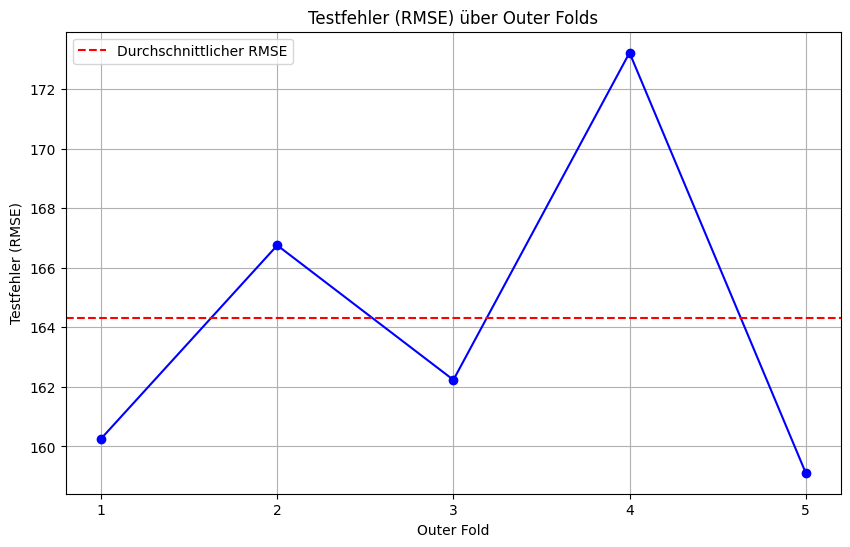

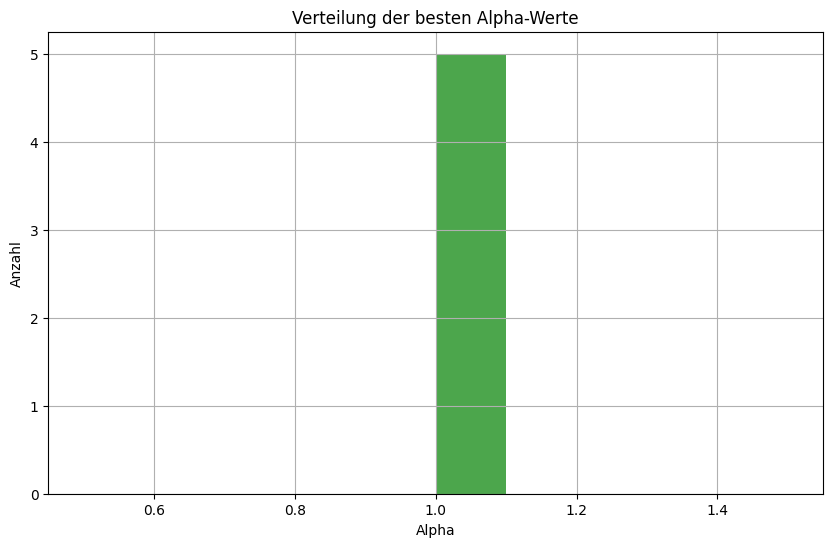

In [5]:
# Visualisierung
import matplotlib.pyplot as plt

# Plot der Testfehler
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(test_errors) + 1), test_errors, marker='o', linestyle='-', color='b')
plt.title('Testfehler (RMSE) über Outer Folds')
plt.xlabel('Outer Fold')
plt.ylabel('Testfehler (RMSE)')
plt.xticks(range(1, len(test_errors) + 1))
plt.axhline(y=average_test_error, color='r', linestyle='--', label='Durchschnittlicher RMSE')
plt.legend()
plt.grid()
plt.show()

# Histogramm der besten Alpha-Werte
plt.figure(figsize=(10, 6))
plt.hist(best_alphas, bins=10, color='g', alpha=0.7)
plt.title('Verteilung der besten Alpha-Werte')
plt.xlabel('Alpha')
plt.ylabel('Anzahl')
plt.grid()
plt.show()

# student performance

In [ ]:
state = await train_model_flow(file_name="StudentPerformanceFactors.csv", pop="Exam_Score")

state = await train_model_flow(file_name="StudentPerformanceFactors.csv", pop="Exam_Score", scale=True)

state = await train_model_flow(file_name="StudentPerformanceFactors.csv", pop="Exam_Score", scale=True, alpha=8)

In [ ]:
interval=(1,20,20)
average_performance, best_alpha = await cross_validation(file_name="StudentPerformanceFactors.csv", pop="Exam_Score", interval=interval, scale=True, method="Ridge", n_splits=5)

In [ ]:
performance_df = pd.DataFrame(list(average_performance.items()), columns=['Alpha', 'RMSE'])

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(performance_df['Alpha'], performance_df['RMSE'], marker='o', linestyle='-')
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best Alpha: {best_alpha}')
plt.title('Kreuzvalidierung: Durchschnittlicher RMSE vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Durchschnittlicher RMSE')
plt.legend()
plt.grid()
plt.show()

In [ ]:
result = await nested_cross_validation(file_name="StudentPerformanceFactors.csv", pop="Exam_Score", interval=interval)

# Durchschnittlicher Testfehler
average_test_error = result["average_test_error"]
test_errors = result["test_errors"]
best_alphas = result["best_alphas"]

In [ ]:
# Visualisierung
import matplotlib.pyplot as plt

# Plot der Testfehler
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(test_errors) + 1), test_errors, marker='o', linestyle='-', color='b')
plt.title('Testfehler (RMSE) über Outer Folds')
plt.xlabel('Outer Fold')
plt.ylabel('Testfehler (RMSE)')
plt.xticks(range(1, len(test_errors) + 1))
plt.axhline(y=average_test_error, color='r', linestyle='--', label='Durchschnittlicher RMSE')
plt.legend()
plt.grid()
plt.show()

# Histogramm der besten Alpha-Werte
plt.figure(figsize=(10, 6))
plt.hist(best_alphas, bins=10, color='g', alpha=0.7)
plt.title('Verteilung der besten Alpha-Werte')
plt.xlabel('Alpha')
plt.ylabel('Anzahl')
plt.grid()
plt.show()